In [1]:
import numpy as np
import const
import utilities as ut
import matplotlib.pyplot as plt
import datetime
import joblib
from tqdm import tqdm
import math

import gym
import ctfsql
import evaluate

In [2]:
from typing import Mapping, Any

import numpy as np
from ctfsql.agents.random_agent import Agent


class RandomAgent(Agent):
    """ Agent that randomly selects a command from the admissible ones. """
    def __init__(self, seed=1234):
        self.seed = seed
        self.rng = np.random.RandomState(self.seed)
    
    def act(self, obs: str, score: int, done: bool, infos: Mapping[str, Any]):
        command_id = np.random.randint(0, len(infos["admissible_commands"]))
        command = infos["admissible_commands"][command_id]
        return command_id,  command

In [5]:
import os
from glob import glob

import torch
from tqdm import tqdm


def run_episode(agent, max_step=2000, nb_episodes=3500, verbose=True):

    torch.manual_seed(20211021)  # For reproducibility when using action sampling.

    env = gym.make('ctfsql-v0')

    # Collect some statistics: nb_steps, final reward.
    steps, mean_scores, norm_scores = [], [], []
    for no_episode in tqdm(range(nb_episodes)):
        obs, infos = env.reset()  # Start new episode.

        score = 0
        sum_score = 0
        done = False
        nb_steps = 0
        print(env.url)
        while not done and nb_steps <= max_step:
            command_id, command = agent.act(obs, score, done, infos)
            obs, score, done, infos = env.step(command_id, command)
            
#             if infos['description'] == 'Successfully get table names in the database.':
#                 for i, a in enumerate(infos['admissible_commands']):
#                     print(i, a)

            nb_steps += 1
            sum_score += score
        agent.act(obs, score, done, infos)  # Let the agent know the game is done.

        steps.append(nb_steps)
        mean_score = round(np.mean(sum_score), 3)
        mean_scores.append(mean_score)
        if verbose:
            print('ステップ数:{0}, 平均報酬:{1}'.format(nb_steps, mean_score))

#         print(steps, mean_scores)

    env.close()
    return agent, steps, mean_scores
#     timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M%S%f")
#     joblib.dump(agent,'ignore_simul2_'+timestamp+'.pkl', compress=True)
#     train_data = joblib.load('ignore_simul2_20211203102304978989.pkl')
    


In [6]:
from ctfsql.agents.agent import NeuralAgent
agent = NeuralAgent()
trained_agent, steps, mean_scores = run_episode(agent)

  0%|          | 0/3500 [00:00<?, ?it/s]

http://127.0.0.1/ctf_2/ctf_2_3.php


  0%|          | 1/3500 [00:39<38:38:25, 39.76s/it]

ステップ数:340, 平均報酬:-329.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  0%|          | 2/3500 [00:52<30:47:58, 31.70s/it]

ステップ数:180, 平均報酬:-169.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  0%|          | 3/3500 [01:22<30:14:15, 31.13s/it]

ステップ数:317, 平均報酬:-306.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  0%|          | 4/3500 [03:39<61:09:20, 62.98s/it]

ステップ数:1137, 平均報酬:-1126.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  0%|          | 5/3500 [03:56<47:38:25, 49.07s/it]

ステップ数:213, 平均報酬:-202.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  0%|          | 6/3500 [04:36<45:08:53, 46.52s/it]

ステップ数:434, 平均報酬:-423.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  0%|          | 7/3500 [04:47<34:34:45, 35.64s/it]

ステップ数:388, 平均報酬:-377.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  0%|          | 8/3500 [05:21<34:17:08, 35.35s/it]

ステップ数:339, 平均報酬:-328.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  0%|          | 9/3500 [06:47<48:47:15, 50.31s/it]

ステップ数:741, 平均報酬:-730.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  0%|          | 10/3500 [06:54<36:25:54, 37.58s/it]

ステップ数:177, 平均報酬:-166.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  0%|          | 11/3500 [07:52<42:16:07, 43.61s/it]

ステップ数:579, 平均報酬:-568.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  0%|          | 12/3500 [08:24<38:57:53, 40.22s/it]

ステップ数:382, 平均報酬:-371.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  0%|          | 13/3500 [08:46<33:28:52, 34.57s/it]

ステップ数:260, 平均報酬:-249.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  0%|          | 14/3500 [09:06<29:13:09, 30.17s/it]

ステップ数:309, 平均報酬:-298.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  0%|          | 15/3500 [10:31<45:06:30, 46.60s/it]

ステップ数:723, 平均報酬:-712.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  0%|          | 16/3500 [11:28<48:15:52, 49.87s/it]

ステップ数:499, 平均報酬:-488.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  0%|          | 17/3500 [11:36<36:00:22, 37.22s/it]

ステップ数:84, 平均報酬:-73.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  1%|          | 18/3500 [11:58<31:31:06, 32.59s/it]

ステップ数:366, 平均報酬:-355.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  1%|          | 19/3500 [12:00<22:41:47, 23.47s/it]

ステップ数:70, 平均報酬:-59.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  1%|          | 20/3500 [12:15<20:17:24, 20.99s/it]

ステップ数:192, 平均報酬:-181.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  1%|          | 21/3500 [12:30<18:38:36, 19.29s/it]

ステップ数:244, 平均報酬:-233.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  1%|          | 22/3500 [12:54<19:59:36, 20.69s/it]

ステップ数:308, 平均報酬:-297.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  1%|          | 23/3500 [12:59<15:17:14, 15.83s/it]

ステップ数:121, 平均報酬:-110.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  1%|          | 24/3500 [13:38<22:02:36, 22.83s/it]

ステップ数:356, 平均報酬:-345.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  1%|          | 25/3500 [14:04<22:52:26, 23.70s/it]

ステップ数:258, 平均報酬:-247.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  1%|          | 26/3500 [15:31<41:09:11, 42.65s/it]

ステップ数:721, 平均報酬:-710.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  1%|          | 27/3500 [15:35<30:08:45, 31.25s/it]

ステップ数:83, 平均報酬:-72.0
http://127.0.0.1/ctf_1/ctf_1_3.php


  1%|          | 28/3500 [16:46<41:34:37, 43.11s/it]

ステップ数:647, 平均報酬:-636.0
http://127.0.0.1/ctf_4/ctf_4_4.php


  1%|          | 29/3500 [16:50<30:22:24, 31.50s/it]

ステップ数:54, 平均報酬:-43.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  1%|          | 30/3500 [17:52<39:00:46, 40.47s/it]

ステップ数:642, 平均報酬:-631.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  1%|          | 31/3500 [18:22<36:03:20, 37.42s/it]

ステップ数:307, 平均報酬:-296.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  1%|          | 32/3500 [18:36<29:11:23, 30.30s/it]

ステップ数:164, 平均報酬:-153.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  1%|          | 33/3500 [18:50<24:39:53, 25.61s/it]

ステップ数:175, 平均報酬:-164.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  1%|          | 34/3500 [19:14<24:10:37, 25.11s/it]

ステップ数:316, 平均報酬:-305.0
http://127.0.0.1/ctf_1/ctf_1_3.php


  1%|          | 35/3500 [19:23<19:23:40, 20.15s/it]

ステップ数:143, 平均報酬:-132.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  1%|          | 36/3500 [20:29<32:30:13, 33.78s/it]

ステップ数:618, 平均報酬:-607.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  1%|          | 37/3500 [20:43<26:55:07, 27.98s/it]

ステップ数:176, 平均報酬:-165.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  1%|          | 38/3500 [20:52<21:20:08, 22.19s/it]

ステップ数:176, 平均報酬:-165.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  1%|          | 39/3500 [21:39<28:39:34, 29.81s/it]

ステップ数:522, 平均報酬:-511.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  1%|          | 40/3500 [21:58<25:27:39, 26.49s/it]

ステップ数:211, 平均報酬:-200.0
http://127.0.0.1/ctf_1/ctf_1_3.php


  1%|          | 41/3500 [22:05<19:58:01, 20.78s/it]

ステップ数:192, 平均報酬:-181.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  1%|          | 42/3500 [22:12<15:50:04, 16.48s/it]

ステップ数:167, 平均報酬:-156.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  1%|          | 43/3500 [23:38<35:49:30, 37.31s/it]

ステップ数:754, 平均報酬:-743.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  1%|▏         | 44/3500 [23:47<27:34:58, 28.73s/it]

ステップ数:169, 平均報酬:-158.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  1%|▏         | 45/3500 [24:15<27:34:38, 28.73s/it]

ステップ数:343, 平均報酬:-332.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  1%|▏         | 46/3500 [25:37<42:40:11, 44.47s/it]

ステップ数:670, 平均報酬:-659.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  1%|▏         | 47/3500 [26:31<45:27:24, 47.39s/it]

ステップ数:494, 平均報酬:-483.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  1%|▏         | 48/3500 [27:44<52:59:22, 55.26s/it]

ステップ数:630, 平均報酬:-619.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  1%|▏         | 49/3500 [29:04<59:58:32, 62.57s/it]

ステップ数:684, 平均報酬:-673.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  1%|▏         | 50/3500 [29:33<50:15:06, 52.44s/it]

ステップ数:328, 平均報酬:-317.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  1%|▏         | 51/3500 [29:50<40:06:02, 41.86s/it]

ステップ数:252, 平均報酬:-241.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  1%|▏         | 52/3500 [29:51<28:30:29, 29.76s/it]

ステップ数:57, 平均報酬:-46.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  2%|▏         | 53/3500 [30:11<25:30:26, 26.64s/it]

ステップ数:270, 平均報酬:-259.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  2%|▏         | 54/3500 [30:33<24:12:49, 25.30s/it]

ステップ数:234, 平均報酬:-223.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  2%|▏         | 55/3500 [31:14<28:42:58, 30.01s/it]

ステップ数:382, 平均報酬:-371.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  2%|▏         | 56/3500 [31:36<26:17:35, 27.48s/it]

ステップ数:287, 平均報酬:-276.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  2%|▏         | 57/3500 [31:40<19:36:31, 20.50s/it]

ステップ数:119, 平均報酬:-108.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  2%|▏         | 58/3500 [31:53<17:28:27, 18.28s/it]

ステップ数:254, 平均報酬:-243.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  2%|▏         | 59/3500 [33:57<47:45:46, 49.97s/it]

ステップ数:1040, 平均報酬:-1029.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  2%|▏         | 60/3500 [33:58<33:40:44, 35.25s/it]

ステップ数:21, 平均報酬:-10.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  2%|▏         | 61/3500 [34:59<41:16:43, 43.21s/it]

ステップ数:629, 平均報酬:-618.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  2%|▏         | 62/3500 [36:58<62:52:41, 65.84s/it]

ステップ数:1046, 平均報酬:-1035.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  2%|▏         | 63/3500 [37:40<55:51:15, 58.50s/it]

ステップ数:412, 平均報酬:-401.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  2%|▏         | 64/3500 [37:52<42:39:41, 44.70s/it]

ステップ数:226, 平均報酬:-215.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  2%|▏         | 65/3500 [37:59<31:56:30, 33.48s/it]

ステップ数:314, 平均報酬:-303.0
http://127.0.0.1/ctf_1/ctf_1_3.php


  2%|▏         | 66/3500 [38:14<26:36:15, 27.89s/it]

ステップ数:229, 平均報酬:-218.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  2%|▏         | 67/3500 [38:24<21:22:53, 22.42s/it]

ステップ数:97, 平均報酬:-86.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  2%|▏         | 68/3500 [38:36<18:28:58, 19.39s/it]

ステップ数:146, 平均報酬:-135.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  2%|▏         | 69/3500 [38:38<13:30:47, 14.18s/it]

ステップ数:27, 平均報酬:-16.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  2%|▏         | 70/3500 [39:01<16:03:58, 16.86s/it]

ステップ数:347, 平均報酬:-336.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  2%|▏         | 71/3500 [40:12<31:32:30, 33.11s/it]

ステップ数:639, 平均報酬:-628.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  2%|▏         | 72/3500 [40:23<25:12:02, 26.47s/it]

ステップ数:137, 平均報酬:-126.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  2%|▏         | 73/3500 [40:56<27:04:21, 28.44s/it]

ステップ数:335, 平均報酬:-324.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  2%|▏         | 74/3500 [41:29<28:17:18, 29.73s/it]

ステップ数:323, 平均報酬:-312.0
http://127.0.0.1/ctf_4/ctf_4_4.php


  2%|▏         | 75/3500 [42:02<29:12:11, 30.70s/it]

ステップ数:356, 平均報酬:-345.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  2%|▏         | 76/3500 [42:14<23:56:01, 25.16s/it]

ステップ数:138, 平均報酬:-127.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  2%|▏         | 77/3500 [43:00<29:48:40, 31.35s/it]

ステップ数:472, 平均報酬:-461.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  2%|▏         | 78/3500 [43:06<22:40:21, 23.85s/it]

ステップ数:73, 平均報酬:-62.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  2%|▏         | 79/3500 [43:29<22:16:48, 23.45s/it]

ステップ数:216, 平均報酬:-205.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  2%|▏         | 80/3500 [43:51<21:50:55, 23.00s/it]

ステップ数:258, 平均報酬:-247.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  2%|▏         | 81/3500 [44:14<22:01:01, 23.18s/it]

ステップ数:324, 平均報酬:-313.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  2%|▏         | 82/3500 [45:50<42:36:47, 44.88s/it]

ステップ数:868, 平均報酬:-857.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  2%|▏         | 83/3500 [45:54<30:56:28, 32.60s/it]

ステップ数:122, 平均報酬:-111.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  2%|▏         | 84/3500 [46:09<25:49:57, 27.22s/it]

ステップ数:168, 平均報酬:-157.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  2%|▏         | 85/3500 [46:22<21:45:52, 22.94s/it]

ステップ数:138, 平均報酬:-127.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  2%|▏         | 86/3500 [47:00<26:06:49, 27.54s/it]

ステップ数:401, 平均報酬:-390.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  2%|▏         | 87/3500 [47:22<24:39:02, 26.00s/it]

ステップ数:279, 平均報酬:-268.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  3%|▎         | 88/3500 [47:42<22:54:54, 24.18s/it]

ステップ数:363, 平均報酬:-352.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  3%|▎         | 89/3500 [48:17<26:00:14, 27.44s/it]

ステップ数:356, 平均報酬:-345.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  3%|▎         | 90/3500 [48:19<18:36:19, 19.64s/it]

ステップ数:23, 平均報酬:-12.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  3%|▎         | 91/3500 [49:36<34:57:24, 36.92s/it]

ステップ数:687, 平均報酬:-676.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  3%|▎         | 92/3500 [50:41<42:52:41, 45.29s/it]

ステップ数:626, 平均報酬:-615.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  3%|▎         | 93/3500 [51:30<44:06:01, 46.60s/it]

ステップ数:462, 平均報酬:-451.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  3%|▎         | 94/3500 [51:32<31:14:58, 33.03s/it]

ステップ数:54, 平均報酬:-43.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  3%|▎         | 95/3500 [52:23<36:26:47, 38.53s/it]

ステップ数:473, 平均報酬:-462.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  3%|▎         | 96/3500 [52:41<30:31:50, 32.29s/it]

ステップ数:194, 平均報酬:-183.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  3%|▎         | 97/3500 [53:28<34:43:52, 36.74s/it]

ステップ数:469, 平均報酬:-458.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  3%|▎         | 98/3500 [53:47<29:39:39, 31.39s/it]

ステップ数:193, 平均報酬:-182.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  3%|▎         | 99/3500 [54:13<28:03:39, 29.70s/it]

ステップ数:369, 平均報酬:-358.0
http://127.0.0.1/ctf_1/ctf_1_3.php


  3%|▎         | 100/3500 [54:18<21:06:57, 22.36s/it]

ステップ数:99, 平均報酬:-88.0
http://127.0.0.1/ctf_1/ctf_1_3.php


  3%|▎         | 101/3500 [54:32<18:54:56, 20.03s/it]

ステップ数:200, 平均報酬:-189.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  3%|▎         | 102/3500 [55:12<24:23:42, 25.85s/it]

ステップ数:393, 平均報酬:-382.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  3%|▎         | 103/3500 [55:36<23:55:36, 25.36s/it]

ステップ数:315, 平均報酬:-304.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  3%|▎         | 104/3500 [55:49<20:19:21, 21.54s/it]

ステップ数:123, 平均報酬:-112.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  3%|▎         | 105/3500 [56:05<18:44:26, 19.87s/it]

ステップ数:224, 平均報酬:-213.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  3%|▎         | 106/3500 [56:32<20:48:35, 22.07s/it]

ステップ数:264, 平均報酬:-253.0
http://127.0.0.1/ctf_1/ctf_1_3.php


  3%|▎         | 107/3500 [56:53<20:29:07, 21.74s/it]

ステップ数:404, 平均報酬:-393.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  3%|▎         | 108/3500 [57:17<21:11:16, 22.49s/it]

ステップ数:245, 平均報酬:-234.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  3%|▎         | 109/3500 [58:18<31:54:52, 33.88s/it]

ステップ数:535, 平均報酬:-524.0
http://127.0.0.1/ctf_4/ctf_4_4.php


  3%|▎         | 110/3500 [59:33<43:41:34, 46.40s/it]

ステップ数:669, 平均報酬:-658.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  3%|▎         | 111/3500 [1:00:03<39:01:37, 41.46s/it]

ステップ数:306, 平均報酬:-295.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  3%|▎         | 112/3500 [1:01:17<48:04:35, 51.08s/it]

ステップ数:661, 平均報酬:-650.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  3%|▎         | 113/3500 [1:01:49<42:45:23, 45.45s/it]

ステップ数:359, 平均報酬:-348.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  3%|▎         | 114/3500 [1:02:33<42:28:36, 45.16s/it]

ステップ数:518, 平均報酬:-507.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  3%|▎         | 115/3500 [1:03:52<51:47:29, 55.08s/it]

ステップ数:716, 平均報酬:-705.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  3%|▎         | 116/3500 [1:04:48<52:15:46, 55.60s/it]

ステップ数:534, 平均報酬:-523.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  3%|▎         | 117/3500 [1:05:04<41:02:54, 43.68s/it]

ステップ数:147, 平均報酬:-136.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  3%|▎         | 118/3500 [1:05:40<38:42:36, 41.21s/it]

ステップ数:543, 平均報酬:-532.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  3%|▎         | 119/3500 [1:06:56<48:31:09, 51.66s/it]

ステップ数:703, 平均報酬:-692.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  3%|▎         | 120/3500 [1:07:36<45:13:38, 48.17s/it]

ステップ数:384, 平均報酬:-373.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  3%|▎         | 121/3500 [1:07:54<36:46:08, 39.17s/it]

ステップ数:225, 平均報酬:-214.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  3%|▎         | 122/3500 [1:08:06<28:59:29, 30.90s/it]

ステップ数:154, 平均報酬:-143.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  4%|▎         | 123/3500 [1:08:16<23:11:24, 24.72s/it]

ステップ数:153, 平均報酬:-142.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  4%|▎         | 124/3500 [1:09:45<41:11:04, 43.92s/it]

ステップ数:768, 平均報酬:-757.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  4%|▎         | 125/3500 [1:10:29<41:24:46, 44.17s/it]

ステップ数:401, 平均報酬:-390.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  4%|▎         | 126/3500 [1:10:54<36:00:37, 38.42s/it]

ステップ数:280, 平均報酬:-269.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  4%|▎         | 127/3500 [1:12:04<44:40:37, 47.68s/it]

ステップ数:654, 平均報酬:-643.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  4%|▎         | 128/3500 [1:13:04<48:19:59, 51.60s/it]

ステップ数:671, 平均報酬:-660.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  4%|▎         | 129/3500 [1:13:14<36:33:07, 39.04s/it]

ステップ数:153, 平均報酬:-142.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  4%|▎         | 130/3500 [1:13:48<35:02:56, 37.44s/it]

ステップ数:323, 平均報酬:-312.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  4%|▎         | 131/3500 [1:14:28<35:39:45, 38.11s/it]

ステップ数:431, 平均報酬:-420.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  4%|▍         | 132/3500 [1:15:07<36:02:56, 38.53s/it]

ステップ数:363, 平均報酬:-352.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  4%|▍         | 133/3500 [1:16:04<41:14:53, 44.10s/it]

ステップ数:496, 平均報酬:-485.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  4%|▍         | 134/3500 [1:16:32<36:36:33, 39.15s/it]

ステップ数:302, 平均報酬:-291.0
http://127.0.0.1/ctf_4/ctf_4_4.php


  4%|▍         | 135/3500 [1:17:33<42:48:44, 45.80s/it]

ステップ数:544, 平均報酬:-533.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  4%|▍         | 136/3500 [1:18:17<42:12:34, 45.17s/it]

ステップ数:395, 平均報酬:-384.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  4%|▍         | 137/3500 [1:18:36<34:49:44, 37.28s/it]

ステップ数:180, 平均報酬:-169.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  4%|▍         | 138/3500 [1:19:22<37:26:29, 40.09s/it]

ステップ数:425, 平均報酬:-414.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  4%|▍         | 139/3500 [1:19:58<36:14:40, 38.82s/it]

ステップ数:350, 平均報酬:-339.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  4%|▍         | 140/3500 [1:20:40<37:04:58, 39.73s/it]

ステップ数:420, 平均報酬:-409.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  4%|▍         | 141/3500 [1:21:12<35:00:30, 37.52s/it]

ステップ数:351, 平均報酬:-340.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  4%|▍         | 142/3500 [1:21:25<28:09:26, 30.19s/it]

ステップ数:160, 平均報酬:-149.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  4%|▍         | 143/3500 [1:22:14<33:20:51, 35.76s/it]

ステップ数:507, 平均報酬:-496.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  4%|▍         | 144/3500 [1:22:16<23:45:26, 25.48s/it]

ステップ数:29, 平均報酬:-18.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  4%|▍         | 145/3500 [1:22:36<22:26:06, 24.07s/it]

ステップ数:318, 平均報酬:-307.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  4%|▍         | 146/3500 [1:23:23<28:49:01, 30.93s/it]

ステップ数:423, 平均報酬:-412.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  4%|▍         | 147/3500 [1:23:49<27:16:37, 29.29s/it]

ステップ数:285, 平均報酬:-274.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  4%|▍         | 148/3500 [1:23:59<21:51:25, 23.47s/it]

ステップ数:177, 平均報酬:-166.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  4%|▍         | 149/3500 [1:25:03<33:09:28, 35.62s/it]

ステップ数:566, 平均報酬:-555.0
http://127.0.0.1/ctf_4/ctf_4_4.php


  4%|▍         | 150/3500 [1:25:08<24:48:19, 26.66s/it]

ステップ数:87, 平均報酬:-76.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  4%|▍         | 151/3500 [1:25:24<21:41:08, 23.31s/it]

ステップ数:198, 平均報酬:-187.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  4%|▍         | 152/3500 [1:25:56<24:05:52, 25.91s/it]

ステップ数:459, 平均報酬:-448.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  4%|▍         | 153/3500 [1:26:17<22:37:28, 24.33s/it]

ステップ数:203, 平均報酬:-192.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  4%|▍         | 154/3500 [1:26:36<21:16:45, 22.89s/it]

ステップ数:221, 平均報酬:-210.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  4%|▍         | 155/3500 [1:27:00<21:31:15, 23.16s/it]

ステップ数:233, 平均報酬:-222.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  4%|▍         | 156/3500 [1:27:34<24:35:23, 26.47s/it]

ステップ数:440, 平均報酬:-429.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  4%|▍         | 157/3500 [1:27:42<19:27:38, 20.96s/it]

ステップ数:200, 平均報酬:-189.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  5%|▍         | 158/3500 [1:28:09<20:59:10, 22.61s/it]

ステップ数:304, 平均報酬:-293.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  5%|▍         | 159/3500 [1:28:11<15:20:14, 16.53s/it]

ステップ数:58, 平均報酬:-47.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  5%|▍         | 160/3500 [1:28:23<14:03:56, 15.16s/it]

ステップ数:160, 平均報酬:-149.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  5%|▍         | 161/3500 [1:28:28<11:11:18, 12.06s/it]

ステップ数:91, 平均報酬:-80.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  5%|▍         | 162/3500 [1:29:17<21:25:07, 23.10s/it]

ステップ数:519, 平均報酬:-508.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  5%|▍         | 163/3500 [1:30:11<30:11:14, 32.57s/it]

ステップ数:514, 平均報酬:-503.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  5%|▍         | 164/3500 [1:30:31<26:37:24, 28.73s/it]

ステップ数:208, 平均報酬:-197.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  5%|▍         | 165/3500 [1:31:08<28:48:14, 31.09s/it]

ステップ数:412, 平均報酬:-401.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  5%|▍         | 166/3500 [1:31:42<29:43:32, 32.10s/it]

ステップ数:315, 平均報酬:-304.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  5%|▍         | 167/3500 [1:32:10<28:39:27, 30.95s/it]

ステップ数:328, 平均報酬:-317.0
http://127.0.0.1/ctf_4/ctf_4_4.php


  5%|▍         | 168/3500 [1:33:07<35:47:32, 38.67s/it]

ステップ数:502, 平均報酬:-491.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  5%|▍         | 169/3500 [1:33:12<26:22:53, 28.51s/it]

ステップ数:190, 平均報酬:-179.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  5%|▍         | 170/3500 [1:34:08<34:05:28, 36.86s/it]

ステップ数:528, 平均報酬:-517.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  5%|▍         | 171/3500 [1:34:49<35:07:52, 37.99s/it]

ステップ数:389, 平均報酬:-378.0
http://127.0.0.1/ctf_1/ctf_1_3.php


  5%|▍         | 172/3500 [1:35:52<42:09:46, 45.61s/it]

ステップ数:558, 平均報酬:-547.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  5%|▍         | 173/3500 [1:37:19<53:27:44, 57.85s/it]

ステップ数:793, 平均報酬:-782.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  5%|▍         | 174/3500 [1:37:27<39:39:48, 42.93s/it]

ステップ数:106, 平均報酬:-95.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  5%|▌         | 175/3500 [1:38:00<36:59:40, 40.05s/it]

ステップ数:340, 平均報酬:-329.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  5%|▌         | 176/3500 [1:38:29<33:59:13, 36.81s/it]

ステップ数:377, 平均報酬:-366.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  5%|▌         | 177/3500 [1:38:58<31:36:31, 34.24s/it]

ステップ数:321, 平均報酬:-310.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  5%|▌         | 178/3500 [1:39:46<35:31:45, 38.50s/it]

ステップ数:453, 平均報酬:-442.0
http://127.0.0.1/ctf_4/ctf_4_4.php


  5%|▌         | 179/3500 [1:40:05<30:04:41, 32.61s/it]

ステップ数:221, 平均報酬:-210.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  5%|▌         | 180/3500 [1:40:09<22:18:33, 24.19s/it]

ステップ数:66, 平均報酬:-55.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  5%|▌         | 181/3500 [1:40:55<28:04:34, 30.45s/it]

ステップ数:551, 平均報酬:-540.0
http://127.0.0.1/ctf_4/ctf_4_4.php


  5%|▌         | 182/3500 [1:41:15<25:13:19, 27.37s/it]

ステップ数:259, 平均報酬:-248.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  5%|▌         | 183/3500 [1:42:36<40:03:36, 43.48s/it]

ステップ数:758, 平均報酬:-747.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  5%|▌         | 184/3500 [1:43:30<43:08:39, 46.84s/it]

ステップ数:533, 平均報酬:-522.0
http://127.0.0.1/ctf_1/ctf_1_3.php


  5%|▌         | 185/3500 [1:44:09<40:53:37, 44.41s/it]

ステップ数:370, 平均報酬:-359.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  5%|▌         | 186/3500 [1:44:31<34:35:14, 37.57s/it]

ステップ数:295, 平均報酬:-284.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  5%|▌         | 187/3500 [1:44:43<27:37:51, 30.02s/it]

ステップ数:192, 平均報酬:-181.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  5%|▌         | 188/3500 [1:45:01<24:07:26, 26.22s/it]

ステップ数:214, 平均報酬:-203.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  5%|▌         | 189/3500 [1:45:28<24:18:27, 26.43s/it]

ステップ数:303, 平均報酬:-292.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  5%|▌         | 190/3500 [1:45:56<24:51:58, 27.04s/it]

ステップ数:284, 平均報酬:-273.0
http://127.0.0.1/ctf_4/ctf_4_4.php


  5%|▌         | 191/3500 [1:47:02<35:35:28, 38.72s/it]

ステップ数:625, 平均報酬:-614.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  5%|▌         | 192/3500 [1:47:27<31:40:53, 34.48s/it]

ステップ数:288, 平均報酬:-277.0
http://127.0.0.1/ctf_4/ctf_4_4.php


  6%|▌         | 193/3500 [1:47:30<23:00:59, 25.06s/it]

ステップ数:76, 平均報酬:-65.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  6%|▌         | 194/3500 [1:48:14<28:27:49, 30.99s/it]

ステップ数:477, 平均報酬:-466.0
http://127.0.0.1/ctf_1/ctf_1_3.php


  6%|▌         | 195/3500 [1:48:23<22:11:17, 24.17s/it]

ステップ数:123, 平均報酬:-112.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  6%|▌         | 196/3500 [1:48:49<22:50:40, 24.89s/it]

ステップ数:301, 平均報酬:-290.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  6%|▌         | 197/3500 [1:49:18<24:00:08, 26.16s/it]

ステップ数:301, 平均報酬:-290.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  6%|▌         | 198/3500 [1:49:52<25:57:39, 28.30s/it]

ステップ数:373, 平均報酬:-362.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  6%|▌         | 199/3500 [1:50:21<26:12:34, 28.58s/it]

ステップ数:275, 平均報酬:-264.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  6%|▌         | 200/3500 [1:50:40<23:26:52, 25.58s/it]

ステップ数:313, 平均報酬:-302.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  6%|▌         | 201/3500 [1:51:36<31:53:14, 34.80s/it]

ステップ数:611, 平均報酬:-600.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  6%|▌         | 202/3500 [1:51:37<22:36:11, 24.67s/it]

ステップ数:27, 平均報酬:-16.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  6%|▌         | 203/3500 [1:51:45<18:02:20, 19.70s/it]

ステップ数:95, 平均報酬:-84.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  6%|▌         | 204/3500 [1:52:27<24:03:21, 26.27s/it]

ステップ数:411, 平均報酬:-400.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  6%|▌         | 205/3500 [1:53:05<27:26:40, 29.98s/it]

ステップ数:453, 平均報酬:-442.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  6%|▌         | 206/3500 [1:53:48<30:48:47, 33.68s/it]

ステップ数:400, 平均報酬:-389.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  6%|▌         | 207/3500 [1:55:32<50:20:57, 55.04s/it]

ステップ数:975, 平均報酬:-964.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  6%|▌         | 208/3500 [1:56:03<43:40:43, 47.77s/it]

ステップ数:296, 平均報酬:-285.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  6%|▌         | 209/3500 [1:56:30<37:55:23, 41.48s/it]

ステップ数:281, 平均報酬:-270.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  6%|▌         | 210/3500 [1:56:32<27:03:23, 29.61s/it]

ステップ数:51, 平均報酬:-40.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  6%|▌         | 211/3500 [1:58:31<51:34:29, 56.45s/it]

ステップ数:991, 平均報酬:-980.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  6%|▌         | 212/3500 [2:01:00<77:02:20, 84.35s/it]

ステップ数:1287, 平均報酬:-1276.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  6%|▌         | 213/3500 [2:01:19<58:52:29, 64.48s/it]

ステップ数:211, 平均報酬:-200.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  6%|▌         | 214/3500 [2:01:53<50:38:14, 55.48s/it]

ステップ数:331, 平均報酬:-320.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  6%|▌         | 215/3500 [2:02:13<40:46:48, 44.69s/it]

ステップ数:364, 平均報酬:-353.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  6%|▌         | 216/3500 [2:02:20<30:41:53, 33.65s/it]

ステップ数:231, 平均報酬:-220.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  6%|▌         | 217/3500 [2:02:48<29:03:41, 31.87s/it]

ステップ数:420, 平均報酬:-409.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  6%|▌         | 218/3500 [2:03:30<31:54:38, 35.00s/it]

ステップ数:380, 平均報酬:-369.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  6%|▋         | 219/3500 [2:05:12<50:09:25, 55.03s/it]

ステップ数:928, 平均報酬:-917.0
http://127.0.0.1/ctf_1/ctf_1_3.php


  6%|▋         | 220/3500 [2:05:16<36:10:44, 39.71s/it]

ステップ数:102, 平均報酬:-91.0
http://127.0.0.1/ctf_4/ctf_4_4.php


  6%|▋         | 221/3500 [2:05:37<30:52:11, 33.89s/it]

ステップ数:216, 平均報酬:-205.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  6%|▋         | 222/3500 [2:05:45<23:57:19, 26.31s/it]

ステップ数:130, 平均報酬:-119.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  6%|▋         | 223/3500 [2:06:36<30:46:28, 33.81s/it]

ステップ数:556, 平均報酬:-545.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  6%|▋         | 224/3500 [2:06:53<26:10:22, 28.76s/it]

ステップ数:178, 平均報酬:-167.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  6%|▋         | 225/3500 [2:08:00<36:32:34, 40.17s/it]

ステップ数:610, 平均報酬:-599.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  6%|▋         | 226/3500 [2:08:32<34:16:09, 37.68s/it]

ステップ数:329, 平均報酬:-318.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  6%|▋         | 227/3500 [2:08:38<25:29:47, 28.04s/it]

ステップ数:130, 平均報酬:-119.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  7%|▋         | 228/3500 [2:09:04<25:02:30, 27.55s/it]

ステップ数:249, 平均報酬:-238.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  7%|▋         | 229/3500 [2:09:17<21:04:01, 23.19s/it]

ステップ数:226, 平均報酬:-215.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  7%|▋         | 230/3500 [2:12:16<63:27:35, 69.86s/it]

ステップ数:1463, 平均報酬:-1452.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  7%|▋         | 231/3500 [2:13:38<66:41:26, 73.44s/it]

ステップ数:692, 平均報酬:-681.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  7%|▋         | 232/3500 [2:14:04<53:50:49, 59.32s/it]

ステップ数:246, 平均報酬:-235.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  7%|▋         | 233/3500 [2:14:13<40:14:44, 44.35s/it]

ステップ数:143, 平均報酬:-132.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  7%|▋         | 234/3500 [2:14:48<37:30:59, 41.35s/it]

ステップ数:429, 平均報酬:-418.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  7%|▋         | 235/3500 [2:15:02<30:11:11, 33.28s/it]

ステップ数:177, 平均報酬:-166.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  7%|▋         | 236/3500 [2:15:09<23:00:48, 25.38s/it]

ステップ数:125, 平均報酬:-114.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  7%|▋         | 237/3500 [2:15:33<22:28:39, 24.80s/it]

ステップ数:336, 平均報酬:-325.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  7%|▋         | 238/3500 [2:16:27<30:32:15, 33.70s/it]

ステップ数:512, 平均報酬:-501.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  7%|▋         | 239/3500 [2:17:32<39:04:34, 43.14s/it]

ステップ数:825, 平均報酬:-814.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  7%|▋         | 240/3500 [2:18:12<38:04:09, 42.04s/it]

ステップ数:385, 平均報酬:-374.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  7%|▋         | 241/3500 [2:18:51<37:24:16, 41.32s/it]

ステップ数:373, 平均報酬:-362.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  7%|▋         | 242/3500 [2:19:43<40:05:03, 44.29s/it]

ステップ数:489, 平均報酬:-478.0
http://127.0.0.1/ctf_4/ctf_4_4.php


  7%|▋         | 243/3500 [2:19:47<29:07:37, 32.19s/it]

ステップ数:48, 平均報酬:-37.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  7%|▋         | 244/3500 [2:20:24<30:24:51, 33.63s/it]

ステップ数:340, 平均報酬:-329.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  7%|▋         | 245/3500 [2:20:31<23:17:03, 25.75s/it]

ステップ数:104, 平均報酬:-93.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  7%|▋         | 246/3500 [2:20:44<19:56:16, 22.06s/it]

ステップ数:150, 平均報酬:-139.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  7%|▋         | 247/3500 [2:21:33<27:15:33, 30.17s/it]

ステップ数:671, 平均報酬:-660.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  7%|▋         | 248/3500 [2:22:04<27:14:39, 30.16s/it]

ステップ数:287, 平均報酬:-276.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  7%|▋         | 249/3500 [2:22:38<28:29:24, 31.55s/it]

ステップ数:369, 平均報酬:-358.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  7%|▋         | 250/3500 [2:22:50<22:58:03, 25.44s/it]

ステップ数:120, 平均報酬:-109.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  7%|▋         | 251/3500 [2:23:52<33:00:53, 36.58s/it]

ステップ数:682, 平均報酬:-671.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  7%|▋         | 252/3500 [2:23:55<24:00:26, 26.61s/it]

ステップ数:126, 平均報酬:-115.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  7%|▋         | 253/3500 [2:24:18<22:54:40, 25.40s/it]

ステップ数:233, 平均報酬:-222.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  7%|▋         | 254/3500 [2:24:47<23:47:41, 26.39s/it]

ステップ数:285, 平均報酬:-274.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  7%|▋         | 255/3500 [2:25:36<29:51:38, 33.13s/it]

ステップ数:463, 平均報酬:-452.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  7%|▋         | 256/3500 [2:26:46<40:01:54, 44.42s/it]

ステップ数:652, 平均報酬:-641.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  7%|▋         | 257/3500 [2:27:11<34:44:38, 38.57s/it]

ステップ数:241, 平均報酬:-230.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  7%|▋         | 258/3500 [2:27:19<26:19:02, 29.22s/it]

ステップ数:158, 平均報酬:-147.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  7%|▋         | 259/3500 [2:27:49<26:41:27, 29.65s/it]

ステップ数:275, 平均報酬:-264.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  7%|▋         | 260/3500 [2:28:12<24:55:58, 27.70s/it]

ステップ数:231, 平均報酬:-220.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  7%|▋         | 261/3500 [2:29:00<30:13:47, 33.60s/it]

ステップ数:460, 平均報酬:-449.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  7%|▋         | 262/3500 [2:29:05<22:26:44, 24.96s/it]

ステップ数:53, 平均報酬:-42.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  8%|▊         | 263/3500 [2:29:07<16:15:43, 18.09s/it]

ステップ数:51, 平均報酬:-40.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  8%|▊         | 264/3500 [2:29:14<13:25:00, 14.93s/it]

ステップ数:104, 平均報酬:-93.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  8%|▊         | 265/3500 [2:30:00<21:42:05, 24.15s/it]

ステップ数:399, 平均報酬:-388.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  8%|▊         | 266/3500 [2:30:25<21:55:15, 24.40s/it]

ステップ数:237, 平均報酬:-226.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  8%|▊         | 267/3500 [2:30:37<18:43:10, 20.84s/it]

ステップ数:131, 平均報酬:-120.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  8%|▊         | 268/3500 [2:31:58<34:41:49, 38.65s/it]

ステップ数:679, 平均報酬:-668.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  8%|▊         | 269/3500 [2:32:27<32:08:09, 35.81s/it]

ステップ数:318, 平均報酬:-307.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  8%|▊         | 270/3500 [2:32:35<24:49:19, 27.67s/it]

ステップ数:175, 平均報酬:-164.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  8%|▊         | 271/3500 [2:33:34<33:04:41, 36.88s/it]

ステップ数:503, 平均報酬:-492.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  8%|▊         | 272/3500 [2:33:48<26:52:03, 29.96s/it]

ステップ数:205, 平均報酬:-194.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  8%|▊         | 273/3500 [2:34:04<23:04:44, 25.75s/it]

ステップ数:256, 平均報酬:-245.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  8%|▊         | 274/3500 [2:34:15<19:16:59, 21.52s/it]

ステップ数:189, 平均報酬:-178.0
http://127.0.0.1/ctf_4/ctf_4_4.php


  8%|▊         | 275/3500 [2:34:45<21:30:55, 24.02s/it]

ステップ数:283, 平均報酬:-272.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  8%|▊         | 276/3500 [2:35:27<26:11:30, 29.25s/it]

ステップ数:500, 平均報酬:-489.0
http://127.0.0.1/ctf_1/ctf_1_3.php


  8%|▊         | 277/3500 [2:36:08<29:22:02, 32.80s/it]

ステップ数:439, 平均報酬:-428.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  8%|▊         | 278/3500 [2:36:37<28:26:39, 31.78s/it]

ステップ数:260, 平均報酬:-249.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  8%|▊         | 279/3500 [2:37:32<34:35:45, 38.67s/it]

ステップ数:527, 平均報酬:-516.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  8%|▊         | 280/3500 [2:37:35<24:57:46, 27.91s/it]

ステップ数:61, 平均報酬:-50.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  8%|▊         | 281/3500 [2:38:29<31:59:58, 35.79s/it]

ステップ数:620, 平均報酬:-609.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  8%|▊         | 282/3500 [2:38:33<23:27:43, 26.25s/it]

ステップ数:129, 平均報酬:-118.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  8%|▊         | 283/3500 [2:38:55<22:22:23, 25.04s/it]

ステップ数:261, 平均報酬:-250.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  8%|▊         | 284/3500 [2:39:25<23:49:27, 26.67s/it]

ステップ数:287, 平均報酬:-276.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  8%|▊         | 285/3500 [2:40:52<39:46:33, 44.54s/it]

ステップ数:787, 平均報酬:-776.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  8%|▊         | 286/3500 [2:41:14<33:49:51, 37.89s/it]

ステップ数:261, 平均報酬:-250.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  8%|▊         | 287/3500 [2:41:24<26:25:40, 29.61s/it]

ステップ数:195, 平均報酬:-184.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  8%|▊         | 288/3500 [2:41:44<23:51:31, 26.74s/it]

ステップ数:211, 平均報酬:-200.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  8%|▊         | 289/3500 [2:42:05<22:17:53, 25.00s/it]

ステップ数:221, 平均報酬:-210.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  8%|▊         | 290/3500 [2:42:06<15:53:08, 17.82s/it]

ステップ数:28, 平均報酬:-17.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  8%|▊         | 291/3500 [2:42:32<18:02:24, 20.24s/it]

ステップ数:321, 平均報酬:-310.0
http://127.0.0.1/ctf_4/ctf_4_4.php


  8%|▊         | 292/3500 [2:42:58<19:29:54, 21.88s/it]

ステップ数:367, 平均報酬:-356.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  8%|▊         | 293/3500 [2:43:19<19:11:27, 21.54s/it]

ステップ数:216, 平均報酬:-205.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  8%|▊         | 294/3500 [2:43:24<14:55:34, 16.76s/it]

ステップ数:91, 平均報酬:-80.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  8%|▊         | 295/3500 [2:44:01<20:20:57, 22.86s/it]

ステップ数:337, 平均報酬:-326.0
http://127.0.0.1/ctf_4/ctf_4_4.php


  8%|▊         | 296/3500 [2:44:15<17:54:13, 20.12s/it]

ステップ数:143, 平均報酬:-132.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  8%|▊         | 297/3500 [2:44:43<19:58:46, 22.46s/it]

ステップ数:281, 平均報酬:-270.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  9%|▊         | 298/3500 [2:45:33<27:24:24, 30.81s/it]

ステップ数:474, 平均報酬:-463.0
http://127.0.0.1/ctf_4/ctf_4_4.php


  9%|▊         | 299/3500 [2:45:42<21:31:08, 24.20s/it]

ステップ数:133, 平均報酬:-122.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  9%|▊         | 300/3500 [2:45:52<17:35:19, 19.79s/it]

ステップ数:201, 平均報酬:-190.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  9%|▊         | 301/3500 [2:46:21<20:12:34, 22.74s/it]

ステップ数:276, 平均報酬:-265.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  9%|▊         | 302/3500 [2:46:44<20:08:47, 22.68s/it]

ステップ数:253, 平均報酬:-242.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  9%|▊         | 303/3500 [2:47:13<21:52:15, 24.63s/it]

ステップ数:292, 平均報酬:-281.0
http://127.0.0.1/ctf_4/ctf_4_4.php


  9%|▊         | 304/3500 [2:47:33<20:39:32, 23.27s/it]

ステップ数:235, 平均報酬:-224.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  9%|▊         | 305/3500 [2:47:35<14:51:26, 16.74s/it]

ステップ数:57, 平均報酬:-46.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  9%|▊         | 306/3500 [2:47:41<12:09:32, 13.70s/it]

ステップ数:119, 平均報酬:-108.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  9%|▉         | 307/3500 [2:48:53<27:44:12, 31.27s/it]

ステップ数:646, 平均報酬:-635.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  9%|▉         | 308/3500 [2:49:34<30:09:30, 34.01s/it]

ステップ数:419, 平均報酬:-408.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  9%|▉         | 309/3500 [2:49:39<22:32:14, 25.43s/it]

ステップ数:179, 平均報酬:-168.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  9%|▉         | 310/3500 [2:49:55<19:57:06, 22.52s/it]

ステップ数:200, 平均報酬:-189.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  9%|▉         | 311/3500 [2:50:18<20:03:37, 22.65s/it]

ステップ数:300, 平均報酬:-289.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  9%|▉         | 312/3500 [2:50:55<23:57:45, 27.06s/it]

ステップ数:374, 平均報酬:-363.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  9%|▉         | 313/3500 [2:51:05<19:24:03, 21.92s/it]

ステップ数:144, 平均報酬:-133.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  9%|▉         | 314/3500 [2:51:29<19:49:32, 22.40s/it]

ステップ数:221, 平均報酬:-210.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  9%|▉         | 315/3500 [2:52:09<24:33:05, 27.75s/it]

ステップ数:371, 平均報酬:-360.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  9%|▉         | 316/3500 [2:53:21<36:16:21, 41.01s/it]

ステップ数:603, 平均報酬:-592.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  9%|▉         | 317/3500 [2:53:45<31:38:08, 35.78s/it]

ステップ数:290, 平均報酬:-279.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  9%|▉         | 318/3500 [2:53:56<25:10:08, 28.48s/it]

ステップ数:133, 平均報酬:-122.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  9%|▉         | 319/3500 [2:54:21<24:21:13, 27.56s/it]

ステップ数:329, 平均報酬:-318.0
http://127.0.0.1/ctf_1/ctf_1_3.php


  9%|▉         | 320/3500 [2:55:08<29:28:51, 33.37s/it]

ステップ数:440, 平均報酬:-429.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  9%|▉         | 321/3500 [2:55:13<21:54:14, 24.80s/it]

ステップ数:171, 平均報酬:-160.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  9%|▉         | 322/3500 [2:55:32<20:25:37, 23.14s/it]

ステップ数:266, 平均報酬:-255.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  9%|▉         | 323/3500 [2:56:14<25:13:10, 28.58s/it]

ステップ数:370, 平均報酬:-359.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  9%|▉         | 324/3500 [2:57:23<35:53:16, 40.68s/it]

ステップ数:694, 平均報酬:-683.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  9%|▉         | 325/3500 [2:57:29<26:55:49, 30.54s/it]

ステップ数:108, 平均報酬:-97.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  9%|▉         | 326/3500 [2:57:31<19:13:10, 21.80s/it]

ステップ数:54, 平均報酬:-43.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  9%|▉         | 327/3500 [2:57:56<20:04:23, 22.77s/it]

ステップ数:235, 平均報酬:-224.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  9%|▉         | 328/3500 [2:58:27<22:09:12, 25.14s/it]

ステップ数:323, 平均報酬:-312.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  9%|▉         | 329/3500 [2:58:35<17:38:35, 20.03s/it]

ステップ数:154, 平均報酬:-143.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  9%|▉         | 330/3500 [2:58:50<16:26:50, 18.68s/it]

ステップ数:189, 平均報酬:-178.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  9%|▉         | 331/3500 [2:59:27<21:18:05, 24.20s/it]

ステップ数:374, 平均報酬:-363.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  9%|▉         | 332/3500 [2:59:46<19:46:51, 22.48s/it]

ステップ数:209, 平均報酬:-198.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 10%|▉         | 333/3500 [2:59:53<15:42:29, 17.86s/it]

ステップ数:86, 平均報酬:-75.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 10%|▉         | 334/3500 [3:00:24<19:11:29, 21.82s/it]

ステップ数:321, 平均報酬:-310.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 10%|▉         | 335/3500 [3:00:28<14:35:23, 16.60s/it]

ステップ数:75, 平均報酬:-64.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 10%|▉         | 336/3500 [3:00:43<14:13:02, 16.18s/it]

ステップ数:177, 平均報酬:-166.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 10%|▉         | 337/3500 [3:00:58<13:47:39, 15.70s/it]

ステップ数:143, 平均報酬:-132.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 10%|▉         | 338/3500 [3:01:03<11:00:17, 12.53s/it]

ステップ数:88, 平均報酬:-77.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 10%|▉         | 339/3500 [3:01:43<18:16:32, 20.81s/it]

ステップ数:382, 平均報酬:-371.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 10%|▉         | 340/3500 [3:01:58<16:37:27, 18.94s/it]

ステップ数:140, 平均報酬:-129.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 10%|▉         | 341/3500 [3:02:10<14:52:54, 16.96s/it]

ステップ数:181, 平均報酬:-170.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 10%|▉         | 342/3500 [3:02:33<16:29:10, 18.79s/it]

ステップ数:264, 平均報酬:-253.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 10%|▉         | 343/3500 [3:02:38<12:48:17, 14.60s/it]

ステップ数:119, 平均報酬:-108.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 10%|▉         | 344/3500 [3:03:04<15:41:03, 17.89s/it]

ステップ数:267, 平均報酬:-256.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 10%|▉         | 345/3500 [3:03:46<21:59:24, 25.09s/it]

ステップ数:438, 平均報酬:-427.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 10%|▉         | 346/3500 [3:04:17<23:45:18, 27.11s/it]

ステップ数:351, 平均報酬:-340.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 10%|▉         | 347/3500 [3:04:37<21:51:09, 24.95s/it]

ステップ数:330, 平均報酬:-319.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 10%|▉         | 348/3500 [3:05:02<21:48:25, 24.91s/it]

ステップ数:319, 平均報酬:-308.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 10%|▉         | 349/3500 [3:05:42<25:41:48, 29.36s/it]

ステップ数:380, 平均報酬:-369.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 10%|█         | 350/3500 [3:06:12<25:55:24, 29.63s/it]

ステップ数:295, 平均報酬:-284.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 10%|█         | 351/3500 [3:06:20<20:10:10, 23.06s/it]

ステップ数:114, 平均報酬:-103.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 10%|█         | 352/3500 [3:06:55<23:23:37, 26.75s/it]

ステップ数:350, 平均報酬:-339.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 10%|█         | 353/3500 [3:07:12<20:40:54, 23.66s/it]

ステップ数:256, 平均報酬:-245.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 10%|█         | 354/3500 [3:07:35<20:31:11, 23.48s/it]

ステップ数:330, 平均報酬:-319.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 10%|█         | 355/3500 [3:07:36<14:42:33, 16.84s/it]

ステップ数:46, 平均報酬:-35.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 10%|█         | 356/3500 [3:08:19<21:25:44, 24.54s/it]

ステップ数:424, 平均報酬:-413.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 10%|█         | 357/3500 [3:08:25<16:42:42, 19.14s/it]

ステップ数:70, 平均報酬:-59.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 10%|█         | 358/3500 [3:08:47<17:20:31, 19.87s/it]

ステップ数:226, 平均報酬:-215.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 10%|█         | 359/3500 [3:09:10<18:16:08, 20.94s/it]

ステップ数:238, 平均報酬:-227.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 10%|█         | 360/3500 [3:09:41<20:44:58, 23.79s/it]

ステップ数:352, 平均報酬:-341.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 10%|█         | 361/3500 [3:11:06<36:57:41, 42.39s/it]

ステップ数:734, 平均報酬:-723.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 10%|█         | 362/3500 [3:11:55<38:34:24, 44.25s/it]

ステップ数:511, 平均報酬:-500.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 10%|█         | 363/3500 [3:13:54<57:59:39, 66.55s/it]

ステップ数:983, 平均報酬:-972.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 10%|█         | 364/3500 [3:13:55<41:05:17, 47.17s/it]

ステップ数:56, 平均報酬:-45.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 10%|█         | 365/3500 [3:14:02<30:20:41, 34.85s/it]

ステップ数:138, 平均報酬:-127.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 10%|█         | 366/3500 [3:15:05<37:52:03, 43.50s/it]

ステップ数:565, 平均報酬:-554.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 10%|█         | 367/3500 [3:15:32<33:36:06, 38.61s/it]

ステップ数:260, 平均報酬:-249.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 11%|█         | 368/3500 [3:15:44<26:33:31, 30.53s/it]

ステップ数:138, 平均報酬:-127.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 11%|█         | 369/3500 [3:16:24<28:55:31, 33.26s/it]

ステップ数:410, 平均報酬:-399.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 11%|█         | 370/3500 [3:17:03<30:27:01, 35.02s/it]

ステップ数:412, 平均報酬:-401.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 11%|█         | 371/3500 [3:17:24<26:41:23, 30.71s/it]

ステップ数:205, 平均報酬:-194.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 11%|█         | 372/3500 [3:17:49<25:13:44, 29.04s/it]

ステップ数:317, 平均報酬:-306.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 11%|█         | 373/3500 [3:18:26<27:29:26, 31.65s/it]

ステップ数:347, 平均報酬:-336.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 11%|█         | 374/3500 [3:18:32<20:47:05, 23.94s/it]

ステップ数:106, 平均報酬:-95.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 11%|█         | 375/3500 [3:19:30<29:37:33, 34.13s/it]

ステップ数:504, 平均報酬:-493.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 11%|█         | 376/3500 [3:20:01<28:44:30, 33.12s/it]

ステップ数:349, 平均報酬:-338.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 11%|█         | 377/3500 [3:20:35<28:52:40, 33.29s/it]

ステップ数:362, 平均報酬:-351.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 11%|█         | 378/3500 [3:21:35<35:52:43, 41.37s/it]

ステップ数:571, 平均報酬:-560.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 11%|█         | 379/3500 [3:21:38<25:53:52, 29.87s/it]

ステップ数:88, 平均報酬:-77.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 11%|█         | 380/3500 [3:21:40<18:38:29, 21.51s/it]

ステップ数:55, 平均報酬:-44.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 11%|█         | 381/3500 [3:21:57<17:22:44, 20.06s/it]

ステップ数:213, 平均報酬:-202.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 11%|█         | 382/3500 [3:22:08<15:11:13, 17.53s/it]

ステップ数:210, 平均報酬:-199.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 11%|█         | 383/3500 [3:22:28<15:42:17, 18.14s/it]

ステップ数:303, 平均報酬:-292.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 11%|█         | 384/3500 [3:23:10<21:57:24, 25.37s/it]

ステップ数:370, 平均報酬:-359.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 11%|█         | 385/3500 [3:23:22<18:22:41, 21.24s/it]

ステップ数:237, 平均報酬:-226.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 11%|█         | 386/3500 [3:23:49<19:55:16, 23.03s/it]

ステップ数:309, 平均報酬:-298.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 11%|█         | 387/3500 [3:24:33<25:28:02, 29.45s/it]

ステップ数:398, 平均報酬:-387.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 11%|█         | 388/3500 [3:25:46<36:42:16, 42.46s/it]

ステップ数:686, 平均報酬:-675.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 11%|█         | 389/3500 [3:26:14<32:53:58, 38.07s/it]

ステップ数:368, 平均報酬:-357.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 11%|█         | 390/3500 [3:26:30<27:15:28, 31.55s/it]

ステップ数:191, 平均報酬:-180.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 11%|█         | 391/3500 [3:26:36<20:33:14, 23.80s/it]

ステップ数:89, 平均報酬:-78.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 11%|█         | 392/3500 [3:26:58<20:08:36, 23.33s/it]

ステップ数:274, 平均報酬:-263.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 11%|█         | 393/3500 [3:26:59<14:16:55, 16.55s/it]

ステップ数:18, 平均報酬:-7.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 11%|█▏        | 394/3500 [3:28:24<32:01:20, 37.12s/it]

ステップ数:713, 平均報酬:-702.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 11%|█▏        | 395/3500 [3:28:26<22:51:36, 26.50s/it]

ステップ数:44, 平均報酬:-33.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 11%|█▏        | 396/3500 [3:29:27<31:53:55, 37.00s/it]

ステップ数:557, 平均報酬:-546.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 11%|█▏        | 397/3500 [3:29:46<27:02:28, 31.37s/it]

ステップ数:194, 平均報酬:-183.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 11%|█▏        | 398/3500 [3:31:10<40:40:52, 47.21s/it]

ステップ数:787, 平均報酬:-776.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 11%|█▏        | 399/3500 [3:31:35<35:03:16, 40.70s/it]

ステップ数:231, 平均報酬:-220.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 11%|█▏        | 400/3500 [3:33:03<47:09:50, 54.77s/it]

ステップ数:742, 平均報酬:-731.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 11%|█▏        | 401/3500 [3:33:12<35:28:21, 41.21s/it]

ステップ数:217, 平均報酬:-206.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 11%|█▏        | 402/3500 [3:33:55<35:47:04, 41.58s/it]

ステップ数:377, 平均報酬:-366.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 12%|█▏        | 403/3500 [3:33:58<25:54:21, 30.11s/it]

ステップ数:100, 平均報酬:-89.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 12%|█▏        | 404/3500 [3:34:34<27:22:38, 31.83s/it]

ステップ数:331, 平均報酬:-320.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 12%|█▏        | 405/3500 [3:34:59<25:39:38, 29.85s/it]

ステップ数:282, 平均報酬:-271.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 12%|█▏        | 406/3500 [3:35:39<28:13:01, 32.83s/it]

ステップ数:453, 平均報酬:-442.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 12%|█▏        | 407/3500 [3:35:57<24:22:43, 28.37s/it]

ステップ数:244, 平均報酬:-233.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 12%|█▏        | 408/3500 [3:36:21<23:10:12, 26.98s/it]

ステップ数:329, 平均報酬:-318.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 12%|█▏        | 409/3500 [3:36:23<16:45:30, 19.52s/it]

ステップ数:36, 平均報酬:-25.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 12%|█▏        | 410/3500 [3:37:30<28:59:22, 33.77s/it]

ステップ数:696, 平均報酬:-685.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 12%|█▏        | 411/3500 [3:37:37<22:12:47, 25.89s/it]

ステップ数:114, 平均報酬:-103.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 12%|█▏        | 412/3500 [3:37:48<18:10:26, 21.19s/it]

ステップ数:190, 平均報酬:-179.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 12%|█▏        | 413/3500 [3:38:10<18:22:22, 21.43s/it]

ステップ数:254, 平均報酬:-243.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 12%|█▏        | 414/3500 [3:38:26<17:04:09, 19.91s/it]

ステップ数:201, 平均報酬:-190.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 12%|█▏        | 415/3500 [3:39:09<22:58:11, 26.80s/it]

ステップ数:433, 平均報酬:-422.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 12%|█▏        | 416/3500 [3:39:26<20:35:38, 24.04s/it]

ステップ数:197, 平均報酬:-186.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 12%|█▏        | 417/3500 [3:40:01<23:13:19, 27.12s/it]

ステップ数:332, 平均報酬:-321.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 12%|█▏        | 418/3500 [3:40:16<20:15:33, 23.66s/it]

ステップ数:205, 平均報酬:-194.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 12%|█▏        | 419/3500 [3:40:49<22:33:15, 26.35s/it]

ステップ数:328, 平均報酬:-317.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 12%|█▏        | 420/3500 [3:41:36<27:52:26, 32.58s/it]

ステップ数:434, 平均報酬:-423.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 12%|█▏        | 421/3500 [3:42:29<32:59:53, 38.58s/it]

ステップ数:485, 平均報酬:-474.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 12%|█▏        | 422/3500 [3:43:08<33:12:16, 38.84s/it]

ステップ数:400, 平均報酬:-389.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 12%|█▏        | 423/3500 [3:43:33<29:37:08, 34.65s/it]

ステップ数:226, 平均報酬:-215.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 12%|█▏        | 424/3500 [3:43:43<23:20:44, 27.32s/it]

ステップ数:184, 平均報酬:-173.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 12%|█▏        | 425/3500 [3:44:04<21:46:10, 25.49s/it]

ステップ数:215, 平均報酬:-204.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 12%|█▏        | 426/3500 [3:46:23<50:49:04, 59.51s/it]

ステップ数:1184, 平均報酬:-1173.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 12%|█▏        | 427/3500 [3:46:45<40:58:51, 48.01s/it]

ステップ数:253, 平均報酬:-242.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 12%|█▏        | 428/3500 [3:47:03<33:17:21, 39.01s/it]

ステップ数:201, 平均報酬:-190.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 12%|█▏        | 429/3500 [3:48:15<41:52:53, 49.10s/it]

ステップ数:647, 平均報酬:-636.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 12%|█▏        | 430/3500 [3:49:03<41:33:11, 48.73s/it]

ステップ数:485, 平均報酬:-474.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 12%|█▏        | 431/3500 [3:49:17<32:34:54, 38.22s/it]

ステップ数:151, 平均報酬:-140.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 12%|█▏        | 432/3500 [3:49:20<23:39:36, 27.76s/it]

ステップ数:51, 平均報酬:-40.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 12%|█▏        | 433/3500 [3:51:04<43:03:59, 50.55s/it]

ステップ数:893, 平均報酬:-882.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 12%|█▏        | 434/3500 [3:52:23<50:16:27, 59.03s/it]

ステップ数:758, 平均報酬:-747.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 12%|█▏        | 435/3500 [3:53:20<49:49:50, 58.53s/it]

ステップ数:582, 平均報酬:-571.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 12%|█▏        | 436/3500 [3:53:54<43:33:56, 51.19s/it]

ステップ数:399, 平均報酬:-388.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 12%|█▏        | 437/3500 [3:54:59<46:56:19, 55.17s/it]

ステップ数:629, 平均報酬:-618.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 13%|█▎        | 438/3500 [3:55:06<34:44:50, 40.85s/it]

ステップ数:244, 平均報酬:-233.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 13%|█▎        | 439/3500 [3:56:04<39:01:51, 45.90s/it]

ステップ数:519, 平均報酬:-508.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 13%|█▎        | 440/3500 [3:56:44<37:39:40, 44.31s/it]

ステップ数:400, 平均報酬:-389.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 13%|█▎        | 441/3500 [3:57:26<36:54:52, 43.44s/it]

ステップ数:363, 平均報酬:-352.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 13%|█▎        | 442/3500 [3:57:48<31:25:05, 36.99s/it]

ステップ数:287, 平均報酬:-276.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 13%|█▎        | 443/3500 [3:58:34<33:44:01, 39.73s/it]

ステップ数:585, 平均報酬:-574.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 13%|█▎        | 444/3500 [3:58:49<27:24:51, 32.29s/it]

ステップ数:176, 平均報酬:-165.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 13%|█▎        | 445/3500 [4:00:15<41:13:19, 48.58s/it]

ステップ数:768, 平均報酬:-757.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 13%|█▎        | 446/3500 [4:00:37<34:16:42, 40.41s/it]

ステップ数:216, 平均報酬:-205.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 13%|█▎        | 447/3500 [4:01:18<34:34:45, 40.77s/it]

ステップ数:453, 平均報酬:-442.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 13%|█▎        | 448/3500 [4:01:24<25:37:13, 30.22s/it]

ステップ数:99, 平均報酬:-88.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 13%|█▎        | 449/3500 [4:02:40<37:12:31, 43.90s/it]

ステップ数:640, 平均報酬:-629.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 13%|█▎        | 450/3500 [4:03:33<39:37:30, 46.77s/it]

ステップ数:465, 平均報酬:-454.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 13%|█▎        | 451/3500 [4:04:22<40:12:03, 47.47s/it]

ステップ数:625, 平均報酬:-614.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 13%|█▎        | 452/3500 [4:04:25<28:45:38, 33.97s/it]

ステップ数:63, 平均報酬:-52.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 13%|█▎        | 453/3500 [4:04:28<20:53:24, 24.68s/it]

ステップ数:66, 平均報酬:-55.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 13%|█▎        | 454/3500 [4:04:37<16:55:29, 20.00s/it]

ステップ数:122, 平均報酬:-111.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 13%|█▎        | 455/3500 [4:05:00<17:50:39, 21.10s/it]

ステップ数:277, 平均報酬:-266.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 13%|█▎        | 456/3500 [4:05:05<13:35:29, 16.07s/it]

ステップ数:122, 平均報酬:-111.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 13%|█▎        | 457/3500 [4:05:23<14:10:17, 16.77s/it]

ステップ数:241, 平均報酬:-230.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 13%|█▎        | 458/3500 [4:05:55<17:57:49, 21.26s/it]

ステップ数:321, 平均報酬:-310.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 13%|█▎        | 459/3500 [4:07:08<31:01:09, 36.72s/it]

ステップ数:606, 平均報酬:-595.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 13%|█▎        | 460/3500 [4:07:14<23:25:53, 27.75s/it]

ステップ数:145, 平均報酬:-134.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 13%|█▎        | 461/3500 [4:07:15<16:35:27, 19.65s/it]

ステップ数:23, 平均報酬:-12.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 13%|█▎        | 462/3500 [4:07:24<13:54:40, 16.48s/it]

ステップ数:140, 平均報酬:-129.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 13%|█▎        | 463/3500 [4:08:12<21:54:04, 25.96s/it]

ステップ数:505, 平均報酬:-494.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 13%|█▎        | 464/3500 [4:08:27<18:53:42, 22.41s/it]

ステップ数:266, 平均報酬:-255.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 13%|█▎        | 465/3500 [4:08:31<14:15:14, 16.91s/it]

ステップ数:99, 平均報酬:-88.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 13%|█▎        | 466/3500 [4:08:59<17:05:10, 20.27s/it]

ステップ数:358, 平均報酬:-347.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 13%|█▎        | 467/3500 [4:09:24<18:16:59, 21.70s/it]

ステップ数:280, 平均報酬:-269.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 13%|█▎        | 468/3500 [4:10:01<22:17:02, 26.46s/it]

ステップ数:408, 平均報酬:-397.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 13%|█▎        | 469/3500 [4:10:46<26:45:24, 31.78s/it]

ステップ数:401, 平均報酬:-390.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 13%|█▎        | 470/3500 [4:11:16<26:25:28, 31.40s/it]

ステップ数:315, 平均報酬:-304.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 13%|█▎        | 471/3500 [4:11:44<25:30:29, 30.32s/it]

ステップ数:310, 平均報酬:-299.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 13%|█▎        | 472/3500 [4:12:18<26:33:57, 31.58s/it]

ステップ数:361, 平均報酬:-350.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 14%|█▎        | 473/3500 [4:14:04<45:08:40, 53.69s/it]

ステップ数:911, 平均報酬:-900.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 14%|█▎        | 474/3500 [4:15:02<46:25:28, 55.23s/it]

ステップ数:575, 平均報酬:-564.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 14%|█▎        | 475/3500 [4:15:56<45:54:33, 54.64s/it]

ステップ数:539, 平均報酬:-528.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 14%|█▎        | 476/3500 [4:16:34<41:42:54, 49.66s/it]

ステップ数:376, 平均報酬:-365.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 14%|█▎        | 477/3500 [4:16:46<32:13:25, 38.37s/it]

ステップ数:157, 平均報酬:-146.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 14%|█▎        | 478/3500 [4:17:29<33:33:03, 39.97s/it]

ステップ数:449, 平均報酬:-438.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 14%|█▎        | 479/3500 [4:17:40<26:04:14, 31.07s/it]

ステップ数:278, 平均報酬:-267.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 14%|█▎        | 480/3500 [4:17:58<22:52:59, 27.28s/it]

ステップ数:282, 平均報酬:-271.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 14%|█▎        | 481/3500 [4:18:02<16:53:17, 20.14s/it]

ステップ数:145, 平均報酬:-134.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 14%|█▍        | 482/3500 [4:18:13<14:38:20, 17.46s/it]

ステップ数:192, 平均報酬:-181.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 14%|█▍        | 483/3500 [4:18:20<11:59:30, 14.31s/it]

ステップ数:89, 平均報酬:-78.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 14%|█▍        | 484/3500 [4:19:33<26:41:26, 31.86s/it]

ステップ数:628, 平均報酬:-617.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 14%|█▍        | 485/3500 [4:20:39<35:24:36, 42.28s/it]

ステップ数:627, 平均報酬:-616.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 14%|█▍        | 486/3500 [4:20:49<27:19:46, 32.64s/it]

ステップ数:184, 平均報酬:-173.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 14%|█▍        | 487/3500 [4:20:56<20:50:16, 24.90s/it]

ステップ数:88, 平均報酬:-77.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 14%|█▍        | 488/3500 [4:21:26<21:59:20, 26.28s/it]

ステップ数:363, 平均報酬:-352.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 14%|█▍        | 489/3500 [4:21:41<19:17:29, 23.07s/it]

ステップ数:172, 平均報酬:-161.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 14%|█▍        | 490/3500 [4:21:57<17:31:31, 20.96s/it]

ステップ数:168, 平均報酬:-157.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 14%|█▍        | 491/3500 [4:22:29<20:12:20, 24.17s/it]

ステップ数:304, 平均報酬:-293.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 14%|█▍        | 492/3500 [4:22:38<16:20:24, 19.56s/it]

ステップ数:93, 平均報酬:-82.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 14%|█▍        | 493/3500 [4:23:00<17:02:49, 20.41s/it]

ステップ数:249, 平均報酬:-238.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 14%|█▍        | 494/3500 [4:23:17<16:15:09, 19.46s/it]

ステップ数:179, 平均報酬:-168.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 14%|█▍        | 495/3500 [4:23:25<13:17:43, 15.93s/it]

ステップ数:172, 平均報酬:-161.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 14%|█▍        | 496/3500 [4:23:46<14:27:23, 17.32s/it]

ステップ数:200, 平均報酬:-189.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 14%|█▍        | 497/3500 [4:25:20<33:37:25, 40.31s/it]

ステップ数:800, 平均報酬:-789.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 14%|█▍        | 498/3500 [4:25:30<26:07:22, 31.33s/it]

ステップ数:106, 平均報酬:-95.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 14%|█▍        | 499/3500 [4:25:54<24:09:51, 28.99s/it]

ステップ数:270, 平均報酬:-259.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 14%|█▍        | 500/3500 [4:25:57<17:41:31, 21.23s/it]

ステップ数:71, 平均報酬:-60.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 14%|█▍        | 501/3500 [4:26:18<17:48:31, 21.38s/it]

ステップ数:307, 平均報酬:-296.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 14%|█▍        | 502/3500 [4:27:04<23:56:17, 28.75s/it]

ステップ数:528, 平均報酬:-517.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 14%|█▍        | 503/3500 [4:27:21<20:49:27, 25.01s/it]

ステップ数:204, 平均報酬:-193.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 14%|█▍        | 504/3500 [4:27:35<18:14:55, 21.93s/it]

ステップ数:231, 平均報酬:-220.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 14%|█▍        | 505/3500 [4:27:40<13:54:50, 16.72s/it]

ステップ数:55, 平均報酬:-44.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 14%|█▍        | 506/3500 [4:27:59<14:34:28, 17.52s/it]

ステップ数:194, 平均報酬:-183.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 14%|█▍        | 507/3500 [4:28:07<12:00:24, 14.44s/it]

ステップ数:128, 平均報酬:-117.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 15%|█▍        | 508/3500 [4:28:15<10:28:08, 12.60s/it]

ステップ数:127, 平均報酬:-116.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 15%|█▍        | 509/3500 [4:28:49<15:51:16, 19.08s/it]

ステップ数:317, 平均報酬:-306.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 15%|█▍        | 510/3500 [4:28:52<11:51:23, 14.28s/it]

ステップ数:83, 平均報酬:-72.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 15%|█▍        | 511/3500 [4:29:07<11:59:51, 14.45s/it]

ステップ数:252, 平均報酬:-241.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 15%|█▍        | 512/3500 [4:29:19<11:23:00, 13.71s/it]

ステップ数:221, 平均報酬:-210.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 15%|█▍        | 513/3500 [4:29:35<11:55:38, 14.38s/it]

ステップ数:199, 平均報酬:-188.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 15%|█▍        | 514/3500 [4:30:27<21:20:51, 25.74s/it]

ステップ数:523, 平均報酬:-512.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 15%|█▍        | 515/3500 [4:30:38<17:41:41, 21.34s/it]

ステップ数:135, 平均報酬:-124.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 15%|█▍        | 516/3500 [4:31:04<18:47:56, 22.68s/it]

ステップ数:279, 平均報酬:-268.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 15%|█▍        | 517/3500 [4:31:11<14:56:33, 18.03s/it]

ステップ数:185, 平均報酬:-174.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 15%|█▍        | 518/3500 [4:31:42<18:08:32, 21.90s/it]

ステップ数:286, 平均報酬:-275.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 15%|█▍        | 519/3500 [4:32:30<24:41:17, 29.81s/it]

ステップ数:572, 平均報酬:-561.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 15%|█▍        | 520/3500 [4:32:31<17:29:37, 21.13s/it]

ステップ数:27, 平均報酬:-16.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 15%|█▍        | 521/3500 [4:33:03<20:03:16, 24.24s/it]

ステップ数:299, 平均報酬:-288.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 15%|█▍        | 522/3500 [4:33:18<17:49:48, 21.55s/it]

ステップ数:188, 平均報酬:-177.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 15%|█▍        | 523/3500 [4:33:48<19:58:03, 24.15s/it]

ステップ数:293, 平均報酬:-282.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 15%|█▍        | 524/3500 [4:34:19<21:28:12, 25.97s/it]

ステップ数:335, 平均報酬:-324.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 15%|█▌        | 525/3500 [4:34:21<15:39:37, 18.95s/it]

ステップ数:104, 平均報酬:-93.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 15%|█▌        | 526/3500 [4:35:06<21:57:24, 26.58s/it]

ステップ数:406, 平均報酬:-395.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 15%|█▌        | 527/3500 [4:36:55<42:25:55, 51.38s/it]

ステップ数:947, 平均報酬:-936.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 15%|█▌        | 528/3500 [4:37:16<34:49:48, 42.19s/it]

ステップ数:260, 平均報酬:-249.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 15%|█▌        | 529/3500 [4:37:46<31:59:28, 38.76s/it]

ステップ数:299, 平均報酬:-288.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 15%|█▌        | 530/3500 [4:37:58<25:19:45, 30.70s/it]

ステップ数:218, 平均報酬:-207.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 15%|█▌        | 531/3500 [4:38:05<19:25:41, 23.56s/it]

ステップ数:114, 平均報酬:-103.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 15%|█▌        | 532/3500 [4:38:36<21:15:47, 25.79s/it]

ステップ数:345, 平均報酬:-334.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 15%|█▌        | 533/3500 [4:38:41<16:12:02, 19.66s/it]

ステップ数:92, 平均報酬:-81.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 15%|█▌        | 534/3500 [4:39:07<17:34:42, 21.34s/it]

ステップ数:306, 平均報酬:-295.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 15%|█▌        | 535/3500 [4:39:32<18:28:29, 22.43s/it]

ステップ数:270, 平均報酬:-259.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 15%|█▌        | 536/3500 [4:40:27<26:42:00, 32.43s/it]

ステップ数:534, 平均報酬:-523.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 15%|█▌        | 537/3500 [4:41:55<40:22:58, 49.06s/it]

ステップ数:766, 平均報酬:-755.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 15%|█▌        | 538/3500 [4:42:52<42:20:23, 51.46s/it]

ステップ数:547, 平均報酬:-536.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 15%|█▌        | 539/3500 [4:43:00<31:29:37, 38.29s/it]

ステップ数:113, 平均報酬:-102.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 15%|█▌        | 540/3500 [4:43:59<36:41:40, 44.63s/it]

ステップ数:578, 平均報酬:-567.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 15%|█▌        | 541/3500 [4:44:27<32:23:40, 39.41s/it]

ステップ数:257, 平均報酬:-246.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 15%|█▌        | 542/3500 [4:44:45<27:11:25, 33.09s/it]

ステップ数:213, 平均報酬:-202.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 16%|█▌        | 543/3500 [4:45:15<26:25:44, 32.18s/it]

ステップ数:310, 平均報酬:-299.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 16%|█▌        | 544/3500 [4:46:23<35:20:23, 43.04s/it]

ステップ数:636, 平均報酬:-625.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 16%|█▌        | 545/3500 [4:47:20<38:43:22, 47.18s/it]

ステップ数:479, 平均報酬:-468.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 16%|█▌        | 546/3500 [4:47:53<35:11:14, 42.88s/it]

ステップ数:323, 平均報酬:-312.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 16%|█▌        | 547/3500 [4:48:24<32:15:12, 39.32s/it]

ステップ数:431, 平均報酬:-420.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 16%|█▌        | 548/3500 [4:48:54<29:51:34, 36.41s/it]

ステップ数:373, 平均報酬:-362.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 16%|█▌        | 549/3500 [4:49:15<26:05:53, 31.84s/it]

ステップ数:219, 平均報酬:-208.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 16%|█▌        | 550/3500 [4:49:32<22:24:21, 27.34s/it]

ステップ数:243, 平均報酬:-232.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 16%|█▌        | 551/3500 [4:49:53<20:49:22, 25.42s/it]

ステップ数:230, 平均報酬:-219.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 16%|█▌        | 552/3500 [4:50:20<21:20:06, 26.05s/it]

ステップ数:271, 平均報酬:-260.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 16%|█▌        | 553/3500 [4:51:10<27:12:17, 33.23s/it]

ステップ数:459, 平均報酬:-448.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 16%|█▌        | 554/3500 [4:51:40<26:18:31, 32.15s/it]

ステップ数:372, 平均報酬:-361.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 16%|█▌        | 555/3500 [4:52:27<29:54:41, 36.56s/it]

ステップ数:508, 平均報酬:-497.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 16%|█▌        | 556/3500 [4:52:39<23:57:35, 29.30s/it]

ステップ数:134, 平均報酬:-123.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 16%|█▌        | 557/3500 [4:52:54<20:24:26, 24.96s/it]

ステップ数:186, 平均報酬:-175.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 16%|█▌        | 558/3500 [4:53:04<16:46:05, 20.52s/it]

ステップ数:215, 平均報酬:-204.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 16%|█▌        | 559/3500 [4:53:42<20:57:21, 25.65s/it]

ステップ数:331, 平均報酬:-320.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 16%|█▌        | 560/3500 [4:54:15<22:49:17, 27.94s/it]

ステップ数:307, 平均報酬:-296.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 16%|█▌        | 561/3500 [4:54:28<19:17:40, 23.63s/it]

ステップ数:392, 平均報酬:-381.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 16%|█▌        | 562/3500 [4:55:13<24:19:05, 29.80s/it]

ステップ数:466, 平均報酬:-455.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 16%|█▌        | 563/3500 [4:55:35<22:24:34, 27.47s/it]

ステップ数:290, 平均報酬:-279.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 16%|█▌        | 564/3500 [4:56:17<26:05:53, 32.00s/it]

ステップ数:374, 平均報酬:-363.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 16%|█▌        | 565/3500 [4:57:10<31:09:32, 38.22s/it]

ステップ数:611, 平均報酬:-600.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 16%|█▌        | 566/3500 [4:57:37<28:23:23, 34.83s/it]

ステップ数:391, 平均報酬:-380.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 16%|█▌        | 567/3500 [4:57:42<21:07:14, 25.92s/it]

ステップ数:112, 平均報酬:-101.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 16%|█▌        | 568/3500 [4:58:26<25:27:31, 31.26s/it]

ステップ数:426, 平均報酬:-415.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 16%|█▋        | 569/3500 [4:59:03<26:49:26, 32.95s/it]

ステップ数:423, 平均報酬:-412.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 16%|█▋        | 570/3500 [4:59:23<23:47:29, 29.23s/it]

ステップ数:267, 平均報酬:-256.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 16%|█▋        | 571/3500 [4:59:38<20:14:35, 24.88s/it]

ステップ数:196, 平均報酬:-185.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 16%|█▋        | 572/3500 [5:00:14<22:53:24, 28.14s/it]

ステップ数:378, 平均報酬:-367.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 16%|█▋        | 573/3500 [5:00:51<25:14:27, 31.04s/it]

ステップ数:349, 平均報酬:-338.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 16%|█▋        | 574/3500 [5:01:36<28:28:38, 35.04s/it]

ステップ数:422, 平均報酬:-411.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 16%|█▋        | 575/3500 [5:01:58<25:26:18, 31.31s/it]

ステップ数:330, 平均報酬:-319.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 16%|█▋        | 576/3500 [5:02:06<19:37:51, 24.17s/it]

ステップ数:125, 平均報酬:-114.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 16%|█▋        | 577/3500 [5:02:41<22:13:10, 27.37s/it]

ステップ数:354, 平均報酬:-343.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 17%|█▋        | 578/3500 [5:02:56<19:09:34, 23.61s/it]

ステップ数:247, 平均報酬:-236.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 17%|█▋        | 579/3500 [5:03:30<21:47:34, 26.86s/it]

ステップ数:410, 平均報酬:-399.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 17%|█▋        | 580/3500 [5:03:34<16:07:11, 19.87s/it]

ステップ数:59, 平均報酬:-48.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 17%|█▋        | 581/3500 [5:03:37<12:09:40, 15.00s/it]

ステップ数:89, 平均報酬:-78.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 17%|█▋        | 582/3500 [5:04:22<19:22:41, 23.91s/it]

ステップ数:393, 平均報酬:-382.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 17%|█▋        | 583/3500 [5:04:31<15:41:15, 19.36s/it]

ステップ数:99, 平均報酬:-88.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 17%|█▋        | 584/3500 [5:05:25<24:08:16, 29.80s/it]

ステップ数:552, 平均報酬:-541.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 17%|█▋        | 585/3500 [5:05:38<20:01:32, 24.73s/it]

ステップ数:148, 平均報酬:-137.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 17%|█▋        | 586/3500 [5:06:04<20:17:02, 25.06s/it]

ステップ数:401, 平均報酬:-390.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 17%|█▋        | 587/3500 [5:06:17<17:30:56, 21.65s/it]

ステップ数:216, 平均報酬:-205.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 17%|█▋        | 588/3500 [5:06:25<14:08:44, 17.49s/it]

ステップ数:102, 平均報酬:-91.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 17%|█▋        | 589/3500 [5:06:41<13:40:32, 16.91s/it]

ステップ数:177, 平均報酬:-166.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 17%|█▋        | 590/3500 [5:07:19<18:53:57, 23.38s/it]

ステップ数:366, 平均報酬:-355.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 17%|█▋        | 591/3500 [5:07:40<18:16:22, 22.61s/it]

ステップ数:282, 平均報酬:-271.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 17%|█▋        | 592/3500 [5:08:25<23:42:17, 29.35s/it]

ステップ数:507, 平均報酬:-496.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 17%|█▋        | 593/3500 [5:09:22<30:27:09, 37.71s/it]

ステップ数:537, 平均報酬:-526.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 17%|█▋        | 594/3500 [5:09:50<28:04:27, 34.78s/it]

ステップ数:258, 平均報酬:-247.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 17%|█▋        | 595/3500 [5:10:26<28:23:57, 35.19s/it]

ステップ数:341, 平均報酬:-330.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 17%|█▋        | 596/3500 [5:10:33<21:33:57, 26.73s/it]

ステップ数:149, 平均報酬:-138.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 17%|█▋        | 597/3500 [5:11:01<21:41:40, 26.90s/it]

ステップ数:376, 平均報酬:-365.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 17%|█▋        | 598/3500 [5:11:54<28:10:34, 34.95s/it]

ステップ数:465, 平均報酬:-454.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 17%|█▋        | 599/3500 [5:12:19<25:45:06, 31.96s/it]

ステップ数:280, 平均報酬:-269.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 17%|█▋        | 600/3500 [5:12:59<27:31:43, 34.17s/it]

ステップ数:396, 平均報酬:-385.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 17%|█▋        | 601/3500 [5:13:24<25:18:58, 31.44s/it]

ステップ数:233, 平均報酬:-222.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 17%|█▋        | 602/3500 [5:13:50<24:06:59, 29.96s/it]

ステップ数:275, 平均報酬:-264.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 17%|█▋        | 603/3500 [5:13:58<18:49:12, 23.39s/it]

ステップ数:188, 平均報酬:-177.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 17%|█▋        | 604/3500 [5:14:05<14:41:50, 18.27s/it]

ステップ数:86, 平均報酬:-75.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 17%|█▋        | 605/3500 [5:15:19<28:12:44, 35.08s/it]

ステップ数:673, 平均報酬:-662.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 17%|█▋        | 606/3500 [5:15:42<25:18:05, 31.47s/it]

ステップ数:451, 平均報酬:-440.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 17%|█▋        | 607/3500 [5:16:19<26:38:31, 33.15s/it]

ステップ数:347, 平均報酬:-336.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 17%|█▋        | 608/3500 [5:17:03<29:09:53, 36.30s/it]

ステップ数:412, 平均報酬:-401.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 17%|█▋        | 609/3500 [5:17:33<27:46:17, 34.58s/it]

ステップ数:391, 平均報酬:-380.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 17%|█▋        | 610/3500 [5:17:54<24:24:36, 30.41s/it]

ステップ数:354, 平均報酬:-343.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 17%|█▋        | 611/3500 [5:19:33<40:52:11, 50.93s/it]

ステップ数:806, 平均報酬:-795.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 17%|█▋        | 612/3500 [5:19:38<29:56:17, 37.32s/it]

ステップ数:108, 平均報酬:-97.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 18%|█▊        | 613/3500 [5:20:07<27:44:33, 34.59s/it]

ステップ数:326, 平均報酬:-315.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 18%|█▊        | 614/3500 [5:20:09<20:02:03, 24.99s/it]

ステップ数:61, 平均報酬:-50.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 18%|█▊        | 615/3500 [5:20:15<15:24:37, 19.23s/it]

ステップ数:136, 平均報酬:-125.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 18%|█▊        | 616/3500 [5:21:18<25:52:12, 32.29s/it]

ステップ数:583, 平均報酬:-572.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 18%|█▊        | 617/3500 [5:21:44<24:18:59, 30.36s/it]

ステップ数:260, 平均報酬:-249.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 18%|█▊        | 618/3500 [5:21:50<18:30:34, 23.12s/it]

ステップ数:77, 平均報酬:-66.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 18%|█▊        | 619/3500 [5:22:15<19:00:31, 23.75s/it]

ステップ数:299, 平均報酬:-288.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 18%|█▊        | 620/3500 [5:23:35<32:25:40, 40.53s/it]

ステップ数:709, 平均報酬:-698.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 18%|█▊        | 621/3500 [5:23:48<25:55:22, 32.42s/it]

ステップ数:171, 平均報酬:-160.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 18%|█▊        | 622/3500 [5:24:54<34:01:32, 42.56s/it]

ステップ数:598, 平均報酬:-587.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 18%|█▊        | 623/3500 [5:25:04<26:04:49, 32.63s/it]

ステップ数:136, 平均報酬:-125.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 18%|█▊        | 624/3500 [5:25:46<28:20:44, 35.48s/it]

ステップ数:427, 平均報酬:-416.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 18%|█▊        | 625/3500 [5:26:22<28:32:35, 35.74s/it]

ステップ数:348, 平均報酬:-337.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 18%|█▊        | 626/3500 [5:26:34<22:51:09, 28.63s/it]

ステップ数:148, 平均報酬:-137.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 18%|█▊        | 627/3500 [5:27:21<27:03:05, 33.90s/it]

ステップ数:531, 平均報酬:-520.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 18%|█▊        | 628/3500 [5:27:40<23:38:02, 29.62s/it]

ステップ数:381, 平均報酬:-370.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 18%|█▊        | 629/3500 [5:28:04<22:16:05, 27.92s/it]

ステップ数:261, 平均報酬:-250.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 18%|█▊        | 630/3500 [5:28:52<27:03:05, 33.93s/it]

ステップ数:553, 平均報酬:-542.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 18%|█▊        | 631/3500 [5:30:32<42:43:04, 53.60s/it]

ステップ数:860, 平均報酬:-849.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 18%|█▊        | 632/3500 [5:30:42<32:23:18, 40.66s/it]

ステップ数:233, 平均報酬:-222.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 18%|█▊        | 633/3500 [5:30:47<23:57:52, 30.09s/it]

ステップ数:86, 平均報酬:-75.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 18%|█▊        | 634/3500 [5:30:54<18:21:04, 23.05s/it]

ステップ数:136, 平均報酬:-125.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 18%|█▊        | 635/3500 [5:31:20<19:04:31, 23.97s/it]

ステップ数:246, 平均報酬:-235.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 18%|█▊        | 636/3500 [5:31:23<13:57:43, 17.55s/it]

ステップ数:65, 平均報酬:-54.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 18%|█▊        | 637/3500 [5:32:08<20:33:33, 25.85s/it]

ステップ数:407, 平均報酬:-396.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 18%|█▊        | 638/3500 [5:32:52<24:57:16, 31.39s/it]

ステップ数:445, 平均報酬:-434.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 18%|█▊        | 639/3500 [5:33:30<26:20:08, 33.14s/it]

ステップ数:360, 平均報酬:-349.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 18%|█▊        | 640/3500 [5:33:42<21:20:29, 26.86s/it]

ステップ数:206, 平均報酬:-195.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 18%|█▊        | 641/3500 [5:33:47<16:09:35, 20.35s/it]

ステップ数:130, 平均報酬:-119.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 18%|█▊        | 642/3500 [5:34:20<19:09:24, 24.13s/it]

ステップ数:307, 平均報酬:-296.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 18%|█▊        | 643/3500 [5:35:13<26:09:54, 32.97s/it]

ステップ数:488, 平均報酬:-477.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 18%|█▊        | 644/3500 [5:35:24<20:47:00, 26.20s/it]

ステップ数:112, 平均報酬:-101.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 18%|█▊        | 645/3500 [5:35:40<18:24:59, 23.22s/it]

ステップ数:178, 平均報酬:-167.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 18%|█▊        | 646/3500 [5:36:27<24:06:50, 30.42s/it]

ステップ数:435, 平均報酬:-424.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 18%|█▊        | 647/3500 [5:36:32<17:54:10, 22.59s/it]

ステップ数:56, 平均報酬:-45.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 19%|█▊        | 648/3500 [5:36:44<15:21:07, 19.38s/it]

ステップ数:165, 平均報酬:-154.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 19%|█▊        | 649/3500 [5:36:48<11:45:09, 14.84s/it]

ステップ数:64, 平均報酬:-53.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 19%|█▊        | 650/3500 [5:37:04<12:10:59, 15.39s/it]

ステップ数:175, 平均報酬:-164.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 19%|█▊        | 651/3500 [5:37:13<10:37:39, 13.43s/it]

ステップ数:99, 平均報酬:-88.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 19%|█▊        | 652/3500 [5:37:43<14:34:07, 18.42s/it]

ステップ数:290, 平均報酬:-279.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 19%|█▊        | 653/3500 [5:38:11<16:47:16, 21.23s/it]

ステップ数:262, 平均報酬:-251.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 19%|█▊        | 654/3500 [5:38:52<21:19:31, 26.98s/it]

ステップ数:447, 平均報酬:-436.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 19%|█▊        | 655/3500 [5:39:06<18:18:38, 23.17s/it]

ステップ数:145, 平均報酬:-134.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 19%|█▊        | 656/3500 [5:39:44<21:49:02, 27.62s/it]

ステップ数:356, 平均報酬:-345.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 19%|█▉        | 657/3500 [5:40:23<24:32:52, 31.08s/it]

ステップ数:365, 平均報酬:-354.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 19%|█▉        | 658/3500 [5:40:39<21:03:39, 26.68s/it]

ステップ数:198, 平均報酬:-187.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 19%|█▉        | 659/3500 [5:41:56<32:53:24, 41.68s/it]

ステップ数:727, 平均報酬:-716.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 19%|█▉        | 660/3500 [5:42:23<29:17:36, 37.13s/it]

ステップ数:236, 平均報酬:-225.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 19%|█▉        | 661/3500 [5:42:51<27:18:49, 34.64s/it]

ステップ数:266, 平均報酬:-255.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 19%|█▉        | 662/3500 [5:43:54<33:47:58, 42.87s/it]

ステップ数:572, 平均報酬:-561.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 19%|█▉        | 663/3500 [5:44:12<28:07:08, 35.68s/it]

ステップ数:245, 平均報酬:-234.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 19%|█▉        | 664/3500 [5:45:26<37:05:37, 47.09s/it]

ステップ数:629, 平均報酬:-618.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 19%|█▉        | 665/3500 [5:45:28<26:25:51, 33.56s/it]

ステップ数:43, 平均報酬:-32.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 19%|█▉        | 666/3500 [5:45:53<24:17:08, 30.85s/it]

ステップ数:311, 平均報酬:-300.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 19%|█▉        | 667/3500 [5:46:21<23:41:01, 30.10s/it]

ステップ数:307, 平均報酬:-296.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 19%|█▉        | 668/3500 [5:46:59<25:26:18, 32.34s/it]

ステップ数:374, 平均報酬:-363.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 19%|█▉        | 669/3500 [5:47:02<18:30:42, 23.54s/it]

ステップ数:90, 平均報酬:-79.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 19%|█▉        | 670/3500 [5:48:20<31:22:25, 39.91s/it]

ステップ数:739, 平均報酬:-728.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 19%|█▉        | 671/3500 [5:48:26<23:24:25, 29.79s/it]

ステップ数:174, 平均報酬:-163.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 19%|█▉        | 672/3500 [5:49:08<26:17:12, 33.46s/it]

ステップ数:419, 平均報酬:-408.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 19%|█▉        | 673/3500 [5:49:26<22:37:29, 28.81s/it]

ステップ数:232, 平均報酬:-221.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 19%|█▉        | 674/3500 [5:49:34<17:43:07, 22.57s/it]

ステップ数:144, 平均報酬:-133.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 19%|█▉        | 675/3500 [5:51:01<32:48:04, 41.80s/it]

ステップ数:784, 平均報酬:-773.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 19%|█▉        | 676/3500 [5:51:11<25:23:40, 32.37s/it]

ステップ数:144, 平均報酬:-133.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 19%|█▉        | 677/3500 [5:52:58<43:03:22, 54.91s/it]

ステップ数:1019, 平均報酬:-1008.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 19%|█▉        | 678/3500 [5:53:07<32:03:21, 40.89s/it]

ステップ数:103, 平均報酬:-92.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 19%|█▉        | 679/3500 [5:53:23<26:16:30, 33.53s/it]

ステップ数:172, 平均報酬:-161.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 19%|█▉        | 680/3500 [5:55:03<41:51:40, 53.44s/it]

ステップ数:884, 平均報酬:-873.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 19%|█▉        | 681/3500 [5:55:43<38:40:28, 49.39s/it]

ステップ数:423, 平均報酬:-412.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 19%|█▉        | 682/3500 [5:56:00<31:00:12, 39.61s/it]

ステップ数:206, 平均報酬:-195.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 20%|█▉        | 683/3500 [5:57:19<40:18:41, 51.52s/it]

ステップ数:756, 平均報酬:-745.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 20%|█▉        | 684/3500 [5:58:25<43:41:48, 55.86s/it]

ステップ数:658, 平均報酬:-647.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 20%|█▉        | 685/3500 [5:58:41<34:18:10, 43.87s/it]

ステップ数:312, 平均報酬:-301.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 20%|█▉        | 686/3500 [5:59:00<28:33:05, 36.53s/it]

ステップ数:296, 平均報酬:-285.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 20%|█▉        | 687/3500 [5:59:05<21:04:04, 26.96s/it]

ステップ数:149, 平均報酬:-138.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 20%|█▉        | 688/3500 [5:59:55<26:24:44, 33.81s/it]

ステップ数:488, 平均報酬:-477.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 20%|█▉        | 689/3500 [6:00:10<22:05:18, 28.29s/it]

ステップ数:170, 平均報酬:-159.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 20%|█▉        | 690/3500 [6:00:48<24:24:51, 31.28s/it]

ステップ数:408, 平均報酬:-397.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 20%|█▉        | 691/3500 [6:02:17<37:51:01, 48.51s/it]

ステップ数:825, 平均報酬:-814.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 20%|█▉        | 692/3500 [6:02:40<31:51:34, 40.85s/it]

ステップ数:243, 平均報酬:-232.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 20%|█▉        | 693/3500 [6:03:00<26:52:34, 34.47s/it]

ステップ数:225, 平均報酬:-214.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 20%|█▉        | 694/3500 [6:03:07<20:28:25, 26.27s/it]

ステップ数:131, 平均報酬:-120.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 20%|█▉        | 695/3500 [6:03:38<21:37:23, 27.75s/it]

ステップ数:382, 平均報酬:-371.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 20%|█▉        | 696/3500 [6:04:30<27:13:12, 34.95s/it]

ステップ数:480, 平均報酬:-469.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 20%|█▉        | 697/3500 [6:04:54<24:43:00, 31.74s/it]

ステップ数:247, 平均報酬:-236.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 20%|█▉        | 698/3500 [6:05:21<23:36:03, 30.32s/it]

ステップ数:362, 平均報酬:-351.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 20%|█▉        | 699/3500 [6:05:24<17:12:29, 22.12s/it]

ステップ数:105, 平均報酬:-94.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 20%|██        | 700/3500 [6:06:12<23:19:50, 30.00s/it]

ステップ数:452, 平均報酬:-441.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 20%|██        | 701/3500 [6:07:51<39:25:42, 50.71s/it]

ステップ数:860, 平均報酬:-849.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 20%|██        | 702/3500 [6:07:57<28:57:13, 37.25s/it]

ステップ数:95, 平均報酬:-84.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 20%|██        | 703/3500 [6:08:40<30:11:57, 38.87s/it]

ステップ数:459, 平均報酬:-448.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 20%|██        | 704/3500 [6:09:45<36:18:24, 46.75s/it]

ステップ数:597, 平均報酬:-586.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 20%|██        | 705/3500 [6:10:16<32:42:54, 42.14s/it]

ステップ数:324, 平均報酬:-313.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 20%|██        | 706/3500 [6:11:36<41:25:21, 53.37s/it]

ステップ数:666, 平均報酬:-655.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 20%|██        | 707/3500 [6:11:43<30:34:30, 39.41s/it]

ステップ数:116, 平均報酬:-105.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 20%|██        | 708/3500 [6:11:44<21:48:58, 28.13s/it]

ステップ数:52, 平均報酬:-41.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 20%|██        | 709/3500 [6:11:53<17:11:25, 22.17s/it]

ステップ数:108, 平均報酬:-97.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 20%|██        | 710/3500 [6:12:40<23:00:47, 29.69s/it]

ステップ数:464, 平均報酬:-453.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 20%|██        | 711/3500 [6:13:04<21:45:36, 28.09s/it]

ステップ数:239, 平均報酬:-228.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 20%|██        | 712/3500 [6:13:29<20:52:30, 26.96s/it]

ステップ数:362, 平均報酬:-351.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 20%|██        | 713/3500 [6:13:33<15:35:06, 20.13s/it]

ステップ数:92, 平均報酬:-81.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 20%|██        | 714/3500 [6:13:54<15:54:46, 20.56s/it]

ステップ数:299, 平均報酬:-288.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 20%|██        | 715/3500 [6:14:03<13:13:55, 17.10s/it]

ステップ数:222, 平均報酬:-211.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 20%|██        | 716/3500 [6:14:43<18:31:40, 23.96s/it]

ステップ数:546, 平均報酬:-535.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 20%|██        | 717/3500 [6:14:56<15:50:47, 20.50s/it]

ステップ数:140, 平均報酬:-129.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 21%|██        | 718/3500 [6:14:57<11:25:17, 14.78s/it]

ステップ数:54, 平均報酬:-43.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 21%|██        | 719/3500 [6:15:19<12:59:59, 16.83s/it]

ステップ数:260, 平均報酬:-249.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 21%|██        | 720/3500 [6:15:43<14:40:53, 19.01s/it]

ステップ数:326, 平均報酬:-315.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 21%|██        | 721/3500 [6:15:47<11:12:30, 14.52s/it]

ステップ数:68, 平均報酬:-57.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 21%|██        | 722/3500 [6:16:13<13:44:17, 17.80s/it]

ステップ数:385, 平均報酬:-374.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 21%|██        | 723/3500 [6:17:00<20:41:36, 26.83s/it]

ステップ数:615, 平均報酬:-604.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 21%|██        | 724/3500 [6:17:09<16:35:19, 21.51s/it]

ステップ数:164, 平均報酬:-153.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 21%|██        | 725/3500 [6:17:41<18:52:04, 24.48s/it]

ステップ数:396, 平均報酬:-385.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 21%|██        | 726/3500 [6:18:45<28:02:20, 36.39s/it]

ステップ数:615, 平均報酬:-604.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 21%|██        | 727/3500 [6:19:08<24:52:12, 32.29s/it]

ステップ数:260, 平均報酬:-249.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 21%|██        | 728/3500 [6:19:25<21:22:03, 27.75s/it]

ステップ数:240, 平均報酬:-229.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 21%|██        | 729/3500 [6:19:43<19:07:03, 24.84s/it]

ステップ数:202, 平均報酬:-191.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 21%|██        | 730/3500 [6:21:06<32:38:28, 42.42s/it]

ステップ数:751, 平均報酬:-740.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 21%|██        | 731/3500 [6:21:15<24:51:03, 32.31s/it]

ステップ数:104, 平均報酬:-93.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 21%|██        | 732/3500 [6:21:17<17:52:42, 23.25s/it]

ステップ数:62, 平均報酬:-51.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 21%|██        | 733/3500 [6:22:02<22:46:45, 29.64s/it]

ステップ数:393, 平均報酬:-382.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 21%|██        | 734/3500 [6:22:37<24:07:56, 31.41s/it]

ステップ数:411, 平均報酬:-400.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 21%|██        | 735/3500 [6:22:40<17:23:35, 22.65s/it]

ステップ数:81, 平均報酬:-70.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 21%|██        | 736/3500 [6:23:06<18:09:55, 23.66s/it]

ステップ数:276, 平均報酬:-265.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 21%|██        | 737/3500 [6:23:44<21:32:40, 28.07s/it]

ステップ数:348, 平均報酬:-337.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 21%|██        | 738/3500 [6:23:49<16:13:42, 21.15s/it]

ステップ数:56, 平均報酬:-45.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 21%|██        | 739/3500 [6:24:32<21:20:36, 27.83s/it]

ステップ数:387, 平均報酬:-376.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 21%|██        | 740/3500 [6:25:17<25:13:21, 32.90s/it]

ステップ数:453, 平均報酬:-442.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 21%|██        | 741/3500 [6:25:39<22:45:35, 29.70s/it]

ステップ数:264, 平均報酬:-253.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 21%|██        | 742/3500 [6:25:56<19:39:53, 25.67s/it]

ステップ数:223, 平均報酬:-212.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 21%|██        | 743/3500 [6:26:38<23:36:21, 30.82s/it]

ステップ数:428, 平均報酬:-417.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 21%|██▏       | 744/3500 [6:27:03<22:10:25, 28.96s/it]

ステップ数:266, 平均報酬:-255.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 21%|██▏       | 745/3500 [6:27:09<16:51:45, 22.03s/it]

ステップ数:79, 平均報酬:-68.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 21%|██▏       | 746/3500 [6:27:35<17:46:54, 23.24s/it]

ステップ数:316, 平均報酬:-305.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 21%|██▏       | 747/3500 [6:27:50<15:48:38, 20.68s/it]

ステップ数:174, 平均報酬:-163.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 21%|██▏       | 748/3500 [6:28:10<15:48:26, 20.68s/it]

ステップ数:337, 平均報酬:-326.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 21%|██▏       | 749/3500 [6:28:23<13:58:39, 18.29s/it]

ステップ数:140, 平均報酬:-129.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 21%|██▏       | 750/3500 [6:28:49<15:37:54, 20.46s/it]

ステップ数:269, 平均報酬:-258.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 21%|██▏       | 751/3500 [6:28:56<12:31:36, 16.40s/it]

ステップ数:118, 平均報酬:-107.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 21%|██▏       | 752/3500 [6:29:08<11:37:33, 15.23s/it]

ステップ数:185, 平均報酬:-174.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 22%|██▏       | 753/3500 [6:29:38<14:58:51, 19.63s/it]

ステップ数:383, 平均報酬:-372.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 22%|██▏       | 754/3500 [6:31:15<32:48:16, 43.01s/it]

ステップ数:932, 平均報酬:-921.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 22%|██▏       | 755/3500 [6:33:01<47:08:48, 61.83s/it]

ステップ数:905, 平均報酬:-894.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 22%|██▏       | 756/3500 [6:35:27<66:12:47, 86.87s/it]

ステップ数:1286, 平均報酬:-1275.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 22%|██▏       | 757/3500 [6:36:04<54:54:26, 72.06s/it]

ステップ数:504, 平均報酬:-493.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 22%|██▏       | 758/3500 [6:36:08<39:22:44, 51.70s/it]

ステップ数:87, 平均報酬:-76.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 22%|██▏       | 759/3500 [6:36:53<37:43:47, 49.55s/it]

ステップ数:483, 平均報酬:-472.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 22%|██▏       | 760/3500 [6:37:46<38:39:11, 50.79s/it]

ステップ数:612, 平均報酬:-601.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 22%|██▏       | 761/3500 [6:37:58<29:44:10, 39.08s/it]

ステップ数:141, 平均報酬:-130.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 22%|██▏       | 762/3500 [6:38:36<29:26:02, 38.70s/it]

ステップ数:391, 平均報酬:-380.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 22%|██▏       | 763/3500 [6:38:51<24:01:57, 31.61s/it]

ステップ数:189, 平均報酬:-178.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 22%|██▏       | 764/3500 [6:38:55<17:36:57, 23.18s/it]

ステップ数:115, 平均報酬:-104.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 22%|██▏       | 765/3500 [6:39:09<15:30:30, 20.41s/it]

ステップ数:161, 平均報酬:-150.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 22%|██▏       | 766/3500 [6:39:55<21:24:18, 28.19s/it]

ステップ数:465, 平均報酬:-454.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 22%|██▏       | 767/3500 [6:41:36<37:58:25, 50.02s/it]

ステップ数:876, 平均報酬:-865.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 22%|██▏       | 768/3500 [6:41:57<31:19:43, 41.28s/it]

ステップ数:222, 平均報酬:-211.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 22%|██▏       | 769/3500 [6:42:05<23:46:38, 31.34s/it]

ステップ数:124, 平均報酬:-113.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 22%|██▏       | 770/3500 [6:43:54<41:22:42, 54.57s/it]

ステップ数:893, 平均報酬:-882.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 22%|██▏       | 771/3500 [6:44:00<30:30:18, 40.24s/it]

ステップ数:107, 平均報酬:-96.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 22%|██▏       | 772/3500 [6:45:08<36:42:45, 48.45s/it]

ステップ数:612, 平均報酬:-601.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 22%|██▏       | 773/3500 [6:46:13<40:23:29, 53.32s/it]

ステップ数:607, 平均報酬:-596.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 22%|██▏       | 774/3500 [6:46:14<28:31:32, 37.67s/it]

ステップ数:33, 平均報酬:-22.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 22%|██▏       | 775/3500 [6:46:46<27:21:14, 36.14s/it]

ステップ数:357, 平均報酬:-346.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 22%|██▏       | 776/3500 [6:47:25<27:53:21, 36.86s/it]

ステップ数:465, 平均報酬:-454.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 22%|██▏       | 777/3500 [6:47:28<20:13:01, 26.73s/it]

ステップ数:100, 平均報酬:-89.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 22%|██▏       | 778/3500 [6:48:04<22:15:30, 29.44s/it]

ステップ数:325, 平均報酬:-314.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 22%|██▏       | 779/3500 [6:49:04<29:18:25, 38.77s/it]

ステップ数:695, 平均報酬:-684.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 22%|██▏       | 780/3500 [6:49:37<27:53:37, 36.92s/it]

ステップ数:392, 平均報酬:-381.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 22%|██▏       | 781/3500 [6:50:05<25:47:14, 34.14s/it]

ステップ数:291, 平均報酬:-280.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 22%|██▏       | 782/3500 [6:50:07<18:37:00, 24.66s/it]

ステップ数:66, 平均報酬:-55.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 22%|██▏       | 783/3500 [6:51:13<27:54:18, 36.97s/it]

ステップ数:604, 平均報酬:-593.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 22%|██▏       | 784/3500 [6:52:04<31:06:53, 41.24s/it]

ステップ数:449, 平均報酬:-438.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 22%|██▏       | 785/3500 [6:52:27<27:01:33, 35.84s/it]

ステップ数:351, 平均報酬:-340.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 22%|██▏       | 786/3500 [6:52:44<22:43:08, 30.14s/it]

ステップ数:181, 平均報酬:-170.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 22%|██▏       | 787/3500 [6:53:55<31:51:38, 42.28s/it]

ステップ数:607, 平均報酬:-596.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 23%|██▎       | 788/3500 [6:54:17<27:13:11, 36.13s/it]

ステップ数:290, 平均報酬:-279.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 23%|██▎       | 789/3500 [6:54:22<20:22:03, 27.05s/it]

ステップ数:90, 平均報酬:-79.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 23%|██▎       | 790/3500 [6:54:42<18:42:12, 24.85s/it]

ステップ数:298, 平均報酬:-287.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 23%|██▎       | 791/3500 [6:54:57<16:20:23, 21.71s/it]

ステップ数:154, 平均報酬:-143.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 23%|██▎       | 792/3500 [6:55:12<14:50:49, 19.74s/it]

ステップ数:256, 平均報酬:-245.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 23%|██▎       | 793/3500 [6:55:27<13:47:26, 18.34s/it]

ステップ数:209, 平均報酬:-198.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 23%|██▎       | 794/3500 [6:55:29<10:16:04, 13.66s/it]

ステップ数:60, 平均報酬:-49.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 23%|██▎       | 795/3500 [6:55:52<12:19:27, 16.40s/it]

ステップ数:233, 平均報酬:-222.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 23%|██▎       | 796/3500 [6:56:27<16:31:09, 21.99s/it]

ステップ数:464, 平均報酬:-453.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 23%|██▎       | 797/3500 [6:57:43<28:34:12, 38.05s/it]

ステップ数:658, 平均報酬:-647.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 23%|██▎       | 798/3500 [6:58:20<28:24:58, 37.86s/it]

ステップ数:361, 平均報酬:-350.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 23%|██▎       | 799/3500 [6:58:44<25:08:02, 33.50s/it]

ステップ数:240, 平均報酬:-229.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 23%|██▎       | 800/3500 [6:59:32<28:27:13, 37.94s/it]

ステップ数:485, 平均報酬:-474.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 23%|██▎       | 801/3500 [7:00:07<27:50:41, 37.14s/it]

ステップ数:357, 平均報酬:-346.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 23%|██▎       | 802/3500 [7:00:59<31:12:46, 41.65s/it]

ステップ数:478, 平均報酬:-467.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 23%|██▎       | 803/3500 [7:01:09<24:01:57, 32.08s/it]

ステップ数:142, 平均報酬:-131.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 23%|██▎       | 804/3500 [7:01:32<21:54:21, 29.25s/it]

ステップ数:217, 平均報酬:-206.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 23%|██▎       | 805/3500 [7:02:54<33:52:10, 45.24s/it]

ステップ数:774, 平均報酬:-763.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 23%|██▎       | 806/3500 [7:04:18<42:26:07, 56.71s/it]

ステップ数:792, 平均報酬:-781.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 23%|██▎       | 807/3500 [7:04:45<35:50:28, 47.91s/it]

ステップ数:326, 平均報酬:-315.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 23%|██▎       | 808/3500 [7:05:09<30:26:46, 40.72s/it]

ステップ数:267, 平均報酬:-256.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 23%|██▎       | 809/3500 [7:05:14<22:22:28, 29.93s/it]

ステップ数:125, 平均報酬:-114.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 23%|██▎       | 810/3500 [7:05:29<19:09:12, 25.63s/it]

ステップ数:216, 平均報酬:-205.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 23%|██▎       | 811/3500 [7:05:38<15:24:52, 20.64s/it]

ステップ数:135, 平均報酬:-124.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 23%|██▎       | 812/3500 [7:06:27<21:39:41, 29.01s/it]

ステップ数:468, 平均報酬:-457.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 23%|██▎       | 813/3500 [7:06:31<16:02:06, 21.48s/it]

ステップ数:65, 平均報酬:-54.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 23%|██▎       | 814/3500 [7:07:05<18:48:00, 25.20s/it]

ステップ数:332, 平均報酬:-321.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 23%|██▎       | 815/3500 [7:07:19<16:22:29, 21.96s/it]

ステップ数:234, 平均報酬:-223.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 23%|██▎       | 816/3500 [7:07:33<14:31:30, 19.48s/it]

ステップ数:153, 平均報酬:-142.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 23%|██▎       | 817/3500 [7:08:31<23:10:42, 31.10s/it]

ステップ数:543, 平均報酬:-532.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 23%|██▎       | 818/3500 [7:08:35<17:01:32, 22.85s/it]

ステップ数:65, 平均報酬:-54.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 23%|██▎       | 819/3500 [7:09:03<18:12:23, 24.45s/it]

ステップ数:298, 平均報酬:-287.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 23%|██▎       | 820/3500 [7:09:40<20:58:37, 28.18s/it]

ステップ数:393, 平均報酬:-382.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 23%|██▎       | 821/3500 [7:10:23<24:20:32, 32.71s/it]

ステップ数:426, 平均報酬:-415.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 23%|██▎       | 822/3500 [7:10:47<22:25:48, 30.15s/it]

ステップ数:271, 平均報酬:-260.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 24%|██▎       | 823/3500 [7:11:10<20:53:20, 28.09s/it]

ステップ数:223, 平均報酬:-212.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 24%|██▎       | 824/3500 [7:11:41<21:21:44, 28.74s/it]

ステップ数:324, 平均報酬:-313.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 24%|██▎       | 825/3500 [7:11:58<18:44:16, 25.22s/it]

ステップ数:225, 平均報酬:-214.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 24%|██▎       | 826/3500 [7:12:09<15:37:42, 21.04s/it]

ステップ数:218, 平均報酬:-207.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 24%|██▎       | 827/3500 [7:12:28<15:14:39, 20.53s/it]

ステップ数:193, 平均報酬:-182.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 24%|██▎       | 828/3500 [7:12:32<11:29:29, 15.48s/it]

ステップ数:73, 平均報酬:-62.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 24%|██▎       | 829/3500 [7:13:04<15:10:54, 20.46s/it]

ステップ数:369, 平均報酬:-358.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 24%|██▎       | 830/3500 [7:13:43<19:21:40, 26.11s/it]

ステップ数:384, 平均報酬:-373.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 24%|██▎       | 831/3500 [7:14:22<22:07:28, 29.84s/it]

ステップ数:436, 平均報酬:-425.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 24%|██▍       | 832/3500 [7:14:36<18:42:05, 25.23s/it]

ステップ数:168, 平均報酬:-157.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 24%|██▍       | 833/3500 [7:14:53<16:48:55, 22.70s/it]

ステップ数:193, 平均報酬:-182.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 24%|██▍       | 834/3500 [7:15:17<17:00:57, 22.98s/it]

ステップ数:235, 平均報酬:-224.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 24%|██▍       | 835/3500 [7:15:33<15:35:54, 21.07s/it]

ステップ数:206, 平均報酬:-195.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 24%|██▍       | 836/3500 [7:15:45<13:33:17, 18.32s/it]

ステップ数:140, 平均報酬:-129.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 24%|██▍       | 837/3500 [7:16:15<16:04:21, 21.73s/it]

ステップ数:320, 平均報酬:-309.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 24%|██▍       | 838/3500 [7:16:38<16:22:53, 22.15s/it]

ステップ数:346, 平均報酬:-335.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 24%|██▍       | 839/3500 [7:17:10<18:35:47, 25.16s/it]

ステップ数:324, 平均報酬:-313.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 24%|██▍       | 840/3500 [7:17:14<13:45:27, 18.62s/it]

ステップ数:114, 平均報酬:-103.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 24%|██▍       | 841/3500 [7:19:23<38:18:58, 51.88s/it]

ステップ数:1106, 平均報酬:-1095.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 24%|██▍       | 842/3500 [7:19:53<33:18:09, 45.11s/it]

ステップ数:344, 平均報酬:-333.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 24%|██▍       | 843/3500 [7:20:14<27:59:44, 37.93s/it]

ステップ数:342, 平均報酬:-331.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 24%|██▍       | 844/3500 [7:20:23<21:36:03, 29.28s/it]

ステップ数:179, 平均報酬:-168.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 24%|██▍       | 845/3500 [7:20:25<15:37:27, 21.19s/it]

ステップ数:73, 平均報酬:-62.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 24%|██▍       | 846/3500 [7:20:58<18:16:55, 24.80s/it]

ステップ数:380, 平均報酬:-369.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 24%|██▍       | 847/3500 [7:22:08<28:08:12, 38.18s/it]

ステップ数:610, 平均報酬:-599.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 24%|██▍       | 848/3500 [7:23:54<43:04:20, 58.47s/it]

ステップ数:895, 平均報酬:-884.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 24%|██▍       | 849/3500 [7:24:09<33:31:59, 45.54s/it]

ステップ数:168, 平均報酬:-157.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 24%|██▍       | 850/3500 [7:24:21<26:02:20, 35.37s/it]

ステップ数:152, 平均報酬:-141.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 24%|██▍       | 851/3500 [7:24:30<20:21:29, 27.67s/it]

ステップ数:193, 平均報酬:-182.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 24%|██▍       | 852/3500 [7:25:00<20:51:32, 28.36s/it]

ステップ数:289, 平均報酬:-278.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 24%|██▍       | 853/3500 [7:25:07<16:04:57, 21.87s/it]

ステップ数:107, 平均報酬:-96.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 24%|██▍       | 854/3500 [7:26:17<26:42:43, 36.34s/it]

ステップ数:611, 平均報酬:-600.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 24%|██▍       | 855/3500 [7:26:27<20:58:30, 28.55s/it]

ステップ数:169, 平均報酬:-158.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 24%|██▍       | 856/3500 [7:26:35<16:17:24, 22.18s/it]

ステップ数:76, 平均報酬:-65.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 24%|██▍       | 857/3500 [7:26:50<14:40:37, 19.99s/it]

ステップ数:181, 平均報酬:-170.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 25%|██▍       | 858/3500 [7:27:07<14:08:07, 19.26s/it]

ステップ数:227, 平均報酬:-216.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 25%|██▍       | 859/3500 [7:27:46<18:23:32, 25.07s/it]

ステップ数:344, 平均報酬:-333.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 25%|██▍       | 860/3500 [7:28:01<16:17:17, 22.21s/it]

ステップ数:224, 平均報酬:-213.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 25%|██▍       | 861/3500 [7:28:14<14:09:43, 19.32s/it]

ステップ数:162, 平均報酬:-151.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 25%|██▍       | 862/3500 [7:28:24<12:07:29, 16.55s/it]

ステップ数:142, 平均報酬:-131.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 25%|██▍       | 863/3500 [7:28:53<14:53:08, 20.32s/it]

ステップ数:308, 平均報酬:-297.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 25%|██▍       | 864/3500 [7:29:46<22:05:26, 30.17s/it]

ステップ数:510, 平均報酬:-499.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 25%|██▍       | 865/3500 [7:30:06<19:45:16, 26.99s/it]

ステップ数:184, 平均報酬:-173.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 25%|██▍       | 866/3500 [7:30:56<24:50:56, 33.96s/it]

ステップ数:488, 平均報酬:-477.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 25%|██▍       | 867/3500 [7:32:45<41:15:38, 56.41s/it]

ステップ数:876, 平均報酬:-865.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 25%|██▍       | 868/3500 [7:32:57<31:37:59, 43.27s/it]

ステップ数:166, 平均報酬:-155.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 25%|██▍       | 869/3500 [7:33:45<32:36:42, 44.62s/it]

ステップ数:507, 平均報酬:-496.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 25%|██▍       | 870/3500 [7:34:40<34:50:07, 47.68s/it]

ステップ数:542, 平均報酬:-531.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 25%|██▍       | 871/3500 [7:34:52<27:01:18, 37.00s/it]

ステップ数:210, 平均報酬:-199.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 25%|██▍       | 872/3500 [7:35:03<21:18:30, 29.19s/it]

ステップ数:180, 平均報酬:-169.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 25%|██▍       | 873/3500 [7:35:17<18:03:16, 24.74s/it]

ステップ数:211, 平均報酬:-200.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 25%|██▍       | 874/3500 [7:36:00<21:52:11, 29.98s/it]

ステップ数:494, 平均報酬:-483.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 25%|██▌       | 875/3500 [7:36:29<21:46:28, 29.86s/it]

ステップ数:293, 平均報酬:-282.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 25%|██▌       | 876/3500 [7:36:36<16:41:31, 22.90s/it]

ステップ数:109, 平均報酬:-98.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 25%|██▌       | 877/3500 [7:37:58<29:38:20, 40.68s/it]

ステップ数:756, 平均報酬:-745.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 25%|██▌       | 878/3500 [7:38:18<25:06:47, 34.48s/it]

ステップ数:237, 平均報酬:-226.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 25%|██▌       | 879/3500 [7:38:37<21:38:45, 29.73s/it]

ステップ数:237, 平均報酬:-226.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 25%|██▌       | 880/3500 [7:39:10<22:25:22, 30.81s/it]

ステップ数:293, 平均報酬:-282.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 25%|██▌       | 881/3500 [7:39:36<21:26:25, 29.47s/it]

ステップ数:277, 平均報酬:-266.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 25%|██▌       | 882/3500 [7:39:41<15:55:07, 21.89s/it]

ステップ数:72, 平均報酬:-61.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 25%|██▌       | 883/3500 [7:40:54<27:04:39, 37.25s/it]

ステップ数:711, 平均報酬:-700.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 25%|██▌       | 884/3500 [7:41:26<25:58:20, 35.74s/it]

ステップ数:306, 平均報酬:-295.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 25%|██▌       | 885/3500 [7:42:21<30:10:48, 41.55s/it]

ステップ数:546, 平均報酬:-535.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 25%|██▌       | 886/3500 [7:42:35<24:13:56, 33.37s/it]

ステップ数:248, 平均報酬:-237.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 25%|██▌       | 887/3500 [7:42:41<18:12:09, 25.08s/it]

ステップ数:125, 平均報酬:-114.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 25%|██▌       | 888/3500 [7:43:04<17:39:39, 24.34s/it]

ステップ数:245, 平均報酬:-234.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 25%|██▌       | 889/3500 [7:43:15<14:49:19, 20.44s/it]

ステップ数:108, 平均報酬:-97.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 25%|██▌       | 890/3500 [7:44:10<22:19:42, 30.80s/it]

ステップ数:574, 平均報酬:-563.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 25%|██▌       | 891/3500 [7:45:44<35:59:46, 49.67s/it]

ステップ数:802, 平均報酬:-791.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 25%|██▌       | 892/3500 [7:46:37<36:50:15, 50.85s/it]

ステップ数:511, 平均報酬:-500.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 26%|██▌       | 893/3500 [7:46:52<28:56:48, 39.97s/it]

ステップ数:218, 平均報酬:-207.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 26%|██▌       | 894/3500 [7:46:57<21:21:09, 29.50s/it]

ステップ数:100, 平均報酬:-89.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 26%|██▌       | 895/3500 [7:48:30<35:03:20, 48.45s/it]

ステップ数:785, 平均報酬:-774.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 26%|██▌       | 896/3500 [7:49:09<33:08:40, 45.82s/it]

ステップ数:495, 平均報酬:-484.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 26%|██▌       | 897/3500 [7:49:27<26:58:17, 37.30s/it]

ステップ数:241, 平均報酬:-230.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 26%|██▌       | 898/3500 [7:50:21<30:33:37, 42.28s/it]

ステップ数:500, 平均報酬:-489.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 26%|██▌       | 899/3500 [7:51:39<38:17:14, 52.99s/it]

ステップ数:714, 平均報酬:-703.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 26%|██▌       | 900/3500 [7:51:49<28:59:34, 40.14s/it]

ステップ数:137, 平均報酬:-126.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 26%|██▌       | 901/3500 [7:52:07<24:20:20, 33.71s/it]

ステップ数:321, 平均報酬:-310.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 26%|██▌       | 902/3500 [7:52:30<21:52:09, 30.30s/it]

ステップ数:254, 平均報酬:-243.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 26%|██▌       | 903/3500 [7:53:43<31:06:45, 43.13s/it]

ステップ数:680, 平均報酬:-669.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 26%|██▌       | 904/3500 [7:54:04<26:18:47, 36.49s/it]

ステップ数:222, 平均報酬:-211.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 26%|██▌       | 905/3500 [7:54:12<20:06:18, 27.89s/it]

ステップ数:114, 平均報酬:-103.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 26%|██▌       | 906/3500 [7:55:11<26:52:15, 37.29s/it]

ステップ数:516, 平均報酬:-505.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 26%|██▌       | 907/3500 [7:55:14<19:31:43, 27.11s/it]

ステップ数:94, 平均報酬:-83.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 26%|██▌       | 908/3500 [7:55:45<20:20:24, 28.25s/it]

ステップ数:425, 平均報酬:-414.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 26%|██▌       | 909/3500 [7:56:25<22:43:44, 31.58s/it]

ステップ数:393, 平均報酬:-382.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 26%|██▌       | 910/3500 [7:57:13<26:17:29, 36.54s/it]

ステップ数:470, 平均報酬:-459.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 26%|██▌       | 911/3500 [7:58:00<28:39:39, 39.85s/it]

ステップ数:583, 平均報酬:-572.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 26%|██▌       | 912/3500 [7:58:09<21:54:01, 30.46s/it]

ステップ数:321, 平均報酬:-310.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 26%|██▌       | 913/3500 [7:58:41<22:16:36, 31.00s/it]

ステップ数:283, 平均報酬:-272.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 26%|██▌       | 914/3500 [7:59:09<21:41:36, 30.20s/it]

ステップ数:301, 平均報酬:-290.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 26%|██▌       | 915/3500 [7:59:25<18:36:52, 25.92s/it]

ステップ数:175, 平均報酬:-164.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 26%|██▌       | 916/3500 [7:59:51<18:30:34, 25.79s/it]

ステップ数:250, 平均報酬:-239.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 26%|██▌       | 917/3500 [7:59:53<13:19:53, 18.58s/it]

ステップ数:73, 平均報酬:-62.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 26%|██▌       | 918/3500 [8:00:08<12:34:46, 17.54s/it]

ステップ数:173, 平均報酬:-162.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 26%|██▋       | 919/3500 [8:00:26<12:45:56, 17.81s/it]

ステップ数:245, 平均報酬:-234.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 26%|██▋       | 920/3500 [8:00:49<13:52:51, 19.37s/it]

ステップ数:266, 平均報酬:-255.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 26%|██▋       | 921/3500 [8:00:53<10:33:39, 14.74s/it]

ステップ数:116, 平均報酬:-105.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 26%|██▋       | 922/3500 [8:01:04<9:41:49, 13.54s/it] 

ステップ数:131, 平均報酬:-120.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 26%|██▋       | 923/3500 [8:01:10<8:07:11, 11.34s/it]

ステップ数:132, 平均報酬:-121.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 26%|██▋       | 924/3500 [8:01:25<8:49:21, 12.33s/it]

ステップ数:267, 平均報酬:-256.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 26%|██▋       | 925/3500 [8:02:19<17:52:45, 25.00s/it]

ステップ数:567, 平均報酬:-556.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 26%|██▋       | 926/3500 [8:02:28<14:27:07, 20.21s/it]

ステップ数:103, 平均報酬:-92.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 26%|██▋       | 927/3500 [8:03:25<22:22:49, 31.31s/it]

ステップ数:500, 平均報酬:-489.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 27%|██▋       | 928/3500 [8:03:37<18:11:54, 25.47s/it]

ステップ数:162, 平均報酬:-151.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 27%|██▋       | 929/3500 [8:04:06<18:56:15, 26.52s/it]

ステップ数:303, 平均報酬:-292.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 27%|██▋       | 930/3500 [8:04:56<23:48:31, 33.35s/it]

ステップ数:409, 平均報酬:-398.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 27%|██▋       | 931/3500 [8:05:14<20:40:39, 28.98s/it]

ステップ数:183, 平均報酬:-172.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 27%|██▋       | 932/3500 [8:05:37<19:19:55, 27.10s/it]

ステップ数:280, 平均報酬:-269.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 27%|██▋       | 933/3500 [8:05:50<16:20:53, 22.93s/it]

ステップ数:162, 平均報酬:-151.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 27%|██▋       | 934/3500 [8:06:10<15:33:25, 21.83s/it]

ステップ数:188, 平均報酬:-177.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 27%|██▋       | 935/3500 [8:06:43<18:01:34, 25.30s/it]

ステップ数:314, 平均報酬:-303.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 27%|██▋       | 936/3500 [8:07:11<18:32:21, 26.03s/it]

ステップ数:333, 平均報酬:-322.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 27%|██▋       | 937/3500 [8:07:28<16:43:04, 23.48s/it]

ステップ数:193, 平均報酬:-182.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 27%|██▋       | 938/3500 [8:08:09<20:18:23, 28.53s/it]

ステップ数:394, 平均報酬:-383.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 27%|██▋       | 939/3500 [8:08:46<22:17:29, 31.34s/it]

ステップ数:483, 平均報酬:-472.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 27%|██▋       | 940/3500 [8:10:10<33:23:50, 46.96s/it]

ステップ数:807, 平均報酬:-796.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 27%|██▋       | 941/3500 [8:10:24<26:26:30, 37.20s/it]

ステップ数:179, 平均報酬:-168.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 27%|██▋       | 942/3500 [8:10:28<19:21:28, 27.24s/it]

ステップ数:103, 平均報酬:-92.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 27%|██▋       | 943/3500 [8:10:53<18:46:52, 26.44s/it]

ステップ数:255, 平均報酬:-244.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 27%|██▋       | 944/3500 [8:10:59<14:22:38, 20.25s/it]

ステップ数:74, 平均報酬:-63.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 27%|██▋       | 945/3500 [8:11:53<21:33:06, 30.37s/it]

ステップ数:555, 平均報酬:-544.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 27%|██▋       | 946/3500 [8:12:09<18:33:58, 26.17s/it]

ステップ数:185, 平均報酬:-174.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 27%|██▋       | 947/3500 [8:13:13<26:35:19, 37.49s/it]

ステップ数:568, 平均報酬:-557.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 27%|██▋       | 948/3500 [8:13:47<25:49:25, 36.43s/it]

ステップ数:353, 平均報酬:-342.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 27%|██▋       | 949/3500 [8:15:07<35:08:28, 49.59s/it]

ステップ数:697, 平均報酬:-686.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 27%|██▋       | 950/3500 [8:15:28<28:56:04, 40.85s/it]

ステップ数:291, 平均報酬:-280.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 27%|██▋       | 951/3500 [8:15:47<24:25:07, 34.49s/it]

ステップ数:253, 平均報酬:-242.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 27%|██▋       | 952/3500 [8:15:56<18:57:01, 26.77s/it]

ステップ数:100, 平均報酬:-89.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 27%|██▋       | 953/3500 [8:16:29<20:12:29, 28.56s/it]

ステップ数:342, 平均報酬:-331.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 27%|██▋       | 954/3500 [8:16:40<16:33:42, 23.42s/it]

ステップ数:185, 平均報酬:-174.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 27%|██▋       | 955/3500 [8:17:41<24:35:55, 34.80s/it]

ステップ数:730, 平均報酬:-719.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 27%|██▋       | 956/3500 [8:17:46<18:13:58, 25.80s/it]

ステップ数:192, 平均報酬:-181.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 27%|██▋       | 957/3500 [8:18:24<20:45:54, 29.40s/it]

ステップ数:410, 平均報酬:-399.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 27%|██▋       | 958/3500 [8:18:33<16:22:10, 23.18s/it]

ステップ数:172, 平均報酬:-161.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 27%|██▋       | 959/3500 [8:18:49<14:53:19, 21.09s/it]

ステップ数:201, 平均報酬:-190.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 27%|██▋       | 960/3500 [8:19:03<13:22:40, 18.96s/it]

ステップ数:134, 平均報酬:-123.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 27%|██▋       | 961/3500 [8:19:52<19:45:03, 28.00s/it]

ステップ数:453, 平均報酬:-442.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 27%|██▋       | 962/3500 [8:20:26<21:05:34, 29.92s/it]

ステップ数:312, 平均報酬:-301.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 28%|██▊       | 963/3500 [8:20:31<15:48:02, 22.42s/it]

ステップ数:81, 平均報酬:-70.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 28%|██▊       | 964/3500 [8:20:41<13:04:37, 18.56s/it]

ステップ数:161, 平均報酬:-150.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 28%|██▊       | 965/3500 [8:20:45<10:04:35, 14.31s/it]

ステップ数:95, 平均報酬:-84.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 28%|██▊       | 966/3500 [8:20:51<8:08:21, 11.56s/it] 

ステップ数:142, 平均報酬:-131.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 28%|██▊       | 967/3500 [8:20:55<6:37:15,  9.41s/it]

ステップ数:54, 平均報酬:-43.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 28%|██▊       | 968/3500 [8:21:13<8:29:11, 12.07s/it]

ステップ数:206, 平均報酬:-195.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 28%|██▊       | 969/3500 [8:21:41<11:44:15, 16.70s/it]

ステップ数:275, 平均報酬:-264.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 28%|██▊       | 970/3500 [8:22:09<14:12:55, 20.23s/it]

ステップ数:295, 平均報酬:-284.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 28%|██▊       | 971/3500 [8:22:28<14:00:21, 19.94s/it]

ステップ数:240, 平均報酬:-229.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 28%|██▊       | 972/3500 [8:22:54<15:10:22, 21.61s/it]

ステップ数:281, 平均報酬:-270.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 28%|██▊       | 973/3500 [8:23:03<12:35:18, 17.93s/it]

ステップ数:169, 平均報酬:-158.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 28%|██▊       | 974/3500 [8:23:07<9:35:01, 13.66s/it] 

ステップ数:59, 平均報酬:-48.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 28%|██▊       | 975/3500 [8:24:14<20:53:42, 29.79s/it]

ステップ数:726, 平均報酬:-715.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 28%|██▊       | 976/3500 [8:25:08<25:59:07, 37.06s/it]

ステップ数:470, 平均報酬:-459.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 28%|██▊       | 977/3500 [8:25:20<20:33:18, 29.33s/it]

ステップ数:204, 平均報酬:-193.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 28%|██▊       | 978/3500 [8:25:42<19:01:19, 27.15s/it]

ステップ数:259, 平均報酬:-248.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 28%|██▊       | 979/3500 [8:27:04<30:37:30, 43.73s/it]

ステップ数:711, 平均報酬:-700.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 28%|██▊       | 980/3500 [8:27:16<23:54:37, 34.16s/it]

ステップ数:135, 平均報酬:-124.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 28%|██▊       | 981/3500 [8:28:25<31:11:30, 44.58s/it]

ステップ数:602, 平均報酬:-591.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 28%|██▊       | 982/3500 [8:28:55<28:12:24, 40.33s/it]

ステップ数:327, 平均報酬:-316.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 28%|██▊       | 983/3500 [8:29:09<22:36:12, 32.33s/it]

ステップ数:269, 平均報酬:-258.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 28%|██▊       | 984/3500 [8:29:22<18:35:29, 26.60s/it]

ステップ数:175, 平均報酬:-164.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 28%|██▊       | 985/3500 [8:31:17<37:08:32, 53.17s/it]

ステップ数:995, 平均報酬:-984.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 28%|██▊       | 986/3500 [8:31:19<26:14:27, 37.58s/it]

ステップ数:36, 平均報酬:-25.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 28%|██▊       | 987/3500 [8:31:28<20:23:31, 29.21s/it]

ステップ数:142, 平均報酬:-131.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 28%|██▊       | 988/3500 [8:31:34<15:24:51, 22.09s/it]

ステップ数:101, 平均報酬:-90.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 28%|██▊       | 989/3500 [8:31:49<13:55:05, 19.95s/it]

ステップ数:200, 平均報酬:-189.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 28%|██▊       | 990/3500 [8:32:09<14:01:40, 20.12s/it]

ステップ数:274, 平均報酬:-263.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 28%|██▊       | 991/3500 [8:33:15<23:28:37, 33.69s/it]

ステップ数:673, 平均報酬:-662.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 28%|██▊       | 992/3500 [8:33:20<17:32:44, 25.19s/it]

ステップ数:79, 平均報酬:-68.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 28%|██▊       | 993/3500 [8:34:18<24:26:06, 35.09s/it]

ステップ数:597, 平均報酬:-586.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 28%|██▊       | 994/3500 [8:34:34<20:25:56, 29.35s/it]

ステップ数:244, 平均報酬:-233.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 28%|██▊       | 995/3500 [8:35:52<30:34:45, 43.95s/it]

ステップ数:710, 平均報酬:-699.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 28%|██▊       | 996/3500 [8:36:03<23:40:19, 34.03s/it]

ステップ数:174, 平均報酬:-163.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 28%|██▊       | 997/3500 [8:36:08<17:35:08, 25.29s/it]

ステップ数:125, 平均報酬:-114.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 29%|██▊       | 998/3500 [8:37:02<23:36:43, 33.97s/it]

ステップ数:601, 平均報酬:-590.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 29%|██▊       | 999/3500 [8:37:06<17:22:17, 25.00s/it]

ステップ数:86, 平均報酬:-75.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 29%|██▊       | 1000/3500 [8:37:25<16:02:33, 23.10s/it]

ステップ数:230, 平均報酬:-219.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 29%|██▊       | 1001/3500 [8:37:44<15:18:41, 22.06s/it]

ステップ数:259, 平均報酬:-248.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 29%|██▊       | 1002/3500 [8:38:12<16:21:21, 23.57s/it]

ステップ数:286, 平均報酬:-275.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 29%|██▊       | 1003/3500 [8:38:41<17:38:36, 25.44s/it]

ステップ数:291, 平均報酬:-280.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 29%|██▊       | 1004/3500 [8:39:10<18:13:59, 26.30s/it]

ステップ数:371, 平均報酬:-360.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 29%|██▊       | 1005/3500 [8:39:22<15:18:50, 22.10s/it]

ステップ数:225, 平均報酬:-214.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 29%|██▊       | 1006/3500 [8:40:23<23:20:15, 33.69s/it]

ステップ数:583, 平均報酬:-572.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 29%|██▉       | 1007/3500 [8:40:26<17:05:05, 24.67s/it]

ステップ数:64, 平均報酬:-53.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 29%|██▉       | 1008/3500 [8:40:46<16:06:34, 23.27s/it]

ステップ数:305, 平均報酬:-294.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 29%|██▉       | 1009/3500 [8:40:49<11:45:57, 17.00s/it]

ステップ数:77, 平均報酬:-66.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 29%|██▉       | 1010/3500 [8:41:05<11:34:10, 16.73s/it]

ステップ数:193, 平均報酬:-182.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 29%|██▉       | 1011/3500 [8:41:50<17:32:25, 25.37s/it]

ステップ数:406, 平均報酬:-395.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 29%|██▉       | 1012/3500 [8:43:26<32:10:34, 46.56s/it]

ステップ数:819, 平均報酬:-808.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 29%|██▉       | 1013/3500 [8:43:37<24:37:49, 35.65s/it]

ステップ数:129, 平均報酬:-118.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 29%|██▉       | 1014/3500 [8:44:21<26:27:59, 38.33s/it]

ステップ数:497, 平均報酬:-486.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 29%|██▉       | 1015/3500 [8:44:31<20:35:50, 29.84s/it]

ステップ数:145, 平均報酬:-134.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 29%|██▉       | 1016/3500 [8:46:25<37:59:36, 55.06s/it]

ステップ数:946, 平均報酬:-935.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 29%|██▉       | 1017/3500 [8:47:15<36:57:18, 53.58s/it]

ステップ数:516, 平均報酬:-505.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 29%|██▉       | 1018/3500 [8:47:41<31:07:48, 45.15s/it]

ステップ数:232, 平均報酬:-221.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 29%|██▉       | 1019/3500 [8:48:42<34:27:02, 49.99s/it]

ステップ数:570, 平均報酬:-559.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 29%|██▉       | 1020/3500 [8:49:27<33:21:57, 48.43s/it]

ステップ数:448, 平均報酬:-437.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 29%|██▉       | 1021/3500 [8:50:02<30:33:58, 44.39s/it]

ステップ数:322, 平均報酬:-311.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 29%|██▉       | 1022/3500 [8:50:19<25:04:04, 36.42s/it]

ステップ数:245, 平均報酬:-234.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 29%|██▉       | 1023/3500 [8:50:58<25:27:28, 37.00s/it]

ステップ数:362, 平均報酬:-351.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 29%|██▉       | 1024/3500 [8:51:47<27:54:13, 40.57s/it]

ステップ数:460, 平均報酬:-449.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 29%|██▉       | 1025/3500 [8:51:58<21:45:56, 31.66s/it]

ステップ数:120, 平均報酬:-109.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 29%|██▉       | 1026/3500 [8:52:36<23:10:54, 33.73s/it]

ステップ数:443, 平均報酬:-432.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 29%|██▉       | 1027/3500 [8:52:53<19:41:16, 28.66s/it]

ステップ数:167, 平均報酬:-156.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 29%|██▉       | 1028/3500 [8:54:15<30:37:00, 44.59s/it]

ステップ数:751, 平均報酬:-740.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 29%|██▉       | 1029/3500 [8:54:22<22:58:14, 33.47s/it]

ステップ数:102, 平均報酬:-91.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 29%|██▉       | 1030/3500 [8:55:01<23:58:47, 34.95s/it]

ステップ数:395, 平均報酬:-384.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 29%|██▉       | 1031/3500 [8:55:06<17:58:03, 26.20s/it]

ステップ数:86, 平均報酬:-75.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 29%|██▉       | 1032/3500 [8:57:18<39:35:04, 57.74s/it]

ステップ数:1151, 平均報酬:-1140.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 30%|██▉       | 1033/3500 [8:57:27<29:36:42, 43.21s/it]

ステップ数:148, 平均報酬:-137.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 30%|██▉       | 1034/3500 [8:58:53<38:23:03, 56.04s/it]

ステップ数:840, 平均報酬:-829.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 30%|██▉       | 1035/3500 [8:59:04<29:03:44, 42.44s/it]

ステップ数:137, 平均報酬:-126.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 30%|██▉       | 1036/3500 [8:59:24<24:24:34, 35.66s/it]

ステップ数:303, 平均報酬:-292.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 30%|██▉       | 1037/3500 [8:59:53<23:04:00, 33.72s/it]

ステップ数:306, 平均報酬:-295.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 30%|██▉       | 1038/3500 [9:00:22<22:09:44, 32.41s/it]

ステップ数:359, 平均報酬:-348.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 30%|██▉       | 1039/3500 [9:00:40<19:06:17, 27.95s/it]

ステップ数:173, 平均報酬:-162.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 30%|██▉       | 1040/3500 [9:01:49<27:33:01, 40.32s/it]

ステップ数:640, 平均報酬:-629.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 30%|██▉       | 1041/3500 [9:03:51<44:13:41, 64.75s/it]

ステップ数:1029, 平均報酬:-1018.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 30%|██▉       | 1042/3500 [9:04:47<42:31:31, 62.28s/it]

ステップ数:470, 平均報酬:-459.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 30%|██▉       | 1043/3500 [9:06:29<50:38:39, 74.20s/it]

ステップ数:852, 平均報酬:-841.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 30%|██▉       | 1044/3500 [9:06:31<35:45:40, 52.42s/it]

ステップ数:59, 平均報酬:-48.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 30%|██▉       | 1045/3500 [9:06:48<28:37:55, 41.99s/it]

ステップ数:257, 平均報酬:-246.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 30%|██▉       | 1046/3500 [9:07:32<28:52:03, 42.35s/it]

ステップ数:438, 平均報酬:-427.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 30%|██▉       | 1047/3500 [9:07:34<20:45:33, 30.47s/it]

ステップ数:78, 平均報酬:-67.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 30%|██▉       | 1048/3500 [9:08:26<24:59:55, 36.70s/it]

ステップ数:512, 平均報酬:-501.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 30%|██▉       | 1049/3500 [9:08:33<19:02:44, 27.97s/it]

ステップ数:117, 平均報酬:-106.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 30%|███       | 1050/3500 [9:09:16<21:59:15, 32.31s/it]

ステップ数:390, 平均報酬:-379.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 30%|███       | 1051/3500 [9:09:20<16:15:05, 23.89s/it]

ステップ数:78, 平均報酬:-67.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 30%|███       | 1052/3500 [9:10:06<20:46:51, 30.56s/it]

ステップ数:425, 平均報酬:-414.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 30%|███       | 1053/3500 [9:10:11<15:32:07, 22.86s/it]

ステップ数:86, 平均報酬:-75.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 30%|███       | 1054/3500 [9:10:24<13:36:07, 20.02s/it]

ステップ数:162, 平均報酬:-151.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 30%|███       | 1055/3500 [9:11:14<19:34:07, 28.81s/it]

ステップ数:468, 平均報酬:-457.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 30%|███       | 1056/3500 [9:11:34<17:50:50, 26.29s/it]

ステップ数:217, 平均報酬:-206.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 30%|███       | 1057/3500 [9:12:07<19:11:28, 28.28s/it]

ステップ数:326, 平均報酬:-315.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 30%|███       | 1058/3500 [9:13:14<27:02:12, 39.86s/it]

ステップ数:583, 平均報酬:-572.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 30%|███       | 1059/3500 [9:14:26<33:33:00, 49.48s/it]

ステップ数:650, 平均報酬:-639.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 30%|███       | 1060/3500 [9:14:32<24:49:30, 36.63s/it]

ステップ数:70, 平均報酬:-59.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 30%|███       | 1061/3500 [9:14:41<19:02:59, 28.12s/it]

ステップ数:105, 平均報酬:-94.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 30%|███       | 1062/3500 [9:14:42<13:42:19, 20.24s/it]

ステップ数:47, 平均報酬:-36.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 30%|███       | 1063/3500 [9:15:06<14:24:21, 21.28s/it]

ステップ数:306, 平均報酬:-295.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 30%|███       | 1064/3500 [9:15:58<20:34:17, 30.40s/it]

ステップ数:513, 平均報酬:-502.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 30%|███       | 1065/3500 [9:16:36<22:02:20, 32.58s/it]

ステップ数:424, 平均報酬:-413.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 30%|███       | 1066/3500 [9:17:23<25:05:33, 37.11s/it]

ステップ数:442, 平均報酬:-431.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 30%|███       | 1067/3500 [9:17:49<22:49:07, 33.76s/it]

ステップ数:260, 平均報酬:-249.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 31%|███       | 1068/3500 [9:18:41<26:25:48, 39.12s/it]

ステップ数:476, 平均報酬:-465.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 31%|███       | 1069/3500 [9:19:00<22:23:17, 33.15s/it]

ステップ数:256, 平均報酬:-245.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 31%|███       | 1070/3500 [9:19:39<23:27:36, 34.76s/it]

ステップ数:359, 平均報酬:-348.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 31%|███       | 1071/3500 [9:19:57<20:08:00, 29.84s/it]

ステップ数:192, 平均報酬:-181.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 31%|███       | 1072/3500 [9:20:18<18:21:34, 27.22s/it]

ステップ数:256, 平均報酬:-245.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 31%|███       | 1073/3500 [9:20:59<21:03:31, 31.24s/it]

ステップ数:411, 平均報酬:-400.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 31%|███       | 1074/3500 [9:21:26<20:15:04, 30.05s/it]

ステップ数:282, 平均報酬:-271.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 31%|███       | 1075/3500 [9:22:48<30:46:18, 45.68s/it]

ステップ数:684, 平均報酬:-673.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 31%|███       | 1076/3500 [9:22:53<22:29:33, 33.40s/it]

ステップ数:107, 平均報酬:-96.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 31%|███       | 1077/3500 [9:23:11<19:25:19, 28.86s/it]

ステップ数:234, 平均報酬:-223.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 31%|███       | 1078/3500 [9:23:13<14:03:52, 20.91s/it]

ステップ数:72, 平均報酬:-61.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 31%|███       | 1079/3500 [9:23:33<13:49:38, 20.56s/it]

ステップ数:215, 平均報酬:-204.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 31%|███       | 1080/3500 [9:23:57<14:30:17, 21.58s/it]

ステップ数:243, 平均報酬:-232.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 31%|███       | 1081/3500 [9:24:06<12:00:38, 17.87s/it]

ステップ数:213, 平均報酬:-202.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 31%|███       | 1082/3500 [9:24:27<12:36:15, 18.77s/it]

ステップ数:255, 平均報酬:-244.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 31%|███       | 1083/3500 [9:24:40<11:26:57, 17.05s/it]

ステップ数:150, 平均報酬:-139.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 31%|███       | 1084/3500 [9:26:49<33:59:41, 50.65s/it]

ステップ数:1122, 平均報酬:-1111.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 31%|███       | 1085/3500 [9:27:36<33:10:19, 49.45s/it]

ステップ数:501, 平均報酬:-490.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 31%|███       | 1086/3500 [9:28:10<29:57:46, 44.68s/it]

ステップ数:359, 平均報酬:-348.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 31%|███       | 1087/3500 [9:28:43<27:45:15, 41.41s/it]

ステップ数:340, 平均報酬:-329.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 31%|███       | 1088/3500 [9:28:52<21:11:08, 31.62s/it]

ステップ数:215, 平均報酬:-204.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 31%|███       | 1089/3500 [9:29:07<17:55:20, 26.76s/it]

ステップ数:179, 平均報酬:-168.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 31%|███       | 1090/3500 [9:29:29<16:46:16, 25.05s/it]

ステップ数:240, 平均報酬:-229.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 31%|███       | 1091/3500 [9:30:23<22:45:37, 34.01s/it]

ステップ数:536, 平均報酬:-525.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 31%|███       | 1092/3500 [9:31:00<23:11:25, 34.67s/it]

ステップ数:370, 平均報酬:-359.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 31%|███       | 1093/3500 [9:31:20<20:16:41, 30.33s/it]

ステップ数:319, 平均報酬:-308.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 31%|███▏      | 1094/3500 [9:31:26<15:24:17, 23.05s/it]

ステップ数:108, 平均報酬:-97.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 31%|███▏      | 1095/3500 [9:31:52<16:02:59, 24.02s/it]

ステップ数:280, 平均報酬:-269.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 31%|███▏      | 1096/3500 [9:32:30<18:45:17, 28.09s/it]

ステップ数:323, 平均報酬:-312.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 31%|███▏      | 1097/3500 [9:32:48<16:41:52, 25.02s/it]

ステップ数:264, 平均報酬:-253.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 31%|███▏      | 1098/3500 [9:33:05<15:03:27, 22.57s/it]

ステップ数:212, 平均報酬:-201.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 31%|███▏      | 1099/3500 [9:34:13<24:18:29, 36.45s/it]

ステップ数:642, 平均報酬:-631.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 31%|███▏      | 1100/3500 [9:34:18<17:54:35, 26.86s/it]

ステップ数:131, 平均報酬:-120.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 31%|███▏      | 1101/3500 [9:34:22<13:22:02, 20.06s/it]

ステップ数:114, 平均報酬:-103.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 31%|███▏      | 1102/3500 [9:34:53<15:33:17, 23.35s/it]

ステップ数:307, 平均報酬:-296.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 32%|███▏      | 1103/3500 [9:35:19<16:01:00, 24.06s/it]

ステップ数:290, 平均報酬:-279.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 32%|███▏      | 1104/3500 [9:35:29<13:20:42, 20.05s/it]

ステップ数:247, 平均報酬:-236.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 32%|███▏      | 1105/3500 [9:35:46<12:35:00, 18.91s/it]

ステップ数:172, 平均報酬:-161.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 32%|███▏      | 1106/3500 [9:36:36<18:44:05, 28.17s/it]

ステップ数:454, 平均報酬:-443.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 32%|███▏      | 1107/3500 [9:38:10<31:59:41, 48.13s/it]

ステップ数:916, 平均報酬:-905.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 32%|███▏      | 1108/3500 [9:38:33<26:54:46, 40.50s/it]

ステップ数:306, 平均報酬:-295.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 32%|███▏      | 1109/3500 [9:39:39<32:02:54, 48.25s/it]

ステップ数:553, 平均報酬:-542.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 32%|███▏      | 1110/3500 [9:39:55<25:34:24, 38.52s/it]

ステップ数:243, 平均報酬:-232.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 32%|███▏      | 1111/3500 [9:40:31<24:58:59, 37.65s/it]

ステップ数:352, 平均報酬:-341.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 32%|███▏      | 1112/3500 [9:40:46<20:34:52, 31.03s/it]

ステップ数:154, 平均報酬:-143.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 32%|███▏      | 1113/3500 [9:40:57<16:37:47, 25.08s/it]

ステップ数:152, 平均報酬:-141.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 32%|███▏      | 1114/3500 [9:41:10<14:04:21, 21.23s/it]

ステップ数:166, 平均報酬:-155.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 32%|███▏      | 1115/3500 [9:41:49<17:36:18, 26.57s/it]

ステップ数:359, 平均報酬:-348.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 32%|███▏      | 1116/3500 [9:41:55<13:29:24, 20.37s/it]

ステップ数:137, 平均報酬:-126.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 32%|███▏      | 1117/3500 [9:42:30<16:21:32, 24.71s/it]

ステップ数:375, 平均報酬:-364.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 32%|███▏      | 1118/3500 [9:43:02<17:57:56, 27.15s/it]

ステップ数:319, 平均報酬:-308.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 32%|███▏      | 1119/3500 [9:45:11<38:10:05, 57.71s/it]

ステップ数:1066, 平均報酬:-1055.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 32%|███▏      | 1120/3500 [9:45:34<31:15:57, 47.29s/it]

ステップ数:230, 平均報酬:-219.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 32%|███▏      | 1121/3500 [9:46:06<28:12:50, 42.69s/it]

ステップ数:353, 平均報酬:-342.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 32%|███▏      | 1122/3500 [9:47:03<30:55:24, 46.81s/it]

ステップ数:508, 平均報酬:-497.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 32%|███▏      | 1123/3500 [9:47:57<32:27:11, 49.15s/it]

ステップ数:474, 平均報酬:-463.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 32%|███▏      | 1124/3500 [9:48:09<25:06:51, 38.05s/it]

ステップ数:153, 平均報酬:-142.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 32%|███▏      | 1125/3500 [9:48:23<20:15:10, 30.70s/it]

ステップ数:211, 平均報酬:-200.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 32%|███▏      | 1126/3500 [9:48:46<18:45:33, 28.45s/it]

ステップ数:212, 平均報酬:-201.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 32%|███▏      | 1127/3500 [9:48:48<13:27:25, 20.42s/it]

ステップ数:50, 平均報酬:-39.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 32%|███▏      | 1128/3500 [9:48:56<10:58:19, 16.65s/it]

ステップ数:95, 平均報酬:-84.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 32%|███▏      | 1129/3500 [9:49:06<9:38:45, 14.65s/it] 

ステップ数:103, 平均報酬:-92.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 32%|███▏      | 1130/3500 [9:49:19<9:16:30, 14.09s/it]

ステップ数:202, 平均報酬:-191.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 32%|███▏      | 1131/3500 [9:49:58<14:11:33, 21.57s/it]

ステップ数:404, 平均報酬:-393.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 32%|███▏      | 1132/3500 [9:50:01<10:33:36, 16.05s/it]

ステップ数:69, 平均報酬:-58.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 32%|███▏      | 1133/3500 [9:51:47<28:16:23, 43.00s/it]

ステップ数:1043, 平均報酬:-1032.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 32%|███▏      | 1134/3500 [9:51:54<21:19:08, 32.44s/it]

ステップ数:211, 平均報酬:-200.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 32%|███▏      | 1135/3500 [9:52:06<17:06:23, 26.04s/it]

ステップ数:220, 平均報酬:-209.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 32%|███▏      | 1136/3500 [9:53:09<24:27:17, 37.24s/it]

ステップ数:591, 平均報酬:-580.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 32%|███▏      | 1137/3500 [9:54:41<35:15:54, 53.73s/it]

ステップ数:910, 平均報酬:-899.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 33%|███▎      | 1138/3500 [9:57:49<61:40:14, 93.99s/it]

ステップ数:1598, 平均報酬:-1587.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 33%|███▎      | 1139/3500 [9:58:27<50:42:13, 77.31s/it]

ステップ数:355, 平均報酬:-344.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 33%|███▎      | 1140/3500 [9:58:39<37:40:32, 57.47s/it]

ステップ数:160, 平均報酬:-149.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 33%|███▎      | 1141/3500 [9:59:06<31:45:45, 48.47s/it]

ステップ数:321, 平均報酬:-310.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 33%|███▎      | 1142/3500 [9:59:15<24:04:05, 36.75s/it]

ステップ数:144, 平均報酬:-133.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 33%|███▎      | 1143/3500 [9:59:36<20:49:16, 31.80s/it]

ステップ数:272, 平均報酬:-261.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 33%|███▎      | 1144/3500 [10:00:47<28:34:13, 43.66s/it]

ステップ数:610, 平均報酬:-599.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 33%|███▎      | 1145/3500 [10:01:07<23:55:37, 36.58s/it]

ステップ数:238, 平均報酬:-227.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 33%|███▎      | 1146/3500 [10:01:13<17:51:37, 27.31s/it]

ステップ数:124, 平均報酬:-113.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 33%|███▎      | 1147/3500 [10:01:14<12:41:17, 19.41s/it]

ステップ数:26, 平均報酬:-15.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 33%|███▎      | 1148/3500 [10:01:15<9:10:10, 14.03s/it] 

ステップ数:55, 平均報酬:-44.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 33%|███▎      | 1149/3500 [10:01:41<11:21:46, 17.40s/it]

ステップ数:299, 平均報酬:-288.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 33%|███▎      | 1150/3500 [10:01:47<9:18:10, 14.25s/it] 

ステップ数:159, 平均報酬:-148.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 33%|███▎      | 1151/3500 [10:01:55<7:57:16, 12.19s/it]

ステップ数:96, 平均報酬:-85.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 33%|███▎      | 1152/3500 [10:02:13<9:01:58, 13.85s/it]

ステップ数:187, 平均報酬:-176.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 33%|███▎      | 1153/3500 [10:02:58<15:07:18, 23.19s/it]

ステップ数:456, 平均報酬:-445.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 33%|███▎      | 1154/3500 [10:03:29<16:39:53, 25.57s/it]

ステップ数:367, 平均報酬:-356.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 33%|███▎      | 1155/3500 [10:03:58<17:29:08, 26.84s/it]

ステップ数:595, 平均報酬:-584.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 33%|███▎      | 1156/3500 [10:04:22<16:50:26, 25.86s/it]

ステップ数:260, 平均報酬:-249.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 33%|███▎      | 1157/3500 [10:05:00<19:11:03, 29.48s/it]

ステップ数:357, 平均報酬:-346.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 33%|███▎      | 1158/3500 [10:05:03<14:03:06, 21.60s/it]

ステップ数:80, 平均報酬:-69.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 33%|███▎      | 1159/3500 [10:05:50<19:02:56, 29.29s/it]

ステップ数:419, 平均報酬:-408.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 33%|███▎      | 1160/3500 [10:05:53<13:45:01, 21.15s/it]

ステップ数:33, 平均報酬:-22.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 33%|███▎      | 1161/3500 [10:06:21<15:07:03, 23.27s/it]

ステップ数:280, 平均報酬:-269.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 33%|███▎      | 1162/3500 [10:06:39<14:07:28, 21.75s/it]

ステップ数:218, 平均報酬:-207.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 33%|███▎      | 1163/3500 [10:06:53<12:31:31, 19.29s/it]

ステップ数:240, 平均報酬:-229.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 33%|███▎      | 1164/3500 [10:07:07<11:30:05, 17.72s/it]

ステップ数:318, 平均報酬:-307.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 33%|███▎      | 1165/3500 [10:08:30<24:22:18, 37.58s/it]

ステップ数:726, 平均報酬:-715.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 33%|███▎      | 1166/3500 [10:08:43<19:29:26, 30.06s/it]

ステップ数:220, 平均報酬:-209.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 33%|███▎      | 1167/3500 [10:08:55<15:53:26, 24.52s/it]

ステップ数:150, 平均報酬:-139.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 33%|███▎      | 1168/3500 [10:09:12<14:26:55, 22.31s/it]

ステップ数:192, 平均報酬:-181.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 33%|███▎      | 1169/3500 [10:09:16<10:54:27, 16.85s/it]

ステップ数:179, 平均報酬:-168.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 33%|███▎      | 1170/3500 [10:10:03<16:52:10, 26.06s/it]

ステップ数:505, 平均報酬:-494.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 33%|███▎      | 1171/3500 [10:10:21<15:14:27, 23.56s/it]

ステップ数:171, 平均報酬:-160.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 33%|███▎      | 1172/3500 [10:10:23<10:57:52, 16.96s/it]

ステップ数:54, 平均報酬:-43.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 34%|███▎      | 1173/3500 [10:10:50<12:57:37, 20.05s/it]

ステップ数:337, 平均報酬:-326.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 34%|███▎      | 1174/3500 [10:12:13<25:14:51, 39.08s/it]

ステップ数:707, 平均報酬:-696.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 34%|███▎      | 1175/3500 [10:12:19<18:39:37, 28.89s/it]

ステップ数:70, 平均報酬:-59.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 34%|███▎      | 1176/3500 [10:14:29<38:19:05, 59.36s/it]

ステップ数:1072, 平均報酬:-1061.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 34%|███▎      | 1177/3500 [10:14:53<31:30:14, 48.82s/it]

ステップ数:275, 平均報酬:-264.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 34%|███▎      | 1178/3500 [10:15:04<24:01:54, 37.26s/it]

ステップ数:169, 平均報酬:-158.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 34%|███▎      | 1179/3500 [10:15:16<19:13:46, 29.83s/it]

ステップ数:164, 平均報酬:-153.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 34%|███▎      | 1180/3500 [10:15:50<20:04:14, 31.14s/it]

ステップ数:331, 平均報酬:-320.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 34%|███▎      | 1181/3500 [10:16:15<18:47:34, 29.17s/it]

ステップ数:317, 平均報酬:-306.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 34%|███▍      | 1182/3500 [10:16:21<14:22:33, 22.33s/it]

ステップ数:120, 平均報酬:-109.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 34%|███▍      | 1183/3500 [10:17:34<24:02:43, 37.36s/it]

ステップ数:674, 平均報酬:-663.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 34%|███▍      | 1184/3500 [10:17:56<21:08:44, 32.87s/it]

ステップ数:228, 平均報酬:-217.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 34%|███▍      | 1185/3500 [10:18:28<20:57:24, 32.59s/it]

ステップ数:359, 平均報酬:-348.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 34%|███▍      | 1186/3500 [10:18:37<16:28:39, 25.63s/it]

ステップ数:129, 平均報酬:-118.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 34%|███▍      | 1187/3500 [10:19:01<16:00:33, 24.92s/it]

ステップ数:214, 平均報酬:-203.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 34%|███▍      | 1188/3500 [10:19:21<15:08:49, 23.59s/it]

ステップ数:208, 平均報酬:-197.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 34%|███▍      | 1189/3500 [10:19:38<13:53:50, 21.65s/it]

ステップ数:211, 平均報酬:-200.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 34%|███▍      | 1190/3500 [10:21:19<29:11:20, 45.49s/it]

ステップ数:830, 平均報酬:-819.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 34%|███▍      | 1191/3500 [10:21:20<20:35:47, 32.11s/it]

ステップ数:36, 平均報酬:-25.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 34%|███▍      | 1192/3500 [10:21:36<17:22:22, 27.10s/it]

ステップ数:217, 平均報酬:-206.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 34%|███▍      | 1193/3500 [10:21:45<14:00:38, 21.86s/it]

ステップ数:171, 平均報酬:-160.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 34%|███▍      | 1194/3500 [10:22:27<17:51:13, 27.87s/it]

ステップ数:377, 平均報酬:-366.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 34%|███▍      | 1195/3500 [10:22:28<12:39:39, 19.77s/it]

ステップ数:22, 平均報酬:-11.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 34%|███▍      | 1196/3500 [10:23:03<15:37:15, 24.41s/it]

ステップ数:374, 平均報酬:-363.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 34%|███▍      | 1197/3500 [10:23:35<17:06:25, 26.74s/it]

ステップ数:320, 平均報酬:-309.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 34%|███▍      | 1198/3500 [10:23:43<13:20:47, 20.87s/it]

ステップ数:113, 平均報酬:-102.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 34%|███▍      | 1199/3500 [10:23:46<10:03:26, 15.74s/it]

ステップ数:69, 平均報酬:-58.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 34%|███▍      | 1200/3500 [10:23:49<7:30:36, 11.76s/it] 

ステップ数:72, 平均報酬:-61.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 34%|███▍      | 1201/3500 [10:23:52<5:51:42,  9.18s/it]

ステップ数:88, 平均報酬:-77.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 34%|███▍      | 1202/3500 [10:24:04<6:19:49,  9.92s/it]

ステップ数:150, 平均報酬:-139.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 34%|███▍      | 1203/3500 [10:24:07<5:08:51,  8.07s/it]

ステップ数:122, 平均報酬:-111.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 34%|███▍      | 1204/3500 [10:24:14<4:53:52,  7.68s/it]

ステップ数:142, 平均報酬:-131.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 34%|███▍      | 1205/3500 [10:25:04<13:00:14, 20.40s/it]

ステップ数:498, 平均報酬:-487.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 34%|███▍      | 1206/3500 [10:25:07<9:38:07, 15.12s/it] 

ステップ数:30, 平均報酬:-19.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 34%|███▍      | 1207/3500 [10:25:21<9:23:16, 14.74s/it]

ステップ数:164, 平均報酬:-153.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 35%|███▍      | 1208/3500 [10:25:45<11:15:15, 17.68s/it]

ステップ数:348, 平均報酬:-337.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 35%|███▍      | 1209/3500 [10:26:02<11:03:56, 17.39s/it]

ステップ数:227, 平均報酬:-216.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 35%|███▍      | 1210/3500 [10:26:06<8:24:56, 13.23s/it] 

ステップ数:50, 平均報酬:-39.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 35%|███▍      | 1211/3500 [10:26:28<10:12:56, 16.07s/it]

ステップ数:255, 平均報酬:-244.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 35%|███▍      | 1212/3500 [10:26:54<11:57:24, 18.81s/it]

ステップ数:288, 平均報酬:-277.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 35%|███▍      | 1213/3500 [10:29:50<42:00:46, 66.13s/it]

ステップ数:1436, 平均報酬:-1425.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 35%|███▍      | 1214/3500 [10:30:06<32:28:43, 51.15s/it]

ステップ数:249, 平均報酬:-238.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 35%|███▍      | 1215/3500 [10:30:33<27:51:01, 43.88s/it]

ステップ数:458, 平均報酬:-447.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 35%|███▍      | 1216/3500 [10:30:40<20:42:22, 32.64s/it]

ステップ数:94, 平均報酬:-83.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 35%|███▍      | 1217/3500 [10:30:45<15:26:03, 24.34s/it]

ステップ数:105, 平均報酬:-94.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 35%|███▍      | 1218/3500 [10:31:13<16:09:56, 25.50s/it]

ステップ数:302, 平均報酬:-291.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 35%|███▍      | 1219/3500 [10:32:01<20:23:27, 32.18s/it]

ステップ数:478, 平均報酬:-467.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 35%|███▍      | 1220/3500 [10:32:25<18:56:20, 29.90s/it]

ステップ数:371, 平均報酬:-360.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 35%|███▍      | 1221/3500 [10:32:36<15:17:15, 24.15s/it]

ステップ数:226, 平均報酬:-215.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 35%|███▍      | 1222/3500 [10:32:47<12:46:25, 20.19s/it]

ステップ数:175, 平均報酬:-164.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 35%|███▍      | 1223/3500 [10:33:50<20:58:40, 33.17s/it]

ステップ数:645, 平均報酬:-634.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 35%|███▍      | 1224/3500 [10:34:01<16:41:13, 26.39s/it]

ステップ数:187, 平均報酬:-176.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 35%|███▌      | 1225/3500 [10:34:19<15:11:48, 24.05s/it]

ステップ数:344, 平均報酬:-333.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 35%|███▌      | 1226/3500 [10:35:14<20:59:13, 33.23s/it]

ステップ数:463, 平均報酬:-452.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 35%|███▌      | 1227/3500 [10:35:34<18:26:32, 29.21s/it]

ステップ数:266, 平均報酬:-255.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 35%|███▌      | 1228/3500 [10:36:10<19:44:46, 31.29s/it]

ステップ数:349, 平均報酬:-338.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 35%|███▌      | 1229/3500 [10:36:37<18:56:52, 30.04s/it]

ステップ数:313, 平均報酬:-302.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 35%|███▌      | 1230/3500 [10:37:09<19:15:39, 30.55s/it]

ステップ数:364, 平均報酬:-353.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 35%|███▌      | 1231/3500 [10:37:20<15:32:28, 24.66s/it]

ステップ数:125, 平均報酬:-114.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 35%|███▌      | 1232/3500 [10:38:07<19:51:53, 31.53s/it]

ステップ数:453, 平均報酬:-442.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 35%|███▌      | 1233/3500 [10:39:01<24:02:38, 38.18s/it]

ステップ数:638, 平均報酬:-627.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 35%|███▌      | 1234/3500 [10:39:51<26:11:31, 41.61s/it]

ステップ数:449, 平均報酬:-438.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 35%|███▌      | 1235/3500 [10:40:08<21:34:57, 34.30s/it]

ステップ数:370, 平均報酬:-359.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 35%|███▌      | 1236/3500 [10:40:49<22:53:10, 36.39s/it]

ステップ数:375, 平均報酬:-364.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 35%|███▌      | 1237/3500 [10:41:23<22:18:47, 35.50s/it]

ステップ数:312, 平均報酬:-301.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 35%|███▌      | 1238/3500 [10:41:45<19:49:28, 31.55s/it]

ステップ数:230, 平均報酬:-219.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 35%|███▌      | 1239/3500 [10:41:49<14:34:17, 23.20s/it]

ステップ数:52, 平均報酬:-41.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 35%|███▌      | 1240/3500 [10:41:59<12:09:34, 19.37s/it]

ステップ数:173, 平均報酬:-162.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 35%|███▌      | 1241/3500 [10:42:16<11:45:44, 18.74s/it]

ステップ数:190, 平均報酬:-179.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 35%|███▌      | 1242/3500 [10:43:02<16:45:44, 26.72s/it]

ステップ数:404, 平均報酬:-393.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 36%|███▌      | 1243/3500 [10:43:12<13:38:34, 21.76s/it]

ステップ数:139, 平均報酬:-128.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 36%|███▌      | 1244/3500 [10:43:22<11:31:57, 18.40s/it]

ステップ数:114, 平均報酬:-103.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 36%|███▌      | 1245/3500 [10:44:14<17:40:54, 28.23s/it]

ステップ数:523, 平均報酬:-512.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 36%|███▌      | 1246/3500 [10:44:19<13:18:56, 21.27s/it]

ステップ数:62, 平均報酬:-51.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 36%|███▌      | 1247/3500 [10:44:41<13:29:01, 21.55s/it]

ステップ数:273, 平均報酬:-262.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 36%|███▌      | 1248/3500 [10:45:09<14:37:15, 23.37s/it]

ステップ数:366, 平均報酬:-355.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 36%|███▌      | 1249/3500 [10:45:15<11:30:01, 18.39s/it]

ステップ数:120, 平均報酬:-109.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 36%|███▌      | 1250/3500 [10:45:29<10:39:11, 17.05s/it]

ステップ数:220, 平均報酬:-209.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 36%|███▌      | 1251/3500 [10:45:35<8:37:43, 13.81s/it] 

ステップ数:112, 平均報酬:-101.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 36%|███▌      | 1252/3500 [10:46:27<15:43:34, 25.18s/it]

ステップ数:440, 平均報酬:-429.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 36%|███▌      | 1253/3500 [10:46:46<14:28:30, 23.19s/it]

ステップ数:271, 平均報酬:-260.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 36%|███▌      | 1254/3500 [10:47:36<19:32:16, 31.32s/it]

ステップ数:440, 平均報酬:-429.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 36%|███▌      | 1255/3500 [10:48:31<23:54:47, 38.35s/it]

ステップ数:528, 平均報酬:-517.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 36%|███▌      | 1256/3500 [10:49:08<23:36:28, 37.87s/it]

ステップ数:366, 平均報酬:-355.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 36%|███▌      | 1257/3500 [10:49:14<17:46:01, 28.52s/it]

ステップ数:106, 平均報酬:-95.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 36%|███▌      | 1258/3500 [10:49:32<15:42:21, 25.22s/it]

ステップ数:195, 平均報酬:-184.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 36%|███▌      | 1259/3500 [10:49:45<13:27:32, 21.62s/it]

ステップ数:124, 平均報酬:-113.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 36%|███▌      | 1260/3500 [10:51:01<23:41:18, 38.07s/it]

ステップ数:655, 平均報酬:-644.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 36%|███▌      | 1261/3500 [10:51:14<19:00:21, 30.56s/it]

ステップ数:162, 平均報酬:-151.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 36%|███▌      | 1262/3500 [10:51:18<13:59:27, 22.51s/it]

ステップ数:103, 平均報酬:-92.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 36%|███▌      | 1263/3500 [10:52:04<18:18:49, 29.47s/it]

ステップ数:601, 平均報酬:-590.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 36%|███▌      | 1264/3500 [10:52:15<14:58:01, 24.10s/it]

ステップ数:227, 平均報酬:-216.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 36%|███▌      | 1265/3500 [10:52:52<17:20:19, 27.93s/it]

ステップ数:318, 平均報酬:-307.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 36%|███▌      | 1266/3500 [10:53:40<21:06:07, 34.00s/it]

ステップ数:508, 平均報酬:-497.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 36%|███▌      | 1267/3500 [10:54:24<22:49:35, 36.80s/it]

ステップ数:396, 平均報酬:-385.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 36%|███▌      | 1268/3500 [10:54:32<17:24:26, 28.08s/it]

ステップ数:115, 平均報酬:-104.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 36%|███▋      | 1269/3500 [10:55:22<21:37:56, 34.91s/it]

ステップ数:528, 平均報酬:-517.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 36%|███▋      | 1270/3500 [10:55:27<15:57:51, 25.77s/it]

ステップ数:61, 平均報酬:-50.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 36%|███▋      | 1271/3500 [10:56:43<25:21:07, 40.95s/it]

ステップ数:836, 平均報酬:-825.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 36%|███▋      | 1272/3500 [10:56:57<20:20:27, 32.87s/it]

ステップ数:177, 平均報酬:-166.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 36%|███▋      | 1273/3500 [10:57:44<22:53:44, 37.01s/it]

ステップ数:544, 平均報酬:-533.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 36%|███▋      | 1274/3500 [10:58:16<22:03:00, 35.66s/it]

ステップ数:365, 平均報酬:-354.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 36%|███▋      | 1275/3500 [10:58:54<22:29:17, 36.39s/it]

ステップ数:353, 平均報酬:-342.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 36%|███▋      | 1276/3500 [11:00:20<31:33:44, 51.09s/it]

ステップ数:986, 平均報酬:-975.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 36%|███▋      | 1277/3500 [11:00:34<24:46:43, 40.13s/it]

ステップ数:184, 平均報酬:-173.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 37%|███▋      | 1278/3500 [11:01:19<25:32:26, 41.38s/it]

ステップ数:396, 平均報酬:-385.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 37%|███▋      | 1279/3500 [11:02:20<29:09:58, 47.28s/it]

ステップ数:522, 平均報酬:-511.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 37%|███▋      | 1280/3500 [11:02:28<22:01:27, 35.72s/it]

ステップ数:96, 平均報酬:-85.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 37%|███▋      | 1281/3500 [11:02:36<16:50:03, 27.31s/it]

ステップ数:113, 平均報酬:-102.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 37%|███▋      | 1282/3500 [11:02:58<15:53:18, 25.79s/it]

ステップ数:268, 平均報酬:-257.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 37%|███▋      | 1283/3500 [11:03:31<17:07:12, 27.80s/it]

ステップ数:341, 平均報酬:-330.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 37%|███▋      | 1284/3500 [11:03:39<13:33:40, 22.03s/it]

ステップ数:114, 平均報酬:-103.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 37%|███▋      | 1285/3500 [11:03:54<12:07:17, 19.70s/it]

ステップ数:192, 平均報酬:-181.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 37%|███▋      | 1286/3500 [11:04:02<9:57:48, 16.20s/it] 

ステップ数:126, 平均報酬:-115.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 37%|███▋      | 1287/3500 [11:04:17<9:51:55, 16.05s/it]

ステップ数:317, 平均報酬:-306.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 37%|███▋      | 1288/3500 [11:04:19<7:09:05, 11.64s/it]

ステップ数:39, 平均報酬:-28.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 37%|███▋      | 1289/3500 [11:04:59<12:24:55, 20.21s/it]

ステップ数:387, 平均報酬:-376.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 37%|███▋      | 1290/3500 [11:05:10<10:38:27, 17.33s/it]

ステップ数:127, 平均報酬:-116.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 37%|███▋      | 1291/3500 [11:05:36<12:16:24, 20.00s/it]

ステップ数:389, 平均報酬:-378.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 37%|███▋      | 1292/3500 [11:08:14<37:44:54, 61.55s/it]

ステップ数:1297, 平均報酬:-1286.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 37%|███▋      | 1293/3500 [11:08:44<31:53:31, 52.02s/it]

ステップ数:304, 平均報酬:-293.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 37%|███▋      | 1294/3500 [11:09:05<26:10:43, 42.72s/it]

ステップ数:242, 平均報酬:-231.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 37%|███▋      | 1295/3500 [11:09:34<23:31:18, 38.40s/it]

ステップ数:337, 平均報酬:-326.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 37%|███▋      | 1296/3500 [11:10:07<22:40:06, 37.03s/it]

ステップ数:329, 平均報酬:-318.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 37%|███▋      | 1297/3500 [11:10:15<17:14:24, 28.17s/it]

ステップ数:89, 平均報酬:-78.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 37%|███▋      | 1298/3500 [11:10:31<14:58:41, 24.49s/it]

ステップ数:158, 平均報酬:-147.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 37%|███▋      | 1299/3500 [11:11:26<20:40:49, 33.83s/it]

ステップ数:481, 平均報酬:-470.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 37%|███▋      | 1300/3500 [11:11:51<18:55:05, 30.96s/it]

ステップ数:252, 平均報酬:-241.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 37%|███▋      | 1301/3500 [11:12:56<25:12:41, 41.27s/it]

ステップ数:557, 平均報酬:-546.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 37%|███▋      | 1302/3500 [11:13:10<20:12:51, 33.11s/it]

ステップ数:186, 平均報酬:-175.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 37%|███▋      | 1303/3500 [11:14:14<25:46:45, 42.24s/it]

ステップ数:589, 平均報酬:-578.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 37%|███▋      | 1304/3500 [11:14:16<18:28:58, 30.30s/it]

ステップ数:106, 平均報酬:-95.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 37%|███▋      | 1305/3500 [11:15:19<24:22:12, 39.97s/it]

ステップ数:554, 平均報酬:-543.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 37%|███▋      | 1306/3500 [11:15:46<21:59:22, 36.08s/it]

ステップ数:273, 平均報酬:-262.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 37%|███▋      | 1307/3500 [11:16:05<18:59:12, 31.17s/it]

ステップ数:339, 平均報酬:-328.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 37%|███▋      | 1308/3500 [11:17:34<29:29:28, 48.43s/it]

ステップ数:813, 平均報酬:-802.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 37%|███▋      | 1309/3500 [11:18:04<26:10:11, 43.00s/it]

ステップ数:295, 平均報酬:-284.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 37%|███▋      | 1310/3500 [11:18:37<24:18:40, 39.96s/it]

ステップ数:367, 平均報酬:-356.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 37%|███▋      | 1311/3500 [11:18:46<18:33:15, 30.51s/it]

ステップ数:157, 平均報酬:-146.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 37%|███▋      | 1312/3500 [11:18:58<15:16:13, 25.13s/it]

ステップ数:210, 平均報酬:-199.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 38%|███▊      | 1313/3500 [11:20:23<26:05:23, 42.95s/it]

ステップ数:812, 平均報酬:-801.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 38%|███▊      | 1314/3500 [11:21:12<27:18:44, 44.98s/it]

ステップ数:421, 平均報酬:-410.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 38%|███▊      | 1315/3500 [11:22:34<33:56:05, 55.91s/it]

ステップ数:694, 平均報酬:-683.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 38%|███▊      | 1316/3500 [11:23:33<34:25:10, 56.74s/it]

ステップ数:510, 平均報酬:-499.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 38%|███▊      | 1317/3500 [11:24:04<29:49:06, 49.17s/it]

ステップ数:293, 平均報酬:-282.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 38%|███▊      | 1318/3500 [11:24:43<27:59:39, 46.19s/it]

ステップ数:348, 平均報酬:-337.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 38%|███▊      | 1319/3500 [11:24:58<22:20:32, 36.88s/it]

ステップ数:201, 平均報酬:-190.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 38%|███▊      | 1320/3500 [11:25:23<20:03:24, 33.12s/it]

ステップ数:276, 平均報酬:-265.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 38%|███▊      | 1321/3500 [11:26:00<20:47:01, 34.34s/it]

ステップ数:408, 平均報酬:-397.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 38%|███▊      | 1322/3500 [11:26:32<20:20:33, 33.62s/it]

ステップ数:307, 平均報酬:-296.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 38%|███▊      | 1323/3500 [11:26:41<15:55:31, 26.34s/it]

ステップ数:160, 平均報酬:-149.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 38%|███▊      | 1324/3500 [11:27:43<22:24:40, 37.08s/it]

ステップ数:542, 平均報酬:-531.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 38%|███▊      | 1325/3500 [11:27:53<17:27:13, 28.89s/it]

ステップ数:150, 平均報酬:-139.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 38%|███▊      | 1326/3500 [11:28:14<16:00:20, 26.50s/it]

ステップ数:324, 平均報酬:-313.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 38%|███▊      | 1327/3500 [11:28:46<16:53:47, 27.99s/it]

ステップ数:361, 平均報酬:-350.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 38%|███▊      | 1328/3500 [11:28:56<13:44:53, 22.79s/it]

ステップ数:209, 平均報酬:-198.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 38%|███▊      | 1329/3500 [11:29:17<13:24:36, 22.24s/it]

ステップ数:228, 平均報酬:-217.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 38%|███▊      | 1330/3500 [11:30:00<17:07:53, 28.42s/it]

ステップ数:401, 平均報酬:-390.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 38%|███▊      | 1331/3500 [11:30:34<18:06:45, 30.06s/it]

ステップ数:335, 平均報酬:-324.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 38%|███▊      | 1332/3500 [11:31:49<26:12:04, 43.51s/it]

ステップ数:856, 平均報酬:-845.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 38%|███▊      | 1333/3500 [11:32:39<27:23:14, 45.50s/it]

ステップ数:472, 平均報酬:-461.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 38%|███▊      | 1334/3500 [11:32:56<22:13:14, 36.93s/it]

ステップ数:190, 平均報酬:-179.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 38%|███▊      | 1335/3500 [11:33:11<18:19:44, 30.48s/it]

ステップ数:252, 平均報酬:-241.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 38%|███▊      | 1336/3500 [11:33:16<13:36:13, 22.63s/it]

ステップ数:78, 平均報酬:-67.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 38%|███▊      | 1337/3500 [11:33:53<16:14:28, 27.03s/it]

ステップ数:387, 平均報酬:-376.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 38%|███▊      | 1338/3500 [11:34:08<14:08:20, 23.54s/it]

ステップ数:166, 平均報酬:-155.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 38%|███▊      | 1339/3500 [11:34:19<11:43:55, 19.54s/it]

ステップ数:131, 平均報酬:-120.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 38%|███▊      | 1340/3500 [11:34:31<10:23:17, 17.31s/it]

ステップ数:131, 平均報酬:-120.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 38%|███▊      | 1341/3500 [11:35:17<15:41:49, 26.17s/it]

ステップ数:417, 平均報酬:-406.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 38%|███▊      | 1342/3500 [11:35:32<13:32:49, 22.60s/it]

ステップ数:172, 平均報酬:-161.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 38%|███▊      | 1343/3500 [11:36:56<24:39:35, 41.16s/it]

ステップ数:829, 平均報酬:-818.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 38%|███▊      | 1344/3500 [11:38:05<29:35:01, 49.40s/it]

ステップ数:622, 平均報酬:-611.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 38%|███▊      | 1345/3500 [11:38:40<26:58:33, 45.06s/it]

ステップ数:335, 平均報酬:-324.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 38%|███▊      | 1346/3500 [11:39:13<24:52:35, 41.58s/it]

ステップ数:331, 平均報酬:-320.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 38%|███▊      | 1347/3500 [11:39:25<19:29:06, 32.58s/it]

ステップ数:164, 平均報酬:-153.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 39%|███▊      | 1348/3500 [11:39:52<18:25:21, 30.82s/it]

ステップ数:310, 平均報酬:-299.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 39%|███▊      | 1349/3500 [11:40:50<23:21:10, 39.08s/it]

ステップ数:497, 平均報酬:-486.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 39%|███▊      | 1350/3500 [11:40:58<17:47:19, 29.79s/it]

ステップ数:82, 平均報酬:-71.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 39%|███▊      | 1351/3500 [11:41:07<14:08:53, 23.70s/it]

ステップ数:101, 平均報酬:-90.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 39%|███▊      | 1352/3500 [11:41:18<11:43:24, 19.65s/it]

ステップ数:105, 平均報酬:-94.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 39%|███▊      | 1353/3500 [11:41:29<10:13:07, 17.13s/it]

ステップ数:203, 平均報酬:-192.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 39%|███▊      | 1354/3500 [11:41:41<9:13:31, 15.48s/it] 

ステップ数:155, 平均報酬:-144.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 39%|███▊      | 1355/3500 [11:42:14<12:24:27, 20.82s/it]

ステップ数:324, 平均報酬:-313.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 39%|███▊      | 1356/3500 [11:42:18<9:28:31, 15.91s/it] 

ステップ数:120, 平均報酬:-109.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 39%|███▉      | 1357/3500 [11:42:35<9:33:41, 16.06s/it]

ステップ数:289, 平均報酬:-278.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 39%|███▉      | 1358/3500 [11:43:30<16:34:05, 27.85s/it]

ステップ数:514, 平均報酬:-503.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 39%|███▉      | 1359/3500 [11:43:47<14:33:15, 24.47s/it]

ステップ数:215, 平均報酬:-204.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 39%|███▉      | 1360/3500 [11:43:58<12:11:38, 20.51s/it]

ステップ数:125, 平均報酬:-114.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 39%|███▉      | 1361/3500 [11:44:43<16:33:18, 27.86s/it]

ステップ数:585, 平均報酬:-574.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 39%|███▉      | 1362/3500 [11:44:51<12:56:30, 21.79s/it]

ステップ数:126, 平均報酬:-115.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 39%|███▉      | 1363/3500 [11:45:04<11:28:28, 19.33s/it]

ステップ数:305, 平均報酬:-294.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 39%|███▉      | 1364/3500 [11:45:20<10:54:06, 18.37s/it]

ステップ数:148, 平均報酬:-137.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 39%|███▉      | 1365/3500 [11:45:38<10:43:46, 18.09s/it]

ステップ数:194, 平均報酬:-183.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 39%|███▉      | 1366/3500 [11:45:59<11:15:07, 18.98s/it]

ステップ数:220, 平均報酬:-209.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 39%|███▉      | 1367/3500 [11:46:42<15:38:19, 26.39s/it]

ステップ数:417, 平均報酬:-406.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 39%|███▉      | 1368/3500 [11:47:14<16:32:21, 27.93s/it]

ステップ数:291, 平均報酬:-280.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 39%|███▉      | 1369/3500 [11:48:08<21:08:10, 35.71s/it]

ステップ数:521, 平均報酬:-510.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 39%|███▉      | 1370/3500 [11:48:10<15:10:39, 25.65s/it]

ステップ数:51, 平均報酬:-40.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 39%|███▉      | 1371/3500 [11:48:32<14:30:48, 24.54s/it]

ステップ数:246, 平均報酬:-235.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 39%|███▉      | 1372/3500 [11:48:45<12:22:44, 20.94s/it]

ステップ数:228, 平均報酬:-217.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 39%|███▉      | 1373/3500 [11:48:57<10:52:43, 18.41s/it]

ステップ数:145, 平均報酬:-134.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 39%|███▉      | 1374/3500 [11:49:05<9:03:31, 15.34s/it] 

ステップ数:102, 平均報酬:-91.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 39%|███▉      | 1375/3500 [11:50:02<16:27:06, 27.87s/it]

ステップ数:536, 平均報酬:-525.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 39%|███▉      | 1376/3500 [11:50:03<11:43:12, 19.86s/it]

ステップ数:38, 平均報酬:-27.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 39%|███▉      | 1377/3500 [11:50:09<9:07:23, 15.47s/it] 

ステップ数:110, 平均報酬:-99.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 39%|███▉      | 1378/3500 [11:50:24<9:01:43, 15.32s/it]

ステップ数:178, 平均報酬:-167.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 39%|███▉      | 1379/3500 [11:51:13<14:58:43, 25.42s/it]

ステップ数:496, 平均報酬:-485.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 39%|███▉      | 1380/3500 [11:51:30<13:34:37, 23.06s/it]

ステップ数:213, 平均報酬:-202.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 39%|███▉      | 1381/3500 [11:51:49<12:49:35, 21.79s/it]

ステップ数:245, 平均報酬:-234.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 39%|███▉      | 1382/3500 [11:51:55<10:02:02, 17.05s/it]

ステップ数:134, 平均報酬:-123.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 40%|███▉      | 1383/3500 [11:52:03<8:21:55, 14.23s/it] 

ステップ数:122, 平均報酬:-111.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 40%|███▉      | 1384/3500 [11:52:17<8:27:02, 14.38s/it]

ステップ数:175, 平均報酬:-164.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 40%|███▉      | 1385/3500 [11:52:21<6:31:28, 11.11s/it]

ステップ数:86, 平均報酬:-75.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 40%|███▉      | 1386/3500 [11:52:55<10:39:19, 18.15s/it]

ステップ数:332, 平均報酬:-321.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 40%|███▉      | 1387/3500 [11:53:58<18:31:28, 31.56s/it]

ステップ数:644, 平均報酬:-633.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 40%|███▉      | 1388/3500 [11:54:30<18:33:12, 31.63s/it]

ステップ数:297, 平均報酬:-286.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 40%|███▉      | 1389/3500 [11:55:26<22:52:46, 39.02s/it]

ステップ数:493, 平均報酬:-482.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 40%|███▉      | 1390/3500 [11:55:38<18:03:55, 30.82s/it]

ステップ数:215, 平均報酬:-204.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 40%|███▉      | 1391/3500 [11:55:54<15:23:53, 26.28s/it]

ステップ数:219, 平均報酬:-208.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 40%|███▉      | 1392/3500 [11:56:00<11:56:13, 20.39s/it]

ステップ数:121, 平均報酬:-110.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 40%|███▉      | 1393/3500 [11:57:54<28:22:39, 48.49s/it]

ステップ数:968, 平均報酬:-957.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 40%|███▉      | 1394/3500 [11:58:06<21:50:16, 37.33s/it]

ステップ数:166, 平均報酬:-155.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 40%|███▉      | 1395/3500 [11:58:35<20:21:19, 34.81s/it]

ステップ数:288, 平均報酬:-277.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 40%|███▉      | 1396/3500 [11:59:36<25:03:53, 42.89s/it]

ステップ数:551, 平均報酬:-540.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 40%|███▉      | 1397/3500 [12:00:20<25:05:48, 42.96s/it]

ステップ数:401, 平均報酬:-390.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 40%|███▉      | 1398/3500 [12:01:04<25:21:41, 43.44s/it]

ステップ数:396, 平均報酬:-385.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 40%|███▉      | 1399/3500 [12:01:19<20:17:32, 34.77s/it]

ステップ数:168, 平均報酬:-157.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 40%|████      | 1400/3500 [12:01:37<17:22:28, 29.78s/it]

ステップ数:237, 平均報酬:-226.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 40%|████      | 1401/3500 [12:02:11<18:11:39, 31.21s/it]

ステップ数:406, 平均報酬:-395.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 40%|████      | 1402/3500 [12:02:27<15:29:48, 26.59s/it]

ステップ数:247, 平均報酬:-236.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 40%|████      | 1403/3500 [12:02:37<12:32:48, 21.54s/it]

ステップ数:116, 平均報酬:-105.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 40%|████      | 1404/3500 [12:03:42<20:05:59, 34.52s/it]

ステップ数:847, 平均報酬:-836.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 40%|████      | 1405/3500 [12:04:31<22:40:04, 38.95s/it]

ステップ数:443, 平均報酬:-432.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 40%|████      | 1406/3500 [12:04:37<16:57:41, 29.16s/it]

ステップ数:106, 平均報酬:-95.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 40%|████      | 1407/3500 [12:05:24<19:56:51, 34.31s/it]

ステップ数:427, 平均報酬:-416.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 40%|████      | 1408/3500 [12:05:56<19:37:18, 33.77s/it]

ステップ数:342, 平均報酬:-331.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 40%|████      | 1409/3500 [12:06:58<24:32:22, 42.25s/it]

ステップ数:575, 平均報酬:-564.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 40%|████      | 1410/3500 [12:07:20<20:55:05, 36.03s/it]

ステップ数:269, 平均報酬:-258.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 40%|████      | 1411/3500 [12:08:01<21:54:59, 37.77s/it]

ステップ数:377, 平均報酬:-366.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 40%|████      | 1412/3500 [12:08:32<20:34:35, 35.48s/it]

ステップ数:376, 平均報酬:-365.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 40%|████      | 1413/3500 [12:09:59<29:31:36, 50.93s/it]

ステップ数:812, 平均報酬:-801.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 40%|████      | 1414/3500 [12:10:29<25:52:51, 44.67s/it]

ステップ数:320, 平均報酬:-309.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 40%|████      | 1415/3500 [12:10:46<21:11:33, 36.59s/it]

ステップ数:216, 平均報酬:-205.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 40%|████      | 1416/3500 [12:12:00<27:33:54, 47.62s/it]

ステップ数:691, 平均報酬:-680.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 40%|████      | 1417/3500 [12:12:29<24:22:49, 42.14s/it]

ステップ数:371, 平均報酬:-360.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 41%|████      | 1418/3500 [12:12:37<18:26:38, 31.89s/it]

ステップ数:173, 平均報酬:-162.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 41%|████      | 1419/3500 [12:13:32<22:27:05, 38.84s/it]

ステップ数:472, 平均報酬:-461.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 41%|████      | 1420/3500 [12:13:42<17:24:54, 30.14s/it]

ステップ数:100, 平均報酬:-89.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 41%|████      | 1421/3500 [12:14:37<21:46:11, 37.70s/it]

ステップ数:518, 平均報酬:-507.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 41%|████      | 1422/3500 [12:15:05<20:05:25, 34.81s/it]

ステップ数:307, 平均報酬:-296.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 41%|████      | 1423/3500 [12:15:51<22:01:13, 38.17s/it]

ステップ数:441, 平均報酬:-430.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 41%|████      | 1424/3500 [12:16:00<16:51:48, 29.24s/it]

ステップ数:120, 平均報酬:-109.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 41%|████      | 1425/3500 [12:16:35<17:57:22, 31.15s/it]

ステップ数:384, 平均報酬:-373.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 41%|████      | 1426/3500 [12:17:01<16:58:16, 29.46s/it]

ステップ数:279, 平均報酬:-268.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 41%|████      | 1427/3500 [12:17:05<12:34:37, 21.84s/it]

ステップ数:97, 平均報酬:-86.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 41%|████      | 1428/3500 [12:17:17<10:52:53, 18.91s/it]

ステップ数:245, 平均報酬:-234.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 41%|████      | 1429/3500 [12:17:39<11:27:47, 19.93s/it]

ステップ数:383, 平均報酬:-372.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 41%|████      | 1430/3500 [12:17:54<10:28:23, 18.21s/it]

ステップ数:201, 平均報酬:-190.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 41%|████      | 1431/3500 [12:18:00<8:28:48, 14.75s/it] 

ステップ数:104, 平均報酬:-93.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 41%|████      | 1432/3500 [12:18:44<13:31:53, 23.56s/it]

ステップ数:424, 平均報酬:-413.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 41%|████      | 1433/3500 [12:19:06<13:16:11, 23.11s/it]

ステップ数:384, 平均報酬:-373.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 41%|████      | 1434/3500 [12:19:40<14:58:58, 26.11s/it]

ステップ数:314, 平均報酬:-303.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 41%|████      | 1435/3500 [12:19:52<12:33:18, 21.89s/it]

ステップ数:152, 平均報酬:-141.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 41%|████      | 1436/3500 [12:19:54<9:15:37, 16.15s/it] 

ステップ数:61, 平均報酬:-50.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 41%|████      | 1437/3500 [12:19:56<6:46:33, 11.82s/it]

ステップ数:80, 平均報酬:-69.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 41%|████      | 1438/3500 [12:19:57<4:54:29,  8.57s/it]

ステップ数:35, 平均報酬:-24.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 41%|████      | 1439/3500 [12:20:04<4:41:34,  8.20s/it]

ステップ数:121, 平均報酬:-110.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 41%|████      | 1440/3500 [12:20:10<4:17:53,  7.51s/it]

ステップ数:109, 平均報酬:-98.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 41%|████      | 1441/3500 [12:20:39<7:51:38, 13.74s/it]

ステップ数:260, 平均報酬:-249.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 41%|████      | 1442/3500 [12:20:46<6:44:44, 11.80s/it]

ステップ数:182, 平均報酬:-171.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 41%|████      | 1443/3500 [12:21:02<7:26:54, 13.04s/it]

ステップ数:348, 平均報酬:-337.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 41%|████▏     | 1444/3500 [12:21:09<6:31:37, 11.43s/it]

ステップ数:99, 平均報酬:-88.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 41%|████▏     | 1445/3500 [12:21:42<10:06:52, 17.72s/it]

ステップ数:299, 平均報酬:-288.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 41%|████▏     | 1446/3500 [12:22:38<16:44:46, 29.35s/it]

ステップ数:503, 平均報酬:-492.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 41%|████▏     | 1447/3500 [12:23:11<17:18:49, 30.36s/it]

ステップ数:292, 平均報酬:-281.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 41%|████▏     | 1448/3500 [12:23:27<14:48:51, 25.99s/it]

ステップ数:361, 平均報酬:-350.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 41%|████▏     | 1449/3500 [12:24:01<16:08:01, 28.32s/it]

ステップ数:355, 平均報酬:-344.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 41%|████▏     | 1450/3500 [12:24:13<13:27:08, 23.62s/it]

ステップ数:156, 平均報酬:-145.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 41%|████▏     | 1451/3500 [12:24:25<11:28:56, 20.17s/it]

ステップ数:156, 平均報酬:-145.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 41%|████▏     | 1452/3500 [12:24:43<11:03:21, 19.43s/it]

ステップ数:203, 平均報酬:-192.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 42%|████▏     | 1453/3500 [12:25:45<18:13:33, 32.05s/it]

ステップ数:561, 平均報酬:-550.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 42%|████▏     | 1454/3500 [12:27:15<28:06:02, 49.44s/it]

ステップ数:773, 平均報酬:-762.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 42%|████▏     | 1455/3500 [12:27:33<22:43:35, 40.01s/it]

ステップ数:180, 平均報酬:-169.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 42%|████▏     | 1456/3500 [12:28:00<20:36:06, 36.28s/it]

ステップ数:307, 平均報酬:-296.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 42%|████▏     | 1457/3500 [12:28:12<16:27:17, 29.00s/it]

ステップ数:157, 平均報酬:-146.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 42%|████▏     | 1458/3500 [12:28:18<12:33:41, 22.15s/it]

ステップ数:81, 平均報酬:-70.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 42%|████▏     | 1459/3500 [12:28:35<11:41:59, 20.64s/it]

ステップ数:250, 平均報酬:-239.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 42%|████▏     | 1460/3500 [12:28:58<12:00:16, 21.18s/it]

ステップ数:242, 平均報酬:-231.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 42%|████▏     | 1461/3500 [12:29:50<17:12:29, 30.38s/it]

ステップ数:483, 平均報酬:-472.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 42%|████▏     | 1462/3500 [12:30:03<14:14:04, 25.14s/it]

ステップ数:163, 平均報酬:-152.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 42%|████▏     | 1463/3500 [12:30:18<12:37:59, 22.33s/it]

ステップ数:171, 平均報酬:-160.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 42%|████▏     | 1464/3500 [12:30:46<13:29:49, 23.86s/it]

ステップ数:336, 平均報酬:-325.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 42%|████▏     | 1465/3500 [12:31:17<14:41:05, 25.98s/it]

ステップ数:284, 平均報酬:-273.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 42%|████▏     | 1466/3500 [12:31:37<13:40:35, 24.21s/it]

ステップ数:235, 平均報酬:-224.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 42%|████▏     | 1467/3500 [12:32:08<14:47:50, 26.20s/it]

ステップ数:374, 平均報酬:-363.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 42%|████▏     | 1468/3500 [12:32:30<14:05:15, 24.96s/it]

ステップ数:262, 平均報酬:-251.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 42%|████▏     | 1469/3500 [12:32:35<10:44:35, 19.04s/it]

ステップ数:75, 平均報酬:-64.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 42%|████▏     | 1470/3500 [12:33:28<16:29:06, 29.23s/it]

ステップ数:550, 平均報酬:-539.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 42%|████▏     | 1471/3500 [12:33:43<14:07:45, 25.07s/it]

ステップ数:194, 平均報酬:-183.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 42%|████▏     | 1472/3500 [12:35:08<24:10:27, 42.91s/it]

ステップ数:764, 平均報酬:-753.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 42%|████▏     | 1473/3500 [12:35:19<18:50:44, 33.47s/it]

ステップ数:133, 平均報酬:-122.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 42%|████▏     | 1474/3500 [12:35:58<19:46:46, 35.15s/it]

ステップ数:357, 平均報酬:-346.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 42%|████▏     | 1475/3500 [12:36:28<18:44:55, 33.33s/it]

ステップ数:285, 平均報酬:-274.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 42%|████▏     | 1476/3500 [12:37:09<20:03:56, 35.69s/it]

ステップ数:395, 平均報酬:-384.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 42%|████▏     | 1477/3500 [12:37:22<16:16:27, 28.96s/it]

ステップ数:176, 平均報酬:-165.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 42%|████▏     | 1478/3500 [12:37:46<15:29:00, 27.57s/it]

ステップ数:316, 平均報酬:-305.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 42%|████▏     | 1479/3500 [12:38:03<13:42:10, 24.41s/it]

ステップ数:192, 平均報酬:-181.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 42%|████▏     | 1480/3500 [12:38:16<11:40:53, 20.82s/it]

ステップ数:138, 平均報酬:-127.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 42%|████▏     | 1481/3500 [12:38:24<9:38:27, 17.19s/it] 

ステップ数:177, 平均報酬:-166.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 42%|████▏     | 1482/3500 [12:38:38<9:04:54, 16.20s/it]

ステップ数:184, 平均報酬:-173.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 42%|████▏     | 1483/3500 [12:38:46<7:37:06, 13.60s/it]

ステップ数:94, 平均報酬:-83.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 42%|████▏     | 1484/3500 [12:39:46<15:24:32, 27.52s/it]

ステップ数:609, 平均報酬:-598.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 42%|████▏     | 1485/3500 [12:40:07<14:14:32, 25.45s/it]

ステップ数:223, 平均報酬:-212.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 42%|████▏     | 1486/3500 [12:41:12<20:59:28, 37.52s/it]

ステップ数:677, 平均報酬:-666.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 42%|████▏     | 1487/3500 [12:43:15<35:20:25, 63.20s/it]

ステップ数:1032, 平均報酬:-1021.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 43%|████▎     | 1488/3500 [12:43:41<29:05:11, 52.04s/it]

ステップ数:307, 平均報酬:-296.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 43%|████▎     | 1489/3500 [12:45:01<33:37:45, 60.20s/it]

ステップ数:684, 平均報酬:-673.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 43%|████▎     | 1490/3500 [12:45:07<24:37:34, 44.11s/it]

ステップ数:204, 平均報酬:-193.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 43%|████▎     | 1491/3500 [12:45:18<19:03:22, 34.15s/it]

ステップ数:124, 平均報酬:-113.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 43%|████▎     | 1492/3500 [12:46:01<20:34:10, 36.88s/it]

ステップ数:459, 平均報酬:-448.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 43%|████▎     | 1493/3500 [12:46:10<15:54:31, 28.54s/it]

ステップ数:144, 平均報酬:-133.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 43%|████▎     | 1494/3500 [12:46:29<14:11:37, 25.47s/it]

ステップ数:202, 平均報酬:-191.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 43%|████▎     | 1495/3500 [12:46:31<10:23:38, 18.66s/it]

ステップ数:75, 平均報酬:-64.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 43%|████▎     | 1496/3500 [12:47:57<21:29:42, 38.61s/it]

ステップ数:787, 平均報酬:-776.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 43%|████▎     | 1497/3500 [12:48:10<17:16:40, 31.05s/it]

ステップ数:137, 平均報酬:-126.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 43%|████▎     | 1498/3500 [12:48:15<12:56:29, 23.27s/it]

ステップ数:114, 平均報酬:-103.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 43%|████▎     | 1499/3500 [12:48:26<10:54:41, 19.63s/it]

ステップ数:149, 平均報酬:-138.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 43%|████▎     | 1500/3500 [12:48:54<12:10:11, 21.91s/it]

ステップ数:265, 平均報酬:-254.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 43%|████▎     | 1501/3500 [12:49:43<16:42:02, 30.08s/it]

ステップ数:479, 平均報酬:-468.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 43%|████▎     | 1502/3500 [12:50:00<14:35:23, 26.29s/it]

ステップ数:179, 平均報酬:-168.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 43%|████▎     | 1503/3500 [12:50:14<12:33:29, 22.64s/it]

ステップ数:226, 平均報酬:-215.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 43%|████▎     | 1504/3500 [12:50:39<12:49:31, 23.13s/it]

ステップ数:361, 平均報酬:-350.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 43%|████▎     | 1505/3500 [12:50:44<9:49:43, 17.74s/it] 

ステップ数:84, 平均報酬:-73.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 43%|████▎     | 1506/3500 [12:51:01<9:41:09, 17.49s/it]

ステップ数:181, 平均報酬:-170.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 43%|████▎     | 1507/3500 [12:52:35<22:23:27, 40.45s/it]

ステップ数:811, 平均報酬:-800.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 43%|████▎     | 1508/3500 [12:53:33<25:21:57, 45.84s/it]

ステップ数:660, 平均報酬:-649.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 43%|████▎     | 1509/3500 [12:54:25<26:27:01, 47.83s/it]

ステップ数:489, 平均報酬:-478.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 43%|████▎     | 1510/3500 [12:54:26<18:38:46, 33.73s/it]

ステップ数:28, 平均報酬:-17.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 43%|████▎     | 1511/3500 [12:55:33<24:02:44, 43.52s/it]

ステップ数:569, 平均報酬:-558.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 43%|████▎     | 1512/3500 [12:56:01<21:32:50, 39.02s/it]

ステップ数:346, 平均報酬:-335.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 43%|████▎     | 1513/3500 [12:56:26<19:11:11, 34.76s/it]

ステップ数:261, 平均報酬:-250.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 43%|████▎     | 1514/3500 [12:57:28<23:38:00, 42.84s/it]

ステップ数:661, 平均報酬:-650.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 43%|████▎     | 1515/3500 [12:58:39<28:23:40, 51.50s/it]

ステップ数:646, 平均報酬:-635.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 43%|████▎     | 1516/3500 [12:59:54<32:15:58, 58.55s/it]

ステップ数:695, 平均報酬:-684.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 43%|████▎     | 1517/3500 [13:01:49<41:26:10, 75.22s/it]

ステップ数:972, 平均報酬:-961.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 43%|████▎     | 1518/3500 [13:03:24<44:41:29, 81.18s/it]

ステップ数:996, 平均報酬:-985.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 43%|████▎     | 1519/3500 [13:04:25<41:23:37, 75.22s/it]

ステップ数:580, 平均報酬:-569.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 43%|████▎     | 1520/3500 [13:04:31<29:55:21, 54.40s/it]

ステップ数:104, 平均報酬:-93.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 43%|████▎     | 1521/3500 [13:04:36<21:50:22, 39.73s/it]

ステップ数:66, 平均報酬:-55.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 43%|████▎     | 1522/3500 [13:04:38<15:36:49, 28.42s/it]

ステップ数:68, 平均報酬:-57.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 44%|████▎     | 1523/3500 [13:04:43<11:38:03, 21.19s/it]

ステップ数:90, 平均報酬:-79.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 44%|████▎     | 1524/3500 [13:04:52<9:37:37, 17.54s/it] 

ステップ数:108, 平均報酬:-97.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 44%|████▎     | 1525/3500 [13:06:19<21:11:39, 38.63s/it]

ステップ数:785, 平均報酬:-774.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 44%|████▎     | 1526/3500 [13:06:31<16:47:40, 30.63s/it]

ステップ数:150, 平均報酬:-139.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 44%|████▎     | 1527/3500 [13:06:48<14:29:45, 26.45s/it]

ステップ数:163, 平均報酬:-152.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 44%|████▎     | 1528/3500 [13:07:19<15:12:17, 27.76s/it]

ステップ数:310, 平均報酬:-299.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 44%|████▎     | 1529/3500 [13:07:32<12:45:35, 23.31s/it]

ステップ数:225, 平均報酬:-214.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 44%|████▎     | 1530/3500 [13:08:00<13:31:53, 24.73s/it]

ステップ数:296, 平均報酬:-285.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 44%|████▎     | 1531/3500 [13:08:03<10:01:46, 18.34s/it]

ステップ数:62, 平均報酬:-51.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 44%|████▍     | 1532/3500 [13:08:25<10:35:09, 19.36s/it]

ステップ数:292, 平均報酬:-281.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 44%|████▍     | 1533/3500 [13:08:27<7:48:08, 14.28s/it] 

ステップ数:27, 平均報酬:-16.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 44%|████▍     | 1534/3500 [13:08:34<6:30:45, 11.93s/it]

ステップ数:155, 平均報酬:-144.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 44%|████▍     | 1535/3500 [13:08:41<5:43:32, 10.49s/it]

ステップ数:77, 平均報酬:-66.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 44%|████▍     | 1536/3500 [13:08:58<6:46:00, 12.40s/it]

ステップ数:234, 平均報酬:-223.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 44%|████▍     | 1537/3500 [13:09:27<9:31:20, 17.46s/it]

ステップ数:311, 平均報酬:-300.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 44%|████▍     | 1538/3500 [13:10:17<14:46:23, 27.11s/it]

ステップ数:447, 平均報酬:-436.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 44%|████▍     | 1539/3500 [13:10:22<11:14:15, 20.63s/it]

ステップ数:144, 平均報酬:-133.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 44%|████▍     | 1540/3500 [13:11:09<15:30:19, 28.48s/it]

ステップ数:444, 平均報酬:-433.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 44%|████▍     | 1541/3500 [13:11:50<17:30:08, 32.16s/it]

ステップ数:418, 平均報酬:-407.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 44%|████▍     | 1542/3500 [13:11:57<13:27:34, 24.75s/it]

ステップ数:135, 平均報酬:-124.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 44%|████▍     | 1543/3500 [13:12:11<11:43:29, 21.57s/it]

ステップ数:185, 平均報酬:-174.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 44%|████▍     | 1544/3500 [13:12:25<10:20:35, 19.04s/it]

ステップ数:236, 平均報酬:-225.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 44%|████▍     | 1545/3500 [13:13:30<17:54:00, 32.96s/it]

ステップ数:595, 平均報酬:-584.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 44%|████▍     | 1546/3500 [13:13:40<14:12:57, 26.19s/it]

ステップ数:166, 平均報酬:-155.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 44%|████▍     | 1547/3500 [13:13:43<10:26:35, 19.25s/it]

ステップ数:88, 平均報酬:-77.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 44%|████▍     | 1548/3500 [13:14:05<10:44:42, 19.82s/it]

ステップ数:210, 平均報酬:-199.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 44%|████▍     | 1549/3500 [13:14:33<12:03:54, 22.26s/it]

ステップ数:349, 平均報酬:-338.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 44%|████▍     | 1550/3500 [13:15:26<17:07:55, 31.63s/it]

ステップ数:524, 平均報酬:-513.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 44%|████▍     | 1551/3500 [13:16:44<24:33:43, 45.37s/it]

ステップ数:839, 平均報酬:-828.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 44%|████▍     | 1552/3500 [13:17:59<29:25:39, 54.38s/it]

ステップ数:734, 平均報酬:-723.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 44%|████▍     | 1553/3500 [13:18:14<23:03:08, 42.62s/it]

ステップ数:261, 平均報酬:-250.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 44%|████▍     | 1554/3500 [13:19:35<29:12:55, 54.05s/it]

ステップ数:735, 平均報酬:-724.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 44%|████▍     | 1555/3500 [13:19:58<24:13:31, 44.84s/it]

ステップ数:264, 平均報酬:-253.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 44%|████▍     | 1556/3500 [13:20:12<19:08:07, 35.44s/it]

ステップ数:175, 平均報酬:-164.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 44%|████▍     | 1557/3500 [13:21:09<22:40:24, 42.01s/it]

ステップ数:583, 平均報酬:-572.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 45%|████▍     | 1558/3500 [13:22:03<24:38:56, 45.69s/it]

ステップ数:482, 平均報酬:-471.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 45%|████▍     | 1559/3500 [13:23:20<29:38:12, 54.97s/it]

ステップ数:745, 平均報酬:-734.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 45%|████▍     | 1560/3500 [13:23:24<21:22:20, 39.66s/it]

ステップ数:73, 平均報酬:-62.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 45%|████▍     | 1561/3500 [13:23:29<15:51:45, 29.45s/it]

ステップ数:99, 平均報酬:-88.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 45%|████▍     | 1562/3500 [13:23:53<14:57:31, 27.79s/it]

ステップ数:256, 平均報酬:-245.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 45%|████▍     | 1563/3500 [13:24:27<15:50:03, 29.43s/it]

ステップ数:424, 平均報酬:-413.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 45%|████▍     | 1564/3500 [13:24:34<12:17:38, 22.86s/it]

ステップ数:146, 平均報酬:-135.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 45%|████▍     | 1565/3500 [13:24:37<9:05:39, 16.92s/it] 

ステップ数:74, 平均報酬:-63.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 45%|████▍     | 1566/3500 [13:24:40<6:48:29, 12.67s/it]

ステップ数:67, 平均報酬:-56.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 45%|████▍     | 1567/3500 [13:25:26<12:05:46, 22.53s/it]

ステップ数:443, 平均報酬:-432.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 45%|████▍     | 1568/3500 [13:25:43<11:18:13, 21.06s/it]

ステップ数:334, 平均報酬:-323.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 45%|████▍     | 1569/3500 [13:25:46<8:20:25, 15.55s/it] 

ステップ数:68, 平均報酬:-57.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 45%|████▍     | 1570/3500 [13:25:48<6:13:40, 11.62s/it]

ステップ数:67, 平均報酬:-56.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 45%|████▍     | 1571/3500 [13:25:51<4:46:37,  8.92s/it]

ステップ数:66, 平均報酬:-55.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 45%|████▍     | 1572/3500 [13:26:14<7:06:06, 13.26s/it]

ステップ数:375, 平均報酬:-364.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 45%|████▍     | 1573/3500 [13:26:15<5:07:22,  9.57s/it]

ステップ数:23, 平均報酬:-12.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 45%|████▍     | 1574/3500 [13:26:20<4:24:11,  8.23s/it]

ステップ数:120, 平均報酬:-109.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 45%|████▌     | 1575/3500 [13:26:24<3:42:05,  6.92s/it]

ステップ数:52, 平均報酬:-41.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 45%|████▌     | 1576/3500 [13:26:53<7:10:30, 13.43s/it]

ステップ数:279, 平均報酬:-268.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 45%|████▌     | 1577/3500 [13:27:23<9:51:19, 18.45s/it]

ステップ数:348, 平均報酬:-337.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 45%|████▌     | 1578/3500 [13:27:29<7:49:32, 14.66s/it]

ステップ数:96, 平均報酬:-85.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 45%|████▌     | 1579/3500 [13:27:46<8:15:29, 15.48s/it]

ステップ数:224, 平均報酬:-213.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 45%|████▌     | 1580/3500 [13:28:34<13:23:10, 25.10s/it]

ステップ数:420, 平均報酬:-409.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 45%|████▌     | 1581/3500 [13:28:42<10:38:00, 19.95s/it]

ステップ数:184, 平均報酬:-173.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 45%|████▌     | 1582/3500 [13:28:43<7:39:49, 14.38s/it] 

ステップ数:41, 平均報酬:-30.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 45%|████▌     | 1583/3500 [13:28:57<7:34:38, 14.23s/it]

ステップ数:181, 平均報酬:-170.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 45%|████▌     | 1584/3500 [13:29:09<7:14:50, 13.62s/it]

ステップ数:208, 平均報酬:-197.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 45%|████▌     | 1585/3500 [13:30:09<14:34:56, 27.41s/it]

ステップ数:533, 平均報酬:-522.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 45%|████▌     | 1586/3500 [13:31:07<19:26:04, 36.55s/it]

ステップ数:548, 平均報酬:-537.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 45%|████▌     | 1587/3500 [13:31:22<16:00:34, 30.13s/it]

ステップ数:199, 平均報酬:-188.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 45%|████▌     | 1588/3500 [13:31:33<12:54:47, 24.31s/it]

ステップ数:124, 平均報酬:-113.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 45%|████▌     | 1589/3500 [13:31:50<11:48:01, 22.23s/it]

ステップ数:273, 平均報酬:-262.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 45%|████▌     | 1590/3500 [13:32:59<19:11:33, 36.17s/it]

ステップ数:620, 平均報酬:-609.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 45%|████▌     | 1591/3500 [13:33:11<15:25:41, 29.09s/it]

ステップ数:186, 平均報酬:-175.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 45%|████▌     | 1592/3500 [13:33:46<16:19:28, 30.80s/it]

ステップ数:456, 平均報酬:-445.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 46%|████▌     | 1593/3500 [13:34:42<20:17:35, 38.31s/it]

ステップ数:540, 平均報酬:-529.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 46%|████▌     | 1594/3500 [13:35:03<17:36:05, 33.25s/it]

ステップ数:200, 平均報酬:-189.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 46%|████▌     | 1595/3500 [13:35:22<15:13:38, 28.78s/it]

ステップ数:368, 平均報酬:-357.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 46%|████▌     | 1596/3500 [13:35:30<12:02:05, 22.76s/it]

ステップ数:173, 平均報酬:-162.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 46%|████▌     | 1597/3500 [13:36:05<13:52:02, 26.23s/it]

ステップ数:361, 平均報酬:-350.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 46%|████▌     | 1598/3500 [13:36:56<17:46:52, 33.66s/it]

ステップ数:480, 平均報酬:-469.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 46%|████▌     | 1599/3500 [13:37:31<18:02:30, 34.17s/it]

ステップ数:348, 平均報酬:-337.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 46%|████▌     | 1600/3500 [13:37:38<13:41:32, 25.94s/it]

ステップ数:137, 平均報酬:-126.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 46%|████▌     | 1601/3500 [13:38:50<21:00:59, 39.84s/it]

ステップ数:619, 平均報酬:-608.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 46%|████▌     | 1602/3500 [13:38:53<15:11:53, 28.83s/it]

ステップ数:77, 平均報酬:-66.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 46%|████▌     | 1603/3500 [13:39:18<14:37:56, 27.77s/it]

ステップ数:242, 平均報酬:-231.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 46%|████▌     | 1604/3500 [13:40:35<22:24:36, 42.55s/it]

ステップ数:755, 平均報酬:-744.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 46%|████▌     | 1605/3500 [13:40:55<18:46:22, 35.66s/it]

ステップ数:267, 平均報酬:-256.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 46%|████▌     | 1606/3500 [13:41:02<14:11:56, 26.99s/it]

ステップ数:141, 平均報酬:-130.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 46%|████▌     | 1607/3500 [13:41:17<12:16:00, 23.33s/it]

ステップ数:160, 平均報酬:-149.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 46%|████▌     | 1608/3500 [13:41:32<11:00:45, 20.95s/it]

ステップ数:231, 平均報酬:-220.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 46%|████▌     | 1609/3500 [13:41:37<8:30:43, 16.20s/it] 

ステップ数:100, 平均報酬:-89.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 46%|████▌     | 1610/3500 [13:41:40<6:20:43, 12.09s/it]

ステップ数:73, 平均報酬:-62.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 46%|████▌     | 1611/3500 [13:42:27<11:57:45, 22.80s/it]

ステップ数:458, 平均報酬:-447.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 46%|████▌     | 1612/3500 [13:42:45<11:07:02, 21.20s/it]

ステップ数:189, 平均報酬:-178.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 46%|████▌     | 1613/3500 [13:43:08<11:25:17, 21.79s/it]

ステップ数:277, 平均報酬:-266.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 46%|████▌     | 1614/3500 [13:43:30<11:26:43, 21.85s/it]

ステップ数:260, 平均報酬:-249.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 46%|████▌     | 1615/3500 [13:43:56<12:04:44, 23.07s/it]

ステップ数:327, 平均報酬:-316.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 46%|████▌     | 1616/3500 [13:45:38<24:32:19, 46.89s/it]

ステップ数:861, 平均報酬:-850.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 46%|████▌     | 1617/3500 [13:45:48<18:44:51, 35.84s/it]

ステップ数:111, 平均報酬:-100.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 46%|████▌     | 1618/3500 [13:46:45<21:57:02, 41.99s/it]

ステップ数:493, 平均報酬:-482.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 46%|████▋     | 1619/3500 [13:48:00<27:11:24, 52.04s/it]

ステップ数:705, 平均報酬:-694.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 46%|████▋     | 1620/3500 [13:49:05<29:11:14, 55.89s/it]

ステップ数:639, 平均報酬:-628.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 46%|████▋     | 1621/3500 [13:49:20<22:47:34, 43.67s/it]

ステップ数:407, 平均報酬:-396.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 46%|████▋     | 1622/3500 [13:49:35<18:15:12, 34.99s/it]

ステップ数:184, 平均報酬:-173.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 46%|████▋     | 1623/3500 [13:49:53<15:32:24, 29.81s/it]

ステップ数:197, 平均報酬:-186.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 46%|████▋     | 1624/3500 [13:50:18<14:48:54, 28.43s/it]

ステップ数:250, 平均報酬:-239.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 46%|████▋     | 1625/3500 [13:50:25<11:26:45, 21.98s/it]

ステップ数:115, 平均報酬:-104.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 46%|████▋     | 1626/3500 [13:50:53<12:20:02, 23.69s/it]

ステップ数:350, 平均報酬:-339.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 46%|████▋     | 1627/3500 [13:51:03<10:19:52, 19.86s/it]

ステップ数:125, 平均報酬:-114.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 47%|████▋     | 1628/3500 [13:51:05<7:29:46, 14.42s/it] 

ステップ数:72, 平均報酬:-61.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 47%|████▋     | 1629/3500 [13:51:13<6:29:56, 12.50s/it]

ステップ数:86, 平均報酬:-75.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 47%|████▋     | 1630/3500 [13:51:16<4:55:08,  9.47s/it]

ステップ数:44, 平均報酬:-33.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 47%|████▋     | 1631/3500 [13:51:34<6:22:03, 12.26s/it]

ステップ数:324, 平均報酬:-313.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 47%|████▋     | 1632/3500 [13:51:49<6:42:21, 12.92s/it]

ステップ数:149, 平均報酬:-138.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 47%|████▋     | 1633/3500 [13:51:54<5:28:03, 10.54s/it]

ステップ数:140, 平均報酬:-129.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 47%|████▋     | 1634/3500 [13:53:09<15:29:24, 29.88s/it]

ステップ数:777, 平均報酬:-766.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 47%|████▋     | 1635/3500 [13:53:21<12:41:11, 24.49s/it]

ステップ数:202, 平均報酬:-191.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 47%|████▋     | 1636/3500 [13:53:32<10:37:52, 20.53s/it]

ステップ数:148, 平均報酬:-137.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 47%|████▋     | 1637/3500 [13:53:43<9:11:24, 17.76s/it] 

ステップ数:188, 平均報酬:-177.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 47%|████▋     | 1638/3500 [13:54:02<9:20:06, 18.05s/it]

ステップ数:210, 平均報酬:-199.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 47%|████▋     | 1639/3500 [13:54:14<8:19:11, 16.09s/it]

ステップ数:115, 平均報酬:-104.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 47%|████▋     | 1640/3500 [13:54:29<8:15:13, 15.97s/it]

ステップ数:215, 平均報酬:-204.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 47%|████▋     | 1641/3500 [13:54:43<7:49:44, 15.16s/it]

ステップ数:232, 平均報酬:-221.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 47%|████▋     | 1642/3500 [13:55:42<14:39:19, 28.40s/it]

ステップ数:570, 平均報酬:-559.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 47%|████▋     | 1643/3500 [13:55:50<11:31:15, 22.33s/it]

ステップ数:122, 平均報酬:-111.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 47%|████▋     | 1644/3500 [13:55:59<9:25:21, 18.28s/it] 

ステップ数:172, 平均報酬:-161.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 47%|████▋     | 1645/3500 [13:56:00<6:47:26, 13.18s/it]

ステップ数:21, 平均報酬:-10.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 47%|████▋     | 1646/3500 [13:56:05<5:30:23, 10.69s/it]

ステップ数:178, 平均報酬:-167.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 47%|████▋     | 1647/3500 [13:56:15<5:26:50, 10.58s/it]

ステップ数:166, 平均報酬:-155.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 47%|████▋     | 1648/3500 [13:56:52<9:24:42, 18.30s/it]

ステップ数:411, 平均報酬:-400.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 47%|████▋     | 1649/3500 [13:57:31<12:34:27, 24.46s/it]

ステップ数:370, 平均報酬:-359.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 47%|████▋     | 1650/3500 [13:57:36<9:35:15, 18.66s/it] 

ステップ数:111, 平均報酬:-100.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 47%|████▋     | 1651/3500 [13:58:41<16:43:25, 32.56s/it]

ステップ数:736, 平均報酬:-725.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 47%|████▋     | 1652/3500 [14:00:05<24:43:07, 48.15s/it]

ステップ数:721, 平均報酬:-710.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 47%|████▋     | 1653/3500 [14:00:20<19:31:03, 38.04s/it]

ステップ数:172, 平均報酬:-161.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 47%|████▋     | 1654/3500 [14:00:26<14:36:30, 28.49s/it]

ステップ数:146, 平均報酬:-135.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 47%|████▋     | 1655/3500 [14:00:40<12:27:15, 24.30s/it]

ステップ数:158, 平均報酬:-147.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 47%|████▋     | 1656/3500 [14:01:09<13:03:52, 25.51s/it]

ステップ数:333, 平均報酬:-322.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 47%|████▋     | 1657/3500 [14:01:15<10:10:58, 19.89s/it]

ステップ数:86, 平均報酬:-75.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 47%|████▋     | 1658/3500 [14:01:26<8:41:33, 16.99s/it] 

ステップ数:200, 平均報酬:-189.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 47%|████▋     | 1659/3500 [14:01:30<6:42:03, 13.10s/it]

ステップ数:90, 平均報酬:-79.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 47%|████▋     | 1660/3500 [14:01:58<9:01:20, 17.65s/it]

ステップ数:292, 平均報酬:-281.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 47%|████▋     | 1661/3500 [14:02:45<13:31:12, 26.47s/it]

ステップ数:451, 平均報酬:-440.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 47%|████▋     | 1662/3500 [14:02:59<11:39:20, 22.83s/it]

ステップ数:306, 平均報酬:-295.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 48%|████▊     | 1663/3500 [14:03:14<10:25:22, 20.43s/it]

ステップ数:158, 平均報酬:-147.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 48%|████▊     | 1664/3500 [14:04:12<16:10:19, 31.71s/it]

ステップ数:584, 平均報酬:-573.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 48%|████▊     | 1665/3500 [14:06:13<29:46:32, 58.42s/it]

ステップ数:1175, 平均報酬:-1164.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 48%|████▊     | 1666/3500 [14:07:09<29:27:40, 57.83s/it]

ステップ数:592, 平均報酬:-581.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 48%|████▊     | 1667/3500 [14:07:19<22:08:26, 43.48s/it]

ステップ数:116, 平均報酬:-105.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 48%|████▊     | 1668/3500 [14:08:50<29:17:35, 57.56s/it]

ステップ数:779, 平均報酬:-768.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 48%|████▊     | 1669/3500 [14:09:15<24:17:14, 47.75s/it]

ステップ数:325, 平均報酬:-314.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 48%|████▊     | 1670/3500 [14:09:33<19:50:57, 39.05s/it]

ステップ数:273, 平均報酬:-262.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 48%|████▊     | 1671/3500 [14:09:40<14:56:40, 29.42s/it]

ステップ数:126, 平均報酬:-115.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 48%|████▊     | 1672/3500 [14:10:15<15:39:51, 30.85s/it]

ステップ数:408, 平均報酬:-397.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 48%|████▊     | 1673/3500 [14:10:30<13:19:50, 26.27s/it]

ステップ数:170, 平均報酬:-159.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 48%|████▊     | 1674/3500 [14:11:17<16:26:58, 32.43s/it]

ステップ数:468, 平均報酬:-457.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 48%|████▊     | 1675/3500 [14:12:46<25:03:52, 49.44s/it]

ステップ数:875, 平均報酬:-864.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 48%|████▊     | 1676/3500 [14:13:13<21:38:21, 42.71s/it]

ステップ数:248, 平均報酬:-237.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 48%|████▊     | 1677/3500 [14:13:26<17:02:43, 33.66s/it]

ステップ数:146, 平均報酬:-135.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 48%|████▊     | 1678/3500 [14:13:31<12:43:36, 25.15s/it]

ステップ数:115, 平均報酬:-104.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 48%|████▊     | 1679/3500 [14:13:53<12:13:12, 24.16s/it]

ステップ数:261, 平均報酬:-250.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 48%|████▊     | 1680/3500 [14:15:34<23:52:21, 47.22s/it]

ステップ数:988, 平均報酬:-977.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 48%|████▊     | 1681/3500 [14:15:50<19:07:09, 37.84s/it]

ステップ数:215, 平均報酬:-204.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 48%|████▊     | 1682/3500 [14:16:09<16:13:32, 32.13s/it]

ステップ数:353, 平均報酬:-342.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 48%|████▊     | 1683/3500 [14:16:18<12:48:38, 25.38s/it]

ステップ数:128, 平均報酬:-117.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 48%|████▊     | 1684/3500 [14:16:21<9:25:18, 18.68s/it] 

ステップ数:71, 平均報酬:-60.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 48%|████▊     | 1685/3500 [14:16:39<9:18:18, 18.46s/it]

ステップ数:185, 平均報酬:-174.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 48%|████▊     | 1686/3500 [14:16:57<9:10:37, 18.21s/it]

ステップ数:239, 平均報酬:-228.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 48%|████▊     | 1687/3500 [14:17:10<8:20:22, 16.56s/it]

ステップ数:172, 平均報酬:-161.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 48%|████▊     | 1688/3500 [14:17:22<7:45:59, 15.43s/it]

ステップ数:210, 平均報酬:-199.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 48%|████▊     | 1689/3500 [14:17:43<8:35:36, 17.08s/it]

ステップ数:260, 平均報酬:-249.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 48%|████▊     | 1690/3500 [14:17:45<6:19:56, 12.59s/it]

ステップ数:23, 平均報酬:-12.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 48%|████▊     | 1691/3500 [14:18:57<15:11:25, 30.23s/it]

ステップ数:660, 平均報酬:-649.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 48%|████▊     | 1692/3500 [14:19:09<12:29:59, 24.89s/it]

ステップ数:164, 平均報酬:-153.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 48%|████▊     | 1693/3500 [14:19:43<13:48:14, 27.50s/it]

ステップ数:435, 平均報酬:-424.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 48%|████▊     | 1694/3500 [14:19:52<11:05:39, 22.12s/it]

ステップ数:157, 平均報酬:-146.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 48%|████▊     | 1695/3500 [14:19:58<8:38:52, 17.25s/it] 

ステップ数:68, 平均報酬:-57.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 48%|████▊     | 1696/3500 [14:20:13<8:20:13, 16.64s/it]

ステップ数:152, 平均報酬:-141.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 48%|████▊     | 1697/3500 [14:21:12<14:36:52, 29.18s/it]

ステップ数:533, 平均報酬:-522.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 49%|████▊     | 1698/3500 [14:21:28<12:41:15, 25.35s/it]

ステップ数:230, 平均報酬:-219.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 49%|████▊     | 1699/3500 [14:21:46<11:33:05, 23.09s/it]

ステップ数:239, 平均報酬:-228.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 49%|████▊     | 1700/3500 [14:22:01<10:22:34, 20.75s/it]

ステップ数:388, 平均報酬:-377.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 49%|████▊     | 1701/3500 [14:22:09<8:26:03, 16.88s/it] 

ステップ数:113, 平均報酬:-102.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 49%|████▊     | 1702/3500 [14:22:45<11:16:04, 22.56s/it]

ステップ数:418, 平均報酬:-407.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 49%|████▊     | 1703/3500 [14:23:20<13:03:26, 26.16s/it]

ステップ数:387, 平均報酬:-376.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 49%|████▊     | 1704/3500 [14:24:05<15:54:13, 31.88s/it]

ステップ数:488, 平均報酬:-477.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 49%|████▊     | 1705/3500 [14:24:47<17:28:10, 35.04s/it]

ステップ数:437, 平均報酬:-426.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 49%|████▊     | 1706/3500 [14:25:00<14:04:18, 28.24s/it]

ステップ数:148, 平均報酬:-137.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 49%|████▉     | 1707/3500 [14:25:00<9:53:53, 19.87s/it] 

ステップ数:7, 平均報酬:4.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 49%|████▉     | 1708/3500 [14:25:16<9:15:45, 18.61s/it]

ステップ数:157, 平均報酬:-146.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 49%|████▉     | 1709/3500 [14:25:54<12:10:54, 24.49s/it]

ステップ数:374, 平均報酬:-363.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 49%|████▉     | 1710/3500 [14:26:06<10:18:35, 20.74s/it]

ステップ数:243, 平均報酬:-232.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 49%|████▉     | 1711/3500 [14:26:10<7:52:50, 15.86s/it] 

ステップ数:134, 平均報酬:-123.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 49%|████▉     | 1712/3500 [14:28:40<27:52:12, 56.11s/it]

ステップ数:1265, 平均報酬:-1254.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 49%|████▉     | 1713/3500 [14:29:50<29:52:22, 60.18s/it]

ステップ数:607, 平均報酬:-596.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 49%|████▉     | 1714/3500 [14:29:54<21:26:33, 43.22s/it]

ステップ数:101, 平均報酬:-90.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 49%|████▉     | 1715/3500 [14:30:14<18:03:19, 36.41s/it]

ステップ数:223, 平均報酬:-212.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 49%|████▉     | 1716/3500 [14:32:19<31:15:29, 63.08s/it]

ステップ数:1116, 平均報酬:-1105.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 49%|████▉     | 1717/3500 [14:32:55<27:08:12, 54.79s/it]

ステップ数:472, 平均報酬:-461.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 49%|████▉     | 1718/3500 [14:33:37<25:18:15, 51.12s/it]

ステップ数:433, 平均報酬:-422.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 49%|████▉     | 1719/3500 [14:33:53<19:59:23, 40.41s/it]

ステップ数:172, 平均報酬:-161.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 49%|████▉     | 1720/3500 [14:34:08<16:13:40, 32.82s/it]

ステップ数:163, 平均報酬:-152.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 49%|████▉     | 1721/3500 [14:34:42<16:23:25, 33.17s/it]

ステップ数:307, 平均報酬:-296.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 49%|████▉     | 1722/3500 [14:34:59<14:02:07, 28.42s/it]

ステップ数:244, 平均報酬:-233.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 49%|████▉     | 1723/3500 [14:35:18<12:37:40, 25.58s/it]

ステップ数:217, 平均報酬:-206.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 49%|████▉     | 1724/3500 [14:35:41<12:11:36, 24.72s/it]

ステップ数:300, 平均報酬:-289.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 49%|████▉     | 1725/3500 [14:36:02<11:40:48, 23.69s/it]

ステップ数:232, 平均報酬:-221.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 49%|████▉     | 1726/3500 [14:36:36<13:12:31, 26.80s/it]

ステップ数:325, 平均報酬:-314.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 49%|████▉     | 1727/3500 [14:38:25<25:14:50, 51.26s/it]

ステップ数:959, 平均報酬:-948.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 49%|████▉     | 1728/3500 [14:38:59<22:39:38, 46.04s/it]

ステップ数:400, 平均報酬:-389.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 49%|████▉     | 1729/3500 [14:39:26<19:54:43, 40.48s/it]

ステップ数:282, 平均報酬:-271.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 49%|████▉     | 1730/3500 [14:39:38<15:45:09, 32.04s/it]

ステップ数:213, 平均報酬:-202.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 49%|████▉     | 1731/3500 [14:39:49<12:38:34, 25.73s/it]

ステップ数:216, 平均報酬:-205.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 49%|████▉     | 1732/3500 [14:40:17<12:55:22, 26.31s/it]

ステップ数:296, 平均報酬:-285.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 50%|████▉     | 1733/3500 [14:40:19<9:22:24, 19.10s/it] 

ステップ数:58, 平均報酬:-47.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 50%|████▉     | 1734/3500 [14:40:45<10:18:23, 21.01s/it]

ステップ数:335, 平均報酬:-324.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 50%|████▉     | 1735/3500 [14:41:10<10:52:16, 22.17s/it]

ステップ数:336, 平均報酬:-325.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 50%|████▉     | 1736/3500 [14:43:51<31:22:29, 64.03s/it]

ステップ数:1343, 平均報酬:-1332.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 50%|████▉     | 1737/3500 [14:44:02<23:26:31, 47.87s/it]

ステップ数:155, 平均報酬:-144.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 50%|████▉     | 1738/3500 [14:44:25<19:54:56, 40.69s/it]

ステップ数:285, 平均報酬:-274.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 50%|████▉     | 1739/3500 [14:44:31<14:47:49, 30.25s/it]

ステップ数:88, 平均報酬:-77.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 50%|████▉     | 1740/3500 [14:45:11<16:07:28, 32.98s/it]

ステップ数:440, 平均報酬:-429.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 50%|████▉     | 1741/3500 [14:45:51<17:15:12, 35.31s/it]

ステップ数:422, 平均報酬:-411.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 50%|████▉     | 1742/3500 [14:45:53<12:21:14, 25.30s/it]

ステップ数:49, 平均報酬:-38.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 50%|████▉     | 1743/3500 [14:46:11<11:17:09, 23.12s/it]

ステップ数:198, 平均報酬:-187.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 50%|████▉     | 1744/3500 [14:47:12<16:46:49, 34.40s/it]

ステップ数:631, 平均報酬:-620.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 50%|████▉     | 1745/3500 [14:47:29<14:14:57, 29.23s/it]

ステップ数:260, 平均報酬:-249.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 50%|████▉     | 1746/3500 [14:48:24<18:00:27, 36.96s/it]

ステップ数:520, 平均報酬:-509.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 50%|████▉     | 1747/3500 [14:48:45<15:37:00, 32.07s/it]

ステップ数:339, 平均報酬:-328.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 50%|████▉     | 1748/3500 [14:50:04<22:25:11, 46.07s/it]

ステップ数:704, 平均報酬:-693.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 50%|████▉     | 1749/3500 [14:50:10<16:35:00, 34.10s/it]

ステップ数:78, 平均報酬:-67.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 50%|█████     | 1750/3500 [14:50:14<12:14:26, 25.18s/it]

ステップ数:66, 平均報酬:-55.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 50%|█████     | 1751/3500 [14:51:06<16:09:44, 33.27s/it]

ステップ数:491, 平均報酬:-480.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 50%|█████     | 1752/3500 [14:51:32<15:04:56, 31.06s/it]

ステップ数:258, 平均報酬:-247.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 50%|█████     | 1753/3500 [14:52:09<15:51:35, 32.68s/it]

ステップ数:397, 平均報酬:-386.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 50%|█████     | 1754/3500 [14:53:34<23:29:45, 48.45s/it]

ステップ数:822, 平均報酬:-811.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 50%|█████     | 1755/3500 [14:53:58<19:55:26, 41.10s/it]

ステップ数:276, 平均報酬:-265.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 50%|█████     | 1756/3500 [14:54:33<19:04:21, 39.37s/it]

ステップ数:391, 平均報酬:-380.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 50%|█████     | 1757/3500 [14:55:11<18:44:51, 38.72s/it]

ステップ数:427, 平均報酬:-416.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 50%|█████     | 1758/3500 [14:55:42<17:37:46, 36.43s/it]

ステップ数:323, 平均報酬:-312.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 50%|█████     | 1759/3500 [14:56:03<15:22:19, 31.79s/it]

ステップ数:267, 平均報酬:-256.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 50%|█████     | 1760/3500 [14:56:14<12:24:32, 25.67s/it]

ステップ数:253, 平均報酬:-242.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 50%|█████     | 1761/3500 [14:56:38<12:12:47, 25.28s/it]

ステップ数:244, 平均報酬:-233.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 50%|█████     | 1762/3500 [14:58:06<21:17:39, 44.11s/it]

ステップ数:789, 平均報酬:-778.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 50%|█████     | 1763/3500 [14:58:23<17:18:44, 35.88s/it]

ステップ数:178, 平均報酬:-167.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 50%|█████     | 1764/3500 [15:00:30<30:31:42, 63.31s/it]

ステップ数:1059, 平均報酬:-1048.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 50%|█████     | 1765/3500 [15:00:41<22:53:43, 47.51s/it]

ステップ数:109, 平均報酬:-98.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 50%|█████     | 1766/3500 [15:01:01<18:54:30, 39.26s/it]

ステップ数:208, 平均報酬:-197.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 50%|█████     | 1767/3500 [15:01:16<15:20:53, 31.88s/it]

ステップ数:159, 平均報酬:-148.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 51%|█████     | 1768/3500 [15:02:06<18:03:01, 37.52s/it]

ステップ数:536, 平均報酬:-525.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 51%|█████     | 1769/3500 [15:02:15<13:54:15, 28.92s/it]

ステップ数:224, 平均報酬:-213.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 51%|█████     | 1770/3500 [15:02:29<11:39:00, 24.24s/it]

ステップ数:217, 平均報酬:-206.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 51%|█████     | 1771/3500 [15:02:41<9:54:23, 20.63s/it] 

ステップ数:150, 平均報酬:-139.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 51%|█████     | 1772/3500 [15:02:56<9:11:49, 19.16s/it]

ステップ数:204, 平均報酬:-193.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 51%|█████     | 1773/3500 [15:03:54<14:45:17, 30.76s/it]

ステップ数:620, 平均報酬:-609.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 51%|█████     | 1774/3500 [15:04:08<12:18:55, 25.69s/it]

ステップ数:203, 平均報酬:-192.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 51%|█████     | 1775/3500 [15:04:17<9:55:39, 20.72s/it] 

ステップ数:100, 平均報酬:-89.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 51%|█████     | 1776/3500 [15:04:43<10:38:10, 22.21s/it]

ステップ数:309, 平均報酬:-298.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 51%|█████     | 1777/3500 [15:05:06<10:42:27, 22.37s/it]

ステップ数:258, 平均報酬:-247.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 51%|█████     | 1778/3500 [15:05:44<12:55:39, 27.03s/it]

ステップ数:401, 平均報酬:-390.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 51%|█████     | 1779/3500 [15:06:18<13:58:23, 29.23s/it]

ステップ数:399, 平均報酬:-388.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 51%|█████     | 1780/3500 [15:06:47<13:54:25, 29.11s/it]

ステップ数:330, 平均報酬:-319.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 51%|█████     | 1781/3500 [15:07:12<13:19:10, 27.89s/it]

ステップ数:267, 平均報酬:-256.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 51%|█████     | 1782/3500 [15:07:23<10:53:17, 22.82s/it]

ステップ数:127, 平均報酬:-116.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 51%|█████     | 1783/3500 [15:07:41<10:11:35, 21.37s/it]

ステップ数:176, 平均報酬:-165.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 51%|█████     | 1784/3500 [15:08:12<11:33:02, 24.23s/it]

ステップ数:378, 平均報酬:-367.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 51%|█████     | 1785/3500 [15:08:17<8:53:20, 18.66s/it] 

ステップ数:103, 平均報酬:-92.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 51%|█████     | 1786/3500 [15:08:28<7:40:56, 16.14s/it]

ステップ数:161, 平均報酬:-150.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 51%|█████     | 1787/3500 [15:09:03<10:24:55, 21.89s/it]

ステップ数:351, 平均報酬:-340.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 51%|█████     | 1788/3500 [15:09:05<7:37:03, 16.02s/it] 

ステップ数:109, 平均報酬:-98.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 51%|█████     | 1789/3500 [15:09:19<7:17:38, 15.35s/it]

ステップ数:201, 平均報酬:-190.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 51%|█████     | 1790/3500 [15:10:37<16:09:40, 34.02s/it]

ステップ数:663, 平均報酬:-652.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 51%|█████     | 1791/3500 [15:10:49<13:03:30, 27.51s/it]

ステップ数:129, 平均報酬:-118.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 51%|█████     | 1792/3500 [15:10:58<10:22:01, 21.85s/it]

ステップ数:97, 平均報酬:-86.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 51%|█████     | 1793/3500 [15:11:06<8:25:20, 17.76s/it] 

ステップ数:85, 平均報酬:-74.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 51%|█████▏    | 1794/3500 [15:11:44<11:17:28, 23.83s/it]

ステップ数:385, 平均報酬:-374.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 51%|█████▏    | 1795/3500 [15:11:54<9:25:11, 19.89s/it] 

ステップ数:170, 平均報酬:-159.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 51%|█████▏    | 1796/3500 [15:12:18<9:58:57, 21.09s/it]

ステップ数:332, 平均報酬:-321.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 51%|█████▏    | 1797/3500 [15:12:43<10:32:47, 22.29s/it]

ステップ数:284, 平均報酬:-273.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 51%|█████▏    | 1798/3500 [15:14:00<18:15:07, 38.61s/it]

ステップ数:677, 平均報酬:-666.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 51%|█████▏    | 1799/3500 [15:14:38<18:12:16, 38.53s/it]

ステップ数:430, 平均報酬:-419.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 51%|█████▏    | 1800/3500 [15:15:24<19:11:55, 40.66s/it]

ステップ数:481, 平均報酬:-470.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 51%|█████▏    | 1801/3500 [15:15:57<18:05:44, 38.34s/it]

ステップ数:323, 平均報酬:-312.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 51%|█████▏    | 1802/3500 [15:16:16<15:16:15, 32.38s/it]

ステップ数:199, 平均報酬:-188.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 52%|█████▏    | 1803/3500 [15:16:21<11:23:29, 24.17s/it]

ステップ数:64, 平均報酬:-53.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 52%|█████▏    | 1804/3500 [15:16:23<8:15:49, 17.54s/it] 

ステップ数:47, 平均報酬:-36.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 52%|█████▏    | 1805/3500 [15:16:38<7:59:49, 16.98s/it]

ステップ数:224, 平均報酬:-213.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 52%|█████▏    | 1806/3500 [15:16:40<5:53:38, 12.53s/it]

ステップ数:47, 平均報酬:-36.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 52%|█████▏    | 1807/3500 [15:17:34<11:39:11, 24.78s/it]

ステップ数:536, 平均報酬:-525.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 52%|█████▏    | 1808/3500 [15:17:42<9:16:10, 19.72s/it] 

ステップ数:182, 平均報酬:-171.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 52%|█████▏    | 1809/3500 [15:18:07<10:02:23, 21.37s/it]

ステップ数:311, 平均報酬:-300.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 52%|█████▏    | 1810/3500 [15:19:27<18:19:52, 39.05s/it]

ステップ数:674, 平均報酬:-663.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 52%|█████▏    | 1811/3500 [15:19:41<14:48:57, 31.58s/it]

ステップ数:180, 平均報酬:-169.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 52%|█████▏    | 1812/3500 [15:20:11<14:30:47, 30.95s/it]

ステップ数:428, 平均報酬:-417.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 52%|█████▏    | 1813/3500 [15:21:14<19:00:28, 40.56s/it]

ステップ数:527, 平均報酬:-516.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 52%|█████▏    | 1814/3500 [15:21:54<18:55:47, 40.42s/it]

ステップ数:427, 平均報酬:-416.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 52%|█████▏    | 1815/3500 [15:23:22<25:38:56, 54.80s/it]

ステップ数:760, 平均報酬:-749.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 52%|█████▏    | 1816/3500 [15:24:11<24:50:12, 53.10s/it]

ステップ数:557, 平均報酬:-546.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 52%|█████▏    | 1817/3500 [15:25:21<27:04:45, 57.92s/it]

ステップ数:634, 平均報酬:-623.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 52%|█████▏    | 1818/3500 [15:27:40<38:25:37, 82.25s/it]

ステップ数:1206, 平均報酬:-1195.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 52%|█████▏    | 1819/3500 [15:27:46<27:49:55, 59.60s/it]

ステップ数:139, 平均報酬:-128.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 52%|█████▏    | 1820/3500 [15:27:58<21:02:30, 45.09s/it]

ステップ数:136, 平均報酬:-125.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 52%|█████▏    | 1821/3500 [15:28:29<19:06:17, 40.96s/it]

ステップ数:344, 平均報酬:-333.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 52%|█████▏    | 1822/3500 [15:28:54<16:50:44, 36.14s/it]

ステップ数:266, 平均報酬:-255.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 52%|█████▏    | 1823/3500 [15:29:09<13:52:58, 29.80s/it]

ステップ数:253, 平均報酬:-242.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 52%|█████▏    | 1824/3500 [15:29:42<14:24:13, 30.94s/it]

ステップ数:341, 平均報酬:-330.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 52%|█████▏    | 1825/3500 [15:29:53<11:35:16, 24.91s/it]

ステップ数:202, 平均報酬:-191.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 52%|█████▏    | 1826/3500 [15:30:02<9:23:22, 20.19s/it] 

ステップ数:230, 平均報酬:-219.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 52%|█████▏    | 1827/3500 [15:32:47<29:34:30, 63.64s/it]

ステップ数:1372, 平均報酬:-1361.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 52%|█████▏    | 1828/3500 [15:32:49<20:57:47, 45.14s/it]

ステップ数:66, 平均報酬:-55.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 52%|█████▏    | 1829/3500 [15:33:47<22:37:13, 48.73s/it]

ステップ数:654, 平均報酬:-643.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 52%|█████▏    | 1830/3500 [15:35:18<28:32:37, 61.53s/it]

ステップ数:754, 平均報酬:-743.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 52%|█████▏    | 1831/3500 [15:38:08<43:37:18, 94.09s/it]

ステップ数:1432, 平均報酬:-1421.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 52%|█████▏    | 1832/3500 [15:38:10<30:49:55, 66.54s/it]

ステップ数:34, 平均報酬:-23.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 52%|█████▏    | 1833/3500 [15:38:43<26:07:57, 56.44s/it]

ステップ数:348, 平均報酬:-337.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 52%|█████▏    | 1834/3500 [15:39:14<22:32:37, 48.71s/it]

ステップ数:300, 平均報酬:-289.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 52%|█████▏    | 1835/3500 [15:40:29<26:13:55, 56.72s/it]

ステップ数:732, 平均報酬:-721.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 52%|█████▏    | 1836/3500 [15:40:32<18:44:45, 40.56s/it]

ステップ数:103, 平均報酬:-92.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 52%|█████▏    | 1837/3500 [15:40:39<14:02:33, 30.40s/it]

ステップ数:142, 平均報酬:-131.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 53%|█████▎    | 1838/3500 [15:41:33<17:21:09, 37.59s/it]

ステップ数:509, 平均報酬:-498.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 53%|█████▎    | 1839/3500 [15:41:42<13:22:42, 29.00s/it]

ステップ数:105, 平均報酬:-94.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 53%|█████▎    | 1840/3500 [15:42:23<14:58:56, 32.49s/it]

ステップ数:390, 平均報酬:-379.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 53%|█████▎    | 1841/3500 [15:43:11<17:08:36, 37.20s/it]

ステップ数:622, 平均報酬:-611.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 53%|█████▎    | 1842/3500 [15:43:18<12:55:18, 28.06s/it]

ステップ数:171, 平均報酬:-160.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 53%|█████▎    | 1843/3500 [15:44:17<17:10:54, 37.33s/it]

ステップ数:534, 平均報酬:-523.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 53%|█████▎    | 1844/3500 [15:45:20<20:45:23, 45.12s/it]

ステップ数:567, 平均報酬:-556.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 53%|█████▎    | 1845/3500 [15:45:30<15:58:35, 34.75s/it]

ステップ数:198, 平均報酬:-187.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 53%|█████▎    | 1846/3500 [15:45:47<13:26:39, 29.26s/it]

ステップ数:165, 平均報酬:-154.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 53%|█████▎    | 1847/3500 [15:45:50<9:51:43, 21.48s/it] 

ステップ数:53, 平均報酬:-42.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 53%|█████▎    | 1848/3500 [15:46:12<9:51:28, 21.48s/it]

ステップ数:264, 平均報酬:-253.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 53%|█████▎    | 1849/3500 [15:46:29<9:18:21, 20.29s/it]

ステップ数:243, 平均報酬:-232.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 53%|█████▎    | 1850/3500 [15:47:42<16:31:18, 36.05s/it]

ステップ数:631, 平均報酬:-620.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 53%|█████▎    | 1851/3500 [15:47:54<13:10:43, 28.77s/it]

ステップ数:124, 平均報酬:-113.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 53%|█████▎    | 1852/3500 [15:48:17<12:23:02, 27.05s/it]

ステップ数:305, 平均報酬:-294.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 53%|█████▎    | 1853/3500 [15:49:58<22:30:59, 49.22s/it]

ステップ数:898, 平均報酬:-887.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 53%|█████▎    | 1854/3500 [15:50:26<19:36:10, 42.87s/it]

ステップ数:287, 平均報酬:-276.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 53%|█████▎    | 1855/3500 [15:50:39<15:31:45, 33.99s/it]

ステップ数:191, 平均報酬:-180.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 53%|█████▎    | 1856/3500 [15:50:44<11:35:51, 25.40s/it]

ステップ数:101, 平均報酬:-90.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 53%|█████▎    | 1857/3500 [15:50:55<9:30:44, 20.84s/it] 

ステップ数:143, 平均報酬:-132.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 53%|█████▎    | 1858/3500 [15:51:05<8:01:08, 17.58s/it]

ステップ数:177, 平均報酬:-166.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 53%|█████▎    | 1859/3500 [15:51:42<10:45:42, 23.61s/it]

ステップ数:333, 平均報酬:-322.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 53%|█████▎    | 1860/3500 [15:51:52<8:50:07, 19.39s/it] 

ステップ数:299, 平均報酬:-288.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 53%|█████▎    | 1861/3500 [15:52:11<8:43:24, 19.16s/it]

ステップ数:260, 平均報酬:-249.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 53%|█████▎    | 1862/3500 [15:52:18<7:09:10, 15.72s/it]

ステップ数:142, 平均報酬:-131.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 53%|█████▎    | 1863/3500 [15:53:01<10:47:59, 23.75s/it]

ステップ数:431, 平均報酬:-420.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 53%|█████▎    | 1864/3500 [15:53:18<9:52:07, 21.72s/it] 

ステップ数:288, 平均報酬:-277.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 53%|█████▎    | 1865/3500 [15:53:41<10:02:14, 22.10s/it]

ステップ数:300, 平均報酬:-289.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 53%|█████▎    | 1866/3500 [15:53:57<9:14:48, 20.37s/it] 

ステップ数:238, 平均報酬:-227.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 53%|█████▎    | 1867/3500 [15:54:15<8:55:05, 19.66s/it]

ステップ数:288, 平均報酬:-277.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 53%|█████▎    | 1868/3500 [15:54:54<11:29:12, 25.34s/it]

ステップ数:424, 平均報酬:-413.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 53%|█████▎    | 1869/3500 [15:55:21<11:44:08, 25.90s/it]

ステップ数:316, 平均報酬:-305.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 53%|█████▎    | 1870/3500 [15:55:54<12:42:38, 28.07s/it]

ステップ数:446, 平均報酬:-435.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 53%|█████▎    | 1871/3500 [15:57:11<19:23:55, 42.87s/it]

ステップ数:686, 平均報酬:-675.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 53%|█████▎    | 1872/3500 [15:57:39<17:18:41, 38.28s/it]

ステップ数:264, 平均報酬:-253.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 54%|█████▎    | 1873/3500 [15:58:01<15:08:06, 33.49s/it]

ステップ数:242, 平均報酬:-231.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 54%|█████▎    | 1874/3500 [15:58:04<11:00:06, 24.36s/it]

ステップ数:122, 平均報酬:-111.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 54%|█████▎    | 1875/3500 [15:58:49<13:46:10, 30.51s/it]

ステップ数:403, 平均報酬:-392.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 54%|█████▎    | 1876/3500 [15:59:56<18:39:18, 41.35s/it]

ステップ数:610, 平均報酬:-599.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 54%|█████▎    | 1877/3500 [16:00:38<18:45:19, 41.60s/it]

ステップ数:440, 平均報酬:-429.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 54%|█████▎    | 1878/3500 [16:01:15<18:04:38, 40.12s/it]

ステップ数:417, 平均報酬:-406.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 54%|█████▎    | 1879/3500 [16:01:27<14:21:09, 31.88s/it]

ステップ数:151, 平均報酬:-140.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 54%|█████▎    | 1880/3500 [16:01:51<13:17:46, 29.55s/it]

ステップ数:248, 平均報酬:-237.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 54%|█████▎    | 1881/3500 [16:02:01<10:35:25, 23.55s/it]

ステップ数:163, 平均報酬:-152.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 54%|█████▍    | 1882/3500 [16:03:35<20:02:57, 44.61s/it]

ステップ数:823, 平均報酬:-812.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 54%|█████▍    | 1883/3500 [16:03:54<16:35:18, 36.93s/it]

ステップ数:319, 平均報酬:-308.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 54%|█████▍    | 1884/3500 [16:04:13<14:10:59, 31.60s/it]

ステップ数:209, 平均報酬:-198.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 54%|█████▍    | 1885/3500 [16:05:15<18:20:22, 40.88s/it]

ステップ数:593, 平均報酬:-582.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 54%|█████▍    | 1886/3500 [16:05:24<13:58:48, 31.18s/it]

ステップ数:180, 平均報酬:-169.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 54%|█████▍    | 1887/3500 [16:05:35<11:16:22, 25.16s/it]

ステップ数:213, 平均報酬:-202.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 54%|█████▍    | 1888/3500 [16:06:24<14:29:01, 32.35s/it]

ステップ数:458, 平均報酬:-447.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 54%|█████▍    | 1889/3500 [16:06:43<12:38:18, 28.24s/it]

ステップ数:242, 平均報酬:-231.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 54%|█████▍    | 1890/3500 [16:07:54<18:25:06, 41.18s/it]

ステップ数:684, 平均報酬:-673.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 54%|█████▍    | 1891/3500 [16:08:03<14:07:17, 31.60s/it]

ステップ数:155, 平均報酬:-144.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 54%|█████▍    | 1892/3500 [16:08:09<10:36:06, 23.74s/it]

ステップ数:115, 平均報酬:-104.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 54%|█████▍    | 1893/3500 [16:08:30<10:14:47, 22.95s/it]

ステップ数:263, 平均報酬:-252.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 54%|█████▍    | 1894/3500 [16:09:10<12:31:47, 28.09s/it]

ステップ数:427, 平均報酬:-416.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 54%|█████▍    | 1895/3500 [16:10:00<15:23:26, 34.52s/it]

ステップ数:502, 平均報酬:-491.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 54%|█████▍    | 1896/3500 [16:11:35<23:31:24, 52.80s/it]

ステップ数:871, 平均報酬:-860.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 54%|█████▍    | 1897/3500 [16:12:30<23:47:14, 53.42s/it]

ステップ数:581, 平均報酬:-570.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 54%|█████▍    | 1898/3500 [16:12:34<17:08:13, 38.51s/it]

ステップ数:144, 平均報酬:-133.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 54%|█████▍    | 1899/3500 [16:12:50<14:08:47, 31.81s/it]

ステップ数:248, 平均報酬:-237.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 54%|█████▍    | 1900/3500 [16:13:01<11:21:45, 25.57s/it]

ステップ数:180, 平均報酬:-169.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 54%|█████▍    | 1901/3500 [16:13:12<9:28:49, 21.34s/it] 

ステップ数:134, 平均報酬:-123.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 54%|█████▍    | 1902/3500 [16:14:19<15:27:22, 34.82s/it]

ステップ数:559, 平均報酬:-548.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 54%|█████▍    | 1903/3500 [16:14:27<11:53:58, 26.82s/it]

ステップ数:130, 平均報酬:-119.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 54%|█████▍    | 1904/3500 [16:14:29<8:39:02, 19.51s/it] 

ステップ数:119, 平均報酬:-108.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 54%|█████▍    | 1905/3500 [16:14:31<6:15:27, 14.12s/it]

ステップ数:55, 平均報酬:-44.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 54%|█████▍    | 1906/3500 [16:15:23<11:21:22, 25.65s/it]

ステップ数:532, 平均報酬:-521.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 54%|█████▍    | 1907/3500 [16:16:33<17:10:16, 38.80s/it]

ステップ数:655, 平均報酬:-644.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 55%|█████▍    | 1908/3500 [16:16:53<14:42:43, 33.27s/it]

ステップ数:213, 平均報酬:-202.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 55%|█████▍    | 1909/3500 [16:18:53<26:15:09, 59.40s/it]

ステップ数:1063, 平均報酬:-1052.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 55%|█████▍    | 1910/3500 [16:18:55<18:34:37, 42.06s/it]

ステップ数:52, 平均報酬:-41.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 55%|█████▍    | 1911/3500 [16:19:07<14:34:01, 33.00s/it]

ステップ数:161, 平均報酬:-150.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 55%|█████▍    | 1912/3500 [16:19:58<16:54:40, 38.34s/it]

ステップ数:442, 平均報酬:-431.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 55%|█████▍    | 1913/3500 [16:20:06<12:56:01, 29.34s/it]

ステップ数:129, 平均報酬:-118.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 55%|█████▍    | 1914/3500 [16:20:42<13:48:40, 31.35s/it]

ステップ数:340, 平均報酬:-329.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 55%|█████▍    | 1915/3500 [16:20:47<10:15:29, 23.30s/it]

ステップ数:58, 平均報酬:-47.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 55%|█████▍    | 1916/3500 [16:20:55<8:13:27, 18.69s/it] 

ステップ数:179, 平均報酬:-168.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 55%|█████▍    | 1917/3500 [16:21:36<11:14:13, 25.55s/it]

ステップ数:400, 平均報酬:-389.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 55%|█████▍    | 1918/3500 [16:21:44<8:50:03, 20.10s/it] 

ステップ数:116, 平均報酬:-105.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 55%|█████▍    | 1919/3500 [16:21:51<7:11:25, 16.37s/it]

ステップ数:164, 平均報酬:-153.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 55%|█████▍    | 1920/3500 [16:22:52<13:04:03, 29.77s/it]

ステップ数:619, 平均報酬:-608.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 55%|█████▍    | 1921/3500 [16:23:13<11:54:34, 27.15s/it]

ステップ数:258, 平均報酬:-247.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 55%|█████▍    | 1922/3500 [16:23:20<9:12:29, 21.01s/it] 

ステップ数:105, 平均報酬:-94.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 55%|█████▍    | 1923/3500 [16:23:24<6:54:53, 15.79s/it]

ステップ数:98, 平均報酬:-87.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 55%|█████▍    | 1924/3500 [16:24:54<16:42:36, 38.17s/it]

ステップ数:791, 平均報酬:-780.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 55%|█████▌    | 1925/3500 [16:25:04<13:04:25, 29.88s/it]

ステップ数:136, 平均報酬:-125.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 55%|█████▌    | 1926/3500 [16:25:13<10:16:55, 23.52s/it]

ステップ数:112, 平均報酬:-101.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 55%|█████▌    | 1927/3500 [16:25:26<8:49:56, 20.21s/it] 

ステップ数:172, 平均報酬:-161.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 55%|█████▌    | 1928/3500 [16:25:36<7:35:36, 17.39s/it]

ステップ数:188, 平均報酬:-177.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 55%|█████▌    | 1929/3500 [16:25:56<7:48:54, 17.91s/it]

ステップ数:262, 平均報酬:-251.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 55%|█████▌    | 1930/3500 [16:26:27<9:35:59, 22.01s/it]

ステップ数:308, 平均報酬:-297.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 55%|█████▌    | 1931/3500 [16:27:24<14:11:27, 32.56s/it]

ステップ数:573, 平均報酬:-562.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 55%|█████▌    | 1932/3500 [16:27:38<11:43:40, 26.93s/it]

ステップ数:223, 平均報酬:-212.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 55%|█████▌    | 1933/3500 [16:27:54<10:16:03, 23.59s/it]

ステップ数:222, 平均報酬:-211.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 55%|█████▌    | 1934/3500 [16:29:24<18:54:25, 43.46s/it]

ステップ数:791, 平均報酬:-780.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 55%|█████▌    | 1935/3500 [16:29:33<14:24:40, 33.15s/it]

ステップ数:95, 平均報酬:-84.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 55%|█████▌    | 1936/3500 [16:30:16<15:44:26, 36.23s/it]

ステップ数:490, 平均報酬:-479.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 55%|█████▌    | 1937/3500 [16:30:23<11:52:50, 27.36s/it]

ステップ数:141, 平均報酬:-130.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 55%|█████▌    | 1938/3500 [16:30:50<11:49:14, 27.24s/it]

ステップ数:398, 平均報酬:-387.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 55%|█████▌    | 1939/3500 [16:31:09<10:44:31, 24.77s/it]

ステップ数:303, 平均報酬:-292.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 55%|█████▌    | 1940/3500 [16:31:24<9:30:10, 21.93s/it] 

ステップ数:201, 平均報酬:-190.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 55%|█████▌    | 1941/3500 [16:31:34<7:52:35, 18.19s/it]

ステップ数:139, 平均報酬:-128.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 55%|█████▌    | 1942/3500 [16:31:58<8:42:54, 20.14s/it]

ステップ数:295, 平均報酬:-284.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 56%|█████▌    | 1943/3500 [16:32:24<9:28:14, 21.90s/it]

ステップ数:368, 平均報酬:-357.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 56%|█████▌    | 1944/3500 [16:33:28<14:49:35, 34.30s/it]

ステップ数:561, 平均報酬:-550.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 56%|█████▌    | 1945/3500 [16:33:56<14:02:40, 32.51s/it]

ステップ数:267, 平均報酬:-256.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 56%|█████▌    | 1946/3500 [16:34:12<11:53:50, 27.56s/it]

ステップ数:264, 平均報酬:-253.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 56%|█████▌    | 1947/3500 [16:34:28<10:25:45, 24.18s/it]

ステップ数:169, 平均報酬:-158.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 56%|█████▌    | 1948/3500 [16:34:31<7:37:16, 17.68s/it] 

ステップ数:66, 平均報酬:-55.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 56%|█████▌    | 1949/3500 [16:35:14<10:55:49, 25.37s/it]

ステップ数:372, 平均報酬:-361.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 56%|█████▌    | 1950/3500 [16:35:41<11:08:27, 25.88s/it]

ステップ数:484, 平均報酬:-473.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 56%|█████▌    | 1951/3500 [16:35:48<8:37:13, 20.03s/it] 

ステップ数:95, 平均報酬:-84.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 56%|█████▌    | 1952/3500 [16:36:40<12:47:25, 29.75s/it]

ステップ数:535, 平均報酬:-524.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 56%|█████▌    | 1953/3500 [16:36:42<9:09:25, 21.31s/it] 

ステップ数:69, 平均報酬:-58.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 56%|█████▌    | 1954/3500 [16:36:57<8:26:21, 19.65s/it]

ステップ数:236, 平均報酬:-225.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 56%|█████▌    | 1955/3500 [16:37:15<8:14:25, 19.20s/it]

ステップ数:199, 平均報酬:-188.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 56%|█████▌    | 1956/3500 [16:38:11<12:52:31, 30.02s/it]

ステップ数:532, 平均報酬:-521.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 56%|█████▌    | 1957/3500 [16:38:58<15:06:38, 35.25s/it]

ステップ数:478, 平均報酬:-467.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 56%|█████▌    | 1958/3500 [16:39:37<15:33:39, 36.33s/it]

ステップ数:401, 平均報酬:-390.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 56%|█████▌    | 1959/3500 [16:40:20<16:20:24, 38.17s/it]

ステップ数:455, 平均報酬:-444.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 56%|█████▌    | 1960/3500 [16:40:28<12:30:45, 29.25s/it]

ステップ数:143, 平均報酬:-132.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 56%|█████▌    | 1961/3500 [16:41:06<13:40:07, 31.97s/it]

ステップ数:375, 平均報酬:-364.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 56%|█████▌    | 1962/3500 [16:41:21<11:27:18, 26.81s/it]

ステップ数:170, 平均報酬:-159.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 56%|█████▌    | 1963/3500 [16:42:16<15:06:38, 35.39s/it]

ステップ数:551, 平均報酬:-540.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 56%|█████▌    | 1964/3500 [16:42:32<12:36:06, 29.54s/it]

ステップ数:189, 平均報酬:-178.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 56%|█████▌    | 1965/3500 [16:43:19<14:48:09, 34.72s/it]

ステップ数:515, 平均報酬:-504.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 56%|█████▌    | 1966/3500 [16:44:42<20:59:30, 49.26s/it]

ステップ数:704, 平均報酬:-693.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 56%|█████▌    | 1967/3500 [16:46:16<26:37:58, 62.54s/it]

ステップ数:821, 平均報酬:-810.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 56%|█████▌    | 1968/3500 [16:47:40<29:18:35, 68.87s/it]

ステップ数:696, 平均報酬:-685.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 56%|█████▋    | 1969/3500 [16:47:57<22:45:07, 53.50s/it]

ステップ数:199, 平均報酬:-188.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 56%|█████▋    | 1970/3500 [16:48:23<19:13:20, 45.23s/it]

ステップ数:306, 平均報酬:-295.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 56%|█████▋    | 1971/3500 [16:48:48<16:38:06, 39.17s/it]

ステップ数:306, 平均報酬:-295.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 56%|█████▋    | 1972/3500 [16:48:52<12:08:19, 28.60s/it]

ステップ数:111, 平均報酬:-100.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 56%|█████▋    | 1973/3500 [16:49:16<11:35:32, 27.33s/it]

ステップ数:404, 平均報酬:-393.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 56%|█████▋    | 1974/3500 [16:49:31<9:54:43, 23.38s/it] 

ステップ数:243, 平均報酬:-232.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 56%|█████▋    | 1975/3500 [16:49:46<8:54:43, 21.04s/it]

ステップ数:217, 平均報酬:-206.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 56%|█████▋    | 1976/3500 [16:49:48<6:28:41, 15.30s/it]

ステップ数:51, 平均報酬:-40.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 56%|█████▋    | 1977/3500 [16:50:13<7:45:03, 18.32s/it]

ステップ数:341, 平均報酬:-330.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 57%|█████▋    | 1978/3500 [16:50:16<5:48:10, 13.73s/it]

ステップ数:52, 平均報酬:-41.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 57%|█████▋    | 1979/3500 [16:50:57<9:14:33, 21.88s/it]

ステップ数:367, 平均報酬:-356.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 57%|█████▋    | 1980/3500 [16:51:09<7:53:56, 18.71s/it]

ステップ数:225, 平均報酬:-214.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 57%|█████▋    | 1981/3500 [16:52:10<13:18:29, 31.54s/it]

ステップ数:568, 平均報酬:-557.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 57%|█████▋    | 1982/3500 [16:52:21<10:39:39, 25.28s/it]

ステップ数:206, 平均報酬:-195.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 57%|█████▋    | 1983/3500 [16:53:58<19:47:58, 46.99s/it]

ステップ数:868, 平均報酬:-857.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 57%|█████▋    | 1984/3500 [16:54:10<15:20:20, 36.43s/it]

ステップ数:261, 平均報酬:-250.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 57%|█████▋    | 1985/3500 [16:54:21<12:08:01, 28.83s/it]

ステップ数:191, 平均報酬:-180.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 57%|█████▋    | 1986/3500 [16:54:38<10:36:10, 25.21s/it]

ステップ数:173, 平均報酬:-162.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 57%|█████▋    | 1987/3500 [16:55:21<12:46:40, 30.40s/it]

ステップ数:399, 平均報酬:-388.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 57%|█████▋    | 1988/3500 [16:55:22<9:06:11, 21.67s/it] 

ステップ数:32, 平均報酬:-21.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 57%|█████▋    | 1989/3500 [16:56:00<11:12:57, 26.72s/it]

ステップ数:342, 平均報酬:-331.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 57%|█████▋    | 1990/3500 [16:56:15<9:37:41, 22.95s/it] 

ステップ数:193, 平均報酬:-182.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 57%|█████▋    | 1991/3500 [16:56:45<10:35:19, 25.26s/it]

ステップ数:368, 平均報酬:-357.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 57%|█████▋    | 1992/3500 [16:57:47<15:10:58, 36.25s/it]

ステップ数:587, 平均報酬:-576.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 57%|█████▋    | 1993/3500 [16:58:08<13:18:07, 31.78s/it]

ステップ数:289, 平均報酬:-278.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 57%|█████▋    | 1994/3500 [16:58:55<15:10:10, 36.26s/it]

ステップ数:413, 平均報酬:-402.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 57%|█████▋    | 1995/3500 [16:59:00<11:09:59, 26.71s/it]

ステップ数:82, 平均報酬:-71.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 57%|█████▋    | 1996/3500 [16:59:03<8:13:47, 19.70s/it] 

ステップ数:120, 平均報酬:-109.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 57%|█████▋    | 1997/3500 [16:59:53<12:00:11, 28.75s/it]

ステップ数:473, 平均報酬:-462.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 57%|█████▋    | 1998/3500 [17:00:29<12:58:19, 31.09s/it]

ステップ数:391, 平均報酬:-380.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 57%|█████▋    | 1999/3500 [17:00:47<11:17:22, 27.08s/it]

ステップ数:185, 平均報酬:-174.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 57%|█████▋    | 2000/3500 [17:01:04<10:01:06, 24.04s/it]

ステップ数:233, 平均報酬:-222.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 57%|█████▋    | 2001/3500 [17:01:24<9:32:00, 22.90s/it] 

ステップ数:247, 平均報酬:-236.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 57%|█████▋    | 2002/3500 [17:02:41<16:11:56, 38.93s/it]

ステップ数:699, 平均報酬:-688.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 57%|█████▋    | 2003/3500 [17:02:52<12:42:55, 30.58s/it]

ステップ数:139, 平均報酬:-128.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 57%|█████▋    | 2004/3500 [17:04:22<20:10:13, 48.54s/it]

ステップ数:763, 平均報酬:-752.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 57%|█████▋    | 2005/3500 [17:04:27<14:43:19, 35.45s/it]

ステップ数:71, 平均報酬:-60.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 57%|█████▋    | 2006/3500 [17:04:39<11:45:35, 28.34s/it]

ステップ数:242, 平均報酬:-231.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 57%|█████▋    | 2007/3500 [17:04:49<9:27:57, 22.82s/it] 

ステップ数:213, 平均報酬:-202.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 57%|█████▋    | 2008/3500 [17:05:37<12:36:41, 30.43s/it]

ステップ数:457, 平均報酬:-446.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 57%|█████▋    | 2009/3500 [17:05:49<10:18:49, 24.90s/it]

ステップ数:134, 平均報酬:-123.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 57%|█████▋    | 2010/3500 [17:05:56<8:05:30, 19.55s/it] 

ステップ数:193, 平均報酬:-182.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 57%|█████▋    | 2011/3500 [17:06:13<7:43:00, 18.66s/it]

ステップ数:175, 平均報酬:-164.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 57%|█████▋    | 2012/3500 [17:06:43<9:09:42, 22.17s/it]

ステップ数:305, 平均報酬:-294.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 58%|█████▊    | 2013/3500 [17:07:03<8:51:08, 21.43s/it]

ステップ数:311, 平均報酬:-300.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 58%|█████▊    | 2014/3500 [17:07:53<12:28:45, 30.23s/it]

ステップ数:458, 平均報酬:-447.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 58%|█████▊    | 2015/3500 [17:08:14<11:14:36, 27.26s/it]

ステップ数:219, 平均報酬:-208.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 58%|█████▊    | 2016/3500 [17:08:43<11:27:40, 27.80s/it]

ステップ数:319, 平均報酬:-308.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 58%|█████▊    | 2017/3500 [17:09:06<10:49:32, 26.28s/it]

ステップ数:220, 平均報酬:-209.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 58%|█████▊    | 2018/3500 [17:10:26<17:33:15, 42.64s/it]

ステップ数:732, 平均報酬:-721.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 58%|█████▊    | 2019/3500 [17:11:01<16:34:19, 40.28s/it]

ステップ数:330, 平均報酬:-319.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 58%|█████▊    | 2020/3500 [17:11:12<12:59:05, 31.59s/it]

ステップ数:132, 平均報酬:-121.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 58%|█████▊    | 2021/3500 [17:11:24<10:27:38, 25.46s/it]

ステップ数:169, 平均報酬:-158.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 58%|█████▊    | 2022/3500 [17:11:52<10:47:13, 26.27s/it]

ステップ数:368, 平均報酬:-357.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 58%|█████▊    | 2023/3500 [17:12:58<15:39:09, 38.15s/it]

ステップ数:584, 平均報酬:-573.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 58%|█████▊    | 2024/3500 [17:13:14<12:57:01, 31.59s/it]

ステップ数:272, 平均報酬:-261.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 58%|█████▊    | 2025/3500 [17:14:31<18:34:11, 45.32s/it]

ステップ数:685, 平均報酬:-674.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 58%|█████▊    | 2026/3500 [17:14:50<15:20:17, 37.46s/it]

ステップ数:186, 平均報酬:-175.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 58%|█████▊    | 2027/3500 [17:15:20<14:25:27, 35.25s/it]

ステップ数:318, 平均報酬:-307.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 58%|█████▊    | 2028/3500 [17:15:59<14:49:16, 36.25s/it]

ステップ数:414, 平均報酬:-403.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 58%|█████▊    | 2029/3500 [17:16:07<11:23:26, 27.88s/it]

ステップ数:148, 平均報酬:-137.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 58%|█████▊    | 2030/3500 [17:16:26<10:13:42, 25.05s/it]

ステップ数:226, 平均報酬:-215.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 58%|█████▊    | 2031/3500 [17:16:55<10:41:21, 26.20s/it]

ステップ数:294, 平均報酬:-283.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 58%|█████▊    | 2032/3500 [17:17:48<14:00:55, 34.37s/it]

ステップ数:523, 平均報酬:-512.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 58%|█████▊    | 2033/3500 [17:18:03<11:37:20, 28.52s/it]

ステップ数:171, 平均報酬:-160.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 58%|█████▊    | 2034/3500 [17:18:06<8:30:36, 20.90s/it] 

ステップ数:150, 平均報酬:-139.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 58%|█████▊    | 2035/3500 [17:18:42<10:22:25, 25.49s/it]

ステップ数:319, 平均報酬:-308.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 58%|█████▊    | 2036/3500 [17:19:04<9:53:22, 24.32s/it] 

ステップ数:211, 平均報酬:-200.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 58%|█████▊    | 2037/3500 [17:20:36<18:08:59, 44.66s/it]

ステップ数:864, 平均報酬:-853.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 58%|█████▊    | 2038/3500 [17:20:56<15:08:57, 37.30s/it]

ステップ数:200, 平均報酬:-189.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 58%|█████▊    | 2039/3500 [17:21:03<11:27:34, 28.24s/it]

ステップ数:115, 平均報酬:-104.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 58%|█████▊    | 2040/3500 [17:21:06<8:21:44, 20.62s/it] 

ステップ数:106, 平均報酬:-95.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 58%|█████▊    | 2041/3500 [17:21:15<6:52:54, 16.98s/it]

ステップ数:218, 平均報酬:-207.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 58%|█████▊    | 2042/3500 [17:21:32<6:56:17, 17.13s/it]

ステップ数:193, 平均報酬:-182.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 58%|█████▊    | 2043/3500 [17:22:28<11:41:48, 28.90s/it]

ステップ数:503, 平均報酬:-492.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 58%|█████▊    | 2044/3500 [17:22:35<8:55:09, 22.05s/it] 

ステップ数:99, 平均報酬:-88.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 58%|█████▊    | 2045/3500 [17:22:35<6:21:09, 15.72s/it]

ステップ数:26, 平均報酬:-15.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 58%|█████▊    | 2046/3500 [17:22:37<4:34:24, 11.32s/it]

ステップ数:35, 平均報酬:-24.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 58%|█████▊    | 2047/3500 [17:23:23<8:48:38, 21.83s/it]

ステップ数:497, 平均報酬:-486.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 59%|█████▊    | 2048/3500 [17:23:26<6:29:17, 16.09s/it]

ステップ数:91, 平均報酬:-80.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 59%|█████▊    | 2049/3500 [17:23:45<6:50:29, 16.97s/it]

ステップ数:331, 平均報酬:-320.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 59%|█████▊    | 2050/3500 [17:25:28<17:16:09, 42.88s/it]

ステップ数:934, 平均報酬:-923.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 59%|█████▊    | 2051/3500 [17:26:11<17:20:16, 43.08s/it]

ステップ数:426, 平均報酬:-415.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 59%|█████▊    | 2052/3500 [17:26:42<15:48:57, 39.32s/it]

ステップ数:309, 平均報酬:-298.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 59%|█████▊    | 2053/3500 [17:27:10<14:27:21, 35.97s/it]

ステップ数:260, 平均報酬:-249.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 59%|█████▊    | 2054/3500 [17:27:18<11:01:46, 27.46s/it]

ステップ数:128, 平均報酬:-117.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 59%|█████▊    | 2055/3500 [17:27:23<8:18:30, 20.70s/it] 

ステップ数:74, 平均報酬:-63.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 59%|█████▊    | 2056/3500 [17:27:48<8:52:55, 22.14s/it]

ステップ数:262, 平均報酬:-251.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 59%|█████▉    | 2057/3500 [17:28:53<14:00:55, 34.97s/it]

ステップ数:598, 平均報酬:-587.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 59%|█████▉    | 2058/3500 [17:30:08<18:51:24, 47.08s/it]

ステップ数:673, 平均報酬:-662.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 59%|█████▉    | 2059/3500 [17:30:40<16:57:31, 42.37s/it]

ステップ数:316, 平均報酬:-305.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 59%|█████▉    | 2060/3500 [17:30:59<14:13:02, 35.54s/it]

ステップ数:275, 平均報酬:-264.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 59%|█████▉    | 2061/3500 [17:31:34<14:03:34, 35.17s/it]

ステップ数:311, 平均報酬:-300.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 59%|█████▉    | 2062/3500 [17:31:43<10:57:12, 27.42s/it]

ステップ数:163, 平均報酬:-152.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 59%|█████▉    | 2063/3500 [17:32:34<13:48:13, 34.58s/it]

ステップ数:517, 平均報酬:-506.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 59%|█████▉    | 2064/3500 [17:32:41<10:26:28, 26.18s/it]

ステップ数:96, 平均報酬:-85.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 59%|█████▉    | 2065/3500 [17:32:55<9:00:33, 22.60s/it] 

ステップ数:188, 平均報酬:-177.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 59%|█████▉    | 2066/3500 [17:33:03<7:14:42, 18.19s/it]

ステップ数:87, 平均報酬:-76.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 59%|█████▉    | 2067/3500 [17:33:15<6:29:19, 16.30s/it]

ステップ数:174, 平均報酬:-163.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 59%|█████▉    | 2068/3500 [17:33:27<5:55:04, 14.88s/it]

ステップ数:177, 平均報酬:-166.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 59%|█████▉    | 2069/3500 [17:34:03<8:29:52, 21.38s/it]

ステップ数:337, 平均報酬:-326.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 59%|█████▉    | 2070/3500 [17:35:14<14:21:37, 36.15s/it]

ステップ数:642, 平均報酬:-631.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 59%|█████▉    | 2071/3500 [17:35:19<10:38:46, 26.82s/it]

ステップ数:63, 平均報酬:-52.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 59%|█████▉    | 2072/3500 [17:35:43<10:22:54, 26.17s/it]

ステップ数:335, 平均報酬:-324.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 59%|█████▉    | 2073/3500 [17:35:59<9:10:09, 23.13s/it] 

ステップ数:295, 平均報酬:-284.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 59%|█████▉    | 2074/3500 [17:36:12<7:51:14, 19.83s/it]

ステップ数:129, 平均報酬:-118.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 59%|█████▉    | 2075/3500 [17:36:16<6:01:15, 15.21s/it]

ステップ数:78, 平均報酬:-67.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 59%|█████▉    | 2076/3500 [17:36:52<8:28:15, 21.42s/it]

ステップ数:509, 平均報酬:-498.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 59%|█████▉    | 2077/3500 [17:37:09<8:00:29, 20.26s/it]

ステップ数:300, 平均報酬:-289.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 59%|█████▉    | 2078/3500 [17:37:18<6:39:00, 16.84s/it]

ステップ数:139, 平均報酬:-128.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 59%|█████▉    | 2079/3500 [17:37:31<6:07:10, 15.50s/it]

ステップ数:157, 平均報酬:-146.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 59%|█████▉    | 2080/3500 [17:38:02<8:00:05, 20.29s/it]

ステップ数:313, 平均報酬:-302.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 59%|█████▉    | 2081/3500 [17:38:07<6:09:42, 15.63s/it]

ステップ数:75, 平均報酬:-64.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 59%|█████▉    | 2082/3500 [17:38:40<8:12:30, 20.84s/it]

ステップ数:315, 平均報酬:-304.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 60%|█████▉    | 2083/3500 [17:38:59<7:57:45, 20.23s/it]

ステップ数:175, 平均報酬:-164.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 60%|█████▉    | 2084/3500 [17:39:04<6:10:52, 15.72s/it]

ステップ数:94, 平均報酬:-83.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 60%|█████▉    | 2085/3500 [17:39:17<5:54:10, 15.02s/it]

ステップ数:174, 平均報酬:-163.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 60%|█████▉    | 2086/3500 [17:40:32<12:58:50, 33.05s/it]

ステップ数:863, 平均報酬:-852.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 60%|█████▉    | 2087/3500 [17:40:39<9:52:07, 25.14s/it] 

ステップ数:203, 平均報酬:-192.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 60%|█████▉    | 2088/3500 [17:41:33<13:16:11, 33.83s/it]

ステップ数:526, 平均報酬:-515.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 60%|█████▉    | 2089/3500 [17:41:34<9:24:25, 24.00s/it] 

ステップ数:26, 平均報酬:-15.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 60%|█████▉    | 2090/3500 [17:42:15<11:24:22, 29.12s/it]

ステップ数:416, 平均報酬:-405.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 60%|█████▉    | 2091/3500 [17:42:44<11:17:21, 28.84s/it]

ステップ数:278, 平均報酬:-267.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 60%|█████▉    | 2092/3500 [17:43:10<11:00:55, 28.16s/it]

ステップ数:249, 平均報酬:-238.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 60%|█████▉    | 2093/3500 [17:44:34<17:30:59, 44.82s/it]

ステップ数:749, 平均報酬:-738.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 60%|█████▉    | 2094/3500 [17:45:19<17:29:44, 44.80s/it]

ステップ数:459, 平均報酬:-448.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 60%|█████▉    | 2095/3500 [17:45:40<14:43:31, 37.73s/it]

ステップ数:286, 平均報酬:-275.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 60%|█████▉    | 2096/3500 [17:46:11<13:54:26, 35.66s/it]

ステップ数:312, 平均報酬:-301.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 60%|█████▉    | 2097/3500 [17:46:49<14:15:13, 36.57s/it]

ステップ数:405, 平均報酬:-394.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 60%|█████▉    | 2098/3500 [17:47:18<13:21:53, 34.32s/it]

ステップ数:306, 平均報酬:-295.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 60%|█████▉    | 2099/3500 [17:47:34<11:13:08, 28.83s/it]

ステップ数:274, 平均報酬:-263.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 60%|██████    | 2100/3500 [17:47:46<9:09:09, 23.54s/it] 

ステップ数:243, 平均報酬:-232.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 60%|██████    | 2101/3500 [17:47:54<7:19:21, 18.84s/it]

ステップ数:176, 平均報酬:-165.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 60%|██████    | 2102/3500 [17:48:46<11:13:18, 28.90s/it]

ステップ数:452, 平均報酬:-441.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 60%|██████    | 2103/3500 [17:48:57<9:12:12, 23.72s/it] 

ステップ数:209, 平均報酬:-198.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 60%|██████    | 2104/3500 [17:50:34<17:39:23, 45.53s/it]

ステップ数:797, 平均報酬:-786.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 60%|██████    | 2105/3500 [17:50:48<14:01:03, 36.17s/it]

ステップ数:210, 平均報酬:-199.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 60%|██████    | 2106/3500 [17:51:01<11:19:33, 29.25s/it]

ステップ数:221, 平均報酬:-210.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 60%|██████    | 2107/3500 [17:51:21<10:12:07, 26.37s/it]

ステップ数:214, 平均報酬:-203.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 60%|██████    | 2108/3500 [17:51:43<9:44:40, 25.20s/it] 

ステップ数:298, 平均報酬:-287.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 60%|██████    | 2109/3500 [17:51:55<8:10:59, 21.18s/it]

ステップ数:197, 平均報酬:-186.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 60%|██████    | 2110/3500 [17:52:22<8:49:50, 22.87s/it]

ステップ数:279, 平均報酬:-268.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 60%|██████    | 2111/3500 [17:53:49<16:12:53, 42.03s/it]

ステップ数:930, 平均報酬:-919.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 60%|██████    | 2112/3500 [17:54:17<14:36:26, 37.89s/it]

ステップ数:268, 平均報酬:-257.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 60%|██████    | 2113/3500 [17:54:35<12:15:11, 31.80s/it]

ステップ数:342, 平均報酬:-331.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 60%|██████    | 2114/3500 [17:55:01<11:34:16, 30.05s/it]

ステップ数:329, 平均報酬:-318.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 60%|██████    | 2115/3500 [17:55:36<12:11:27, 31.69s/it]

ステップ数:361, 平均報酬:-350.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 60%|██████    | 2116/3500 [17:56:05<11:48:38, 30.72s/it]

ステップ数:299, 平均報酬:-288.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 60%|██████    | 2117/3500 [17:56:37<11:56:47, 31.10s/it]

ステップ数:323, 平均報酬:-312.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 61%|██████    | 2118/3500 [17:56:51<9:59:42, 26.04s/it] 

ステップ数:162, 平均報酬:-151.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 61%|██████    | 2119/3500 [17:57:10<9:09:06, 23.86s/it]

ステップ数:204, 平均報酬:-193.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 61%|██████    | 2120/3500 [17:58:04<12:42:11, 33.14s/it]

ステップ数:538, 平均報酬:-527.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 61%|██████    | 2121/3500 [17:58:15<10:08:04, 26.46s/it]

ステップ数:176, 平均報酬:-165.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 61%|██████    | 2122/3500 [17:58:35<9:25:00, 24.60s/it] 

ステップ数:307, 平均報酬:-296.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 61%|██████    | 2123/3500 [17:59:43<14:18:34, 37.41s/it]

ステップ数:589, 平均報酬:-578.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 61%|██████    | 2124/3500 [17:59:57<11:37:01, 30.39s/it]

ステップ数:181, 平均報酬:-170.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 61%|██████    | 2125/3500 [18:01:05<15:57:33, 41.78s/it]

ステップ数:578, 平均報酬:-567.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 61%|██████    | 2126/3500 [18:01:26<13:33:26, 35.52s/it]

ステップ数:288, 平均報酬:-277.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 61%|██████    | 2127/3500 [18:01:27<9:33:19, 25.05s/it] 

ステップ数:21, 平均報酬:-10.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 61%|██████    | 2128/3500 [18:02:01<10:38:05, 27.90s/it]

ステップ数:344, 平均報酬:-333.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 61%|██████    | 2129/3500 [18:02:07<8:09:01, 21.40s/it] 

ステップ数:185, 平均報酬:-174.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 61%|██████    | 2130/3500 [18:02:12<6:10:38, 16.23s/it]

ステップ数:51, 平均報酬:-40.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 61%|██████    | 2131/3500 [18:02:17<4:52:28, 12.82s/it]

ステップ数:100, 平均報酬:-89.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 61%|██████    | 2132/3500 [18:02:33<5:17:10, 13.91s/it]

ステップ数:226, 平均報酬:-215.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 61%|██████    | 2133/3500 [18:02:53<5:55:24, 15.60s/it]

ステップ数:297, 平均報酬:-286.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 61%|██████    | 2134/3500 [18:03:07<5:44:37, 15.14s/it]

ステップ数:242, 平均報酬:-231.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 61%|██████    | 2135/3500 [18:03:29<6:33:12, 17.28s/it]

ステップ数:234, 平均報酬:-223.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 61%|██████    | 2136/3500 [18:03:40<5:47:42, 15.30s/it]

ステップ数:175, 平均報酬:-164.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 61%|██████    | 2137/3500 [18:04:48<11:47:56, 31.16s/it]

ステップ数:576, 平均報酬:-565.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 61%|██████    | 2138/3500 [18:05:00<9:35:55, 25.37s/it] 

ステップ数:164, 平均報酬:-153.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 61%|██████    | 2139/3500 [18:05:50<12:28:40, 33.01s/it]

ステップ数:511, 平均報酬:-500.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 61%|██████    | 2140/3500 [18:05:58<9:37:42, 25.49s/it] 

ステップ数:112, 平均報酬:-101.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 61%|██████    | 2141/3500 [18:07:36<17:47:21, 47.12s/it]

ステップ数:929, 平均報酬:-918.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 61%|██████    | 2142/3500 [18:09:33<25:38:21, 67.97s/it]

ステップ数:1157, 平均報酬:-1146.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 61%|██████    | 2143/3500 [18:09:35<18:12:22, 48.30s/it]

ステップ数:51, 平均報酬:-40.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 61%|██████▏   | 2144/3500 [18:09:55<14:57:32, 39.71s/it]

ステップ数:239, 平均報酬:-228.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 61%|██████▏   | 2145/3500 [18:10:01<11:09:04, 29.63s/it]

ステップ数:142, 平均報酬:-131.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 61%|██████▏   | 2146/3500 [18:10:50<13:21:46, 35.53s/it]

ステップ数:481, 平均報酬:-470.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 61%|██████▏   | 2147/3500 [18:11:03<10:48:25, 28.75s/it]

ステップ数:135, 平均報酬:-124.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 61%|██████▏   | 2148/3500 [18:11:28<10:21:23, 27.58s/it]

ステップ数:233, 平均報酬:-222.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 61%|██████▏   | 2149/3500 [18:11:58<10:35:46, 28.24s/it]

ステップ数:345, 平均報酬:-334.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 61%|██████▏   | 2150/3500 [18:13:29<17:39:20, 47.08s/it]

ステップ数:768, 平均報酬:-757.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 61%|██████▏   | 2151/3500 [18:14:19<18:03:47, 48.20s/it]

ステップ数:483, 平均報酬:-472.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 61%|██████▏   | 2152/3500 [18:14:29<13:39:27, 36.47s/it]

ステップ数:101, 平均報酬:-90.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 62%|██████▏   | 2153/3500 [18:15:30<16:24:11, 43.84s/it]

ステップ数:523, 平均報酬:-512.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 62%|██████▏   | 2154/3500 [18:16:00<14:49:52, 39.67s/it]

ステップ数:272, 平均報酬:-261.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 62%|██████▏   | 2155/3500 [18:16:11<11:37:38, 31.12s/it]

ステップ数:200, 平均報酬:-189.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 62%|██████▏   | 2156/3500 [18:16:52<12:45:36, 34.18s/it]

ステップ数:383, 平均報酬:-372.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 62%|██████▏   | 2157/3500 [18:16:58<9:34:54, 25.68s/it] 

ステップ数:88, 平均報酬:-77.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 62%|██████▏   | 2158/3500 [18:17:11<8:11:28, 21.97s/it]

ステップ数:150, 平均報酬:-139.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 62%|██████▏   | 2159/3500 [18:17:47<9:43:43, 26.12s/it]

ステップ数:402, 平均報酬:-391.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 62%|██████▏   | 2160/3500 [18:18:12<9:37:20, 25.85s/it]

ステップ数:264, 平均報酬:-253.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 62%|██████▏   | 2161/3500 [18:18:46<10:29:43, 28.22s/it]

ステップ数:330, 平均報酬:-319.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 62%|██████▏   | 2162/3500 [18:19:05<9:26:57, 25.42s/it] 

ステップ数:235, 平均報酬:-224.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 62%|██████▏   | 2163/3500 [18:19:24<8:45:14, 23.57s/it]

ステップ数:254, 平均報酬:-243.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 62%|██████▏   | 2164/3500 [18:19:53<9:23:12, 25.29s/it]

ステップ数:375, 平均報酬:-364.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 62%|██████▏   | 2165/3500 [18:20:05<7:52:27, 21.23s/it]

ステップ数:167, 平均報酬:-156.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 62%|██████▏   | 2166/3500 [18:20:38<9:08:59, 24.69s/it]

ステップ数:314, 平均報酬:-303.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 62%|██████▏   | 2167/3500 [18:20:41<6:43:05, 18.14s/it]

ステップ数:90, 平均報酬:-79.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 62%|██████▏   | 2168/3500 [18:20:52<5:55:05, 15.99s/it]

ステップ数:145, 平均報酬:-134.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 62%|██████▏   | 2169/3500 [18:20:57<4:42:04, 12.72s/it]

ステップ数:62, 平均報酬:-51.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 62%|██████▏   | 2170/3500 [18:21:36<7:40:58, 20.80s/it]

ステップ数:366, 平均報酬:-355.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 62%|██████▏   | 2171/3500 [18:21:42<6:00:46, 16.29s/it]

ステップ数:102, 平均報酬:-91.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 62%|██████▏   | 2172/3500 [18:21:56<5:40:44, 15.40s/it]

ステップ数:278, 平均報酬:-267.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 62%|██████▏   | 2173/3500 [18:22:29<7:42:34, 20.91s/it]

ステップ数:368, 平均報酬:-357.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 62%|██████▏   | 2174/3500 [18:22:42<6:47:29, 18.44s/it]

ステップ数:142, 平均報酬:-131.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 62%|██████▏   | 2175/3500 [18:25:59<26:27:30, 71.89s/it]

ステップ数:1573, 平均報酬:-1562.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 62%|██████▏   | 2176/3500 [18:26:49<24:04:13, 65.45s/it]

ステップ数:470, 平均報酬:-459.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 62%|██████▏   | 2177/3500 [18:27:03<18:22:37, 50.01s/it]

ステップ数:209, 平均報酬:-198.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 62%|██████▏   | 2178/3500 [18:27:36<16:27:38, 44.82s/it]

ステップ数:303, 平均報酬:-292.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 62%|██████▏   | 2179/3500 [18:27:49<12:54:56, 35.20s/it]

ステップ数:140, 平均報酬:-129.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 62%|██████▏   | 2180/3500 [18:27:55<9:44:17, 26.56s/it] 

ステップ数:125, 平均報酬:-114.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 62%|██████▏   | 2181/3500 [18:28:17<9:12:29, 25.13s/it]

ステップ数:229, 平均報酬:-218.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 62%|██████▏   | 2182/3500 [18:28:22<6:58:16, 19.04s/it]

ステップ数:104, 平均報酬:-93.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 62%|██████▏   | 2183/3500 [18:28:55<8:34:05, 23.42s/it]

ステップ数:326, 平均報酬:-315.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 62%|██████▏   | 2184/3500 [18:29:00<6:33:54, 17.96s/it]

ステップ数:92, 平均報酬:-81.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 62%|██████▏   | 2185/3500 [18:29:15<6:13:25, 17.04s/it]

ステップ数:189, 平均報酬:-178.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 62%|██████▏   | 2186/3500 [18:29:43<7:21:38, 20.17s/it]

ステップ数:280, 平均報酬:-269.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 62%|██████▏   | 2187/3500 [18:29:54<6:23:58, 17.55s/it]

ステップ数:155, 平均報酬:-144.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 63%|██████▎   | 2188/3500 [18:30:25<7:47:37, 21.39s/it]

ステップ数:365, 平均報酬:-354.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 63%|██████▎   | 2189/3500 [18:30:49<8:05:21, 22.21s/it]

ステップ数:234, 平均報酬:-223.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 63%|██████▎   | 2190/3500 [18:31:18<8:51:02, 24.32s/it]

ステップ数:388, 平均報酬:-377.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 63%|██████▎   | 2191/3500 [18:32:01<10:52:54, 29.93s/it]

ステップ数:433, 平均報酬:-422.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 63%|██████▎   | 2192/3500 [18:32:36<11:25:42, 31.45s/it]

ステップ数:448, 平均報酬:-437.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 63%|██████▎   | 2193/3500 [18:33:24<13:10:57, 36.31s/it]

ステップ数:485, 平均報酬:-474.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 63%|██████▎   | 2194/3500 [18:33:36<10:35:29, 29.20s/it]

ステップ数:177, 平均報酬:-166.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 63%|██████▎   | 2195/3500 [18:33:57<9:39:42, 26.65s/it] 

ステップ数:342, 平均報酬:-331.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 63%|██████▎   | 2196/3500 [18:34:17<8:58:39, 24.79s/it]

ステップ数:206, 平均報酬:-195.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 63%|██████▎   | 2197/3500 [18:35:03<11:13:51, 31.03s/it]

ステップ数:415, 平均報酬:-404.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 63%|██████▎   | 2198/3500 [18:35:33<11:09:43, 30.86s/it]

ステップ数:323, 平均報酬:-312.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 63%|██████▎   | 2199/3500 [18:36:05<11:14:27, 31.10s/it]

ステップ数:307, 平均報酬:-296.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 63%|██████▎   | 2200/3500 [18:36:20<9:26:20, 26.14s/it] 

ステップ数:246, 平均報酬:-235.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 63%|██████▎   | 2201/3500 [18:36:33<8:03:58, 22.35s/it]

ステップ数:257, 平均報酬:-246.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 63%|██████▎   | 2202/3500 [18:36:55<7:57:39, 22.08s/it]

ステップ数:247, 平均報酬:-236.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 63%|██████▎   | 2203/3500 [18:38:04<13:01:20, 36.15s/it]

ステップ数:645, 平均報酬:-634.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 63%|██████▎   | 2204/3500 [18:38:34<12:21:01, 34.31s/it]

ステップ数:313, 平均報酬:-302.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 63%|██████▎   | 2205/3500 [18:38:46<9:57:29, 27.68s/it] 

ステップ数:173, 平均報酬:-162.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 63%|██████▎   | 2206/3500 [18:38:58<8:15:22, 22.97s/it]

ステップ数:113, 平均報酬:-102.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 63%|██████▎   | 2207/3500 [18:39:07<6:46:44, 18.87s/it]

ステップ数:172, 平均報酬:-161.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 63%|██████▎   | 2208/3500 [18:39:14<5:28:13, 15.24s/it]

ステップ数:104, 平均報酬:-93.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 63%|██████▎   | 2209/3500 [18:39:38<6:23:41, 17.83s/it]

ステップ数:274, 平均報酬:-263.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 63%|██████▎   | 2210/3500 [18:39:54<6:12:37, 17.33s/it]

ステップ数:180, 平均報酬:-169.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 63%|██████▎   | 2211/3500 [18:40:16<6:45:07, 18.86s/it]

ステップ数:254, 平均報酬:-243.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 63%|██████▎   | 2212/3500 [18:41:36<13:16:29, 37.10s/it]

ステップ数:730, 平均報酬:-719.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 63%|██████▎   | 2213/3500 [18:42:19<13:52:38, 38.82s/it]

ステップ数:398, 平均報酬:-387.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 63%|██████▎   | 2214/3500 [18:43:51<19:35:00, 54.82s/it]

ステップ数:793, 平均報酬:-782.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 63%|██████▎   | 2215/3500 [18:44:09<15:39:33, 43.87s/it]

ステップ数:173, 平均報酬:-162.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 63%|██████▎   | 2216/3500 [18:44:24<12:34:35, 35.26s/it]

ステップ数:213, 平均報酬:-202.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 63%|██████▎   | 2217/3500 [18:44:26<8:54:48, 25.01s/it] 

ステップ数:31, 平均報酬:-20.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 63%|██████▎   | 2218/3500 [18:44:31<6:48:47, 19.13s/it]

ステップ数:94, 平均報酬:-83.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 63%|██████▎   | 2219/3500 [18:44:40<5:46:30, 16.23s/it]

ステップ数:133, 平均報酬:-122.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 63%|██████▎   | 2220/3500 [18:44:46<4:38:25, 13.05s/it]

ステップ数:131, 平均報酬:-120.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 63%|██████▎   | 2221/3500 [18:45:14<6:13:43, 17.53s/it]

ステップ数:286, 平均報酬:-275.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 63%|██████▎   | 2222/3500 [18:45:22<5:14:57, 14.79s/it]

ステップ数:112, 平均報酬:-101.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 64%|██████▎   | 2223/3500 [18:45:36<5:09:00, 14.52s/it]

ステップ数:209, 平均報酬:-198.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 64%|██████▎   | 2224/3500 [18:45:43<4:18:01, 12.13s/it]

ステップ数:152, 平均報酬:-141.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 64%|██████▎   | 2225/3500 [18:46:04<5:18:05, 14.97s/it]

ステップ数:272, 平均報酬:-261.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 64%|██████▎   | 2226/3500 [18:46:52<8:46:16, 24.79s/it]

ステップ数:412, 平均報酬:-401.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 64%|██████▎   | 2227/3500 [18:47:24<9:27:40, 26.76s/it]

ステップ数:395, 平均報酬:-384.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 64%|██████▎   | 2228/3500 [18:48:11<11:37:06, 32.88s/it]

ステップ数:496, 平均報酬:-485.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 64%|██████▎   | 2229/3500 [18:48:29<10:01:24, 28.39s/it]

ステップ数:185, 平均報酬:-174.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 64%|██████▎   | 2230/3500 [18:48:31<7:14:32, 20.53s/it] 

ステップ数:78, 平均報酬:-67.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 64%|██████▎   | 2231/3500 [18:48:50<7:05:24, 20.11s/it]

ステップ数:222, 平均報酬:-211.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 64%|██████▍   | 2232/3500 [18:49:08<6:50:49, 19.44s/it]

ステップ数:355, 平均報酬:-344.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 64%|██████▍   | 2233/3500 [18:49:14<5:27:45, 15.52s/it]

ステップ数:133, 平均報酬:-122.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 64%|██████▍   | 2234/3500 [18:50:09<9:35:09, 27.26s/it]

ステップ数:480, 平均報酬:-469.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 64%|██████▍   | 2235/3500 [18:50:50<11:01:54, 31.39s/it]

ステップ数:428, 平均報酬:-417.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 64%|██████▍   | 2236/3500 [18:51:34<12:21:26, 35.20s/it]

ステップ数:498, 平均報酬:-487.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 64%|██████▍   | 2237/3500 [18:52:27<14:13:45, 40.56s/it]

ステップ数:484, 平均報酬:-473.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 64%|██████▍   | 2238/3500 [18:53:14<14:51:13, 42.37s/it]

ステップ数:437, 平均報酬:-426.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 64%|██████▍   | 2239/3500 [18:53:24<11:28:35, 32.76s/it]

ステップ数:132, 平均報酬:-121.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 64%|██████▍   | 2240/3500 [18:53:32<8:54:47, 25.47s/it] 

ステップ数:122, 平均報酬:-111.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 64%|██████▍   | 2241/3500 [18:54:07<9:51:15, 28.18s/it]

ステップ数:332, 平均報酬:-321.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 64%|██████▍   | 2242/3500 [18:54:41<10:24:58, 29.81s/it]

ステップ数:322, 平均報酬:-311.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 64%|██████▍   | 2243/3500 [18:54:42<7:24:28, 21.22s/it] 

ステップ数:34, 平均報酬:-23.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 64%|██████▍   | 2244/3500 [18:54:56<6:43:58, 19.30s/it]

ステップ数:237, 平均報酬:-226.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 64%|██████▍   | 2245/3500 [18:54:59<5:00:28, 14.37s/it]

ステップ数:48, 平均報酬:-37.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 64%|██████▍   | 2246/3500 [18:55:05<4:02:32, 11.60s/it]

ステップ数:83, 平均報酬:-72.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 64%|██████▍   | 2247/3500 [18:55:41<6:38:30, 19.08s/it]

ステップ数:374, 平均報酬:-363.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 64%|██████▍   | 2248/3500 [18:55:46<5:12:19, 14.97s/it]

ステップ数:130, 平均報酬:-119.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 64%|██████▍   | 2249/3500 [18:55:48<3:48:17, 10.95s/it]

ステップ数:36, 平均報酬:-25.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 64%|██████▍   | 2250/3500 [18:56:22<6:11:51, 17.85s/it]

ステップ数:357, 平均報酬:-346.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 64%|██████▍   | 2251/3500 [18:56:31<5:19:02, 15.33s/it]

ステップ数:159, 平均報酬:-148.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 64%|██████▍   | 2252/3500 [18:56:58<6:30:28, 18.77s/it]

ステップ数:339, 平均報酬:-328.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 64%|██████▍   | 2253/3500 [18:57:28<7:40:51, 22.17s/it]

ステップ数:369, 平均報酬:-358.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 64%|██████▍   | 2254/3500 [18:58:20<10:45:10, 31.07s/it]

ステップ数:476, 平均報酬:-465.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 64%|██████▍   | 2255/3500 [18:58:29<8:24:58, 24.34s/it] 

ステップ数:111, 平均報酬:-100.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 64%|██████▍   | 2256/3500 [18:58:51<8:08:50, 23.58s/it]

ステップ数:266, 平均報酬:-255.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 64%|██████▍   | 2257/3500 [18:58:55<6:07:57, 17.76s/it]

ステップ数:56, 平均報酬:-45.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 65%|██████▍   | 2258/3500 [18:59:15<6:22:14, 18.47s/it]

ステップ数:226, 平均報酬:-215.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 65%|██████▍   | 2259/3500 [18:59:38<6:50:41, 19.86s/it]

ステップ数:310, 平均報酬:-299.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 65%|██████▍   | 2260/3500 [18:59:49<5:55:08, 17.18s/it]

ステップ数:158, 平均報酬:-147.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 65%|██████▍   | 2261/3500 [19:00:42<9:34:20, 27.81s/it]

ステップ数:459, 平均報酬:-448.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 65%|██████▍   | 2262/3500 [19:01:09<9:34:24, 27.84s/it]

ステップ数:329, 平均報酬:-318.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 65%|██████▍   | 2263/3500 [19:01:53<11:12:22, 32.61s/it]

ステップ数:494, 平均報酬:-483.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 65%|██████▍   | 2264/3500 [19:02:05<9:05:38, 26.49s/it] 

ステップ数:174, 平均報酬:-163.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 65%|██████▍   | 2265/3500 [19:03:07<12:42:42, 37.05s/it]

ステップ数:558, 平均報酬:-547.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 65%|██████▍   | 2266/3500 [19:03:51<13:23:03, 39.05s/it]

ステップ数:431, 平均報酬:-420.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 65%|██████▍   | 2267/3500 [19:07:17<30:35:10, 89.30s/it]

ステップ数:1757, 平均報酬:-1746.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 65%|██████▍   | 2268/3500 [19:08:19<27:44:11, 81.05s/it]

ステップ数:627, 平均報酬:-616.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 65%|██████▍   | 2269/3500 [19:09:19<25:35:26, 74.84s/it]

ステップ数:553, 平均報酬:-542.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 65%|██████▍   | 2270/3500 [19:09:26<18:36:23, 54.46s/it]

ステップ数:131, 平均報酬:-120.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 65%|██████▍   | 2271/3500 [19:09:29<13:18:20, 38.98s/it]

ステップ数:47, 平均報酬:-36.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 65%|██████▍   | 2272/3500 [19:09:44<10:47:39, 31.64s/it]

ステップ数:215, 平均報酬:-204.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 65%|██████▍   | 2273/3500 [19:10:12<10:27:06, 30.67s/it]

ステップ数:382, 平均報酬:-371.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 65%|██████▍   | 2274/3500 [19:10:45<10:39:47, 31.31s/it]

ステップ数:491, 平均報酬:-480.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 65%|██████▌   | 2275/3500 [19:10:52<8:09:20, 23.97s/it] 

ステップ数:92, 平均報酬:-81.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 65%|██████▌   | 2276/3500 [19:11:15<8:02:59, 23.68s/it]

ステップ数:243, 平均報酬:-232.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 65%|██████▌   | 2277/3500 [19:11:26<6:47:08, 19.97s/it]

ステップ数:146, 平均報酬:-135.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 65%|██████▌   | 2278/3500 [19:11:33<5:27:54, 16.10s/it]

ステップ数:107, 平均報酬:-96.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 65%|██████▌   | 2279/3500 [19:11:55<6:02:12, 17.80s/it]

ステップ数:235, 平均報酬:-224.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 65%|██████▌   | 2280/3500 [19:12:24<7:12:36, 21.28s/it]

ステップ数:317, 平均報酬:-306.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 65%|██████▌   | 2281/3500 [19:12:27<5:21:38, 15.83s/it]

ステップ数:70, 平均報酬:-59.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 65%|██████▌   | 2282/3500 [19:13:35<10:33:52, 31.23s/it]

ステップ数:613, 平均報酬:-602.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 65%|██████▌   | 2283/3500 [19:13:37<7:40:04, 22.68s/it] 

ステップ数:88, 平均報酬:-77.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 65%|██████▌   | 2284/3500 [19:14:03<7:55:17, 23.45s/it]

ステップ数:237, 平均報酬:-226.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 65%|██████▌   | 2285/3500 [19:14:16<6:56:45, 20.58s/it]

ステップ数:135, 平均報酬:-124.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 65%|██████▌   | 2286/3500 [19:15:50<14:16:29, 42.33s/it]

ステップ数:888, 平均報酬:-877.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 65%|██████▌   | 2287/3500 [19:15:58<10:51:28, 32.22s/it]

ステップ数:169, 平均報酬:-158.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 65%|██████▌   | 2288/3500 [19:16:03<8:04:41, 23.99s/it] 

ステップ数:136, 平均報酬:-125.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 65%|██████▌   | 2289/3500 [19:16:42<9:33:02, 28.39s/it]

ステップ数:427, 平均報酬:-416.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 65%|██████▌   | 2290/3500 [19:16:48<7:21:11, 21.88s/it]

ステップ数:107, 平均報酬:-96.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 65%|██████▌   | 2291/3500 [19:17:17<7:59:26, 23.79s/it]

ステップ数:299, 平均報酬:-288.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 65%|██████▌   | 2292/3500 [19:17:27<6:39:28, 19.84s/it]

ステップ数:138, 平均報酬:-127.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 66%|██████▌   | 2293/3500 [19:17:35<5:25:16, 16.17s/it]

ステップ数:110, 平均報酬:-99.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 66%|██████▌   | 2294/3500 [19:17:44<4:44:14, 14.14s/it]

ステップ数:110, 平均報酬:-99.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 66%|██████▌   | 2295/3500 [19:18:58<10:42:41, 32.00s/it]

ステップ数:673, 平均報酬:-662.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 66%|██████▌   | 2296/3500 [19:19:04<8:09:04, 24.37s/it] 

ステップ数:96, 平均報酬:-85.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 66%|██████▌   | 2297/3500 [19:19:14<6:38:40, 19.88s/it]

ステップ数:117, 平均報酬:-106.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 66%|██████▌   | 2298/3500 [19:19:37<6:55:24, 20.74s/it]

ステップ数:216, 平均報酬:-205.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 66%|██████▌   | 2299/3500 [19:20:02<7:21:57, 22.08s/it]

ステップ数:302, 平均報酬:-291.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 66%|██████▌   | 2300/3500 [19:20:31<8:06:23, 24.32s/it]

ステップ数:329, 平均報酬:-318.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 66%|██████▌   | 2301/3500 [19:20:55<8:04:18, 24.24s/it]

ステップ数:237, 平均報酬:-226.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 66%|██████▌   | 2302/3500 [19:21:45<10:34:18, 31.77s/it]

ステップ数:516, 平均報酬:-505.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 66%|██████▌   | 2303/3500 [19:23:56<20:27:43, 61.54s/it]

ステップ数:1151, 平均報酬:-1140.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 66%|██████▌   | 2304/3500 [19:24:03<15:00:41, 45.18s/it]

ステップ数:101, 平均報酬:-90.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 66%|██████▌   | 2305/3500 [19:24:10<11:15:32, 33.92s/it]

ステップ数:200, 平均報酬:-189.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 66%|██████▌   | 2306/3500 [19:24:36<10:22:25, 31.28s/it]

ステップ数:284, 平均報酬:-273.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 66%|██████▌   | 2307/3500 [19:25:09<10:33:44, 31.87s/it]

ステップ数:336, 平均報酬:-325.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 66%|██████▌   | 2308/3500 [19:25:28<9:17:55, 28.08s/it] 

ステップ数:213, 平均報酬:-202.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 66%|██████▌   | 2309/3500 [19:25:55<9:09:39, 27.69s/it]

ステップ数:338, 平均報酬:-327.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 66%|██████▌   | 2310/3500 [19:27:01<12:58:55, 39.27s/it]

ステップ数:561, 平均報酬:-550.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 66%|██████▌   | 2311/3500 [19:27:06<9:32:46, 28.90s/it] 

ステップ数:211, 平均報酬:-200.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 66%|██████▌   | 2312/3500 [19:27:20<8:02:33, 24.37s/it]

ステップ数:162, 平均報酬:-151.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 66%|██████▌   | 2313/3500 [19:28:14<10:59:33, 33.34s/it]

ステップ数:478, 平均報酬:-467.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 66%|██████▌   | 2314/3500 [19:28:45<10:47:39, 32.76s/it]

ステップ数:306, 平均報酬:-295.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 66%|██████▌   | 2315/3500 [19:30:04<15:18:22, 46.50s/it]

ステップ数:720, 平均報酬:-709.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 66%|██████▌   | 2316/3500 [19:30:17<12:00:38, 36.52s/it]

ステップ数:163, 平均報酬:-152.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 66%|██████▌   | 2317/3500 [19:31:01<12:45:34, 38.83s/it]

ステップ数:409, 平均報酬:-398.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 66%|██████▌   | 2318/3500 [19:31:15<10:17:48, 31.36s/it]

ステップ数:222, 平均報酬:-211.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 66%|██████▋   | 2319/3500 [19:31:40<9:38:29, 29.39s/it] 

ステップ数:313, 平均報酬:-302.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 66%|██████▋   | 2320/3500 [19:32:09<9:35:15, 29.25s/it]

ステップ数:304, 平均報酬:-293.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 66%|██████▋   | 2321/3500 [19:32:19<7:42:05, 23.52s/it]

ステップ数:182, 平均報酬:-171.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 66%|██████▋   | 2322/3500 [19:32:34<6:49:58, 20.88s/it]

ステップ数:277, 平均報酬:-266.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 66%|██████▋   | 2323/3500 [19:34:10<14:15:30, 43.61s/it]

ステップ数:921, 平均報酬:-910.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 66%|██████▋   | 2324/3500 [19:34:59<14:43:28, 45.08s/it]

ステップ数:441, 平均報酬:-430.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 66%|██████▋   | 2325/3500 [19:36:23<18:30:04, 56.68s/it]

ステップ数:701, 平均報酬:-690.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 66%|██████▋   | 2326/3500 [19:36:37<14:19:21, 43.92s/it]

ステップ数:203, 平均報酬:-192.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 66%|██████▋   | 2327/3500 [19:38:25<20:35:51, 63.21s/it]

ステップ数:1017, 平均報酬:-1006.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 67%|██████▋   | 2328/3500 [19:39:51<22:46:50, 69.97s/it]

ステップ数:748, 平均報酬:-737.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 67%|██████▋   | 2329/3500 [19:40:38<20:32:55, 63.17s/it]

ステップ数:534, 平均報酬:-523.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 67%|██████▋   | 2330/3500 [19:41:36<20:02:09, 61.65s/it]

ステップ数:585, 平均報酬:-574.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 67%|██████▋   | 2331/3500 [19:41:51<15:27:34, 47.61s/it]

ステップ数:357, 平均報酬:-346.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 67%|██████▋   | 2332/3500 [19:42:05<12:12:04, 37.61s/it]

ステップ数:161, 平均報酬:-150.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 67%|██████▋   | 2333/3500 [19:42:43<12:11:19, 37.60s/it]

ステップ数:426, 平均報酬:-415.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 67%|██████▋   | 2334/3500 [19:42:47<8:56:28, 27.61s/it] 

ステップ数:197, 平均報酬:-186.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 67%|██████▋   | 2335/3500 [19:43:06<8:06:55, 25.08s/it]

ステップ数:190, 平均報酬:-179.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 67%|██████▋   | 2336/3500 [19:45:30<19:37:02, 60.67s/it]

ステップ数:1262, 平均報酬:-1251.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 67%|██████▋   | 2337/3500 [19:45:57<16:18:54, 50.50s/it]

ステップ数:345, 平均報酬:-334.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 67%|██████▋   | 2338/3500 [19:46:33<14:53:27, 46.13s/it]

ステップ数:360, 平均報酬:-349.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 67%|██████▋   | 2339/3500 [19:46:39<11:01:19, 34.18s/it]

ステップ数:115, 平均報酬:-104.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 67%|██████▋   | 2340/3500 [19:46:41<7:54:48, 24.56s/it] 

ステップ数:38, 平均報酬:-27.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 67%|██████▋   | 2341/3500 [19:46:44<5:49:09, 18.08s/it]

ステップ数:85, 平均報酬:-74.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 67%|██████▋   | 2342/3500 [19:47:26<8:05:10, 25.14s/it]

ステップ数:477, 平均報酬:-466.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 67%|██████▋   | 2343/3500 [19:48:04<9:20:25, 29.06s/it]

ステップ数:360, 平均報酬:-349.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 67%|██████▋   | 2344/3500 [19:48:22<8:17:24, 25.82s/it]

ステップ数:244, 平均報酬:-233.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 67%|██████▋   | 2345/3500 [19:48:28<6:20:20, 19.76s/it]

ステップ数:91, 平均報酬:-80.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 67%|██████▋   | 2346/3500 [19:48:30<4:36:20, 14.37s/it]

ステップ数:43, 平均報酬:-32.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 67%|██████▋   | 2347/3500 [19:48:58<5:54:19, 18.44s/it]

ステップ数:283, 平均報酬:-272.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 67%|██████▋   | 2348/3500 [19:49:13<5:37:21, 17.57s/it]

ステップ数:158, 平均報酬:-147.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 67%|██████▋   | 2349/3500 [19:49:22<4:49:33, 15.09s/it]

ステップ数:331, 平均報酬:-320.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 67%|██████▋   | 2350/3500 [19:49:39<4:56:35, 15.47s/it]

ステップ数:363, 平均報酬:-352.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 67%|██████▋   | 2351/3500 [19:50:45<9:46:59, 30.65s/it]

ステップ数:636, 平均報酬:-625.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 67%|██████▋   | 2352/3500 [19:51:59<13:56:42, 43.73s/it]

ステップ数:647, 平均報酬:-636.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 67%|██████▋   | 2353/3500 [19:52:06<10:25:17, 32.71s/it]

ステップ数:74, 平均報酬:-63.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 67%|██████▋   | 2354/3500 [19:52:29<9:29:43, 29.83s/it] 

ステップ数:220, 平均報酬:-209.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 67%|██████▋   | 2355/3500 [19:52:41<7:45:07, 24.37s/it]

ステップ数:161, 平均報酬:-150.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 67%|██████▋   | 2356/3500 [19:52:54<6:38:23, 20.89s/it]

ステップ数:129, 平均報酬:-118.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 67%|██████▋   | 2357/3500 [19:53:01<5:22:07, 16.91s/it]

ステップ数:105, 平均報酬:-94.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 67%|██████▋   | 2358/3500 [19:53:16<5:09:35, 16.27s/it]

ステップ数:186, 平均報酬:-175.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 67%|██████▋   | 2359/3500 [19:53:22<4:09:07, 13.10s/it]

ステップ数:191, 平均報酬:-180.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 67%|██████▋   | 2360/3500 [19:53:45<5:05:10, 16.06s/it]

ステップ数:312, 平均報酬:-301.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 67%|██████▋   | 2361/3500 [19:54:29<7:43:32, 24.42s/it]

ステップ数:423, 平均報酬:-412.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 67%|██████▋   | 2362/3500 [19:54:58<8:13:47, 26.03s/it]

ステップ数:322, 平均報酬:-311.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 68%|██████▊   | 2363/3500 [19:55:57<11:15:50, 35.66s/it]

ステップ数:660, 平均報酬:-649.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 68%|██████▊   | 2364/3500 [19:56:10<9:10:12, 29.06s/it] 

ステップ数:161, 平均報酬:-150.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 68%|██████▊   | 2365/3500 [19:56:54<10:31:04, 33.36s/it]

ステップ数:395, 平均報酬:-384.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 68%|██████▊   | 2366/3500 [19:57:52<12:51:33, 40.82s/it]

ステップ数:529, 平均報酬:-518.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 68%|██████▊   | 2367/3500 [19:58:03<9:59:57, 31.77s/it] 

ステップ数:158, 平均報酬:-147.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 68%|██████▊   | 2368/3500 [19:59:08<13:08:30, 41.79s/it]

ステップ数:573, 平均報酬:-562.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 68%|██████▊   | 2369/3500 [19:59:09<9:19:25, 29.68s/it] 

ステップ数:40, 平均報酬:-29.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 68%|██████▊   | 2370/3500 [19:59:26<8:07:37, 25.89s/it]

ステップ数:183, 平均報酬:-172.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 68%|██████▊   | 2371/3500 [20:00:21<10:48:00, 34.44s/it]

ステップ数:499, 平均報酬:-488.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 68%|██████▊   | 2372/3500 [20:00:56<10:52:28, 34.71s/it]

ステップ数:385, 平均報酬:-374.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 68%|██████▊   | 2373/3500 [20:01:04<8:20:08, 26.63s/it] 

ステップ数:211, 平均報酬:-200.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 68%|██████▊   | 2374/3500 [20:01:23<7:40:59, 24.56s/it]

ステップ数:260, 平均報酬:-249.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 68%|██████▊   | 2375/3500 [20:03:01<14:32:55, 46.56s/it]

ステップ数:814, 平均報酬:-803.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 68%|██████▊   | 2376/3500 [20:03:34<13:17:01, 42.55s/it]

ステップ数:357, 平均報酬:-346.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 68%|██████▊   | 2377/3500 [20:03:43<10:02:42, 32.20s/it]

ステップ数:126, 平均報酬:-115.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 68%|██████▊   | 2378/3500 [20:03:45<7:13:42, 23.19s/it] 

ステップ数:40, 平均報酬:-29.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 68%|██████▊   | 2379/3500 [20:04:02<6:39:09, 21.36s/it]

ステップ数:187, 平均報酬:-176.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 68%|██████▊   | 2380/3500 [20:04:06<5:03:52, 16.28s/it]

ステップ数:47, 平均報酬:-36.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 68%|██████▊   | 2381/3500 [20:04:36<6:20:06, 20.38s/it]

ステップ数:315, 平均報酬:-304.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 68%|██████▊   | 2382/3500 [20:05:31<9:31:29, 30.67s/it]

ステップ数:524, 平均報酬:-513.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 68%|██████▊   | 2383/3500 [20:05:43<7:47:16, 25.10s/it]

ステップ数:168, 平均報酬:-157.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 68%|██████▊   | 2384/3500 [20:06:24<9:15:40, 29.87s/it]

ステップ数:404, 平均報酬:-393.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 68%|██████▊   | 2385/3500 [20:08:12<16:29:39, 53.26s/it]

ステップ数:1072, 平均報酬:-1061.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 68%|██████▊   | 2386/3500 [20:08:43<14:24:54, 46.58s/it]

ステップ数:361, 平均報酬:-350.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 68%|██████▊   | 2387/3500 [20:08:54<11:07:50, 36.00s/it]

ステップ数:165, 平均報酬:-154.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 68%|██████▊   | 2388/3500 [20:09:02<8:29:31, 27.49s/it] 

ステップ数:148, 平均報酬:-137.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 68%|██████▊   | 2389/3500 [20:09:15<7:10:33, 23.25s/it]

ステップ数:175, 平均報酬:-164.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 68%|██████▊   | 2390/3500 [20:09:25<5:53:52, 19.13s/it]

ステップ数:151, 平均報酬:-140.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 68%|██████▊   | 2391/3500 [20:09:38<5:23:03, 17.48s/it]

ステップ数:202, 平均報酬:-191.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 68%|██████▊   | 2392/3500 [20:09:40<3:57:41, 12.87s/it]

ステップ数:33, 平均報酬:-22.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 68%|██████▊   | 2393/3500 [20:10:31<7:26:16, 24.19s/it]

ステップ数:493, 平均報酬:-482.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 68%|██████▊   | 2394/3500 [20:10:41<6:10:11, 20.08s/it]

ステップ数:108, 平均報酬:-97.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 68%|██████▊   | 2395/3500 [20:10:58<5:50:17, 19.02s/it]

ステップ数:171, 平均報酬:-160.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 68%|██████▊   | 2396/3500 [20:12:03<10:02:36, 32.75s/it]

ステップ数:650, 平均報酬:-639.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 68%|██████▊   | 2397/3500 [20:12:26<9:08:31, 29.84s/it] 

ステップ数:344, 平均報酬:-333.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 69%|██████▊   | 2398/3500 [20:12:28<6:33:47, 21.44s/it]

ステップ数:67, 平均報酬:-56.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 69%|██████▊   | 2399/3500 [20:12:47<6:22:07, 20.82s/it]

ステップ数:234, 平均報酬:-223.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 69%|██████▊   | 2400/3500 [20:12:51<4:51:31, 15.90s/it]

ステップ数:143, 平均報酬:-132.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 69%|██████▊   | 2401/3500 [20:13:34<7:17:27, 23.88s/it]

ステップ数:386, 平均報酬:-375.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 69%|██████▊   | 2402/3500 [20:14:31<10:16:48, 33.71s/it]

ステップ数:511, 平均報酬:-500.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 69%|██████▊   | 2403/3500 [20:14:38<7:51:16, 25.78s/it] 

ステップ数:92, 平均報酬:-81.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 69%|██████▊   | 2404/3500 [20:15:56<12:34:56, 41.33s/it]

ステップ数:688, 平均報酬:-677.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 69%|██████▊   | 2405/3500 [20:16:22<11:12:20, 36.84s/it]

ステップ数:249, 平均報酬:-238.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 69%|██████▊   | 2406/3500 [20:17:24<13:27:46, 44.30s/it]

ステップ数:557, 平均報酬:-546.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 69%|██████▉   | 2407/3500 [20:18:19<14:29:44, 47.74s/it]

ステップ数:537, 平均報酬:-526.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 69%|██████▉   | 2408/3500 [20:18:43<12:18:03, 40.55s/it]

ステップ数:321, 平均報酬:-310.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 69%|██████▉   | 2409/3500 [20:19:24<12:20:28, 40.72s/it]

ステップ数:395, 平均報酬:-384.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 69%|██████▉   | 2410/3500 [20:19:46<10:34:08, 34.91s/it]

ステップ数:227, 平均報酬:-216.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 69%|██████▉   | 2411/3500 [20:19:48<7:36:08, 25.13s/it] 

ステップ数:50, 平均報酬:-39.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 69%|██████▉   | 2412/3500 [20:20:39<9:55:51, 32.86s/it]

ステップ数:433, 平均報酬:-422.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 69%|██████▉   | 2413/3500 [20:21:15<10:11:02, 33.73s/it]

ステップ数:353, 平均報酬:-342.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 69%|██████▉   | 2414/3500 [20:21:55<10:47:52, 35.79s/it]

ステップ数:385, 平均報酬:-374.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 69%|██████▉   | 2415/3500 [20:22:30<10:40:47, 35.44s/it]

ステップ数:361, 平均報酬:-350.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 69%|██████▉   | 2416/3500 [20:23:14<11:29:47, 38.18s/it]

ステップ数:444, 平均報酬:-433.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 69%|██████▉   | 2417/3500 [20:23:38<10:07:46, 33.67s/it]

ステップ数:327, 平均報酬:-316.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 69%|██████▉   | 2418/3500 [20:23:51<8:17:40, 27.60s/it] 

ステップ数:147, 平均報酬:-136.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 69%|██████▉   | 2419/3500 [20:24:08<7:20:48, 24.47s/it]

ステップ数:196, 平均報酬:-185.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 69%|██████▉   | 2420/3500 [20:24:12<5:29:02, 18.28s/it]

ステップ数:104, 平均報酬:-93.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 69%|██████▉   | 2421/3500 [20:24:18<4:23:16, 14.64s/it]

ステップ数:167, 平均報酬:-156.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 69%|██████▉   | 2422/3500 [20:24:21<3:19:40, 11.11s/it]

ステップ数:56, 平均報酬:-45.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 69%|██████▉   | 2423/3500 [20:24:33<3:22:43, 11.29s/it]

ステップ数:162, 平均報酬:-151.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 69%|██████▉   | 2424/3500 [20:25:12<5:50:42, 19.56s/it]

ステップ数:359, 平均報酬:-348.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 69%|██████▉   | 2425/3500 [20:25:56<8:04:21, 27.03s/it]

ステップ数:459, 平均報酬:-448.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 69%|██████▉   | 2426/3500 [20:26:23<8:05:38, 27.13s/it]

ステップ数:250, 平均報酬:-239.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 69%|██████▉   | 2427/3500 [20:26:39<7:01:16, 23.56s/it]

ステップ数:188, 平均報酬:-177.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 69%|██████▉   | 2428/3500 [20:27:15<8:07:44, 27.30s/it]

ステップ数:474, 平均報酬:-463.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 69%|██████▉   | 2429/3500 [20:27:29<6:57:41, 23.40s/it]

ステップ数:209, 平均報酬:-198.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 69%|██████▉   | 2430/3500 [20:28:08<8:20:06, 28.04s/it]

ステップ数:396, 平均報酬:-385.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 69%|██████▉   | 2431/3500 [20:28:37<8:26:28, 28.43s/it]

ステップ数:318, 平均報酬:-307.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 69%|██████▉   | 2432/3500 [20:28:49<6:56:19, 23.39s/it]

ステップ数:132, 平均報酬:-121.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 70%|██████▉   | 2433/3500 [20:29:11<6:48:43, 22.98s/it]

ステップ数:251, 平均報酬:-240.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 70%|██████▉   | 2434/3500 [20:30:08<9:49:50, 33.20s/it]

ステップ数:521, 平均報酬:-510.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 70%|██████▉   | 2435/3500 [20:31:28<13:59:15, 47.28s/it]

ステップ数:675, 平均報酬:-664.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 70%|██████▉   | 2436/3500 [20:31:42<11:01:49, 37.32s/it]

ステップ数:199, 平均報酬:-188.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 70%|██████▉   | 2437/3500 [20:31:44<7:52:30, 26.67s/it] 

ステップ数:69, 平均報酬:-58.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 70%|██████▉   | 2438/3500 [20:32:04<7:16:58, 24.69s/it]

ステップ数:214, 平均報酬:-203.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 70%|██████▉   | 2439/3500 [20:33:43<13:48:52, 46.87s/it]

ステップ数:865, 平均報酬:-854.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 70%|██████▉   | 2440/3500 [20:33:58<10:59:09, 37.31s/it]

ステップ数:185, 平均報酬:-174.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 70%|██████▉   | 2441/3500 [20:34:14<9:07:54, 31.04s/it] 

ステップ数:182, 平均報酬:-171.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 70%|██████▉   | 2442/3500 [20:34:50<9:34:49, 32.60s/it]

ステップ数:329, 平均報酬:-318.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 70%|██████▉   | 2443/3500 [20:35:02<7:43:50, 26.33s/it]

ステップ数:210, 平均報酬:-199.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 70%|██████▉   | 2444/3500 [20:35:35<8:18:53, 28.35s/it]

ステップ数:354, 平均報酬:-343.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 70%|██████▉   | 2445/3500 [20:35:36<5:55:22, 20.21s/it]

ステップ数:42, 平均報酬:-31.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 70%|██████▉   | 2446/3500 [20:36:48<10:29:23, 35.83s/it]

ステップ数:742, 平均報酬:-731.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 70%|██████▉   | 2447/3500 [20:37:28<10:47:47, 36.91s/it]

ステップ数:411, 平均報酬:-400.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 70%|██████▉   | 2448/3500 [20:37:29<7:39:40, 26.22s/it] 

ステップ数:29, 平均報酬:-18.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 70%|██████▉   | 2449/3500 [20:37:50<7:11:29, 24.63s/it]

ステップ数:208, 平均報酬:-197.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 70%|███████   | 2450/3500 [20:40:40<19:53:52, 68.22s/it]

ステップ数:1375, 平均報酬:-1364.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 70%|███████   | 2451/3500 [20:40:52<14:59:11, 51.43s/it]

ステップ数:143, 平均報酬:-132.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 70%|███████   | 2452/3500 [20:41:14<12:23:10, 42.55s/it]

ステップ数:248, 平均報酬:-237.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 70%|███████   | 2453/3500 [20:41:19<9:04:00, 31.18s/it] 

ステップ数:76, 平均報酬:-65.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 70%|███████   | 2454/3500 [20:41:26<6:59:53, 24.09s/it]

ステップ数:82, 平均報酬:-71.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 70%|███████   | 2455/3500 [20:42:13<8:56:04, 30.78s/it]

ステップ数:473, 平均報酬:-462.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 70%|███████   | 2456/3500 [20:42:37<8:24:23, 28.99s/it]

ステップ数:272, 平均報酬:-261.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 70%|███████   | 2457/3500 [20:42:42<6:16:33, 21.66s/it]

ステップ数:102, 平均報酬:-91.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 70%|███████   | 2458/3500 [20:43:02<6:08:06, 21.20s/it]

ステップ数:208, 平均報酬:-197.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 70%|███████   | 2459/3500 [20:44:13<10:24:35, 36.00s/it]

ステップ数:645, 平均報酬:-634.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 70%|███████   | 2460/3500 [20:44:23<8:10:19, 28.29s/it] 

ステップ数:111, 平均報酬:-100.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 70%|███████   | 2461/3500 [20:45:42<12:33:33, 43.52s/it]

ステップ数:733, 平均報酬:-722.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 70%|███████   | 2462/3500 [20:45:59<10:15:16, 35.57s/it]

ステップ数:170, 平均報酬:-159.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 70%|███████   | 2463/3500 [20:46:38<10:34:04, 36.69s/it]

ステップ数:372, 平均報酬:-361.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 70%|███████   | 2464/3500 [20:48:19<16:04:06, 55.84s/it]

ステップ数:902, 平均報酬:-891.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 70%|███████   | 2465/3500 [20:48:24<11:39:51, 40.57s/it]

ステップ数:257, 平均報酬:-246.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 70%|███████   | 2466/3500 [20:48:57<10:59:14, 38.25s/it]

ステップ数:371, 平均報酬:-360.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 70%|███████   | 2467/3500 [20:49:23<9:58:54, 34.79s/it] 

ステップ数:274, 平均報酬:-263.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 71%|███████   | 2468/3500 [20:49:37<8:11:04, 28.55s/it]

ステップ数:219, 平均報酬:-208.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 71%|███████   | 2469/3500 [20:50:16<9:04:24, 31.68s/it]

ステップ数:390, 平均報酬:-379.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 71%|███████   | 2470/3500 [20:50:30<7:31:48, 26.32s/it]

ステップ数:235, 平均報酬:-224.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 71%|███████   | 2471/3500 [20:52:03<13:13:32, 46.27s/it]

ステップ数:806, 平均報酬:-795.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 71%|███████   | 2472/3500 [20:53:17<15:33:29, 54.48s/it]

ステップ数:626, 平均報酬:-615.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 71%|███████   | 2473/3500 [20:53:40<12:53:35, 45.20s/it]

ステップ数:274, 平均報酬:-263.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 71%|███████   | 2474/3500 [20:53:58<10:31:56, 36.96s/it]

ステップ数:244, 平均報酬:-233.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 71%|███████   | 2475/3500 [20:55:11<13:34:10, 47.66s/it]

ステップ数:681, 平均報酬:-670.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 71%|███████   | 2476/3500 [20:56:50<17:56:23, 63.07s/it]

ステップ数:922, 平均報酬:-911.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 71%|███████   | 2477/3500 [20:57:00<13:28:05, 47.40s/it]

ステップ数:128, 平均報酬:-117.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 71%|███████   | 2478/3500 [20:57:18<10:55:47, 38.50s/it]

ステップ数:195, 平均報酬:-184.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 71%|███████   | 2479/3500 [20:57:22<7:58:45, 28.14s/it] 

ステップ数:101, 平均報酬:-90.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 71%|███████   | 2480/3500 [20:57:43<7:19:50, 25.87s/it]

ステップ数:315, 平均報酬:-304.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 71%|███████   | 2481/3500 [20:58:12<7:35:10, 26.80s/it]

ステップ数:338, 平均報酬:-327.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 71%|███████   | 2482/3500 [20:58:22<6:11:50, 21.92s/it]

ステップ数:114, 平均報酬:-103.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 71%|███████   | 2483/3500 [20:58:42<5:58:36, 21.16s/it]

ステップ数:217, 平均報酬:-206.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 71%|███████   | 2484/3500 [20:58:43<4:18:27, 15.26s/it]

ステップ数:36, 平均報酬:-25.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 71%|███████   | 2485/3500 [21:00:02<9:43:07, 34.47s/it]

ステップ数:684, 平均報酬:-673.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 71%|███████   | 2486/3500 [21:00:18<8:07:45, 28.86s/it]

ステップ数:176, 平均報酬:-165.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 71%|███████   | 2487/3500 [21:00:50<8:21:36, 29.71s/it]

ステップ数:303, 平均報酬:-292.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 71%|███████   | 2488/3500 [21:01:08<7:20:55, 26.14s/it]

ステップ数:182, 平均報酬:-171.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 71%|███████   | 2489/3500 [21:01:16<5:51:31, 20.86s/it]

ステップ数:176, 平均報酬:-165.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 71%|███████   | 2490/3500 [21:01:39<5:58:45, 21.31s/it]

ステップ数:222, 平均報酬:-211.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 71%|███████   | 2491/3500 [21:03:23<12:57:54, 46.26s/it]

ステップ数:959, 平均報酬:-948.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 71%|███████   | 2492/3500 [21:04:17<13:37:55, 48.69s/it]

ステップ数:630, 平均報酬:-619.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 71%|███████   | 2493/3500 [21:04:39<11:21:54, 40.63s/it]

ステップ数:280, 平均報酬:-269.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 71%|███████▏  | 2494/3500 [21:04:45<8:24:38, 30.10s/it] 

ステップ数:62, 平均報酬:-51.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 71%|███████▏  | 2495/3500 [21:04:55<6:46:32, 24.27s/it]

ステップ数:195, 平均報酬:-184.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 71%|███████▏  | 2496/3500 [21:05:29<7:34:33, 27.16s/it]

ステップ数:328, 平均報酬:-317.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 71%|███████▏  | 2497/3500 [21:05:48<6:53:37, 24.74s/it]

ステップ数:219, 平均報酬:-208.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 71%|███████▏  | 2498/3500 [21:06:05<6:12:51, 22.33s/it]

ステップ数:207, 平均報酬:-196.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 71%|███████▏  | 2499/3500 [21:06:12<4:56:29, 17.77s/it]

ステップ数:107, 平均報酬:-96.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 71%|███████▏  | 2500/3500 [21:06:34<5:16:36, 19.00s/it]

ステップ数:291, 平均報酬:-280.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 71%|███████▏  | 2501/3500 [21:07:06<6:22:24, 22.97s/it]

ステップ数:408, 平均報酬:-397.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 71%|███████▏  | 2502/3500 [21:07:33<6:42:55, 24.22s/it]

ステップ数:270, 平均報酬:-259.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 72%|███████▏  | 2503/3500 [21:08:12<7:52:07, 28.41s/it]

ステップ数:331, 平均報酬:-320.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 72%|███████▏  | 2504/3500 [21:08:25<6:34:26, 23.76s/it]

ステップ数:239, 平均報酬:-228.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 72%|███████▏  | 2505/3500 [21:09:45<11:16:55, 40.82s/it]

ステップ数:815, 平均報酬:-804.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 72%|███████▏  | 2506/3500 [21:10:17<10:29:16, 37.98s/it]

ステップ数:464, 平均報酬:-453.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 72%|███████▏  | 2507/3500 [21:10:28<8:15:22, 29.93s/it] 

ステップ数:140, 平均報酬:-129.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 72%|███████▏  | 2508/3500 [21:10:39<6:43:49, 24.42s/it]

ステップ数:169, 平均報酬:-158.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 72%|███████▏  | 2509/3500 [21:11:31<8:57:16, 32.53s/it]

ステップ数:498, 平均報酬:-487.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 72%|███████▏  | 2510/3500 [21:11:50<7:50:51, 28.54s/it]

ステップ数:235, 平均報酬:-224.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 72%|███████▏  | 2511/3500 [21:12:05<6:45:55, 24.63s/it]

ステップ数:163, 平均報酬:-152.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 72%|███████▏  | 2512/3500 [21:12:11<5:13:36, 19.05s/it]

ステップ数:153, 平均報酬:-142.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 72%|███████▏  | 2513/3500 [21:12:36<5:40:57, 20.73s/it]

ステップ数:239, 平均報酬:-228.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 72%|███████▏  | 2514/3500 [21:12:46<4:48:38, 17.56s/it]

ステップ数:203, 平均報酬:-192.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 72%|███████▏  | 2515/3500 [21:13:04<4:49:19, 17.62s/it]

ステップ数:185, 平均報酬:-174.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 72%|███████▏  | 2516/3500 [21:14:26<10:06:38, 36.99s/it]

ステップ数:708, 平均報酬:-697.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 72%|███████▏  | 2517/3500 [21:14:36<7:53:51, 28.92s/it] 

ステップ数:228, 平均報酬:-217.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 72%|███████▏  | 2518/3500 [21:14:40<5:48:54, 21.32s/it]

ステップ数:89, 平均報酬:-78.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 72%|███████▏  | 2519/3500 [21:15:56<10:17:19, 37.76s/it]

ステップ数:682, 平均報酬:-671.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 72%|███████▏  | 2520/3500 [21:16:04<7:49:24, 28.74s/it] 

ステップ数:111, 平均報酬:-100.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 72%|███████▏  | 2521/3500 [21:16:42<8:37:34, 31.72s/it]

ステップ数:343, 平均報酬:-332.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 72%|███████▏  | 2522/3500 [21:17:22<9:18:03, 34.24s/it]

ステップ数:369, 平均報酬:-358.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 72%|███████▏  | 2523/3500 [21:17:25<6:40:40, 24.61s/it]

ステップ数:57, 平均報酬:-46.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 72%|███████▏  | 2524/3500 [21:17:43<6:07:58, 22.62s/it]

ステップ数:229, 平均報酬:-218.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 72%|███████▏  | 2525/3500 [21:17:57<5:29:05, 20.25s/it]

ステップ数:207, 平均報酬:-196.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 72%|███████▏  | 2526/3500 [21:18:12<5:01:42, 18.59s/it]

ステップ数:170, 平均報酬:-159.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 72%|███████▏  | 2527/3500 [21:18:36<5:29:49, 20.34s/it]

ステップ数:248, 平均報酬:-237.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 72%|███████▏  | 2528/3500 [21:18:43<4:22:18, 16.19s/it]

ステップ数:147, 平均報酬:-136.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 72%|███████▏  | 2529/3500 [21:19:03<4:38:13, 17.19s/it]

ステップ数:226, 平均報酬:-215.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 72%|███████▏  | 2530/3500 [21:19:55<7:29:17, 27.79s/it]

ステップ数:513, 平均報酬:-502.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 72%|███████▏  | 2531/3500 [21:21:03<10:43:10, 39.83s/it]

ステップ数:617, 平均報酬:-606.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 72%|███████▏  | 2532/3500 [21:22:02<12:15:05, 45.56s/it]

ステップ数:525, 平均報酬:-514.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 72%|███████▏  | 2533/3500 [21:22:53<12:40:23, 47.18s/it]

ステップ数:507, 平均報酬:-496.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 72%|███████▏  | 2534/3500 [21:23:01<9:32:03, 35.53s/it] 

ステップ数:117, 平均報酬:-106.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 72%|███████▏  | 2535/3500 [21:24:47<15:12:46, 56.75s/it]

ステップ数:925, 平均報酬:-914.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 72%|███████▏  | 2536/3500 [21:25:00<11:38:30, 43.48s/it]

ステップ数:131, 平均報酬:-120.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 72%|███████▏  | 2537/3500 [21:26:44<16:31:22, 61.77s/it]

ステップ数:960, 平均報酬:-949.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 73%|███████▎  | 2538/3500 [21:26:53<12:13:36, 45.75s/it]

ステップ数:160, 平均報酬:-149.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 73%|███████▎  | 2539/3500 [21:27:10<9:56:35, 37.25s/it] 

ステップ数:212, 平均報酬:-201.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 73%|███████▎  | 2540/3500 [21:27:19<7:40:20, 28.77s/it]

ステップ数:111, 平均報酬:-100.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 73%|███████▎  | 2541/3500 [21:28:02<8:48:16, 33.05s/it]

ステップ数:400, 平均報酬:-389.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 73%|███████▎  | 2542/3500 [21:29:59<15:31:01, 58.31s/it]

ステップ数:1036, 平均報酬:-1025.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 73%|███████▎  | 2543/3500 [21:31:16<16:58:44, 63.87s/it]

ステップ数:664, 平均報酬:-653.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 73%|███████▎  | 2544/3500 [21:32:14<16:30:05, 62.14s/it]

ステップ数:576, 平均報酬:-565.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 73%|███████▎  | 2545/3500 [21:32:20<12:00:46, 45.28s/it]

ステップ数:166, 平均報酬:-155.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 73%|███████▎  | 2546/3500 [21:32:55<11:11:02, 42.20s/it]

ステップ数:332, 平均報酬:-321.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 73%|███████▎  | 2547/3500 [21:33:05<8:32:47, 32.28s/it] 

ステップ数:365, 平均報酬:-354.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 73%|███████▎  | 2548/3500 [21:33:09<6:21:03, 24.02s/it]

ステップ数:114, 平均報酬:-103.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 73%|███████▎  | 2549/3500 [21:33:24<5:38:46, 21.37s/it]

ステップ数:203, 平均報酬:-192.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 73%|███████▎  | 2550/3500 [21:34:46<10:24:20, 39.43s/it]

ステップ数:774, 平均報酬:-763.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 73%|███████▎  | 2551/3500 [21:34:56<8:04:36, 30.64s/it] 

ステップ数:200, 平均報酬:-189.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 73%|███████▎  | 2552/3500 [21:36:13<11:44:59, 44.62s/it]

ステップ数:672, 平均報酬:-661.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 73%|███████▎  | 2553/3500 [21:36:29<9:26:10, 35.87s/it] 

ステップ数:157, 平均報酬:-146.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 73%|███████▎  | 2554/3500 [21:36:35<7:04:17, 26.91s/it]

ステップ数:79, 平均報酬:-68.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 73%|███████▎  | 2555/3500 [21:37:32<9:26:28, 35.97s/it]

ステップ数:625, 平均報酬:-614.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 73%|███████▎  | 2556/3500 [21:37:53<8:16:13, 31.54s/it]

ステップ数:215, 平均報酬:-204.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 73%|███████▎  | 2557/3500 [21:38:43<9:40:30, 36.94s/it]

ステップ数:478, 平均報酬:-467.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 73%|███████▎  | 2558/3500 [21:39:47<11:50:13, 45.24s/it]

ステップ数:572, 平均報酬:-561.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 73%|███████▎  | 2559/3500 [21:41:05<14:24:14, 55.11s/it]

ステップ数:688, 平均報酬:-677.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 73%|███████▎  | 2560/3500 [21:41:20<11:12:02, 42.90s/it]

ステップ数:137, 平均報酬:-126.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 73%|███████▎  | 2561/3500 [21:41:41<9:30:10, 36.43s/it] 

ステップ数:207, 平均報酬:-196.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 73%|███████▎  | 2562/3500 [21:42:22<9:51:16, 37.82s/it]

ステップ数:383, 平均報酬:-372.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 73%|███████▎  | 2563/3500 [21:42:39<8:13:21, 31.59s/it]

ステップ数:378, 平均報酬:-367.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 73%|███████▎  | 2564/3500 [21:42:54<6:52:38, 26.45s/it]

ステップ数:147, 平均報酬:-136.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 73%|███████▎  | 2565/3500 [21:42:56<5:00:59, 19.32s/it]

ステップ数:55, 平均報酬:-44.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 73%|███████▎  | 2566/3500 [21:42:58<3:38:45, 14.05s/it]

ステップ数:43, 平均報酬:-32.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 73%|███████▎  | 2567/3500 [21:43:13<3:43:42, 14.39s/it]

ステップ数:174, 平均報酬:-163.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 73%|███████▎  | 2568/3500 [21:44:14<7:19:54, 28.32s/it]

ステップ数:593, 平均報酬:-582.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 73%|███████▎  | 2569/3500 [21:44:34<6:40:57, 25.84s/it]

ステップ数:186, 平均報酬:-175.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 73%|███████▎  | 2570/3500 [21:45:16<7:55:07, 30.65s/it]

ステップ数:462, 平均報酬:-451.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 73%|███████▎  | 2571/3500 [21:45:26<6:18:10, 24.42s/it]

ステップ数:153, 平均報酬:-142.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 73%|███████▎  | 2572/3500 [21:47:10<12:28:09, 48.37s/it]

ステップ数:875, 平均報酬:-864.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 74%|███████▎  | 2573/3500 [21:47:44<11:18:55, 43.94s/it]

ステップ数:350, 平均報酬:-339.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 74%|███████▎  | 2574/3500 [21:47:54<8:40:25, 33.72s/it] 

ステップ数:144, 平均報酬:-133.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 74%|███████▎  | 2575/3500 [21:49:09<11:50:13, 46.07s/it]

ステップ数:681, 平均報酬:-670.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 74%|███████▎  | 2576/3500 [21:49:44<11:02:11, 43.00s/it]

ステップ数:325, 平均報酬:-314.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 74%|███████▎  | 2577/3500 [21:50:52<12:54:11, 50.33s/it]

ステップ数:586, 平均報酬:-575.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 74%|███████▎  | 2578/3500 [21:52:10<14:59:36, 58.54s/it]

ステップ数:715, 平均報酬:-704.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 74%|███████▎  | 2579/3500 [21:52:25<11:40:57, 45.67s/it]

ステップ数:177, 平均報酬:-166.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 74%|███████▎  | 2580/3500 [21:53:13<11:49:32, 46.27s/it]

ステップ数:526, 平均報酬:-515.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 74%|███████▎  | 2581/3500 [21:53:53<11:18:25, 44.29s/it]

ステップ数:389, 平均報酬:-378.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 74%|███████▍  | 2582/3500 [21:53:55<8:07:31, 31.86s/it] 

ステップ数:114, 平均報酬:-103.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 74%|███████▍  | 2583/3500 [21:54:27<8:06:05, 31.81s/it]

ステップ数:347, 平均報酬:-336.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 74%|███████▍  | 2584/3500 [21:54:34<6:10:30, 24.27s/it]

ステップ数:97, 平均報酬:-86.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 74%|███████▍  | 2585/3500 [21:54:35<4:24:06, 17.32s/it]

ステップ数:47, 平均報酬:-36.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 74%|███████▍  | 2586/3500 [21:54:45<3:52:11, 15.24s/it]

ステップ数:140, 平均報酬:-129.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 74%|███████▍  | 2587/3500 [21:55:16<5:00:09, 19.73s/it]

ステップ数:293, 平均報酬:-282.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 74%|███████▍  | 2588/3500 [21:55:55<6:29:52, 25.65s/it]

ステップ数:438, 平均報酬:-427.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 74%|███████▍  | 2589/3500 [21:56:23<6:38:53, 26.27s/it]

ステップ数:268, 平均報酬:-257.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 74%|███████▍  | 2590/3500 [21:56:47<6:27:30, 25.55s/it]

ステップ数:327, 平均報酬:-316.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 74%|███████▍  | 2591/3500 [21:57:32<7:56:38, 31.46s/it]

ステップ数:437, 平均報酬:-426.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 74%|███████▍  | 2592/3500 [21:58:00<7:40:08, 30.41s/it]

ステップ数:295, 平均報酬:-284.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 74%|███████▍  | 2593/3500 [21:58:27<7:24:28, 29.40s/it]

ステップ数:277, 平均報酬:-266.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 74%|███████▍  | 2594/3500 [21:58:45<6:31:00, 25.90s/it]

ステップ数:211, 平均報酬:-200.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 74%|███████▍  | 2595/3500 [21:58:47<4:42:22, 18.72s/it]

ステップ数:41, 平均報酬:-30.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 74%|███████▍  | 2596/3500 [21:59:29<6:27:51, 25.74s/it]

ステップ数:432, 平均報酬:-421.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 74%|███████▍  | 2597/3500 [21:59:57<6:37:10, 26.39s/it]

ステップ数:310, 平均報酬:-299.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 74%|███████▍  | 2598/3500 [22:00:36<7:35:03, 30.27s/it]

ステップ数:416, 平均報酬:-405.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 74%|███████▍  | 2599/3500 [22:01:24<8:56:35, 35.73s/it]

ステップ数:418, 平均報酬:-407.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 74%|███████▍  | 2600/3500 [22:03:01<13:30:17, 54.02s/it]

ステップ数:868, 平均報酬:-857.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 74%|███████▍  | 2601/3500 [22:03:07<9:51:18, 39.46s/it] 

ステップ数:160, 平均報酬:-149.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 74%|███████▍  | 2602/3500 [22:03:27<8:24:19, 33.70s/it]

ステップ数:209, 平均報酬:-198.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 74%|███████▍  | 2603/3500 [22:03:41<6:56:51, 27.88s/it]

ステップ数:243, 平均報酬:-232.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 74%|███████▍  | 2604/3500 [22:06:05<15:35:28, 62.64s/it]

ステップ数:1213, 平均報酬:-1202.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 74%|███████▍  | 2605/3500 [22:06:06<10:58:38, 44.15s/it]

ステップ数:27, 平均報酬:-16.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 74%|███████▍  | 2606/3500 [22:07:20<13:10:21, 53.04s/it]

ステップ数:639, 平均報酬:-628.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 74%|███████▍  | 2607/3500 [22:07:50<11:26:06, 46.10s/it]

ステップ数:398, 平均報酬:-387.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 75%|███████▍  | 2608/3500 [22:08:01<8:53:05, 35.86s/it] 

ステップ数:133, 平均報酬:-122.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 75%|███████▍  | 2609/3500 [22:08:14<7:07:54, 28.82s/it]

ステップ数:191, 平均報酬:-180.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 75%|███████▍  | 2610/3500 [22:08:34<6:27:18, 26.11s/it]

ステップ数:337, 平均報酬:-326.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 75%|███████▍  | 2611/3500 [22:08:43<5:10:55, 20.98s/it]

ステップ数:123, 平均報酬:-112.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 75%|███████▍  | 2612/3500 [22:08:54<4:27:01, 18.04s/it]

ステップ数:285, 平均報酬:-274.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 75%|███████▍  | 2613/3500 [22:09:30<5:47:35, 23.51s/it]

ステップ数:414, 平均報酬:-403.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 75%|███████▍  | 2614/3500 [22:09:52<5:42:00, 23.16s/it]

ステップ数:232, 平均報酬:-221.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 75%|███████▍  | 2615/3500 [22:09:56<4:13:04, 17.16s/it]

ステップ数:55, 平均報酬:-44.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 75%|███████▍  | 2616/3500 [22:10:15<4:24:09, 17.93s/it]

ステップ数:209, 平均報酬:-198.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 75%|███████▍  | 2617/3500 [22:10:54<5:55:59, 24.19s/it]

ステップ数:415, 平均報酬:-404.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 75%|███████▍  | 2618/3500 [22:11:02<4:44:24, 19.35s/it]

ステップ数:92, 平均報酬:-81.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 75%|███████▍  | 2619/3500 [22:11:30<5:22:26, 21.96s/it]

ステップ数:384, 平均報酬:-373.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 75%|███████▍  | 2620/3500 [22:12:28<7:57:50, 32.58s/it]

ステップ数:520, 平均報酬:-509.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 75%|███████▍  | 2621/3500 [22:12:48<7:05:35, 29.05s/it]

ステップ数:328, 平均報酬:-317.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 75%|███████▍  | 2622/3500 [22:13:29<7:56:26, 32.56s/it]

ステップ数:398, 平均報酬:-387.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 75%|███████▍  | 2623/3500 [22:13:37<6:06:08, 25.05s/it]

ステップ数:169, 平均報酬:-158.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 75%|███████▍  | 2624/3500 [22:14:18<7:17:03, 29.94s/it]

ステップ数:410, 平均報酬:-399.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 75%|███████▌  | 2625/3500 [22:15:27<10:07:18, 41.64s/it]

ステップ数:647, 平均報酬:-636.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 75%|███████▌  | 2626/3500 [22:15:42<8:08:05, 33.51s/it] 

ステップ数:320, 平均報酬:-309.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 75%|███████▌  | 2627/3500 [22:16:02<7:09:51, 29.54s/it]

ステップ数:232, 平均報酬:-221.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 75%|███████▌  | 2628/3500 [22:16:25<6:40:54, 27.59s/it]

ステップ数:282, 平均報酬:-271.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 75%|███████▌  | 2629/3500 [22:16:39<5:42:53, 23.62s/it]

ステップ数:167, 平均報酬:-156.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 75%|███████▌  | 2630/3500 [22:17:23<7:08:50, 29.57s/it]

ステップ数:404, 平均報酬:-393.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 75%|███████▌  | 2631/3500 [22:17:54<7:16:02, 30.11s/it]

ステップ数:290, 平均報酬:-279.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 75%|███████▌  | 2632/3500 [22:18:11<6:17:26, 26.09s/it]

ステップ数:239, 平均報酬:-228.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 75%|███████▌  | 2633/3500 [22:18:28<5:38:22, 23.42s/it]

ステップ数:193, 平均報酬:-182.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 75%|███████▌  | 2634/3500 [22:18:51<5:37:00, 23.35s/it]

ステップ数:258, 平均報酬:-247.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 75%|███████▌  | 2635/3500 [22:20:30<11:01:15, 45.87s/it]

ステップ数:850, 平均報酬:-839.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 75%|███████▌  | 2636/3500 [22:21:17<11:05:13, 46.20s/it]

ステップ数:456, 平均報酬:-445.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 75%|███████▌  | 2637/3500 [22:21:18<7:49:39, 32.65s/it] 

ステップ数:39, 平均報酬:-28.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 75%|███████▌  | 2638/3500 [22:21:48<7:39:41, 32.00s/it]

ステップ数:334, 平均報酬:-323.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 75%|███████▌  | 2639/3500 [22:22:12<7:02:45, 29.46s/it]

ステップ数:317, 平均報酬:-306.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 75%|███████▌  | 2640/3500 [22:22:37<6:45:07, 28.26s/it]

ステップ数:280, 平均報酬:-269.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 75%|███████▌  | 2641/3500 [22:23:37<9:01:52, 37.85s/it]

ステップ数:532, 平均報酬:-521.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 75%|███████▌  | 2642/3500 [22:24:43<11:00:32, 46.19s/it]

ステップ数:671, 平均報酬:-660.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 76%|███████▌  | 2643/3500 [22:24:56<8:38:46, 36.32s/it] 

ステップ数:219, 平均報酬:-208.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 76%|███████▌  | 2644/3500 [22:25:23<7:56:18, 33.39s/it]

ステップ数:254, 平均報酬:-243.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 76%|███████▌  | 2645/3500 [22:26:11<9:00:32, 37.93s/it]

ステップ数:565, 平均報酬:-554.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 76%|███████▌  | 2646/3500 [22:26:20<6:54:37, 29.13s/it]

ステップ数:124, 平均報酬:-113.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 76%|███████▌  | 2647/3500 [22:26:40<6:16:25, 26.48s/it]

ステップ数:250, 平均報酬:-239.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 76%|███████▌  | 2648/3500 [22:27:51<9:25:02, 39.79s/it]

ステップ数:612, 平均報酬:-601.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 76%|███████▌  | 2649/3500 [22:28:07<7:44:27, 32.75s/it]

ステップ数:196, 平均報酬:-185.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 76%|███████▌  | 2650/3500 [22:28:21<6:22:54, 27.03s/it]

ステップ数:183, 平均報酬:-172.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 76%|███████▌  | 2651/3500 [22:28:35<5:26:07, 23.05s/it]

ステップ数:161, 平均報酬:-150.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 76%|███████▌  | 2652/3500 [22:28:49<4:48:39, 20.42s/it]

ステップ数:310, 平均報酬:-299.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 76%|███████▌  | 2653/3500 [22:30:07<8:51:32, 37.65s/it]

ステップ数:649, 平均報酬:-638.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 76%|███████▌  | 2654/3500 [22:30:20<7:08:48, 30.41s/it]

ステップ数:214, 平均報酬:-203.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 76%|███████▌  | 2655/3500 [22:30:52<7:14:33, 30.86s/it]

ステップ数:304, 平均報酬:-293.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 76%|███████▌  | 2656/3500 [22:31:25<7:19:50, 31.27s/it]

ステップ数:368, 平均報酬:-357.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 76%|███████▌  | 2657/3500 [22:32:24<9:16:47, 39.63s/it]

ステップ数:539, 平均報酬:-528.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 76%|███████▌  | 2658/3500 [22:35:09<18:04:52, 77.31s/it]

ステップ数:1372, 平均報酬:-1361.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 76%|███████▌  | 2659/3500 [22:35:34<14:24:18, 61.66s/it]

ステップ数:285, 平均報酬:-274.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 76%|███████▌  | 2660/3500 [22:35:44<10:47:55, 46.28s/it]

ステップ数:189, 平均報酬:-178.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 76%|███████▌  | 2661/3500 [22:36:09<9:14:36, 39.66s/it] 

ステップ数:297, 平均報酬:-286.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 76%|███████▌  | 2662/3500 [22:36:31<8:01:28, 34.47s/it]

ステップ数:250, 平均報酬:-239.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 76%|███████▌  | 2663/3500 [22:37:19<8:56:44, 38.48s/it]

ステップ数:442, 平均報酬:-431.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 76%|███████▌  | 2664/3500 [22:37:43<7:57:49, 34.29s/it]

ステップ数:255, 平均報酬:-244.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 76%|███████▌  | 2665/3500 [22:38:04<6:59:03, 30.11s/it]

ステップ数:366, 平均報酬:-355.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 76%|███████▌  | 2666/3500 [22:38:20<5:59:11, 25.84s/it]

ステップ数:183, 平均報酬:-172.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 76%|███████▌  | 2667/3500 [22:39:16<8:04:01, 34.86s/it]

ステップ数:521, 平均報酬:-510.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 76%|███████▌  | 2668/3500 [22:39:52<8:08:01, 35.19s/it]

ステップ数:399, 平均報酬:-388.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 76%|███████▋  | 2669/3500 [22:39:59<6:11:00, 26.79s/it]

ステップ数:85, 平均報酬:-74.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 76%|███████▋  | 2670/3500 [22:40:21<5:52:39, 25.49s/it]

ステップ数:218, 平均報酬:-207.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 76%|███████▋  | 2671/3500 [22:40:38<5:16:14, 22.89s/it]

ステップ数:200, 平均報酬:-189.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 76%|███████▋  | 2672/3500 [22:40:44<4:06:04, 17.83s/it]

ステップ数:226, 平均報酬:-215.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 76%|███████▋  | 2673/3500 [22:40:51<3:19:37, 14.48s/it]

ステップ数:109, 平均報酬:-98.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 76%|███████▋  | 2674/3500 [22:42:31<9:14:39, 40.29s/it]

ステップ数:922, 平均報酬:-911.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 76%|███████▋  | 2675/3500 [22:42:48<7:36:48, 33.22s/it]

ステップ数:215, 平均報酬:-204.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 76%|███████▋  | 2676/3500 [22:42:54<5:44:19, 25.07s/it]

ステップ数:168, 平均報酬:-157.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 76%|███████▋  | 2677/3500 [22:42:57<4:14:49, 18.58s/it]

ステップ数:100, 平均報酬:-89.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 77%|███████▋  | 2678/3500 [22:43:08<3:42:04, 16.21s/it]

ステップ数:129, 平均報酬:-118.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 77%|███████▋  | 2679/3500 [22:43:31<4:09:40, 18.25s/it]

ステップ数:226, 平均報酬:-215.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 77%|███████▋  | 2680/3500 [22:44:43<7:49:26, 34.35s/it]

ステップ数:668, 平均報酬:-657.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 77%|███████▋  | 2681/3500 [22:45:44<9:39:52, 42.48s/it]

ステップ数:666, 平均報酬:-655.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 77%|███████▋  | 2682/3500 [22:46:23<9:21:30, 41.19s/it]

ステップ数:352, 平均報酬:-341.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 77%|███████▋  | 2683/3500 [22:46:35<7:21:37, 32.43s/it]

ステップ数:143, 平均報酬:-132.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 77%|███████▋  | 2684/3500 [22:46:49<6:07:00, 26.99s/it]

ステップ数:154, 平均報酬:-143.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 77%|███████▋  | 2685/3500 [22:46:52<4:28:00, 19.73s/it]

ステップ数:56, 平均報酬:-45.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 77%|███████▋  | 2686/3500 [22:47:19<4:58:58, 22.04s/it]

ステップ数:312, 平均報酬:-301.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 77%|███████▋  | 2687/3500 [22:47:34<4:28:17, 19.80s/it]

ステップ数:139, 平均報酬:-128.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 77%|███████▋  | 2688/3500 [22:48:07<5:24:38, 23.99s/it]

ステップ数:306, 平均報酬:-295.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 77%|███████▋  | 2689/3500 [22:49:34<9:36:43, 42.67s/it]

ステップ数:725, 平均報酬:-714.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 77%|███████▋  | 2690/3500 [22:49:45<7:27:11, 33.13s/it]

ステップ数:237, 平均報酬:-226.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 77%|███████▋  | 2691/3500 [22:50:30<8:16:40, 36.84s/it]

ステップ数:465, 平均報酬:-454.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 77%|███████▋  | 2692/3500 [22:50:36<6:10:25, 27.51s/it]

ステップ数:66, 平均報酬:-55.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 77%|███████▋  | 2693/3500 [22:51:05<6:15:57, 27.95s/it]

ステップ数:392, 平均報酬:-381.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 77%|███████▋  | 2694/3500 [22:51:10<4:45:04, 21.22s/it]

ステップ数:128, 平均報酬:-117.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 77%|███████▋  | 2695/3500 [22:51:25<4:19:07, 19.31s/it]

ステップ数:270, 平均報酬:-259.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 77%|███████▋  | 2696/3500 [22:52:27<7:11:29, 32.20s/it]

ステップ数:606, 平均報酬:-595.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 77%|███████▋  | 2697/3500 [22:53:12<8:01:36, 35.99s/it]

ステップ数:403, 平均報酬:-392.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 77%|███████▋  | 2698/3500 [22:53:28<6:39:25, 29.88s/it]

ステップ数:213, 平均報酬:-202.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 77%|███████▋  | 2699/3500 [22:53:44<5:44:45, 25.82s/it]

ステップ数:293, 平均報酬:-282.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 77%|███████▋  | 2700/3500 [22:53:56<4:47:28, 21.56s/it]

ステップ数:172, 平均報酬:-161.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 77%|███████▋  | 2701/3500 [22:54:19<4:54:44, 22.13s/it]

ステップ数:232, 平均報酬:-221.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 77%|███████▋  | 2702/3500 [22:55:21<7:32:25, 34.02s/it]

ステップ数:538, 平均報酬:-527.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 77%|███████▋  | 2703/3500 [22:56:13<8:43:36, 39.42s/it]

ステップ数:488, 平均報酬:-477.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 77%|███████▋  | 2704/3500 [22:56:15<6:14:24, 28.22s/it]

ステップ数:51, 平均報酬:-40.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 77%|███████▋  | 2705/3500 [22:56:21<4:42:56, 21.35s/it]

ステップ数:86, 平均報酬:-75.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 77%|███████▋  | 2706/3500 [22:56:54<5:29:30, 24.90s/it]

ステップ数:333, 平均報酬:-322.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 77%|███████▋  | 2707/3500 [22:57:03<4:27:29, 20.24s/it]

ステップ数:312, 平均報酬:-301.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 77%|███████▋  | 2708/3500 [22:58:06<7:16:14, 33.05s/it]

ステップ数:552, 平均報酬:-541.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 77%|███████▋  | 2709/3500 [22:59:18<9:50:27, 44.79s/it]

ステップ数:734, 平均報酬:-723.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 77%|███████▋  | 2710/3500 [22:59:30<7:38:08, 34.80s/it]

ステップ数:168, 平均報酬:-157.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 77%|███████▋  | 2711/3500 [22:59:35<5:41:31, 25.97s/it]

ステップ数:72, 平均報酬:-61.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 77%|███████▋  | 2712/3500 [22:59:57<5:25:16, 24.77s/it]

ステップ数:286, 平均報酬:-275.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 78%|███████▊  | 2713/3500 [23:00:53<7:28:06, 34.16s/it]

ステップ数:514, 平均報酬:-503.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 78%|███████▊  | 2714/3500 [23:01:03<5:50:57, 26.79s/it]

ステップ数:150, 平均報酬:-139.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 78%|███████▊  | 2715/3500 [23:01:10<4:34:26, 20.98s/it]

ステップ数:108, 平均報酬:-97.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 78%|███████▊  | 2716/3500 [23:02:18<7:37:10, 34.99s/it]

ステップ数:618, 平均報酬:-607.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 78%|███████▊  | 2717/3500 [23:02:21<5:31:31, 25.40s/it]

ステップ数:88, 平均報酬:-77.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 78%|███████▊  | 2718/3500 [23:02:26<4:12:56, 19.41s/it]

ステップ数:97, 平均報酬:-86.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 78%|███████▊  | 2719/3500 [23:02:45<4:09:52, 19.20s/it]

ステップ数:227, 平均報酬:-216.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 78%|███████▊  | 2720/3500 [23:04:05<8:06:12, 37.40s/it]

ステップ数:734, 平均報酬:-723.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 78%|███████▊  | 2721/3500 [23:04:56<8:59:07, 41.52s/it]

ステップ数:460, 平均報酬:-449.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 78%|███████▊  | 2722/3500 [23:05:17<7:37:34, 35.29s/it]

ステップ数:306, 平均報酬:-295.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 78%|███████▊  | 2723/3500 [23:05:29<6:08:48, 28.48s/it]

ステップ数:148, 平均報酬:-137.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 78%|███████▊  | 2724/3500 [23:05:52<5:45:23, 26.71s/it]

ステップ数:246, 平均報酬:-235.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 78%|███████▊  | 2725/3500 [23:06:08<5:05:07, 23.62s/it]

ステップ数:177, 平均報酬:-166.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 78%|███████▊  | 2726/3500 [23:06:42<5:43:44, 26.65s/it]

ステップ数:340, 平均報酬:-329.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 78%|███████▊  | 2727/3500 [23:06:59<5:04:21, 23.62s/it]

ステップ数:376, 平均報酬:-365.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 78%|███████▊  | 2728/3500 [23:07:14<4:30:49, 21.05s/it]

ステップ数:177, 平均報酬:-166.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 78%|███████▊  | 2729/3500 [23:07:20<3:33:38, 16.63s/it]

ステップ数:90, 平均報酬:-79.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 78%|███████▊  | 2730/3500 [23:07:43<3:59:59, 18.70s/it]

ステップ数:263, 平均報酬:-252.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 78%|███████▊  | 2731/3500 [23:08:26<5:32:36, 25.95s/it]

ステップ数:448, 平均報酬:-437.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 78%|███████▊  | 2732/3500 [23:09:18<7:10:11, 33.61s/it]

ステップ数:525, 平均報酬:-514.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 78%|███████▊  | 2733/3500 [23:09:49<7:00:01, 32.86s/it]

ステップ数:351, 平均報酬:-340.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 78%|███████▊  | 2734/3500 [23:10:20<6:51:03, 32.20s/it]

ステップ数:299, 平均報酬:-288.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 78%|███████▊  | 2735/3500 [23:10:40<6:06:50, 28.77s/it]

ステップ数:305, 平均報酬:-294.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 78%|███████▊  | 2736/3500 [23:10:59<5:26:13, 25.62s/it]

ステップ数:215, 平均報酬:-204.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 78%|███████▊  | 2737/3500 [23:11:41<6:29:38, 30.64s/it]

ステップ数:368, 平均報酬:-357.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 78%|███████▊  | 2738/3500 [23:11:48<4:58:04, 23.47s/it]

ステップ数:112, 平均報酬:-101.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 78%|███████▊  | 2739/3500 [23:12:38<6:38:30, 31.42s/it]

ステップ数:477, 平均報酬:-466.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 78%|███████▊  | 2740/3500 [23:13:08<6:34:04, 31.11s/it]

ステップ数:357, 平均報酬:-346.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 78%|███████▊  | 2741/3500 [23:13:18<5:12:01, 24.67s/it]

ステップ数:133, 平均報酬:-122.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 78%|███████▊  | 2742/3500 [23:14:00<6:18:16, 29.94s/it]

ステップ数:374, 平均報酬:-363.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 78%|███████▊  | 2743/3500 [23:14:31<6:22:54, 30.35s/it]

ステップ数:321, 平均報酬:-310.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 78%|███████▊  | 2744/3500 [23:14:33<4:34:42, 21.80s/it]

ステップ数:65, 平均報酬:-54.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 78%|███████▊  | 2745/3500 [23:15:11<5:36:02, 26.71s/it]

ステップ数:378, 平均報酬:-367.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 78%|███████▊  | 2746/3500 [23:15:15<4:09:30, 19.85s/it]

ステップ数:87, 平均報酬:-76.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 78%|███████▊  | 2747/3500 [23:17:26<11:06:03, 53.07s/it]

ステップ数:1131, 平均報酬:-1120.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 79%|███████▊  | 2748/3500 [23:17:28<7:55:42, 37.96s/it] 

ステップ数:107, 平均報酬:-96.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 79%|███████▊  | 2749/3500 [23:17:37<6:04:36, 29.13s/it]

ステップ数:108, 平均報酬:-97.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 79%|███████▊  | 2750/3500 [23:18:10<6:20:41, 30.45s/it]

ステップ数:311, 平均報酬:-300.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 79%|███████▊  | 2751/3500 [23:18:51<6:59:37, 33.61s/it]

ステップ数:507, 平均報酬:-496.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 79%|███████▊  | 2752/3500 [23:18:58<5:18:15, 25.53s/it]

ステップ数:135, 平均報酬:-124.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 79%|███████▊  | 2753/3500 [23:19:20<5:05:22, 24.53s/it]

ステップ数:268, 平均報酬:-257.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 79%|███████▊  | 2754/3500 [23:19:31<4:14:26, 20.46s/it]

ステップ数:177, 平均報酬:-166.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 79%|███████▊  | 2755/3500 [23:19:48<4:01:34, 19.46s/it]

ステップ数:171, 平均報酬:-160.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 79%|███████▊  | 2756/3500 [23:19:52<3:02:13, 14.70s/it]

ステップ数:111, 平均報酬:-100.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 79%|███████▉  | 2757/3500 [23:20:08<3:05:14, 14.96s/it]

ステップ数:213, 平均報酬:-202.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 79%|███████▉  | 2758/3500 [23:20:38<4:02:04, 19.58s/it]

ステップ数:312, 平均報酬:-301.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 79%|███████▉  | 2759/3500 [23:20:58<4:05:04, 19.84s/it]

ステップ数:240, 平均報酬:-229.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 79%|███████▉  | 2760/3500 [23:21:12<3:43:18, 18.11s/it]

ステップ数:214, 平均報酬:-203.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 79%|███████▉  | 2761/3500 [23:21:21<3:06:02, 15.11s/it]

ステップ数:102, 平均報酬:-91.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 79%|███████▉  | 2762/3500 [23:22:33<6:38:25, 32.39s/it]

ステップ数:665, 平均報酬:-654.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 79%|███████▉  | 2763/3500 [23:24:01<10:00:29, 48.89s/it]

ステップ数:764, 平均報酬:-753.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 79%|███████▉  | 2764/3500 [23:24:34<9:01:28, 44.14s/it] 

ステップ数:384, 平均報酬:-373.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 79%|███████▉  | 2765/3500 [23:25:13<8:43:13, 42.71s/it]

ステップ数:372, 平均報酬:-361.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 79%|███████▉  | 2766/3500 [23:26:26<10:35:11, 51.92s/it]

ステップ数:644, 平均報酬:-633.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 79%|███████▉  | 2767/3500 [23:26:29<7:33:17, 37.10s/it] 

ステップ数:107, 平均報酬:-96.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 79%|███████▉  | 2768/3500 [23:28:01<10:55:03, 53.69s/it]

ステップ数:821, 平均報酬:-810.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 79%|███████▉  | 2769/3500 [23:28:21<8:51:08, 43.60s/it] 

ステップ数:297, 平均報酬:-286.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 79%|███████▉  | 2770/3500 [23:30:17<13:12:55, 65.17s/it]

ステップ数:1013, 平均報酬:-1002.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 79%|███████▉  | 2771/3500 [23:30:37<10:27:10, 51.62s/it]

ステップ数:200, 平均報酬:-189.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 79%|███████▉  | 2772/3500 [23:30:51<8:09:44, 40.36s/it] 

ステップ数:177, 平均報酬:-166.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 79%|███████▉  | 2773/3500 [23:31:15<7:10:32, 35.53s/it]

ステップ数:260, 平均報酬:-249.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 79%|███████▉  | 2774/3500 [23:32:02<7:50:33, 38.89s/it]

ステップ数:444, 平均報酬:-433.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 79%|███████▉  | 2775/3500 [23:33:48<11:51:58, 58.92s/it]

ステップ数:936, 平均報酬:-925.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 79%|███████▉  | 2776/3500 [23:34:11<9:43:29, 48.36s/it] 

ステップ数:274, 平均報酬:-263.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 79%|███████▉  | 2777/3500 [23:35:06<10:03:27, 50.08s/it]

ステップ数:525, 平均報酬:-514.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 79%|███████▉  | 2778/3500 [23:35:07<7:05:58, 35.40s/it] 

ステップ数:30, 平均報酬:-19.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 79%|███████▉  | 2779/3500 [23:35:11<5:13:44, 26.11s/it]

ステップ数:106, 平均報酬:-95.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 79%|███████▉  | 2780/3500 [23:35:20<4:11:20, 20.95s/it]

ステップ数:182, 平均報酬:-171.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 79%|███████▉  | 2781/3500 [23:35:23<3:07:42, 15.66s/it]

ステップ数:94, 平均報酬:-83.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 79%|███████▉  | 2782/3500 [23:35:51<3:50:12, 19.24s/it]

ステップ数:309, 平均報酬:-298.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 80%|███████▉  | 2783/3500 [23:36:05<3:29:44, 17.55s/it]

ステップ数:287, 平均報酬:-276.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 80%|███████▉  | 2784/3500 [23:36:07<2:35:31, 13.03s/it]

ステップ数:76, 平均報酬:-65.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 80%|███████▉  | 2785/3500 [23:36:20<2:33:51, 12.91s/it]

ステップ数:176, 平均報酬:-165.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 80%|███████▉  | 2786/3500 [23:36:23<1:58:50,  9.99s/it]

ステップ数:67, 平均報酬:-56.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 80%|███████▉  | 2787/3500 [23:36:38<2:16:14, 11.47s/it]

ステップ数:171, 平均報酬:-160.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 80%|███████▉  | 2788/3500 [23:37:19<4:01:32, 20.35s/it]

ステップ数:388, 平均報酬:-377.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 80%|███████▉  | 2789/3500 [23:37:42<4:09:48, 21.08s/it]

ステップ数:312, 平均報酬:-301.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 80%|███████▉  | 2790/3500 [23:37:58<3:53:17, 19.72s/it]

ステップ数:238, 平均報酬:-227.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 80%|███████▉  | 2791/3500 [23:38:13<3:36:28, 18.32s/it]

ステップ数:180, 平均報酬:-169.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 80%|███████▉  | 2792/3500 [23:39:14<6:06:02, 31.02s/it]

ステップ数:606, 平均報酬:-595.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 80%|███████▉  | 2793/3500 [23:39:45<6:05:39, 31.03s/it]

ステップ数:276, 平均報酬:-265.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 80%|███████▉  | 2794/3500 [23:40:01<5:10:54, 26.42s/it]

ステップ数:239, 平均報酬:-228.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 80%|███████▉  | 2795/3500 [23:40:10<4:09:25, 21.23s/it]

ステップ数:199, 平均報酬:-188.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 80%|███████▉  | 2796/3500 [23:40:39<4:36:42, 23.58s/it]

ステップ数:336, 平均報酬:-325.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 80%|███████▉  | 2797/3500 [23:41:46<7:10:09, 36.71s/it]

ステップ数:554, 平均報酬:-543.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 80%|███████▉  | 2798/3500 [23:42:04<6:03:04, 31.03s/it]

ステップ数:199, 平均報酬:-188.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 80%|███████▉  | 2799/3500 [23:42:35<6:04:23, 31.19s/it]

ステップ数:494, 平均報酬:-483.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 80%|████████  | 2800/3500 [23:43:06<6:00:23, 30.89s/it]

ステップ数:304, 平均報酬:-293.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 80%|████████  | 2801/3500 [23:43:44<6:25:59, 33.13s/it]

ステップ数:409, 平均報酬:-398.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 80%|████████  | 2802/3500 [23:43:48<4:42:16, 24.26s/it]

ステップ数:61, 平均報酬:-50.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 80%|████████  | 2803/3500 [23:44:15<4:53:59, 25.31s/it]

ステップ数:337, 平均報酬:-326.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 80%|████████  | 2804/3500 [23:44:27<4:07:01, 21.29s/it]

ステップ数:156, 平均報酬:-145.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 80%|████████  | 2805/3500 [23:44:33<3:12:01, 16.58s/it]

ステップ数:90, 平均報酬:-79.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 80%|████████  | 2806/3500 [23:44:39<2:35:22, 13.43s/it]

ステップ数:121, 平均報酬:-110.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 80%|████████  | 2807/3500 [23:45:17<3:59:02, 20.70s/it]

ステップ数:335, 平均報酬:-324.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 80%|████████  | 2808/3500 [23:46:31<7:04:47, 36.83s/it]

ステップ数:669, 平均報酬:-658.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 80%|████████  | 2809/3500 [23:46:51<6:07:33, 31.92s/it]

ステップ数:232, 平均報酬:-221.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 80%|████████  | 2810/3500 [23:46:58<4:41:02, 24.44s/it]

ステップ数:87, 平均報酬:-76.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 80%|████████  | 2811/3500 [23:47:50<6:12:27, 32.43s/it]

ステップ数:484, 平均報酬:-473.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 80%|████████  | 2812/3500 [23:47:53<4:32:57, 23.80s/it]

ステップ数:87, 平均報酬:-76.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 80%|████████  | 2813/3500 [23:48:29<5:14:20, 27.45s/it]

ステップ数:367, 平均報酬:-356.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 80%|████████  | 2814/3500 [23:48:42<4:22:09, 22.93s/it]

ステップ数:159, 平均報酬:-148.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 80%|████████  | 2815/3500 [23:48:58<3:57:50, 20.83s/it]

ステップ数:223, 平均報酬:-212.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 80%|████████  | 2816/3500 [23:49:35<4:53:15, 25.72s/it]

ステップ数:361, 平均報酬:-350.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 80%|████████  | 2817/3500 [23:49:48<4:09:52, 21.95s/it]

ステップ数:186, 平均報酬:-175.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 81%|████████  | 2818/3500 [23:50:23<4:53:50, 25.85s/it]

ステップ数:431, 平均報酬:-420.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 81%|████████  | 2819/3500 [23:50:52<5:05:55, 26.95s/it]

ステップ数:310, 平均報酬:-299.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 81%|████████  | 2820/3500 [23:51:39<6:14:01, 33.00s/it]

ステップ数:632, 平均報酬:-621.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 81%|████████  | 2821/3500 [23:51:57<5:21:48, 28.44s/it]

ステップ数:228, 平均報酬:-217.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 81%|████████  | 2822/3500 [23:53:11<7:56:44, 42.19s/it]

ステップ数:709, 平均報酬:-698.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 81%|████████  | 2823/3500 [23:53:18<5:54:43, 31.44s/it]

ステップ数:279, 平均報酬:-268.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 81%|████████  | 2824/3500 [23:53:45<5:39:32, 30.14s/it]

ステップ数:326, 平均報酬:-315.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 81%|████████  | 2825/3500 [23:53:54<4:28:02, 23.83s/it]

ステップ数:180, 平均報酬:-169.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 81%|████████  | 2826/3500 [23:54:43<5:51:56, 31.33s/it]

ステップ数:500, 平均報酬:-489.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 81%|████████  | 2827/3500 [23:54:57<4:54:53, 26.29s/it]

ステップ数:201, 平均報酬:-190.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 81%|████████  | 2828/3500 [23:55:03<3:44:28, 20.04s/it]

ステップ数:134, 平均報酬:-123.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 81%|████████  | 2829/3500 [23:56:47<8:24:43, 45.13s/it]

ステップ数:885, 平均報酬:-874.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 81%|████████  | 2830/3500 [23:57:25<8:02:28, 43.21s/it]

ステップ数:412, 平均報酬:-401.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 81%|████████  | 2831/3500 [23:57:39<6:24:40, 34.50s/it]

ステップ数:141, 平均報酬:-130.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 81%|████████  | 2832/3500 [23:57:47<4:55:16, 26.52s/it]

ステップ数:165, 平均報酬:-154.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 81%|████████  | 2833/3500 [23:58:11<4:46:53, 25.81s/it]

ステップ数:259, 平均報酬:-248.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 81%|████████  | 2834/3500 [24:00:03<9:30:52, 51.43s/it]

ステップ数:947, 平均報酬:-936.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 81%|████████  | 2835/3500 [24:01:41<12:05:41, 65.48s/it]

ステップ数:858, 平均報酬:-847.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 81%|████████  | 2836/3500 [24:01:44<8:38:45, 46.88s/it] 

ステップ数:87, 平均報酬:-76.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 81%|████████  | 2837/3500 [24:01:54<6:34:52, 35.73s/it]

ステップ数:118, 平均報酬:-107.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 81%|████████  | 2838/3500 [24:02:19<5:59:26, 32.58s/it]

ステップ数:276, 平均報酬:-265.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 81%|████████  | 2839/3500 [24:03:35<8:20:18, 45.41s/it]

ステップ数:618, 平均報酬:-607.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 81%|████████  | 2840/3500 [24:04:05<7:28:35, 40.78s/it]

ステップ数:293, 平均報酬:-282.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 81%|████████  | 2841/3500 [24:04:19<6:01:02, 32.87s/it]

ステップ数:162, 平均報酬:-151.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 81%|████████  | 2842/3500 [24:04:23<4:25:14, 24.19s/it]

ステップ数:97, 平均報酬:-86.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 81%|████████  | 2843/3500 [24:04:33<3:37:19, 19.85s/it]

ステップ数:150, 平均報酬:-139.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 81%|████████▏ | 2844/3500 [24:05:23<5:15:44, 28.88s/it]

ステップ数:474, 平均報酬:-463.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 81%|████████▏ | 2845/3500 [24:05:38<4:30:05, 24.74s/it]

ステップ数:171, 平均報酬:-160.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 81%|████████▏ | 2846/3500 [24:06:51<7:09:14, 39.38s/it]

ステップ数:729, 平均報酬:-718.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 81%|████████▏ | 2847/3500 [24:08:01<8:48:26, 48.56s/it]

ステップ数:651, 平均報酬:-640.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 81%|████████▏ | 2848/3500 [24:08:41<8:19:22, 45.95s/it]

ステップ数:430, 平均報酬:-419.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 81%|████████▏ | 2849/3500 [24:08:56<6:38:31, 36.73s/it]

ステップ数:293, 平均報酬:-282.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 81%|████████▏ | 2850/3500 [24:09:02<4:55:09, 27.25s/it]

ステップ数:81, 平均報酬:-70.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 81%|████████▏ | 2851/3500 [24:10:12<7:15:13, 40.24s/it]

ステップ数:638, 平均報酬:-627.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 81%|████████▏ | 2852/3500 [24:12:14<11:39:19, 64.75s/it]

ステップ数:1096, 平均報酬:-1085.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 82%|████████▏ | 2853/3500 [24:12:34<9:12:22, 51.22s/it] 

ステップ数:195, 平均報酬:-184.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 82%|████████▏ | 2854/3500 [24:12:43<6:55:16, 38.57s/it]

ステップ数:160, 平均報酬:-149.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 82%|████████▏ | 2855/3500 [24:12:59<5:44:01, 32.00s/it]

ステップ数:197, 平均報酬:-186.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 82%|████████▏ | 2856/3500 [24:13:53<6:51:38, 38.35s/it]

ステップ数:522, 平均報酬:-511.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 82%|████████▏ | 2857/3500 [24:13:58<5:05:47, 28.53s/it]

ステップ数:62, 平均報酬:-51.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 82%|████████▏ | 2858/3500 [24:14:02<3:45:24, 21.07s/it]

ステップ数:98, 平均報酬:-87.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 82%|████████▏ | 2859/3500 [24:14:18<3:29:52, 19.64s/it]

ステップ数:219, 平均報酬:-208.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 82%|████████▏ | 2860/3500 [24:14:20<2:33:59, 14.44s/it]

ステップ数:68, 平均報酬:-57.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 82%|████████▏ | 2861/3500 [24:14:26<2:05:34, 11.79s/it]

ステップ数:105, 平均報酬:-94.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 82%|████████▏ | 2862/3500 [24:15:21<4:22:54, 24.73s/it]

ステップ数:534, 平均報酬:-523.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 82%|████████▏ | 2863/3500 [24:16:00<5:08:22, 29.05s/it]

ステップ数:396, 平均報酬:-385.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 82%|████████▏ | 2864/3500 [24:17:48<9:19:45, 52.81s/it]

ステップ数:866, 平均報酬:-855.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 82%|████████▏ | 2865/3500 [24:18:26<8:31:14, 48.31s/it]

ステップ数:366, 平均報酬:-355.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 82%|████████▏ | 2866/3500 [24:18:34<6:23:00, 36.25s/it]

ステップ数:130, 平均報酬:-119.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 82%|████████▏ | 2867/3500 [24:19:15<6:35:04, 37.45s/it]

ステップ数:392, 平均報酬:-381.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 82%|████████▏ | 2868/3500 [24:20:55<9:54:53, 56.48s/it]

ステップ数:868, 平均報酬:-857.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 82%|████████▏ | 2869/3500 [24:24:01<16:42:16, 95.30s/it]

ステップ数:1512, 平均報酬:-1501.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 82%|████████▏ | 2870/3500 [24:24:59<14:42:26, 84.04s/it]

ステップ数:518, 平均報酬:-507.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 82%|████████▏ | 2871/3500 [24:25:11<10:52:48, 62.27s/it]

ステップ数:166, 平均報酬:-155.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 82%|████████▏ | 2872/3500 [24:25:51<9:44:08, 55.81s/it] 

ステップ数:382, 平均報酬:-371.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 82%|████████▏ | 2873/3500 [24:26:49<9:50:10, 56.48s/it]

ステップ数:574, 平均報酬:-563.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 82%|████████▏ | 2874/3500 [24:26:53<7:04:41, 40.71s/it]

ステップ数:135, 平均報酬:-124.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 82%|████████▏ | 2875/3500 [24:27:15<6:04:33, 35.00s/it]

ステップ数:304, 平均報酬:-293.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 82%|████████▏ | 2876/3500 [24:27:33<5:12:50, 30.08s/it]

ステップ数:231, 平均報酬:-220.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 82%|████████▏ | 2877/3500 [24:28:14<5:44:34, 33.18s/it]

ステップ数:374, 平均報酬:-363.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 82%|████████▏ | 2878/3500 [24:28:41<5:23:44, 31.23s/it]

ステップ数:288, 平均報酬:-277.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 82%|████████▏ | 2879/3500 [24:29:02<4:52:04, 28.22s/it]

ステップ数:240, 平均報酬:-229.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 82%|████████▏ | 2880/3500 [24:29:32<4:58:02, 28.84s/it]

ステップ数:355, 平均報酬:-344.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 82%|████████▏ | 2881/3500 [24:30:00<4:53:17, 28.43s/it]

ステップ数:251, 平均報酬:-240.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 82%|████████▏ | 2882/3500 [24:30:41<5:31:46, 32.21s/it]

ステップ数:379, 平均報酬:-368.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 82%|████████▏ | 2883/3500 [24:31:33<6:35:08, 38.43s/it]

ステップ数:472, 平均報酬:-461.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 82%|████████▏ | 2884/3500 [24:32:08<6:23:02, 37.31s/it]

ステップ数:406, 平均報酬:-395.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 82%|████████▏ | 2885/3500 [24:32:49<6:33:14, 38.37s/it]

ステップ数:364, 平均報酬:-353.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 82%|████████▏ | 2886/3500 [24:33:55<7:58:47, 46.79s/it]

ステップ数:579, 平均報酬:-568.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 82%|████████▏ | 2887/3500 [24:34:40<7:50:56, 46.09s/it]

ステップ数:398, 平均報酬:-387.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 83%|████████▎ | 2888/3500 [24:35:31<8:06:11, 47.67s/it]

ステップ数:585, 平均報酬:-574.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 83%|████████▎ | 2889/3500 [24:35:49<6:34:31, 38.74s/it]

ステップ数:307, 平均報酬:-296.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 83%|████████▎ | 2890/3500 [24:36:05<5:24:48, 31.95s/it]

ステップ数:174, 平均報酬:-163.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 83%|████████▎ | 2891/3500 [24:36:30<5:02:56, 29.85s/it]

ステップ数:240, 平均報酬:-229.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 83%|████████▎ | 2892/3500 [24:36:38<3:54:51, 23.18s/it]

ステップ数:165, 平均報酬:-154.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 83%|████████▎ | 2893/3500 [24:37:37<5:44:39, 34.07s/it]

ステップ数:538, 平均報酬:-527.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 83%|████████▎ | 2894/3500 [24:37:43<4:17:44, 25.52s/it]

ステップ数:101, 平均報酬:-90.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 83%|████████▎ | 2895/3500 [24:37:53<3:31:42, 21.00s/it]

ステップ数:224, 平均報酬:-213.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 83%|████████▎ | 2896/3500 [24:38:34<4:32:12, 27.04s/it]

ステップ数:446, 平均報酬:-435.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 83%|████████▎ | 2897/3500 [24:38:47<3:47:16, 22.61s/it]

ステップ数:331, 平均報酬:-320.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 83%|████████▎ | 2898/3500 [24:39:17<4:10:49, 25.00s/it]

ステップ数:291, 平均報酬:-280.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 83%|████████▎ | 2899/3500 [24:39:58<4:58:14, 29.77s/it]

ステップ数:401, 平均報酬:-390.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 83%|████████▎ | 2900/3500 [24:40:11<4:07:28, 24.75s/it]

ステップ数:134, 平均報酬:-123.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 83%|████████▎ | 2901/3500 [24:40:23<3:27:47, 20.81s/it]

ステップ数:216, 平均報酬:-205.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 83%|████████▎ | 2902/3500 [24:41:59<7:12:59, 43.44s/it]

ステップ数:791, 平均報酬:-780.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 83%|████████▎ | 2903/3500 [24:43:27<9:26:09, 56.90s/it]

ステップ数:801, 平均報酬:-790.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 83%|████████▎ | 2904/3500 [24:44:26<9:28:41, 57.25s/it]

ステップ数:521, 平均報酬:-510.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 83%|████████▎ | 2905/3500 [24:45:19<9:16:24, 56.11s/it]

ステップ数:533, 平均報酬:-522.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 83%|████████▎ | 2906/3500 [24:45:27<6:52:05, 41.63s/it]

ステップ数:145, 平均報酬:-134.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 83%|████████▎ | 2907/3500 [24:45:48<5:51:59, 35.61s/it]

ステップ数:304, 平均報酬:-293.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 83%|████████▎ | 2908/3500 [24:46:04<4:52:53, 29.68s/it]

ステップ数:194, 平均報酬:-183.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 83%|████████▎ | 2909/3500 [24:46:10<3:42:22, 22.58s/it]

ステップ数:143, 平均報酬:-132.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 83%|████████▎ | 2910/3500 [24:46:15<2:50:46, 17.37s/it]

ステップ数:70, 平均報酬:-59.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 83%|████████▎ | 2911/3500 [24:46:22<2:18:11, 14.08s/it]

ステップ数:121, 平均報酬:-110.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 83%|████████▎ | 2912/3500 [24:47:08<3:51:03, 23.58s/it]

ステップ数:453, 平均報酬:-442.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 83%|████████▎ | 2913/3500 [24:47:32<3:52:36, 23.78s/it]

ステップ数:290, 平均報酬:-279.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 83%|████████▎ | 2914/3500 [24:47:52<3:42:35, 22.79s/it]

ステップ数:232, 平均報酬:-221.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 83%|████████▎ | 2915/3500 [24:48:05<3:12:09, 19.71s/it]

ステップ数:213, 平均報酬:-202.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 83%|████████▎ | 2916/3500 [24:48:10<2:29:30, 15.36s/it]

ステップ数:171, 平均報酬:-160.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 83%|████████▎ | 2917/3500 [24:48:33<2:51:12, 17.62s/it]

ステップ数:374, 平均報酬:-363.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 83%|████████▎ | 2918/3500 [24:48:55<3:03:58, 18.97s/it]

ステップ数:243, 平均報酬:-232.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 83%|████████▎ | 2919/3500 [24:49:07<2:44:44, 17.01s/it]

ステップ数:175, 平均報酬:-164.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 83%|████████▎ | 2920/3500 [24:50:05<4:42:53, 29.26s/it]

ステップ数:503, 平均報酬:-492.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 83%|████████▎ | 2921/3500 [24:51:01<5:57:54, 37.09s/it]

ステップ数:503, 平均報酬:-492.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 83%|████████▎ | 2922/3500 [24:51:04<4:18:21, 26.82s/it]

ステップ数:105, 平均報酬:-94.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 84%|████████▎ | 2923/3500 [24:51:45<5:00:39, 31.26s/it]

ステップ数:364, 平均報酬:-353.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 84%|████████▎ | 2924/3500 [24:51:55<3:57:44, 24.76s/it]

ステップ数:202, 平均報酬:-191.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 84%|████████▎ | 2925/3500 [24:52:24<4:11:29, 26.24s/it]

ステップ数:357, 平均報酬:-346.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 84%|████████▎ | 2926/3500 [24:52:29<3:09:17, 19.79s/it]

ステップ数:72, 平均報酬:-61.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 84%|████████▎ | 2927/3500 [24:52:35<2:29:58, 15.70s/it]

ステップ数:161, 平均報酬:-150.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 84%|████████▎ | 2928/3500 [24:53:10<3:23:24, 21.34s/it]

ステップ数:345, 平均報酬:-334.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 84%|████████▎ | 2929/3500 [24:53:42<3:53:13, 24.51s/it]

ステップ数:274, 平均報酬:-263.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 84%|████████▎ | 2930/3500 [24:54:15<4:19:05, 27.27s/it]

ステップ数:324, 平均報酬:-313.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 84%|████████▎ | 2931/3500 [24:54:24<3:25:42, 21.69s/it]

ステップ数:145, 平均報酬:-134.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 84%|████████▍ | 2932/3500 [24:54:30<2:41:43, 17.08s/it]

ステップ数:129, 平均報酬:-118.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 84%|████████▍ | 2933/3500 [24:55:01<3:19:40, 21.13s/it]

ステップ数:328, 平均報酬:-317.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 84%|████████▍ | 2934/3500 [24:55:16<3:02:54, 19.39s/it]

ステップ数:168, 平均報酬:-157.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 84%|████████▍ | 2935/3500 [24:56:47<6:23:23, 40.71s/it]

ステップ数:826, 平均報酬:-815.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 84%|████████▍ | 2936/3500 [24:57:01<5:08:02, 32.77s/it]

ステップ数:279, 平均報酬:-268.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 84%|████████▍ | 2937/3500 [24:57:07<3:50:51, 24.60s/it]

ステップ数:114, 平均報酬:-103.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 84%|████████▍ | 2938/3500 [24:57:13<2:58:22, 19.04s/it]

ステップ数:161, 平均報酬:-150.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 84%|████████▍ | 2939/3500 [24:57:46<3:39:02, 23.43s/it]

ステップ数:356, 平均報酬:-345.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 84%|████████▍ | 2940/3500 [24:58:26<4:23:18, 28.21s/it]

ステップ数:352, 平均報酬:-341.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 84%|████████▍ | 2941/3500 [24:58:30<3:15:44, 21.01s/it]

ステップ数:161, 平均報酬:-150.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 84%|████████▍ | 2942/3500 [24:58:39<2:43:19, 17.56s/it]

ステップ数:133, 平均報酬:-122.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 84%|████████▍ | 2943/3500 [24:58:44<2:06:07, 13.59s/it]

ステップ数:106, 平均報酬:-95.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 84%|████████▍ | 2944/3500 [24:58:49<1:43:57, 11.22s/it]

ステップ数:128, 平均報酬:-117.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 84%|████████▍ | 2945/3500 [24:59:09<2:07:00, 13.73s/it]

ステップ数:213, 平均報酬:-202.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 84%|████████▍ | 2946/3500 [24:59:12<1:35:42, 10.36s/it]

ステップ数:84, 平均報酬:-73.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 84%|████████▍ | 2947/3500 [24:59:27<1:50:15, 11.96s/it]

ステップ数:159, 平均報酬:-148.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 84%|████████▍ | 2948/3500 [25:00:32<4:16:11, 27.85s/it]

ステップ数:598, 平均報酬:-587.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 84%|████████▍ | 2949/3500 [25:00:37<3:11:40, 20.87s/it]

ステップ数:154, 平均報酬:-143.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 84%|████████▍ | 2950/3500 [25:01:12<3:51:37, 25.27s/it]

ステップ数:396, 平均報酬:-385.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 84%|████████▍ | 2951/3500 [25:01:39<3:53:58, 25.57s/it]

ステップ数:277, 平均報酬:-266.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 84%|████████▍ | 2952/3500 [25:02:42<5:37:00, 36.90s/it]

ステップ数:666, 平均報酬:-655.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 84%|████████▍ | 2953/3500 [25:03:07<5:04:59, 33.46s/it]

ステップ数:303, 平均報酬:-292.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 84%|████████▍ | 2954/3500 [25:04:41<7:49:29, 51.59s/it]

ステップ数:806, 平均報酬:-795.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 84%|████████▍ | 2955/3500 [25:05:18<7:09:05, 47.24s/it]

ステップ数:378, 平均報酬:-367.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 84%|████████▍ | 2956/3500 [25:05:46<6:15:14, 41.39s/it]

ステップ数:372, 平均報酬:-361.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 84%|████████▍ | 2957/3500 [25:06:50<7:15:34, 48.13s/it]

ステップ数:567, 平均報酬:-556.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 85%|████████▍ | 2958/3500 [25:07:06<5:48:09, 38.54s/it]

ステップ数:180, 平均報酬:-169.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 85%|████████▍ | 2959/3500 [25:08:00<6:29:54, 43.24s/it]

ステップ数:484, 平均報酬:-473.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 85%|████████▍ | 2960/3500 [25:08:36<6:08:42, 40.97s/it]

ステップ数:360, 平均報酬:-349.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 85%|████████▍ | 2961/3500 [25:09:33<6:50:21, 45.68s/it]

ステップ数:548, 平均報酬:-537.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 85%|████████▍ | 2962/3500 [25:09:39<5:03:11, 33.81s/it]

ステップ数:152, 平均報酬:-141.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 85%|████████▍ | 2963/3500 [25:10:58<7:05:52, 47.58s/it]

ステップ数:796, 平均報酬:-785.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 85%|████████▍ | 2964/3500 [25:11:54<7:25:57, 49.92s/it]

ステップ数:468, 平均報酬:-457.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 85%|████████▍ | 2965/3500 [25:12:05<5:42:42, 38.43s/it]

ステップ数:111, 平均報酬:-100.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 85%|████████▍ | 2966/3500 [25:12:17<4:30:53, 30.44s/it]

ステップ数:158, 平均報酬:-147.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 85%|████████▍ | 2967/3500 [25:13:02<5:07:28, 34.61s/it]

ステップ数:454, 平均報酬:-443.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 85%|████████▍ | 2968/3500 [25:13:06<3:45:20, 25.41s/it]

ステップ数:96, 平均報酬:-85.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 85%|████████▍ | 2969/3500 [25:14:05<5:15:04, 35.60s/it]

ステップ数:608, 平均報酬:-597.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 85%|████████▍ | 2970/3500 [25:14:40<5:14:14, 35.57s/it]

ステップ数:339, 平均報酬:-328.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 85%|████████▍ | 2971/3500 [25:15:15<5:10:36, 35.23s/it]

ステップ数:490, 平均報酬:-479.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 85%|████████▍ | 2972/3500 [25:15:18<3:44:29, 25.51s/it]

ステップ数:44, 平均報酬:-33.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 85%|████████▍ | 2973/3500 [25:15:51<4:05:30, 27.95s/it]

ステップ数:339, 平均報酬:-328.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 85%|████████▍ | 2974/3500 [25:17:03<6:00:15, 41.09s/it]

ステップ数:747, 平均報酬:-736.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 85%|████████▌ | 2975/3500 [25:18:03<6:49:53, 46.85s/it]

ステップ数:567, 平均報酬:-556.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 85%|████████▌ | 2976/3500 [25:18:56<7:04:24, 48.60s/it]

ステップ数:496, 平均報酬:-485.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 85%|████████▌ | 2977/3500 [25:20:46<9:45:05, 67.12s/it]

ステップ数:894, 平均報酬:-883.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 85%|████████▌ | 2978/3500 [25:20:59<7:22:10, 50.82s/it]

ステップ数:191, 平均報酬:-180.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 85%|████████▌ | 2979/3500 [25:21:07<5:29:37, 37.96s/it]

ステップ数:102, 平均報酬:-91.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 85%|████████▌ | 2980/3500 [25:21:11<3:59:12, 27.60s/it]

ステップ数:126, 平均報酬:-115.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 85%|████████▌ | 2981/3500 [25:21:40<4:02:24, 28.02s/it]

ステップ数:296, 平均報酬:-285.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 85%|████████▌ | 2982/3500 [25:21:45<3:03:05, 21.21s/it]

ステップ数:87, 平均報酬:-76.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 85%|████████▌ | 2983/3500 [25:22:08<3:08:28, 21.87s/it]

ステップ数:213, 平均報酬:-202.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 85%|████████▌ | 2984/3500 [25:23:03<4:33:27, 31.80s/it]

ステップ数:533, 平均報酬:-522.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 85%|████████▌ | 2985/3500 [25:23:32<4:25:41, 30.95s/it]

ステップ数:287, 平均報酬:-276.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 85%|████████▌ | 2986/3500 [25:23:49<3:49:43, 26.82s/it]

ステップ数:276, 平均報酬:-265.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 85%|████████▌ | 2987/3500 [25:23:52<2:48:07, 19.66s/it]

ステップ数:73, 平均報酬:-62.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 85%|████████▌ | 2988/3500 [25:23:56<2:07:02, 14.89s/it]

ステップ数:84, 平均報酬:-73.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 85%|████████▌ | 2989/3500 [25:25:30<5:27:44, 38.48s/it]

ステップ数:757, 平均報酬:-746.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 85%|████████▌ | 2990/3500 [25:26:16<5:47:39, 40.90s/it]

ステップ数:448, 平均報酬:-437.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 85%|████████▌ | 2991/3500 [25:26:48<5:24:03, 38.20s/it]

ステップ数:307, 平均報酬:-296.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 85%|████████▌ | 2992/3500 [25:27:01<4:19:26, 30.64s/it]

ステップ数:134, 平均報酬:-123.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 86%|████████▌ | 2993/3500 [25:28:07<5:48:23, 41.23s/it]

ステップ数:668, 平均報酬:-657.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 86%|████████▌ | 2994/3500 [25:28:09<4:08:43, 29.49s/it]

ステップ数:55, 平均報酬:-44.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 86%|████████▌ | 2995/3500 [25:29:21<5:54:24, 42.11s/it]

ステップ数:692, 平均報酬:-681.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 86%|████████▌ | 2996/3500 [25:29:26<4:20:00, 30.95s/it]

ステップ数:88, 平均報酬:-77.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 86%|████████▌ | 2997/3500 [25:29:37<3:31:03, 25.18s/it]

ステップ数:182, 平均報酬:-171.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 86%|████████▌ | 2998/3500 [25:29:44<2:43:37, 19.56s/it]

ステップ数:127, 平均報酬:-116.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 86%|████████▌ | 2999/3500 [25:31:44<6:54:55, 49.69s/it]

ステップ数:1108, 平均報酬:-1097.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 86%|████████▌ | 3000/3500 [25:32:32<6:50:41, 49.28s/it]

ステップ数:614, 平均報酬:-603.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 86%|████████▌ | 3001/3500 [25:33:52<8:05:17, 58.35s/it]

ステップ数:737, 平均報酬:-726.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 86%|████████▌ | 3002/3500 [25:34:13<6:32:15, 47.26s/it]

ステップ数:237, 平均報酬:-226.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 86%|████████▌ | 3003/3500 [25:34:18<4:45:58, 34.52s/it]

ステップ数:111, 平均報酬:-100.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 86%|████████▌ | 3004/3500 [25:34:31<3:51:24, 27.99s/it]

ステップ数:197, 平均報酬:-186.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 86%|████████▌ | 3005/3500 [25:34:40<3:04:01, 22.31s/it]

ステップ数:291, 平均報酬:-280.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 86%|████████▌ | 3006/3500 [25:36:24<6:27:09, 47.02s/it]

ステップ数:854, 平均報酬:-843.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 86%|████████▌ | 3007/3500 [25:36:27<4:37:49, 33.81s/it]

ステップ数:53, 平均報酬:-42.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 86%|████████▌ | 3008/3500 [25:36:33<3:28:45, 25.46s/it]

ステップ数:166, 平均報酬:-155.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 86%|████████▌ | 3009/3500 [25:37:03<3:39:07, 26.78s/it]

ステップ数:315, 平均報酬:-304.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 86%|████████▌ | 3010/3500 [25:37:07<2:42:05, 19.85s/it]

ステップ数:112, 平均報酬:-101.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 86%|████████▌ | 3011/3500 [25:37:55<3:50:26, 28.27s/it]

ステップ数:491, 平均報酬:-480.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 86%|████████▌ | 3012/3500 [25:38:33<4:15:36, 31.43s/it]

ステップ数:360, 平均報酬:-349.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 86%|████████▌ | 3013/3500 [25:39:00<4:03:56, 30.06s/it]

ステップ数:351, 平均報酬:-340.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 86%|████████▌ | 3014/3500 [25:39:05<3:02:21, 22.51s/it]

ステップ数:136, 平均報酬:-125.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 86%|████████▌ | 3015/3500 [25:39:43<3:39:51, 27.20s/it]

ステップ数:341, 平均報酬:-330.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 86%|████████▌ | 3016/3500 [25:40:05<3:24:54, 25.40s/it]

ステップ数:224, 平均報酬:-213.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 86%|████████▌ | 3017/3500 [25:40:36<3:37:51, 27.06s/it]

ステップ数:412, 平均報酬:-401.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 86%|████████▌ | 3018/3500 [25:41:31<4:45:31, 35.54s/it]

ステップ数:548, 平均報酬:-537.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 86%|████████▋ | 3019/3500 [25:42:02<4:34:39, 34.26s/it]

ステップ数:371, 平均報酬:-360.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 86%|████████▋ | 3020/3500 [25:42:30<4:17:32, 32.19s/it]

ステップ数:293, 平均報酬:-282.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 86%|████████▋ | 3021/3500 [25:43:20<5:00:08, 37.60s/it]

ステップ数:528, 平均報酬:-517.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 86%|████████▋ | 3022/3500 [25:43:28<3:48:56, 28.74s/it]

ステップ数:150, 平均報酬:-139.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 86%|████████▋ | 3023/3500 [25:43:49<3:30:50, 26.52s/it]

ステップ数:208, 平均報酬:-197.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 86%|████████▋ | 3024/3500 [25:44:30<4:04:09, 30.78s/it]

ステップ数:402, 平均報酬:-391.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 86%|████████▋ | 3025/3500 [25:44:35<3:03:21, 23.16s/it]

ステップ数:90, 平均報酬:-79.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 86%|████████▋ | 3026/3500 [25:44:53<2:50:14, 21.55s/it]

ステップ数:195, 平均報酬:-184.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 86%|████████▋ | 3027/3500 [25:45:42<3:54:59, 29.81s/it]

ステップ数:439, 平均報酬:-428.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 87%|████████▋ | 3028/3500 [25:45:56<3:16:08, 24.93s/it]

ステップ数:129, 平均報酬:-118.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 87%|████████▋ | 3029/3500 [25:46:31<3:41:18, 28.19s/it]

ステップ数:349, 平均報酬:-338.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 87%|████████▋ | 3030/3500 [25:46:40<2:55:16, 22.38s/it]

ステップ数:115, 平均報酬:-104.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 87%|████████▋ | 3031/3500 [25:46:43<2:08:26, 16.43s/it]

ステップ数:48, 平均報酬:-37.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 87%|████████▋ | 3032/3500 [25:46:51<1:49:48, 14.08s/it]

ステップ数:213, 平均報酬:-202.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 87%|████████▋ | 3033/3500 [25:47:00<1:37:19, 12.50s/it]

ステップ数:119, 平均報酬:-108.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 87%|████████▋ | 3034/3500 [25:47:45<2:51:19, 22.06s/it]

ステップ数:416, 平均報酬:-405.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 87%|████████▋ | 3035/3500 [25:50:46<9:01:47, 69.91s/it]

ステップ数:1464, 平均報酬:-1453.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 87%|████████▋ | 3036/3500 [25:52:00<9:10:13, 71.15s/it]

ステップ数:745, 平均報酬:-734.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 87%|████████▋ | 3037/3500 [25:52:23<7:18:12, 56.79s/it]

ステップ数:249, 平均報酬:-238.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 87%|████████▋ | 3038/3500 [25:53:03<6:36:40, 51.52s/it]

ステップ数:484, 平均報酬:-473.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 87%|████████▋ | 3039/3500 [25:53:38<5:59:34, 46.80s/it]

ステップ数:366, 平均報酬:-355.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 87%|████████▋ | 3040/3500 [25:54:05<5:12:52, 40.81s/it]

ステップ数:274, 平均報酬:-263.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 87%|████████▋ | 3041/3500 [25:54:14<3:58:57, 31.24s/it]

ステップ数:145, 平均報酬:-134.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 87%|████████▋ | 3042/3500 [25:54:26<3:14:42, 25.51s/it]

ステップ数:164, 平均報酬:-153.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 87%|████████▋ | 3043/3500 [25:54:34<2:33:21, 20.13s/it]

ステップ数:164, 平均報酬:-153.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 87%|████████▋ | 3044/3500 [25:55:39<4:14:37, 33.50s/it]

ステップ数:576, 平均報酬:-565.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 87%|████████▋ | 3045/3500 [25:55:46<3:14:26, 25.64s/it]

ステップ数:109, 平均報酬:-98.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 87%|████████▋ | 3046/3500 [25:56:40<4:19:21, 34.28s/it]

ステップ数:487, 平均報酬:-476.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 87%|████████▋ | 3047/3500 [25:57:14<4:16:50, 34.02s/it]

ステップ数:382, 平均報酬:-371.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 87%|████████▋ | 3048/3500 [25:58:08<5:02:54, 40.21s/it]

ステップ数:526, 平均報酬:-515.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 87%|████████▋ | 3049/3500 [25:58:40<4:43:10, 37.67s/it]

ステップ数:416, 平均報酬:-405.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 87%|████████▋ | 3050/3500 [25:58:45<3:27:51, 27.72s/it]

ステップ数:131, 平均報酬:-120.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 87%|████████▋ | 3051/3500 [25:58:48<2:32:40, 20.40s/it]

ステップ数:73, 平均報酬:-62.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 87%|████████▋ | 3052/3500 [25:59:04<2:23:31, 19.22s/it]

ステップ数:205, 平均報酬:-194.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 87%|████████▋ | 3053/3500 [25:59:26<2:29:08, 20.02s/it]

ステップ数:292, 平均報酬:-281.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 87%|████████▋ | 3054/3500 [25:59:40<2:13:57, 18.02s/it]

ステップ数:209, 平均報酬:-198.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 87%|████████▋ | 3055/3500 [26:00:07<2:34:21, 20.81s/it]

ステップ数:269, 平均報酬:-258.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 87%|████████▋ | 3056/3500 [26:00:24<2:25:17, 19.64s/it]

ステップ数:213, 平均報酬:-202.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 87%|████████▋ | 3057/3500 [26:01:20<3:45:59, 30.61s/it]

ステップ数:559, 平均報酬:-548.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 87%|████████▋ | 3058/3500 [26:01:54<3:53:07, 31.65s/it]

ステップ数:298, 平均報酬:-287.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 87%|████████▋ | 3059/3500 [26:03:06<5:22:03, 43.82s/it]

ステップ数:736, 平均報酬:-725.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 87%|████████▋ | 3060/3500 [26:03:21<4:17:12, 35.07s/it]

ステップ数:218, 平均報酬:-207.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 87%|████████▋ | 3061/3500 [26:03:37<3:33:40, 29.20s/it]

ステップ数:158, 平均報酬:-147.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 87%|████████▋ | 3062/3500 [26:04:14<3:51:20, 31.69s/it]

ステップ数:370, 平均報酬:-359.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 88%|████████▊ | 3063/3500 [26:04:36<3:28:37, 28.64s/it]

ステップ数:280, 平均報酬:-269.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 88%|████████▊ | 3064/3500 [26:04:56<3:09:46, 26.12s/it]

ステップ数:231, 平均報酬:-220.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 88%|████████▊ | 3065/3500 [26:05:49<4:07:17, 34.11s/it]

ステップ数:642, 平均報酬:-631.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 88%|████████▊ | 3066/3500 [26:06:30<4:21:50, 36.20s/it]

ステップ数:433, 平均報酬:-422.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 88%|████████▊ | 3067/3500 [26:07:15<4:40:06, 38.81s/it]

ステップ数:494, 平均報酬:-483.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 88%|████████▊ | 3068/3500 [26:07:19<3:24:28, 28.40s/it]

ステップ数:77, 平均報酬:-66.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 88%|████████▊ | 3069/3500 [26:08:21<4:38:05, 38.71s/it]

ステップ数:546, 平均報酬:-535.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 88%|████████▊ | 3070/3500 [26:08:37<3:48:02, 31.82s/it]

ステップ数:212, 平均報酬:-201.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 88%|████████▊ | 3071/3500 [26:09:29<4:30:48, 37.88s/it]

ステップ数:473, 平均報酬:-462.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 88%|████████▊ | 3072/3500 [26:09:46<3:45:44, 31.65s/it]

ステップ数:179, 平均報酬:-168.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 88%|████████▊ | 3073/3500 [26:11:40<6:40:42, 56.30s/it]

ステップ数:947, 平均報酬:-936.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 88%|████████▊ | 3074/3500 [26:12:43<6:54:04, 58.32s/it]

ステップ数:606, 平均報酬:-595.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 88%|████████▊ | 3075/3500 [26:12:46<4:55:34, 41.73s/it]

ステップ数:121, 平均報酬:-110.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 88%|████████▊ | 3076/3500 [26:13:16<4:30:14, 38.24s/it]

ステップ数:476, 平均報酬:-465.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 88%|████████▊ | 3077/3500 [26:13:22<3:21:29, 28.58s/it]

ステップ数:105, 平均報酬:-94.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 88%|████████▊ | 3078/3500 [26:13:54<3:27:37, 29.52s/it]

ステップ数:320, 平均報酬:-309.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 88%|████████▊ | 3079/3500 [26:14:06<2:50:15, 24.26s/it]

ステップ数:152, 平均報酬:-141.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 88%|████████▊ | 3080/3500 [26:15:50<5:37:52, 48.27s/it]

ステップ数:960, 平均報酬:-949.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 88%|████████▊ | 3081/3500 [26:16:39<5:38:31, 48.48s/it]

ステップ数:514, 平均報酬:-503.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 88%|████████▊ | 3082/3500 [26:17:17<5:14:26, 45.13s/it]

ステップ数:376, 平均報酬:-365.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 88%|████████▊ | 3083/3500 [26:17:37<4:21:29, 37.62s/it]

ステップ数:245, 平均報酬:-234.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 88%|████████▊ | 3084/3500 [26:17:38<3:05:35, 26.77s/it]

ステップ数:33, 平均報酬:-22.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 88%|████████▊ | 3085/3500 [26:17:48<2:30:20, 21.74s/it]

ステップ数:115, 平均報酬:-104.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 88%|████████▊ | 3086/3500 [26:18:18<2:47:43, 24.31s/it]

ステップ数:361, 平均報酬:-350.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 88%|████████▊ | 3087/3500 [26:18:38<2:36:51, 22.79s/it]

ステップ数:231, 平均報酬:-220.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 88%|████████▊ | 3088/3500 [26:20:39<6:00:09, 52.45s/it]

ステップ数:992, 平均報酬:-981.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 88%|████████▊ | 3089/3500 [26:21:31<5:57:41, 52.22s/it]

ステップ数:489, 平均報酬:-478.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 88%|████████▊ | 3090/3500 [26:21:47<4:42:30, 41.34s/it]

ステップ数:168, 平均報酬:-157.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 88%|████████▊ | 3091/3500 [26:22:19<4:21:54, 38.42s/it]

ステップ数:343, 平均報酬:-332.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 88%|████████▊ | 3092/3500 [26:22:38<3:41:36, 32.59s/it]

ステップ数:217, 平均報酬:-206.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 88%|████████▊ | 3093/3500 [26:22:59<3:18:32, 29.27s/it]

ステップ数:248, 平均報酬:-237.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 88%|████████▊ | 3094/3500 [26:23:25<3:10:25, 28.14s/it]

ステップ数:284, 平均報酬:-273.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 88%|████████▊ | 3095/3500 [26:23:41<2:46:04, 24.60s/it]

ステップ数:212, 平均報酬:-201.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 88%|████████▊ | 3096/3500 [26:24:08<2:49:50, 25.22s/it]

ステップ数:272, 平均報酬:-261.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 88%|████████▊ | 3097/3500 [26:25:49<5:23:25, 48.15s/it]

ステップ数:872, 平均報酬:-861.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 89%|████████▊ | 3098/3500 [26:26:19<4:45:16, 42.58s/it]

ステップ数:291, 平均報酬:-280.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 89%|████████▊ | 3099/3500 [26:26:23<3:27:06, 30.99s/it]

ステップ数:103, 平均報酬:-92.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 89%|████████▊ | 3100/3500 [26:26:48<3:14:08, 29.12s/it]

ステップ数:309, 平均報酬:-298.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 89%|████████▊ | 3101/3500 [26:27:08<2:56:25, 26.53s/it]

ステップ数:214, 平均報酬:-203.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 89%|████████▊ | 3102/3500 [26:27:54<3:33:32, 32.19s/it]

ステップ数:444, 平均報酬:-433.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 89%|████████▊ | 3103/3500 [26:28:08<2:58:37, 27.00s/it]

ステップ数:282, 平均報酬:-271.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 89%|████████▊ | 3104/3500 [26:28:28<2:44:07, 24.87s/it]

ステップ数:187, 平均報酬:-176.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 89%|████████▊ | 3105/3500 [26:28:37<2:11:29, 19.97s/it]

ステップ数:106, 平均報酬:-95.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 89%|████████▊ | 3106/3500 [26:29:52<4:00:45, 36.66s/it]

ステップ数:687, 平均報酬:-676.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 89%|████████▉ | 3107/3500 [26:30:22<3:46:26, 34.57s/it]

ステップ数:376, 平均報酬:-365.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 89%|████████▉ | 3108/3500 [26:32:06<6:01:24, 55.32s/it]

ステップ数:883, 平均報酬:-872.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 89%|████████▉ | 3109/3500 [26:32:13<4:25:47, 40.79s/it]

ステップ数:129, 平均報酬:-118.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 89%|████████▉ | 3110/3500 [26:32:35<3:49:25, 35.30s/it]

ステップ数:249, 平均報酬:-238.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 89%|████████▉ | 3111/3500 [26:32:52<3:12:35, 29.71s/it]

ステップ数:170, 平均報酬:-159.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 89%|████████▉ | 3112/3500 [26:33:05<2:40:00, 24.74s/it]

ステップ数:198, 平均報酬:-187.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 89%|████████▉ | 3113/3500 [26:33:24<2:28:12, 22.98s/it]

ステップ数:197, 平均報酬:-186.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 89%|████████▉ | 3114/3500 [26:33:56<2:45:25, 25.71s/it]

ステップ数:324, 平均報酬:-313.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 89%|████████▉ | 3115/3500 [26:34:15<2:31:15, 23.57s/it]

ステップ数:266, 平均報酬:-255.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 89%|████████▉ | 3116/3500 [26:34:32<2:19:00, 21.72s/it]

ステップ数:205, 平均報酬:-194.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 89%|████████▉ | 3117/3500 [26:34:48<2:07:27, 19.97s/it]

ステップ数:213, 平均報酬:-202.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 89%|████████▉ | 3118/3500 [26:35:17<2:25:28, 22.85s/it]

ステップ数:303, 平均報酬:-292.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 89%|████████▉ | 3119/3500 [26:35:22<1:50:23, 17.39s/it]

ステップ数:67, 平均報酬:-56.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 89%|████████▉ | 3120/3500 [26:35:53<2:16:29, 21.55s/it]

ステップ数:326, 平均報酬:-315.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 89%|████████▉ | 3121/3500 [26:36:13<2:11:36, 20.84s/it]

ステップ数:221, 平均報酬:-210.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 89%|████████▉ | 3122/3500 [26:36:34<2:11:58, 20.95s/it]

ステップ数:297, 平均報酬:-286.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 89%|████████▉ | 3123/3500 [26:37:48<3:51:34, 36.85s/it]

ステップ数:743, 平均報酬:-732.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 89%|████████▉ | 3124/3500 [26:38:15<3:33:46, 34.11s/it]

ステップ数:322, 平均報酬:-311.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 89%|████████▉ | 3125/3500 [26:38:23<2:42:37, 26.02s/it]

ステップ数:149, 平均報酬:-138.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 89%|████████▉ | 3126/3500 [26:38:36<2:19:35, 22.39s/it]

ステップ数:165, 平均報酬:-154.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 89%|████████▉ | 3127/3500 [26:38:44<1:50:59, 17.85s/it]

ステップ数:95, 平均報酬:-84.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 89%|████████▉ | 3128/3500 [26:39:10<2:07:12, 20.52s/it]

ステップ数:272, 平均報酬:-261.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 89%|████████▉ | 3129/3500 [26:39:12<1:31:32, 14.81s/it]

ステップ数:33, 平均報酬:-22.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 89%|████████▉ | 3130/3500 [26:39:56<2:25:50, 23.65s/it]

ステップ数:396, 平均報酬:-385.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 89%|████████▉ | 3131/3500 [26:40:28<2:40:52, 26.16s/it]

ステップ数:321, 平均報酬:-310.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 89%|████████▉ | 3132/3500 [26:40:56<2:43:04, 26.59s/it]

ステップ数:419, 平均報酬:-408.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 90%|████████▉ | 3133/3500 [26:42:10<4:09:54, 40.86s/it]

ステップ数:668, 平均報酬:-657.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 90%|████████▉ | 3134/3500 [26:42:47<4:02:19, 39.73s/it]

ステップ数:371, 平均報酬:-360.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 90%|████████▉ | 3135/3500 [26:43:33<4:13:43, 41.71s/it]

ステップ数:485, 平均報酬:-474.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 90%|████████▉ | 3136/3500 [26:44:18<4:18:20, 42.58s/it]

ステップ数:461, 平均報酬:-450.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 90%|████████▉ | 3137/3500 [26:44:34<3:28:51, 34.52s/it]

ステップ数:167, 平均報酬:-156.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 90%|████████▉ | 3138/3500 [26:45:49<4:41:35, 46.67s/it]

ステップ数:642, 平均報酬:-631.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 90%|████████▉ | 3139/3500 [26:46:20<4:13:38, 42.16s/it]

ステップ数:329, 平均報酬:-318.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 90%|████████▉ | 3140/3500 [26:46:42<3:36:34, 36.10s/it]

ステップ数:234, 平均報酬:-223.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 90%|████████▉ | 3141/3500 [26:47:31<3:59:21, 40.00s/it]

ステップ数:474, 平均報酬:-463.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 90%|████████▉ | 3142/3500 [26:47:52<3:24:16, 34.24s/it]

ステップ数:211, 平均報酬:-200.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 90%|████████▉ | 3143/3500 [26:48:33<3:35:28, 36.21s/it]

ステップ数:512, 平均報酬:-501.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 90%|████████▉ | 3144/3500 [26:49:08<3:31:46, 35.69s/it]

ステップ数:341, 平均報酬:-330.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 90%|████████▉ | 3145/3500 [26:49:13<2:38:14, 26.75s/it]

ステップ数:88, 平均報酬:-77.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 90%|████████▉ | 3146/3500 [26:49:57<3:06:59, 31.69s/it]

ステップ数:388, 平均報酬:-377.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 90%|████████▉ | 3147/3500 [26:50:12<2:38:01, 26.86s/it]

ステップ数:176, 平均報酬:-165.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 90%|████████▉ | 3148/3500 [26:50:31<2:22:46, 24.34s/it]

ステップ数:219, 平均報酬:-208.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 90%|████████▉ | 3149/3500 [26:51:56<4:09:32, 42.66s/it]

ステップ数:716, 平均報酬:-705.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 90%|█████████ | 3150/3500 [26:53:36<5:49:01, 59.83s/it]

ステップ数:852, 平均報酬:-841.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 90%|█████████ | 3151/3500 [26:55:10<6:47:53, 70.12s/it]

ステップ数:780, 平均報酬:-769.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 90%|█████████ | 3152/3500 [26:55:34<5:26:19, 56.26s/it]

ステップ数:253, 平均報酬:-242.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 90%|█████████ | 3153/3500 [26:56:11<4:51:10, 50.35s/it]

ステップ数:343, 平均報酬:-332.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 90%|█████████ | 3154/3500 [26:56:54<4:37:44, 48.16s/it]

ステップ数:399, 平均報酬:-388.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 90%|█████████ | 3155/3500 [26:57:02<3:28:33, 36.27s/it]

ステップ数:122, 平均報酬:-111.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 90%|█████████ | 3156/3500 [26:57:36<3:23:18, 35.46s/it]

ステップ数:423, 平均報酬:-412.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 90%|█████████ | 3157/3500 [26:58:02<3:07:29, 32.80s/it]

ステップ数:290, 平均報酬:-279.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 90%|█████████ | 3158/3500 [26:58:15<2:33:02, 26.85s/it]

ステップ数:233, 平均報酬:-222.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 90%|█████████ | 3159/3500 [26:58:49<2:44:19, 28.91s/it]

ステップ数:341, 平均報酬:-330.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 90%|█████████ | 3160/3500 [26:59:55<3:46:05, 39.90s/it]

ステップ数:711, 平均報酬:-700.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 90%|█████████ | 3161/3500 [27:00:11<3:05:34, 32.85s/it]

ステップ数:171, 平均報酬:-160.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 90%|█████████ | 3162/3500 [27:00:30<2:42:17, 28.81s/it]

ステップ数:245, 平均報酬:-234.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 90%|█████████ | 3163/3500 [27:01:05<2:51:33, 30.54s/it]

ステップ数:413, 平均報酬:-402.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 90%|█████████ | 3164/3500 [27:01:07<2:03:01, 21.97s/it]

ステップ数:39, 平均報酬:-28.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 90%|█████████ | 3165/3500 [27:01:58<2:52:01, 30.81s/it]

ステップ数:514, 平均報酬:-503.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 90%|█████████ | 3166/3500 [27:02:09<2:17:39, 24.73s/it]

ステップ数:234, 平均報酬:-223.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 90%|█████████ | 3167/3500 [27:02:21<1:56:50, 21.05s/it]

ステップ数:141, 平均報酬:-130.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 91%|█████████ | 3168/3500 [27:02:48<2:05:51, 22.74s/it]

ステップ数:334, 平均報酬:-323.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 91%|█████████ | 3169/3500 [27:02:52<1:33:37, 16.97s/it]

ステップ数:105, 平均報酬:-94.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 91%|█████████ | 3170/3500 [27:03:42<2:28:55, 27.08s/it]

ステップ数:451, 平均報酬:-440.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 91%|█████████ | 3171/3500 [27:05:03<3:56:34, 43.14s/it]

ステップ数:687, 平均報酬:-676.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 91%|█████████ | 3172/3500 [27:05:31<3:30:42, 38.54s/it]

ステップ数:317, 平均報酬:-306.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 91%|█████████ | 3173/3500 [27:05:54<3:05:21, 34.01s/it]

ステップ数:250, 平均報酬:-239.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 91%|█████████ | 3174/3500 [27:06:12<2:38:27, 29.16s/it]

ステップ数:199, 平均報酬:-188.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 91%|█████████ | 3175/3500 [27:06:24<2:09:59, 24.00s/it]

ステップ数:140, 平均報酬:-129.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 91%|█████████ | 3176/3500 [27:06:46<2:06:15, 23.38s/it]

ステップ数:223, 平均報酬:-212.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 91%|█████████ | 3177/3500 [27:07:30<2:38:42, 29.48s/it]

ステップ数:456, 平均報酬:-445.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 91%|█████████ | 3178/3500 [27:07:43<2:12:01, 24.60s/it]

ステップ数:170, 平均報酬:-159.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 91%|█████████ | 3179/3500 [27:08:06<2:10:11, 24.34s/it]

ステップ数:258, 平均報酬:-247.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 91%|█████████ | 3180/3500 [27:08:26<2:02:52, 23.04s/it]

ステップ数:238, 平均報酬:-227.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 91%|█████████ | 3181/3500 [27:08:53<2:07:50, 24.05s/it]

ステップ数:256, 平均報酬:-245.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 91%|█████████ | 3182/3500 [27:09:10<1:56:31, 21.98s/it]

ステップ数:209, 平均報酬:-198.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 91%|█████████ | 3183/3500 [27:09:31<1:54:36, 21.69s/it]

ステップ数:516, 平均報酬:-505.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 91%|█████████ | 3184/3500 [27:10:09<2:19:52, 26.56s/it]

ステップ数:445, 平均報酬:-434.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 91%|█████████ | 3185/3500 [27:10:13<1:44:12, 19.85s/it]

ステップ数:92, 平均報酬:-81.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 91%|█████████ | 3186/3500 [27:10:55<2:18:33, 26.48s/it]

ステップ数:425, 平均報酬:-414.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 91%|█████████ | 3187/3500 [27:11:33<2:36:44, 30.05s/it]

ステップ数:487, 平均報酬:-476.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 91%|█████████ | 3188/3500 [27:12:27<3:12:07, 36.95s/it]

ステップ数:527, 平均報酬:-516.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 91%|█████████ | 3189/3500 [27:12:46<2:44:14, 31.69s/it]

ステップ数:373, 平均報酬:-362.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 91%|█████████ | 3190/3500 [27:13:29<3:00:52, 35.01s/it]

ステップ数:409, 平均報酬:-398.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 91%|█████████ | 3191/3500 [27:13:34<2:14:17, 26.07s/it]

ステップ数:61, 平均報酬:-50.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 91%|█████████ | 3192/3500 [27:14:12<2:32:43, 29.75s/it]

ステップ数:348, 平均報酬:-337.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 91%|█████████ | 3193/3500 [27:14:17<1:54:08, 22.31s/it]

ステップ数:71, 平均報酬:-60.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 91%|█████████▏| 3194/3500 [27:14:19<1:21:40, 16.02s/it]

ステップ数:31, 平均報酬:-20.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 91%|█████████▏| 3195/3500 [27:14:51<1:47:03, 21.06s/it]

ステップ数:325, 平均報酬:-314.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 91%|█████████▏| 3196/3500 [27:15:06<1:36:43, 19.09s/it]

ステップ数:257, 平均報酬:-246.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 91%|█████████▏| 3197/3500 [27:15:23<1:32:46, 18.37s/it]

ステップ数:171, 平均報酬:-160.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 91%|█████████▏| 3198/3500 [27:15:24<1:07:10, 13.35s/it]

ステップ数:59, 平均報酬:-48.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 91%|█████████▏| 3199/3500 [27:15:28<52:27, 10.46s/it]  

ステップ数:82, 平均報酬:-71.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 91%|█████████▏| 3200/3500 [27:15:51<1:11:00, 14.20s/it]

ステップ数:397, 平均報酬:-386.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 91%|█████████▏| 3201/3500 [27:16:17<1:29:13, 17.90s/it]

ステップ数:273, 平均報酬:-262.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 91%|█████████▏| 3202/3500 [27:18:04<3:41:15, 44.55s/it]

ステップ数:995, 平均報酬:-984.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 92%|█████████▏| 3203/3500 [27:18:12<2:46:18, 33.60s/it]

ステップ数:97, 平均報酬:-86.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 92%|█████████▏| 3204/3500 [27:18:53<2:56:50, 35.85s/it]

ステップ数:400, 平均報酬:-389.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 92%|█████████▏| 3205/3500 [27:18:59<2:11:43, 26.79s/it]

ステップ数:114, 平均報酬:-103.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 92%|█████████▏| 3206/3500 [27:19:02<1:37:06, 19.82s/it]

ステップ数:51, 平均報酬:-40.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 92%|█████████▏| 3207/3500 [27:19:22<1:36:00, 19.66s/it]

ステップ数:196, 平均報酬:-185.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 92%|█████████▏| 3208/3500 [27:19:47<1:43:55, 21.35s/it]

ステップ数:291, 平均報酬:-280.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 92%|█████████▏| 3209/3500 [27:20:19<1:59:20, 24.61s/it]

ステップ数:322, 平均報酬:-311.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 92%|█████████▏| 3210/3500 [27:20:36<1:47:23, 22.22s/it]

ステップ数:191, 平均報酬:-180.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 92%|█████████▏| 3211/3500 [27:20:49<1:33:33, 19.42s/it]

ステップ数:158, 平均報酬:-147.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 92%|█████████▏| 3212/3500 [27:20:53<1:11:23, 14.87s/it]

ステップ数:46, 平均報酬:-35.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 92%|█████████▏| 3213/3500 [27:21:53<2:16:23, 28.51s/it]

ステップ数:611, 平均報酬:-600.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 92%|█████████▏| 3214/3500 [27:22:22<2:16:04, 28.55s/it]

ステップ数:355, 平均報酬:-344.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 92%|█████████▏| 3215/3500 [27:22:32<1:49:30, 23.05s/it]

ステップ数:146, 平均報酬:-135.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 92%|█████████▏| 3216/3500 [27:23:02<1:59:05, 25.16s/it]

ステップ数:327, 平均報酬:-316.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 92%|█████████▏| 3217/3500 [27:23:19<1:47:08, 22.71s/it]

ステップ数:192, 平均報酬:-181.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 92%|█████████▏| 3218/3500 [27:23:38<1:40:37, 21.41s/it]

ステップ数:244, 平均報酬:-233.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 92%|█████████▏| 3219/3500 [27:23:49<1:26:14, 18.42s/it]

ステップ数:156, 平均報酬:-145.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 92%|█████████▏| 3220/3500 [27:24:43<2:15:48, 29.10s/it]

ステップ数:534, 平均報酬:-523.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 92%|█████████▏| 3221/3500 [27:24:56<1:52:59, 24.30s/it]

ステップ数:150, 平均報酬:-139.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 92%|█████████▏| 3222/3500 [27:25:41<2:21:31, 30.55s/it]

ステップ数:390, 平均報酬:-379.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 92%|█████████▏| 3223/3500 [27:26:57<3:24:02, 44.20s/it]

ステップ数:668, 平均報酬:-657.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 92%|█████████▏| 3224/3500 [27:28:42<4:47:01, 62.40s/it]

ステップ数:873, 平均報酬:-862.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 92%|█████████▏| 3225/3500 [27:29:03<3:49:03, 49.98s/it]

ステップ数:285, 平均報酬:-274.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 92%|█████████▏| 3226/3500 [27:29:28<3:13:10, 42.30s/it]

ステップ数:276, 平均報酬:-265.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 92%|█████████▏| 3227/3500 [27:29:52<2:48:31, 37.04s/it]

ステップ数:324, 平均報酬:-313.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 92%|█████████▏| 3228/3500 [27:30:04<2:13:18, 29.41s/it]

ステップ数:132, 平均報酬:-121.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 92%|█████████▏| 3229/3500 [27:30:47<2:31:10, 33.47s/it]

ステップ数:397, 平均報酬:-386.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 92%|█████████▏| 3230/3500 [27:31:59<3:22:18, 44.96s/it]

ステップ数:679, 平均報酬:-668.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 92%|█████████▏| 3231/3500 [27:32:09<2:34:21, 34.43s/it]

ステップ数:161, 平均報酬:-150.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 92%|█████████▏| 3232/3500 [27:33:20<3:23:29, 45.56s/it]

ステップ数:658, 平均報酬:-647.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 92%|█████████▏| 3233/3500 [27:34:10<3:28:57, 46.96s/it]

ステップ数:499, 平均報酬:-488.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 92%|█████████▏| 3234/3500 [27:34:28<2:49:26, 38.22s/it]

ステップ数:231, 平均報酬:-220.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 92%|█████████▏| 3235/3500 [27:34:30<2:01:09, 27.43s/it]

ステップ数:63, 平均報酬:-52.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 92%|█████████▏| 3236/3500 [27:35:02<2:05:54, 28.61s/it]

ステップ数:321, 平均報酬:-310.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 92%|█████████▏| 3237/3500 [27:36:03<2:48:20, 38.40s/it]

ステップ数:568, 平均報酬:-557.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 93%|█████████▎| 3238/3500 [27:36:04<1:58:56, 27.24s/it]

ステップ数:29, 平均報酬:-18.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 93%|█████████▎| 3239/3500 [27:36:06<1:25:44, 19.71s/it]

ステップ数:46, 平均報酬:-35.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 93%|█████████▎| 3240/3500 [27:36:41<1:44:15, 24.06s/it]

ステップ数:380, 平均報酬:-369.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 93%|█████████▎| 3241/3500 [27:36:59<1:36:02, 22.25s/it]

ステップ数:191, 平均報酬:-180.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 93%|█████████▎| 3242/3500 [27:37:18<1:31:42, 21.33s/it]

ステップ数:249, 平均報酬:-238.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 93%|█████████▎| 3243/3500 [27:38:33<2:41:09, 37.63s/it]

ステップ数:659, 平均報酬:-648.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 93%|█████████▎| 3244/3500 [27:38:44<2:05:50, 29.49s/it]

ステップ数:146, 平均報酬:-135.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 93%|█████████▎| 3245/3500 [27:39:32<2:29:26, 35.16s/it]

ステップ数:458, 平均報酬:-447.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 93%|█████████▎| 3246/3500 [27:40:07<2:28:33, 35.09s/it]

ステップ数:546, 平均報酬:-535.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 93%|█████████▎| 3247/3500 [27:40:39<2:23:57, 34.14s/it]

ステップ数:322, 平均報酬:-311.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 93%|█████████▎| 3248/3500 [27:41:05<2:13:18, 31.74s/it]

ステップ数:275, 平均報酬:-264.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 93%|█████████▎| 3249/3500 [27:43:06<4:04:39, 58.48s/it]

ステップ数:1031, 平均報酬:-1020.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 93%|█████████▎| 3250/3500 [27:43:57<3:54:29, 56.28s/it]

ステップ数:560, 平均報酬:-549.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 93%|█████████▎| 3251/3500 [27:44:23<3:15:56, 47.22s/it]

ステップ数:258, 平均報酬:-247.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 93%|█████████▎| 3252/3500 [27:45:01<3:02:32, 44.16s/it]

ステップ数:359, 平均報酬:-348.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 93%|█████████▎| 3253/3500 [27:45:09<2:17:52, 33.49s/it]

ステップ数:131, 平均報酬:-120.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 93%|█████████▎| 3254/3500 [27:45:20<1:50:03, 26.84s/it]

ステップ数:217, 平均報酬:-206.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 93%|█████████▎| 3255/3500 [27:45:28<1:26:17, 21.13s/it]

ステップ数:120, 平均報酬:-109.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 93%|█████████▎| 3256/3500 [27:46:15<1:57:37, 28.92s/it]

ステップ数:427, 平均報酬:-416.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 93%|█████████▎| 3257/3500 [27:46:34<1:44:10, 25.72s/it]

ステップ数:177, 平均報酬:-166.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 93%|█████████▎| 3258/3500 [27:46:46<1:27:29, 21.69s/it]

ステップ数:151, 平均報酬:-140.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 93%|█████████▎| 3259/3500 [27:47:01<1:19:46, 19.86s/it]

ステップ数:208, 平均報酬:-197.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 93%|█████████▎| 3260/3500 [27:47:35<1:35:18, 23.83s/it]

ステップ数:332, 平均報酬:-321.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 93%|█████████▎| 3261/3500 [27:47:38<1:10:12, 17.63s/it]

ステップ数:92, 平均報酬:-81.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 93%|█████████▎| 3262/3500 [27:48:34<1:56:16, 29.31s/it]

ステップ数:481, 平均報酬:-470.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 93%|█████████▎| 3263/3500 [27:48:48<1:36:52, 24.52s/it]

ステップ数:201, 平均報酬:-190.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 93%|█████████▎| 3264/3500 [27:48:49<1:08:38, 17.45s/it]

ステップ数:27, 平均報酬:-16.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 93%|█████████▎| 3265/3500 [27:49:31<1:37:51, 24.98s/it]

ステップ数:400, 平均報酬:-389.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 93%|█████████▎| 3266/3500 [27:49:34<1:11:38, 18.37s/it]

ステップ数:74, 平均報酬:-63.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 93%|█████████▎| 3267/3500 [27:50:27<1:51:36, 28.74s/it]

ステップ数:466, 平均報酬:-455.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 93%|█████████▎| 3268/3500 [27:50:50<1:43:59, 26.89s/it]

ステップ数:297, 平均報酬:-286.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 93%|█████████▎| 3269/3500 [27:50:55<1:18:45, 20.45s/it]

ステップ数:133, 平均報酬:-122.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 93%|█████████▎| 3270/3500 [27:51:07<1:08:15, 17.81s/it]

ステップ数:253, 平均報酬:-242.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 93%|█████████▎| 3271/3500 [27:51:14<56:19, 14.76s/it]  

ステップ数:99, 平均報酬:-88.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 93%|█████████▎| 3272/3500 [27:51:47<1:16:17, 20.08s/it]

ステップ数:291, 平均報酬:-280.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 94%|█████████▎| 3273/3500 [27:51:54<1:01:14, 16.19s/it]

ステップ数:136, 平均報酬:-125.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 94%|█████████▎| 3274/3500 [27:52:07<57:37, 15.30s/it]  

ステップ数:144, 平均報酬:-133.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 94%|█████████▎| 3275/3500 [27:52:41<1:18:29, 20.93s/it]

ステップ数:355, 平均報酬:-344.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 94%|█████████▎| 3276/3500 [27:52:52<1:07:02, 17.96s/it]

ステップ数:137, 平均報酬:-126.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 94%|█████████▎| 3277/3500 [27:52:59<54:32, 14.68s/it]  

ステップ数:127, 平均報酬:-116.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 94%|█████████▎| 3278/3500 [27:53:02<41:33, 11.23s/it]

ステップ数:129, 平均報酬:-118.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 94%|█████████▎| 3279/3500 [27:53:50<1:21:02, 22.00s/it]

ステップ数:453, 平均報酬:-442.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 94%|█████████▎| 3280/3500 [27:54:32<1:43:27, 28.22s/it]

ステップ数:443, 平均報酬:-432.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 94%|█████████▎| 3281/3500 [27:55:05<1:47:28, 29.44s/it]

ステップ数:335, 平均報酬:-324.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 94%|█████████▍| 3282/3500 [27:55:36<1:48:35, 29.89s/it]

ステップ数:355, 平均報酬:-344.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 94%|█████████▍| 3283/3500 [27:55:44<1:24:45, 23.43s/it]

ステップ数:122, 平均報酬:-111.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 94%|█████████▍| 3284/3500 [27:55:54<1:10:26, 19.57s/it]

ステップ数:120, 平均報酬:-109.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 94%|█████████▍| 3285/3500 [27:56:17<1:12:57, 20.36s/it]

ステップ数:226, 平均報酬:-215.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 94%|█████████▍| 3286/3500 [27:56:26<1:00:28, 16.96s/it]

ステップ数:110, 平均報酬:-99.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 94%|█████████▍| 3287/3500 [27:56:52<1:09:43, 19.64s/it]

ステップ数:319, 平均報酬:-308.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 94%|█████████▍| 3288/3500 [27:57:20<1:19:10, 22.41s/it]

ステップ数:294, 平均報酬:-283.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 94%|█████████▍| 3289/3500 [27:57:40<1:15:55, 21.59s/it]

ステップ数:345, 平均報酬:-334.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 94%|█████████▍| 3290/3500 [27:57:54<1:07:24, 19.26s/it]

ステップ数:165, 平均報酬:-154.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 94%|█████████▍| 3291/3500 [27:58:22<1:15:59, 21.81s/it]

ステップ数:329, 平均報酬:-318.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 94%|█████████▍| 3292/3500 [27:59:01<1:33:56, 27.10s/it]

ステップ数:410, 平均報酬:-399.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 94%|█████████▍| 3293/3500 [28:00:12<2:18:59, 40.29s/it]

ステップ数:648, 平均報酬:-637.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 94%|█████████▍| 3294/3500 [28:00:40<2:05:20, 36.51s/it]

ステップ数:353, 平均報酬:-342.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 94%|█████████▍| 3295/3500 [28:01:10<1:57:55, 34.52s/it]

ステップ数:482, 平均報酬:-471.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 94%|█████████▍| 3296/3500 [28:01:54<2:06:48, 37.29s/it]

ステップ数:521, 平均報酬:-510.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 94%|█████████▍| 3297/3500 [28:02:03<1:38:20, 29.06s/it]

ステップ数:126, 平均報酬:-115.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 94%|█████████▍| 3298/3500 [28:02:36<1:41:43, 30.22s/it]

ステップ数:326, 平均報酬:-315.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 94%|█████████▍| 3299/3500 [28:02:43<1:17:37, 23.17s/it]

ステップ数:179, 平均報酬:-168.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 94%|█████████▍| 3300/3500 [28:02:58<1:09:25, 20.83s/it]

ステップ数:191, 平均報酬:-180.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 94%|█████████▍| 3301/3500 [28:03:38<1:27:27, 26.37s/it]

ステップ数:361, 平均報酬:-350.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 94%|█████████▍| 3302/3500 [28:05:10<2:32:02, 46.07s/it]

ステップ数:792, 平均報酬:-781.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 94%|█████████▍| 3303/3500 [28:05:35<2:10:19, 39.69s/it]

ステップ数:247, 平均報酬:-236.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 94%|█████████▍| 3304/3500 [28:07:29<3:22:36, 62.02s/it]

ステップ数:952, 平均報酬:-941.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 94%|█████████▍| 3305/3500 [28:08:25<3:15:47, 60.25s/it]

ステップ数:504, 平均報酬:-493.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 94%|█████████▍| 3306/3500 [28:10:10<3:58:41, 73.82s/it]

ステップ数:896, 平均報酬:-885.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 94%|█████████▍| 3307/3500 [28:10:31<3:05:53, 57.79s/it]

ステップ数:245, 平均報酬:-234.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 95%|█████████▍| 3308/3500 [28:10:41<2:19:41, 43.65s/it]

ステップ数:149, 平均報酬:-138.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 95%|█████████▍| 3309/3500 [28:11:07<2:02:08, 38.37s/it]

ステップ数:308, 平均報酬:-297.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 95%|█████████▍| 3310/3500 [28:11:43<1:58:51, 37.54s/it]

ステップ数:505, 平均報酬:-494.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 95%|█████████▍| 3311/3500 [28:12:25<2:02:56, 39.03s/it]

ステップ数:471, 平均報酬:-460.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 95%|█████████▍| 3312/3500 [28:12:39<1:38:24, 31.41s/it]

ステップ数:237, 平均報酬:-226.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 95%|█████████▍| 3313/3500 [28:12:57<1:25:37, 27.47s/it]

ステップ数:193, 平均報酬:-182.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 95%|█████████▍| 3314/3500 [28:13:37<1:36:51, 31.25s/it]

ステップ数:367, 平均報酬:-356.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 95%|█████████▍| 3315/3500 [28:13:40<1:10:03, 22.72s/it]

ステップ数:54, 平均報酬:-43.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 95%|█████████▍| 3316/3500 [28:14:16<1:21:59, 26.74s/it]

ステップ数:366, 平均報酬:-355.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 95%|█████████▍| 3317/3500 [28:15:12<1:47:48, 35.35s/it]

ステップ数:574, 平均報酬:-563.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 95%|█████████▍| 3318/3500 [28:15:50<1:50:03, 36.28s/it]

ステップ数:410, 平均報酬:-399.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 95%|█████████▍| 3319/3500 [28:16:27<1:49:34, 36.32s/it]

ステップ数:358, 平均報酬:-347.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 95%|█████████▍| 3320/3500 [28:16:36<1:25:03, 28.35s/it]

ステップ数:118, 平均報酬:-107.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 95%|█████████▍| 3321/3500 [28:16:42<1:04:33, 21.64s/it]

ステップ数:79, 平均報酬:-68.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 95%|█████████▍| 3322/3500 [28:16:55<56:21, 19.00s/it]  

ステップ数:169, 平均報酬:-158.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 95%|█████████▍| 3323/3500 [28:16:58<41:24, 14.04s/it]

ステップ数:65, 平均報酬:-54.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 95%|█████████▍| 3324/3500 [28:17:36<1:02:34, 21.33s/it]

ステップ数:443, 平均報酬:-432.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 95%|█████████▌| 3325/3500 [28:17:44<50:55, 17.46s/it]  

ステップ数:150, 平均報酬:-139.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 95%|█████████▌| 3326/3500 [28:18:32<1:16:29, 26.38s/it]

ステップ数:413, 平均報酬:-402.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 95%|█████████▌| 3327/3500 [28:18:49<1:07:51, 23.54s/it]

ステップ数:189, 平均報酬:-178.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 95%|█████████▌| 3328/3500 [28:18:54<51:48, 18.07s/it]  

ステップ数:152, 平均報酬:-141.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 95%|█████████▌| 3329/3500 [28:19:01<41:46, 14.66s/it]

ステップ数:142, 平均報酬:-131.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 95%|█████████▌| 3330/3500 [28:20:14<1:31:42, 32.37s/it]

ステップ数:630, 平均報酬:-619.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 95%|█████████▌| 3331/3500 [28:20:28<1:15:28, 26.79s/it]

ステップ数:170, 平均報酬:-159.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 95%|█████████▌| 3332/3500 [28:20:45<1:06:42, 23.83s/it]

ステップ数:155, 平均報酬:-144.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 95%|█████████▌| 3333/3500 [28:20:59<57:54, 20.81s/it]  

ステップ数:210, 平均報酬:-199.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 95%|█████████▌| 3334/3500 [28:21:05<45:34, 16.47s/it]

ステップ数:110, 平均報酬:-99.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 95%|█████████▌| 3335/3500 [28:21:07<33:37, 12.23s/it]

ステップ数:41, 平均報酬:-30.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 95%|█████████▌| 3336/3500 [28:21:16<30:13, 11.06s/it]

ステップ数:164, 平均報酬:-153.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 95%|█████████▌| 3337/3500 [28:22:12<1:07:09, 24.72s/it]

ステップ数:509, 平均報酬:-498.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 95%|█████████▌| 3338/3500 [28:22:38<1:07:49, 25.12s/it]

ステップ数:340, 平均報酬:-329.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 95%|█████████▌| 3339/3500 [28:23:37<1:34:33, 35.24s/it]

ステップ数:559, 平均報酬:-548.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 95%|█████████▌| 3340/3500 [28:23:39<1:07:26, 25.29s/it]

ステップ数:47, 平均報酬:-36.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 95%|█████████▌| 3341/3500 [28:24:42<1:37:07, 36.65s/it]

ステップ数:586, 平均報酬:-575.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 95%|█████████▌| 3342/3500 [28:25:34<1:48:01, 41.02s/it]

ステップ数:559, 平均報酬:-548.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 96%|█████████▌| 3343/3500 [28:26:56<2:20:06, 53.55s/it]

ステップ数:742, 平均報酬:-731.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 96%|█████████▌| 3344/3500 [28:27:15<1:51:34, 42.91s/it]

ステップ数:205, 平均報酬:-194.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 96%|█████████▌| 3345/3500 [28:27:48<1:43:08, 39.93s/it]

ステップ数:311, 平均報酬:-300.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 96%|█████████▌| 3346/3500 [28:29:01<2:08:27, 50.05s/it]

ステップ数:711, 平均報酬:-700.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 96%|█████████▌| 3347/3500 [28:30:10<2:21:40, 55.56s/it]

ステップ数:616, 平均報酬:-605.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 96%|█████████▌| 3348/3500 [28:31:30<2:39:48, 63.08s/it]

ステップ数:703, 平均報酬:-692.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 96%|█████████▌| 3349/3500 [28:31:32<1:52:43, 44.79s/it]

ステップ数:49, 平均報酬:-38.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 96%|█████████▌| 3350/3500 [28:32:36<2:06:15, 50.50s/it]

ステップ数:617, 平均報酬:-606.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 96%|█████████▌| 3351/3500 [28:32:57<1:43:30, 41.68s/it]

ステップ数:270, 平均報酬:-259.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 96%|█████████▌| 3352/3500 [28:33:56<1:55:09, 46.69s/it]

ステップ数:512, 平均報酬:-501.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 96%|█████████▌| 3353/3500 [28:34:19<1:37:21, 39.74s/it]

ステップ数:250, 平均報酬:-239.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 96%|█████████▌| 3354/3500 [28:34:28<1:14:17, 30.53s/it]

ステップ数:120, 平均報酬:-109.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 96%|█████████▌| 3355/3500 [28:34:36<57:21, 23.74s/it]  

ステップ数:125, 平均報酬:-114.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 96%|█████████▌| 3356/3500 [28:34:56<54:16, 22.61s/it]

ステップ数:338, 平均報酬:-327.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 96%|█████████▌| 3357/3500 [28:35:14<50:37, 21.24s/it]

ステップ数:200, 平均報酬:-189.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 96%|█████████▌| 3358/3500 [28:37:30<2:11:20, 55.50s/it]

ステップ数:1186, 平均報酬:-1175.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 96%|█████████▌| 3359/3500 [28:38:14<2:02:35, 52.17s/it]

ステップ数:437, 平均報酬:-426.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 96%|█████████▌| 3360/3500 [28:39:08<2:03:00, 52.72s/it]

ステップ数:490, 平均報酬:-479.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 96%|█████████▌| 3361/3500 [28:40:58<2:41:55, 69.90s/it]

ステップ数:908, 平均報酬:-897.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 96%|█████████▌| 3362/3500 [28:41:27<2:12:30, 57.61s/it]

ステップ数:288, 平均報酬:-277.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 96%|█████████▌| 3363/3500 [28:42:00<1:54:54, 50.32s/it]

ステップ数:343, 平均報酬:-332.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 96%|█████████▌| 3364/3500 [28:42:46<1:51:14, 49.07s/it]

ステップ数:432, 平均報酬:-421.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 96%|█████████▌| 3365/3500 [28:43:25<1:43:13, 45.88s/it]

ステップ数:368, 平均報酬:-357.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 96%|█████████▌| 3366/3500 [28:43:51<1:29:32, 40.10s/it]

ステップ数:280, 平均報酬:-269.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 96%|█████████▌| 3367/3500 [28:43:56<1:05:23, 29.50s/it]

ステップ数:132, 平均報酬:-121.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 96%|█████████▌| 3368/3500 [28:43:59<47:11, 21.45s/it]  

ステップ数:104, 平均報酬:-93.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 96%|█████████▋| 3369/3500 [28:44:13<41:50, 19.17s/it]

ステップ数:245, 平均報酬:-234.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 96%|█████████▋| 3370/3500 [28:45:10<1:06:32, 30.71s/it]

ステップ数:567, 平均報酬:-556.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 96%|█████████▋| 3371/3500 [28:45:43<1:07:24, 31.35s/it]

ステップ数:466, 平均報酬:-455.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 96%|█████████▋| 3372/3500 [28:46:28<1:15:10, 35.24s/it]

ステップ数:434, 平均報酬:-423.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 96%|█████████▋| 3373/3500 [28:47:27<1:29:48, 42.43s/it]

ステップ数:588, 平均報酬:-577.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 96%|█████████▋| 3374/3500 [28:47:52<1:18:29, 37.38s/it]

ステップ数:296, 平均報酬:-285.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 96%|█████████▋| 3375/3500 [28:48:10<1:05:39, 31.51s/it]

ステップ数:211, 平均報酬:-200.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 96%|█████████▋| 3376/3500 [28:49:03<1:18:36, 38.04s/it]

ステップ数:529, 平均報酬:-518.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 96%|█████████▋| 3377/3500 [28:49:52<1:24:31, 41.23s/it]

ステップ数:487, 平均報酬:-476.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 97%|█████████▋| 3378/3500 [28:50:02<1:04:42, 31.83s/it]

ステップ数:156, 平均報酬:-145.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 97%|█████████▋| 3379/3500 [28:51:04<1:22:40, 41.00s/it]

ステップ数:575, 平均報酬:-564.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 97%|█████████▋| 3380/3500 [28:51:21<1:07:18, 33.65s/it]

ステップ数:222, 平均報酬:-211.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 97%|█████████▋| 3381/3500 [28:51:25<49:02, 24.73s/it]  

ステップ数:164, 平均報酬:-153.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 97%|█████████▋| 3382/3500 [28:51:45<46:07, 23.46s/it]

ステップ数:301, 平均報酬:-290.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 97%|█████████▋| 3383/3500 [28:53:23<1:29:25, 45.86s/it]

ステップ数:858, 平均報酬:-847.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 97%|█████████▋| 3384/3500 [28:54:02<1:24:15, 43.59s/it]

ステップ数:345, 平均報酬:-334.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 97%|█████████▋| 3385/3500 [28:54:49<1:25:35, 44.65s/it]

ステップ数:449, 平均報酬:-438.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 97%|█████████▋| 3386/3500 [28:54:55<1:03:01, 33.17s/it]

ステップ数:184, 平均報酬:-173.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 97%|█████████▋| 3387/3500 [28:55:03<48:13, 25.61s/it]  

ステップ数:98, 平均報酬:-87.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 97%|█████████▋| 3388/3500 [28:55:16<40:54, 21.91s/it]

ステップ数:209, 平均報酬:-198.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 97%|█████████▋| 3389/3500 [28:55:33<37:47, 20.43s/it]

ステップ数:220, 平均報酬:-209.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 97%|█████████▋| 3390/3500 [28:56:16<49:29, 27.00s/it]

ステップ数:443, 平均報酬:-432.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 97%|█████████▋| 3391/3500 [28:56:40<47:20, 26.06s/it]

ステップ数:298, 平均報酬:-287.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 97%|█████████▋| 3392/3500 [28:57:29<59:26, 33.03s/it]

ステップ数:511, 平均報酬:-500.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 97%|█████████▋| 3393/3500 [28:57:36<45:13, 25.36s/it]

ステップ数:108, 平均報酬:-97.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 97%|█████████▋| 3394/3500 [28:59:02<1:16:58, 43.57s/it]

ステップ数:854, 平均報酬:-843.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 97%|█████████▋| 3395/3500 [28:59:25<1:05:12, 37.26s/it]

ステップ数:278, 平均報酬:-267.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 97%|█████████▋| 3396/3500 [28:59:55<1:00:56, 35.16s/it]

ステップ数:283, 平均報酬:-272.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 97%|█████████▋| 3397/3500 [28:59:59<44:10, 25.74s/it]  

ステップ数:64, 平均報酬:-53.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 97%|█████████▋| 3398/3500 [29:00:12<37:19, 21.96s/it]

ステップ数:138, 平均報酬:-127.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 97%|█████████▋| 3399/3500 [29:01:36<1:08:00, 40.40s/it]

ステップ数:790, 平均報酬:-779.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 97%|█████████▋| 3400/3500 [29:01:57<58:00, 34.80s/it]  

ステップ数:242, 平均報酬:-231.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 97%|█████████▋| 3401/3500 [29:02:22<52:33, 31.85s/it]

ステップ数:274, 平均報酬:-263.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 97%|█████████▋| 3402/3500 [29:02:25<37:34, 23.00s/it]

ステップ数:69, 平均報酬:-58.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 97%|█████████▋| 3403/3500 [29:02:37<32:09, 19.89s/it]

ステップ数:168, 平均報酬:-157.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 97%|█████████▋| 3404/3500 [29:03:48<56:06, 35.07s/it]

ステップ数:615, 平均報酬:-604.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 97%|█████████▋| 3405/3500 [29:04:08<48:31, 30.64s/it]

ステップ数:240, 平均報酬:-229.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 97%|█████████▋| 3406/3500 [29:04:40<48:31, 30.97s/it]

ステップ数:341, 平均報酬:-330.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 97%|█████████▋| 3407/3500 [29:05:24<54:07, 34.92s/it]

ステップ数:449, 平均報酬:-438.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 97%|█████████▋| 3408/3500 [29:07:04<1:23:27, 54.43s/it]

ステップ数:922, 平均報酬:-911.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 97%|█████████▋| 3409/3500 [29:07:57<1:21:53, 53.99s/it]

ステップ数:497, 平均報酬:-486.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 97%|█████████▋| 3410/3500 [29:08:10<1:02:37, 41.75s/it]

ステップ数:193, 平均報酬:-182.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 97%|█████████▋| 3411/3500 [29:08:41<56:59, 38.42s/it]  

ステップ数:317, 平均報酬:-306.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 97%|█████████▋| 3412/3500 [29:09:19<56:10, 38.30s/it]

ステップ数:347, 平均報酬:-336.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 98%|█████████▊| 3413/3500 [29:09:35<45:53, 31.65s/it]

ステップ数:240, 平均報酬:-229.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 98%|█████████▊| 3414/3500 [29:09:44<35:38, 24.87s/it]

ステップ数:96, 平均報酬:-85.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 98%|█████████▊| 3415/3500 [29:09:46<25:41, 18.13s/it]

ステップ数:50, 平均報酬:-39.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 98%|█████████▊| 3416/3500 [29:10:21<32:26, 23.18s/it]

ステップ数:324, 平均報酬:-313.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 98%|█████████▊| 3417/3500 [29:10:47<33:15, 24.04s/it]

ステップ数:293, 平均報酬:-282.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 98%|█████████▊| 3418/3500 [29:11:35<42:25, 31.05s/it]

ステップ数:435, 平均報酬:-424.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 98%|█████████▊| 3419/3500 [29:12:07<42:17, 31.33s/it]

ステップ数:337, 平均報酬:-326.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 98%|█████████▊| 3420/3500 [29:12:37<41:29, 31.11s/it]

ステップ数:315, 平均報酬:-304.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 98%|█████████▊| 3421/3500 [29:12:58<36:55, 28.05s/it]

ステップ数:289, 平均報酬:-278.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 98%|█████████▊| 3422/3500 [29:12:59<25:45, 19.82s/it]

ステップ数:15, 平均報酬:-4.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 98%|█████████▊| 3423/3500 [29:13:05<20:09, 15.71s/it]

ステップ数:199, 平均報酬:-188.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 98%|█████████▊| 3424/3500 [29:14:04<36:30, 28.82s/it]

ステップ数:579, 平均報酬:-568.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 98%|█████████▊| 3425/3500 [29:16:11<1:12:50, 58.27s/it]

ステップ数:1028, 平均報酬:-1017.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 98%|█████████▊| 3426/3500 [29:17:50<1:26:51, 70.43s/it]

ステップ数:964, 平均報酬:-953.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 98%|█████████▊| 3427/3500 [29:18:03<1:04:36, 53.10s/it]

ステップ数:182, 平均報酬:-171.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 98%|█████████▊| 3428/3500 [29:18:49<1:01:10, 50.98s/it]

ステップ数:576, 平均報酬:-565.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 98%|█████████▊| 3429/3500 [29:19:01<46:31, 39.32s/it]  

ステップ数:161, 平均報酬:-150.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 98%|█████████▊| 3430/3500 [29:19:05<33:36, 28.81s/it]

ステップ数:50, 平均報酬:-39.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 98%|█████████▊| 3431/3500 [29:19:23<29:17, 25.47s/it]

ステップ数:212, 平均報酬:-201.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 98%|█████████▊| 3432/3500 [29:19:29<22:10, 19.56s/it]

ステップ数:142, 平均報酬:-131.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 98%|█████████▊| 3433/3500 [29:20:20<32:27, 29.07s/it]

ステップ数:458, 平均報酬:-447.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 98%|█████████▊| 3434/3500 [29:21:35<47:13, 42.93s/it]

ステップ数:621, 平均報酬:-610.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 98%|█████████▊| 3435/3500 [29:21:42<34:55, 32.24s/it]

ステップ数:125, 平均報酬:-114.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 98%|█████████▊| 3436/3500 [29:23:51<1:05:18, 61.23s/it]

ステップ数:1041, 平均報酬:-1030.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 98%|█████████▊| 3437/3500 [29:24:00<47:34, 45.30s/it]  

ステップ数:100, 平均報酬:-89.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 98%|█████████▊| 3438/3500 [29:24:58<50:52, 49.23s/it]

ステップ数:576, 平均報酬:-565.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 98%|█████████▊| 3439/3500 [29:25:56<52:40, 51.81s/it]

ステップ数:522, 平均報酬:-511.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 98%|█████████▊| 3440/3500 [29:26:01<37:49, 37.83s/it]

ステップ数:214, 平均報酬:-203.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 98%|█████████▊| 3441/3500 [29:26:28<34:00, 34.58s/it]

ステップ数:288, 平均報酬:-277.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 98%|█████████▊| 3442/3500 [29:27:12<36:06, 37.36s/it]

ステップ数:421, 平均報酬:-410.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 98%|█████████▊| 3443/3500 [29:27:15<25:39, 27.01s/it]

ステップ数:128, 平均報酬:-117.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 98%|█████████▊| 3444/3500 [29:27:45<26:01, 27.88s/it]

ステップ数:273, 平均報酬:-262.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 98%|█████████▊| 3445/3500 [29:28:15<26:23, 28.80s/it]

ステップ数:345, 平均報酬:-334.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 98%|█████████▊| 3446/3500 [29:28:56<29:10, 32.42s/it]

ステップ数:448, 平均報酬:-437.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 98%|█████████▊| 3447/3500 [29:29:10<23:46, 26.92s/it]

ステップ数:204, 平均報酬:-193.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 99%|█████████▊| 3448/3500 [29:29:18<18:11, 21.00s/it]

ステップ数:205, 平均報酬:-194.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 99%|█████████▊| 3449/3500 [29:29:45<19:27, 22.90s/it]

ステップ数:289, 平均報酬:-278.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 99%|█████████▊| 3450/3500 [29:29:52<15:13, 18.27s/it]

ステップ数:295, 平均報酬:-284.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 99%|█████████▊| 3451/3500 [29:31:09<29:17, 35.86s/it]

ステップ数:867, 平均報酬:-856.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 99%|█████████▊| 3452/3500 [29:33:43<56:58, 71.23s/it]

ステップ数:1290, 平均報酬:-1279.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 99%|█████████▊| 3453/3500 [29:33:52<41:03, 52.42s/it]

ステップ数:114, 平均報酬:-103.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 99%|█████████▊| 3454/3500 [29:34:18<34:14, 44.66s/it]

ステップ数:289, 平均報酬:-278.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 99%|█████████▊| 3455/3500 [29:34:50<30:38, 40.86s/it]

ステップ数:294, 平均報酬:-283.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 99%|█████████▊| 3456/3500 [29:35:03<23:48, 32.46s/it]

ステップ数:188, 平均報酬:-177.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 99%|█████████▉| 3457/3500 [29:35:26<21:15, 29.66s/it]

ステップ数:221, 平均報酬:-210.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 99%|█████████▉| 3458/3500 [29:35:42<17:45, 25.38s/it]

ステップ数:270, 平均報酬:-259.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 99%|█████████▉| 3459/3500 [29:35:46<13:01, 19.06s/it]

ステップ数:63, 平均報酬:-52.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 99%|█████████▉| 3460/3500 [29:36:00<11:42, 17.57s/it]

ステップ数:178, 平均報酬:-167.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 99%|█████████▉| 3461/3500 [29:37:03<20:16, 31.18s/it]

ステップ数:704, 平均報酬:-693.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 99%|█████████▉| 3462/3500 [29:37:36<20:10, 31.86s/it]

ステップ数:331, 平均報酬:-320.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 99%|█████████▉| 3463/3500 [29:37:56<17:25, 28.25s/it]

ステップ数:210, 平均報酬:-199.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 99%|█████████▉| 3464/3500 [29:38:51<21:45, 36.25s/it]

ステップ数:492, 平均報酬:-481.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 99%|█████████▉| 3465/3500 [29:39:18<19:26, 33.34s/it]

ステップ数:318, 平均報酬:-307.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 99%|█████████▉| 3466/3500 [29:40:47<28:20, 50.02s/it]

ステップ数:803, 平均報酬:-792.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 99%|█████████▉| 3467/3500 [29:41:08<22:46, 41.41s/it]

ステップ数:321, 平均報酬:-310.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 99%|█████████▉| 3468/3500 [29:42:08<25:02, 46.95s/it]

ステップ数:562, 平均報酬:-551.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 99%|█████████▉| 3469/3500 [29:42:43<22:23, 43.34s/it]

ステップ数:320, 平均報酬:-309.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 99%|█████████▉| 3470/3500 [29:43:03<18:14, 36.47s/it]

ステップ数:283, 平均報酬:-272.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 99%|█████████▉| 3471/3500 [29:43:07<12:55, 26.74s/it]

ステップ数:68, 平均報酬:-57.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 99%|█████████▉| 3472/3500 [29:43:29<11:44, 25.16s/it]

ステップ数:243, 平均報酬:-232.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 99%|█████████▉| 3473/3500 [29:43:42<09:47, 21.76s/it]

ステップ数:160, 平均報酬:-149.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 99%|█████████▉| 3474/3500 [29:43:57<08:27, 19.51s/it]

ステップ数:191, 平均報酬:-180.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 99%|█████████▉| 3475/3500 [29:44:05<06:43, 16.12s/it]

ステップ数:93, 平均報酬:-82.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 99%|█████████▉| 3476/3500 [29:44:07<04:43, 11.80s/it]

ステップ数:69, 平均報酬:-58.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 99%|█████████▉| 3477/3500 [29:45:00<09:18, 24.28s/it]

ステップ数:531, 平均報酬:-520.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 99%|█████████▉| 3478/3500 [29:45:28<09:17, 25.32s/it]

ステップ数:335, 平均報酬:-324.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 99%|█████████▉| 3479/3500 [29:45:54<08:58, 25.63s/it]

ステップ数:297, 平均報酬:-286.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 99%|█████████▉| 3480/3500 [29:46:03<06:51, 20.58s/it]

ステップ数:123, 平均報酬:-112.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 99%|█████████▉| 3481/3500 [29:46:08<05:00, 15.84s/it]

ステップ数:106, 平均報酬:-95.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 99%|█████████▉| 3482/3500 [29:46:59<07:58, 26.59s/it]

ステップ数:499, 平均報酬:-488.0
http://127.0.0.1/ctf_1/ctf_1_4.php


100%|█████████▉| 3483/3500 [29:47:04<05:41, 20.07s/it]

ステップ数:128, 平均報酬:-117.0
http://127.0.0.1/ctf_1/ctf_1_5.php


100%|█████████▉| 3484/3500 [29:47:31<05:54, 22.16s/it]

ステップ数:278, 平均報酬:-267.0
http://127.0.0.1/ctf_3/ctf_3_5.php


100%|█████████▉| 3485/3500 [29:48:20<07:30, 30.04s/it]

ステップ数:567, 平均報酬:-556.0
http://127.0.0.1/ctf_2/ctf_2_3.php


100%|█████████▉| 3486/3500 [29:48:31<05:40, 24.33s/it]

ステップ数:163, 平均報酬:-152.0
http://127.0.0.1/ctf_2/ctf_2_3.php


100%|█████████▉| 3487/3500 [29:48:33<03:49, 17.68s/it]

ステップ数:58, 平均報酬:-47.0
http://127.0.0.1/ctf_1/ctf_1_3.php


100%|█████████▉| 3488/3500 [29:49:40<06:31, 32.65s/it]

ステップ数:607, 平均報酬:-596.0
http://127.0.0.1/ctf_1/ctf_1_4.php


100%|█████████▉| 3489/3500 [29:50:19<06:19, 34.49s/it]

ステップ数:443, 平均報酬:-432.0
http://127.0.0.1/ctf_1/ctf_1_3.php


100%|█████████▉| 3490/3500 [29:51:01<06:06, 36.62s/it]

ステップ数:461, 平均報酬:-450.0
http://127.0.0.1/ctf_1/ctf_1_3.php


100%|█████████▉| 3491/3500 [29:51:33<05:18, 35.39s/it]

ステップ数:304, 平均報酬:-293.0
http://127.0.0.1/ctf_2/ctf_2_4.php


100%|█████████▉| 3492/3500 [29:52:12<04:51, 36.39s/it]

ステップ数:376, 平均報酬:-365.0
http://127.0.0.1/ctf_1/ctf_1_2.php


100%|█████████▉| 3493/3500 [29:52:50<04:18, 36.88s/it]

ステップ数:423, 平均報酬:-412.0
http://127.0.0.1/ctf_4/ctf_4_5.php


100%|█████████▉| 3494/3500 [29:53:15<03:19, 33.19s/it]

ステップ数:240, 平均報酬:-229.0
http://127.0.0.1/ctf_1/ctf_1_3.php


100%|█████████▉| 3495/3500 [29:53:29<02:17, 27.51s/it]

ステップ数:293, 平均報酬:-282.0
http://127.0.0.1/ctf_3/ctf_3_3.php


100%|█████████▉| 3496/3500 [29:53:51<01:43, 25.95s/it]

ステップ数:274, 平均報酬:-263.0
http://127.0.0.1/ctf_2/ctf_2_5.php


100%|█████████▉| 3497/3500 [29:54:11<01:11, 23.97s/it]

ステップ数:227, 平均報酬:-216.0
http://127.0.0.1/ctf_3/ctf_3_4.php


100%|█████████▉| 3498/3500 [29:54:28<00:44, 22.02s/it]

ステップ数:206, 平均報酬:-195.0
http://127.0.0.1/ctf_3/ctf_3_2.php


100%|█████████▉| 3499/3500 [29:55:31<00:34, 34.36s/it]

ステップ数:580, 平均報酬:-569.0
http://127.0.0.1/ctf_4/ctf_4_5.php


100%|██████████| 3500/3500 [29:55:42<00:00, 30.78s/it]

ステップ数:153, 平均報酬:-142.0


Text(0, 0.5, 'nb_episodes')

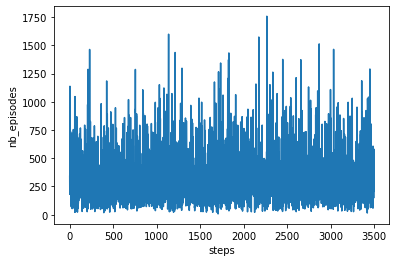

In [7]:
plt.plot(steps)
plt.xlabel('steps')
plt.ylabel('nb_episodes')

Text(0, 0.5, 'nb_episodes')

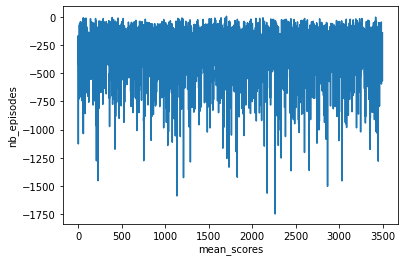

In [8]:
plt.plot(mean_scores)
plt.xlabel('mean_scores')
plt.ylabel('nb_episodes')

In [9]:
np.mean(steps)

327.06685714285715

In [14]:
min(steps)

7

In [12]:
agent = RandomAgent()
random_trained_agent, random_steps, random_mean_scores = run_episode(agent)

  0%|          | 0/3500 [00:00<?, ?it/s]

http://127.0.0.1/ctf_2/ctf_2_4.php


  0%|          | 1/3500 [00:06<6:29:12,  6.67s/it]

ステップ数:499, 平均報酬:-488.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  0%|          | 2/3500 [00:08<4:57:11,  5.10s/it]

ステップ数:107, 平均報酬:-96.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  0%|          | 3/3500 [00:11<4:21:08,  4.48s/it]

ステップ数:234, 平均報酬:-223.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  0%|          | 4/3500 [00:16<4:29:21,  4.62s/it]

ステップ数:394, 平均報酬:-383.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  0%|          | 5/3500 [00:20<4:31:48,  4.67s/it]

ステップ数:367, 平均報酬:-356.0
http://127.0.0.1/ctf_4/ctf_4_4.php


  0%|          | 6/3500 [00:28<5:28:52,  5.65s/it]

ステップ数:621, 平均報酬:-610.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  0%|          | 7/3500 [00:32<4:46:33,  4.92s/it]

ステップ数:262, 平均報酬:-251.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  0%|          | 8/3500 [00:35<4:16:38,  4.41s/it]

ステップ数:302, 平均報酬:-291.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  0%|          | 9/3500 [00:37<3:46:31,  3.89s/it]

ステップ数:208, 平均報酬:-197.0
http://127.0.0.1/ctf_1/ctf_1_3.php


  0%|          | 10/3500 [00:42<4:04:40,  4.21s/it]

ステップ数:388, 平均報酬:-377.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  0%|          | 11/3500 [00:46<3:48:50,  3.94s/it]

ステップ数:295, 平均報酬:-284.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  0%|          | 12/3500 [00:48<3:28:09,  3.58s/it]

ステップ数:221, 平均報酬:-210.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  0%|          | 13/3500 [00:49<2:32:59,  2.63s/it]

ステップ数:26, 平均報酬:-15.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  0%|          | 14/3500 [00:52<2:41:30,  2.78s/it]

ステップ数:250, 平均報酬:-239.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  0%|          | 15/3500 [00:56<3:09:59,  3.27s/it]

ステップ数:366, 平均報酬:-355.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  0%|          | 16/3500 [01:01<3:27:55,  3.58s/it]

ステップ数:328, 平均報酬:-317.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  0%|          | 17/3500 [01:07<4:19:48,  4.48s/it]

ステップ数:485, 平均報酬:-474.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  1%|          | 18/3500 [01:11<4:00:12,  4.14s/it]

ステップ数:256, 平均報酬:-245.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  1%|          | 19/3500 [01:18<4:58:28,  5.14s/it]

ステップ数:606, 平均報酬:-595.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  1%|          | 20/3500 [01:26<5:40:55,  5.88s/it]

ステップ数:632, 平均報酬:-621.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  1%|          | 21/3500 [01:28<4:33:06,  4.71s/it]

ステップ数:149, 平均報酬:-138.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  1%|          | 22/3500 [01:31<4:01:25,  4.16s/it]

ステップ数:232, 平均報酬:-221.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  1%|          | 23/3500 [01:36<4:23:17,  4.54s/it]

ステップ数:434, 平均報酬:-423.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  1%|          | 24/3500 [01:40<4:06:53,  4.26s/it]

ステップ数:301, 平均報酬:-290.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  1%|          | 25/3500 [01:41<3:13:21,  3.34s/it]

ステップ数:88, 平均報酬:-77.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  1%|          | 26/3500 [01:45<3:32:32,  3.67s/it]

ステップ数:358, 平均報酬:-347.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  1%|          | 27/3500 [01:50<3:52:30,  4.02s/it]

ステップ数:424, 平均報酬:-413.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  1%|          | 28/3500 [01:53<3:31:44,  3.66s/it]

ステップ数:225, 平均報酬:-214.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  1%|          | 29/3500 [01:56<3:24:26,  3.53s/it]

ステップ数:254, 平均報酬:-243.0
http://127.0.0.1/ctf_4/ctf_4_4.php


  1%|          | 30/3500 [02:00<3:34:59,  3.72s/it]

ステップ数:343, 平均報酬:-332.0
http://127.0.0.1/ctf_4/ctf_4_4.php


  1%|          | 31/3500 [02:08<4:48:40,  4.99s/it]

ステップ数:644, 平均報酬:-633.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  1%|          | 32/3500 [02:09<3:39:26,  3.80s/it]

ステップ数:67, 平均報酬:-56.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  1%|          | 33/3500 [02:12<3:19:17,  3.45s/it]

ステップ数:191, 平均報酬:-180.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  1%|          | 34/3500 [02:14<2:50:49,  2.96s/it]

ステップ数:124, 平均報酬:-113.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  1%|          | 35/3500 [02:15<2:22:54,  2.47s/it]

ステップ数:92, 平均報酬:-81.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  1%|          | 36/3500 [02:20<3:08:36,  3.27s/it]

ステップ数:425, 平均報酬:-414.0
http://127.0.0.1/ctf_1/ctf_1_3.php


  1%|          | 37/3500 [02:27<4:16:47,  4.45s/it]

ステップ数:559, 平均報酬:-548.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  1%|          | 38/3500 [02:32<4:14:03,  4.40s/it]

ステップ数:340, 平均報酬:-329.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  1%|          | 39/3500 [02:33<3:28:15,  3.61s/it]

ステップ数:131, 平均報酬:-120.0
http://127.0.0.1/ctf_4/ctf_4_4.php


  1%|          | 40/3500 [02:36<3:15:50,  3.40s/it]

ステップ数:236, 平均報酬:-225.0
http://127.0.0.1/ctf_1/ctf_1_3.php


  1%|          | 41/3500 [02:48<5:35:59,  5.83s/it]

ステップ数:910, 平均報酬:-899.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  1%|          | 42/3500 [02:50<4:35:40,  4.78s/it]

ステップ数:185, 平均報酬:-174.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  1%|          | 43/3500 [02:54<4:19:39,  4.51s/it]

ステップ数:285, 平均報酬:-274.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  1%|▏         | 44/3500 [02:56<3:28:31,  3.62s/it]

ステップ数:130, 平均報酬:-119.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  1%|▏         | 45/3500 [03:00<3:42:24,  3.86s/it]

ステップ数:352, 平均報酬:-341.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  1%|▏         | 46/3500 [03:03<3:28:03,  3.61s/it]

ステップ数:204, 平均報酬:-193.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  1%|▏         | 47/3500 [03:07<3:39:45,  3.82s/it]

ステップ数:315, 平均報酬:-304.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  1%|▏         | 48/3500 [03:10<3:19:42,  3.47s/it]

ステップ数:198, 平均報酬:-187.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  1%|▏         | 49/3500 [03:12<2:47:40,  2.92s/it]

ステップ数:114, 平均報酬:-103.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  1%|▏         | 50/3500 [03:15<2:53:57,  3.03s/it]

ステップ数:243, 平均報酬:-232.0
http://127.0.0.1/ctf_4/ctf_4_4.php


  1%|▏         | 51/3500 [03:16<2:22:55,  2.49s/it]

ステップ数:87, 平均報酬:-76.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  1%|▏         | 52/3500 [03:20<2:43:29,  2.84s/it]

ステップ数:275, 平均報酬:-264.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  2%|▏         | 53/3500 [03:36<6:29:17,  6.78s/it]

ステップ数:1253, 平均報酬:-1242.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  2%|▏         | 54/3500 [03:43<6:30:08,  6.79s/it]

ステップ数:530, 平均報酬:-519.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  2%|▏         | 55/3500 [03:45<5:08:54,  5.38s/it]

ステップ数:157, 平均報酬:-146.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  2%|▏         | 56/3500 [03:45<3:47:53,  3.97s/it]

ステップ数:47, 平均報酬:-36.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  2%|▏         | 57/3500 [03:47<3:13:25,  3.37s/it]

ステップ数:147, 平均報酬:-136.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  2%|▏         | 58/3500 [03:51<3:11:50,  3.34s/it]

ステップ数:239, 平均報酬:-228.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  2%|▏         | 59/3500 [03:52<2:46:39,  2.91s/it]

ステップ数:150, 平均報酬:-139.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  2%|▏         | 60/3500 [03:56<2:55:47,  3.07s/it]

ステップ数:278, 平均報酬:-267.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  2%|▏         | 61/3500 [04:01<3:35:01,  3.75s/it]

ステップ数:466, 平均報酬:-455.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  2%|▏         | 62/3500 [04:03<3:05:08,  3.23s/it]

ステップ数:153, 平均報酬:-142.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  2%|▏         | 63/3500 [04:04<2:24:49,  2.53s/it]

ステップ数:61, 平均報酬:-50.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  2%|▏         | 64/3500 [04:06<2:14:58,  2.36s/it]

ステップ数:150, 平均報酬:-139.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  2%|▏         | 65/3500 [04:09<2:31:34,  2.65s/it]

ステップ数:241, 平均報酬:-230.0
http://127.0.0.1/ctf_4/ctf_4_4.php


  2%|▏         | 66/3500 [04:14<3:08:43,  3.30s/it]

ステップ数:364, 平均報酬:-353.0
http://127.0.0.1/ctf_4/ctf_4_4.php


  2%|▏         | 67/3500 [04:15<2:27:59,  2.59s/it]

ステップ数:58, 平均報酬:-47.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  2%|▏         | 68/3500 [04:18<2:26:58,  2.57s/it]

ステップ数:181, 平均報酬:-170.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  2%|▏         | 69/3500 [04:29<4:59:27,  5.24s/it]

ステップ数:898, 平均報酬:-887.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  2%|▏         | 70/3500 [04:37<5:42:58,  6.00s/it]

ステップ数:607, 平均報酬:-596.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  2%|▏         | 71/3500 [04:39<4:29:26,  4.71s/it]

ステップ数:148, 平均報酬:-137.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  2%|▏         | 72/3500 [04:44<4:48:17,  5.05s/it]

ステップ数:454, 平均報酬:-443.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  2%|▏         | 73/3500 [04:50<4:59:45,  5.25s/it]

ステップ数:459, 平均報酬:-448.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  2%|▏         | 74/3500 [04:53<4:17:16,  4.51s/it]

ステップ数:199, 平均報酬:-188.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  2%|▏         | 75/3500 [04:56<3:52:46,  4.08s/it]

ステップ数:234, 平均報酬:-223.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  2%|▏         | 76/3500 [04:58<3:16:02,  3.44s/it]

ステップ数:137, 平均報酬:-126.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  2%|▏         | 77/3500 [05:03<3:48:35,  4.01s/it]

ステップ数:361, 平均報酬:-350.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  2%|▏         | 78/3500 [05:06<3:17:26,  3.46s/it]

ステップ数:163, 平均報酬:-152.0
http://127.0.0.1/ctf_1/ctf_1_3.php


  2%|▏         | 79/3500 [05:10<3:32:29,  3.73s/it]

ステップ数:347, 平均報酬:-336.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  2%|▏         | 80/3500 [05:15<4:01:50,  4.24s/it]

ステップ数:414, 平均報酬:-403.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  2%|▏         | 81/3500 [05:17<3:18:27,  3.48s/it]

ステップ数:125, 平均報酬:-114.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  2%|▏         | 82/3500 [05:18<2:34:57,  2.72s/it]

ステップ数:61, 平均報酬:-50.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  2%|▏         | 83/3500 [05:19<2:10:55,  2.30s/it]

ステップ数:103, 平均報酬:-92.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  2%|▏         | 84/3500 [05:22<2:21:30,  2.49s/it]

ステップ数:225, 平均報酬:-214.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  2%|▏         | 85/3500 [05:24<2:12:11,  2.32s/it]

ステップ数:137, 平均報酬:-126.0
http://127.0.0.1/ctf_1/ctf_1_3.php


  2%|▏         | 86/3500 [05:25<1:49:11,  1.92s/it]

ステップ数:68, 平均報酬:-57.0
http://127.0.0.1/ctf_1/ctf_1_3.php


  2%|▏         | 87/3500 [05:30<2:45:39,  2.91s/it]

ステップ数:403, 平均報酬:-392.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  3%|▎         | 88/3500 [05:35<3:11:46,  3.37s/it]

ステップ数:341, 平均報酬:-330.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  3%|▎         | 89/3500 [05:38<3:14:26,  3.42s/it]

ステップ数:259, 平均報酬:-248.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  3%|▎         | 90/3500 [05:42<3:09:55,  3.34s/it]

ステップ数:285, 平均報酬:-274.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  3%|▎         | 91/3500 [05:48<4:03:40,  4.29s/it]

ステップ数:494, 平均報酬:-483.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  3%|▎         | 92/3500 [05:50<3:25:31,  3.62s/it]

ステップ数:142, 平均報酬:-131.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  3%|▎         | 93/3500 [05:58<4:37:10,  4.88s/it]

ステップ数:610, 平均報酬:-599.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  3%|▎         | 94/3500 [06:03<4:42:18,  4.97s/it]

ステップ数:417, 平均報酬:-406.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  3%|▎         | 95/3500 [06:06<4:12:30,  4.45s/it]

ステップ数:256, 平均報酬:-245.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  3%|▎         | 96/3500 [06:08<3:21:47,  3.56s/it]

ステップ数:110, 平均報酬:-99.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  3%|▎         | 97/3500 [06:09<2:44:51,  2.91s/it]

ステップ数:102, 平均報酬:-91.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  3%|▎         | 98/3500 [06:14<3:22:30,  3.57s/it]

ステップ数:450, 平均報酬:-439.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  3%|▎         | 99/3500 [06:21<4:19:21,  4.58s/it]

ステップ数:561, 平均報酬:-550.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  3%|▎         | 100/3500 [06:25<3:57:55,  4.20s/it]

ステップ数:273, 平均報酬:-262.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  3%|▎         | 101/3500 [06:28<3:44:13,  3.96s/it]

ステップ数:277, 平均報酬:-266.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  3%|▎         | 102/3500 [06:35<4:34:34,  4.85s/it]

ステップ数:567, 平均報酬:-556.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  3%|▎         | 103/3500 [06:39<4:20:49,  4.61s/it]

ステップ数:335, 平均報酬:-324.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  3%|▎         | 104/3500 [06:42<3:56:58,  4.19s/it]

ステップ数:248, 平均報酬:-237.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  3%|▎         | 105/3500 [06:42<2:51:13,  3.03s/it]

ステップ数:20, 平均報酬:-9.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  3%|▎         | 106/3500 [06:44<2:24:23,  2.55s/it]

ステップ数:117, 平均報酬:-106.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  3%|▎         | 107/3500 [06:47<2:32:04,  2.69s/it]

ステップ数:240, 平均報酬:-229.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  3%|▎         | 108/3500 [06:56<4:25:19,  4.69s/it]

ステップ数:790, 平均報酬:-779.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  3%|▎         | 109/3500 [06:58<3:32:02,  3.75s/it]

ステップ数:117, 平均報酬:-106.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  3%|▎         | 110/3500 [07:00<3:04:02,  3.26s/it]

ステップ数:158, 平均報酬:-147.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  3%|▎         | 111/3500 [07:03<2:57:39,  3.15s/it]

ステップ数:202, 平均報酬:-191.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  3%|▎         | 112/3500 [07:11<4:15:53,  4.53s/it]

ステップ数:578, 平均報酬:-567.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  3%|▎         | 113/3500 [07:13<3:45:45,  4.00s/it]

ステップ数:201, 平均報酬:-190.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  3%|▎         | 114/3500 [07:22<5:05:24,  5.41s/it]

ステップ数:670, 平均報酬:-659.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  3%|▎         | 115/3500 [07:24<4:03:35,  4.32s/it]

ステップ数:126, 平均報酬:-115.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  3%|▎         | 116/3500 [07:26<3:26:05,  3.65s/it]

ステップ数:156, 平均報酬:-145.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  3%|▎         | 117/3500 [07:33<4:20:22,  4.62s/it]

ステップ数:571, 平均報酬:-560.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  3%|▎         | 118/3500 [07:35<3:31:59,  3.76s/it]

ステップ数:140, 平均報酬:-129.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  3%|▎         | 119/3500 [07:41<4:21:16,  4.64s/it]

ステップ数:550, 平均報酬:-539.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  3%|▎         | 120/3500 [07:51<5:42:04,  6.07s/it]

ステップ数:795, 平均報酬:-784.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  3%|▎         | 121/3500 [07:53<4:42:54,  5.02s/it]

ステップ数:209, 平均報酬:-198.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  3%|▎         | 122/3500 [07:58<4:32:41,  4.84s/it]

ステップ数:371, 平均報酬:-360.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  4%|▎         | 123/3500 [08:00<3:50:55,  4.10s/it]

ステップ数:190, 平均報酬:-179.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  4%|▎         | 124/3500 [08:03<3:32:00,  3.77s/it]

ステップ数:245, 平均報酬:-234.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  4%|▎         | 125/3500 [08:11<4:44:49,  5.06s/it]

ステップ数:687, 平均報酬:-676.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  4%|▎         | 126/3500 [08:19<5:24:53,  5.78s/it]

ステップ数:620, 平均報酬:-609.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  4%|▎         | 127/3500 [08:23<4:59:19,  5.32s/it]

ステップ数:351, 平均報酬:-340.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  4%|▎         | 128/3500 [08:30<5:33:25,  5.93s/it]

ステップ数:617, 平均報酬:-606.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  4%|▎         | 129/3500 [08:32<4:22:01,  4.66s/it]

ステップ数:154, 平均報酬:-143.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  4%|▎         | 130/3500 [08:38<4:41:06,  5.00s/it]

ステップ数:429, 平均報酬:-418.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  4%|▎         | 131/3500 [08:38<3:30:52,  3.76s/it]

ステップ数:57, 平均報酬:-46.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  4%|▍         | 132/3500 [08:40<2:56:16,  3.14s/it]

ステップ数:139, 平均報酬:-128.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  4%|▍         | 133/3500 [08:50<4:41:03,  5.01s/it]

ステップ数:789, 平均報酬:-778.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  4%|▍         | 134/3500 [08:53<4:21:20,  4.66s/it]

ステップ数:312, 平均報酬:-301.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  4%|▍         | 135/3500 [08:58<4:19:46,  4.63s/it]

ステップ数:371, 平均報酬:-360.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  4%|▍         | 136/3500 [09:01<3:45:14,  4.02s/it]

ステップ数:202, 平均報酬:-191.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  4%|▍         | 137/3500 [09:09<5:05:13,  5.45s/it]

ステップ数:635, 平均報酬:-624.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  4%|▍         | 138/3500 [09:11<4:00:52,  4.30s/it]

ステップ数:133, 平均報酬:-122.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  4%|▍         | 139/3500 [09:25<6:50:43,  7.33s/it]

ステップ数:1131, 平均報酬:-1120.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  4%|▍         | 140/3500 [09:27<5:13:09,  5.59s/it]

ステップ数:125, 平均報酬:-114.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  4%|▍         | 141/3500 [09:30<4:31:57,  4.86s/it]

ステップ数:263, 平均報酬:-252.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  4%|▍         | 142/3500 [09:34<4:19:01,  4.63s/it]

ステップ数:341, 平均報酬:-330.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  4%|▍         | 143/3500 [09:41<4:56:59,  5.31s/it]

ステップ数:575, 平均報酬:-564.0
http://127.0.0.1/ctf_1/ctf_1_3.php


  4%|▍         | 144/3500 [09:42<3:41:07,  3.95s/it]

ステップ数:57, 平均報酬:-46.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  4%|▍         | 145/3500 [09:50<4:50:12,  5.19s/it]

ステップ数:669, 平均報酬:-658.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  4%|▍         | 146/3500 [09:55<4:45:27,  5.11s/it]

ステップ数:393, 平均報酬:-382.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  4%|▍         | 147/3500 [09:58<4:12:46,  4.52s/it]

ステップ数:257, 平均報酬:-246.0
http://127.0.0.1/ctf_1/ctf_1_3.php


  4%|▍         | 148/3500 [10:03<4:24:32,  4.74s/it]

ステップ数:409, 平均報酬:-398.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  4%|▍         | 149/3500 [10:07<4:05:35,  4.40s/it]

ステップ数:291, 平均報酬:-280.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  4%|▍         | 150/3500 [10:09<3:26:02,  3.69s/it]

ステップ数:158, 平均報酬:-147.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  4%|▍         | 151/3500 [10:10<2:51:38,  3.07s/it]

ステップ数:136, 平均報酬:-125.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  4%|▍         | 152/3500 [10:21<5:02:13,  5.42s/it]

ステップ数:813, 平均報酬:-802.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  4%|▍         | 153/3500 [10:31<6:21:05,  6.83s/it]

ステップ数:793, 平均報酬:-782.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  4%|▍         | 154/3500 [10:39<6:40:45,  7.19s/it]

ステップ数:622, 平均報酬:-611.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  4%|▍         | 155/3500 [10:40<4:53:42,  5.27s/it]

ステップ数:59, 平均報酬:-48.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  4%|▍         | 156/3500 [10:41<3:44:34,  4.03s/it]

ステップ数:81, 平均報酬:-70.0
http://127.0.0.1/ctf_1/ctf_1_3.php


  4%|▍         | 157/3500 [10:49<4:49:28,  5.20s/it]

ステップ数:600, 平均報酬:-589.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  5%|▍         | 158/3500 [10:50<3:32:00,  3.81s/it]

ステップ数:35, 平均報酬:-24.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  5%|▍         | 159/3500 [10:52<2:56:48,  3.18s/it]

ステップ数:132, 平均報酬:-121.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  5%|▍         | 160/3500 [10:57<3:34:12,  3.85s/it]

ステップ数:424, 平均報酬:-413.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  5%|▍         | 161/3500 [11:03<4:08:14,  4.46s/it]

ステップ数:426, 平均報酬:-415.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  5%|▍         | 162/3500 [11:06<3:43:50,  4.02s/it]

ステップ数:212, 平均報酬:-201.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  5%|▍         | 163/3500 [11:09<3:30:40,  3.79s/it]

ステップ数:251, 平均報酬:-240.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  5%|▍         | 164/3500 [11:11<2:58:25,  3.21s/it]

ステップ数:126, 平均報酬:-115.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  5%|▍         | 165/3500 [11:21<4:46:05,  5.15s/it]

ステップ数:750, 平均報酬:-739.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  5%|▍         | 166/3500 [11:23<3:57:53,  4.28s/it]

ステップ数:169, 平均報酬:-158.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  5%|▍         | 167/3500 [11:31<5:01:51,  5.43s/it]

ステップ数:622, 平均報酬:-611.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  5%|▍         | 168/3500 [11:33<4:00:05,  4.32s/it]

ステップ数:135, 平均報酬:-124.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  5%|▍         | 169/3500 [11:38<4:07:34,  4.46s/it]

ステップ数:379, 平均報酬:-368.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  5%|▍         | 170/3500 [11:43<4:16:45,  4.63s/it]

ステップ数:384, 平均報酬:-373.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  5%|▍         | 171/3500 [11:47<4:21:10,  4.71s/it]

ステップ数:380, 平均報酬:-369.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  5%|▍         | 172/3500 [11:49<3:28:08,  3.75s/it]

ステップ数:111, 平均報酬:-100.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  5%|▍         | 173/3500 [11:50<2:42:52,  2.94s/it]

ステップ数:80, 平均報酬:-69.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  5%|▍         | 174/3500 [11:55<3:22:27,  3.65s/it]

ステップ数:341, 平均報酬:-330.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  5%|▌         | 175/3500 [12:03<4:35:54,  4.98s/it]

ステップ数:653, 平均報酬:-642.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  5%|▌         | 176/3500 [12:09<4:37:06,  5.00s/it]

ステップ数:379, 平均報酬:-368.0
http://127.0.0.1/ctf_1/ctf_1_3.php


  5%|▌         | 177/3500 [12:14<4:48:30,  5.21s/it]

ステップ数:428, 平均報酬:-417.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  5%|▌         | 178/3500 [12:17<4:11:21,  4.54s/it]

ステップ数:224, 平均報酬:-213.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  5%|▌         | 179/3500 [12:21<4:01:13,  4.36s/it]

ステップ数:311, 平均報酬:-300.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  5%|▌         | 180/3500 [12:23<3:18:43,  3.59s/it]

ステップ数:144, 平均報酬:-133.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  5%|▌         | 181/3500 [12:28<3:42:01,  4.01s/it]

ステップ数:432, 平均報酬:-421.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  5%|▌         | 182/3500 [12:32<3:38:07,  3.94s/it]

ステップ数:298, 平均報酬:-287.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  5%|▌         | 183/3500 [12:37<3:57:18,  4.29s/it]

ステップ数:431, 平均報酬:-420.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  5%|▌         | 184/3500 [12:40<3:44:53,  4.07s/it]

ステップ数:285, 平均報酬:-274.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  5%|▌         | 185/3500 [12:54<6:21:43,  6.91s/it]

ステップ数:1125, 平均報酬:-1114.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  5%|▌         | 186/3500 [12:56<4:58:51,  5.41s/it]

ステップ数:146, 平均報酬:-135.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  5%|▌         | 187/3500 [12:58<4:06:26,  4.46s/it]

ステップ数:181, 平均報酬:-170.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  5%|▌         | 188/3500 [13:01<3:40:24,  3.99s/it]

ステップ数:215, 平均報酬:-204.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  5%|▌         | 189/3500 [13:07<4:10:08,  4.53s/it]

ステップ数:410, 平均報酬:-399.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  5%|▌         | 190/3500 [13:11<3:57:39,  4.31s/it]

ステップ数:277, 平均報酬:-266.0
http://127.0.0.1/ctf_4/ctf_4_4.php


  5%|▌         | 191/3500 [13:15<4:05:23,  4.45s/it]

ステップ数:371, 平均報酬:-360.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  5%|▌         | 192/3500 [13:31<7:15:51,  7.91s/it]

ステップ数:1261, 平均報酬:-1250.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  6%|▌         | 193/3500 [13:38<7:02:06,  7.66s/it]

ステップ数:542, 平均報酬:-531.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  6%|▌         | 194/3500 [13:39<5:13:56,  5.70s/it]

ステップ数:87, 平均報酬:-76.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  6%|▌         | 195/3500 [13:41<4:02:03,  4.39s/it]

ステップ数:93, 平均報酬:-82.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  6%|▌         | 196/3500 [13:45<3:54:53,  4.27s/it]

ステップ数:308, 平均報酬:-297.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  6%|▌         | 197/3500 [13:48<3:37:35,  3.95s/it]

ステップ数:250, 平均報酬:-239.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  6%|▌         | 198/3500 [13:54<4:07:23,  4.50s/it]

ステップ数:457, 平均報酬:-446.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  6%|▌         | 199/3500 [13:57<3:42:20,  4.04s/it]

ステップ数:215, 平均報酬:-204.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  6%|▌         | 200/3500 [14:02<4:06:18,  4.48s/it]

ステップ数:409, 平均報酬:-398.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  6%|▌         | 201/3500 [14:04<3:20:37,  3.65s/it]

ステップ数:129, 平均報酬:-118.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  6%|▌         | 202/3500 [14:09<3:40:16,  4.01s/it]

ステップ数:383, 平均報酬:-372.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  6%|▌         | 203/3500 [14:13<3:49:13,  4.17s/it]

ステップ数:354, 平均報酬:-343.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  6%|▌         | 204/3500 [14:17<3:37:18,  3.96s/it]

ステップ数:282, 平均報酬:-271.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  6%|▌         | 205/3500 [14:19<3:08:07,  3.43s/it]

ステップ数:117, 平均報酬:-106.0
http://127.0.0.1/ctf_4/ctf_4_4.php


  6%|▌         | 206/3500 [14:29<4:58:28,  5.44s/it]

ステップ数:787, 平均報酬:-776.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  6%|▌         | 207/3500 [14:30<3:38:54,  3.99s/it]

ステップ数:37, 平均報酬:-26.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  6%|▌         | 208/3500 [14:37<4:33:59,  4.99s/it]

ステップ数:600, 平均報酬:-589.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  6%|▌         | 209/3500 [14:39<3:47:57,  4.16s/it]

ステップ数:185, 平均報酬:-174.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  6%|▌         | 210/3500 [14:40<2:48:30,  3.07s/it]

ステップ数:34, 平均報酬:-23.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  6%|▌         | 211/3500 [14:44<3:08:55,  3.45s/it]

ステップ数:324, 平均報酬:-313.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  6%|▌         | 212/3500 [14:54<4:52:02,  5.33s/it]

ステップ数:749, 平均報酬:-738.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  6%|▌         | 213/3500 [14:59<4:56:46,  5.42s/it]

ステップ数:420, 平均報酬:-409.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  6%|▌         | 214/3500 [15:01<3:47:08,  4.15s/it]

ステップ数:78, 平均報酬:-67.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  6%|▌         | 215/3500 [15:06<4:05:18,  4.48s/it]

ステップ数:379, 平均報酬:-368.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  6%|▌         | 216/3500 [15:08<3:20:44,  3.67s/it]

ステップ数:111, 平均報酬:-100.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  6%|▌         | 217/3500 [15:11<3:10:24,  3.48s/it]

ステップ数:205, 平均報酬:-194.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  6%|▌         | 218/3500 [15:15<3:30:33,  3.85s/it]

ステップ数:354, 平均報酬:-343.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  6%|▋         | 219/3500 [15:25<5:06:06,  5.60s/it]

ステップ数:772, 平均報酬:-761.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  6%|▋         | 220/3500 [15:28<4:25:32,  4.86s/it]

ステップ数:256, 平均報酬:-245.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  6%|▋         | 221/3500 [15:30<3:39:55,  4.02s/it]

ステップ数:139, 平均報酬:-128.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  6%|▋         | 222/3500 [15:38<4:34:11,  5.02s/it]

ステップ数:541, 平均報酬:-530.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  6%|▋         | 223/3500 [15:40<3:42:02,  4.07s/it]

ステップ数:130, 平均報酬:-119.0
http://127.0.0.1/ctf_4/ctf_4_4.php


  6%|▋         | 224/3500 [15:42<3:14:19,  3.56s/it]

ステップ数:169, 平均報酬:-158.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  6%|▋         | 225/3500 [15:44<2:52:50,  3.17s/it]

ステップ数:148, 平均報酬:-137.0
http://127.0.0.1/ctf_1/ctf_1_3.php


  6%|▋         | 226/3500 [15:48<3:08:14,  3.45s/it]

ステップ数:311, 平均報酬:-300.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  6%|▋         | 227/3500 [16:07<7:18:18,  8.03s/it]

ステップ数:1432, 平均報酬:-1421.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  7%|▋         | 228/3500 [16:11<6:15:40,  6.89s/it]

ステップ数:311, 平均報酬:-300.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  7%|▋         | 229/3500 [16:17<6:02:26,  6.65s/it]

ステップ数:470, 平均報酬:-459.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  7%|▋         | 230/3500 [16:24<6:08:38,  6.76s/it]

ステップ数:534, 平均報酬:-523.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  7%|▋         | 231/3500 [16:31<6:14:08,  6.87s/it]

ステップ数:529, 平均報酬:-518.0
http://127.0.0.1/ctf_1/ctf_1_3.php


  7%|▋         | 232/3500 [16:34<5:07:38,  5.65s/it]

ステップ数:193, 平均報酬:-182.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  7%|▋         | 233/3500 [16:41<5:17:23,  5.83s/it]

ステップ数:452, 平均報酬:-441.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  7%|▋         | 234/3500 [16:43<4:19:48,  4.77s/it]

ステップ数:153, 平均報酬:-142.0
http://127.0.0.1/ctf_1/ctf_1_3.php


  7%|▋         | 235/3500 [16:48<4:23:38,  4.84s/it]

ステップ数:406, 平均報酬:-395.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  7%|▋         | 236/3500 [16:51<3:49:57,  4.23s/it]

ステップ数:203, 平均報酬:-192.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  7%|▋         | 237/3500 [17:05<6:42:14,  7.40s/it]

ステップ数:1101, 平均報酬:-1090.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  7%|▋         | 238/3500 [17:07<5:03:04,  5.57s/it]

ステップ数:96, 平均報酬:-85.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  7%|▋         | 239/3500 [17:13<5:20:38,  5.90s/it]

ステップ数:483, 平均報酬:-472.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  7%|▋         | 240/3500 [17:17<4:50:13,  5.34s/it]

ステップ数:299, 平均報酬:-288.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  7%|▋         | 241/3500 [17:24<5:12:04,  5.75s/it]

ステップ数:511, 平均報酬:-500.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  7%|▋         | 242/3500 [17:37<7:09:10,  7.90s/it]

ステップ数:981, 平均報酬:-970.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  7%|▋         | 243/3500 [17:45<7:11:02,  7.94s/it]

ステップ数:599, 平均報酬:-588.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  7%|▋         | 244/3500 [17:50<6:16:08,  6.93s/it]

ステップ数:361, 平均報酬:-350.0
http://127.0.0.1/ctf_1/ctf_1_3.php


  7%|▋         | 245/3500 [17:51<4:43:42,  5.23s/it]

ステップ数:82, 平均報酬:-71.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  7%|▋         | 246/3500 [17:53<3:58:00,  4.39s/it]

ステップ数:199, 平均報酬:-188.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  7%|▋         | 247/3500 [17:57<3:46:19,  4.17s/it]

ステップ数:283, 平均報酬:-272.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  7%|▋         | 248/3500 [17:59<3:09:07,  3.49s/it]

ステップ数:136, 平均報酬:-125.0
http://127.0.0.1/ctf_1/ctf_1_3.php


  7%|▋         | 249/3500 [18:05<3:48:34,  4.22s/it]

ステップ数:439, 平均報酬:-428.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  7%|▋         | 250/3500 [18:09<3:53:15,  4.31s/it]

ステップ数:316, 平均報酬:-305.0
http://127.0.0.1/ctf_1/ctf_1_3.php


  7%|▋         | 251/3500 [18:15<4:07:16,  4.57s/it]

ステップ数:378, 平均報酬:-367.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  7%|▋         | 252/3500 [18:19<4:09:12,  4.60s/it]

ステップ数:337, 平均報酬:-326.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  7%|▋         | 253/3500 [18:21<3:30:26,  3.89s/it]

ステップ数:160, 平均報酬:-149.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  7%|▋         | 254/3500 [18:25<3:17:34,  3.65s/it]

ステップ数:232, 平均報酬:-221.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  7%|▋         | 255/3500 [18:25<2:33:39,  2.84s/it]

ステップ数:63, 平均報酬:-52.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  7%|▋         | 256/3500 [18:29<2:52:50,  3.20s/it]

ステップ数:293, 平均報酬:-282.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  7%|▋         | 257/3500 [18:32<2:35:29,  2.88s/it]

ステップ数:147, 平均報酬:-136.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  7%|▋         | 258/3500 [18:38<3:32:29,  3.93s/it]

ステップ数:472, 平均報酬:-461.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  7%|▋         | 259/3500 [18:47<4:46:07,  5.30s/it]

ステップ数:650, 平均報酬:-639.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  7%|▋         | 260/3500 [18:55<5:37:11,  6.24s/it]

ステップ数:637, 平均報酬:-626.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  7%|▋         | 261/3500 [19:08<7:31:23,  8.36s/it]

ステップ数:940, 平均報酬:-929.0
http://127.0.0.1/ctf_1/ctf_1_3.php


  7%|▋         | 262/3500 [19:10<5:37:10,  6.25s/it]

ステップ数:86, 平均報酬:-75.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  8%|▊         | 263/3500 [19:23<7:40:30,  8.54s/it]

ステップ数:1065, 平均報酬:-1054.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  8%|▊         | 264/3500 [19:37<8:57:04,  9.96s/it]

ステップ数:1030, 平均報酬:-1019.0
http://127.0.0.1/ctf_1/ctf_1_3.php


  8%|▊         | 265/3500 [19:40<7:16:23,  8.09s/it]

ステップ数:262, 平均報酬:-251.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  8%|▊         | 266/3500 [19:44<5:55:20,  6.59s/it]

ステップ数:210, 平均報酬:-199.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  8%|▊         | 267/3500 [19:49<5:28:54,  6.10s/it]

ステップ数:351, 平均報酬:-340.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  8%|▊         | 268/3500 [19:55<5:41:24,  6.34s/it]

ステップ数:508, 平均報酬:-497.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  8%|▊         | 269/3500 [19:58<4:45:37,  5.30s/it]

ステップ数:220, 平均報酬:-209.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  8%|▊         | 270/3500 [20:00<3:51:52,  4.31s/it]

ステップ数:122, 平均報酬:-111.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  8%|▊         | 271/3500 [20:04<3:40:02,  4.09s/it]

ステップ数:235, 平均報酬:-224.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  8%|▊         | 272/3500 [20:08<3:40:35,  4.10s/it]

ステップ数:292, 平均報酬:-281.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  8%|▊         | 273/3500 [20:13<4:01:54,  4.50s/it]

ステップ数:402, 平均報酬:-391.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  8%|▊         | 274/3500 [20:24<5:47:42,  6.47s/it]

ステップ数:843, 平均報酬:-832.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  8%|▊         | 275/3500 [20:29<5:22:29,  6.00s/it]

ステップ数:344, 平均報酬:-333.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  8%|▊         | 276/3500 [20:35<5:12:16,  5.81s/it]

ステップ数:390, 平均報酬:-379.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  8%|▊         | 277/3500 [20:37<4:20:11,  4.84s/it]

ステップ数:179, 平均報酬:-168.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  8%|▊         | 278/3500 [20:39<3:27:54,  3.87s/it]

ステップ数:124, 平均報酬:-113.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  8%|▊         | 279/3500 [20:44<3:51:41,  4.32s/it]

ステップ数:384, 平均報酬:-373.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  8%|▊         | 280/3500 [20:48<3:38:01,  4.06s/it]

ステップ数:257, 平均報酬:-246.0
http://127.0.0.1/ctf_1/ctf_1_3.php


  8%|▊         | 281/3500 [20:57<5:01:03,  5.61s/it]

ステップ数:716, 平均報酬:-705.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  8%|▊         | 282/3500 [20:58<3:46:10,  4.22s/it]

ステップ数:72, 平均報酬:-61.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  8%|▊         | 283/3500 [21:04<4:14:25,  4.75s/it]

ステップ数:394, 平均報酬:-383.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  8%|▊         | 284/3500 [21:10<4:39:33,  5.22s/it]

ステップ数:422, 平均報酬:-411.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  8%|▊         | 285/3500 [21:20<5:45:43,  6.45s/it]

ステップ数:689, 平均報酬:-678.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  8%|▊         | 286/3500 [21:24<5:11:38,  5.82s/it]

ステップ数:320, 平均報酬:-309.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  8%|▊         | 287/3500 [21:30<5:21:45,  6.01s/it]

ステップ数:481, 平均報酬:-470.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  8%|▊         | 288/3500 [21:37<5:28:06,  6.13s/it]

ステップ数:463, 平均報酬:-452.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  8%|▊         | 289/3500 [21:41<5:03:35,  5.67s/it]

ステップ数:346, 平均報酬:-335.0
http://127.0.0.1/ctf_3/ctf_3_4.php


  8%|▊         | 290/3500 [21:44<4:07:54,  4.63s/it]

ステップ数:156, 平均報酬:-145.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  8%|▊         | 291/3500 [21:52<5:14:31,  5.88s/it]

ステップ数:625, 平均報酬:-614.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  8%|▊         | 292/3500 [21:57<4:47:58,  5.39s/it]

ステップ数:305, 平均報酬:-294.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  8%|▊         | 293/3500 [21:59<3:58:28,  4.46s/it]

ステップ数:159, 平均報酬:-148.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  8%|▊         | 294/3500 [22:09<5:20:53,  6.01s/it]

ステップ数:735, 平均報酬:-724.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  8%|▊         | 295/3500 [22:12<4:35:53,  5.16s/it]

ステップ数:236, 平均報酬:-225.0
http://127.0.0.1/ctf_4/ctf_4_4.php


  8%|▊         | 296/3500 [22:27<7:17:17,  8.19s/it]

ステップ数:1149, 平均報酬:-1138.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  8%|▊         | 297/3500 [22:28<5:27:35,  6.14s/it]

ステップ数:91, 平均報酬:-80.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  9%|▊         | 298/3500 [22:33<5:04:12,  5.70s/it]

ステップ数:377, 平均報酬:-366.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  9%|▊         | 299/3500 [22:35<4:10:15,  4.69s/it]

ステップ数:170, 平均報酬:-159.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  9%|▊         | 300/3500 [22:37<3:16:54,  3.69s/it]

ステップ数:103, 平均報酬:-92.0
http://127.0.0.1/ctf_2/ctf_2_3.php


  9%|▊         | 301/3500 [22:39<2:48:07,  3.15s/it]

ステップ数:156, 平均報酬:-145.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  9%|▊         | 302/3500 [22:39<2:11:22,  2.46s/it]

ステップ数:54, 平均報酬:-43.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  9%|▊         | 303/3500 [22:46<3:09:23,  3.55s/it]

ステップ数:429, 平均報酬:-418.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  9%|▊         | 304/3500 [22:51<3:46:26,  4.25s/it]

ステップ数:414, 平均報酬:-403.0
http://127.0.0.1/ctf_1/ctf_1_4.php


  9%|▊         | 305/3500 [22:53<3:06:30,  3.50s/it]

ステップ数:128, 平均報酬:-117.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  9%|▊         | 306/3500 [22:59<3:49:17,  4.31s/it]

ステップ数:380, 平均報酬:-369.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  9%|▉         | 307/3500 [23:00<2:48:46,  3.17s/it]

ステップ数:28, 平均報酬:-17.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  9%|▉         | 308/3500 [23:02<2:29:15,  2.81s/it]

ステップ数:128, 平均報酬:-117.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  9%|▉         | 309/3500 [23:05<2:35:03,  2.92s/it]

ステップ数:199, 平均報酬:-188.0
http://127.0.0.1/ctf_1/ctf_1_3.php


  9%|▉         | 310/3500 [23:06<1:57:57,  2.22s/it]

ステップ数:32, 平均報酬:-21.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  9%|▉         | 311/3500 [23:06<1:30:45,  1.71s/it]

ステップ数:30, 平均報酬:-19.0
http://127.0.0.1/ctf_2/ctf_2_4.php


  9%|▉         | 312/3500 [23:17<3:59:19,  4.50s/it]

ステップ数:778, 平均報酬:-767.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  9%|▉         | 313/3500 [23:22<3:58:31,  4.49s/it]

ステップ数:326, 平均報酬:-315.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  9%|▉         | 314/3500 [23:24<3:24:16,  3.85s/it]

ステップ数:168, 平均報酬:-157.0
http://127.0.0.1/ctf_4/ctf_4_4.php


  9%|▉         | 315/3500 [23:26<3:01:48,  3.42s/it]

ステップ数:163, 平均報酬:-152.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  9%|▉         | 316/3500 [23:39<5:33:42,  6.29s/it]

ステップ数:976, 平均報酬:-965.0
http://127.0.0.1/ctf_3/ctf_3_2.php


  9%|▉         | 317/3500 [23:49<6:25:38,  7.27s/it]

ステップ数:703, 平均報酬:-692.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  9%|▉         | 318/3500 [23:51<5:08:00,  5.81s/it]

ステップ数:182, 平均報酬:-171.0
http://127.0.0.1/ctf_3/ctf_3_3.php


  9%|▉         | 319/3500 [23:55<4:26:14,  5.02s/it]

ステップ数:235, 平均報酬:-224.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  9%|▉         | 320/3500 [24:02<4:57:30,  5.61s/it]

ステップ数:495, 平均報酬:-484.0
http://127.0.0.1/ctf_3/ctf_3_5.php


  9%|▉         | 321/3500 [24:04<4:03:40,  4.60s/it]

ステップ数:148, 平均報酬:-137.0
http://127.0.0.1/ctf_4/ctf_4_4.php


  9%|▉         | 322/3500 [24:11<4:51:07,  5.50s/it]

ステップ数:546, 平均報酬:-535.0
http://127.0.0.1/ctf_4/ctf_4_5.php


  9%|▉         | 323/3500 [24:15<4:20:27,  4.92s/it]

ステップ数:255, 平均報酬:-244.0
http://127.0.0.1/ctf_1/ctf_1_2.php


  9%|▉         | 324/3500 [24:26<6:06:12,  6.92s/it]

ステップ数:858, 平均報酬:-847.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  9%|▉         | 325/3500 [24:30<5:06:33,  5.79s/it]

ステップ数:217, 平均報酬:-206.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  9%|▉         | 326/3500 [24:39<6:02:00,  6.84s/it]

ステップ数:655, 平均報酬:-644.0
http://127.0.0.1/ctf_2/ctf_2_2.php


  9%|▉         | 327/3500 [24:41<4:42:16,  5.34s/it]

ステップ数:117, 平均報酬:-106.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  9%|▉         | 328/3500 [24:46<4:32:29,  5.15s/it]

ステップ数:369, 平均報酬:-358.0
http://127.0.0.1/ctf_4/ctf_4_2.php


  9%|▉         | 329/3500 [24:55<5:35:54,  6.36s/it]

ステップ数:674, 平均報酬:-663.0
http://127.0.0.1/ctf_1/ctf_1_5.php


  9%|▉         | 330/3500 [24:58<4:48:02,  5.45s/it]

ステップ数:259, 平均報酬:-248.0
http://127.0.0.1/ctf_2/ctf_2_5.php


  9%|▉         | 331/3500 [25:05<5:18:07,  6.02s/it]

ステップ数:466, 平均報酬:-455.0
http://127.0.0.1/ctf_4/ctf_4_3.php


  9%|▉         | 332/3500 [25:09<4:32:34,  5.16s/it]

ステップ数:199, 平均報酬:-188.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 10%|▉         | 333/3500 [25:10<3:36:25,  4.10s/it]

ステップ数:103, 平均報酬:-92.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 10%|▉         | 334/3500 [25:16<4:01:06,  4.57s/it]

ステップ数:390, 平均報酬:-379.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 10%|▉         | 335/3500 [25:18<3:22:05,  3.83s/it]

ステップ数:139, 平均報酬:-128.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 10%|▉         | 336/3500 [25:32<6:02:31,  6.87s/it]

ステップ数:1054, 平均報酬:-1043.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 10%|▉         | 337/3500 [25:37<5:33:18,  6.32s/it]

ステップ数:356, 平均報酬:-345.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 10%|▉         | 338/3500 [25:39<4:29:07,  5.11s/it]

ステップ数:166, 平均報酬:-155.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 10%|▉         | 339/3500 [25:41<3:44:09,  4.25s/it]

ステップ数:157, 平均報酬:-146.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 10%|▉         | 340/3500 [25:44<3:11:12,  3.63s/it]

ステップ数:145, 平均報酬:-134.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 10%|▉         | 341/3500 [25:59<6:20:04,  7.22s/it]

ステップ数:1147, 平均報酬:-1136.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 10%|▉         | 342/3500 [26:04<5:44:13,  6.54s/it]

ステップ数:364, 平均報酬:-353.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 10%|▉         | 343/3500 [26:09<5:12:23,  5.94s/it]

ステップ数:326, 平均報酬:-315.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 10%|▉         | 344/3500 [26:11<4:20:09,  4.95s/it]

ステップ数:179, 平均報酬:-168.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 10%|▉         | 345/3500 [26:13<3:28:36,  3.97s/it]

ステップ数:125, 平均報酬:-114.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 10%|▉         | 346/3500 [26:15<3:01:49,  3.46s/it]

ステップ数:157, 平均報酬:-146.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 10%|▉         | 347/3500 [26:17<2:33:31,  2.92s/it]

ステップ数:121, 平均報酬:-110.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 10%|▉         | 348/3500 [26:22<3:06:35,  3.55s/it]

ステップ数:344, 平均報酬:-333.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 10%|▉         | 349/3500 [26:25<3:00:00,  3.43s/it]

ステップ数:217, 平均報酬:-206.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 10%|█         | 350/3500 [26:32<3:54:36,  4.47s/it]

ステップ数:490, 平均報酬:-479.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 10%|█         | 351/3500 [26:38<4:23:19,  5.02s/it]

ステップ数:447, 平均報酬:-436.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 10%|█         | 352/3500 [26:42<4:05:19,  4.68s/it]

ステップ数:264, 平均報酬:-253.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 10%|█         | 353/3500 [26:44<3:23:00,  3.87s/it]

ステップ数:162, 平均報酬:-151.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 10%|█         | 354/3500 [26:46<2:43:03,  3.11s/it]

ステップ数:107, 平均報酬:-96.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 10%|█         | 355/3500 [26:47<2:20:23,  2.68s/it]

ステップ数:112, 平均報酬:-101.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 10%|█         | 356/3500 [26:54<3:32:29,  4.06s/it]

ステップ数:555, 平均報酬:-544.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 10%|█         | 357/3500 [26:57<3:03:07,  3.50s/it]

ステップ数:170, 平均報酬:-159.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 10%|█         | 358/3500 [27:04<3:58:30,  4.55s/it]

ステップ数:441, 平均報酬:-430.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 10%|█         | 359/3500 [27:08<3:47:48,  4.35s/it]

ステップ数:253, 平均報酬:-242.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 10%|█         | 360/3500 [27:09<3:06:31,  3.56s/it]

ステップ数:106, 平均報酬:-95.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 10%|█         | 361/3500 [27:14<3:31:09,  4.04s/it]

ステップ数:349, 平均報酬:-338.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 10%|█         | 362/3500 [27:17<3:12:10,  3.67s/it]

ステップ数:184, 平均報酬:-173.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 10%|█         | 363/3500 [27:20<2:53:47,  3.32s/it]

ステップ数:170, 平均報酬:-159.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 10%|█         | 364/3500 [27:23<2:56:26,  3.38s/it]

ステップ数:264, 平均報酬:-253.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 10%|█         | 365/3500 [27:26<2:50:18,  3.26s/it]

ステップ数:218, 平均報酬:-207.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 10%|█         | 366/3500 [27:29<2:37:30,  3.02s/it]

ステップ数:164, 平均報酬:-153.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 10%|█         | 367/3500 [27:31<2:22:32,  2.73s/it]

ステップ数:150, 平均報酬:-139.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 11%|█         | 368/3500 [27:33<2:21:25,  2.71s/it]

ステップ数:187, 平均報酬:-176.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 11%|█         | 369/3500 [27:44<4:25:08,  5.08s/it]

ステップ数:764, 平均報酬:-753.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 11%|█         | 370/3500 [27:47<3:54:04,  4.49s/it]

ステップ数:209, 平均報酬:-198.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 11%|█         | 371/3500 [27:51<3:46:11,  4.34s/it]

ステップ数:279, 平均報酬:-268.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 11%|█         | 372/3500 [27:57<4:04:01,  4.68s/it]

ステップ数:388, 平均報酬:-377.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 11%|█         | 373/3500 [28:03<4:31:54,  5.22s/it]

ステップ数:465, 平均報酬:-454.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 11%|█         | 374/3500 [28:05<3:43:40,  4.29s/it]

ステップ数:146, 平均報酬:-135.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 11%|█         | 375/3500 [28:09<3:32:31,  4.08s/it]

ステップ数:247, 平均報酬:-236.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 11%|█         | 376/3500 [28:11<3:01:19,  3.48s/it]

ステップ数:149, 平均報酬:-138.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 11%|█         | 377/3500 [28:16<3:32:56,  4.09s/it]

ステップ数:374, 平均報酬:-363.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 11%|█         | 378/3500 [28:22<3:57:43,  4.57s/it]

ステップ数:422, 平均報酬:-411.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 11%|█         | 379/3500 [28:30<4:57:36,  5.72s/it]

ステップ数:609, 平均報酬:-598.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 11%|█         | 380/3500 [28:37<5:02:45,  5.82s/it]

ステップ数:440, 平均報酬:-429.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 11%|█         | 381/3500 [28:43<5:16:50,  6.09s/it]

ステップ数:485, 平均報酬:-474.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 11%|█         | 382/3500 [28:53<6:16:56,  7.25s/it]

ステップ数:741, 平均報酬:-730.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 11%|█         | 383/3500 [28:57<5:16:32,  6.09s/it]

ステップ数:247, 平均報酬:-236.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 11%|█         | 384/3500 [29:00<4:28:08,  5.16s/it]

ステップ数:206, 平均報酬:-195.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 11%|█         | 385/3500 [29:01<3:27:08,  3.99s/it]

ステップ数:68, 平均報酬:-57.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 11%|█         | 386/3500 [29:04<3:06:55,  3.60s/it]

ステップ数:145, 平均報酬:-134.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 11%|█         | 387/3500 [29:06<2:54:14,  3.36s/it]

ステップ数:202, 平均報酬:-191.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 11%|█         | 388/3500 [29:08<2:28:21,  2.86s/it]

ステップ数:104, 平均報酬:-93.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 11%|█         | 389/3500 [29:14<3:15:41,  3.77s/it]

ステップ数:392, 平均報酬:-381.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 11%|█         | 390/3500 [29:16<2:50:19,  3.29s/it]

ステップ数:145, 平均報酬:-134.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 11%|█         | 391/3500 [29:24<4:02:49,  4.69s/it]

ステップ数:554, 平均報酬:-543.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 11%|█         | 392/3500 [29:29<4:01:12,  4.66s/it]

ステップ数:308, 平均報酬:-297.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 11%|█         | 393/3500 [29:38<5:08:06,  5.95s/it]

ステップ数:634, 平均報酬:-623.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 11%|█▏        | 394/3500 [29:44<5:15:59,  6.10s/it]

ステップ数:454, 平均報酬:-443.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 11%|█▏        | 395/3500 [29:47<4:20:16,  5.03s/it]

ステップ数:163, 平均報酬:-152.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 11%|█▏        | 396/3500 [29:49<3:40:05,  4.25s/it]

ステップ数:162, 平均報酬:-151.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 11%|█▏        | 397/3500 [29:57<4:32:02,  5.26s/it]

ステップ数:566, 平均報酬:-555.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 11%|█▏        | 398/3500 [30:05<5:18:29,  6.16s/it]

ステップ数:580, 平均報酬:-569.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 11%|█▏        | 399/3500 [30:06<4:07:21,  4.79s/it]

ステップ数:99, 平均報酬:-88.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 11%|█▏        | 400/3500 [30:14<4:46:11,  5.54s/it]

ステップ数:509, 平均報酬:-498.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 11%|█▏        | 401/3500 [30:16<3:48:06,  4.42s/it]

ステップ数:119, 平均報酬:-108.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 11%|█▏        | 402/3500 [30:21<3:57:17,  4.60s/it]

ステップ数:335, 平均報酬:-324.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 12%|█▏        | 403/3500 [30:26<4:02:47,  4.70s/it]

ステップ数:348, 平均報酬:-337.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 12%|█▏        | 404/3500 [30:28<3:27:24,  4.02s/it]

ステップ数:175, 平均報酬:-164.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 12%|█▏        | 405/3500 [30:29<2:44:11,  3.18s/it]

ステップ数:79, 平均報酬:-68.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 12%|█▏        | 406/3500 [30:35<3:26:29,  4.00s/it]

ステップ数:406, 平均報酬:-395.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 12%|█▏        | 407/3500 [30:38<3:02:50,  3.55s/it]

ステップ数:184, 平均報酬:-173.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 12%|█▏        | 408/3500 [30:49<5:09:03,  6.00s/it]

ステップ数:838, 平均報酬:-827.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 12%|█▏        | 409/3500 [30:56<5:19:49,  6.21s/it]

ステップ数:537, 平均報酬:-526.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 12%|█▏        | 410/3500 [31:01<4:55:39,  5.74s/it]

ステップ数:309, 平均報酬:-298.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 12%|█▏        | 411/3500 [31:07<5:09:14,  6.01s/it]

ステップ数:412, 平均報酬:-401.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 12%|█▏        | 412/3500 [31:11<4:34:55,  5.34s/it]

ステップ数:246, 平均報酬:-235.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 12%|█▏        | 413/3500 [31:13<3:36:09,  4.20s/it]

ステップ数:95, 平均報酬:-84.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 12%|█▏        | 414/3500 [31:23<5:04:12,  5.91s/it]

ステップ数:686, 平均報酬:-675.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 12%|█▏        | 415/3500 [31:29<5:07:20,  5.98s/it]

ステップ数:431, 平均報酬:-420.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 12%|█▏        | 416/3500 [31:30<3:57:44,  4.63s/it]

ステップ数:96, 平均報酬:-85.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 12%|█▏        | 417/3500 [31:35<4:08:04,  4.83s/it]

ステップ数:370, 平均報酬:-359.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 12%|█▏        | 418/3500 [31:42<4:35:10,  5.36s/it]

ステップ数:487, 平均報酬:-476.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 12%|█▏        | 419/3500 [31:47<4:28:28,  5.23s/it]

ステップ数:338, 平均報酬:-327.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 12%|█▏        | 420/3500 [31:50<3:50:24,  4.49s/it]

ステップ数:194, 平均報酬:-183.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 12%|█▏        | 421/3500 [31:52<3:13:03,  3.76s/it]

ステップ数:138, 平均報酬:-127.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 12%|█▏        | 422/3500 [31:59<4:02:15,  4.72s/it]

ステップ数:478, 平均報酬:-467.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 12%|█▏        | 423/3500 [32:03<3:52:32,  4.53s/it]

ステップ数:281, 平均報酬:-270.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 12%|█▏        | 424/3500 [32:08<3:57:44,  4.64s/it]

ステップ数:333, 平均報酬:-322.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 12%|█▏        | 425/3500 [32:18<5:18:00,  6.21s/it]

ステップ数:693, 平均報酬:-682.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 12%|█▏        | 426/3500 [32:24<5:16:44,  6.18s/it]

ステップ数:477, 平均報酬:-466.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 12%|█▏        | 427/3500 [32:25<3:59:20,  4.67s/it]

ステップ数:79, 平均報酬:-68.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 12%|█▏        | 428/3500 [32:28<3:30:14,  4.11s/it]

ステップ数:199, 平均報酬:-188.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 12%|█▏        | 429/3500 [32:38<5:00:13,  5.87s/it]

ステップ数:746, 平均報酬:-735.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 12%|█▏        | 430/3500 [32:40<4:07:52,  4.84s/it]

ステップ数:170, 平均報酬:-159.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 12%|█▏        | 431/3500 [32:45<4:07:08,  4.83s/it]

ステップ数:318, 平均報酬:-307.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 12%|█▏        | 432/3500 [32:47<3:32:02,  4.15s/it]

ステップ数:164, 平均報酬:-153.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 12%|█▏        | 433/3500 [32:57<4:51:09,  5.70s/it]

ステップ数:618, 平均報酬:-607.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 12%|█▏        | 434/3500 [33:01<4:33:38,  5.36s/it]

ステップ数:311, 平均報酬:-300.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 12%|█▏        | 435/3500 [33:12<5:55:03,  6.95s/it]

ステップ数:693, 平均報酬:-682.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 12%|█▏        | 436/3500 [33:26<7:41:51,  9.04s/it]

ステップ数:971, 平均報酬:-960.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 12%|█▏        | 437/3500 [33:28<5:47:35,  6.81s/it]

ステップ数:109, 平均報酬:-98.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 13%|█▎        | 438/3500 [33:29<4:27:27,  5.24s/it]

ステップ数:100, 平均報酬:-89.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 13%|█▎        | 439/3500 [33:38<5:23:14,  6.34s/it]

ステップ数:638, 平均報酬:-627.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 13%|█▎        | 440/3500 [33:40<4:22:54,  5.16s/it]

ステップ数:170, 平均報酬:-159.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 13%|█▎        | 441/3500 [33:44<4:05:06,  4.81s/it]

ステップ数:271, 平均報酬:-260.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 13%|█▎        | 442/3500 [33:50<4:23:15,  5.17s/it]

ステップ数:471, 平均報酬:-460.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 13%|█▎        | 443/3500 [33:56<4:30:12,  5.30s/it]

ステップ数:372, 平均報酬:-361.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 13%|█▎        | 444/3500 [33:58<3:34:48,  4.22s/it]

ステップ数:118, 平均報酬:-107.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 13%|█▎        | 445/3500 [34:07<4:55:44,  5.81s/it]

ステップ数:670, 平均報酬:-659.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 13%|█▎        | 446/3500 [34:09<3:55:24,  4.62s/it]

ステップ数:125, 平均報酬:-114.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 13%|█▎        | 447/3500 [34:13<3:42:36,  4.37s/it]

ステップ数:253, 平均報酬:-242.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 13%|█▎        | 448/3500 [34:20<4:28:45,  5.28s/it]

ステップ数:523, 平均報酬:-512.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 13%|█▎        | 449/3500 [34:22<3:38:45,  4.30s/it]

ステップ数:127, 平均報酬:-116.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 13%|█▎        | 450/3500 [34:25<3:13:09,  3.80s/it]

ステップ数:187, 平均報酬:-176.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 13%|█▎        | 451/3500 [34:28<3:00:40,  3.56s/it]

ステップ数:210, 平均報酬:-199.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 13%|█▎        | 452/3500 [34:36<4:15:18,  5.03s/it]

ステップ数:570, 平均報酬:-559.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 13%|█▎        | 453/3500 [34:41<4:02:16,  4.77s/it]

ステップ数:279, 平均報酬:-268.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 13%|█▎        | 454/3500 [34:42<3:18:55,  3.92s/it]

ステップ数:125, 平均報酬:-114.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 13%|█▎        | 455/3500 [34:45<3:03:24,  3.61s/it]

ステップ数:203, 平均報酬:-192.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 13%|█▎        | 456/3500 [34:47<2:37:48,  3.11s/it]

ステップ数:128, 平均報酬:-117.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 13%|█▎        | 457/3500 [34:48<1:58:57,  2.35s/it]

ステップ数:30, 平均報酬:-19.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 13%|█▎        | 458/3500 [34:50<1:55:28,  2.28s/it]

ステップ数:148, 平均報酬:-137.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 13%|█▎        | 459/3500 [34:54<2:26:31,  2.89s/it]

ステップ数:290, 平均報酬:-279.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 13%|█▎        | 460/3500 [34:57<2:26:18,  2.89s/it]

ステップ数:191, 平均報酬:-180.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 13%|█▎        | 461/3500 [35:02<3:02:05,  3.59s/it]

ステップ数:328, 平均報酬:-317.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 13%|█▎        | 462/3500 [35:06<3:00:23,  3.56s/it]

ステップ数:218, 平均報酬:-207.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 13%|█▎        | 463/3500 [35:18<5:10:10,  6.13s/it]

ステップ数:805, 平均報酬:-794.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 13%|█▎        | 464/3500 [35:19<3:47:13,  4.49s/it]

ステップ数:44, 平均報酬:-33.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 13%|█▎        | 465/3500 [35:20<3:00:37,  3.57s/it]

ステップ数:91, 平均報酬:-80.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 13%|█▎        | 466/3500 [35:23<2:51:32,  3.39s/it]

ステップ数:199, 平均報酬:-188.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 13%|█▎        | 467/3500 [35:27<3:06:39,  3.69s/it]

ステップ数:319, 平均報酬:-308.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 13%|█▎        | 468/3500 [35:28<2:24:03,  2.85s/it]

ステップ数:56, 平均報酬:-45.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 13%|█▎        | 469/3500 [35:31<2:18:06,  2.73s/it]

ステップ数:175, 平均報酬:-164.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 13%|█▎        | 470/3500 [35:35<2:37:40,  3.12s/it]

ステップ数:279, 平均報酬:-268.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 13%|█▎        | 471/3500 [35:44<4:01:37,  4.79s/it]

ステップ数:616, 平均報酬:-605.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 13%|█▎        | 472/3500 [35:49<4:08:59,  4.93s/it]

ステップ数:365, 平均報酬:-354.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 14%|█▎        | 473/3500 [35:50<3:13:13,  3.83s/it]

ステップ数:89, 平均報酬:-78.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 14%|█▎        | 474/3500 [35:57<4:03:57,  4.84s/it]

ステップ数:502, 平均報酬:-491.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 14%|█▎        | 475/3500 [36:05<4:49:12,  5.74s/it]

ステップ数:515, 平均報酬:-504.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 14%|█▎        | 476/3500 [36:07<3:46:58,  4.50s/it]

ステップ数:107, 平均報酬:-96.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 14%|█▎        | 477/3500 [36:09<3:15:29,  3.88s/it]

ステップ数:159, 平均報酬:-148.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 14%|█▎        | 478/3500 [36:11<2:37:48,  3.13s/it]

ステップ数:90, 平均報酬:-79.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 14%|█▎        | 479/3500 [36:16<3:07:48,  3.73s/it]

ステップ数:365, 平均報酬:-354.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 14%|█▎        | 480/3500 [36:25<4:38:22,  5.53s/it]

ステップ数:665, 平均報酬:-654.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 14%|█▎        | 481/3500 [36:29<4:03:57,  4.85s/it]

ステップ数:227, 平均報酬:-216.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 14%|█▍        | 482/3500 [36:32<3:34:34,  4.27s/it]

ステップ数:195, 平均報酬:-184.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 14%|█▍        | 483/3500 [36:32<2:44:14,  3.27s/it]

ステップ数:62, 平均報酬:-51.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 14%|█▍        | 484/3500 [36:35<2:33:04,  3.05s/it]

ステップ数:174, 平均報酬:-163.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 14%|█▍        | 485/3500 [36:41<3:11:03,  3.80s/it]

ステップ数:365, 平均報酬:-354.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 14%|█▍        | 486/3500 [36:45<3:23:45,  4.06s/it]

ステップ数:316, 平均報酬:-305.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 14%|█▍        | 487/3500 [36:51<3:53:12,  4.64s/it]

ステップ数:408, 平均報酬:-397.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 14%|█▍        | 488/3500 [36:55<3:42:20,  4.43s/it]

ステップ数:288, 平均報酬:-277.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 14%|█▍        | 489/3500 [36:57<3:04:10,  3.67s/it]

ステップ数:141, 平均報酬:-130.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 14%|█▍        | 490/3500 [37:01<3:03:41,  3.66s/it]

ステップ数:232, 平均報酬:-221.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 14%|█▍        | 491/3500 [37:06<3:30:04,  4.19s/it]

ステップ数:311, 平均報酬:-300.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 14%|█▍        | 492/3500 [37:10<3:32:08,  4.23s/it]

ステップ数:269, 平均報酬:-258.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 14%|█▍        | 493/3500 [37:14<3:25:44,  4.11s/it]

ステップ数:253, 平均報酬:-242.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 14%|█▍        | 494/3500 [37:18<3:20:00,  3.99s/it]

ステップ数:254, 平均報酬:-243.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 14%|█▍        | 495/3500 [37:20<2:44:24,  3.28s/it]

ステップ数:109, 平均報酬:-98.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 14%|█▍        | 496/3500 [37:22<2:23:41,  2.87s/it]

ステップ数:127, 平均報酬:-116.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 14%|█▍        | 497/3500 [37:31<3:56:17,  4.72s/it]

ステップ数:634, 平均報酬:-623.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 14%|█▍        | 498/3500 [37:34<3:36:58,  4.34s/it]

ステップ数:227, 平均報酬:-216.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 14%|█▍        | 499/3500 [37:35<2:45:22,  3.31s/it]

ステップ数:53, 平均報酬:-42.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 14%|█▍        | 500/3500 [37:37<2:26:59,  2.94s/it]

ステップ数:135, 平均報酬:-124.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 14%|█▍        | 501/3500 [37:47<4:09:23,  4.99s/it]

ステップ数:651, 平均報酬:-640.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 14%|█▍        | 502/3500 [37:49<3:27:52,  4.16s/it]

ステップ数:144, 平均報酬:-133.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 14%|█▍        | 503/3500 [37:55<3:51:01,  4.63s/it]

ステップ数:384, 平均報酬:-373.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 14%|█▍        | 504/3500 [37:59<3:52:10,  4.65s/it]

ステップ数:331, 平均報酬:-320.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 14%|█▍        | 505/3500 [38:06<4:28:20,  5.38s/it]

ステップ数:511, 平均報酬:-500.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 14%|█▍        | 506/3500 [38:11<4:18:54,  5.19s/it]

ステップ数:328, 平均報酬:-317.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 14%|█▍        | 507/3500 [38:16<4:19:04,  5.19s/it]

ステップ数:349, 平均報酬:-338.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 15%|█▍        | 508/3500 [38:22<4:29:40,  5.41s/it]

ステップ数:399, 平均報酬:-388.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 15%|█▍        | 509/3500 [38:27<4:16:08,  5.14s/it]

ステップ数:299, 平均報酬:-288.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 15%|█▍        | 510/3500 [38:40<6:11:54,  7.46s/it]

ステップ数:887, 平均報酬:-876.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 15%|█▍        | 511/3500 [38:43<5:16:13,  6.35s/it]

ステップ数:256, 平均報酬:-245.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 15%|█▍        | 512/3500 [38:49<5:10:45,  6.24s/it]

ステップ数:421, 平均報酬:-410.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 15%|█▍        | 513/3500 [38:52<4:22:04,  5.26s/it]

ステップ数:205, 平均報酬:-194.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 15%|█▍        | 514/3500 [38:56<3:52:58,  4.68s/it]

ステップ数:222, 平均報酬:-211.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 15%|█▍        | 515/3500 [39:00<3:47:34,  4.57s/it]

ステップ数:286, 平均報酬:-275.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 15%|█▍        | 516/3500 [39:16<6:30:09,  7.84s/it]

ステップ数:996, 平均報酬:-985.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 15%|█▍        | 517/3500 [39:22<6:02:07,  7.28s/it]

ステップ数:412, 平均報酬:-401.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 15%|█▍        | 518/3500 [39:25<5:00:43,  6.05s/it]

ステップ数:213, 平均報酬:-202.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 15%|█▍        | 519/3500 [39:28<4:24:49,  5.33s/it]

ステップ数:279, 平均報酬:-268.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 15%|█▍        | 520/3500 [39:36<4:59:29,  6.03s/it]

ステップ数:540, 平均報酬:-529.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 15%|█▍        | 521/3500 [39:45<5:36:38,  6.78s/it]

ステップ数:565, 平均報酬:-554.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 15%|█▍        | 522/3500 [39:48<4:49:57,  5.84s/it]

ステップ数:235, 平均報酬:-224.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 15%|█▍        | 523/3500 [39:57<5:38:16,  6.82s/it]

ステップ数:622, 平均報酬:-611.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 15%|█▍        | 524/3500 [40:04<5:37:53,  6.81s/it]

ステップ数:474, 平均報酬:-463.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 15%|█▌        | 525/3500 [40:08<4:59:34,  6.04s/it]

ステップ数:285, 平均報酬:-274.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 15%|█▌        | 526/3500 [40:12<4:28:55,  5.43s/it]

ステップ数:256, 平均報酬:-245.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 15%|█▌        | 527/3500 [40:15<3:44:34,  4.53s/it]

ステップ数:151, 平均報酬:-140.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 15%|█▌        | 528/3500 [40:26<5:18:34,  6.43s/it]

ステップ数:768, 平均報酬:-757.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 15%|█▌        | 529/3500 [40:30<4:41:41,  5.69s/it]

ステップ数:278, 平均報酬:-267.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 15%|█▌        | 530/3500 [40:31<3:43:49,  4.52s/it]

ステップ数:112, 平均報酬:-101.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 15%|█▌        | 531/3500 [40:37<4:01:58,  4.89s/it]

ステップ数:384, 平均報酬:-373.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 15%|█▌        | 532/3500 [40:42<4:07:27,  5.00s/it]

ステップ数:352, 平均報酬:-341.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 15%|█▌        | 533/3500 [40:50<4:41:03,  5.68s/it]

ステップ数:500, 平均報酬:-489.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 15%|█▌        | 534/3500 [40:51<3:37:51,  4.41s/it]

ステップ数:89, 平均報酬:-78.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 15%|█▌        | 535/3500 [40:59<4:22:40,  5.32s/it]

ステップ数:501, 平均報酬:-490.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 15%|█▌        | 536/3500 [41:02<3:47:33,  4.61s/it]

ステップ数:166, 平均報酬:-155.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 15%|█▌        | 537/3500 [41:07<4:00:50,  4.88s/it]

ステップ数:336, 平均報酬:-325.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 15%|█▌        | 538/3500 [41:19<5:40:13,  6.89s/it]

ステップ数:770, 平均報酬:-759.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 15%|█▌        | 539/3500 [41:24<5:21:38,  6.52s/it]

ステップ数:405, 平均報酬:-394.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 15%|█▌        | 540/3500 [41:27<4:24:36,  5.36s/it]

ステップ数:189, 平均報酬:-178.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 15%|█▌        | 541/3500 [41:33<4:27:36,  5.43s/it]

ステップ数:379, 平均報酬:-368.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 15%|█▌        | 542/3500 [41:35<3:40:58,  4.48s/it]

ステップ数:162, 平均報酬:-151.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 16%|█▌        | 543/3500 [41:40<3:52:18,  4.71s/it]

ステップ数:344, 平均報酬:-333.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 16%|█▌        | 544/3500 [41:41<2:56:47,  3.59s/it]

ステップ数:60, 平均報酬:-49.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 16%|█▌        | 545/3500 [41:43<2:32:56,  3.11s/it]

ステップ数:124, 平均報酬:-113.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 16%|█▌        | 546/3500 [41:45<2:18:15,  2.81s/it]

ステップ数:128, 平均報酬:-117.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 16%|█▌        | 547/3500 [41:50<2:55:06,  3.56s/it]

ステップ数:365, 平均報酬:-354.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 16%|█▌        | 548/3500 [41:55<3:14:43,  3.96s/it]

ステップ数:334, 平均報酬:-323.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 16%|█▌        | 549/3500 [42:05<4:42:18,  5.74s/it]

ステップ数:698, 平均報酬:-687.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 16%|█▌        | 550/3500 [42:07<3:41:30,  4.51s/it]

ステップ数:129, 平均報酬:-118.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 16%|█▌        | 551/3500 [42:13<4:11:56,  5.13s/it]

ステップ数:467, 平均報酬:-456.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 16%|█▌        | 552/3500 [42:16<3:29:49,  4.27s/it]

ステップ数:149, 平均報酬:-138.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 16%|█▌        | 553/3500 [42:17<2:46:39,  3.39s/it]

ステップ数:76, 平均報酬:-65.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 16%|█▌        | 554/3500 [42:21<2:56:57,  3.60s/it]

ステップ数:280, 平均報酬:-269.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 16%|█▌        | 555/3500 [42:33<4:52:41,  5.96s/it]

ステップ数:821, 平均報酬:-810.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 16%|█▌        | 556/3500 [42:39<5:06:21,  6.24s/it]

ステップ数:472, 平均報酬:-461.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 16%|█▌        | 557/3500 [42:44<4:34:35,  5.60s/it]

ステップ数:266, 平均報酬:-255.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 16%|█▌        | 558/3500 [42:45<3:31:53,  4.32s/it]

ステップ数:80, 平均報酬:-69.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 16%|█▌        | 559/3500 [42:52<4:08:19,  5.07s/it]

ステップ数:467, 平均報酬:-456.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 16%|█▌        | 560/3500 [43:04<5:56:51,  7.28s/it]

ステップ数:854, 平均報酬:-843.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 16%|█▌        | 561/3500 [43:11<5:46:23,  7.07s/it]

ステップ数:432, 平均報酬:-421.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 16%|█▌        | 562/3500 [43:16<5:26:01,  6.66s/it]

ステップ数:363, 平均報酬:-352.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 16%|█▌        | 563/3500 [43:24<5:42:39,  7.00s/it]

ステップ数:548, 平均報酬:-537.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 16%|█▌        | 564/3500 [43:27<4:34:32,  5.61s/it]

ステップ数:165, 平均報酬:-154.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 16%|█▌        | 565/3500 [43:34<5:05:13,  6.24s/it]

ステップ数:550, 平均報酬:-539.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 16%|█▌        | 566/3500 [43:37<4:18:43,  5.29s/it]

ステップ数:215, 平均報酬:-204.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 16%|█▌        | 567/3500 [43:41<3:51:49,  4.74s/it]

ステップ数:237, 平均報酬:-226.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 16%|█▌        | 568/3500 [43:47<4:18:39,  5.29s/it]

ステップ数:456, 平均報酬:-445.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 16%|█▋        | 569/3500 [43:54<4:41:51,  5.77s/it]

ステップ数:463, 平均報酬:-452.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 16%|█▋        | 570/3500 [43:56<3:47:58,  4.67s/it]

ステップ数:137, 平均報酬:-126.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 16%|█▋        | 571/3500 [43:59<3:11:45,  3.93s/it]

ステップ数:146, 平均報酬:-135.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 16%|█▋        | 572/3500 [44:02<2:57:58,  3.65s/it]

ステップ数:145, 平均報酬:-134.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 16%|█▋        | 573/3500 [44:04<2:42:04,  3.32s/it]

ステップ数:165, 平均報酬:-154.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 16%|█▋        | 574/3500 [44:09<3:05:04,  3.80s/it]

ステップ数:331, 平均報酬:-320.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 16%|█▋        | 575/3500 [44:12<2:46:29,  3.42s/it]

ステップ数:165, 平均報酬:-154.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 16%|█▋        | 576/3500 [44:13<2:16:13,  2.80s/it]

ステップ数:86, 平均報酬:-75.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 16%|█▋        | 577/3500 [44:18<2:47:19,  3.43s/it]

ステップ数:356, 平均報酬:-345.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 17%|█▋        | 578/3500 [44:23<3:14:54,  4.00s/it]

ステップ数:347, 平均報酬:-336.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 17%|█▋        | 579/3500 [44:31<4:10:44,  5.15s/it]

ステップ数:528, 平均報酬:-517.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 17%|█▋        | 580/3500 [44:34<3:34:18,  4.40s/it]

ステップ数:168, 平均報酬:-157.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 17%|█▋        | 581/3500 [44:41<4:11:05,  5.16s/it]

ステップ数:478, 平均報酬:-467.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 17%|█▋        | 582/3500 [44:42<3:14:27,  4.00s/it]

ステップ数:83, 平均報酬:-72.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 17%|█▋        | 583/3500 [44:43<2:38:17,  3.26s/it]

ステップ数:94, 平均報酬:-83.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 17%|█▋        | 584/3500 [44:51<3:38:24,  4.49s/it]

ステップ数:503, 平均報酬:-492.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 17%|█▋        | 585/3500 [44:54<3:17:18,  4.06s/it]

ステップ数:221, 平均報酬:-210.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 17%|█▋        | 586/3500 [44:58<3:21:13,  4.14s/it]

ステップ数:283, 平均報酬:-272.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 17%|█▋        | 587/3500 [45:04<3:51:28,  4.77s/it]

ステップ数:358, 平均報酬:-347.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 17%|█▋        | 588/3500 [45:07<3:21:17,  4.15s/it]

ステップ数:163, 平均報酬:-152.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 17%|█▋        | 589/3500 [45:08<2:38:34,  3.27s/it]

ステップ数:62, 平均報酬:-51.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 17%|█▋        | 590/3500 [45:14<3:11:04,  3.94s/it]

ステップ数:357, 平均報酬:-346.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 17%|█▋        | 591/3500 [45:16<2:43:23,  3.37s/it]

ステップ数:128, 平均報酬:-117.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 17%|█▋        | 592/3500 [45:35<6:36:56,  8.19s/it]

ステップ数:1355, 平均報酬:-1344.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 17%|█▋        | 593/3500 [45:41<5:56:47,  7.36s/it]

ステップ数:381, 平均報酬:-370.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 17%|█▋        | 594/3500 [45:56<7:47:14,  9.65s/it]

ステップ数:985, 平均報酬:-974.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 17%|█▋        | 595/3500 [45:58<5:55:11,  7.34s/it]

ステップ数:133, 平均報酬:-122.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 17%|█▋        | 596/3500 [46:13<7:54:34,  9.81s/it]

ステップ数:1094, 平均報酬:-1083.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 17%|█▋        | 597/3500 [46:19<6:56:21,  8.61s/it]

ステップ数:396, 平均報酬:-385.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 17%|█▋        | 598/3500 [46:21<5:20:04,  6.62s/it]

ステップ数:127, 平均報酬:-116.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 17%|█▋        | 599/3500 [46:23<4:08:36,  5.14s/it]

ステップ数:104, 平均報酬:-93.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 17%|█▋        | 600/3500 [46:26<3:35:59,  4.47s/it]

ステップ数:179, 平均報酬:-168.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 17%|█▋        | 601/3500 [46:29<3:23:02,  4.20s/it]

ステップ数:234, 平均報酬:-223.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 17%|█▋        | 602/3500 [46:31<2:55:07,  3.63s/it]

ステップ数:165, 平均報酬:-154.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 17%|█▋        | 603/3500 [46:36<3:06:50,  3.87s/it]

ステップ数:307, 平均報酬:-296.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 17%|█▋        | 604/3500 [46:43<4:00:02,  4.97s/it]

ステップ数:541, 平均報酬:-530.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 17%|█▋        | 605/3500 [46:49<4:14:08,  5.27s/it]

ステップ数:423, 平均報酬:-412.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 17%|█▋        | 606/3500 [46:56<4:34:01,  5.68s/it]

ステップ数:452, 平均報酬:-441.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 17%|█▋        | 607/3500 [47:01<4:20:59,  5.41s/it]

ステップ数:299, 平均報酬:-288.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 17%|█▋        | 608/3500 [47:04<3:50:32,  4.78s/it]

ステップ数:180, 平均報酬:-169.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 17%|█▋        | 609/3500 [47:10<4:09:59,  5.19s/it]

ステップ数:370, 平均報酬:-359.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 17%|█▋        | 610/3500 [47:19<5:03:31,  6.30s/it]

ステップ数:599, 平均報酬:-588.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 17%|█▋        | 611/3500 [47:25<4:56:44,  6.16s/it]

ステップ数:434, 平均報酬:-423.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 17%|█▋        | 612/3500 [47:35<5:47:58,  7.23s/it]

ステップ数:673, 平均報酬:-662.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 18%|█▊        | 613/3500 [47:39<5:03:30,  6.31s/it]

ステップ数:269, 平均報酬:-258.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 18%|█▊        | 614/3500 [47:43<4:36:15,  5.74s/it]

ステップ数:290, 平均報酬:-279.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 18%|█▊        | 615/3500 [47:48<4:17:25,  5.35s/it]

ステップ数:293, 平均報酬:-282.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 18%|█▊        | 616/3500 [47:58<5:28:22,  6.83s/it]

ステップ数:676, 平均報酬:-665.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 18%|█▊        | 617/3500 [48:05<5:24:25,  6.75s/it]

ステップ数:461, 平均報酬:-450.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 18%|█▊        | 618/3500 [48:10<5:06:40,  6.38s/it]

ステップ数:378, 平均報酬:-367.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 18%|█▊        | 619/3500 [48:15<4:43:01,  5.89s/it]

ステップ数:319, 平均報酬:-308.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 18%|█▊        | 620/3500 [48:18<3:56:16,  4.92s/it]

ステップ数:174, 平均報酬:-163.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 18%|█▊        | 621/3500 [48:24<4:23:51,  5.50s/it]

ステップ数:472, 平均報酬:-461.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 18%|█▊        | 622/3500 [48:29<4:14:03,  5.30s/it]

ステップ数:323, 平均報酬:-312.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 18%|█▊        | 623/3500 [48:38<5:02:20,  6.31s/it]

ステップ数:586, 平均報酬:-575.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 18%|█▊        | 624/3500 [48:41<4:18:47,  5.40s/it]

ステップ数:222, 平均報酬:-211.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 18%|█▊        | 625/3500 [48:46<4:15:33,  5.33s/it]

ステップ数:347, 平均報酬:-336.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 18%|█▊        | 626/3500 [48:50<3:57:31,  4.96s/it]

ステップ数:253, 平均報酬:-242.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 18%|█▊        | 627/3500 [48:54<3:33:42,  4.46s/it]

ステップ数:246, 平均報酬:-235.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 18%|█▊        | 628/3500 [49:06<5:28:58,  6.87s/it]

ステップ数:819, 平均報酬:-808.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 18%|█▊        | 629/3500 [49:11<4:53:36,  6.14s/it]

ステップ数:265, 平均報酬:-254.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 18%|█▊        | 630/3500 [49:15<4:27:41,  5.60s/it]

ステップ数:290, 平均報酬:-279.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 18%|█▊        | 631/3500 [49:18<3:51:06,  4.83s/it]

ステップ数:203, 平均報酬:-192.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 18%|█▊        | 632/3500 [49:23<3:52:21,  4.86s/it]

ステップ数:334, 平均報酬:-323.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 18%|█▊        | 633/3500 [49:25<3:10:37,  3.99s/it]

ステップ数:126, 平均報酬:-115.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 18%|█▊        | 634/3500 [49:27<2:46:09,  3.48s/it]

ステップ数:147, 平均報酬:-136.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 18%|█▊        | 635/3500 [49:35<3:48:47,  4.79s/it]

ステップ数:544, 平均報酬:-533.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 18%|█▊        | 636/3500 [49:40<3:45:30,  4.72s/it]

ステップ数:305, 平均報酬:-294.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 18%|█▊        | 637/3500 [49:45<3:52:55,  4.88s/it]

ステップ数:350, 平均報酬:-339.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 18%|█▊        | 638/3500 [49:47<3:11:37,  4.02s/it]

ステップ数:108, 平均報酬:-97.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 18%|█▊        | 639/3500 [49:55<4:10:12,  5.25s/it]

ステップ数:543, 平均報酬:-532.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 18%|█▊        | 640/3500 [50:01<4:13:55,  5.33s/it]

ステップ数:351, 平均報酬:-340.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 18%|█▊        | 641/3500 [50:13<5:59:15,  7.54s/it]

ステップ数:873, 平均報酬:-862.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 18%|█▊        | 642/3500 [50:21<5:58:23,  7.52s/it]

ステップ数:500, 平均報酬:-489.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 18%|█▊        | 643/3500 [50:23<4:38:57,  5.86s/it]

ステップ数:132, 平均報酬:-121.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 18%|█▊        | 644/3500 [50:26<4:06:28,  5.18s/it]

ステップ数:232, 平均報酬:-221.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 18%|█▊        | 645/3500 [50:30<3:38:41,  4.60s/it]

ステップ数:200, 平均報酬:-189.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 18%|█▊        | 646/3500 [50:34<3:41:25,  4.65s/it]

ステップ数:311, 平均報酬:-300.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 18%|█▊        | 647/3500 [50:43<4:32:36,  5.73s/it]

ステップ数:587, 平均報酬:-576.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 19%|█▊        | 648/3500 [50:47<4:20:03,  5.47s/it]

ステップ数:318, 平均報酬:-307.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 19%|█▊        | 649/3500 [50:48<3:13:45,  4.08s/it]

ステップ数:51, 平均報酬:-40.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 19%|█▊        | 650/3500 [50:55<3:51:54,  4.88s/it]

ステップ数:450, 平均報酬:-439.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 19%|█▊        | 651/3500 [50:59<3:39:27,  4.62s/it]

ステップ数:264, 平均報酬:-253.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 19%|█▊        | 652/3500 [51:03<3:37:12,  4.58s/it]

ステップ数:243, 平均報酬:-232.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 19%|█▊        | 653/3500 [51:10<4:02:14,  5.11s/it]

ステップ数:370, 平均報酬:-359.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 19%|█▊        | 654/3500 [51:14<3:46:27,  4.77s/it]

ステップ数:247, 平均報酬:-236.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 19%|█▊        | 655/3500 [51:17<3:25:28,  4.33s/it]

ステップ数:229, 平均報酬:-218.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 19%|█▊        | 656/3500 [51:19<2:47:28,  3.53s/it]

ステップ数:104, 平均報酬:-93.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 19%|█▉        | 657/3500 [51:21<2:32:45,  3.22s/it]

ステップ数:160, 平均報酬:-149.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 19%|█▉        | 658/3500 [51:24<2:27:12,  3.11s/it]

ステップ数:123, 平均報酬:-112.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 19%|█▉        | 659/3500 [51:27<2:24:57,  3.06s/it]

ステップ数:226, 平均報酬:-215.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 19%|█▉        | 660/3500 [51:35<3:26:31,  4.36s/it]

ステップ数:516, 平均報酬:-505.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 19%|█▉        | 661/3500 [51:37<3:06:00,  3.93s/it]

ステップ数:203, 平均報酬:-192.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 19%|█▉        | 662/3500 [51:44<3:42:40,  4.71s/it]

ステップ数:417, 平均報酬:-406.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 19%|█▉        | 663/3500 [51:46<3:06:17,  3.94s/it]

ステップ数:155, 平均報酬:-144.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 19%|█▉        | 664/3500 [51:48<2:41:05,  3.41s/it]

ステップ数:135, 平均報酬:-124.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 19%|█▉        | 665/3500 [51:56<3:42:27,  4.71s/it]

ステップ数:508, 平均報酬:-497.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 19%|█▉        | 666/3500 [52:00<3:28:30,  4.41s/it]

ステップ数:248, 平均報酬:-237.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 19%|█▉        | 667/3500 [52:18<6:41:47,  8.51s/it]

ステップ数:1268, 平均報酬:-1257.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 19%|█▉        | 668/3500 [52:24<6:07:15,  7.78s/it]

ステップ数:413, 平均報酬:-402.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 19%|█▉        | 669/3500 [52:36<7:04:10,  8.99s/it]

ステップ数:761, 平均報酬:-750.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 19%|█▉        | 670/3500 [52:38<5:29:35,  6.99s/it]

ステップ数:144, 平均報酬:-133.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 19%|█▉        | 671/3500 [52:40<4:24:49,  5.62s/it]

ステップ数:155, 平均報酬:-144.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 19%|█▉        | 672/3500 [52:43<3:48:37,  4.85s/it]

ステップ数:230, 平均報酬:-219.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 19%|█▉        | 673/3500 [52:45<3:07:01,  3.97s/it]

ステップ数:131, 平均報酬:-120.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 19%|█▉        | 674/3500 [52:48<2:48:46,  3.58s/it]

ステップ数:189, 平均報酬:-178.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 19%|█▉        | 675/3500 [52:55<3:34:50,  4.56s/it]

ステップ数:457, 平均報酬:-446.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 19%|█▉        | 676/3500 [53:10<6:01:52,  7.69s/it]

ステップ数:931, 平均報酬:-920.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 19%|█▉        | 677/3500 [53:14<5:13:51,  6.67s/it]

ステップ数:274, 平均報酬:-263.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 19%|█▉        | 678/3500 [53:21<5:14:18,  6.68s/it]

ステップ数:446, 平均報酬:-435.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 19%|█▉        | 679/3500 [53:22<3:58:27,  5.07s/it]

ステップ数:82, 平均報酬:-71.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 19%|█▉        | 680/3500 [53:26<3:40:20,  4.69s/it]

ステップ数:257, 平均報酬:-246.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 19%|█▉        | 681/3500 [53:32<3:54:29,  4.99s/it]

ステップ数:385, 平均報酬:-374.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 19%|█▉        | 682/3500 [53:37<3:51:49,  4.94s/it]

ステップ数:315, 平均報酬:-304.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 20%|█▉        | 683/3500 [53:41<3:50:19,  4.91s/it]

ステップ数:315, 平均報酬:-304.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 20%|█▉        | 684/3500 [53:45<3:28:33,  4.44s/it]

ステップ数:226, 平均報酬:-215.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 20%|█▉        | 685/3500 [53:47<2:51:20,  3.65s/it]

ステップ数:128, 平均報酬:-117.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 20%|█▉        | 686/3500 [54:04<6:12:29,  7.94s/it]

ステップ数:1209, 平均報酬:-1198.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 20%|█▉        | 687/3500 [54:08<5:11:25,  6.64s/it]

ステップ数:238, 平均報酬:-227.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 20%|█▉        | 688/3500 [54:14<5:04:21,  6.49s/it]

ステップ数:438, 平均報酬:-427.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 20%|█▉        | 689/3500 [54:19<4:39:01,  5.96s/it]

ステップ数:317, 平均報酬:-306.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 20%|█▉        | 690/3500 [54:25<4:33:47,  5.85s/it]

ステップ数:372, 平均報酬:-361.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 20%|█▉        | 691/3500 [54:30<4:32:30,  5.82s/it]

ステップ数:379, 平均報酬:-368.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 20%|█▉        | 692/3500 [54:32<3:29:51,  4.48s/it]

ステップ数:79, 平均報酬:-68.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 20%|█▉        | 693/3500 [54:36<3:24:13,  4.37s/it]

ステップ数:258, 平均報酬:-247.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 20%|█▉        | 694/3500 [54:39<3:01:40,  3.88s/it]

ステップ数:174, 平均報酬:-163.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 20%|█▉        | 695/3500 [54:41<2:35:19,  3.32s/it]

ステップ数:124, 平均報酬:-113.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 20%|█▉        | 696/3500 [54:47<3:19:27,  4.27s/it]

ステップ数:427, 平均報酬:-416.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 20%|█▉        | 697/3500 [54:52<3:35:38,  4.62s/it]

ステップ数:365, 平均報酬:-354.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 20%|█▉        | 698/3500 [54:58<3:49:39,  4.92s/it]

ステップ数:396, 平均報酬:-385.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 20%|█▉        | 699/3500 [55:03<3:52:34,  4.98s/it]

ステップ数:330, 平均報酬:-319.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 20%|██        | 700/3500 [55:05<3:07:39,  4.02s/it]

ステップ数:89, 平均報酬:-78.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 20%|██        | 701/3500 [55:08<2:56:17,  3.78s/it]

ステップ数:192, 平均報酬:-181.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 20%|██        | 702/3500 [55:11<2:40:10,  3.43s/it]

ステップ数:154, 平均報酬:-143.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 20%|██        | 703/3500 [55:14<2:35:32,  3.34s/it]

ステップ数:207, 平均報酬:-196.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 20%|██        | 704/3500 [55:18<2:46:08,  3.57s/it]

ステップ数:262, 平均報酬:-251.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 20%|██        | 705/3500 [55:21<2:35:38,  3.34s/it]

ステップ数:175, 平均報酬:-164.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 20%|██        | 706/3500 [55:22<2:04:44,  2.68s/it]

ステップ数:73, 平均報酬:-62.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 20%|██        | 707/3500 [55:26<2:21:12,  3.03s/it]

ステップ数:269, 平均報酬:-258.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 20%|██        | 708/3500 [55:30<2:37:26,  3.38s/it]

ステップ数:281, 平均報酬:-270.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 20%|██        | 709/3500 [55:35<3:01:22,  3.90s/it]

ステップ数:335, 平均報酬:-324.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 20%|██        | 710/3500 [55:41<3:24:53,  4.41s/it]

ステップ数:364, 平均報酬:-353.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 20%|██        | 711/3500 [55:42<2:41:15,  3.47s/it]

ステップ数:81, 平均報酬:-70.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 20%|██        | 712/3500 [55:47<3:06:38,  4.02s/it]

ステップ数:373, 平均報酬:-362.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 20%|██        | 713/3500 [55:53<3:29:18,  4.51s/it]

ステップ数:376, 平均報酬:-365.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 20%|██        | 714/3500 [55:55<2:58:26,  3.84s/it]

ステップ数:156, 平均報酬:-145.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 20%|██        | 715/3500 [56:03<3:56:50,  5.10s/it]

ステップ数:544, 平均報酬:-533.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 20%|██        | 716/3500 [56:08<3:45:53,  4.87s/it]

ステップ数:280, 平均報酬:-269.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 20%|██        | 717/3500 [56:14<4:10:26,  5.40s/it]

ステップ数:435, 平均報酬:-424.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 21%|██        | 718/3500 [56:17<3:34:18,  4.62s/it]

ステップ数:186, 平均報酬:-175.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 21%|██        | 719/3500 [56:18<2:49:52,  3.67s/it]

ステップ数:89, 平均報酬:-78.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 21%|██        | 720/3500 [56:21<2:39:03,  3.43s/it]

ステップ数:186, 平均報酬:-175.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 21%|██        | 721/3500 [56:24<2:28:11,  3.20s/it]

ステップ数:167, 平均報酬:-156.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 21%|██        | 722/3500 [56:27<2:25:56,  3.15s/it]

ステップ数:208, 平均報酬:-197.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 21%|██        | 723/3500 [56:40<4:44:12,  6.14s/it]

ステップ数:904, 平均報酬:-893.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 21%|██        | 724/3500 [56:42<3:39:20,  4.74s/it]

ステップ数:89, 平均報酬:-78.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 21%|██        | 725/3500 [56:52<5:01:01,  6.51s/it]

ステップ数:700, 平均報酬:-689.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 21%|██        | 726/3500 [56:54<3:48:39,  4.95s/it]

ステップ数:78, 平均報酬:-67.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 21%|██        | 727/3500 [56:57<3:32:36,  4.60s/it]

ステップ数:248, 平均報酬:-237.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 21%|██        | 728/3500 [57:05<4:20:32,  5.64s/it]

ステップ数:484, 平均報酬:-473.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 21%|██        | 729/3500 [57:18<5:52:12,  7.63s/it]

ステップ数:782, 平均報酬:-771.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 21%|██        | 730/3500 [57:20<4:34:41,  5.95s/it]

ステップ数:142, 平均報酬:-131.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 21%|██        | 731/3500 [57:22<3:37:51,  4.72s/it]

ステップ数:115, 平均報酬:-104.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 21%|██        | 732/3500 [57:30<4:33:28,  5.93s/it]

ステップ数:611, 平均報酬:-600.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 21%|██        | 733/3500 [57:34<3:56:44,  5.13s/it]

ステップ数:212, 平均報酬:-201.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 21%|██        | 734/3500 [57:39<3:59:15,  5.19s/it]

ステップ数:356, 平均報酬:-345.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 21%|██        | 735/3500 [57:43<3:41:47,  4.81s/it]

ステップ数:267, 平均報酬:-256.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 21%|██        | 736/3500 [57:45<2:58:36,  3.88s/it]

ステップ数:99, 平均報酬:-88.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 21%|██        | 737/3500 [57:51<3:35:05,  4.67s/it]

ステップ数:446, 平均報酬:-435.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 21%|██        | 738/3500 [57:57<3:53:16,  5.07s/it]

ステップ数:398, 平均報酬:-387.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 21%|██        | 739/3500 [58:07<5:02:26,  6.57s/it]

ステップ数:610, 平均報酬:-599.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 21%|██        | 740/3500 [58:12<4:38:29,  6.05s/it]

ステップ数:345, 平均報酬:-334.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 21%|██        | 741/3500 [58:20<4:58:40,  6.50s/it]

ステップ数:507, 平均報酬:-496.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 21%|██        | 742/3500 [58:21<3:46:34,  4.93s/it]

ステップ数:83, 平均報酬:-72.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 21%|██        | 743/3500 [58:23<3:06:31,  4.06s/it]

ステップ数:126, 平均報酬:-115.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 21%|██▏       | 744/3500 [58:27<3:03:32,  4.00s/it]

ステップ数:247, 平均報酬:-236.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 21%|██▏       | 745/3500 [58:39<5:01:05,  6.56s/it]

ステップ数:872, 平均報酬:-861.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 21%|██▏       | 746/3500 [58:43<4:18:01,  5.62s/it]

ステップ数:242, 平均報酬:-231.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 21%|██▏       | 747/3500 [58:45<3:32:06,  4.62s/it]

ステップ数:155, 平均報酬:-144.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 21%|██▏       | 748/3500 [58:48<3:07:06,  4.08s/it]

ステップ数:181, 平均報酬:-170.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 21%|██▏       | 749/3500 [58:51<2:51:03,  3.73s/it]

ステップ数:184, 平均報酬:-173.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 21%|██▏       | 750/3500 [58:57<3:23:29,  4.44s/it]

ステップ数:420, 平均報酬:-409.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 21%|██▏       | 751/3500 [59:00<3:04:33,  4.03s/it]

ステップ数:209, 平均報酬:-198.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 21%|██▏       | 752/3500 [59:07<3:52:09,  5.07s/it]

ステップ数:445, 平均報酬:-434.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 22%|██▏       | 753/3500 [59:10<3:23:04,  4.44s/it]

ステップ数:188, 平均報酬:-177.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 22%|██▏       | 754/3500 [59:16<3:39:51,  4.80s/it]

ステップ数:363, 平均報酬:-352.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 22%|██▏       | 755/3500 [59:20<3:23:33,  4.45s/it]

ステップ数:234, 平均報酬:-223.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 22%|██▏       | 756/3500 [59:32<5:06:10,  6.69s/it]

ステップ数:819, 平均報酬:-808.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 22%|██▏       | 757/3500 [59:33<3:49:34,  5.02s/it]

ステップ数:74, 平均報酬:-63.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 22%|██▏       | 758/3500 [59:39<4:03:43,  5.33s/it]

ステップ数:441, 平均報酬:-430.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 22%|██▏       | 759/3500 [59:48<4:59:07,  6.55s/it]

ステップ数:633, 平均報酬:-622.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 22%|██▏       | 760/3500 [59:51<4:07:50,  5.43s/it]

ステップ数:200, 平均報酬:-189.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 22%|██▏       | 761/3500 [59:53<3:25:57,  4.51s/it]

ステップ数:149, 平均報酬:-138.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 22%|██▏       | 762/3500 [59:59<3:49:22,  5.03s/it]

ステップ数:410, 平均報酬:-399.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 22%|██▏       | 763/3500 [1:00:06<4:05:47,  5.39s/it]

ステップ数:391, 平均報酬:-380.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 22%|██▏       | 764/3500 [1:00:11<3:58:27,  5.23s/it]

ステップ数:305, 平均報酬:-294.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 22%|██▏       | 765/3500 [1:00:19<4:46:23,  6.28s/it]

ステップ数:569, 平均報酬:-558.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 22%|██▏       | 766/3500 [1:00:22<3:59:53,  5.26s/it]

ステップ数:186, 平均報酬:-175.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 22%|██▏       | 767/3500 [1:00:25<3:23:38,  4.47s/it]

ステップ数:173, 平均報酬:-162.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 22%|██▏       | 768/3500 [1:00:29<3:14:31,  4.27s/it]

ステップ数:271, 平均報酬:-260.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 22%|██▏       | 769/3500 [1:00:31<2:53:47,  3.82s/it]

ステップ数:179, 平均報酬:-168.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 22%|██▏       | 770/3500 [1:00:39<3:49:16,  5.04s/it]

ステップ数:520, 平均報酬:-509.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 22%|██▏       | 771/3500 [1:00:43<3:31:25,  4.65s/it]

ステップ数:260, 平均報酬:-249.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 22%|██▏       | 772/3500 [1:00:44<2:39:32,  3.51s/it]

ステップ数:56, 平均報酬:-45.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 22%|██▏       | 773/3500 [1:00:48<2:43:09,  3.59s/it]

ステップ数:249, 平均報酬:-238.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 22%|██▏       | 774/3500 [1:00:52<2:50:02,  3.74s/it]

ステップ数:269, 平均報酬:-258.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 22%|██▏       | 775/3500 [1:00:59<3:35:41,  4.75s/it]

ステップ数:453, 平均報酬:-442.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 22%|██▏       | 776/3500 [1:01:03<3:25:11,  4.52s/it]

ステップ数:244, 平均報酬:-233.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 22%|██▏       | 777/3500 [1:01:08<3:40:26,  4.86s/it]

ステップ数:336, 平均報酬:-325.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 22%|██▏       | 778/3500 [1:01:13<3:36:25,  4.77s/it]

ステップ数:281, 平均報酬:-270.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 22%|██▏       | 779/3500 [1:01:15<3:03:24,  4.04s/it]

ステップ数:152, 平均報酬:-141.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 22%|██▏       | 780/3500 [1:01:19<3:03:04,  4.04s/it]

ステップ数:267, 平均報酬:-256.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 22%|██▏       | 781/3500 [1:01:23<2:50:14,  3.76s/it]

ステップ数:207, 平均報酬:-196.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 22%|██▏       | 782/3500 [1:01:29<3:20:27,  4.43s/it]

ステップ数:421, 平均報酬:-410.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 22%|██▏       | 783/3500 [1:01:32<3:12:54,  4.26s/it]

ステップ数:272, 平均報酬:-261.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 22%|██▏       | 784/3500 [1:01:37<3:15:01,  4.31s/it]

ステップ数:303, 平均報酬:-292.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 22%|██▏       | 785/3500 [1:01:45<4:01:02,  5.33s/it]

ステップ数:534, 平均報酬:-523.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 22%|██▏       | 786/3500 [1:01:52<4:28:02,  5.93s/it]

ステップ数:469, 平均報酬:-458.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 22%|██▏       | 787/3500 [1:01:55<3:46:00,  5.00s/it]

ステップ数:184, 平均報酬:-173.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 23%|██▎       | 788/3500 [1:02:00<3:45:02,  4.98s/it]

ステップ数:322, 平均報酬:-311.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 23%|██▎       | 789/3500 [1:02:07<4:24:00,  5.84s/it]

ステップ数:515, 平均報酬:-504.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 23%|██▎       | 790/3500 [1:02:09<3:30:09,  4.65s/it]

ステップ数:117, 平均報酬:-106.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 23%|██▎       | 791/3500 [1:02:14<3:29:01,  4.63s/it]

ステップ数:335, 平均報酬:-324.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 23%|██▎       | 792/3500 [1:02:15<2:45:52,  3.68s/it]

ステップ数:92, 平均報酬:-81.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 23%|██▎       | 793/3500 [1:02:29<5:00:43,  6.67s/it]

ステップ数:922, 平均報酬:-911.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 23%|██▎       | 794/3500 [1:02:34<4:35:48,  6.12s/it]

ステップ数:317, 平均報酬:-306.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 23%|██▎       | 795/3500 [1:02:38<4:05:57,  5.46s/it]

ステップ数:248, 平均報酬:-237.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 23%|██▎       | 796/3500 [1:02:40<3:27:55,  4.61s/it]

ステップ数:173, 平均報酬:-162.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 23%|██▎       | 797/3500 [1:02:41<2:36:39,  3.48s/it]

ステップ数:48, 平均報酬:-37.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 23%|██▎       | 798/3500 [1:02:46<3:00:11,  4.00s/it]

ステップ数:359, 平均報酬:-348.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 23%|██▎       | 799/3500 [1:02:49<2:37:48,  3.51s/it]

ステップ数:149, 平均報酬:-138.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 23%|██▎       | 800/3500 [1:02:52<2:32:44,  3.39s/it]

ステップ数:220, 平均報酬:-209.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 23%|██▎       | 801/3500 [1:02:57<2:57:30,  3.95s/it]

ステップ数:337, 平均報酬:-326.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 23%|██▎       | 802/3500 [1:03:02<3:09:21,  4.21s/it]

ステップ数:295, 平均報酬:-284.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 23%|██▎       | 803/3500 [1:03:04<2:35:12,  3.45s/it]

ステップ数:97, 平均報酬:-86.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 23%|██▎       | 804/3500 [1:03:07<2:35:26,  3.46s/it]

ステップ数:198, 平均報酬:-187.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 23%|██▎       | 805/3500 [1:03:08<2:02:57,  2.74s/it]

ステップ数:59, 平均報酬:-48.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 23%|██▎       | 806/3500 [1:03:09<1:38:21,  2.19s/it]

ステップ数:45, 平均報酬:-34.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 23%|██▎       | 807/3500 [1:03:10<1:27:19,  1.95s/it]

ステップ数:84, 平均報酬:-73.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 23%|██▎       | 808/3500 [1:03:13<1:41:29,  2.26s/it]

ステップ数:200, 平均報酬:-189.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 23%|██▎       | 809/3500 [1:03:15<1:31:49,  2.05s/it]

ステップ数:95, 平均報酬:-84.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 23%|██▎       | 810/3500 [1:03:17<1:25:21,  1.90s/it]

ステップ数:93, 平均報酬:-82.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 23%|██▎       | 811/3500 [1:03:21<1:54:10,  2.55s/it]

ステップ数:270, 平均報酬:-259.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 23%|██▎       | 812/3500 [1:03:31<3:34:21,  4.78s/it]

ステップ数:680, 平均報酬:-669.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 23%|██▎       | 813/3500 [1:03:35<3:24:02,  4.56s/it]

ステップ数:282, 平均報酬:-271.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 23%|██▎       | 814/3500 [1:03:37<2:50:09,  3.80s/it]

ステップ数:130, 平均報酬:-119.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 23%|██▎       | 815/3500 [1:03:45<3:46:19,  5.06s/it]

ステップ数:530, 平均報酬:-519.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 23%|██▎       | 816/3500 [1:03:48<3:23:40,  4.55s/it]

ステップ数:226, 平均報酬:-215.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 23%|██▎       | 817/3500 [1:03:52<3:21:08,  4.50s/it]

ステップ数:281, 平均報酬:-270.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 23%|██▎       | 818/3500 [1:03:58<3:34:50,  4.81s/it]

ステップ数:377, 平均報酬:-366.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 23%|██▎       | 819/3500 [1:04:03<3:41:56,  4.97s/it]

ステップ数:356, 平均報酬:-345.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 23%|██▎       | 820/3500 [1:04:05<2:55:03,  3.92s/it]

ステップ数:102, 平均報酬:-91.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 23%|██▎       | 821/3500 [1:04:08<2:42:00,  3.63s/it]

ステップ数:183, 平均報酬:-172.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 23%|██▎       | 822/3500 [1:04:10<2:20:52,  3.16s/it]

ステップ数:128, 平均報酬:-117.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 24%|██▎       | 823/3500 [1:04:15<2:49:31,  3.80s/it]

ステップ数:349, 平均報酬:-338.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 24%|██▎       | 824/3500 [1:04:18<2:39:35,  3.58s/it]

ステップ数:193, 平均報酬:-182.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 24%|██▎       | 825/3500 [1:04:25<3:21:45,  4.53s/it]

ステップ数:461, 平均報酬:-450.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 24%|██▎       | 826/3500 [1:04:31<3:38:36,  4.91s/it]

ステップ数:426, 平均報酬:-415.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 24%|██▎       | 827/3500 [1:04:35<3:24:20,  4.59s/it]

ステップ数:243, 平均報酬:-232.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 24%|██▎       | 828/3500 [1:04:38<3:06:06,  4.18s/it]

ステップ数:215, 平均報酬:-204.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 24%|██▎       | 829/3500 [1:04:42<3:05:51,  4.18s/it]

ステップ数:273, 平均報酬:-262.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 24%|██▎       | 830/3500 [1:04:44<2:36:04,  3.51s/it]

ステップ数:123, 平均報酬:-112.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 24%|██▎       | 831/3500 [1:04:49<2:53:08,  3.89s/it]

ステップ数:315, 平均報酬:-304.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 24%|██▍       | 832/3500 [1:04:54<3:10:01,  4.27s/it]

ステップ数:347, 平均報酬:-336.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 24%|██▍       | 833/3500 [1:04:56<2:38:37,  3.57s/it]

ステップ数:131, 平均報酬:-120.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 24%|██▍       | 834/3500 [1:04:59<2:38:26,  3.57s/it]

ステップ数:225, 平均報酬:-214.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 24%|██▍       | 835/3500 [1:05:02<2:23:12,  3.22s/it]

ステップ数:134, 平均報酬:-123.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 24%|██▍       | 836/3500 [1:05:07<2:45:17,  3.72s/it]

ステップ数:266, 平均報酬:-255.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 24%|██▍       | 837/3500 [1:05:12<3:00:40,  4.07s/it]

ステップ数:287, 平均報酬:-276.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 24%|██▍       | 838/3500 [1:05:14<2:34:01,  3.47s/it]

ステップ数:129, 平均報酬:-118.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 24%|██▍       | 839/3500 [1:05:19<2:57:53,  4.01s/it]

ステップ数:346, 平均報酬:-335.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 24%|██▍       | 840/3500 [1:05:24<3:14:09,  4.38s/it]

ステップ数:363, 平均報酬:-352.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 24%|██▍       | 841/3500 [1:05:26<2:43:57,  3.70s/it]

ステップ数:135, 平均報酬:-124.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 24%|██▍       | 842/3500 [1:05:31<2:53:02,  3.91s/it]

ステップ数:291, 平均報酬:-280.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 24%|██▍       | 843/3500 [1:05:35<2:53:38,  3.92s/it]

ステップ数:265, 平均報酬:-254.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 24%|██▍       | 844/3500 [1:05:39<3:00:55,  4.09s/it]

ステップ数:307, 平均報酬:-296.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 24%|██▍       | 845/3500 [1:05:43<2:54:39,  3.95s/it]

ステップ数:241, 平均報酬:-230.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 24%|██▍       | 846/3500 [1:05:45<2:26:53,  3.32s/it]

ステップ数:132, 平均報酬:-121.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 24%|██▍       | 847/3500 [1:05:49<2:43:17,  3.69s/it]

ステップ数:308, 平均報酬:-297.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 24%|██▍       | 848/3500 [1:05:51<2:14:50,  3.05s/it]

ステップ数:94, 平均報酬:-83.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 24%|██▍       | 849/3500 [1:06:01<3:55:39,  5.33s/it]

ステップ数:710, 平均報酬:-699.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 24%|██▍       | 850/3500 [1:06:02<2:55:53,  3.98s/it]

ステップ数:44, 平均報酬:-33.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 24%|██▍       | 851/3500 [1:06:06<2:55:56,  3.99s/it]

ステップ数:269, 平均報酬:-258.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 24%|██▍       | 852/3500 [1:06:09<2:37:51,  3.58s/it]

ステップ数:194, 平均報酬:-183.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 24%|██▍       | 853/3500 [1:06:12<2:35:39,  3.53s/it]

ステップ数:230, 平均報酬:-219.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 24%|██▍       | 854/3500 [1:06:13<2:00:42,  2.74s/it]

ステップ数:59, 平均報酬:-48.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 24%|██▍       | 855/3500 [1:06:19<2:39:19,  3.61s/it]

ステップ数:380, 平均報酬:-369.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 24%|██▍       | 856/3500 [1:06:21<2:24:08,  3.27s/it]

ステップ数:156, 平均報酬:-145.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 24%|██▍       | 857/3500 [1:06:28<3:12:57,  4.38s/it]

ステップ数:482, 平均報酬:-471.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 25%|██▍       | 858/3500 [1:06:33<3:20:12,  4.55s/it]

ステップ数:359, 平均報酬:-348.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 25%|██▍       | 859/3500 [1:06:34<2:35:44,  3.54s/it]

ステップ数:70, 平均報酬:-59.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 25%|██▍       | 860/3500 [1:06:39<2:50:14,  3.87s/it]

ステップ数:292, 平均報酬:-281.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 25%|██▍       | 861/3500 [1:06:49<4:17:07,  5.85s/it]

ステップ数:688, 平均報酬:-677.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 25%|██▍       | 862/3500 [1:06:50<3:11:03,  4.35s/it]

ステップ数:49, 平均報酬:-38.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 25%|██▍       | 863/3500 [1:06:54<3:00:37,  4.11s/it]

ステップ数:224, 平均報酬:-213.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 25%|██▍       | 864/3500 [1:07:04<4:17:07,  5.85s/it]

ステップ数:610, 平均報酬:-599.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 25%|██▍       | 865/3500 [1:07:14<5:16:10,  7.20s/it]

ステップ数:636, 平均報酬:-625.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 25%|██▍       | 866/3500 [1:07:17<4:16:50,  5.85s/it]

ステップ数:171, 平均報酬:-160.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 25%|██▍       | 867/3500 [1:07:20<3:39:10,  4.99s/it]

ステップ数:197, 平均報酬:-186.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 25%|██▍       | 868/3500 [1:07:20<2:41:57,  3.69s/it]

ステップ数:38, 平均報酬:-27.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 25%|██▍       | 869/3500 [1:07:21<2:03:19,  2.81s/it]

ステップ数:50, 平均報酬:-39.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 25%|██▍       | 870/3500 [1:07:23<1:49:20,  2.49s/it]

ステップ数:105, 平均報酬:-94.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 25%|██▍       | 871/3500 [1:07:26<1:58:48,  2.71s/it]

ステップ数:206, 平均報酬:-195.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 25%|██▍       | 872/3500 [1:07:27<1:35:09,  2.17s/it]

ステップ数:55, 平均報酬:-44.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 25%|██▍       | 873/3500 [1:07:33<2:25:57,  3.33s/it]

ステップ数:407, 平均報酬:-396.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 25%|██▍       | 874/3500 [1:07:37<2:33:08,  3.50s/it]

ステップ数:253, 平均報酬:-242.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 25%|██▌       | 875/3500 [1:07:43<3:05:54,  4.25s/it]

ステップ数:395, 平均報酬:-384.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 25%|██▌       | 876/3500 [1:07:46<2:45:33,  3.79s/it]

ステップ数:166, 平均報酬:-155.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 25%|██▌       | 877/3500 [1:07:52<3:20:20,  4.58s/it]

ステップ数:448, 平均報酬:-437.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 25%|██▌       | 878/3500 [1:08:00<4:05:57,  5.63s/it]

ステップ数:525, 平均報酬:-514.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 25%|██▌       | 879/3500 [1:08:07<4:25:15,  6.07s/it]

ステップ数:449, 平均報酬:-438.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 25%|██▌       | 880/3500 [1:08:12<4:01:08,  5.52s/it]

ステップ数:283, 平均報酬:-272.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 25%|██▌       | 881/3500 [1:08:12<2:57:24,  4.06s/it]

ステップ数:32, 平均報酬:-21.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 25%|██▌       | 882/3500 [1:08:23<4:29:18,  6.17s/it]

ステップ数:767, 平均報酬:-756.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 25%|██▌       | 883/3500 [1:08:28<4:06:33,  5.65s/it]

ステップ数:305, 平均報酬:-294.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 25%|██▌       | 884/3500 [1:08:32<3:46:47,  5.20s/it]

ステップ数:286, 平均報酬:-275.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 25%|██▌       | 885/3500 [1:08:36<3:27:34,  4.76s/it]

ステップ数:240, 平均報酬:-229.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 25%|██▌       | 886/3500 [1:08:37<2:48:29,  3.87s/it]

ステップ数:77, 平均報酬:-66.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 25%|██▌       | 887/3500 [1:08:42<2:55:32,  4.03s/it]

ステップ数:271, 平均報酬:-260.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 25%|██▌       | 888/3500 [1:08:44<2:31:17,  3.48s/it]

ステップ数:124, 平均報酬:-113.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 25%|██▌       | 889/3500 [1:08:49<2:49:10,  3.89s/it]

ステップ数:314, 平均報酬:-303.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 25%|██▌       | 890/3500 [1:08:51<2:21:58,  3.26s/it]

ステップ数:116, 平均報酬:-105.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 25%|██▌       | 891/3500 [1:08:54<2:19:13,  3.20s/it]

ステップ数:200, 平均報酬:-189.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 25%|██▌       | 892/3500 [1:08:56<2:01:47,  2.80s/it]

ステップ数:124, 平均報酬:-113.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 26%|██▌       | 893/3500 [1:09:05<3:34:01,  4.93s/it]

ステップ数:609, 平均報酬:-598.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 26%|██▌       | 894/3500 [1:09:09<3:15:32,  4.50s/it]

ステップ数:206, 平均報酬:-195.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 26%|██▌       | 895/3500 [1:09:21<4:57:24,  6.85s/it]

ステップ数:818, 平均報酬:-807.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 26%|██▌       | 896/3500 [1:09:31<5:33:36,  7.69s/it]

ステップ数:679, 平均報酬:-668.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 26%|██▌       | 897/3500 [1:09:41<5:58:45,  8.27s/it]

ステップ数:673, 平均報酬:-662.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 26%|██▌       | 898/3500 [1:09:46<5:21:27,  7.41s/it]

ステップ数:360, 平均報酬:-349.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 26%|██▌       | 899/3500 [1:09:49<4:24:35,  6.10s/it]

ステップ数:192, 平均報酬:-181.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 26%|██▌       | 900/3500 [1:09:52<3:50:37,  5.32s/it]

ステップ数:222, 平均報酬:-211.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 26%|██▌       | 901/3500 [1:09:54<2:56:54,  4.08s/it]

ステップ数:64, 平均報酬:-53.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 26%|██▌       | 902/3500 [1:09:58<2:54:56,  4.04s/it]

ステップ数:254, 平均報酬:-243.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 26%|██▌       | 903/3500 [1:09:58<2:09:45,  3.00s/it]

ステップ数:28, 平均報酬:-17.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 26%|██▌       | 904/3500 [1:10:03<2:31:14,  3.50s/it]

ステップ数:286, 平均報酬:-275.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 26%|██▌       | 905/3500 [1:10:07<2:43:16,  3.78s/it]

ステップ数:279, 平均報酬:-268.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 26%|██▌       | 906/3500 [1:10:10<2:29:02,  3.45s/it]

ステップ数:180, 平均報酬:-169.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 26%|██▌       | 907/3500 [1:10:15<2:45:28,  3.83s/it]

ステップ数:312, 平均報酬:-301.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 26%|██▌       | 908/3500 [1:10:17<2:19:44,  3.23s/it]

ステップ数:119, 平均報酬:-108.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 26%|██▌       | 909/3500 [1:10:23<3:07:47,  4.35s/it]

ステップ数:447, 平均報酬:-436.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 26%|██▌       | 910/3500 [1:10:38<5:17:41,  7.36s/it]

ステップ数:972, 平均報酬:-961.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 26%|██▌       | 911/3500 [1:10:42<4:36:42,  6.41s/it]

ステップ数:278, 平均報酬:-267.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 26%|██▌       | 912/3500 [1:10:47<4:23:23,  6.11s/it]

ステップ数:363, 平均報酬:-352.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 26%|██▌       | 913/3500 [1:10:55<4:46:35,  6.65s/it]

ステップ数:527, 平均報酬:-516.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 26%|██▌       | 914/3500 [1:11:00<4:15:03,  5.92s/it]

ステップ数:283, 平均報酬:-272.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 26%|██▌       | 915/3500 [1:11:04<4:01:01,  5.59s/it]

ステップ数:253, 平均報酬:-242.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 26%|██▌       | 916/3500 [1:11:09<3:47:07,  5.27s/it]

ステップ数:257, 平均報酬:-246.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 26%|██▌       | 917/3500 [1:11:25<6:08:54,  8.57s/it]

ステップ数:1056, 平均報酬:-1045.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 26%|██▌       | 918/3500 [1:11:31<5:33:39,  7.75s/it]

ステップ数:399, 平均報酬:-388.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 26%|██▋       | 919/3500 [1:11:35<4:49:06,  6.72s/it]

ステップ数:290, 平均報酬:-279.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 26%|██▋       | 920/3500 [1:11:37<3:49:41,  5.34s/it]

ステップ数:129, 平均報酬:-118.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 26%|██▋       | 921/3500 [1:11:40<3:15:55,  4.56s/it]

ステップ数:179, 平均報酬:-168.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 26%|██▋       | 922/3500 [1:11:47<3:41:08,  5.15s/it]

ステップ数:428, 平均報酬:-417.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 26%|██▋       | 923/3500 [1:11:48<2:53:24,  4.04s/it]

ステップ数:84, 平均報酬:-73.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 26%|██▋       | 924/3500 [1:11:51<2:41:24,  3.76s/it]

ステップ数:198, 平均報酬:-187.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 26%|██▋       | 925/3500 [1:11:53<2:12:00,  3.08s/it]

ステップ数:86, 平均報酬:-75.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 26%|██▋       | 926/3500 [1:12:01<3:17:27,  4.60s/it]

ステップ数:534, 平均報酬:-523.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 26%|██▋       | 927/3500 [1:12:04<3:02:05,  4.25s/it]

ステップ数:221, 平均報酬:-210.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 27%|██▋       | 928/3500 [1:12:07<2:42:33,  3.79s/it]

ステップ数:168, 平均報酬:-157.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 27%|██▋       | 929/3500 [1:12:11<2:49:27,  3.95s/it]

ステップ数:274, 平均報酬:-263.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 27%|██▋       | 930/3500 [1:12:22<4:08:01,  5.79s/it]

ステップ数:663, 平均報酬:-652.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 27%|██▋       | 931/3500 [1:12:26<3:47:34,  5.32s/it]

ステップ数:264, 平均報酬:-253.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 27%|██▋       | 932/3500 [1:12:29<3:22:34,  4.73s/it]

ステップ数:220, 平均報酬:-209.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 27%|██▋       | 933/3500 [1:12:36<3:55:52,  5.51s/it]

ステップ数:494, 平均報酬:-483.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 27%|██▋       | 934/3500 [1:12:39<3:20:40,  4.69s/it]

ステップ数:182, 平均報酬:-171.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 27%|██▋       | 935/3500 [1:12:45<3:38:41,  5.12s/it]

ステップ数:420, 平均報酬:-409.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 27%|██▋       | 936/3500 [1:12:51<3:42:17,  5.20s/it]

ステップ数:361, 平均報酬:-350.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 27%|██▋       | 937/3500 [1:12:57<4:01:27,  5.65s/it]

ステップ数:454, 平均報酬:-443.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 27%|██▋       | 938/3500 [1:12:59<3:14:56,  4.57s/it]

ステップ数:126, 平均報酬:-115.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 27%|██▋       | 939/3500 [1:13:05<3:25:06,  4.81s/it]

ステップ数:272, 平均報酬:-261.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 27%|██▋       | 940/3500 [1:13:15<4:33:21,  6.41s/it]

ステップ数:621, 平均報酬:-610.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 27%|██▋       | 941/3500 [1:13:19<4:00:55,  5.65s/it]

ステップ数:261, 平均報酬:-250.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 27%|██▋       | 942/3500 [1:13:22<3:25:38,  4.82s/it]

ステップ数:206, 平均報酬:-195.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 27%|██▋       | 943/3500 [1:13:30<4:11:36,  5.90s/it]

ステップ数:574, 平均報酬:-563.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 27%|██▋       | 944/3500 [1:13:35<3:52:17,  5.45s/it]

ステップ数:291, 平均報酬:-280.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 27%|██▋       | 945/3500 [1:13:37<3:17:35,  4.64s/it]

ステップ数:171, 平均報酬:-160.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 27%|██▋       | 946/3500 [1:13:46<4:03:54,  5.73s/it]

ステップ数:568, 平均報酬:-557.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 27%|██▋       | 947/3500 [1:13:49<3:33:41,  5.02s/it]

ステップ数:216, 平均報酬:-205.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 27%|██▋       | 948/3500 [1:13:54<3:30:33,  4.95s/it]

ステップ数:302, 平均報酬:-291.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 27%|██▋       | 949/3500 [1:13:58<3:19:40,  4.70s/it]

ステップ数:280, 平均報酬:-269.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 27%|██▋       | 950/3500 [1:14:09<4:41:58,  6.63s/it]

ステップ数:734, 平均報酬:-723.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 27%|██▋       | 951/3500 [1:14:12<3:51:03,  5.44s/it]

ステップ数:178, 平均報酬:-167.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 27%|██▋       | 952/3500 [1:14:26<5:44:13,  8.11s/it]

ステップ数:1004, 平均報酬:-993.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 27%|██▋       | 953/3500 [1:14:38<6:28:56,  9.16s/it]

ステップ数:845, 平均報酬:-834.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 27%|██▋       | 954/3500 [1:14:43<5:34:50,  7.89s/it]

ステップ数:311, 平均報酬:-300.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 27%|██▋       | 955/3500 [1:14:43<4:05:50,  5.80s/it]

ステップ数:52, 平均報酬:-41.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 27%|██▋       | 956/3500 [1:14:45<3:16:44,  4.64s/it]

ステップ数:109, 平均報酬:-98.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 27%|██▋       | 957/3500 [1:14:48<2:48:11,  3.97s/it]

ステップ数:154, 平均報酬:-143.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 27%|██▋       | 958/3500 [1:14:55<3:23:24,  4.80s/it]

ステップ数:441, 平均報酬:-430.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 27%|██▋       | 959/3500 [1:14:57<2:57:41,  4.20s/it]

ステップ数:176, 平均報酬:-165.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 27%|██▋       | 960/3500 [1:15:08<4:22:16,  6.20s/it]

ステップ数:664, 平均報酬:-653.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 27%|██▋       | 961/3500 [1:15:11<3:39:33,  5.19s/it]

ステップ数:162, 平均報酬:-151.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 27%|██▋       | 962/3500 [1:15:12<2:47:47,  3.97s/it]

ステップ数:65, 平均報酬:-54.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 28%|██▊       | 963/3500 [1:15:13<2:03:12,  2.91s/it]

ステップ数:23, 平均報酬:-12.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 28%|██▊       | 964/3500 [1:15:17<2:22:06,  3.36s/it]

ステップ数:283, 平均報酬:-272.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 28%|██▊       | 965/3500 [1:15:33<5:04:37,  7.21s/it]

ステップ数:1095, 平均報酬:-1084.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 28%|██▊       | 966/3500 [1:15:41<5:10:11,  7.34s/it]

ステップ数:527, 平均報酬:-516.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 28%|██▊       | 967/3500 [1:15:46<4:47:53,  6.82s/it]

ステップ数:383, 平均報酬:-372.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 28%|██▊       | 968/3500 [1:15:52<4:27:43,  6.34s/it]

ステップ数:353, 平均報酬:-342.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 28%|██▊       | 969/3500 [1:16:05<5:59:00,  8.51s/it]

ステップ数:905, 平均報酬:-894.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 28%|██▊       | 970/3500 [1:16:07<4:35:20,  6.53s/it]

ステップ数:109, 平均報酬:-98.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 28%|██▊       | 971/3500 [1:16:10<3:51:27,  5.49s/it]

ステップ数:237, 平均報酬:-226.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 28%|██▊       | 972/3500 [1:16:12<3:10:26,  4.52s/it]

ステップ数:138, 平均報酬:-127.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 28%|██▊       | 973/3500 [1:16:17<3:05:54,  4.41s/it]

ステップ数:262, 平均報酬:-251.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 28%|██▊       | 974/3500 [1:16:19<2:43:35,  3.89s/it]

ステップ数:183, 平均報酬:-172.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 28%|██▊       | 975/3500 [1:16:27<3:25:56,  4.89s/it]

ステップ数:487, 平均報酬:-476.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 28%|██▊       | 976/3500 [1:16:33<3:46:05,  5.37s/it]

ステップ数:429, 平均報酬:-418.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 28%|██▊       | 977/3500 [1:16:35<3:06:16,  4.43s/it]

ステップ数:133, 平均報酬:-122.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 28%|██▊       | 978/3500 [1:16:39<2:52:49,  4.11s/it]

ステップ数:217, 平均報酬:-206.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 28%|██▊       | 979/3500 [1:16:44<3:09:08,  4.50s/it]

ステップ数:361, 平均報酬:-350.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 28%|██▊       | 980/3500 [1:16:49<3:18:05,  4.72s/it]

ステップ数:342, 平均報酬:-331.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 28%|██▊       | 981/3500 [1:16:54<3:21:52,  4.81s/it]

ステップ数:331, 平均報酬:-320.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 28%|██▊       | 982/3500 [1:17:12<6:05:44,  8.72s/it]

ステップ数:1079, 平均報酬:-1068.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 28%|██▊       | 983/3500 [1:17:15<4:55:02,  7.03s/it]

ステップ数:225, 平均報酬:-214.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 28%|██▊       | 984/3500 [1:17:18<4:01:22,  5.76s/it]

ステップ数:173, 平均報酬:-162.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 28%|██▊       | 985/3500 [1:17:21<3:21:13,  4.80s/it]

ステップ数:173, 平均報酬:-162.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 28%|██▊       | 986/3500 [1:17:42<6:48:31,  9.75s/it]

ステップ数:1445, 平均報酬:-1434.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 28%|██▊       | 987/3500 [1:17:48<6:07:11,  8.77s/it]

ステップ数:415, 平均報酬:-404.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 28%|██▊       | 988/3500 [1:17:51<4:48:46,  6.90s/it]

ステップ数:161, 平均報酬:-150.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 28%|██▊       | 989/3500 [1:17:55<4:10:46,  5.99s/it]

ステップ数:240, 平均報酬:-229.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 28%|██▊       | 990/3500 [1:17:58<3:40:11,  5.26s/it]

ステップ数:215, 平均報酬:-204.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 28%|██▊       | 991/3500 [1:18:01<3:11:32,  4.58s/it]

ステップ数:192, 平均報酬:-181.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 28%|██▊       | 992/3500 [1:18:06<3:13:35,  4.63s/it]

ステップ数:295, 平均報酬:-284.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 28%|██▊       | 993/3500 [1:18:11<3:15:02,  4.67s/it]

ステップ数:297, 平均報酬:-286.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 28%|██▊       | 994/3500 [1:18:16<3:22:16,  4.84s/it]

ステップ数:340, 平均報酬:-329.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 28%|██▊       | 995/3500 [1:18:22<3:39:05,  5.25s/it]

ステップ数:405, 平均報酬:-394.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 28%|██▊       | 996/3500 [1:18:30<4:09:53,  5.99s/it]

ステップ数:514, 平均報酬:-503.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 28%|██▊       | 997/3500 [1:18:34<3:48:02,  5.47s/it]

ステップ数:280, 平均報酬:-269.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 29%|██▊       | 998/3500 [1:18:43<4:23:41,  6.32s/it]

ステップ数:565, 平均報酬:-554.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 29%|██▊       | 999/3500 [1:18:44<3:25:37,  4.93s/it]

ステップ数:101, 平均報酬:-90.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 29%|██▊       | 1000/3500 [1:18:48<3:11:23,  4.59s/it]

ステップ数:240, 平均報酬:-229.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 29%|██▊       | 1001/3500 [1:18:51<2:54:18,  4.19s/it]

ステップ数:215, 平均報酬:-204.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 29%|██▊       | 1002/3500 [1:19:01<4:06:07,  5.91s/it]

ステップ数:641, 平均報酬:-630.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 29%|██▊       | 1003/3500 [1:19:04<3:27:31,  4.99s/it]

ステップ数:152, 平均報酬:-141.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 29%|██▊       | 1004/3500 [1:19:05<2:33:42,  3.69s/it]

ステップ数:27, 平均報酬:-16.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 29%|██▊       | 1005/3500 [1:19:11<3:06:01,  4.47s/it]

ステップ数:374, 平均報酬:-363.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 29%|██▊       | 1006/3500 [1:19:15<3:02:12,  4.38s/it]

ステップ数:273, 平均報酬:-262.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 29%|██▉       | 1007/3500 [1:19:21<3:20:22,  4.82s/it]

ステップ数:379, 平均報酬:-368.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 29%|██▉       | 1008/3500 [1:19:22<2:38:48,  3.82s/it]

ステップ数:90, 平均報酬:-79.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 29%|██▉       | 1009/3500 [1:19:27<2:50:19,  4.10s/it]

ステップ数:307, 平均報酬:-296.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 29%|██▉       | 1010/3500 [1:19:36<3:49:36,  5.53s/it]

ステップ数:595, 平均報酬:-584.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 29%|██▉       | 1011/3500 [1:19:41<3:46:53,  5.47s/it]

ステップ数:362, 平均報酬:-351.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 29%|██▉       | 1012/3500 [1:19:47<3:51:12,  5.58s/it]

ステップ数:353, 平均報酬:-342.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 29%|██▉       | 1013/3500 [1:19:51<3:24:00,  4.92s/it]

ステップ数:214, 平均報酬:-203.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 29%|██▉       | 1014/3500 [1:19:56<3:24:51,  4.94s/it]

ステップ数:322, 平均報酬:-311.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 29%|██▉       | 1015/3500 [1:20:01<3:32:29,  5.13s/it]

ステップ数:358, 平均報酬:-347.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 29%|██▉       | 1016/3500 [1:20:04<3:07:30,  4.53s/it]

ステップ数:194, 平均報酬:-183.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 29%|██▉       | 1017/3500 [1:20:06<2:31:36,  3.66s/it]

ステップ数:101, 平均報酬:-90.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 29%|██▉       | 1018/3500 [1:20:15<3:33:34,  5.16s/it]

ステップ数:569, 平均報酬:-558.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 29%|██▉       | 1019/3500 [1:20:17<2:55:20,  4.24s/it]

ステップ数:136, 平均報酬:-125.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 29%|██▉       | 1020/3500 [1:20:23<3:26:34,  5.00s/it]

ステップ数:425, 平均報酬:-414.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 29%|██▉       | 1021/3500 [1:20:34<4:36:04,  6.68s/it]

ステップ数:713, 平均報酬:-702.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 29%|██▉       | 1022/3500 [1:20:39<4:10:35,  6.07s/it]

ステップ数:322, 平均報酬:-311.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 29%|██▉       | 1023/3500 [1:20:39<3:03:11,  4.44s/it]

ステップ数:40, 平均報酬:-29.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 29%|██▉       | 1024/3500 [1:20:44<3:08:10,  4.56s/it]

ステップ数:319, 平均報酬:-308.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 29%|██▉       | 1025/3500 [1:20:50<3:27:03,  5.02s/it]

ステップ数:393, 平均報酬:-382.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 29%|██▉       | 1026/3500 [1:20:53<3:04:09,  4.47s/it]

ステップ数:203, 平均報酬:-192.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 29%|██▉       | 1027/3500 [1:20:58<3:07:30,  4.55s/it]

ステップ数:307, 平均報酬:-296.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 29%|██▉       | 1028/3500 [1:21:04<3:18:44,  4.82s/it]

ステップ数:315, 平均報酬:-304.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 29%|██▉       | 1029/3500 [1:21:16<4:52:27,  7.10s/it]

ステップ数:773, 平均報酬:-762.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 29%|██▉       | 1030/3500 [1:21:18<3:52:09,  5.64s/it]

ステップ数:141, 平均報酬:-130.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 29%|██▉       | 1031/3500 [1:21:30<5:09:13,  7.51s/it]

ステップ数:813, 平均報酬:-802.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 29%|██▉       | 1032/3500 [1:21:35<4:41:16,  6.84s/it]

ステップ数:348, 平均報酬:-337.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 30%|██▉       | 1033/3500 [1:21:40<4:18:10,  6.28s/it]

ステップ数:343, 平均報酬:-332.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 30%|██▉       | 1034/3500 [1:21:44<3:49:40,  5.59s/it]

ステップ数:251, 平均報酬:-240.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 30%|██▉       | 1035/3500 [1:21:47<3:12:04,  4.68s/it]

ステップ数:179, 平均報酬:-168.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 30%|██▉       | 1036/3500 [1:21:57<4:12:25,  6.15s/it]

ステップ数:647, 平均報酬:-636.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 30%|██▉       | 1037/3500 [1:21:58<3:11:11,  4.66s/it]

ステップ数:87, 平均報酬:-76.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 30%|██▉       | 1038/3500 [1:22:16<6:02:35,  8.84s/it]

ステップ数:1249, 平均報酬:-1238.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 30%|██▉       | 1039/3500 [1:22:26<6:11:44,  9.06s/it]

ステップ数:640, 平均報酬:-629.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 30%|██▉       | 1040/3500 [1:22:30<5:15:56,  7.71s/it]

ステップ数:313, 平均報酬:-302.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 30%|██▉       | 1041/3500 [1:22:36<4:45:57,  6.98s/it]

ステップ数:339, 平均報酬:-328.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 30%|██▉       | 1042/3500 [1:22:39<3:58:02,  5.81s/it]

ステップ数:193, 平均報酬:-182.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 30%|██▉       | 1043/3500 [1:22:42<3:25:18,  5.01s/it]

ステップ数:216, 平均報酬:-205.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 30%|██▉       | 1044/3500 [1:22:50<3:57:50,  5.81s/it]

ステップ数:541, 平均報酬:-530.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 30%|██▉       | 1045/3500 [1:22:57<4:16:34,  6.27s/it]

ステップ数:497, 平均報酬:-486.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 30%|██▉       | 1046/3500 [1:23:03<4:13:09,  6.19s/it]

ステップ数:350, 平均報酬:-339.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 30%|██▉       | 1047/3500 [1:23:08<3:58:53,  5.84s/it]

ステップ数:280, 平均報酬:-269.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 30%|██▉       | 1048/3500 [1:23:17<4:37:27,  6.79s/it]

ステップ数:608, 平均報酬:-597.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 30%|██▉       | 1049/3500 [1:23:23<4:28:31,  6.57s/it]

ステップ数:415, 平均報酬:-404.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 30%|███       | 1050/3500 [1:23:28<4:04:14,  5.98s/it]

ステップ数:298, 平均報酬:-287.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 30%|███       | 1051/3500 [1:23:35<4:18:54,  6.34s/it]

ステップ数:483, 平均報酬:-472.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 30%|███       | 1052/3500 [1:23:37<3:24:54,  5.02s/it]

ステップ数:121, 平均報酬:-110.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 30%|███       | 1053/3500 [1:23:42<3:22:17,  4.96s/it]

ステップ数:311, 平均報酬:-300.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 30%|███       | 1054/3500 [1:23:43<2:39:18,  3.91s/it]

ステップ数:87, 平均報酬:-76.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 30%|███       | 1055/3500 [1:23:45<2:14:44,  3.31s/it]

ステップ数:117, 平均報酬:-106.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 30%|███       | 1056/3500 [1:23:52<2:55:23,  4.31s/it]

ステップ数:437, 平均報酬:-426.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 30%|███       | 1057/3500 [1:23:54<2:26:41,  3.60s/it]

ステップ数:138, 平均報酬:-127.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 30%|███       | 1058/3500 [1:23:58<2:37:04,  3.86s/it]

ステップ数:300, 平均報酬:-289.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 30%|███       | 1059/3500 [1:24:13<4:49:25,  7.11s/it]

ステップ数:992, 平均報酬:-981.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 30%|███       | 1060/3500 [1:24:19<4:41:16,  6.92s/it]

ステップ数:428, 平均報酬:-417.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 30%|███       | 1061/3500 [1:24:33<6:05:27,  8.99s/it]

ステップ数:923, 平均報酬:-912.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 30%|███       | 1062/3500 [1:24:36<4:46:01,  7.04s/it]

ステップ数:146, 平均報酬:-135.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 30%|███       | 1063/3500 [1:24:40<4:13:11,  6.23s/it]

ステップ数:284, 平均報酬:-273.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 30%|███       | 1064/3500 [1:24:45<4:00:38,  5.93s/it]

ステップ数:340, 平均報酬:-329.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 30%|███       | 1065/3500 [1:24:48<3:20:26,  4.94s/it]

ステップ数:163, 平均報酬:-152.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 30%|███       | 1066/3500 [1:24:50<2:49:13,  4.17s/it]

ステップ数:143, 平均報酬:-132.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 30%|███       | 1067/3500 [1:24:53<2:38:40,  3.91s/it]

ステップ数:212, 平均報酬:-201.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 31%|███       | 1068/3500 [1:24:57<2:39:43,  3.94s/it]

ステップ数:268, 平均報酬:-257.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 31%|███       | 1069/3500 [1:25:06<3:37:06,  5.36s/it]

ステップ数:501, 平均報酬:-490.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 31%|███       | 1070/3500 [1:25:11<3:27:02,  5.11s/it]

ステップ数:267, 平均報酬:-256.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 31%|███       | 1071/3500 [1:25:21<4:30:33,  6.68s/it]

ステップ数:695, 平均報酬:-684.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 31%|███       | 1072/3500 [1:25:22<3:20:17,  4.95s/it]

ステップ数:48, 平均報酬:-37.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 31%|███       | 1073/3500 [1:25:27<3:22:03,  5.00s/it]

ステップ数:338, 平均報酬:-327.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 31%|███       | 1074/3500 [1:25:30<2:55:53,  4.35s/it]

ステップ数:190, 平均報酬:-179.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 31%|███       | 1075/3500 [1:25:37<3:24:11,  5.05s/it]

ステップ数:438, 平均報酬:-427.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 31%|███       | 1076/3500 [1:25:44<3:53:40,  5.78s/it]

ステップ数:505, 平均報酬:-494.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 31%|███       | 1077/3500 [1:25:48<3:29:18,  5.18s/it]

ステップ数:248, 平均報酬:-237.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 31%|███       | 1078/3500 [1:25:55<3:51:08,  5.73s/it]

ステップ数:472, 平均報酬:-461.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 31%|███       | 1079/3500 [1:26:00<3:42:48,  5.52s/it]

ステップ数:314, 平均報酬:-303.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 31%|███       | 1080/3500 [1:26:04<3:20:17,  4.97s/it]

ステップ数:242, 平均報酬:-231.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 31%|███       | 1081/3500 [1:26:05<2:37:09,  3.90s/it]

ステップ数:81, 平均報酬:-70.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 31%|███       | 1082/3500 [1:26:07<2:11:18,  3.26s/it]

ステップ数:100, 平均報酬:-89.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 31%|███       | 1083/3500 [1:26:09<2:01:08,  3.01s/it]

ステップ数:147, 平均報酬:-136.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 31%|███       | 1084/3500 [1:26:15<2:31:33,  3.76s/it]

ステップ数:370, 平均報酬:-359.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 31%|███       | 1085/3500 [1:26:20<2:52:15,  4.28s/it]

ステップ数:378, 平均報酬:-367.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 31%|███       | 1086/3500 [1:26:24<2:48:30,  4.19s/it]

ステップ数:267, 平均報酬:-256.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 31%|███       | 1087/3500 [1:26:26<2:19:09,  3.46s/it]

ステップ数:124, 平均報酬:-113.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 31%|███       | 1088/3500 [1:26:31<2:38:06,  3.93s/it]

ステップ数:320, 平均報酬:-309.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 31%|███       | 1089/3500 [1:26:34<2:25:49,  3.63s/it]

ステップ数:178, 平均報酬:-167.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 31%|███       | 1090/3500 [1:26:35<2:01:06,  3.02s/it]

ステップ数:96, 平均報酬:-85.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 31%|███       | 1091/3500 [1:26:39<2:06:13,  3.14s/it]

ステップ数:225, 平均報酬:-214.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 31%|███       | 1092/3500 [1:26:48<3:13:03,  4.81s/it]

ステップ数:581, 平均報酬:-570.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 31%|███       | 1093/3500 [1:26:50<2:39:24,  3.97s/it]

ステップ数:124, 平均報酬:-113.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 31%|███▏      | 1094/3500 [1:26:53<2:35:01,  3.87s/it]

ステップ数:232, 平均報酬:-221.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 31%|███▏      | 1095/3500 [1:26:55<2:15:44,  3.39s/it]

ステップ数:144, 平均報酬:-133.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 31%|███▏      | 1096/3500 [1:27:00<2:29:15,  3.73s/it]

ステップ数:280, 平均報酬:-269.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 31%|███▏      | 1097/3500 [1:27:04<2:32:50,  3.82s/it]

ステップ数:224, 平均報酬:-213.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 31%|███▏      | 1098/3500 [1:27:10<3:00:39,  4.51s/it]

ステップ数:366, 平均報酬:-355.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 31%|███▏      | 1099/3500 [1:27:15<2:59:52,  4.50s/it]

ステップ数:286, 平均報酬:-275.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 31%|███▏      | 1100/3500 [1:27:24<3:57:52,  5.95s/it]

ステップ数:624, 平均報酬:-613.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 31%|███▏      | 1101/3500 [1:27:27<3:22:27,  5.06s/it]

ステップ数:191, 平均報酬:-180.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 31%|███▏      | 1102/3500 [1:27:28<2:36:42,  3.92s/it]

ステップ数:72, 平均報酬:-61.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 32%|███▏      | 1103/3500 [1:27:34<2:54:02,  4.36s/it]

ステップ数:360, 平均報酬:-349.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 32%|███▏      | 1104/3500 [1:27:36<2:29:50,  3.75s/it]

ステップ数:151, 平均報酬:-140.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 32%|███▏      | 1105/3500 [1:27:37<1:54:37,  2.87s/it]

ステップ数:41, 平均報酬:-30.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 32%|███▏      | 1106/3500 [1:27:40<1:55:43,  2.90s/it]

ステップ数:218, 平均報酬:-207.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 32%|███▏      | 1107/3500 [1:27:47<2:48:33,  4.23s/it]

ステップ数:493, 平均報酬:-482.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 32%|███▏      | 1108/3500 [1:27:52<2:59:52,  4.51s/it]

ステップ数:341, 平均報酬:-330.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 32%|███▏      | 1109/3500 [1:27:55<2:42:45,  4.08s/it]

ステップ数:192, 平均報酬:-181.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 32%|███▏      | 1110/3500 [1:27:58<2:31:40,  3.81s/it]

ステップ数:202, 平均報酬:-191.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 32%|███▏      | 1111/3500 [1:28:07<3:25:37,  5.16s/it]

ステップ数:531, 平均報酬:-520.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 32%|███▏      | 1112/3500 [1:28:08<2:37:55,  3.97s/it]

ステップ数:70, 平均報酬:-59.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 32%|███▏      | 1113/3500 [1:28:18<3:54:55,  5.91s/it]

ステップ数:681, 平均報酬:-670.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 32%|███▏      | 1114/3500 [1:28:20<3:00:54,  4.55s/it]

ステップ数:79, 平均報酬:-68.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 32%|███▏      | 1115/3500 [1:28:23<2:46:00,  4.18s/it]

ステップ数:222, 平均報酬:-211.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 32%|███▏      | 1116/3500 [1:28:33<4:00:06,  6.04s/it]

ステップ数:712, 平均報酬:-701.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 32%|███▏      | 1117/3500 [1:28:44<4:52:51,  7.37s/it]

ステップ数:708, 平均報酬:-697.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 32%|███▏      | 1118/3500 [1:28:50<4:43:06,  7.13s/it]

ステップ数:464, 平均報酬:-453.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 32%|███▏      | 1119/3500 [1:28:55<4:10:11,  6.30s/it]

ステップ数:293, 平均報酬:-282.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 32%|███▏      | 1120/3500 [1:29:06<5:10:51,  7.84s/it]

ステップ数:685, 平均報酬:-674.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 32%|███▏      | 1121/3500 [1:29:08<3:59:21,  6.04s/it]

ステップ数:99, 平均報酬:-88.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 32%|███▏      | 1122/3500 [1:29:11<3:27:40,  5.24s/it]

ステップ数:211, 平均報酬:-200.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 32%|███▏      | 1123/3500 [1:29:15<3:10:27,  4.81s/it]

ステップ数:230, 平均報酬:-219.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 32%|███▏      | 1124/3500 [1:29:24<3:56:56,  5.98s/it]

ステップ数:586, 平均報酬:-575.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 32%|███▏      | 1125/3500 [1:29:26<3:12:56,  4.87s/it]

ステップ数:146, 平均報酬:-135.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 32%|███▏      | 1126/3500 [1:29:33<3:30:02,  5.31s/it]

ステップ数:430, 平均報酬:-419.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 32%|███▏      | 1127/3500 [1:29:40<3:55:46,  5.96s/it]

ステップ数:510, 平均報酬:-499.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 32%|███▏      | 1128/3500 [1:29:42<3:03:56,  4.65s/it]

ステップ数:99, 平均報酬:-88.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 32%|███▏      | 1129/3500 [1:29:46<3:02:15,  4.61s/it]

ステップ数:295, 平均報酬:-284.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 32%|███▏      | 1130/3500 [1:29:51<3:03:56,  4.66s/it]

ステップ数:320, 平均報酬:-309.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 32%|███▏      | 1131/3500 [1:30:00<3:51:39,  5.87s/it]

ステップ数:571, 平均報酬:-560.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 32%|███▏      | 1132/3500 [1:30:06<4:00:45,  6.10s/it]

ステップ数:422, 平均報酬:-411.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 32%|███▏      | 1133/3500 [1:30:12<3:49:55,  5.83s/it]

ステップ数:329, 平均報酬:-318.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 32%|███▏      | 1134/3500 [1:30:16<3:39:22,  5.56s/it]

ステップ数:336, 平均報酬:-325.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 32%|███▏      | 1135/3500 [1:30:19<3:04:25,  4.68s/it]

ステップ数:161, 平均報酬:-150.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 32%|███▏      | 1136/3500 [1:30:20<2:18:22,  3.51s/it]

ステップ数:41, 平均報酬:-30.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 32%|███▏      | 1137/3500 [1:30:23<2:10:27,  3.31s/it]

ステップ数:183, 平均報酬:-172.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 33%|███▎      | 1138/3500 [1:30:32<3:15:38,  4.97s/it]

ステップ数:600, 平均報酬:-589.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 33%|███▎      | 1139/3500 [1:30:36<3:04:59,  4.70s/it]

ステップ数:284, 平均報酬:-273.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 33%|███▎      | 1140/3500 [1:30:41<3:12:59,  4.91s/it]

ステップ数:337, 平均報酬:-326.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 33%|███▎      | 1141/3500 [1:30:44<2:52:58,  4.40s/it]

ステップ数:212, 平均報酬:-201.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 33%|███▎      | 1142/3500 [1:30:59<4:49:59,  7.38s/it]

ステップ数:943, 平均報酬:-932.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 33%|███▎      | 1143/3500 [1:31:00<3:44:03,  5.70s/it]

ステップ数:117, 平均報酬:-106.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 33%|███▎      | 1144/3500 [1:31:10<4:26:19,  6.78s/it]

ステップ数:556, 平均報酬:-545.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 33%|███▎      | 1145/3500 [1:31:16<4:16:32,  6.54s/it]

ステップ数:383, 平均報酬:-372.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 33%|███▎      | 1146/3500 [1:31:23<4:26:22,  6.79s/it]

ステップ数:496, 平均報酬:-485.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 33%|███▎      | 1147/3500 [1:31:34<5:10:35,  7.92s/it]

ステップ数:708, 平均報酬:-697.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 33%|███▎      | 1148/3500 [1:31:38<4:32:30,  6.95s/it]

ステップ数:335, 平均報酬:-324.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 33%|███▎      | 1149/3500 [1:31:44<4:16:57,  6.56s/it]

ステップ数:385, 平均報酬:-374.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 33%|███▎      | 1150/3500 [1:31:46<3:25:00,  5.23s/it]

ステップ数:141, 平均報酬:-130.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 33%|███▎      | 1151/3500 [1:31:49<3:02:28,  4.66s/it]

ステップ数:211, 平均報酬:-200.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 33%|███▎      | 1152/3500 [1:31:52<2:39:15,  4.07s/it]

ステップ数:171, 平均報酬:-160.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 33%|███▎      | 1153/3500 [1:31:56<2:37:00,  4.01s/it]

ステップ数:263, 平均報酬:-252.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 33%|███▎      | 1154/3500 [1:31:57<2:02:28,  3.13s/it]

ステップ数:60, 平均報酬:-49.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 33%|███▎      | 1155/3500 [1:32:00<1:56:23,  2.98s/it]

ステップ数:155, 平均報酬:-144.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 33%|███▎      | 1156/3500 [1:32:03<2:00:17,  3.08s/it]

ステップ数:231, 平均報酬:-220.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 33%|███▎      | 1157/3500 [1:32:11<3:01:38,  4.65s/it]

ステップ数:534, 平均報酬:-523.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 33%|███▎      | 1158/3500 [1:32:19<3:43:06,  5.72s/it]

ステップ数:464, 平均報酬:-453.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 33%|███▎      | 1159/3500 [1:32:20<2:44:34,  4.22s/it]

ステップ数:45, 平均報酬:-34.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 33%|███▎      | 1160/3500 [1:32:31<3:56:35,  6.07s/it]

ステップ数:698, 平均報酬:-687.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 33%|███▎      | 1161/3500 [1:32:33<3:19:24,  5.12s/it]

ステップ数:192, 平均報酬:-181.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 33%|███▎      | 1162/3500 [1:32:44<4:24:22,  6.78s/it]

ステップ数:694, 平均報酬:-683.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 33%|███▎      | 1163/3500 [1:32:54<4:55:53,  7.60s/it]

ステップ数:639, 平均報酬:-628.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 33%|███▎      | 1164/3500 [1:32:59<4:33:55,  7.04s/it]

ステップ数:383, 平均報酬:-372.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 33%|███▎      | 1165/3500 [1:33:04<4:09:15,  6.40s/it]

ステップ数:300, 平均報酬:-289.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 33%|███▎      | 1166/3500 [1:33:08<3:37:47,  5.60s/it]

ステップ数:209, 平均報酬:-198.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 33%|███▎      | 1167/3500 [1:33:11<3:12:42,  4.96s/it]

ステップ数:202, 平均報酬:-191.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 33%|███▎      | 1168/3500 [1:33:14<2:45:34,  4.26s/it]

ステップ数:150, 平均報酬:-139.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 33%|███▎      | 1169/3500 [1:33:15<2:08:30,  3.31s/it]

ステップ数:59, 平均報酬:-48.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 33%|███▎      | 1170/3500 [1:33:19<2:20:16,  3.61s/it]

ステップ数:291, 平均報酬:-280.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 33%|███▎      | 1171/3500 [1:33:25<2:48:03,  4.33s/it]

ステップ数:407, 平均報酬:-396.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 33%|███▎      | 1172/3500 [1:33:27<2:18:04,  3.56s/it]

ステップ数:103, 平均報酬:-92.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 34%|███▎      | 1173/3500 [1:33:29<1:51:27,  2.87s/it]

ステップ数:71, 平均報酬:-60.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 34%|███▎      | 1174/3500 [1:33:36<2:42:02,  4.18s/it]

ステップ数:482, 平均報酬:-471.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 34%|███▎      | 1175/3500 [1:33:39<2:32:20,  3.93s/it]

ステップ数:224, 平均報酬:-213.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 34%|███▎      | 1176/3500 [1:33:45<2:55:17,  4.53s/it]

ステップ数:384, 平均報酬:-373.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 34%|███▎      | 1177/3500 [1:33:52<3:27:22,  5.36s/it]

ステップ数:462, 平均報酬:-451.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 34%|███▎      | 1178/3500 [1:34:01<4:04:15,  6.31s/it]

ステップ数:535, 平均報酬:-524.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 34%|███▎      | 1179/3500 [1:34:13<5:10:35,  8.03s/it]

ステップ数:795, 平均報酬:-784.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 34%|███▎      | 1180/3500 [1:34:16<4:16:57,  6.65s/it]

ステップ数:216, 平均報酬:-205.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 34%|███▎      | 1181/3500 [1:34:21<3:51:44,  6.00s/it]

ステップ数:286, 平均報酬:-275.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 34%|███▍      | 1182/3500 [1:34:24<3:18:12,  5.13s/it]

ステップ数:212, 平均報酬:-201.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 34%|███▍      | 1183/3500 [1:34:33<4:08:24,  6.43s/it]

ステップ数:644, 平均報酬:-633.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 34%|███▍      | 1184/3500 [1:34:36<3:21:19,  5.22s/it]

ステップ数:150, 平均報酬:-139.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 34%|███▍      | 1185/3500 [1:34:38<2:51:56,  4.46s/it]

ステップ数:166, 平均報酬:-155.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 34%|███▍      | 1186/3500 [1:34:44<3:00:49,  4.69s/it]

ステップ数:348, 平均報酬:-337.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 34%|███▍      | 1187/3500 [1:34:49<3:13:56,  5.03s/it]

ステップ数:389, 平均報酬:-378.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 34%|███▍      | 1188/3500 [1:34:55<3:24:14,  5.30s/it]

ステップ数:390, 平均報酬:-379.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 34%|███▍      | 1189/3500 [1:34:56<2:32:42,  3.96s/it]

ステップ数:58, 平均報酬:-47.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 34%|███▍      | 1190/3500 [1:34:58<2:07:31,  3.31s/it]

ステップ数:108, 平均報酬:-97.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 34%|███▍      | 1191/3500 [1:35:00<1:52:11,  2.92s/it]

ステップ数:144, 平均報酬:-133.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 34%|███▍      | 1192/3500 [1:35:08<2:47:20,  4.35s/it]

ステップ数:436, 平均報酬:-425.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 34%|███▍      | 1193/3500 [1:35:18<3:55:16,  6.12s/it]

ステップ数:664, 平均報酬:-653.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 34%|███▍      | 1194/3500 [1:35:28<4:36:08,  7.19s/it]

ステップ数:665, 平均報酬:-654.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 34%|███▍      | 1195/3500 [1:35:28<3:21:33,  5.25s/it]

ステップ数:42, 平均報酬:-31.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 34%|███▍      | 1196/3500 [1:35:32<2:58:00,  4.64s/it]

ステップ数:202, 平均報酬:-191.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 34%|███▍      | 1197/3500 [1:35:32<2:12:47,  3.46s/it]

ステップ数:35, 平均報酬:-24.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 34%|███▍      | 1198/3500 [1:35:39<2:49:14,  4.41s/it]

ステップ数:378, 平均報酬:-367.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 34%|███▍      | 1199/3500 [1:35:41<2:18:52,  3.62s/it]

ステップ数:105, 平均報酬:-94.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 34%|███▍      | 1200/3500 [1:35:49<3:08:24,  4.92s/it]

ステップ数:529, 平均報酬:-518.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 34%|███▍      | 1201/3500 [1:35:51<2:36:53,  4.09s/it]

ステップ数:135, 平均報酬:-124.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 34%|███▍      | 1202/3500 [1:35:53<2:15:31,  3.54s/it]

ステップ数:150, 平均報酬:-139.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 34%|███▍      | 1203/3500 [1:36:06<4:02:04,  6.32s/it]

ステップ数:855, 平均報酬:-844.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 34%|███▍      | 1204/3500 [1:36:16<4:47:55,  7.52s/it]

ステップ数:673, 平均報酬:-662.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 34%|███▍      | 1205/3500 [1:36:25<4:57:42,  7.78s/it]

ステップ数:556, 平均報酬:-545.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 34%|███▍      | 1206/3500 [1:36:29<4:14:44,  6.66s/it]

ステップ数:290, 平均報酬:-279.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 34%|███▍      | 1207/3500 [1:36:34<3:53:56,  6.12s/it]

ステップ数:302, 平均報酬:-291.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 35%|███▍      | 1208/3500 [1:36:40<3:55:38,  6.17s/it]

ステップ数:419, 平均報酬:-408.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 35%|███▍      | 1209/3500 [1:36:42<3:10:42,  4.99s/it]

ステップ数:143, 平均報酬:-132.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 35%|███▍      | 1210/3500 [1:36:48<3:16:30,  5.15s/it]

ステップ数:352, 平均報酬:-341.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 35%|███▍      | 1211/3500 [1:36:52<3:08:13,  4.93s/it]

ステップ数:289, 平均報酬:-278.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 35%|███▍      | 1212/3500 [1:36:54<2:39:16,  4.18s/it]

ステップ数:145, 平均報酬:-134.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 35%|███▍      | 1213/3500 [1:36:56<2:10:42,  3.43s/it]

ステップ数:102, 平均報酬:-91.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 35%|███▍      | 1214/3500 [1:37:00<2:17:46,  3.62s/it]

ステップ数:255, 平均報酬:-244.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 35%|███▍      | 1215/3500 [1:37:01<1:46:48,  2.80s/it]

ステップ数:44, 平均報酬:-33.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 35%|███▍      | 1216/3500 [1:37:04<1:44:53,  2.76s/it]

ステップ数:137, 平均報酬:-126.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 35%|███▍      | 1217/3500 [1:37:07<1:54:28,  3.01s/it]

ステップ数:202, 平均報酬:-191.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 35%|███▍      | 1218/3500 [1:37:13<2:21:35,  3.72s/it]

ステップ数:330, 平均報酬:-319.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 35%|███▍      | 1219/3500 [1:37:21<3:12:29,  5.06s/it]

ステップ数:528, 平均報酬:-517.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 35%|███▍      | 1220/3500 [1:37:25<3:03:58,  4.84s/it]

ステップ数:281, 平均報酬:-270.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 35%|███▍      | 1221/3500 [1:37:31<3:18:04,  5.21s/it]

ステップ数:397, 平均報酬:-386.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 35%|███▍      | 1222/3500 [1:37:37<3:20:10,  5.27s/it]

ステップ数:362, 平均報酬:-351.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 35%|███▍      | 1223/3500 [1:37:39<2:51:46,  4.53s/it]

ステップ数:179, 平均報酬:-168.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 35%|███▍      | 1224/3500 [1:37:46<3:12:25,  5.07s/it]

ステップ数:424, 平均報酬:-413.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 35%|███▌      | 1225/3500 [1:37:53<3:39:18,  5.78s/it]

ステップ数:524, 平均報酬:-513.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 35%|███▌      | 1226/3500 [1:37:58<3:29:26,  5.53s/it]

ステップ数:330, 平均報酬:-319.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 35%|███▌      | 1227/3500 [1:38:12<5:02:32,  7.99s/it]

ステップ数:883, 平均報酬:-872.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 35%|███▌      | 1228/3500 [1:38:15<4:04:15,  6.45s/it]

ステップ数:188, 平均報酬:-177.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 35%|███▌      | 1229/3500 [1:38:18<3:25:41,  5.43s/it]

ステップ数:210, 平均報酬:-199.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 35%|███▌      | 1230/3500 [1:38:19<2:40:01,  4.23s/it]

ステップ数:81, 平均報酬:-70.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 35%|███▌      | 1231/3500 [1:38:23<2:32:43,  4.04s/it]

ステップ数:229, 平均報酬:-218.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 35%|███▌      | 1232/3500 [1:38:31<3:17:05,  5.21s/it]

ステップ数:518, 平均報酬:-507.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 35%|███▌      | 1233/3500 [1:38:33<2:48:08,  4.45s/it]

ステップ数:167, 平均報酬:-156.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 35%|███▌      | 1234/3500 [1:38:38<2:43:50,  4.34s/it]

ステップ数:263, 平均報酬:-252.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 35%|███▌      | 1235/3500 [1:38:40<2:17:12,  3.63s/it]

ステップ数:125, 平均報酬:-114.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 35%|███▌      | 1236/3500 [1:38:45<2:36:04,  4.14s/it]

ステップ数:333, 平均報酬:-322.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 35%|███▌      | 1237/3500 [1:38:50<2:50:08,  4.51s/it]

ステップ数:348, 平均報酬:-337.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 35%|███▌      | 1238/3500 [1:38:52<2:19:15,  3.69s/it]

ステップ数:100, 平均報酬:-89.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 35%|███▌      | 1239/3500 [1:38:55<2:14:41,  3.57s/it]

ステップ数:209, 平均報酬:-198.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 35%|███▌      | 1240/3500 [1:39:05<3:18:52,  5.28s/it]

ステップ数:577, 平均報酬:-566.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 35%|███▌      | 1241/3500 [1:39:12<3:46:54,  6.03s/it]

ステップ数:480, 平均報酬:-469.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 35%|███▌      | 1242/3500 [1:39:15<3:05:52,  4.94s/it]

ステップ数:142, 平均報酬:-131.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 36%|███▌      | 1243/3500 [1:39:15<2:17:37,  3.66s/it]

ステップ数:31, 平均報酬:-20.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 36%|███▌      | 1244/3500 [1:39:19<2:11:09,  3.49s/it]

ステップ数:194, 平均報酬:-183.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 36%|███▌      | 1245/3500 [1:39:22<2:11:35,  3.50s/it]

ステップ数:241, 平均報酬:-230.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 36%|███▌      | 1246/3500 [1:39:24<1:56:19,  3.10s/it]

ステップ数:134, 平均報酬:-123.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 36%|███▌      | 1247/3500 [1:39:29<2:15:20,  3.60s/it]

ステップ数:334, 平均報酬:-323.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 36%|███▌      | 1248/3500 [1:39:38<3:17:19,  5.26s/it]

ステップ数:556, 平均報酬:-545.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 36%|███▌      | 1249/3500 [1:39:42<2:56:45,  4.71s/it]

ステップ数:234, 平均報酬:-223.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 36%|███▌      | 1250/3500 [1:39:45<2:42:53,  4.34s/it]

ステップ数:242, 平均報酬:-231.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 36%|███▌      | 1251/3500 [1:39:57<4:03:17,  6.49s/it]

ステップ数:804, 平均報酬:-793.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 36%|███▌      | 1252/3500 [1:39:59<3:22:35,  5.41s/it]

ステップ数:178, 平均報酬:-167.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 36%|███▌      | 1253/3500 [1:40:13<4:57:03,  7.93s/it]

ステップ数:890, 平均報酬:-879.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 36%|███▌      | 1254/3500 [1:40:16<3:56:27,  6.32s/it]

ステップ数:154, 平均報酬:-143.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 36%|███▌      | 1255/3500 [1:40:19<3:26:02,  5.51s/it]

ステップ数:217, 平均報酬:-206.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 36%|███▌      | 1256/3500 [1:40:23<3:05:27,  4.96s/it]

ステップ数:223, 平均報酬:-212.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 36%|███▌      | 1257/3500 [1:40:31<3:41:21,  5.92s/it]

ステップ数:540, 平均報酬:-529.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 36%|███▌      | 1258/3500 [1:40:35<3:17:07,  5.28s/it]

ステップ数:244, 平均報酬:-233.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 36%|███▌      | 1259/3500 [1:40:36<2:26:58,  3.94s/it]

ステップ数:45, 平均報酬:-34.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 36%|███▌      | 1260/3500 [1:40:39<2:18:48,  3.72s/it]

ステップ数:215, 平均報酬:-204.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 36%|███▌      | 1261/3500 [1:40:49<3:33:06,  5.71s/it]

ステップ数:699, 平均報酬:-688.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 36%|███▌      | 1262/3500 [1:40:53<3:06:32,  5.00s/it]

ステップ数:221, 平均報酬:-210.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 36%|███▌      | 1263/3500 [1:40:58<3:10:57,  5.12s/it]

ステップ数:358, 平均報酬:-347.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 36%|███▌      | 1264/3500 [1:41:11<4:42:27,  7.58s/it]

ステップ数:797, 平均報酬:-786.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 36%|███▌      | 1265/3500 [1:41:17<4:22:40,  7.05s/it]

ステップ数:369, 平均報酬:-358.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 36%|███▌      | 1266/3500 [1:41:18<3:17:09,  5.30s/it]

ステップ数:79, 平均報酬:-68.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 36%|███▌      | 1267/3500 [1:41:24<3:22:13,  5.43s/it]

ステップ数:386, 平均報酬:-375.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 36%|███▌      | 1268/3500 [1:41:25<2:35:07,  4.17s/it]

ステップ数:72, 平均報酬:-61.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 36%|███▋      | 1269/3500 [1:41:27<2:00:37,  3.24s/it]

ステップ数:60, 平均報酬:-49.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 36%|███▋      | 1270/3500 [1:41:32<2:24:06,  3.88s/it]

ステップ数:314, 平均報酬:-303.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 36%|███▋      | 1271/3500 [1:41:34<2:09:11,  3.48s/it]

ステップ数:176, 平均報酬:-165.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 36%|███▋      | 1272/3500 [1:41:41<2:42:49,  4.38s/it]

ステップ数:426, 平均報酬:-415.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 36%|███▋      | 1273/3500 [1:41:49<3:19:27,  5.37s/it]

ステップ数:494, 平均報酬:-483.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 36%|███▋      | 1274/3500 [1:42:01<4:36:53,  7.46s/it]

ステップ数:808, 平均報酬:-797.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 36%|███▋      | 1275/3500 [1:42:05<4:03:24,  6.56s/it]

ステップ数:297, 平均報酬:-286.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 36%|███▋      | 1276/3500 [1:42:09<3:33:12,  5.75s/it]

ステップ数:238, 平均報酬:-227.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 36%|███▋      | 1277/3500 [1:42:13<3:05:17,  5.00s/it]

ステップ数:206, 平均報酬:-195.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 37%|███▋      | 1278/3500 [1:42:19<3:16:55,  5.32s/it]

ステップ数:395, 平均報酬:-384.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 37%|███▋      | 1279/3500 [1:42:25<3:33:56,  5.78s/it]

ステップ数:453, 平均報酬:-442.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 37%|███▋      | 1280/3500 [1:42:27<2:52:04,  4.65s/it]

ステップ数:140, 平均報酬:-129.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 37%|███▋      | 1281/3500 [1:42:35<3:21:56,  5.46s/it]

ステップ数:489, 平均報酬:-478.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 37%|███▋      | 1282/3500 [1:42:38<2:56:36,  4.78s/it]

ステップ数:216, 平均報酬:-205.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 37%|███▋      | 1283/3500 [1:42:41<2:39:44,  4.32s/it]

ステップ数:203, 平均報酬:-192.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 37%|███▋      | 1284/3500 [1:42:48<3:09:10,  5.12s/it]

ステップ数:450, 平均報酬:-439.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 37%|███▋      | 1285/3500 [1:42:52<2:54:41,  4.73s/it]

ステップ数:234, 平均報酬:-223.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 37%|███▋      | 1286/3500 [1:42:54<2:27:00,  3.98s/it]

ステップ数:152, 平均報酬:-141.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 37%|███▋      | 1287/3500 [1:43:02<3:05:46,  5.04s/it]

ステップ数:467, 平均報酬:-456.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 37%|███▋      | 1288/3500 [1:43:04<2:35:58,  4.23s/it]

ステップ数:125, 平均報酬:-114.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 37%|███▋      | 1289/3500 [1:43:10<2:54:02,  4.72s/it]

ステップ数:365, 平均報酬:-354.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 37%|███▋      | 1290/3500 [1:43:14<2:40:16,  4.35s/it]

ステップ数:226, 平均報酬:-215.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 37%|███▋      | 1291/3500 [1:43:25<3:59:11,  6.50s/it]

ステップ数:762, 平均報酬:-751.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 37%|███▋      | 1292/3500 [1:43:28<3:19:13,  5.41s/it]

ステップ数:202, 平均報酬:-191.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 37%|███▋      | 1293/3500 [1:43:32<3:00:21,  4.90s/it]

ステップ数:257, 平均報酬:-246.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 37%|███▋      | 1294/3500 [1:43:34<2:28:23,  4.04s/it]

ステップ数:124, 平均報酬:-113.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 37%|███▋      | 1295/3500 [1:43:41<3:01:05,  4.93s/it]

ステップ数:460, 平均報酬:-449.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 37%|███▋      | 1296/3500 [1:43:45<2:50:31,  4.64s/it]

ステップ数:259, 平均報酬:-248.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 37%|███▋      | 1297/3500 [1:43:49<2:42:32,  4.43s/it]

ステップ数:252, 平均報酬:-241.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 37%|███▋      | 1298/3500 [1:43:54<2:54:11,  4.75s/it]

ステップ数:363, 平均報酬:-352.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 37%|███▋      | 1299/3500 [1:43:58<2:50:02,  4.64s/it]

ステップ数:276, 平均報酬:-265.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 37%|███▋      | 1300/3500 [1:43:59<2:05:14,  3.42s/it]

ステップ数:33, 平均報酬:-22.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 37%|███▋      | 1301/3500 [1:44:10<3:29:16,  5.71s/it]

ステップ数:721, 平均報酬:-710.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 37%|███▋      | 1302/3500 [1:44:18<3:50:19,  6.29s/it]

ステップ数:514, 平均報酬:-503.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 37%|███▋      | 1303/3500 [1:44:23<3:35:18,  5.88s/it]

ステップ数:337, 平均報酬:-326.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 37%|███▋      | 1304/3500 [1:44:28<3:35:12,  5.88s/it]

ステップ数:402, 平均報酬:-391.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 37%|███▋      | 1305/3500 [1:44:32<3:11:24,  5.23s/it]

ステップ数:252, 平均報酬:-241.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 37%|███▋      | 1306/3500 [1:44:34<2:30:03,  4.10s/it]

ステップ数:87, 平均報酬:-76.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 37%|███▋      | 1307/3500 [1:44:35<1:57:19,  3.21s/it]

ステップ数:73, 平均報酬:-62.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 37%|███▋      | 1308/3500 [1:44:39<2:07:13,  3.48s/it]

ステップ数:268, 平均報酬:-257.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 37%|███▋      | 1309/3500 [1:44:40<1:39:14,  2.72s/it]

ステップ数:53, 平均報酬:-42.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 37%|███▋      | 1310/3500 [1:44:43<1:40:31,  2.75s/it]

ステップ数:170, 平均報酬:-159.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 37%|███▋      | 1311/3500 [1:44:54<3:09:09,  5.18s/it]

ステップ数:707, 平均報酬:-696.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 37%|███▋      | 1312/3500 [1:44:59<3:17:20,  5.41s/it]

ステップ数:384, 平均報酬:-373.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 38%|███▊      | 1313/3500 [1:45:04<3:10:39,  5.23s/it]

ステップ数:293, 平均報酬:-282.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 38%|███▊      | 1314/3500 [1:45:12<3:34:59,  5.90s/it]

ステップ数:473, 平均報酬:-462.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 38%|███▊      | 1315/3500 [1:45:16<3:16:37,  5.40s/it]

ステップ数:264, 平均報酬:-253.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 38%|███▊      | 1316/3500 [1:45:21<3:08:06,  5.17s/it]

ステップ数:292, 平均報酬:-281.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 38%|███▊      | 1317/3500 [1:45:26<3:11:52,  5.27s/it]

ステップ数:361, 平均報酬:-350.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 38%|███▊      | 1318/3500 [1:45:35<3:54:31,  6.45s/it]

ステップ数:616, 平均報酬:-605.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 38%|███▊      | 1319/3500 [1:45:46<4:43:00,  7.79s/it]

ステップ数:731, 平均報酬:-720.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 38%|███▊      | 1320/3500 [1:45:48<3:33:38,  5.88s/it]

ステップ数:98, 平均報酬:-87.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 38%|███▊      | 1321/3500 [1:45:52<3:18:57,  5.48s/it]

ステップ数:299, 平均報酬:-288.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 38%|███▊      | 1322/3500 [1:45:57<3:15:10,  5.38s/it]

ステップ数:339, 平均報酬:-328.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 38%|███▊      | 1323/3500 [1:46:09<4:21:49,  7.22s/it]

ステップ数:749, 平均報酬:-738.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 38%|███▊      | 1324/3500 [1:46:12<3:33:16,  5.88s/it]

ステップ数:185, 平均報酬:-174.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 38%|███▊      | 1325/3500 [1:46:13<2:41:22,  4.45s/it]

ステップ数:65, 平均報酬:-54.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 38%|███▊      | 1326/3500 [1:46:18<2:51:49,  4.74s/it]

ステップ数:338, 平均報酬:-327.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 38%|███▊      | 1327/3500 [1:46:20<2:24:58,  4.00s/it]

ステップ数:145, 平均報酬:-134.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 38%|███▊      | 1328/3500 [1:46:29<3:17:43,  5.46s/it]

ステップ数:601, 平均報酬:-590.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 38%|███▊      | 1329/3500 [1:46:32<2:48:35,  4.66s/it]

ステップ数:208, 平均報酬:-197.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 38%|███▊      | 1330/3500 [1:46:36<2:37:45,  4.36s/it]

ステップ数:231, 平均報酬:-220.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 38%|███▊      | 1331/3500 [1:46:38<2:16:36,  3.78s/it]

ステップ数:153, 平均報酬:-142.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 38%|███▊      | 1332/3500 [1:46:43<2:23:44,  3.98s/it]

ステップ数:281, 平均報酬:-270.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 38%|███▊      | 1333/3500 [1:46:47<2:24:22,  4.00s/it]

ステップ数:250, 平均報酬:-239.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 38%|███▊      | 1334/3500 [1:46:57<3:32:39,  5.89s/it]

ステップ数:666, 平均報酬:-655.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 38%|███▊      | 1335/3500 [1:46:59<2:53:30,  4.81s/it]

ステップ数:136, 平均報酬:-125.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 38%|███▊      | 1336/3500 [1:47:02<2:33:09,  4.25s/it]

ステップ数:161, 平均報酬:-150.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 38%|███▊      | 1337/3500 [1:47:06<2:26:12,  4.06s/it]

ステップ数:187, 平均報酬:-176.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 38%|███▊      | 1338/3500 [1:47:14<3:15:43,  5.43s/it]

ステップ数:544, 平均報酬:-533.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 38%|███▊      | 1339/3500 [1:47:25<4:08:44,  6.91s/it]

ステップ数:685, 平均報酬:-674.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 38%|███▊      | 1340/3500 [1:47:30<3:51:34,  6.43s/it]

ステップ数:374, 平均報酬:-363.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 38%|███▊      | 1341/3500 [1:47:34<3:24:07,  5.67s/it]

ステップ数:245, 平均報酬:-234.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 38%|███▊      | 1342/3500 [1:47:35<2:35:33,  4.32s/it]

ステップ数:71, 平均報酬:-60.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 38%|███▊      | 1343/3500 [1:47:38<2:17:45,  3.83s/it]

ステップ数:180, 平均報酬:-169.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 38%|███▊      | 1344/3500 [1:47:42<2:26:08,  4.07s/it]

ステップ数:316, 平均報酬:-305.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 38%|███▊      | 1345/3500 [1:47:54<3:48:12,  6.35s/it]

ステップ数:754, 平均報酬:-743.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 38%|███▊      | 1346/3500 [1:47:56<3:04:16,  5.13s/it]

ステップ数:135, 平均報酬:-124.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 38%|███▊      | 1347/3500 [1:48:09<4:22:42,  7.32s/it]

ステップ数:816, 平均報酬:-805.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 39%|███▊      | 1348/3500 [1:48:13<3:45:50,  6.30s/it]

ステップ数:248, 平均報酬:-237.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 39%|███▊      | 1349/3500 [1:48:19<3:40:02,  6.14s/it]

ステップ数:373, 平均報酬:-362.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 39%|███▊      | 1350/3500 [1:48:20<2:46:45,  4.65s/it]

ステップ数:79, 平均報酬:-68.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 39%|███▊      | 1351/3500 [1:48:23<2:34:31,  4.31s/it]

ステップ数:228, 平均報酬:-217.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 39%|███▊      | 1352/3500 [1:48:28<2:38:47,  4.44s/it]

ステップ数:310, 平均報酬:-299.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 39%|███▊      | 1353/3500 [1:48:37<3:23:53,  5.70s/it]

ステップ数:549, 平均報酬:-538.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 39%|███▊      | 1354/3500 [1:48:42<3:17:09,  5.51s/it]

ステップ数:326, 平均報酬:-315.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 39%|███▊      | 1355/3500 [1:48:44<2:45:56,  4.64s/it]

ステップ数:157, 平均報酬:-146.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 39%|███▊      | 1356/3500 [1:48:46<2:14:48,  3.77s/it]

ステップ数:98, 平均報酬:-87.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 39%|███▉      | 1357/3500 [1:48:50<2:16:25,  3.82s/it]

ステップ数:246, 平均報酬:-235.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 39%|███▉      | 1358/3500 [1:49:03<3:57:03,  6.64s/it]

ステップ数:863, 平均報酬:-852.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 39%|███▉      | 1359/3500 [1:49:06<3:15:37,  5.48s/it]

ステップ数:147, 平均報酬:-136.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 39%|███▉      | 1360/3500 [1:49:10<3:01:13,  5.08s/it]

ステップ数:248, 平均報酬:-237.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 39%|███▉      | 1361/3500 [1:49:16<3:12:50,  5.41s/it]

ステップ数:393, 平均報酬:-382.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 39%|███▉      | 1362/3500 [1:49:21<3:02:05,  5.11s/it]

ステップ数:296, 平均報酬:-285.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 39%|███▉      | 1363/3500 [1:49:29<3:37:56,  6.12s/it]

ステップ数:579, 平均報酬:-568.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 39%|███▉      | 1364/3500 [1:49:33<3:08:18,  5.29s/it]

ステップ数:213, 平均報酬:-202.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 39%|███▉      | 1365/3500 [1:49:36<2:47:44,  4.71s/it]

ステップ数:216, 平均報酬:-205.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 39%|███▉      | 1366/3500 [1:49:39<2:25:33,  4.09s/it]

ステップ数:180, 平均報酬:-169.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 39%|███▉      | 1367/3500 [1:49:41<2:11:34,  3.70s/it]

ステップ数:188, 平均報酬:-177.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 39%|███▉      | 1368/3500 [1:49:50<3:04:26,  5.19s/it]

ステップ数:550, 平均報酬:-539.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 39%|███▉      | 1369/3500 [1:49:51<2:19:07,  3.92s/it]

ステップ数:55, 平均報酬:-44.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 39%|███▉      | 1370/3500 [1:49:55<2:23:27,  4.04s/it]

ステップ数:274, 平均報酬:-263.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 39%|███▉      | 1371/3500 [1:49:58<2:07:49,  3.60s/it]

ステップ数:148, 平均報酬:-137.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 39%|███▉      | 1372/3500 [1:50:07<3:10:17,  5.37s/it]

ステップ数:615, 平均報酬:-604.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 39%|███▉      | 1373/3500 [1:50:15<3:29:28,  5.91s/it]

ステップ数:453, 平均報酬:-442.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 39%|███▉      | 1374/3500 [1:50:22<3:46:39,  6.40s/it]

ステップ数:509, 平均報酬:-498.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 39%|███▉      | 1375/3500 [1:50:24<2:58:06,  5.03s/it]

ステップ数:125, 平均報酬:-114.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 39%|███▉      | 1376/3500 [1:50:29<2:57:21,  5.01s/it]

ステップ数:339, 平均報酬:-328.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 39%|███▉      | 1377/3500 [1:50:35<3:04:05,  5.20s/it]

ステップ数:379, 平均報酬:-368.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 39%|███▉      | 1378/3500 [1:50:41<3:22:35,  5.73s/it]

ステップ数:471, 平均報酬:-460.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 39%|███▉      | 1379/3500 [1:50:45<3:03:59,  5.20s/it]

ステップ数:244, 平均報酬:-233.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 39%|███▉      | 1380/3500 [1:50:49<2:43:34,  4.63s/it]

ステップ数:208, 平均報酬:-197.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 39%|███▉      | 1381/3500 [1:50:50<2:07:48,  3.62s/it]

ステップ数:64, 平均報酬:-53.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 39%|███▉      | 1382/3500 [1:50:55<2:24:11,  4.08s/it]

ステップ数:346, 平均報酬:-335.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 40%|███▉      | 1383/3500 [1:50:58<2:07:50,  3.62s/it]

ステップ数:162, 平均報酬:-151.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 40%|███▉      | 1384/3500 [1:51:06<2:58:23,  5.06s/it]

ステップ数:483, 平均報酬:-472.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 40%|███▉      | 1385/3500 [1:51:09<2:39:01,  4.51s/it]

ステップ数:180, 平均報酬:-169.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 40%|███▉      | 1386/3500 [1:51:13<2:33:49,  4.37s/it]

ステップ数:250, 平均報酬:-239.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 40%|███▉      | 1387/3500 [1:51:16<2:18:27,  3.93s/it]

ステップ数:184, 平均報酬:-173.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 40%|███▉      | 1388/3500 [1:51:19<2:01:02,  3.44s/it]

ステップ数:143, 平均報酬:-132.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 40%|███▉      | 1389/3500 [1:51:29<3:09:45,  5.39s/it]

ステップ数:666, 平均報酬:-655.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 40%|███▉      | 1390/3500 [1:51:38<3:47:41,  6.47s/it]

ステップ数:618, 平均報酬:-607.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 40%|███▉      | 1391/3500 [1:51:40<3:00:37,  5.14s/it]

ステップ数:122, 平均報酬:-111.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 40%|███▉      | 1392/3500 [1:51:47<3:20:02,  5.69s/it]

ステップ数:465, 平均報酬:-454.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 40%|███▉      | 1393/3500 [1:51:51<3:07:42,  5.35s/it]

ステップ数:286, 平均報酬:-275.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 40%|███▉      | 1394/3500 [1:51:55<2:51:55,  4.90s/it]

ステップ数:271, 平均報酬:-260.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 40%|███▉      | 1395/3500 [1:52:00<2:49:18,  4.83s/it]

ステップ数:291, 平均報酬:-280.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 40%|███▉      | 1396/3500 [1:52:11<4:02:15,  6.91s/it]

ステップ数:764, 平均報酬:-753.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 40%|███▉      | 1397/3500 [1:52:14<3:17:37,  5.64s/it]

ステップ数:189, 平均報酬:-178.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 40%|███▉      | 1398/3500 [1:52:30<5:08:49,  8.81s/it]

ステップ数:1104, 平均報酬:-1093.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 40%|███▉      | 1399/3500 [1:52:36<4:31:56,  7.77s/it]

ステップ数:369, 平均報酬:-358.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 40%|████      | 1400/3500 [1:52:57<6:53:00, 11.80s/it]

ステップ数:1404, 平均報酬:-1393.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 40%|████      | 1401/3500 [1:53:04<6:06:51, 10.49s/it]

ステップ数:449, 平均報酬:-438.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 40%|████      | 1402/3500 [1:53:13<5:49:55, 10.01s/it]

ステップ数:535, 平均報酬:-524.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 40%|████      | 1403/3500 [1:53:15<4:26:27,  7.62s/it]

ステップ数:121, 平均報酬:-110.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 40%|████      | 1404/3500 [1:53:20<3:54:47,  6.72s/it]

ステップ数:319, 平均報酬:-308.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 40%|████      | 1405/3500 [1:53:21<2:58:34,  5.11s/it]

ステップ数:89, 平均報酬:-78.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 40%|████      | 1406/3500 [1:53:25<2:40:39,  4.60s/it]

ステップ数:212, 平均報酬:-201.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 40%|████      | 1407/3500 [1:53:26<2:08:44,  3.69s/it]

ステップ数:96, 平均報酬:-85.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 40%|████      | 1408/3500 [1:53:28<1:47:19,  3.08s/it]

ステップ数:103, 平均報酬:-92.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 40%|████      | 1409/3500 [1:53:36<2:41:15,  4.63s/it]

ステップ数:545, 平均報酬:-534.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 40%|████      | 1410/3500 [1:53:46<3:35:19,  6.18s/it]

ステップ数:655, 平均報酬:-644.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 40%|████      | 1411/3500 [1:53:49<3:04:33,  5.30s/it]

ステップ数:205, 平均報酬:-194.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 40%|████      | 1412/3500 [1:53:50<2:14:56,  3.88s/it]

ステップ数:34, 平均報酬:-23.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 40%|████      | 1413/3500 [1:53:57<2:54:59,  5.03s/it]

ステップ数:490, 平均報酬:-479.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 40%|████      | 1414/3500 [1:54:16<5:14:27,  9.04s/it]

ステップ数:1273, 平均報酬:-1262.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 40%|████      | 1415/3500 [1:54:20<4:19:02,  7.45s/it]

ステップ数:251, 平均報酬:-240.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 40%|████      | 1416/3500 [1:54:21<3:13:58,  5.58s/it]

ステップ数:71, 平均報酬:-60.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 40%|████      | 1417/3500 [1:54:30<3:47:41,  6.56s/it]

ステップ数:597, 平均報酬:-586.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 41%|████      | 1418/3500 [1:54:42<4:45:38,  8.23s/it]

ステップ数:799, 平均報酬:-788.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 41%|████      | 1419/3500 [1:54:42<3:27:09,  5.97s/it]

ステップ数:34, 平均報酬:-23.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 41%|████      | 1420/3500 [1:54:47<3:09:58,  5.48s/it]

ステップ数:266, 平均報酬:-255.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 41%|████      | 1421/3500 [1:54:50<2:43:07,  4.71s/it]

ステップ数:179, 平均報酬:-168.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 41%|████      | 1422/3500 [1:54:52<2:17:02,  3.96s/it]

ステップ数:129, 平均報酬:-118.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 41%|████      | 1423/3500 [1:55:00<3:05:39,  5.36s/it]

ステップ数:552, 平均報酬:-541.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 41%|████      | 1424/3500 [1:55:02<2:29:40,  4.33s/it]

ステップ数:101, 平均報酬:-90.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 41%|████      | 1425/3500 [1:55:08<2:47:04,  4.83s/it]

ステップ数:381, 平均報酬:-370.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 41%|████      | 1426/3500 [1:55:09<2:06:15,  3.65s/it]

ステップ数:45, 平均報酬:-34.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 41%|████      | 1427/3500 [1:55:14<2:11:46,  3.81s/it]

ステップ数:253, 平均報酬:-242.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 41%|████      | 1428/3500 [1:55:21<2:51:40,  4.97s/it]

ステップ数:502, 平均報酬:-491.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 41%|████      | 1429/3500 [1:55:22<2:07:22,  3.69s/it]

ステップ数:32, 平均報酬:-21.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 41%|████      | 1430/3500 [1:55:24<1:54:28,  3.32s/it]

ステップ数:155, 平均報酬:-144.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 41%|████      | 1431/3500 [1:55:26<1:42:19,  2.97s/it]

ステップ数:137, 平均報酬:-126.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 41%|████      | 1432/3500 [1:55:32<2:12:20,  3.84s/it]

ステップ数:401, 平均報酬:-390.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 41%|████      | 1433/3500 [1:55:39<2:36:17,  4.54s/it]

ステップ数:424, 平均報酬:-413.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 41%|████      | 1434/3500 [1:55:50<3:43:40,  6.50s/it]

ステップ数:718, 平均報酬:-707.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 41%|████      | 1435/3500 [1:55:55<3:37:17,  6.31s/it]

ステップ数:366, 平均報酬:-355.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 41%|████      | 1436/3500 [1:56:01<3:33:38,  6.21s/it]

ステップ数:381, 平均報酬:-370.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 41%|████      | 1437/3500 [1:56:07<3:26:55,  6.02s/it]

ステップ数:360, 平均報酬:-349.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 41%|████      | 1438/3500 [1:56:10<2:57:12,  5.16s/it]

ステップ数:204, 平均報酬:-193.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 41%|████      | 1439/3500 [1:56:16<3:03:49,  5.35s/it]

ステップ数:384, 平均報酬:-373.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 41%|████      | 1440/3500 [1:56:21<3:02:02,  5.30s/it]

ステップ数:342, 平均報酬:-331.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 41%|████      | 1441/3500 [1:56:22<2:21:13,  4.12s/it]

ステップ数:79, 平均報酬:-68.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 41%|████      | 1442/3500 [1:56:28<2:34:28,  4.50s/it]

ステップ数:346, 平均報酬:-335.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 41%|████      | 1443/3500 [1:56:36<3:16:26,  5.73s/it]

ステップ数:548, 平均報酬:-537.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 41%|████▏     | 1444/3500 [1:56:38<2:28:33,  4.34s/it]

ステップ数:61, 平均報酬:-50.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 41%|████▏     | 1445/3500 [1:56:41<2:20:12,  4.09s/it]

ステップ数:220, 平均報酬:-209.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 41%|████▏     | 1446/3500 [1:56:48<2:51:12,  5.00s/it]

ステップ数:465, 平均報酬:-454.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 41%|████▏     | 1447/3500 [1:56:53<2:47:30,  4.90s/it]

ステップ数:295, 平均報酬:-284.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 41%|████▏     | 1448/3500 [1:56:57<2:39:41,  4.67s/it]

ステップ数:275, 平均報酬:-264.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 41%|████▏     | 1449/3500 [1:57:01<2:32:43,  4.47s/it]

ステップ数:245, 平均報酬:-234.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 41%|████▏     | 1450/3500 [1:57:05<2:28:15,  4.34s/it]

ステップ数:210, 平均報酬:-199.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 41%|████▏     | 1451/3500 [1:57:07<2:06:21,  3.70s/it]

ステップ数:120, 平均報酬:-109.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 41%|████▏     | 1452/3500 [1:57:16<3:00:40,  5.29s/it]

ステップ数:561, 平均報酬:-550.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 42%|████▏     | 1453/3500 [1:57:20<2:47:55,  4.92s/it]

ステップ数:258, 平均報酬:-247.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 42%|████▏     | 1454/3500 [1:57:28<3:14:12,  5.70s/it]

ステップ数:495, 平均報酬:-484.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 42%|████▏     | 1455/3500 [1:57:31<2:48:59,  4.96s/it]

ステップ数:217, 平均報酬:-206.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 42%|████▏     | 1456/3500 [1:57:36<2:51:21,  5.03s/it]

ステップ数:340, 平均報酬:-329.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 42%|████▏     | 1457/3500 [1:57:39<2:26:01,  4.29s/it]

ステップ数:166, 平均報酬:-155.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 42%|████▏     | 1458/3500 [1:57:41<2:01:46,  3.58s/it]

ステップ数:122, 平均報酬:-111.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 42%|████▏     | 1459/3500 [1:57:48<2:44:00,  4.82s/it]

ステップ数:490, 平均報酬:-479.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 42%|████▏     | 1460/3500 [1:57:50<2:05:49,  3.70s/it]

ステップ数:66, 平均報酬:-55.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 42%|████▏     | 1461/3500 [1:57:54<2:15:56,  4.00s/it]

ステップ数:296, 平均報酬:-285.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 42%|████▏     | 1462/3500 [1:57:55<1:40:30,  2.96s/it]

ステップ数:26, 平均報酬:-15.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 42%|████▏     | 1463/3500 [1:58:01<2:13:51,  3.94s/it]

ステップ数:399, 平均報酬:-388.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 42%|████▏     | 1464/3500 [1:58:03<1:49:28,  3.23s/it]

ステップ数:98, 平均報酬:-87.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 42%|████▏     | 1465/3500 [1:58:09<2:24:41,  4.27s/it]

ステップ数:439, 平均報酬:-428.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 42%|████▏     | 1466/3500 [1:58:12<2:05:20,  3.70s/it]

ステップ数:145, 平均報酬:-134.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 42%|████▏     | 1467/3500 [1:58:17<2:27:06,  4.34s/it]

ステップ数:384, 平均報酬:-373.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 42%|████▏     | 1468/3500 [1:58:21<2:22:58,  4.22s/it]

ステップ数:262, 平均報酬:-251.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 42%|████▏     | 1469/3500 [1:58:23<1:56:50,  3.45s/it]

ステップ数:103, 平均報酬:-92.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 42%|████▏     | 1470/3500 [1:58:26<1:50:07,  3.25s/it]

ステップ数:176, 平均報酬:-165.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 42%|████▏     | 1471/3500 [1:58:31<2:05:06,  3.70s/it]

ステップ数:328, 平均報酬:-317.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 42%|████▏     | 1472/3500 [1:58:40<2:59:57,  5.32s/it]

ステップ数:590, 平均報酬:-579.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 42%|████▏     | 1473/3500 [1:58:41<2:22:06,  4.21s/it]

ステップ数:98, 平均報酬:-87.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 42%|████▏     | 1474/3500 [1:58:45<2:19:58,  4.15s/it]

ステップ数:290, 平均報酬:-279.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 42%|████▏     | 1475/3500 [1:58:47<1:50:07,  3.26s/it]

ステップ数:67, 平均報酬:-56.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 42%|████▏     | 1476/3500 [1:58:53<2:18:33,  4.11s/it]

ステップ数:433, 平均報酬:-422.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 42%|████▏     | 1477/3500 [1:58:54<1:52:39,  3.34s/it]

ステップ数:87, 平均報酬:-76.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 42%|████▏     | 1478/3500 [1:59:02<2:35:50,  4.62s/it]

ステップ数:496, 平均報酬:-485.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 42%|████▏     | 1479/3500 [1:59:02<1:56:03,  3.45s/it]

ステップ数:30, 平均報酬:-19.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 42%|████▏     | 1480/3500 [1:59:05<1:42:50,  3.05s/it]

ステップ数:106, 平均報酬:-95.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 42%|████▏     | 1481/3500 [1:59:07<1:37:25,  2.90s/it]

ステップ数:145, 平均報酬:-134.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 42%|████▏     | 1482/3500 [1:59:13<2:05:40,  3.74s/it]

ステップ数:350, 平均報酬:-339.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 42%|████▏     | 1483/3500 [1:59:16<2:03:29,  3.67s/it]

ステップ数:229, 平均報酬:-218.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 42%|████▏     | 1484/3500 [1:59:20<2:02:43,  3.65s/it]

ステップ数:229, 平均報酬:-218.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 42%|████▏     | 1485/3500 [1:59:27<2:39:38,  4.75s/it]

ステップ数:489, 平均報酬:-478.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 42%|████▏     | 1486/3500 [1:59:36<3:23:29,  6.06s/it]

ステップ数:597, 平均報酬:-586.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 42%|████▏     | 1487/3500 [1:59:41<3:09:58,  5.66s/it]

ステップ数:340, 平均報酬:-329.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 43%|████▎     | 1488/3500 [1:59:44<2:45:26,  4.93s/it]

ステップ数:206, 平均報酬:-195.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 43%|████▎     | 1489/3500 [1:59:47<2:17:42,  4.11s/it]

ステップ数:133, 平均報酬:-122.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 43%|████▎     | 1490/3500 [1:59:58<3:28:00,  6.21s/it]

ステップ数:724, 平均報酬:-713.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 43%|████▎     | 1491/3500 [2:00:17<5:40:00, 10.15s/it]

ステップ数:1261, 平均報酬:-1250.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 43%|████▎     | 1492/3500 [2:00:22<4:47:21,  8.59s/it]

ステップ数:332, 平均報酬:-321.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 43%|████▎     | 1493/3500 [2:00:26<4:06:28,  7.37s/it]

ステップ数:295, 平均報酬:-284.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 43%|████▎     | 1494/3500 [2:00:33<3:57:57,  7.12s/it]

ステップ数:438, 平均報酬:-427.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 43%|████▎     | 1495/3500 [2:00:38<3:40:34,  6.60s/it]

ステップ数:360, 平均報酬:-349.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 43%|████▎     | 1496/3500 [2:00:55<5:20:21,  9.59s/it]

ステップ数:1089, 平均報酬:-1078.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 43%|████▎     | 1497/3500 [2:00:58<4:17:41,  7.72s/it]

ステップ数:206, 平均報酬:-195.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 43%|████▎     | 1498/3500 [2:00:59<3:06:01,  5.58s/it]

ステップ数:31, 平均報酬:-20.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 43%|████▎     | 1499/3500 [2:01:07<3:34:11,  6.42s/it]

ステップ数:469, 平均報酬:-458.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 43%|████▎     | 1500/3500 [2:01:10<2:58:28,  5.35s/it]

ステップ数:174, 平均報酬:-163.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 43%|████▎     | 1501/3500 [2:01:12<2:27:59,  4.44s/it]

ステップ数:133, 平均報酬:-122.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 43%|████▎     | 1502/3500 [2:01:33<5:04:57,  9.16s/it]

ステップ数:1364, 平均報酬:-1353.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 43%|████▎     | 1503/3500 [2:01:38<4:24:34,  7.95s/it]

ステップ数:335, 平均報酬:-324.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 43%|████▎     | 1504/3500 [2:01:48<4:46:45,  8.62s/it]

ステップ数:688, 平均報酬:-677.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 43%|████▎     | 1505/3500 [2:01:51<3:50:20,  6.93s/it]

ステップ数:181, 平均報酬:-170.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 43%|████▎     | 1506/3500 [2:01:54<3:06:59,  5.63s/it]

ステップ数:155, 平均報酬:-144.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 43%|████▎     | 1507/3500 [2:02:00<3:14:45,  5.86s/it]

ステップ数:410, 平均報酬:-399.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 43%|████▎     | 1508/3500 [2:02:03<2:42:24,  4.89s/it]

ステップ数:167, 平均報酬:-156.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 43%|████▎     | 1509/3500 [2:02:11<3:19:33,  6.01s/it]

ステップ数:567, 平均報酬:-556.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 43%|████▎     | 1510/3500 [2:02:14<2:50:04,  5.13s/it]

ステップ数:204, 平均報酬:-193.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 43%|████▎     | 1511/3500 [2:02:15<2:09:04,  3.89s/it]

ステップ数:60, 平均報酬:-49.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 43%|████▎     | 1512/3500 [2:02:18<2:02:08,  3.69s/it]

ステップ数:223, 平均報酬:-212.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 43%|████▎     | 1513/3500 [2:02:22<1:57:22,  3.54s/it]

ステップ数:214, 平均報酬:-203.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 43%|████▎     | 1514/3500 [2:02:26<2:02:25,  3.70s/it]

ステップ数:269, 平均報酬:-258.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 43%|████▎     | 1515/3500 [2:02:32<2:29:02,  4.51s/it]

ステップ数:417, 平均報酬:-406.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 43%|████▎     | 1516/3500 [2:02:37<2:35:46,  4.71s/it]

ステップ数:368, 平均報酬:-357.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 43%|████▎     | 1517/3500 [2:02:48<3:37:03,  6.57s/it]

ステップ数:720, 平均報酬:-709.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 43%|████▎     | 1518/3500 [2:02:54<3:26:02,  6.24s/it]

ステップ数:379, 平均報酬:-368.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 43%|████▎     | 1519/3500 [2:03:03<3:53:32,  7.07s/it]

ステップ数:576, 平均報酬:-565.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 43%|████▎     | 1520/3500 [2:03:12<4:19:18,  7.86s/it]

ステップ数:567, 平均報酬:-556.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 43%|████▎     | 1521/3500 [2:03:20<4:13:55,  7.70s/it]

ステップ数:491, 平均報酬:-480.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 43%|████▎     | 1522/3500 [2:03:25<3:52:12,  7.04s/it]

ステップ数:362, 平均報酬:-351.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 44%|████▎     | 1523/3500 [2:03:29<3:15:05,  5.92s/it]

ステップ数:217, 平均報酬:-206.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 44%|████▎     | 1524/3500 [2:03:34<3:14:41,  5.91s/it]

ステップ数:378, 平均報酬:-367.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 44%|████▎     | 1525/3500 [2:03:37<2:44:11,  4.99s/it]

ステップ数:177, 平均報酬:-166.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 44%|████▎     | 1526/3500 [2:03:46<3:20:46,  6.10s/it]

ステップ数:598, 平均報酬:-587.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 44%|████▎     | 1527/3500 [2:03:49<2:54:22,  5.30s/it]

ステップ数:222, 平均報酬:-211.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 44%|████▎     | 1528/3500 [2:03:57<3:13:52,  5.90s/it]

ステップ数:463, 平均報酬:-452.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 44%|████▎     | 1529/3500 [2:04:00<2:43:45,  4.98s/it]

ステップ数:190, 平均報酬:-179.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 44%|████▎     | 1530/3500 [2:04:04<2:34:22,  4.70s/it]

ステップ数:252, 平均報酬:-241.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 44%|████▎     | 1531/3500 [2:04:08<2:27:58,  4.51s/it]

ステップ数:247, 平均報酬:-236.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 44%|████▍     | 1532/3500 [2:04:14<2:43:57,  5.00s/it]

ステップ数:405, 平均報酬:-394.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 44%|████▍     | 1533/3500 [2:04:18<2:37:25,  4.80s/it]

ステップ数:285, 平均報酬:-274.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 44%|████▍     | 1534/3500 [2:04:23<2:40:00,  4.88s/it]

ステップ数:326, 平均報酬:-315.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 44%|████▍     | 1535/3500 [2:04:25<2:06:06,  3.85s/it]

ステップ数:84, 平均報酬:-73.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 44%|████▍     | 1536/3500 [2:04:31<2:32:28,  4.66s/it]

ステップ数:449, 平均報酬:-438.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 44%|████▍     | 1537/3500 [2:04:38<2:56:37,  5.40s/it]

ステップ数:484, 平均報酬:-473.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 44%|████▍     | 1538/3500 [2:04:41<2:25:32,  4.45s/it]

ステップ数:134, 平均報酬:-123.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 44%|████▍     | 1539/3500 [2:04:46<2:36:52,  4.80s/it]

ステップ数:379, 平均報酬:-368.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 44%|████▍     | 1540/3500 [2:04:51<2:40:44,  4.92s/it]

ステップ数:337, 平均報酬:-326.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 44%|████▍     | 1541/3500 [2:04:54<2:17:12,  4.20s/it]

ステップ数:154, 平均報酬:-143.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 44%|████▍     | 1542/3500 [2:05:01<2:40:56,  4.93s/it]

ステップ数:421, 平均報酬:-410.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 44%|████▍     | 1543/3500 [2:05:11<3:31:31,  6.49s/it]

ステップ数:554, 平均報酬:-543.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 44%|████▍     | 1544/3500 [2:05:15<3:13:28,  5.93s/it]

ステップ数:300, 平均報酬:-289.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 44%|████▍     | 1545/3500 [2:05:16<2:26:22,  4.49s/it]

ステップ数:68, 平均報酬:-57.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 44%|████▍     | 1546/3500 [2:05:19<2:09:57,  3.99s/it]

ステップ数:175, 平均報酬:-164.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 44%|████▍     | 1547/3500 [2:05:28<2:56:32,  5.42s/it]

ステップ数:594, 平均報酬:-583.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 44%|████▍     | 1548/3500 [2:05:33<2:53:17,  5.33s/it]

ステップ数:324, 平均報酬:-313.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 44%|████▍     | 1549/3500 [2:05:36<2:32:16,  4.68s/it]

ステップ数:202, 平均報酬:-191.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 44%|████▍     | 1550/3500 [2:05:41<2:28:28,  4.57s/it]

ステップ数:270, 平均報酬:-259.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 44%|████▍     | 1551/3500 [2:05:44<2:15:35,  4.17s/it]

ステップ数:204, 平均報酬:-193.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 44%|████▍     | 1552/3500 [2:05:45<1:46:07,  3.27s/it]

ステップ数:61, 平均報酬:-50.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 44%|████▍     | 1553/3500 [2:05:57<3:12:16,  5.93s/it]

ステップ数:757, 平均報酬:-746.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 44%|████▍     | 1554/3500 [2:06:03<3:12:36,  5.94s/it]

ステップ数:392, 平均報酬:-381.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 44%|████▍     | 1555/3500 [2:06:10<3:26:41,  6.38s/it]

ステップ数:491, 平均報酬:-480.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 44%|████▍     | 1556/3500 [2:06:13<2:50:14,  5.25s/it]

ステップ数:172, 平均報酬:-161.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 44%|████▍     | 1557/3500 [2:06:15<2:17:34,  4.25s/it]

ステップ数:113, 平均報酬:-102.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 45%|████▍     | 1558/3500 [2:06:18<2:02:24,  3.78s/it]

ステップ数:173, 平均報酬:-162.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 45%|████▍     | 1559/3500 [2:06:40<5:03:07,  9.37s/it]

ステップ数:1501, 平均報酬:-1490.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 45%|████▍     | 1560/3500 [2:06:44<4:12:11,  7.80s/it]

ステップ数:267, 平均報酬:-256.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 45%|████▍     | 1561/3500 [2:06:48<3:34:39,  6.64s/it]

ステップ数:266, 平均報酬:-255.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 45%|████▍     | 1562/3500 [2:06:50<2:50:27,  5.28s/it]

ステップ数:136, 平均報酬:-125.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 45%|████▍     | 1563/3500 [2:06:53<2:24:51,  4.49s/it]

ステップ数:173, 平均報酬:-162.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 45%|████▍     | 1564/3500 [2:06:56<2:09:50,  4.02s/it]

ステップ数:201, 平均報酬:-190.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 45%|████▍     | 1565/3500 [2:06:58<1:52:47,  3.50s/it]

ステップ数:147, 平均報酬:-136.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 45%|████▍     | 1566/3500 [2:07:00<1:38:05,  3.04s/it]

ステップ数:107, 平均報酬:-96.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 45%|████▍     | 1567/3500 [2:07:05<1:58:19,  3.67s/it]

ステップ数:271, 平均報酬:-260.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 45%|████▍     | 1568/3500 [2:07:12<2:26:52,  4.56s/it]

ステップ数:402, 平均報酬:-391.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 45%|████▍     | 1569/3500 [2:07:19<2:47:21,  5.20s/it]

ステップ数:414, 平均報酬:-403.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 45%|████▍     | 1570/3500 [2:07:26<3:07:29,  5.83s/it]

ステップ数:482, 平均報酬:-471.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 45%|████▍     | 1571/3500 [2:07:31<2:58:38,  5.56s/it]

ステップ数:336, 平均報酬:-325.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 45%|████▍     | 1572/3500 [2:07:34<2:32:22,  4.74s/it]

ステップ数:185, 平均報酬:-174.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 45%|████▍     | 1573/3500 [2:07:44<3:23:43,  6.34s/it]

ステップ数:678, 平均報酬:-667.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 45%|████▍     | 1574/3500 [2:07:44<2:29:03,  4.64s/it]

ステップ数:38, 平均報酬:-27.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 45%|████▌     | 1575/3500 [2:07:51<2:51:07,  5.33s/it]

ステップ数:451, 平均報酬:-440.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 45%|████▌     | 1576/3500 [2:07:58<3:08:15,  5.87s/it]

ステップ数:469, 平均報酬:-458.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 45%|████▌     | 1577/3500 [2:08:03<2:54:31,  5.45s/it]

ステップ数:280, 平均報酬:-269.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 45%|████▌     | 1578/3500 [2:08:06<2:27:21,  4.60s/it]

ステップ数:150, 平均報酬:-139.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 45%|████▌     | 1579/3500 [2:08:10<2:29:15,  4.66s/it]

ステップ数:315, 平均報酬:-304.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 45%|████▌     | 1580/3500 [2:08:13<2:06:29,  3.95s/it]

ステップ数:145, 平均報酬:-134.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 45%|████▌     | 1581/3500 [2:08:16<1:57:29,  3.67s/it]

ステップ数:190, 平均報酬:-179.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 45%|████▌     | 1582/3500 [2:08:22<2:20:39,  4.40s/it]

ステップ数:404, 平均報酬:-393.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 45%|████▌     | 1583/3500 [2:08:32<3:20:24,  6.27s/it]

ステップ数:701, 平均報酬:-690.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 45%|████▌     | 1584/3500 [2:08:39<3:27:36,  6.50s/it]

ステップ数:432, 平均報酬:-421.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 45%|████▌     | 1585/3500 [2:08:43<3:02:27,  5.72s/it]

ステップ数:226, 平均報酬:-215.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 45%|████▌     | 1586/3500 [2:08:46<2:37:14,  4.93s/it]

ステップ数:194, 平均報酬:-183.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 45%|████▌     | 1587/3500 [2:08:57<3:29:19,  6.57s/it]

ステップ数:671, 平均報酬:-660.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 45%|████▌     | 1588/3500 [2:09:00<2:55:53,  5.52s/it]

ステップ数:186, 平均報酬:-175.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 45%|████▌     | 1589/3500 [2:09:06<3:01:52,  5.71s/it]

ステップ数:338, 平均報酬:-327.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 45%|████▌     | 1590/3500 [2:09:15<3:34:47,  6.75s/it]

ステップ数:574, 平均報酬:-563.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 45%|████▌     | 1591/3500 [2:09:23<3:39:50,  6.91s/it]

ステップ数:473, 平均報酬:-462.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 45%|████▌     | 1592/3500 [2:09:25<2:53:41,  5.46s/it]

ステップ数:136, 平均報酬:-125.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 46%|████▌     | 1593/3500 [2:09:34<3:32:03,  6.67s/it]

ステップ数:632, 平均報酬:-621.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 46%|████▌     | 1594/3500 [2:09:37<2:54:39,  5.50s/it]

ステップ数:187, 平均報酬:-176.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 46%|████▌     | 1595/3500 [2:09:39<2:21:39,  4.46s/it]

ステップ数:128, 平均報酬:-117.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 46%|████▌     | 1596/3500 [2:09:43<2:17:06,  4.32s/it]

ステップ数:252, 平均報酬:-241.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 46%|████▌     | 1597/3500 [2:09:49<2:34:07,  4.86s/it]

ステップ数:398, 平均報酬:-387.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 46%|████▌     | 1598/3500 [2:10:00<3:31:22,  6.67s/it]

ステップ数:708, 平均報酬:-697.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 46%|████▌     | 1599/3500 [2:10:02<2:51:41,  5.42s/it]

ステップ数:145, 平均報酬:-134.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 46%|████▌     | 1600/3500 [2:10:06<2:29:46,  4.73s/it]

ステップ数:195, 平均報酬:-184.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 46%|████▌     | 1601/3500 [2:10:08<2:04:23,  3.93s/it]

ステップ数:132, 平均報酬:-121.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 46%|████▌     | 1602/3500 [2:10:10<1:51:53,  3.54s/it]

ステップ数:170, 平均報酬:-159.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 46%|████▌     | 1603/3500 [2:10:15<2:07:24,  4.03s/it]

ステップ数:320, 平均報酬:-309.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 46%|████▌     | 1604/3500 [2:10:20<2:13:08,  4.21s/it]

ステップ数:287, 平均報酬:-276.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 46%|████▌     | 1605/3500 [2:10:25<2:16:20,  4.32s/it]

ステップ数:290, 平均報酬:-279.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 46%|████▌     | 1606/3500 [2:10:27<2:00:10,  3.81s/it]

ステップ数:163, 平均報酬:-152.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 46%|████▌     | 1607/3500 [2:10:31<1:58:38,  3.76s/it]

ステップ数:239, 平均報酬:-228.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 46%|████▌     | 1608/3500 [2:10:34<1:53:48,  3.61s/it]

ステップ数:213, 平均報酬:-202.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 46%|████▌     | 1609/3500 [2:10:37<1:48:17,  3.44s/it]

ステップ数:196, 平均報酬:-185.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 46%|████▌     | 1610/3500 [2:10:39<1:34:27,  3.00s/it]

ステップ数:123, 平均報酬:-112.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 46%|████▌     | 1611/3500 [2:10:44<1:47:34,  3.42s/it]

ステップ数:329, 平均報酬:-318.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 46%|████▌     | 1612/3500 [2:10:49<2:04:28,  3.96s/it]

ステップ数:351, 平均報酬:-340.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 46%|████▌     | 1613/3500 [2:10:53<2:08:47,  4.10s/it]

ステップ数:282, 平均報酬:-271.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 46%|████▌     | 1614/3500 [2:10:57<2:06:43,  4.03s/it]

ステップ数:253, 平均報酬:-242.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 46%|████▌     | 1615/3500 [2:10:59<1:48:58,  3.47s/it]

ステップ数:138, 平均報酬:-127.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 46%|████▌     | 1616/3500 [2:11:06<2:17:28,  4.38s/it]

ステップ数:348, 平均報酬:-337.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 46%|████▌     | 1617/3500 [2:11:08<1:53:28,  3.62s/it]

ステップ数:103, 平均報酬:-92.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 46%|████▌     | 1618/3500 [2:11:22<3:31:37,  6.75s/it]

ステップ数:908, 平均報酬:-897.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 46%|████▋     | 1619/3500 [2:11:26<3:11:31,  6.11s/it]

ステップ数:306, 平均報酬:-295.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 46%|████▋     | 1620/3500 [2:11:40<4:23:15,  8.40s/it]

ステップ数:933, 平均報酬:-922.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 46%|████▋     | 1621/3500 [2:11:42<3:23:51,  6.51s/it]

ステップ数:130, 平均報酬:-119.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 46%|████▋     | 1622/3500 [2:11:45<2:51:14,  5.47s/it]

ステップ数:203, 平均報酬:-192.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 46%|████▋     | 1623/3500 [2:11:46<2:11:26,  4.20s/it]

ステップ数:75, 平均報酬:-64.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 46%|████▋     | 1624/3500 [2:11:50<2:02:30,  3.92s/it]

ステップ数:203, 平均報酬:-192.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 46%|████▋     | 1625/3500 [2:11:53<1:57:02,  3.75s/it]

ステップ数:198, 平均報酬:-187.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 46%|████▋     | 1626/3500 [2:11:58<2:12:42,  4.25s/it]

ステップ数:341, 平均報酬:-330.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 46%|████▋     | 1627/3500 [2:12:03<2:18:01,  4.42s/it]

ステップ数:329, 平均報酬:-318.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 47%|████▋     | 1628/3500 [2:12:08<2:20:54,  4.52s/it]

ステップ数:313, 平均報酬:-302.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 47%|████▋     | 1629/3500 [2:12:09<1:51:47,  3.58s/it]

ステップ数:81, 平均報酬:-70.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 47%|████▋     | 1630/3500 [2:12:13<1:51:34,  3.58s/it]

ステップ数:221, 平均報酬:-210.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 47%|████▋     | 1631/3500 [2:12:18<2:01:19,  3.90s/it]

ステップ数:311, 平均報酬:-300.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 47%|████▋     | 1632/3500 [2:12:21<1:55:12,  3.70s/it]

ステップ数:212, 平均報酬:-201.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 47%|████▋     | 1633/3500 [2:12:25<2:00:44,  3.88s/it]

ステップ数:270, 平均報酬:-259.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 47%|████▋     | 1634/3500 [2:12:34<2:51:39,  5.52s/it]

ステップ数:618, 平均報酬:-607.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 47%|████▋     | 1635/3500 [2:12:36<2:10:50,  4.21s/it]

ステップ数:64, 平均報酬:-53.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 47%|████▋     | 1636/3500 [2:12:38<1:53:58,  3.67s/it]

ステップ数:167, 平均報酬:-156.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 47%|████▋     | 1637/3500 [2:12:41<1:46:40,  3.44s/it]

ステップ数:177, 平均報酬:-166.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 47%|████▋     | 1638/3500 [2:12:44<1:42:16,  3.30s/it]

ステップ数:179, 平均報酬:-168.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 47%|████▋     | 1639/3500 [2:12:53<2:37:59,  5.09s/it]

ステップ数:604, 平均報酬:-593.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 47%|████▋     | 1640/3500 [2:12:58<2:32:19,  4.91s/it]

ステップ数:307, 平均報酬:-296.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 47%|████▋     | 1641/3500 [2:12:59<1:59:39,  3.86s/it]

ステップ数:96, 平均報酬:-85.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 47%|████▋     | 1642/3500 [2:13:00<1:30:56,  2.94s/it]

ステップ数:39, 平均報酬:-28.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 47%|████▋     | 1643/3500 [2:13:04<1:41:42,  3.29s/it]

ステップ数:231, 平均報酬:-220.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 47%|████▋     | 1644/3500 [2:13:06<1:29:35,  2.90s/it]

ステップ数:102, 平均報酬:-91.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 47%|████▋     | 1645/3500 [2:13:09<1:27:02,  2.82s/it]

ステップ数:148, 平均報酬:-137.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 47%|████▋     | 1646/3500 [2:13:11<1:28:30,  2.86s/it]

ステップ数:187, 平均報酬:-176.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 47%|████▋     | 1647/3500 [2:13:15<1:35:33,  3.09s/it]

ステップ数:233, 平均報酬:-222.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 47%|████▋     | 1648/3500 [2:13:21<2:01:30,  3.94s/it]

ステップ数:387, 平均報酬:-376.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 47%|████▋     | 1649/3500 [2:13:27<2:17:15,  4.45s/it]

ステップ数:374, 平均報酬:-363.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 47%|████▋     | 1650/3500 [2:13:31<2:13:36,  4.33s/it]

ステップ数:264, 平均報酬:-253.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 47%|████▋     | 1651/3500 [2:13:35<2:17:23,  4.46s/it]

ステップ数:310, 平均報酬:-299.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 47%|████▋     | 1652/3500 [2:13:41<2:26:25,  4.75s/it]

ステップ数:354, 平均報酬:-343.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 47%|████▋     | 1653/3500 [2:13:56<4:02:21,  7.87s/it]

ステップ数:952, 平均報酬:-941.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 47%|████▋     | 1654/3500 [2:14:04<4:05:25,  7.98s/it]

ステップ数:546, 平均報酬:-535.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 47%|████▋     | 1655/3500 [2:14:11<3:50:34,  7.50s/it]

ステップ数:443, 平均報酬:-432.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 47%|████▋     | 1656/3500 [2:14:13<2:58:31,  5.81s/it]

ステップ数:118, 平均報酬:-107.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 47%|████▋     | 1657/3500 [2:14:15<2:28:08,  4.82s/it]

ステップ数:156, 平均報酬:-145.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 47%|████▋     | 1658/3500 [2:14:22<2:46:04,  5.41s/it]

ステップ数:457, 平均報酬:-446.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 47%|████▋     | 1659/3500 [2:14:23<2:07:00,  4.14s/it]

ステップ数:74, 平均報酬:-63.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 47%|████▋     | 1660/3500 [2:14:37<3:38:37,  7.13s/it]

ステップ数:927, 平均報酬:-916.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 47%|████▋     | 1661/3500 [2:14:44<3:37:11,  7.09s/it]

ステップ数:468, 平均報酬:-457.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 47%|████▋     | 1662/3500 [2:14:56<4:17:50,  8.42s/it]

ステップ数:748, 平均報酬:-737.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 48%|████▊     | 1663/3500 [2:14:58<3:23:43,  6.65s/it]

ステップ数:163, 平均報酬:-152.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 48%|████▊     | 1664/3500 [2:15:03<3:08:41,  6.17s/it]

ステップ数:295, 平均報酬:-284.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 48%|████▊     | 1665/3500 [2:15:10<3:10:27,  6.23s/it]

ステップ数:366, 平均報酬:-355.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 48%|████▊     | 1666/3500 [2:15:19<3:38:06,  7.14s/it]

ステップ数:608, 平均報酬:-597.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 48%|████▊     | 1667/3500 [2:15:24<3:16:22,  6.43s/it]

ステップ数:241, 平均報酬:-230.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 48%|████▊     | 1668/3500 [2:15:25<2:33:10,  5.02s/it]

ステップ数:124, 平均報酬:-113.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 48%|████▊     | 1669/3500 [2:15:29<2:16:44,  4.48s/it]

ステップ数:235, 平均報酬:-224.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 48%|████▊     | 1670/3500 [2:15:43<3:47:55,  7.47s/it]

ステップ数:972, 平均報酬:-961.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 48%|████▊     | 1671/3500 [2:15:44<2:45:29,  5.43s/it]

ステップ数:35, 平均報酬:-24.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 48%|████▊     | 1672/3500 [2:15:49<2:41:05,  5.29s/it]

ステップ数:321, 平均報酬:-310.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 48%|████▊     | 1673/3500 [2:15:54<2:44:47,  5.41s/it]

ステップ数:366, 平均報酬:-355.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 48%|████▊     | 1674/3500 [2:16:05<3:34:17,  7.04s/it]

ステップ数:706, 平均報酬:-695.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 48%|████▊     | 1675/3500 [2:16:09<3:03:54,  6.05s/it]

ステップ数:236, 平均報酬:-225.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 48%|████▊     | 1676/3500 [2:16:20<3:53:22,  7.68s/it]

ステップ数:773, 平均報酬:-762.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 48%|████▊     | 1677/3500 [2:16:24<3:16:23,  6.46s/it]

ステップ数:232, 平均報酬:-221.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 48%|████▊     | 1678/3500 [2:16:25<2:30:40,  4.96s/it]

ステップ数:92, 平均報酬:-81.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 48%|████▊     | 1679/3500 [2:16:28<2:06:43,  4.18s/it]

ステップ数:157, 平均報酬:-146.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 48%|████▊     | 1680/3500 [2:16:36<2:44:11,  5.41s/it]

ステップ数:537, 平均報酬:-526.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 48%|████▊     | 1681/3500 [2:16:40<2:29:49,  4.94s/it]

ステップ数:241, 平均報酬:-230.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 48%|████▊     | 1682/3500 [2:16:47<2:48:04,  5.55s/it]

ステップ数:448, 平均報酬:-437.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 48%|████▊     | 1683/3500 [2:16:50<2:24:32,  4.77s/it]

ステップ数:175, 平均報酬:-164.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 48%|████▊     | 1684/3500 [2:16:52<2:02:20,  4.04s/it]

ステップ数:143, 平均報酬:-132.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 48%|████▊     | 1685/3500 [2:17:08<3:52:15,  7.68s/it]

ステップ数:1008, 平均報酬:-997.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 48%|████▊     | 1686/3500 [2:17:14<3:37:24,  7.19s/it]

ステップ数:355, 平均報酬:-344.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 48%|████▊     | 1687/3500 [2:17:17<2:53:55,  5.76s/it]

ステップ数:145, 平均報酬:-134.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 48%|████▊     | 1688/3500 [2:17:21<2:42:38,  5.39s/it]

ステップ数:299, 平均報酬:-288.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 48%|████▊     | 1689/3500 [2:17:30<3:12:09,  6.37s/it]

ステップ数:578, 平均報酬:-567.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 48%|████▊     | 1690/3500 [2:17:35<3:01:41,  6.02s/it]

ステップ数:336, 平均報酬:-325.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 48%|████▊     | 1691/3500 [2:17:49<4:15:45,  8.48s/it]

ステップ数:948, 平均報酬:-937.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 48%|████▊     | 1692/3500 [2:17:53<3:34:07,  7.11s/it]

ステップ数:252, 平均報酬:-241.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 48%|████▊     | 1693/3500 [2:17:55<2:45:06,  5.48s/it]

ステップ数:95, 平均報酬:-84.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 48%|████▊     | 1694/3500 [2:17:59<2:30:27,  5.00s/it]

ステップ数:248, 平均報酬:-237.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 48%|████▊     | 1695/3500 [2:18:04<2:32:43,  5.08s/it]

ステップ数:369, 平均報酬:-358.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 48%|████▊     | 1696/3500 [2:18:08<2:22:53,  4.75s/it]

ステップ数:254, 平均報酬:-243.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 48%|████▊     | 1697/3500 [2:18:13<2:24:35,  4.81s/it]

ステップ数:313, 平均報酬:-302.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 49%|████▊     | 1698/3500 [2:18:15<1:58:49,  3.96s/it]

ステップ数:121, 平均報酬:-110.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 49%|████▊     | 1699/3500 [2:18:17<1:42:39,  3.42s/it]

ステップ数:148, 平均報酬:-137.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 49%|████▊     | 1700/3500 [2:18:26<2:28:37,  4.95s/it]

ステップ数:570, 平均報酬:-559.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 49%|████▊     | 1701/3500 [2:18:28<1:59:56,  4.00s/it]

ステップ数:114, 平均報酬:-103.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 49%|████▊     | 1702/3500 [2:18:32<2:03:47,  4.13s/it]

ステップ数:290, 平均報酬:-279.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 49%|████▊     | 1703/3500 [2:18:40<2:35:04,  5.18s/it]

ステップ数:503, 平均報酬:-492.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 49%|████▊     | 1704/3500 [2:18:55<4:04:55,  8.18s/it]

ステップ数:1014, 平均報酬:-1003.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 49%|████▊     | 1705/3500 [2:18:56<2:59:07,  5.99s/it]

ステップ数:52, 平均報酬:-41.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 49%|████▊     | 1706/3500 [2:19:04<3:23:37,  6.81s/it]

ステップ数:540, 平均報酬:-529.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 49%|████▉     | 1707/3500 [2:19:10<3:13:54,  6.49s/it]

ステップ数:325, 平均報酬:-314.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 49%|████▉     | 1708/3500 [2:19:13<2:40:47,  5.38s/it]

ステップ数:160, 平均報酬:-149.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 49%|████▉     | 1709/3500 [2:19:20<2:58:05,  5.97s/it]

ステップ数:483, 平均報酬:-472.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 49%|████▉     | 1710/3500 [2:19:30<3:32:07,  7.11s/it]

ステップ数:649, 平均報酬:-638.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 49%|████▉     | 1711/3500 [2:19:32<2:48:46,  5.66s/it]

ステップ数:168, 平均報酬:-157.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 49%|████▉     | 1712/3500 [2:19:37<2:42:34,  5.46s/it]

ステップ数:306, 平均報酬:-295.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 49%|████▉     | 1713/3500 [2:19:38<2:04:11,  4.17s/it]

ステップ数:72, 平均報酬:-61.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 49%|████▉     | 1714/3500 [2:19:43<2:05:51,  4.23s/it]

ステップ数:283, 平均報酬:-272.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 49%|████▉     | 1715/3500 [2:19:49<2:25:10,  4.88s/it]

ステップ数:406, 平均報酬:-395.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 49%|████▉     | 1716/3500 [2:19:51<1:53:06,  3.80s/it]

ステップ数:78, 平均報酬:-67.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 49%|████▉     | 1717/3500 [2:19:57<2:14:58,  4.54s/it]

ステップ数:403, 平均報酬:-392.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 49%|████▉     | 1718/3500 [2:20:02<2:18:34,  4.67s/it]

ステップ数:306, 平均報酬:-295.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 49%|████▉     | 1719/3500 [2:20:11<2:56:20,  5.94s/it]

ステップ数:566, 平均報酬:-555.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 49%|████▉     | 1720/3500 [2:20:18<3:06:29,  6.29s/it]

ステップ数:449, 平均報酬:-438.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 49%|████▉     | 1721/3500 [2:20:22<2:51:46,  5.79s/it]

ステップ数:304, 平均報酬:-293.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 49%|████▉     | 1722/3500 [2:20:27<2:38:15,  5.34s/it]

ステップ数:288, 平均報酬:-277.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 49%|████▉     | 1723/3500 [2:20:28<2:01:20,  4.10s/it]

ステップ数:66, 平均報酬:-55.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 49%|████▉     | 1724/3500 [2:20:32<2:02:34,  4.14s/it]

ステップ数:285, 平均報酬:-274.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 49%|████▉     | 1725/3500 [2:20:34<1:41:14,  3.42s/it]

ステップ数:104, 平均報酬:-93.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 49%|████▉     | 1726/3500 [2:20:39<1:55:31,  3.91s/it]

ステップ数:315, 平均報酬:-304.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 49%|████▉     | 1727/3500 [2:20:56<3:52:31,  7.87s/it]

ステップ数:1118, 平均報酬:-1107.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 49%|████▉     | 1728/3500 [2:20:58<2:57:07,  6.00s/it]

ステップ数:87, 平均報酬:-76.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 49%|████▉     | 1729/3500 [2:21:01<2:32:42,  5.17s/it]

ステップ数:181, 平均報酬:-170.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 49%|████▉     | 1730/3500 [2:21:10<3:04:49,  6.27s/it]

ステップ数:505, 平均報酬:-494.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 49%|████▉     | 1731/3500 [2:21:11<2:23:12,  4.86s/it]

ステップ数:87, 平均報酬:-76.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 49%|████▉     | 1732/3500 [2:21:14<2:02:50,  4.17s/it]

ステップ数:150, 平均報酬:-139.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 50%|████▉     | 1733/3500 [2:21:30<3:50:11,  7.82s/it]

ステップ数:1101, 平均報酬:-1090.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 50%|████▉     | 1734/3500 [2:21:37<3:41:42,  7.53s/it]

ステップ数:455, 平均報酬:-444.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 50%|████▉     | 1735/3500 [2:21:54<5:05:13, 10.38s/it]

ステップ数:1088, 平均報酬:-1077.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 50%|████▉     | 1736/3500 [2:21:58<4:08:32,  8.45s/it]

ステップ数:251, 平均報酬:-240.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 50%|████▉     | 1737/3500 [2:22:00<3:15:14,  6.64s/it]

ステップ数:154, 平均報酬:-143.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 50%|████▉     | 1738/3500 [2:22:17<4:38:04,  9.47s/it]

ステップ数:1090, 平均報酬:-1079.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 50%|████▉     | 1739/3500 [2:22:21<3:54:35,  7.99s/it]

ステップ数:305, 平均報酬:-294.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 50%|████▉     | 1740/3500 [2:22:23<2:57:47,  6.06s/it]

ステップ数:105, 平均報酬:-94.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 50%|████▉     | 1741/3500 [2:22:25<2:27:23,  5.03s/it]

ステップ数:193, 平均報酬:-182.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 50%|████▉     | 1742/3500 [2:22:30<2:20:34,  4.80s/it]

ステップ数:272, 平均報酬:-261.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 50%|████▉     | 1743/3500 [2:22:41<3:18:40,  6.78s/it]

ステップ数:745, 平均報酬:-734.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 50%|████▉     | 1744/3500 [2:22:51<3:46:45,  7.75s/it]

ステップ数:636, 平均報酬:-625.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 50%|████▉     | 1745/3500 [2:22:53<3:00:29,  6.17s/it]

ステップ数:151, 平均報酬:-140.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 50%|████▉     | 1746/3500 [2:22:55<2:20:20,  4.80s/it]

ステップ数:93, 平均報酬:-82.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 50%|████▉     | 1747/3500 [2:22:56<1:48:02,  3.70s/it]

ステップ数:68, 平均報酬:-57.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 50%|████▉     | 1748/3500 [2:23:05<2:34:34,  5.29s/it]

ステップ数:525, 平均報酬:-514.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 50%|████▉     | 1749/3500 [2:23:07<2:07:20,  4.36s/it]

ステップ数:119, 平均報酬:-108.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 50%|█████     | 1750/3500 [2:23:11<2:02:31,  4.20s/it]

ステップ数:230, 平均報酬:-219.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 50%|█████     | 1751/3500 [2:23:14<1:53:28,  3.89s/it]

ステップ数:200, 平均報酬:-189.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 50%|█████     | 1752/3500 [2:23:21<2:14:33,  4.62s/it]

ステップ数:399, 平均報酬:-388.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 50%|█████     | 1753/3500 [2:23:27<2:30:03,  5.15s/it]

ステップ数:425, 平均報酬:-414.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 50%|█████     | 1754/3500 [2:23:39<3:27:54,  7.14s/it]

ステップ数:788, 平均報酬:-777.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 50%|█████     | 1755/3500 [2:23:42<2:53:37,  5.97s/it]

ステップ数:221, 平均報酬:-210.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 50%|█████     | 1756/3500 [2:23:47<2:43:52,  5.64s/it]

ステップ数:307, 平均報酬:-296.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 50%|█████     | 1757/3500 [2:23:48<2:04:46,  4.29s/it]

ステップ数:64, 平均報酬:-53.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 50%|█████     | 1758/3500 [2:23:55<2:28:49,  5.13s/it]

ステップ数:461, 平均報酬:-450.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 50%|█████     | 1759/3500 [2:23:56<1:47:16,  3.70s/it]

ステップ数:16, 平均報酬:-5.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 50%|█████     | 1760/3500 [2:23:57<1:31:24,  3.15s/it]

ステップ数:104, 平均報酬:-93.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 50%|█████     | 1761/3500 [2:24:00<1:26:08,  2.97s/it]

ステップ数:156, 平均報酬:-145.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 50%|█████     | 1762/3500 [2:24:07<2:01:11,  4.18s/it]

ステップ数:462, 平均報酬:-451.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 50%|█████     | 1763/3500 [2:24:09<1:44:46,  3.62s/it]

ステップ数:138, 平均報酬:-127.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 50%|█████     | 1764/3500 [2:24:18<2:24:43,  5.00s/it]

ステップ数:544, 平均報酬:-533.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 50%|█████     | 1765/3500 [2:24:23<2:25:38,  5.04s/it]

ステップ数:373, 平均報酬:-362.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 50%|█████     | 1766/3500 [2:24:25<2:06:43,  4.39s/it]

ステップ数:177, 平均報酬:-166.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 50%|█████     | 1767/3500 [2:24:29<1:59:22,  4.13s/it]

ステップ数:268, 平均報酬:-257.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 51%|█████     | 1768/3500 [2:24:32<1:53:18,  3.93s/it]

ステップ数:216, 平均報酬:-205.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 51%|█████     | 1769/3500 [2:24:33<1:24:55,  2.94s/it]

ステップ数:33, 平均報酬:-22.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 51%|█████     | 1770/3500 [2:24:44<2:32:22,  5.28s/it]

ステップ数:706, 平均報酬:-695.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 51%|█████     | 1771/3500 [2:24:46<2:04:33,  4.32s/it]

ステップ数:134, 平均報酬:-123.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 51%|█████     | 1772/3500 [2:24:51<2:13:28,  4.63s/it]

ステップ数:333, 平均報酬:-322.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 51%|█████     | 1773/3500 [2:25:00<2:45:21,  5.74s/it]

ステップ数:548, 平均報酬:-537.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 51%|█████     | 1774/3500 [2:25:00<2:00:09,  4.18s/it]

ステップ数:22, 平均報酬:-11.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 51%|█████     | 1775/3500 [2:25:02<1:43:45,  3.61s/it]

ステップ数:123, 平均報酬:-112.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 51%|█████     | 1776/3500 [2:25:05<1:37:27,  3.39s/it]

ステップ数:147, 平均報酬:-136.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 51%|█████     | 1777/3500 [2:25:08<1:30:31,  3.15s/it]

ステップ数:147, 平均報酬:-136.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 51%|█████     | 1778/3500 [2:25:16<2:08:34,  4.48s/it]

ステップ数:462, 平均報酬:-451.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 51%|█████     | 1779/3500 [2:25:21<2:16:47,  4.77s/it]

ステップ数:375, 平均報酬:-364.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 51%|█████     | 1780/3500 [2:25:33<3:19:44,  6.97s/it]

ステップ数:809, 平均報酬:-798.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 51%|█████     | 1781/3500 [2:25:36<2:48:36,  5.89s/it]

ステップ数:212, 平均報酬:-201.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 51%|█████     | 1782/3500 [2:25:47<3:25:40,  7.18s/it]

ステップ数:666, 平均報酬:-655.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 51%|█████     | 1783/3500 [2:25:50<2:55:16,  6.12s/it]

ステップ数:221, 平均報酬:-210.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 51%|█████     | 1784/3500 [2:25:53<2:24:52,  5.07s/it]

ステップ数:156, 平均報酬:-145.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 51%|█████     | 1785/3500 [2:25:54<1:46:54,  3.74s/it]

ステップ数:32, 平均報酬:-21.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 51%|█████     | 1786/3500 [2:25:54<1:19:50,  2.79s/it]

ステップ数:31, 平均報酬:-20.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 51%|█████     | 1787/3500 [2:25:57<1:23:10,  2.91s/it]

ステップ数:193, 平均報酬:-182.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 51%|█████     | 1788/3500 [2:26:01<1:27:43,  3.07s/it]

ステップ数:212, 平均報酬:-201.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 51%|█████     | 1789/3500 [2:26:05<1:37:02,  3.40s/it]

ステップ数:272, 平均報酬:-261.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 51%|█████     | 1790/3500 [2:26:09<1:45:44,  3.71s/it]

ステップ数:293, 平均報酬:-282.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 51%|█████     | 1791/3500 [2:26:11<1:26:56,  3.05s/it]

ステップ数:83, 平均報酬:-72.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 51%|█████     | 1792/3500 [2:26:12<1:08:53,  2.42s/it]

ステップ数:51, 平均報酬:-40.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 51%|█████     | 1793/3500 [2:26:21<2:07:13,  4.47s/it]

ステップ数:630, 平均報酬:-619.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 51%|█████▏    | 1794/3500 [2:26:25<1:58:24,  4.16s/it]

ステップ数:262, 平均報酬:-251.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 51%|█████▏    | 1795/3500 [2:26:32<2:24:00,  5.07s/it]

ステップ数:478, 平均報酬:-467.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 51%|█████▏    | 1796/3500 [2:26:40<2:52:18,  6.07s/it]

ステップ数:549, 平均報酬:-538.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 51%|█████▏    | 1797/3500 [2:26:43<2:24:44,  5.10s/it]

ステップ数:175, 平均報酬:-164.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 51%|█████▏    | 1798/3500 [2:26:49<2:31:16,  5.33s/it]

ステップ数:394, 平均報酬:-383.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 51%|█████▏    | 1799/3500 [2:26:57<2:52:19,  6.08s/it]

ステップ数:500, 平均報酬:-489.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 51%|█████▏    | 1800/3500 [2:27:03<2:56:43,  6.24s/it]

ステップ数:409, 平均報酬:-398.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 51%|█████▏    | 1801/3500 [2:27:09<2:51:57,  6.07s/it]

ステップ数:326, 平均報酬:-315.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 51%|█████▏    | 1802/3500 [2:27:14<2:41:08,  5.69s/it]

ステップ数:280, 平均報酬:-269.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 52%|█████▏    | 1803/3500 [2:27:15<2:01:07,  4.28s/it]

ステップ数:52, 平均報酬:-41.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 52%|█████▏    | 1804/3500 [2:27:16<1:38:22,  3.48s/it]

ステップ数:105, 平均報酬:-94.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 52%|█████▏    | 1805/3500 [2:27:25<2:24:19,  5.11s/it]

ステップ数:595, 平均報酬:-584.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 52%|█████▏    | 1806/3500 [2:27:28<2:01:25,  4.30s/it]

ステップ数:169, 平均報酬:-158.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 52%|█████▏    | 1807/3500 [2:27:30<1:45:29,  3.74s/it]

ステップ数:157, 平均報酬:-146.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 52%|█████▏    | 1808/3500 [2:27:33<1:34:25,  3.35s/it]

ステップ数:165, 平均報酬:-154.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 52%|█████▏    | 1809/3500 [2:27:41<2:17:15,  4.87s/it]

ステップ数:592, 平均報酬:-581.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 52%|█████▏    | 1810/3500 [2:27:44<2:03:26,  4.38s/it]

ステップ数:201, 平均報酬:-190.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 52%|█████▏    | 1811/3500 [2:27:52<2:31:37,  5.39s/it]

ステップ数:524, 平均報酬:-513.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 52%|█████▏    | 1812/3500 [2:27:59<2:49:02,  6.01s/it]

ステップ数:491, 平均報酬:-480.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 52%|█████▏    | 1813/3500 [2:28:08<3:08:40,  6.71s/it]

ステップ数:533, 平均報酬:-522.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 52%|█████▏    | 1814/3500 [2:28:11<2:41:02,  5.73s/it]

ステップ数:216, 平均報酬:-205.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 52%|█████▏    | 1815/3500 [2:28:20<3:04:04,  6.55s/it]

ステップ数:581, 平均報酬:-570.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 52%|█████▏    | 1816/3500 [2:28:25<2:52:21,  6.14s/it]

ステップ数:335, 平均報酬:-324.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 52%|█████▏    | 1817/3500 [2:28:34<3:16:55,  7.02s/it]

ステップ数:564, 平均報酬:-553.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 52%|█████▏    | 1818/3500 [2:28:35<2:23:25,  5.12s/it]

ステップ数:36, 平均報酬:-25.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 52%|█████▏    | 1819/3500 [2:28:42<2:45:05,  5.89s/it]

ステップ数:490, 平均報酬:-479.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 52%|█████▏    | 1820/3500 [2:28:50<3:02:55,  6.53s/it]

ステップ数:505, 平均報酬:-494.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 52%|█████▏    | 1821/3500 [2:28:51<2:17:38,  4.92s/it]

ステップ数:67, 平均報酬:-56.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 52%|█████▏    | 1822/3500 [2:28:54<1:54:22,  4.09s/it]

ステップ数:130, 平均報酬:-119.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 52%|█████▏    | 1823/3500 [2:29:04<2:50:24,  6.10s/it]

ステップ数:679, 平均報酬:-668.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 52%|█████▏    | 1824/3500 [2:29:08<2:32:24,  5.46s/it]

ステップ数:249, 平均報酬:-238.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 52%|█████▏    | 1825/3500 [2:29:13<2:26:58,  5.26s/it]

ステップ数:289, 平均報酬:-278.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 52%|█████▏    | 1826/3500 [2:29:29<3:59:29,  8.58s/it]

ステップ数:1061, 平均報酬:-1050.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 52%|█████▏    | 1827/3500 [2:29:32<3:10:50,  6.84s/it]

ステップ数:195, 平均報酬:-184.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 52%|█████▏    | 1828/3500 [2:29:34<2:25:10,  5.21s/it]

ステップ数:82, 平均報酬:-71.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 52%|█████▏    | 1829/3500 [2:29:36<1:58:03,  4.24s/it]

ステップ数:120, 平均報酬:-109.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 52%|█████▏    | 1830/3500 [2:29:38<1:43:53,  3.73s/it]

ステップ数:158, 平均報酬:-147.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 52%|█████▏    | 1831/3500 [2:29:43<1:49:27,  3.93s/it]

ステップ数:274, 平均報酬:-263.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 52%|█████▏    | 1832/3500 [2:29:51<2:23:18,  5.16s/it]

ステップ数:532, 平均報酬:-521.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 52%|█████▏    | 1833/3500 [2:29:53<2:03:53,  4.46s/it]

ステップ数:173, 平均報酬:-162.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 52%|█████▏    | 1834/3500 [2:29:59<2:14:22,  4.84s/it]

ステップ数:340, 平均報酬:-329.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 52%|█████▏    | 1835/3500 [2:30:07<2:39:34,  5.75s/it]

ステップ数:462, 平均報酬:-451.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 52%|█████▏    | 1836/3500 [2:30:14<2:47:59,  6.06s/it]

ステップ数:433, 平均報酬:-422.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 52%|█████▏    | 1837/3500 [2:30:18<2:29:51,  5.41s/it]

ステップ数:256, 平均報酬:-245.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 53%|█████▎    | 1838/3500 [2:30:29<3:20:27,  7.24s/it]

ステップ数:778, 平均報酬:-767.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 53%|█████▎    | 1839/3500 [2:30:35<3:06:06,  6.72s/it]

ステップ数:363, 平均報酬:-352.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 53%|█████▎    | 1840/3500 [2:30:40<2:53:35,  6.27s/it]

ステップ数:340, 平均報酬:-329.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 53%|█████▎    | 1841/3500 [2:30:42<2:17:34,  4.98s/it]

ステップ数:118, 平均報酬:-107.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 53%|█████▎    | 1842/3500 [2:30:44<1:53:47,  4.12s/it]

ステップ数:140, 平均報酬:-129.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 53%|█████▎    | 1843/3500 [2:30:49<1:57:02,  4.24s/it]

ステップ数:286, 平均報酬:-275.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 53%|█████▎    | 1844/3500 [2:30:52<1:49:50,  3.98s/it]

ステップ数:217, 平均報酬:-206.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 53%|█████▎    | 1845/3500 [2:30:57<2:01:42,  4.41s/it]

ステップ数:356, 平均報酬:-345.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 53%|█████▎    | 1846/3500 [2:31:00<1:47:59,  3.92s/it]

ステップ数:164, 平均報酬:-153.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 53%|█████▎    | 1847/3500 [2:31:03<1:39:27,  3.61s/it]

ステップ数:157, 平均報酬:-146.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 53%|█████▎    | 1848/3500 [2:31:08<1:49:16,  3.97s/it]

ステップ数:257, 平均報酬:-246.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 53%|█████▎    | 1849/3500 [2:31:10<1:35:03,  3.45s/it]

ステップ数:125, 平均報酬:-114.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 53%|█████▎    | 1850/3500 [2:31:23<2:55:31,  6.38s/it]

ステップ数:883, 平均報酬:-872.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 53%|█████▎    | 1851/3500 [2:31:26<2:28:54,  5.42s/it]

ステップ数:208, 平均報酬:-197.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 53%|█████▎    | 1852/3500 [2:31:32<2:30:24,  5.48s/it]

ステップ数:374, 平均報酬:-363.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 53%|█████▎    | 1853/3500 [2:31:37<2:27:28,  5.37s/it]

ステップ数:367, 平均報酬:-356.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 53%|█████▎    | 1854/3500 [2:31:38<1:53:19,  4.13s/it]

ステップ数:91, 平均報酬:-80.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 53%|█████▎    | 1855/3500 [2:31:49<2:42:15,  5.92s/it]

ステップ数:666, 平均報酬:-655.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 53%|█████▎    | 1856/3500 [2:31:49<1:57:09,  4.28s/it]

ステップ数:19, 平均報酬:-8.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 53%|█████▎    | 1857/3500 [2:31:55<2:11:26,  4.80s/it]

ステップ数:387, 平均報酬:-376.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 53%|█████▎    | 1858/3500 [2:31:57<1:45:36,  3.86s/it]

ステップ数:99, 平均報酬:-88.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 53%|█████▎    | 1859/3500 [2:32:01<1:49:46,  4.01s/it]

ステップ数:278, 平均報酬:-267.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 53%|█████▎    | 1860/3500 [2:32:04<1:43:17,  3.78s/it]

ステップ数:200, 平均報酬:-189.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 53%|█████▎    | 1861/3500 [2:32:09<1:48:04,  3.96s/it]

ステップ数:270, 平均報酬:-259.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 53%|█████▎    | 1862/3500 [2:32:10<1:31:01,  3.33s/it]

ステップ数:114, 平均報酬:-103.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 53%|█████▎    | 1863/3500 [2:32:14<1:30:24,  3.31s/it]

ステップ数:192, 平均報酬:-181.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 53%|█████▎    | 1864/3500 [2:32:20<1:58:02,  4.33s/it]

ステップ数:438, 平均報酬:-427.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 53%|█████▎    | 1865/3500 [2:32:26<2:03:56,  4.55s/it]

ステップ数:332, 平均報酬:-321.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 53%|█████▎    | 1866/3500 [2:32:28<1:50:12,  4.05s/it]

ステップ数:181, 平均報酬:-170.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 53%|█████▎    | 1867/3500 [2:32:33<1:51:58,  4.11s/it]

ステップ数:299, 平均報酬:-288.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 53%|█████▎    | 1868/3500 [2:32:38<2:03:32,  4.54s/it]

ステップ数:373, 平均報酬:-362.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 53%|█████▎    | 1869/3500 [2:32:39<1:32:47,  3.41s/it]

ステップ数:40, 平均報酬:-29.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 53%|█████▎    | 1870/3500 [2:32:43<1:39:00,  3.64s/it]

ステップ数:255, 平均報酬:-244.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 53%|█████▎    | 1871/3500 [2:32:49<1:55:47,  4.26s/it]

ステップ数:382, 平均報酬:-371.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 53%|█████▎    | 1872/3500 [2:32:53<1:57:31,  4.33s/it]

ステップ数:299, 平均報酬:-288.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 54%|█████▎    | 1873/3500 [2:32:59<2:05:16,  4.62s/it]

ステップ数:339, 平均報酬:-328.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 54%|█████▎    | 1874/3500 [2:33:06<2:25:06,  5.35s/it]

ステップ数:401, 平均報酬:-390.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 54%|█████▎    | 1875/3500 [2:33:10<2:18:14,  5.10s/it]

ステップ数:259, 平均報酬:-248.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 54%|█████▎    | 1876/3500 [2:33:20<2:58:06,  6.58s/it]

ステップ数:618, 平均報酬:-607.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 54%|█████▎    | 1877/3500 [2:33:23<2:28:32,  5.49s/it]

ステップ数:188, 平均報酬:-177.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 54%|█████▎    | 1878/3500 [2:33:25<2:01:23,  4.49s/it]

ステップ数:135, 平均報酬:-124.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 54%|█████▎    | 1879/3500 [2:33:29<1:56:03,  4.30s/it]

ステップ数:251, 平均報酬:-240.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 54%|█████▎    | 1880/3500 [2:33:32<1:40:43,  3.73s/it]

ステップ数:158, 平均報酬:-147.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 54%|█████▎    | 1881/3500 [2:33:33<1:21:50,  3.03s/it]

ステップ数:82, 平均報酬:-71.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 54%|█████▍    | 1882/3500 [2:33:35<1:13:31,  2.73s/it]

ステップ数:123, 平均報酬:-112.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 54%|█████▍    | 1883/3500 [2:33:37<1:06:15,  2.46s/it]

ステップ数:113, 平均報酬:-102.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 54%|█████▍    | 1884/3500 [2:33:51<2:39:34,  5.92s/it]

ステップ数:908, 平均報酬:-897.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 54%|█████▍    | 1885/3500 [2:33:53<2:08:54,  4.79s/it]

ステップ数:126, 平均報酬:-115.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 54%|█████▍    | 1886/3500 [2:33:55<1:47:40,  4.00s/it]

ステップ数:137, 平均報酬:-126.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 54%|█████▍    | 1887/3500 [2:33:58<1:39:00,  3.68s/it]

ステップ数:182, 平均報酬:-171.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 54%|█████▍    | 1888/3500 [2:34:01<1:36:03,  3.58s/it]

ステップ数:213, 平均報酬:-202.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 54%|█████▍    | 1889/3500 [2:34:09<2:11:34,  4.90s/it]

ステップ数:522, 平均報酬:-511.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 54%|█████▍    | 1890/3500 [2:34:11<1:45:36,  3.94s/it]

ステップ数:119, 平均報酬:-108.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 54%|█████▍    | 1891/3500 [2:34:12<1:22:20,  3.07s/it]

ステップ数:59, 平均報酬:-48.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 54%|█████▍    | 1892/3500 [2:34:22<2:19:07,  5.19s/it]

ステップ数:676, 平均報酬:-665.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 54%|█████▍    | 1893/3500 [2:34:26<2:04:18,  4.64s/it]

ステップ数:214, 平均報酬:-203.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 54%|█████▍    | 1894/3500 [2:34:30<2:00:53,  4.52s/it]

ステップ数:272, 平均報酬:-261.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 54%|█████▍    | 1895/3500 [2:34:33<1:52:02,  4.19s/it]

ステップ数:221, 平均報酬:-210.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 54%|█████▍    | 1896/3500 [2:34:38<1:53:02,  4.23s/it]

ステップ数:268, 平均報酬:-257.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 54%|█████▍    | 1897/3500 [2:34:43<2:03:09,  4.61s/it]

ステップ数:377, 平均報酬:-366.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 54%|█████▍    | 1898/3500 [2:34:50<2:22:23,  5.33s/it]

ステップ数:453, 平均報酬:-442.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 54%|█████▍    | 1899/3500 [2:34:54<2:06:35,  4.74s/it]

ステップ数:220, 平均報酬:-209.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 54%|█████▍    | 1900/3500 [2:34:54<1:35:56,  3.60s/it]

ステップ数:51, 平均報酬:-40.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 54%|█████▍    | 1901/3500 [2:34:57<1:24:31,  3.17s/it]

ステップ数:141, 平均報酬:-130.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 54%|█████▍    | 1902/3500 [2:35:01<1:31:57,  3.45s/it]

ステップ数:243, 平均報酬:-232.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 54%|█████▍    | 1903/3500 [2:35:04<1:32:24,  3.47s/it]

ステップ数:173, 平均報酬:-162.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 54%|█████▍    | 1904/3500 [2:35:07<1:25:10,  3.20s/it]

ステップ数:140, 平均報酬:-129.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 54%|█████▍    | 1905/3500 [2:35:10<1:28:08,  3.32s/it]

ステップ数:194, 平均報酬:-183.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 54%|█████▍    | 1906/3500 [2:35:15<1:35:48,  3.61s/it]

ステップ数:254, 平均報酬:-243.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 54%|█████▍    | 1907/3500 [2:35:21<1:55:48,  4.36s/it]

ステップ数:384, 平均報酬:-373.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 55%|█████▍    | 1908/3500 [2:35:28<2:20:37,  5.30s/it]

ステップ数:484, 平均報酬:-473.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 55%|█████▍    | 1909/3500 [2:35:30<1:52:05,  4.23s/it]

ステップ数:102, 平均報酬:-91.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 55%|█████▍    | 1910/3500 [2:35:33<1:41:11,  3.82s/it]

ステップ数:180, 平均報酬:-169.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 55%|█████▍    | 1911/3500 [2:35:35<1:28:01,  3.32s/it]

ステップ数:145, 平均報酬:-134.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 55%|█████▍    | 1912/3500 [2:35:47<2:34:16,  5.83s/it]

ステップ数:757, 平均報酬:-746.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 55%|█████▍    | 1913/3500 [2:35:50<2:10:26,  4.93s/it]

ステップ数:180, 平均報酬:-169.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 55%|█████▍    | 1914/3500 [2:35:56<2:22:39,  5.40s/it]

ステップ数:433, 平均報酬:-422.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 55%|█████▍    | 1915/3500 [2:36:04<2:42:31,  6.15s/it]

ステップ数:530, 平均報酬:-519.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 55%|█████▍    | 1916/3500 [2:36:07<2:15:01,  5.11s/it]

ステップ数:185, 平均報酬:-174.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 55%|█████▍    | 1917/3500 [2:36:09<1:55:05,  4.36s/it]

ステップ数:186, 平均報酬:-175.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 55%|█████▍    | 1918/3500 [2:36:14<2:00:07,  4.56s/it]

ステップ数:271, 平均報酬:-260.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 55%|█████▍    | 1919/3500 [2:36:15<1:32:49,  3.52s/it]

ステップ数:61, 平均報酬:-50.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 55%|█████▍    | 1920/3500 [2:36:20<1:40:40,  3.82s/it]

ステップ数:298, 平均報酬:-287.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 55%|█████▍    | 1921/3500 [2:36:21<1:21:25,  3.09s/it]

ステップ数:87, 平均報酬:-76.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 55%|█████▍    | 1922/3500 [2:36:22<1:01:08,  2.32s/it]

ステップ数:28, 平均報酬:-17.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 55%|█████▍    | 1923/3500 [2:36:26<1:17:05,  2.93s/it]

ステップ数:289, 平均報酬:-278.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 55%|█████▍    | 1924/3500 [2:36:32<1:38:59,  3.77s/it]

ステップ数:376, 平均報酬:-365.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 55%|█████▌    | 1925/3500 [2:36:41<2:20:56,  5.37s/it]

ステップ数:612, 平均報酬:-601.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 55%|█████▌    | 1926/3500 [2:36:43<1:50:56,  4.23s/it]

ステップ数:98, 平均報酬:-87.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 55%|█████▌    | 1927/3500 [2:36:48<1:56:07,  4.43s/it]

ステップ数:309, 平均報酬:-298.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 55%|█████▌    | 1928/3500 [2:36:48<1:28:51,  3.39s/it]

ステップ数:50, 平均報酬:-39.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 55%|█████▌    | 1929/3500 [2:36:49<1:09:36,  2.66s/it]

ステップ数:50, 平均報酬:-39.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 55%|█████▌    | 1930/3500 [2:36:52<1:10:44,  2.70s/it]

ステップ数:176, 平均報酬:-165.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 55%|█████▌    | 1931/3500 [2:36:57<1:23:37,  3.20s/it]

ステップ数:272, 平均報酬:-261.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 55%|█████▌    | 1932/3500 [2:37:00<1:28:01,  3.37s/it]

ステップ数:220, 平均報酬:-209.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 55%|█████▌    | 1933/3500 [2:37:09<2:07:00,  4.86s/it]

ステップ数:461, 平均報酬:-450.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 55%|█████▌    | 1934/3500 [2:37:22<3:12:14,  7.37s/it]

ステップ数:831, 平均報酬:-820.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 55%|█████▌    | 1935/3500 [2:37:28<2:58:42,  6.85s/it]

ステップ数:366, 平均報酬:-355.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 55%|█████▌    | 1936/3500 [2:37:33<2:45:02,  6.33s/it]

ステップ数:338, 平均報酬:-327.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 55%|█████▌    | 1937/3500 [2:37:39<2:48:42,  6.48s/it]

ステップ数:450, 平均報酬:-439.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 55%|█████▌    | 1938/3500 [2:37:52<3:38:14,  8.38s/it]

ステップ数:826, 平均報酬:-815.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 55%|█████▌    | 1939/3500 [2:37:54<2:49:07,  6.50s/it]

ステップ数:118, 平均報酬:-107.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 55%|█████▌    | 1940/3500 [2:37:58<2:22:26,  5.48s/it]

ステップ数:210, 平均報酬:-199.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 55%|█████▌    | 1941/3500 [2:38:02<2:14:30,  5.18s/it]

ステップ数:304, 平均報酬:-293.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 55%|█████▌    | 1942/3500 [2:38:04<1:51:58,  4.31s/it]

ステップ数:144, 平均報酬:-133.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 56%|█████▌    | 1943/3500 [2:38:07<1:43:07,  3.97s/it]

ステップ数:203, 平均報酬:-192.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 56%|█████▌    | 1944/3500 [2:38:15<2:13:23,  5.14s/it]

ステップ数:521, 平均報酬:-510.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 56%|█████▌    | 1945/3500 [2:38:20<2:10:27,  5.03s/it]

ステップ数:302, 平均報酬:-291.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 56%|█████▌    | 1946/3500 [2:38:24<2:00:54,  4.67s/it]

ステップ数:206, 平均報酬:-195.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 56%|█████▌    | 1947/3500 [2:38:33<2:36:09,  6.03s/it]

ステップ数:616, 平均報酬:-605.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 56%|█████▌    | 1948/3500 [2:38:36<2:13:27,  5.16s/it]

ステップ数:193, 平均報酬:-182.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 56%|█████▌    | 1949/3500 [2:38:44<2:30:33,  5.82s/it]

ステップ数:505, 平均報酬:-494.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 56%|█████▌    | 1950/3500 [2:38:46<2:06:19,  4.89s/it]

ステップ数:178, 平均報酬:-167.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 56%|█████▌    | 1951/3500 [2:38:51<2:07:09,  4.93s/it]

ステップ数:344, 平均報酬:-333.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 56%|█████▌    | 1952/3500 [2:38:56<2:01:24,  4.71s/it]

ステップ数:262, 平均報酬:-251.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 56%|█████▌    | 1953/3500 [2:39:11<3:21:16,  7.81s/it]

ステップ数:919, 平均報酬:-908.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 56%|█████▌    | 1954/3500 [2:39:12<2:33:39,  5.96s/it]

ステップ数:87, 平均報酬:-76.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 56%|█████▌    | 1955/3500 [2:39:15<2:05:43,  4.88s/it]

ステップ数:141, 平均報酬:-130.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 56%|█████▌    | 1956/3500 [2:39:17<1:45:24,  4.10s/it]

ステップ数:146, 平均報酬:-135.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 56%|█████▌    | 1957/3500 [2:39:20<1:35:49,  3.73s/it]

ステップ数:197, 平均報酬:-186.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 56%|█████▌    | 1958/3500 [2:39:23<1:30:46,  3.53s/it]

ステップ数:192, 平均報酬:-181.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 56%|█████▌    | 1959/3500 [2:39:28<1:44:52,  4.08s/it]

ステップ数:343, 平均報酬:-332.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 56%|█████▌    | 1960/3500 [2:39:38<2:30:26,  5.86s/it]

ステップ数:676, 平均報酬:-665.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 56%|█████▌    | 1961/3500 [2:39:41<2:05:44,  4.90s/it]

ステップ数:177, 平均報酬:-166.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 56%|█████▌    | 1962/3500 [2:39:44<1:54:32,  4.47s/it]

ステップ数:219, 平均報酬:-208.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 56%|█████▌    | 1963/3500 [2:39:51<2:09:24,  5.05s/it]

ステップ数:400, 平均報酬:-389.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 56%|█████▌    | 1964/3500 [2:40:01<2:48:19,  6.58s/it]

ステップ数:662, 平均報酬:-651.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 56%|█████▌    | 1965/3500 [2:40:02<2:04:36,  4.87s/it]

ステップ数:50, 平均報酬:-39.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 56%|█████▌    | 1966/3500 [2:40:09<2:23:39,  5.62s/it]

ステップ数:466, 平均報酬:-455.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 56%|█████▌    | 1967/3500 [2:40:14<2:18:33,  5.42s/it]

ステップ数:326, 平均報酬:-315.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 56%|█████▌    | 1968/3500 [2:40:20<2:23:06,  5.60s/it]

ステップ数:397, 平均報酬:-386.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 56%|█████▋    | 1969/3500 [2:40:21<1:49:13,  4.28s/it]

ステップ数:65, 平均報酬:-54.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 56%|█████▋    | 1970/3500 [2:40:27<2:00:41,  4.73s/it]

ステップ数:360, 平均報酬:-349.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 56%|█████▋    | 1971/3500 [2:40:31<1:55:19,  4.53s/it]

ステップ数:265, 平均報酬:-254.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 56%|█████▋    | 1972/3500 [2:40:37<2:07:25,  5.00s/it]

ステップ数:417, 平均報酬:-406.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 56%|█████▋    | 1973/3500 [2:40:42<2:03:50,  4.87s/it]

ステップ数:310, 平均報酬:-299.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 56%|█████▋    | 1974/3500 [2:40:44<1:44:56,  4.13s/it]

ステップ数:176, 平均報酬:-165.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 56%|█████▋    | 1975/3500 [2:40:47<1:35:41,  3.77s/it]

ステップ数:190, 平均報酬:-179.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 56%|█████▋    | 1976/3500 [2:40:48<1:16:04,  3.00s/it]

ステップ数:66, 平均報酬:-55.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 56%|█████▋    | 1977/3500 [2:40:50<1:07:42,  2.67s/it]

ステップ数:113, 平均報酬:-102.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 57%|█████▋    | 1978/3500 [2:40:54<1:18:01,  3.08s/it]

ステップ数:257, 平均報酬:-246.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 57%|█████▋    | 1979/3500 [2:40:59<1:29:20,  3.52s/it]

ステップ数:303, 平均報酬:-292.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 57%|█████▋    | 1980/3500 [2:41:07<2:03:08,  4.86s/it]

ステップ数:430, 平均報酬:-419.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 57%|█████▋    | 1981/3500 [2:41:11<1:55:36,  4.57s/it]

ステップ数:234, 平均報酬:-223.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 57%|█████▋    | 1982/3500 [2:41:14<1:46:50,  4.22s/it]

ステップ数:197, 平均報酬:-186.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 57%|█████▋    | 1983/3500 [2:41:20<1:56:18,  4.60s/it]

ステップ数:343, 平均報酬:-332.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 57%|█████▋    | 1984/3500 [2:41:25<2:00:35,  4.77s/it]

ステップ数:332, 平均報酬:-321.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 57%|█████▋    | 1985/3500 [2:41:30<2:00:17,  4.76s/it]

ステップ数:307, 平均報酬:-296.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 57%|█████▋    | 1986/3500 [2:41:34<2:00:11,  4.76s/it]

ステップ数:307, 平均報酬:-296.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 57%|█████▋    | 1987/3500 [2:41:42<2:24:01,  5.71s/it]

ステップ数:538, 平均報酬:-527.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 57%|█████▋    | 1988/3500 [2:41:50<2:41:14,  6.40s/it]

ステップ数:532, 平均報酬:-521.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 57%|█████▋    | 1989/3500 [2:41:56<2:39:32,  6.34s/it]

ステップ数:397, 平均報酬:-386.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 57%|█████▋    | 1990/3500 [2:42:02<2:32:44,  6.07s/it]

ステップ数:350, 平均報酬:-339.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 57%|█████▋    | 1991/3500 [2:42:06<2:16:59,  5.45s/it]

ステップ数:277, 平均報酬:-266.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 57%|█████▋    | 1992/3500 [2:42:09<1:59:10,  4.74s/it]

ステップ数:186, 平均報酬:-175.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 57%|█████▋    | 1993/3500 [2:42:12<1:47:41,  4.29s/it]

ステップ数:200, 平均報酬:-189.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 57%|█████▋    | 1994/3500 [2:42:14<1:26:50,  3.46s/it]

ステップ数:93, 平均報酬:-82.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 57%|█████▋    | 1995/3500 [2:42:17<1:23:10,  3.32s/it]

ステップ数:188, 平均報酬:-177.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 57%|█████▋    | 1996/3500 [2:42:22<1:40:54,  4.03s/it]

ステップ数:389, 平均報酬:-378.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 57%|█████▋    | 1997/3500 [2:42:28<1:49:34,  4.37s/it]

ステップ数:340, 平均報酬:-329.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 57%|█████▋    | 1998/3500 [2:42:30<1:32:13,  3.68s/it]

ステップ数:137, 平均報酬:-126.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 57%|█████▋    | 1999/3500 [2:42:32<1:20:15,  3.21s/it]

ステップ数:122, 平均報酬:-111.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 57%|█████▋    | 2000/3500 [2:42:36<1:27:25,  3.50s/it]

ステップ数:275, 平均報酬:-264.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 57%|█████▋    | 2001/3500 [2:42:42<1:46:30,  4.26s/it]

ステップ数:397, 平均報酬:-386.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 57%|█████▋    | 2002/3500 [2:42:48<1:57:39,  4.71s/it]

ステップ数:378, 平均報酬:-367.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 57%|█████▋    | 2003/3500 [2:42:51<1:49:15,  4.38s/it]

ステップ数:225, 平均報酬:-214.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 57%|█████▋    | 2004/3500 [2:42:59<2:10:54,  5.25s/it]

ステップ数:474, 平均報酬:-463.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 57%|█████▋    | 2005/3500 [2:43:11<3:06:25,  7.48s/it]

ステップ数:748, 平均報酬:-737.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 57%|█████▋    | 2006/3500 [2:43:15<2:37:07,  6.31s/it]

ステップ数:208, 平均報酬:-197.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 57%|█████▋    | 2007/3500 [2:43:20<2:30:33,  6.05s/it]

ステップ数:348, 平均報酬:-337.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 57%|█████▋    | 2008/3500 [2:43:25<2:21:35,  5.69s/it]

ステップ数:321, 平均報酬:-310.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 57%|█████▋    | 2009/3500 [2:43:28<2:03:40,  4.98s/it]

ステップ数:211, 平均報酬:-200.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 57%|█████▋    | 2010/3500 [2:43:30<1:38:08,  3.95s/it]

ステップ数:109, 平均報酬:-98.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 57%|█████▋    | 2011/3500 [2:43:38<2:07:20,  5.13s/it]

ステップ数:542, 平均報酬:-531.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 57%|█████▋    | 2012/3500 [2:43:43<2:05:44,  5.07s/it]

ステップ数:333, 平均報酬:-322.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 58%|█████▊    | 2013/3500 [2:43:48<2:03:24,  4.98s/it]

ステップ数:303, 平均報酬:-292.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 58%|█████▊    | 2014/3500 [2:43:53<2:07:50,  5.16s/it]

ステップ数:358, 平均報酬:-347.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 58%|█████▊    | 2015/3500 [2:43:55<1:45:14,  4.25s/it]

ステップ数:141, 平均報酬:-130.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 58%|█████▊    | 2016/3500 [2:44:04<2:17:42,  5.57s/it]

ステップ数:557, 平均報酬:-546.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 58%|█████▊    | 2017/3500 [2:44:08<2:03:51,  5.01s/it]

ステップ数:235, 平均報酬:-224.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 58%|█████▊    | 2018/3500 [2:44:14<2:11:36,  5.33s/it]

ステップ数:406, 平均報酬:-395.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 58%|█████▊    | 2019/3500 [2:44:22<2:32:26,  6.18s/it]

ステップ数:532, 平均報酬:-521.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 58%|█████▊    | 2020/3500 [2:44:27<2:25:57,  5.92s/it]

ステップ数:339, 平均報酬:-328.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 58%|█████▊    | 2021/3500 [2:44:39<3:06:18,  7.56s/it]

ステップ数:765, 平均報酬:-754.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 58%|█████▊    | 2022/3500 [2:44:43<2:43:36,  6.64s/it]

ステップ数:290, 平均報酬:-279.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 58%|█████▊    | 2023/3500 [2:44:52<3:02:11,  7.40s/it]

ステップ数:594, 平均報酬:-583.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 58%|█████▊    | 2024/3500 [2:44:54<2:21:28,  5.75s/it]

ステップ数:110, 平均報酬:-99.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 58%|█████▊    | 2025/3500 [2:44:58<2:10:23,  5.30s/it]

ステップ数:277, 平均報酬:-266.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 58%|█████▊    | 2026/3500 [2:45:01<1:48:38,  4.42s/it]

ステップ数:128, 平均報酬:-117.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 58%|█████▊    | 2027/3500 [2:45:03<1:33:33,  3.81s/it]

ステップ数:131, 平均報酬:-120.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 58%|█████▊    | 2028/3500 [2:45:06<1:25:47,  3.50s/it]

ステップ数:138, 平均報酬:-127.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 58%|█████▊    | 2029/3500 [2:45:13<1:50:05,  4.49s/it]

ステップ数:396, 平均報酬:-385.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 58%|█████▊    | 2030/3500 [2:45:16<1:37:44,  3.99s/it]

ステップ数:179, 平均報酬:-168.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 58%|█████▊    | 2031/3500 [2:45:17<1:21:41,  3.34s/it]

ステップ数:111, 平均報酬:-100.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 58%|█████▊    | 2032/3500 [2:45:18<1:02:57,  2.57s/it]

ステップ数:41, 平均報酬:-30.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 58%|█████▊    | 2033/3500 [2:45:21<1:04:14,  2.63s/it]

ステップ数:186, 平均報酬:-175.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 58%|█████▊    | 2034/3500 [2:45:36<2:32:49,  6.25s/it]

ステップ数:984, 平均報酬:-973.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 58%|█████▊    | 2035/3500 [2:45:38<2:02:55,  5.03s/it]

ステップ数:135, 平均報酬:-124.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 58%|█████▊    | 2036/3500 [2:45:40<1:43:17,  4.23s/it]

ステップ数:143, 平均報酬:-132.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 58%|█████▊    | 2037/3500 [2:45:42<1:27:59,  3.61s/it]

ステップ数:129, 平均報酬:-118.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 58%|█████▊    | 2038/3500 [2:45:47<1:38:00,  4.02s/it]

ステップ数:307, 平均報酬:-296.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 58%|█████▊    | 2039/3500 [2:45:51<1:32:52,  3.81s/it]

ステップ数:187, 平均報酬:-176.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 58%|█████▊    | 2040/3500 [2:45:55<1:36:16,  3.96s/it]

ステップ数:265, 平均報酬:-254.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 58%|█████▊    | 2041/3500 [2:45:58<1:31:04,  3.75s/it]

ステップ数:199, 平均報酬:-188.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 58%|█████▊    | 2042/3500 [2:46:01<1:20:39,  3.32s/it]

ステップ数:145, 平均報酬:-134.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 58%|█████▊    | 2043/3500 [2:46:03<1:14:30,  3.07s/it]

ステップ数:162, 平均報酬:-151.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 58%|█████▊    | 2044/3500 [2:46:12<1:57:50,  4.86s/it]

ステップ数:597, 平均報酬:-586.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 58%|█████▊    | 2045/3500 [2:46:15<1:40:45,  4.16s/it]

ステップ数:151, 平均報酬:-140.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 58%|█████▊    | 2046/3500 [2:46:19<1:43:04,  4.25s/it]

ステップ数:294, 平均報酬:-283.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 58%|█████▊    | 2047/3500 [2:46:22<1:35:03,  3.93s/it]

ステップ数:192, 平均報酬:-181.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 59%|█████▊    | 2048/3500 [2:46:30<2:05:06,  5.17s/it]

ステップ数:531, 平均報酬:-520.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 59%|█████▊    | 2049/3500 [2:46:38<2:25:20,  6.01s/it]

ステップ数:523, 平均報酬:-512.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 59%|█████▊    | 2050/3500 [2:46:41<2:02:27,  5.07s/it]

ステップ数:183, 平均報酬:-172.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 59%|█████▊    | 2051/3500 [2:46:47<2:06:16,  5.23s/it]

ステップ数:379, 平均報酬:-368.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 59%|█████▊    | 2052/3500 [2:46:50<1:49:08,  4.52s/it]

ステップ数:189, 平均報酬:-178.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 59%|█████▊    | 2053/3500 [2:46:53<1:38:17,  4.08s/it]

ステップ数:205, 平均報酬:-194.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 59%|█████▊    | 2054/3500 [2:46:58<1:45:22,  4.37s/it]

ステップ数:329, 平均報酬:-318.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 59%|█████▊    | 2055/3500 [2:47:02<1:41:40,  4.22s/it]

ステップ数:235, 平均報酬:-224.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 59%|█████▊    | 2056/3500 [2:47:20<3:21:03,  8.35s/it]

ステップ数:1086, 平均報酬:-1075.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 59%|█████▉    | 2057/3500 [2:47:22<2:34:42,  6.43s/it]

ステップ数:116, 平均報酬:-105.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 59%|█████▉    | 2058/3500 [2:47:23<2:01:35,  5.06s/it]

ステップ数:120, 平均報酬:-109.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 59%|█████▉    | 2059/3500 [2:47:27<1:53:06,  4.71s/it]

ステップ数:264, 平均報酬:-253.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 59%|█████▉    | 2060/3500 [2:47:32<1:50:21,  4.60s/it]

ステップ数:274, 平均報酬:-263.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 59%|█████▉    | 2061/3500 [2:47:35<1:44:31,  4.36s/it]

ステップ数:248, 平均報酬:-237.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 59%|█████▉    | 2062/3500 [2:47:39<1:39:45,  4.16s/it]

ステップ数:236, 平均報酬:-225.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 59%|█████▉    | 2063/3500 [2:47:43<1:40:34,  4.20s/it]

ステップ数:316, 平均報酬:-305.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 59%|█████▉    | 2064/3500 [2:47:51<2:04:47,  5.21s/it]

ステップ数:417, 平均報酬:-406.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 59%|█████▉    | 2065/3500 [2:47:56<2:00:39,  5.04s/it]

ステップ数:305, 平均報酬:-294.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 59%|█████▉    | 2066/3500 [2:47:59<1:46:37,  4.46s/it]

ステップ数:188, 平均報酬:-177.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 59%|█████▉    | 2067/3500 [2:48:09<2:29:30,  6.26s/it]

ステップ数:703, 平均報酬:-692.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 59%|█████▉    | 2068/3500 [2:48:10<1:50:01,  4.61s/it]

ステップ数:40, 平均報酬:-29.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 59%|█████▉    | 2069/3500 [2:48:14<1:46:47,  4.48s/it]

ステップ数:262, 平均報酬:-251.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 59%|█████▉    | 2070/3500 [2:48:18<1:44:27,  4.38s/it]

ステップ数:267, 平均報酬:-256.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 59%|█████▉    | 2071/3500 [2:48:20<1:26:51,  3.65s/it]

ステップ数:124, 平均報酬:-113.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 59%|█████▉    | 2072/3500 [2:48:21<1:07:22,  2.83s/it]

ステップ数:47, 平均報酬:-36.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 59%|█████▉    | 2073/3500 [2:48:26<1:21:21,  3.42s/it]

ステップ数:303, 平均報酬:-292.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 59%|█████▉    | 2074/3500 [2:48:29<1:16:29,  3.22s/it]

ステップ数:167, 平均報酬:-156.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 59%|█████▉    | 2075/3500 [2:48:32<1:16:45,  3.23s/it]

ステップ数:214, 平均報酬:-203.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 59%|█████▉    | 2076/3500 [2:48:38<1:37:37,  4.11s/it]

ステップ数:397, 平均報酬:-386.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 59%|█████▉    | 2077/3500 [2:48:41<1:29:22,  3.77s/it]

ステップ数:197, 平均報酬:-186.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 59%|█████▉    | 2078/3500 [2:48:43<1:19:12,  3.34s/it]

ステップ数:146, 平均報酬:-135.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 59%|█████▉    | 2079/3500 [2:48:47<1:22:24,  3.48s/it]

ステップ数:254, 平均報酬:-243.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 59%|█████▉    | 2080/3500 [2:48:48<1:03:39,  2.69s/it]

ステップ数:49, 平均報酬:-38.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 59%|█████▉    | 2081/3500 [2:49:02<2:22:01,  6.01s/it]

ステップ数:881, 平均報酬:-870.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 59%|█████▉    | 2082/3500 [2:49:09<2:30:28,  6.37s/it]

ステップ数:403, 平均報酬:-392.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 60%|█████▉    | 2083/3500 [2:49:15<2:28:21,  6.28s/it]

ステップ数:371, 平均報酬:-360.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 60%|█████▉    | 2084/3500 [2:49:21<2:22:38,  6.04s/it]

ステップ数:357, 平均報酬:-346.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 60%|█████▉    | 2085/3500 [2:49:27<2:22:45,  6.05s/it]

ステップ数:425, 平均報酬:-414.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 60%|█████▉    | 2086/3500 [2:49:31<2:10:46,  5.55s/it]

ステップ数:289, 平均報酬:-278.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 60%|█████▉    | 2087/3500 [2:49:32<1:41:38,  4.32s/it]

ステップ数:90, 平均報酬:-79.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 60%|█████▉    | 2088/3500 [2:49:34<1:19:29,  3.38s/it]

ステップ数:77, 平均報酬:-66.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 60%|█████▉    | 2089/3500 [2:49:39<1:35:33,  4.06s/it]

ステップ数:374, 平均報酬:-363.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 60%|█████▉    | 2090/3500 [2:49:44<1:40:39,  4.28s/it]

ステップ数:320, 平均報酬:-309.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 60%|█████▉    | 2091/3500 [2:49:46<1:23:31,  3.56s/it]

ステップ数:110, 平均報酬:-99.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 60%|█████▉    | 2092/3500 [2:49:52<1:40:53,  4.30s/it]

ステップ数:393, 平均報酬:-382.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 60%|█████▉    | 2093/3500 [2:49:55<1:29:01,  3.80s/it]

ステップ数:157, 平均報酬:-146.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 60%|█████▉    | 2094/3500 [2:49:56<1:11:31,  3.05s/it]

ステップ数:76, 平均報酬:-65.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 60%|█████▉    | 2095/3500 [2:50:01<1:22:40,  3.53s/it]

ステップ数:262, 平均報酬:-251.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 60%|█████▉    | 2096/3500 [2:50:04<1:23:50,  3.58s/it]

ステップ数:231, 平均報酬:-220.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 60%|█████▉    | 2097/3500 [2:50:07<1:15:31,  3.23s/it]

ステップ数:135, 平均報酬:-124.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 60%|█████▉    | 2098/3500 [2:50:09<1:12:21,  3.10s/it]

ステップ数:199, 平均報酬:-188.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 60%|█████▉    | 2099/3500 [2:50:20<2:04:32,  5.33s/it]

ステップ数:679, 平均報酬:-668.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 60%|██████    | 2100/3500 [2:50:25<1:59:49,  5.14s/it]

ステップ数:313, 平均報酬:-302.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 60%|██████    | 2101/3500 [2:50:28<1:48:09,  4.64s/it]

ステップ数:233, 平均報酬:-222.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 60%|██████    | 2102/3500 [2:50:30<1:25:09,  3.65s/it]

ステップ数:82, 平均報酬:-71.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 60%|██████    | 2103/3500 [2:50:33<1:24:33,  3.63s/it]

ステップ数:235, 平均報酬:-224.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 60%|██████    | 2104/3500 [2:50:40<1:49:53,  4.72s/it]

ステップ数:478, 平均報酬:-467.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 60%|██████    | 2105/3500 [2:50:42<1:30:01,  3.87s/it]

ステップ数:111, 平均報酬:-100.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 60%|██████    | 2106/3500 [2:50:55<2:31:09,  6.51s/it]

ステップ数:835, 平均報酬:-824.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 60%|██████    | 2107/3500 [2:51:04<2:47:30,  7.21s/it]

ステップ数:501, 平均報酬:-490.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 60%|██████    | 2108/3500 [2:51:10<2:37:11,  6.78s/it]

ステップ数:330, 平均報酬:-319.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 60%|██████    | 2109/3500 [2:51:17<2:42:53,  7.03s/it]

ステップ数:472, 平均報酬:-461.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 60%|██████    | 2110/3500 [2:51:34<3:53:03, 10.06s/it]

ステップ数:1161, 平均報酬:-1150.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 60%|██████    | 2111/3500 [2:51:37<3:00:56,  7.82s/it]

ステップ数:161, 平均報酬:-150.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 60%|██████    | 2112/3500 [2:51:42<2:43:22,  7.06s/it]

ステップ数:361, 平均報酬:-350.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 60%|██████    | 2113/3500 [2:51:51<2:52:35,  7.47s/it]

ステップ数:539, 平均報酬:-528.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 60%|██████    | 2114/3500 [2:51:53<2:16:33,  5.91s/it]

ステップ数:162, 平均報酬:-151.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 60%|██████    | 2115/3500 [2:51:55<1:48:58,  4.72s/it]

ステップ数:109, 平均報酬:-98.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 60%|██████    | 2116/3500 [2:51:59<1:42:12,  4.43s/it]

ステップ数:229, 平均報酬:-218.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 60%|██████    | 2117/3500 [2:52:01<1:28:13,  3.83s/it]

ステップ数:156, 平均報酬:-145.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 61%|██████    | 2118/3500 [2:52:08<1:47:50,  4.68s/it]

ステップ数:434, 平均報酬:-423.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 61%|██████    | 2119/3500 [2:52:09<1:26:06,  3.74s/it]

ステップ数:93, 平均報酬:-82.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 61%|██████    | 2120/3500 [2:52:12<1:18:06,  3.40s/it]

ステップ数:162, 平均報酬:-151.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 61%|██████    | 2121/3500 [2:52:14<1:12:43,  3.16s/it]

ステップ数:158, 平均報酬:-147.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 61%|██████    | 2122/3500 [2:52:16<1:03:21,  2.76s/it]

ステップ数:115, 平均報酬:-104.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 61%|██████    | 2123/3500 [2:52:22<1:24:52,  3.70s/it]

ステップ数:386, 平均報酬:-375.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 61%|██████    | 2124/3500 [2:52:25<1:16:41,  3.34s/it]

ステップ数:171, 平均報酬:-160.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 61%|██████    | 2125/3500 [2:52:27<1:10:52,  3.09s/it]

ステップ数:159, 平均報酬:-148.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 61%|██████    | 2126/3500 [2:52:32<1:20:11,  3.50s/it]

ステップ数:298, 平均報酬:-287.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 61%|██████    | 2127/3500 [2:52:47<2:41:01,  7.04s/it]

ステップ数:1010, 平均報酬:-999.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 61%|██████    | 2128/3500 [2:52:51<2:18:41,  6.07s/it]

ステップ数:238, 平均報酬:-227.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 61%|██████    | 2129/3500 [2:52:53<1:50:13,  4.82s/it]

ステップ数:125, 平均報酬:-114.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 61%|██████    | 2130/3500 [2:52:56<1:40:30,  4.40s/it]

ステップ数:222, 平均報酬:-211.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 61%|██████    | 2131/3500 [2:52:58<1:25:34,  3.75s/it]

ステップ数:139, 平均報酬:-128.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 61%|██████    | 2132/3500 [2:53:07<1:58:24,  5.19s/it]

ステップ数:476, 平均報酬:-465.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 61%|██████    | 2133/3500 [2:53:16<2:28:06,  6.50s/it]

ステップ数:603, 平均報酬:-592.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 61%|██████    | 2134/3500 [2:53:25<2:44:07,  7.21s/it]

ステップ数:578, 平均報酬:-567.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 61%|██████    | 2135/3500 [2:53:30<2:27:05,  6.47s/it]

ステップ数:312, 平均報酬:-301.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 61%|██████    | 2136/3500 [2:53:31<1:48:10,  4.76s/it]

ステップ数:42, 平均報酬:-31.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 61%|██████    | 2137/3500 [2:53:47<3:03:40,  8.09s/it]

ステップ数:1026, 平均報酬:-1015.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 61%|██████    | 2138/3500 [2:53:51<2:41:40,  7.12s/it]

ステップ数:294, 平均報酬:-283.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 61%|██████    | 2139/3500 [2:53:53<2:00:29,  5.31s/it]

ステップ数:52, 平均報酬:-41.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 61%|██████    | 2140/3500 [2:53:58<2:00:59,  5.34s/it]

ステップ数:331, 平均報酬:-320.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 61%|██████    | 2141/3500 [2:54:00<1:37:32,  4.31s/it]

ステップ数:119, 平均報酬:-108.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 61%|██████    | 2142/3500 [2:54:03<1:32:32,  4.09s/it]

ステップ数:231, 平均報酬:-220.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 61%|██████    | 2143/3500 [2:54:14<2:16:08,  6.02s/it]

ステップ数:705, 平均報酬:-694.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 61%|██████▏   | 2144/3500 [2:54:17<1:54:29,  5.07s/it]

ステップ数:175, 平均報酬:-164.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 61%|██████▏   | 2145/3500 [2:54:21<1:50:07,  4.88s/it]

ステップ数:307, 平均報酬:-296.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 61%|██████▏   | 2146/3500 [2:54:25<1:42:55,  4.56s/it]

ステップ数:243, 平均報酬:-232.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 61%|██████▏   | 2147/3500 [2:54:29<1:35:17,  4.23s/it]

ステップ数:210, 平均報酬:-199.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 61%|██████▏   | 2148/3500 [2:54:34<1:42:58,  4.57s/it]

ステップ数:349, 平均報酬:-338.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 61%|██████▏   | 2149/3500 [2:54:49<2:55:20,  7.79s/it]

ステップ数:1010, 平均報酬:-999.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 61%|██████▏   | 2150/3500 [2:55:01<3:19:47,  8.88s/it]

ステップ数:736, 平均報酬:-725.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 61%|██████▏   | 2151/3500 [2:55:05<2:51:24,  7.62s/it]

ステップ数:272, 平均報酬:-261.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 61%|██████▏   | 2152/3500 [2:55:07<2:12:24,  5.89s/it]

ステップ数:91, 平均報酬:-80.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 62%|██████▏   | 2153/3500 [2:55:14<2:18:12,  6.16s/it]

ステップ数:403, 平均報酬:-392.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 62%|██████▏   | 2154/3500 [2:55:20<2:19:34,  6.22s/it]

ステップ数:403, 平均報酬:-392.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 62%|██████▏   | 2155/3500 [2:55:30<2:40:39,  7.17s/it]

ステップ数:625, 平均報酬:-614.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 62%|██████▏   | 2156/3500 [2:55:32<2:06:28,  5.65s/it]

ステップ数:130, 平均報酬:-119.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 62%|██████▏   | 2157/3500 [2:55:38<2:07:23,  5.69s/it]

ステップ数:384, 平均報酬:-373.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 62%|██████▏   | 2158/3500 [2:55:44<2:11:45,  5.89s/it]

ステップ数:367, 平均報酬:-356.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 62%|██████▏   | 2159/3500 [2:55:46<1:46:38,  4.77s/it]

ステップ数:128, 平均報酬:-117.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 62%|██████▏   | 2160/3500 [2:55:50<1:41:59,  4.57s/it]

ステップ数:271, 平均報酬:-260.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 62%|██████▏   | 2161/3500 [2:56:02<2:30:59,  6.77s/it]

ステップ数:797, 平均報酬:-786.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 62%|██████▏   | 2162/3500 [2:56:04<2:01:05,  5.43s/it]

ステップ数:139, 平均報酬:-128.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 62%|██████▏   | 2163/3500 [2:56:24<3:36:57,  9.74s/it]

ステップ数:1309, 平均報酬:-1298.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 62%|██████▏   | 2164/3500 [2:56:28<2:58:29,  8.02s/it]

ステップ数:258, 平均報酬:-247.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 62%|██████▏   | 2165/3500 [2:56:32<2:30:17,  6.76s/it]

ステップ数:236, 平均報酬:-225.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 62%|██████▏   | 2166/3500 [2:56:37<2:19:31,  6.28s/it]

ステップ数:336, 平均報酬:-325.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 62%|██████▏   | 2167/3500 [2:56:45<2:32:27,  6.86s/it]

ステップ数:521, 平均報酬:-510.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 62%|██████▏   | 2168/3500 [2:56:52<2:27:41,  6.65s/it]

ステップ数:419, 平均報酬:-408.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 62%|██████▏   | 2169/3500 [2:56:53<1:55:18,  5.20s/it]

ステップ数:107, 平均報酬:-96.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 62%|██████▏   | 2170/3500 [2:57:04<2:28:38,  6.71s/it]

ステップ数:663, 平均報酬:-652.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 62%|██████▏   | 2171/3500 [2:57:11<2:33:24,  6.93s/it]

ステップ数:406, 平均報酬:-395.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 62%|██████▏   | 2172/3500 [2:57:16<2:23:42,  6.49s/it]

ステップ数:361, 平均報酬:-350.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 62%|██████▏   | 2173/3500 [2:57:22<2:18:12,  6.25s/it]

ステップ数:367, 平均報酬:-356.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 62%|██████▏   | 2174/3500 [2:57:27<2:06:07,  5.71s/it]

ステップ数:279, 平均報酬:-268.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 62%|██████▏   | 2175/3500 [2:57:29<1:45:04,  4.76s/it]

ステップ数:158, 平均報酬:-147.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 62%|██████▏   | 2176/3500 [2:57:32<1:33:53,  4.25s/it]

ステップ数:189, 平均報酬:-178.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 62%|██████▏   | 2177/3500 [2:57:42<2:12:01,  5.99s/it]

ステップ数:691, 平均報酬:-680.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 62%|██████▏   | 2178/3500 [2:57:49<2:14:55,  6.12s/it]

ステップ数:414, 平均報酬:-403.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 62%|██████▏   | 2179/3500 [2:57:52<1:57:50,  5.35s/it]

ステップ数:221, 平均報酬:-210.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 62%|██████▏   | 2180/3500 [2:57:53<1:28:28,  4.02s/it]

ステップ数:52, 平均報酬:-41.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 62%|██████▏   | 2181/3500 [2:58:02<1:58:05,  5.37s/it]

ステップ数:544, 平均報酬:-533.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 62%|██████▏   | 2182/3500 [2:58:07<1:58:08,  5.38s/it]

ステップ数:355, 平均報酬:-344.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 62%|██████▏   | 2183/3500 [2:58:09<1:38:16,  4.48s/it]

ステップ数:145, 平均報酬:-134.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 62%|██████▏   | 2184/3500 [2:58:14<1:40:16,  4.57s/it]

ステップ数:300, 平均報酬:-289.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 62%|██████▏   | 2185/3500 [2:58:17<1:27:18,  3.98s/it]

ステップ数:174, 平均報酬:-163.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 62%|██████▏   | 2186/3500 [2:58:23<1:41:24,  4.63s/it]

ステップ数:392, 平均報酬:-381.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 62%|██████▏   | 2187/3500 [2:58:27<1:38:22,  4.50s/it]

ステップ数:258, 平均報酬:-247.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 63%|██████▎   | 2188/3500 [2:58:35<1:58:03,  5.40s/it]

ステップ数:494, 平均報酬:-483.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 63%|██████▎   | 2189/3500 [2:58:38<1:45:39,  4.84s/it]

ステップ数:227, 平均報酬:-216.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 63%|██████▎   | 2190/3500 [2:58:51<2:39:58,  7.33s/it]

ステップ数:874, 平均報酬:-863.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 63%|██████▎   | 2191/3500 [2:58:54<2:06:57,  5.82s/it]

ステップ数:150, 平均報酬:-139.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 63%|██████▎   | 2192/3500 [2:58:57<1:50:20,  5.06s/it]

ステップ数:211, 平均報酬:-200.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 63%|██████▎   | 2193/3500 [2:59:03<1:55:01,  5.28s/it]

ステップ数:348, 平均報酬:-337.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 63%|██████▎   | 2194/3500 [2:59:11<2:13:43,  6.14s/it]

ステップ数:458, 平均報酬:-447.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 63%|██████▎   | 2195/3500 [2:59:20<2:35:31,  7.15s/it]

ステップ数:600, 平均報酬:-589.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 63%|██████▎   | 2196/3500 [2:59:22<1:56:22,  5.35s/it]

ステップ数:73, 平均報酬:-62.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 63%|██████▎   | 2197/3500 [2:59:26<1:48:20,  4.99s/it]

ステップ数:271, 平均報酬:-260.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 63%|██████▎   | 2198/3500 [2:59:33<2:06:18,  5.82s/it]

ステップ数:514, 平均報酬:-503.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 63%|██████▎   | 2199/3500 [2:59:37<1:50:15,  5.08s/it]

ステップ数:260, 平均報酬:-249.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 63%|██████▎   | 2200/3500 [2:59:43<1:59:14,  5.50s/it]

ステップ数:442, 平均報酬:-431.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 63%|██████▎   | 2201/3500 [2:59:50<2:07:38,  5.90s/it]

ステップ数:440, 平均報酬:-429.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 63%|██████▎   | 2202/3500 [2:59:55<1:58:47,  5.49s/it]

ステップ数:295, 平均報酬:-284.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 63%|██████▎   | 2203/3500 [2:59:56<1:31:45,  4.24s/it]

ステップ数:80, 平均報酬:-69.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 63%|██████▎   | 2204/3500 [3:00:11<2:42:33,  7.53s/it]

ステップ数:974, 平均報酬:-963.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 63%|██████▎   | 2205/3500 [3:00:16<2:24:27,  6.69s/it]

ステップ数:325, 平均報酬:-314.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 63%|██████▎   | 2206/3500 [3:00:19<2:02:19,  5.67s/it]

ステップ数:219, 平均報酬:-208.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 63%|██████▎   | 2207/3500 [3:00:27<2:15:27,  6.29s/it]

ステップ数:513, 平均報酬:-502.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 63%|██████▎   | 2208/3500 [3:00:34<2:22:47,  6.63s/it]

ステップ数:484, 平均報酬:-473.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 63%|██████▎   | 2209/3500 [3:00:42<2:31:52,  7.06s/it]

ステップ数:524, 平均報酬:-513.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 63%|██████▎   | 2210/3500 [3:00:48<2:23:16,  6.66s/it]

ステップ数:387, 平均報酬:-376.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 63%|██████▎   | 2211/3500 [3:00:53<2:09:30,  6.03s/it]

ステップ数:290, 平均報酬:-279.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 63%|██████▎   | 2212/3500 [3:01:03<2:36:06,  7.27s/it]

ステップ数:613, 平均報酬:-602.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 63%|██████▎   | 2213/3500 [3:01:11<2:40:43,  7.49s/it]

ステップ数:459, 平均報酬:-448.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 63%|██████▎   | 2214/3500 [3:01:15<2:16:59,  6.39s/it]

ステップ数:230, 平均報酬:-219.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 63%|██████▎   | 2215/3500 [3:01:20<2:06:41,  5.92s/it]

ステップ数:297, 平均報酬:-286.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 63%|██████▎   | 2216/3500 [3:01:26<2:11:37,  6.15s/it]

ステップ数:463, 平均報酬:-452.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 63%|██████▎   | 2217/3500 [3:01:32<2:06:29,  5.92s/it]

ステップ数:391, 平均報酬:-380.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 63%|██████▎   | 2218/3500 [3:01:35<1:51:35,  5.22s/it]

ステップ数:234, 平均報酬:-223.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 63%|██████▎   | 2219/3500 [3:01:38<1:34:48,  4.44s/it]

ステップ数:165, 平均報酬:-154.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 63%|██████▎   | 2220/3500 [3:01:45<1:51:00,  5.20s/it]

ステップ数:455, 平均報酬:-444.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 63%|██████▎   | 2221/3500 [3:01:48<1:35:37,  4.49s/it]

ステップ数:165, 平均報酬:-154.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 63%|██████▎   | 2222/3500 [3:01:58<2:11:42,  6.18s/it]

ステップ数:631, 平均報酬:-620.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 64%|██████▎   | 2223/3500 [3:02:07<2:30:18,  7.06s/it]

ステップ数:593, 平均報酬:-582.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 64%|██████▎   | 2224/3500 [3:02:22<3:23:34,  9.57s/it]

ステップ数:1034, 平均報酬:-1023.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 64%|██████▎   | 2225/3500 [3:02:31<3:16:44,  9.26s/it]

ステップ数:552, 平均報酬:-541.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 64%|██████▎   | 2226/3500 [3:02:36<2:48:50,  7.95s/it]

ステップ数:328, 平均報酬:-317.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 64%|██████▎   | 2227/3500 [3:02:38<2:14:51,  6.36s/it]

ステップ数:151, 平均報酬:-140.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 64%|██████▎   | 2228/3500 [3:02:45<2:16:29,  6.44s/it]

ステップ数:425, 平均報酬:-414.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 64%|██████▎   | 2229/3500 [3:02:47<1:47:57,  5.10s/it]

ステップ数:121, 平均報酬:-110.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 64%|██████▎   | 2230/3500 [3:02:51<1:41:29,  4.80s/it]

ステップ数:253, 平均報酬:-242.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 64%|██████▎   | 2231/3500 [3:02:54<1:27:25,  4.13s/it]

ステップ数:159, 平均報酬:-148.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 64%|██████▍   | 2232/3500 [3:03:08<2:30:52,  7.14s/it]

ステップ数:854, 平均報酬:-843.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 64%|██████▍   | 2233/3500 [3:03:19<2:53:52,  8.23s/it]

ステップ数:672, 平均報酬:-661.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 64%|██████▍   | 2234/3500 [3:03:21<2:19:07,  6.59s/it]

ステップ数:177, 平均報酬:-166.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 64%|██████▍   | 2235/3500 [3:03:24<1:53:23,  5.38s/it]

ステップ数:151, 平均報酬:-140.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 64%|██████▍   | 2236/3500 [3:03:29<1:49:06,  5.18s/it]

ステップ数:303, 平均報酬:-292.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 64%|██████▍   | 2237/3500 [3:03:35<1:56:43,  5.55s/it]

ステップ数:409, 平均報酬:-398.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 64%|██████▍   | 2238/3500 [3:03:46<2:28:36,  7.07s/it]

ステップ数:720, 平均報酬:-709.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 64%|██████▍   | 2239/3500 [3:03:49<2:04:25,  5.92s/it]

ステップ数:204, 平均報酬:-193.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 64%|██████▍   | 2240/3500 [3:03:57<2:15:11,  6.44s/it]

ステップ数:499, 平均報酬:-488.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 64%|██████▍   | 2241/3500 [3:04:00<1:56:27,  5.55s/it]

ステップ数:213, 平均報酬:-202.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 64%|██████▍   | 2242/3500 [3:04:18<3:16:39,  9.38s/it]

ステップ数:1207, 平均報酬:-1196.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 64%|██████▍   | 2243/3500 [3:04:21<2:35:36,  7.43s/it]

ステップ数:178, 平均報酬:-167.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 64%|██████▍   | 2244/3500 [3:04:22<1:56:22,  5.56s/it]

ステップ数:79, 平均報酬:-68.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 64%|██████▍   | 2245/3500 [3:04:25<1:35:59,  4.59s/it]

ステップ数:146, 平均報酬:-135.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 64%|██████▍   | 2246/3500 [3:04:40<2:44:45,  7.88s/it]

ステップ数:1055, 平均報酬:-1044.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 64%|██████▍   | 2247/3500 [3:04:41<2:02:45,  5.88s/it]

ステップ数:67, 平均報酬:-56.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 64%|██████▍   | 2248/3500 [3:04:49<2:11:44,  6.31s/it]

ステップ数:469, 平均報酬:-458.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 64%|██████▍   | 2249/3500 [3:04:50<1:41:30,  4.87s/it]

ステップ数:102, 平均報酬:-91.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 64%|██████▍   | 2250/3500 [3:04:53<1:29:38,  4.30s/it]

ステップ数:184, 平均報酬:-173.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 64%|██████▍   | 2251/3500 [3:05:02<1:55:07,  5.53s/it]

ステップ数:532, 平均報酬:-521.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 64%|██████▍   | 2252/3500 [3:05:06<1:45:59,  5.10s/it]

ステップ数:218, 平均報酬:-207.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 64%|██████▍   | 2253/3500 [3:05:15<2:14:39,  6.48s/it]

ステップ数:597, 平均報酬:-586.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 64%|██████▍   | 2254/3500 [3:05:20<2:02:55,  5.92s/it]

ステップ数:298, 平均報酬:-287.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 64%|██████▍   | 2255/3500 [3:05:23<1:43:56,  5.01s/it]

ステップ数:216, 平均報酬:-205.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 64%|██████▍   | 2256/3500 [3:05:35<2:27:54,  7.13s/it]

ステップ数:817, 平均報酬:-806.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 64%|██████▍   | 2257/3500 [3:05:38<1:59:19,  5.76s/it]

ステップ数:163, 平均報酬:-152.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 65%|██████▍   | 2258/3500 [3:05:39<1:31:51,  4.44s/it]

ステップ数:83, 平均報酬:-72.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 65%|██████▍   | 2259/3500 [3:05:58<3:03:09,  8.86s/it]

ステップ数:1285, 平均報酬:-1274.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 65%|██████▍   | 2260/3500 [3:06:06<2:56:06,  8.52s/it]

ステップ数:503, 平均報酬:-492.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 65%|██████▍   | 2261/3500 [3:06:13<2:47:02,  8.09s/it]

ステップ数:485, 平均報酬:-474.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 65%|██████▍   | 2262/3500 [3:06:17<2:22:40,  6.91s/it]

ステップ数:261, 平均報酬:-250.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 65%|██████▍   | 2263/3500 [3:06:19<1:48:47,  5.28s/it]

ステップ数:84, 平均報酬:-73.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 65%|██████▍   | 2264/3500 [3:06:21<1:31:09,  4.43s/it]

ステップ数:165, 平均報酬:-154.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 65%|██████▍   | 2265/3500 [3:06:24<1:23:01,  4.03s/it]

ステップ数:209, 平均報酬:-198.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 65%|██████▍   | 2266/3500 [3:06:26<1:07:12,  3.27s/it]

ステップ数:102, 平均報酬:-91.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 65%|██████▍   | 2267/3500 [3:06:34<1:41:13,  4.93s/it]

ステップ数:585, 平均報酬:-574.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 65%|██████▍   | 2268/3500 [3:06:39<1:37:08,  4.73s/it]

ステップ数:279, 平均報酬:-268.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 65%|██████▍   | 2269/3500 [3:06:45<1:45:10,  5.13s/it]

ステップ数:376, 平均報酬:-365.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 65%|██████▍   | 2270/3500 [3:06:48<1:33:34,  4.56s/it]

ステップ数:206, 平均報酬:-195.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 65%|██████▍   | 2271/3500 [3:06:50<1:16:01,  3.71s/it]

ステップ数:99, 平均報酬:-88.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 65%|██████▍   | 2272/3500 [3:07:01<2:00:01,  5.86s/it]

ステップ数:702, 平均報酬:-691.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 65%|██████▍   | 2273/3500 [3:07:02<1:35:18,  4.66s/it]

ステップ数:100, 平均報酬:-89.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 65%|██████▍   | 2274/3500 [3:07:08<1:39:42,  4.88s/it]

ステップ数:272, 平均報酬:-261.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 65%|██████▌   | 2275/3500 [3:07:13<1:43:08,  5.05s/it]

ステップ数:326, 平均報酬:-315.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 65%|██████▌   | 2276/3500 [3:07:19<1:45:21,  5.16s/it]

ステップ数:352, 平均報酬:-341.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 65%|██████▌   | 2277/3500 [3:07:26<1:56:51,  5.73s/it]

ステップ数:472, 平均報酬:-461.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 65%|██████▌   | 2278/3500 [3:07:33<2:08:31,  6.31s/it]

ステップ数:518, 平均報酬:-507.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 65%|██████▌   | 2279/3500 [3:07:36<1:43:58,  5.11s/it]

ステップ数:144, 平均報酬:-133.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 65%|██████▌   | 2280/3500 [3:07:38<1:27:55,  4.32s/it]

ステップ数:157, 平均報酬:-146.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 65%|██████▌   | 2281/3500 [3:07:43<1:31:38,  4.51s/it]

ステップ数:331, 平均報酬:-320.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 65%|██████▌   | 2282/3500 [3:07:46<1:24:14,  4.15s/it]

ステップ数:203, 平均報酬:-192.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 65%|██████▌   | 2283/3500 [3:07:57<2:04:05,  6.12s/it]

ステップ数:700, 平均報酬:-689.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 65%|██████▌   | 2284/3500 [3:08:08<2:34:47,  7.64s/it]

ステップ数:725, 平均報酬:-714.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 65%|██████▌   | 2285/3500 [3:08:14<2:20:41,  6.95s/it]

ステップ数:348, 平均報酬:-337.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 65%|██████▌   | 2286/3500 [3:08:24<2:39:29,  7.88s/it]

ステップ数:685, 平均報酬:-674.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 65%|██████▌   | 2287/3500 [3:08:30<2:30:40,  7.45s/it]

ステップ数:415, 平均報酬:-404.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 65%|██████▌   | 2288/3500 [3:08:38<2:30:16,  7.44s/it]

ステップ数:482, 平均報酬:-471.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 65%|██████▌   | 2289/3500 [3:08:41<2:03:33,  6.12s/it]

ステップ数:177, 平均報酬:-166.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 65%|██████▌   | 2290/3500 [3:08:43<1:40:10,  4.97s/it]

ステップ数:139, 平均報酬:-128.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 65%|██████▌   | 2291/3500 [3:08:48<1:40:56,  5.01s/it]

ステップ数:320, 平均報酬:-309.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 65%|██████▌   | 2292/3500 [3:09:01<2:26:36,  7.28s/it]

ステップ数:820, 平均報酬:-809.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 66%|██████▌   | 2293/3500 [3:09:13<2:55:37,  8.73s/it]

ステップ数:700, 平均報酬:-689.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 66%|██████▌   | 2294/3500 [3:09:21<2:50:30,  8.48s/it]

ステップ数:525, 平均報酬:-514.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 66%|██████▌   | 2295/3500 [3:09:23<2:10:48,  6.51s/it]

ステップ数:126, 平均報酬:-115.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 66%|██████▌   | 2296/3500 [3:09:24<1:38:57,  4.93s/it]

ステップ数:87, 平均報酬:-76.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 66%|██████▌   | 2297/3500 [3:09:25<1:18:39,  3.92s/it]

ステップ数:98, 平均報酬:-87.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 66%|██████▌   | 2298/3500 [3:09:30<1:22:56,  4.14s/it]

ステップ数:293, 平均報酬:-282.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 66%|██████▌   | 2299/3500 [3:09:35<1:27:04,  4.35s/it]

ステップ数:310, 平均報酬:-299.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 66%|██████▌   | 2300/3500 [3:09:41<1:35:49,  4.79s/it]

ステップ数:399, 平均報酬:-388.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 66%|██████▌   | 2301/3500 [3:09:42<1:17:09,  3.86s/it]

ステップ数:103, 平均報酬:-92.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 66%|██████▌   | 2302/3500 [3:09:55<2:06:37,  6.34s/it]

ステップ数:761, 平均報酬:-750.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 66%|██████▌   | 2303/3500 [3:09:57<1:46:11,  5.32s/it]

ステップ数:187, 平均報酬:-176.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 66%|██████▌   | 2304/3500 [3:10:01<1:35:56,  4.81s/it]

ステップ数:225, 平均報酬:-214.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 66%|██████▌   | 2305/3500 [3:10:06<1:34:27,  4.74s/it]

ステップ数:271, 平均報酬:-260.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 66%|██████▌   | 2306/3500 [3:10:10<1:29:06,  4.48s/it]

ステップ数:244, 平均報酬:-233.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 66%|██████▌   | 2307/3500 [3:10:14<1:27:57,  4.42s/it]

ステップ数:291, 平均報酬:-280.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 66%|██████▌   | 2308/3500 [3:10:16<1:12:59,  3.67s/it]

ステップ数:128, 平均報酬:-117.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 66%|██████▌   | 2309/3500 [3:10:18<1:04:51,  3.27s/it]

ステップ数:158, 平均報酬:-147.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 66%|██████▌   | 2310/3500 [3:10:19<53:48,  2.71s/it]  

ステップ数:91, 平均報酬:-80.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 66%|██████▌   | 2311/3500 [3:10:30<1:39:17,  5.01s/it]

ステップ数:667, 平均報酬:-656.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 66%|██████▌   | 2312/3500 [3:10:34<1:36:23,  4.87s/it]

ステップ数:289, 平均報酬:-278.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 66%|██████▌   | 2313/3500 [3:10:37<1:24:19,  4.26s/it]

ステップ数:190, 平均報酬:-179.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 66%|██████▌   | 2314/3500 [3:10:47<1:53:49,  5.76s/it]

ステップ数:569, 平均報酬:-558.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 66%|██████▌   | 2315/3500 [3:10:51<1:45:01,  5.32s/it]

ステップ数:276, 平均報酬:-265.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 66%|██████▌   | 2316/3500 [3:10:54<1:32:56,  4.71s/it]

ステップ数:204, 平均報酬:-193.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 66%|██████▌   | 2317/3500 [3:10:58<1:28:14,  4.48s/it]

ステップ数:275, 平均報酬:-264.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 66%|██████▌   | 2318/3500 [3:11:01<1:19:56,  4.06s/it]

ステップ数:193, 平均報酬:-182.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 66%|██████▋   | 2319/3500 [3:11:02<1:00:13,  3.06s/it]

ステップ数:40, 平均報酬:-29.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 66%|██████▋   | 2320/3500 [3:11:05<1:00:05,  3.06s/it]

ステップ数:175, 平均報酬:-164.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 66%|██████▋   | 2321/3500 [3:11:10<1:10:34,  3.59s/it]

ステップ数:263, 平均報酬:-252.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 66%|██████▋   | 2322/3500 [3:11:17<1:34:22,  4.81s/it]

ステップ数:462, 平均報酬:-451.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 66%|██████▋   | 2323/3500 [3:11:23<1:41:28,  5.17s/it]

ステップ数:384, 平均報酬:-373.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 66%|██████▋   | 2324/3500 [3:11:29<1:44:12,  5.32s/it]

ステップ数:392, 平均報酬:-381.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 66%|██████▋   | 2325/3500 [3:11:35<1:45:52,  5.41s/it]

ステップ数:363, 平均報酬:-352.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 66%|██████▋   | 2326/3500 [3:11:42<1:56:17,  5.94s/it]

ステップ数:492, 平均報酬:-481.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 66%|██████▋   | 2327/3500 [3:11:43<1:29:17,  4.57s/it]

ステップ数:76, 平均報酬:-65.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 67%|██████▋   | 2328/3500 [3:11:52<1:54:16,  5.85s/it]

ステップ数:566, 平均報酬:-555.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 67%|██████▋   | 2329/3500 [3:11:54<1:33:18,  4.78s/it]

ステップ数:140, 平均報酬:-129.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 67%|██████▋   | 2330/3500 [3:11:57<1:23:36,  4.29s/it]

ステップ数:219, 平均報酬:-208.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 67%|██████▋   | 2331/3500 [3:11:59<1:09:09,  3.55s/it]

ステップ数:120, 平均報酬:-109.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 67%|██████▋   | 2332/3500 [3:12:02<1:02:56,  3.23s/it]

ステップ数:170, 平均報酬:-159.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 67%|██████▋   | 2333/3500 [3:12:05<1:00:04,  3.09s/it]

ステップ数:161, 平均報酬:-150.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 67%|██████▋   | 2334/3500 [3:12:13<1:33:23,  4.81s/it]

ステップ数:578, 平均報酬:-567.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 67%|██████▋   | 2335/3500 [3:12:15<1:12:38,  3.74s/it]

ステップ数:70, 平均報酬:-59.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 67%|██████▋   | 2336/3500 [3:12:16<59:10,  3.05s/it]  

ステップ数:82, 平均報酬:-71.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 67%|██████▋   | 2337/3500 [3:12:18<52:15,  2.70s/it]

ステップ数:111, 平均報酬:-100.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 67%|██████▋   | 2338/3500 [3:12:20<49:07,  2.54s/it]

ステップ数:127, 平均報酬:-116.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 67%|██████▋   | 2339/3500 [3:12:24<54:35,  2.82s/it]

ステップ数:224, 平均報酬:-213.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 67%|██████▋   | 2340/3500 [3:12:26<49:37,  2.57s/it]

ステップ数:118, 平均報酬:-107.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 67%|██████▋   | 2341/3500 [3:12:27<41:31,  2.15s/it]

ステップ数:74, 平均報酬:-63.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 67%|██████▋   | 2342/3500 [3:12:29<42:29,  2.20s/it]

ステップ数:158, 平均報酬:-147.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 67%|██████▋   | 2343/3500 [3:12:31<43:36,  2.26s/it]

ステップ数:146, 平均報酬:-135.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 67%|██████▋   | 2344/3500 [3:12:37<1:03:35,  3.30s/it]

ステップ数:366, 平均報酬:-355.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 67%|██████▋   | 2345/3500 [3:12:43<1:20:06,  4.16s/it]

ステップ数:409, 平均報酬:-398.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 67%|██████▋   | 2346/3500 [3:12:45<1:04:27,  3.35s/it]

ステップ数:93, 平均報酬:-82.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 67%|██████▋   | 2347/3500 [3:12:48<1:05:31,  3.41s/it]

ステップ数:230, 平均報酬:-219.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 67%|██████▋   | 2348/3500 [3:12:56<1:30:09,  4.70s/it]

ステップ数:483, 平均報酬:-472.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 67%|██████▋   | 2349/3500 [3:13:05<1:52:19,  5.85s/it]

ステップ数:498, 平均報酬:-487.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 67%|██████▋   | 2350/3500 [3:13:14<2:10:38,  6.82s/it]

ステップ数:530, 平均報酬:-519.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 67%|██████▋   | 2351/3500 [3:13:18<1:57:49,  6.15s/it]

ステップ数:283, 平均報酬:-272.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 67%|██████▋   | 2352/3500 [3:13:30<2:27:03,  7.69s/it]

ステップ数:750, 平均報酬:-739.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 67%|██████▋   | 2353/3500 [3:13:32<1:57:14,  6.13s/it]

ステップ数:157, 平均報酬:-146.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 67%|██████▋   | 2354/3500 [3:13:39<2:04:38,  6.53s/it]

ステップ数:515, 平均報酬:-504.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 67%|██████▋   | 2355/3500 [3:13:42<1:41:44,  5.33s/it]

ステップ数:165, 平均報酬:-154.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 67%|██████▋   | 2356/3500 [3:13:47<1:37:54,  5.14s/it]

ステップ数:313, 平均報酬:-302.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 67%|██████▋   | 2357/3500 [3:13:54<1:49:40,  5.76s/it]

ステップ数:468, 平均報酬:-457.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 67%|██████▋   | 2358/3500 [3:14:05<2:21:01,  7.41s/it]

ステップ数:730, 平均報酬:-719.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 67%|██████▋   | 2359/3500 [3:14:08<1:53:25,  5.96s/it]

ステップ数:154, 平均報酬:-143.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 67%|██████▋   | 2360/3500 [3:14:09<1:26:32,  4.55s/it]

ステップ数:71, 平均報酬:-60.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 67%|██████▋   | 2361/3500 [3:14:22<2:11:40,  6.94s/it]

ステップ数:798, 平均報酬:-787.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 67%|██████▋   | 2362/3500 [3:14:23<1:38:02,  5.17s/it]

ステップ数:56, 平均報酬:-45.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 68%|██████▊   | 2363/3500 [3:14:29<1:47:34,  5.68s/it]

ステップ数:459, 平均報酬:-448.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 68%|██████▊   | 2364/3500 [3:14:33<1:34:27,  4.99s/it]

ステップ数:224, 平均報酬:-213.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 68%|██████▊   | 2365/3500 [3:14:36<1:25:14,  4.51s/it]

ステップ数:213, 平均報酬:-202.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 68%|██████▊   | 2366/3500 [3:14:46<1:53:35,  6.01s/it]

ステップ数:617, 平均報酬:-606.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 68%|██████▊   | 2367/3500 [3:14:51<1:47:34,  5.70s/it]

ステップ数:310, 平均報酬:-299.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 68%|██████▊   | 2368/3500 [3:14:57<1:53:45,  6.03s/it]

ステップ数:432, 平均報酬:-421.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 68%|██████▊   | 2369/3500 [3:15:02<1:45:37,  5.60s/it]

ステップ数:277, 平均報酬:-266.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 68%|██████▊   | 2370/3500 [3:15:06<1:33:48,  4.98s/it]

ステップ数:187, 平均報酬:-176.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 68%|██████▊   | 2371/3500 [3:15:12<1:44:11,  5.54s/it]

ステップ数:411, 平均報酬:-400.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 68%|██████▊   | 2372/3500 [3:15:14<1:19:09,  4.21s/it]

ステップ数:61, 平均報酬:-50.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 68%|██████▊   | 2373/3500 [3:15:18<1:19:36,  4.24s/it]

ステップ数:261, 平均報酬:-250.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 68%|██████▊   | 2374/3500 [3:15:25<1:37:56,  5.22s/it]

ステップ数:503, 平均報酬:-492.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 68%|██████▊   | 2375/3500 [3:15:33<1:51:04,  5.92s/it]

ステップ数:498, 平均報酬:-487.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 68%|██████▊   | 2376/3500 [3:15:34<1:25:41,  4.57s/it]

ステップ数:86, 平均報酬:-75.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 68%|██████▊   | 2377/3500 [3:15:45<1:57:57,  6.30s/it]

ステップ数:704, 平均報酬:-693.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 68%|██████▊   | 2378/3500 [3:15:59<2:41:28,  8.64s/it]

ステップ数:942, 平均報酬:-931.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 68%|██████▊   | 2379/3500 [3:16:05<2:30:03,  8.03s/it]

ステップ数:428, 平均報酬:-417.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 68%|██████▊   | 2380/3500 [3:16:08<1:59:32,  6.40s/it]

ステップ数:169, 平均報酬:-158.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 68%|██████▊   | 2381/3500 [3:16:17<2:14:11,  7.19s/it]

ステップ数:595, 平均報酬:-584.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 68%|██████▊   | 2382/3500 [3:16:18<1:39:27,  5.34s/it]

ステップ数:61, 平均報酬:-50.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 68%|██████▊   | 2383/3500 [3:16:28<2:05:41,  6.75s/it]

ステップ数:671, 平均報酬:-660.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 68%|██████▊   | 2384/3500 [3:16:30<1:36:29,  5.19s/it]

ステップ数:91, 平均報酬:-80.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 68%|██████▊   | 2385/3500 [3:16:36<1:43:29,  5.57s/it]

ステップ数:433, 平均報酬:-422.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 68%|██████▊   | 2386/3500 [3:16:40<1:34:42,  5.10s/it]

ステップ数:255, 平均報酬:-244.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 68%|██████▊   | 2387/3500 [3:16:42<1:14:57,  4.04s/it]

ステップ数:95, 平均報酬:-84.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 68%|██████▊   | 2388/3500 [3:16:55<2:07:24,  6.87s/it]

ステップ数:868, 平均報酬:-857.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 68%|██████▊   | 2389/3500 [3:17:07<2:34:04,  8.32s/it]

ステップ数:688, 平均報酬:-677.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 68%|██████▊   | 2390/3500 [3:17:10<2:05:49,  6.80s/it]

ステップ数:186, 平均報酬:-175.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 68%|██████▊   | 2391/3500 [3:17:15<1:52:28,  6.09s/it]

ステップ数:261, 平均報酬:-250.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 68%|██████▊   | 2392/3500 [3:17:20<1:51:22,  6.03s/it]

ステップ数:372, 平均報酬:-361.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 68%|██████▊   | 2393/3500 [3:17:34<2:34:17,  8.36s/it]

ステップ数:936, 平均報酬:-925.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 68%|██████▊   | 2394/3500 [3:17:35<1:52:46,  6.12s/it]

ステップ数:44, 平均報酬:-33.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 68%|██████▊   | 2395/3500 [3:17:38<1:37:03,  5.27s/it]

ステップ数:211, 平均報酬:-200.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 68%|██████▊   | 2396/3500 [3:17:41<1:23:01,  4.51s/it]

ステップ数:176, 平均報酬:-165.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 68%|██████▊   | 2397/3500 [3:17:44<1:12:42,  3.96s/it]

ステップ数:163, 平均報酬:-152.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 69%|██████▊   | 2398/3500 [3:17:48<1:11:55,  3.92s/it]

ステップ数:230, 平均報酬:-219.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 69%|██████▊   | 2399/3500 [3:17:52<1:13:09,  3.99s/it]

ステップ数:257, 平均報酬:-246.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 69%|██████▊   | 2400/3500 [3:17:58<1:24:24,  4.60s/it]

ステップ数:369, 平均報酬:-358.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 69%|██████▊   | 2401/3500 [3:18:00<1:08:53,  3.76s/it]

ステップ数:112, 平均報酬:-101.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 69%|██████▊   | 2402/3500 [3:18:05<1:15:18,  4.12s/it]

ステップ数:317, 平均報酬:-306.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 69%|██████▊   | 2403/3500 [3:18:11<1:29:49,  4.91s/it]

ステップ数:399, 平均報酬:-388.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 69%|██████▊   | 2404/3500 [3:18:15<1:23:13,  4.56s/it]

ステップ数:273, 平均報酬:-262.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 69%|██████▊   | 2405/3500 [3:18:19<1:20:08,  4.39s/it]

ステップ数:277, 平均報酬:-266.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 69%|██████▊   | 2406/3500 [3:18:29<1:51:25,  6.11s/it]

ステップ数:649, 平均報酬:-638.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 69%|██████▉   | 2407/3500 [3:18:34<1:45:11,  5.77s/it]

ステップ数:311, 平均報酬:-300.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 69%|██████▉   | 2408/3500 [3:18:39<1:40:38,  5.53s/it]

ステップ数:330, 平均報酬:-319.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 69%|██████▉   | 2409/3500 [3:18:44<1:34:56,  5.22s/it]

ステップ数:285, 平均報酬:-274.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 69%|██████▉   | 2410/3500 [3:18:47<1:24:25,  4.65s/it]

ステップ数:198, 平均報酬:-187.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 69%|██████▉   | 2411/3500 [3:18:54<1:36:36,  5.32s/it]

ステップ数:452, 平均報酬:-441.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 69%|██████▉   | 2412/3500 [3:18:57<1:21:54,  4.52s/it]

ステップ数:156, 平均報酬:-145.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 69%|██████▉   | 2413/3500 [3:19:01<1:21:36,  4.50s/it]

ステップ数:282, 平均報酬:-271.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 69%|██████▉   | 2414/3500 [3:19:08<1:35:27,  5.27s/it]

ステップ数:406, 平均報酬:-395.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 69%|██████▉   | 2415/3500 [3:19:12<1:29:01,  4.92s/it]

ステップ数:235, 平均報酬:-224.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 69%|██████▉   | 2416/3500 [3:19:21<1:48:59,  6.03s/it]

ステップ数:539, 平均報酬:-528.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 69%|██████▉   | 2417/3500 [3:19:24<1:36:04,  5.32s/it]

ステップ数:250, 平均報酬:-239.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 69%|██████▉   | 2418/3500 [3:19:33<1:53:46,  6.31s/it]

ステップ数:586, 平均報酬:-575.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 69%|██████▉   | 2419/3500 [3:19:42<2:09:17,  7.18s/it]

ステップ数:608, 平均報酬:-597.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 69%|██████▉   | 2420/3500 [3:19:44<1:39:41,  5.54s/it]

ステップ数:104, 平均報酬:-93.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 69%|██████▉   | 2421/3500 [3:19:48<1:32:13,  5.13s/it]

ステップ数:264, 平均報酬:-253.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 69%|██████▉   | 2422/3500 [3:19:56<1:45:55,  5.90s/it]

ステップ数:503, 平均報酬:-492.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 69%|██████▉   | 2423/3500 [3:20:01<1:40:14,  5.58s/it]

ステップ数:295, 平均報酬:-284.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 69%|██████▉   | 2424/3500 [3:20:05<1:35:47,  5.34s/it]

ステップ数:278, 平均報酬:-267.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 69%|██████▉   | 2425/3500 [3:20:10<1:30:25,  5.05s/it]

ステップ数:268, 平均報酬:-257.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 69%|██████▉   | 2426/3500 [3:20:12<1:16:59,  4.30s/it]

ステップ数:155, 平均報酬:-144.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 69%|██████▉   | 2427/3500 [3:20:15<1:05:50,  3.68s/it]

ステップ数:127, 平均報酬:-116.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 69%|██████▉   | 2428/3500 [3:20:23<1:33:02,  5.21s/it]

ステップ数:571, 平均報酬:-560.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 69%|██████▉   | 2429/3500 [3:20:24<1:09:26,  3.89s/it]

ステップ数:51, 平均報酬:-40.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 69%|██████▉   | 2430/3500 [3:20:32<1:28:06,  4.94s/it]

ステップ数:502, 平均報酬:-491.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 69%|██████▉   | 2431/3500 [3:20:35<1:17:34,  4.35s/it]

ステップ数:204, 平均報酬:-193.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 69%|██████▉   | 2432/3500 [3:20:45<1:49:07,  6.13s/it]

ステップ数:695, 平均報酬:-684.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 70%|██████▉   | 2433/3500 [3:20:46<1:21:44,  4.60s/it]

ステップ数:53, 平均報酬:-42.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 70%|██████▉   | 2434/3500 [3:20:48<1:07:38,  3.81s/it]

ステップ数:122, 平均報酬:-111.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 70%|██████▉   | 2435/3500 [3:20:50<59:33,  3.36s/it]  

ステップ数:141, 平均報酬:-130.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 70%|██████▉   | 2436/3500 [3:20:59<1:29:27,  5.04s/it]

ステップ数:598, 平均報酬:-587.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 70%|██████▉   | 2437/3500 [3:21:11<2:06:01,  7.11s/it]

ステップ数:686, 平均報酬:-675.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 70%|██████▉   | 2438/3500 [3:21:16<1:52:25,  6.35s/it]

ステップ数:291, 平均報酬:-280.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 70%|██████▉   | 2439/3500 [3:21:22<1:50:47,  6.27s/it]

ステップ数:391, 平均報酬:-380.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 70%|██████▉   | 2440/3500 [3:21:26<1:38:06,  5.55s/it]

ステップ数:257, 平均報酬:-246.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 70%|██████▉   | 2441/3500 [3:21:28<1:19:44,  4.52s/it]

ステップ数:133, 平均報酬:-122.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 70%|██████▉   | 2442/3500 [3:21:31<1:12:06,  4.09s/it]

ステップ数:189, 平均報酬:-178.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 70%|██████▉   | 2443/3500 [3:21:32<56:17,  3.20s/it]  

ステップ数:68, 平均報酬:-57.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 70%|██████▉   | 2444/3500 [3:21:37<1:06:32,  3.78s/it]

ステップ数:363, 平均報酬:-352.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 70%|██████▉   | 2445/3500 [3:21:38<53:38,  3.05s/it]  

ステップ数:77, 平均報酬:-66.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 70%|██████▉   | 2446/3500 [3:21:41<51:33,  2.94s/it]

ステップ数:193, 平均報酬:-182.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 70%|██████▉   | 2447/3500 [3:21:50<1:22:47,  4.72s/it]

ステップ数:563, 平均報酬:-552.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 70%|██████▉   | 2448/3500 [3:21:53<1:15:58,  4.33s/it]

ステップ数:229, 平均報酬:-218.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 70%|██████▉   | 2449/3500 [3:21:59<1:20:42,  4.61s/it]

ステップ数:332, 平均報酬:-321.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 70%|███████   | 2450/3500 [3:22:02<1:12:59,  4.17s/it]

ステップ数:195, 平均報酬:-184.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 70%|███████   | 2451/3500 [3:22:06<1:11:36,  4.10s/it]

ステップ数:249, 平均報酬:-238.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 70%|███████   | 2452/3500 [3:22:08<1:01:26,  3.52s/it]

ステップ数:124, 平均報酬:-113.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 70%|███████   | 2453/3500 [3:22:12<1:03:18,  3.63s/it]

ステップ数:249, 平均報酬:-238.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 70%|███████   | 2454/3500 [3:22:22<1:37:03,  5.57s/it]

ステップ数:671, 平均報酬:-660.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 70%|███████   | 2455/3500 [3:22:29<1:44:26,  6.00s/it]

ステップ数:472, 平均報酬:-461.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 70%|███████   | 2456/3500 [3:22:34<1:38:57,  5.69s/it]

ステップ数:333, 平均報酬:-322.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 70%|███████   | 2457/3500 [3:22:41<1:49:06,  6.28s/it]

ステップ数:498, 平均報酬:-487.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 70%|███████   | 2458/3500 [3:22:43<1:21:54,  4.72s/it]

ステップ数:60, 平均報酬:-49.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 70%|███████   | 2459/3500 [3:22:46<1:15:22,  4.34s/it]

ステップ数:215, 平均報酬:-204.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 70%|███████   | 2460/3500 [3:22:50<1:11:09,  4.11s/it]

ステップ数:219, 平均報酬:-208.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 70%|███████   | 2461/3500 [3:22:51<59:17,  3.42s/it]  

ステップ数:115, 平均報酬:-104.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 70%|███████   | 2462/3500 [3:22:55<1:02:22,  3.61s/it]

ステップ数:258, 平均報酬:-247.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 70%|███████   | 2463/3500 [3:22:57<52:06,  3.01s/it]  

ステップ数:102, 平均報酬:-91.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 70%|███████   | 2464/3500 [3:23:01<55:10,  3.20s/it]

ステップ数:213, 平均報酬:-202.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 70%|███████   | 2465/3500 [3:23:05<59:30,  3.45s/it]

ステップ数:217, 平均報酬:-206.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 70%|███████   | 2466/3500 [3:23:14<1:29:33,  5.20s/it]

ステップ数:545, 平均報酬:-534.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 70%|███████   | 2467/3500 [3:23:16<1:11:59,  4.18s/it]

ステップ数:108, 平均報酬:-97.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 71%|███████   | 2468/3500 [3:23:18<1:03:21,  3.68s/it]

ステップ数:164, 平均報酬:-153.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 71%|███████   | 2469/3500 [3:23:22<1:01:54,  3.60s/it]

ステップ数:215, 平均報酬:-204.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 71%|███████   | 2470/3500 [3:23:25<1:02:07,  3.62s/it]

ステップ数:238, 平均報酬:-227.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 71%|███████   | 2471/3500 [3:23:29<1:03:23,  3.70s/it]

ステップ数:250, 平均報酬:-239.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 71%|███████   | 2472/3500 [3:23:35<1:12:13,  4.22s/it]

ステップ数:383, 平均報酬:-372.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 71%|███████   | 2473/3500 [3:23:38<1:09:17,  4.05s/it]

ステップ数:244, 平均報酬:-233.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 71%|███████   | 2474/3500 [3:23:45<1:21:17,  4.75s/it]

ステップ数:424, 平均報酬:-413.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 71%|███████   | 2475/3500 [3:24:02<2:25:34,  8.52s/it]

ステップ数:1127, 平均報酬:-1116.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 71%|███████   | 2476/3500 [3:24:05<1:54:38,  6.72s/it]

ステップ数:174, 平均報酬:-163.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 71%|███████   | 2477/3500 [3:24:13<2:02:37,  7.19s/it]

ステップ数:529, 平均報酬:-518.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 71%|███████   | 2478/3500 [3:24:17<1:48:20,  6.36s/it]

ステップ数:284, 平均報酬:-273.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 71%|███████   | 2479/3500 [3:24:31<2:25:23,  8.54s/it]

ステップ数:913, 平均報酬:-902.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 71%|███████   | 2480/3500 [3:24:33<1:54:01,  6.71s/it]

ステップ数:149, 平均報酬:-138.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 71%|███████   | 2481/3500 [3:24:38<1:44:09,  6.13s/it]

ステップ数:308, 平均報酬:-297.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 71%|███████   | 2482/3500 [3:24:39<1:17:14,  4.55s/it]

ステップ数:56, 平均報酬:-45.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 71%|███████   | 2483/3500 [3:24:47<1:35:55,  5.66s/it]

ステップ数:529, 平均報酬:-518.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 71%|███████   | 2484/3500 [3:24:49<1:18:17,  4.62s/it]

ステップ数:138, 平均報酬:-127.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 71%|███████   | 2485/3500 [3:24:52<1:09:31,  4.11s/it]

ステップ数:179, 平均報酬:-168.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 71%|███████   | 2486/3500 [3:24:54<57:21,  3.39s/it]  

ステップ数:97, 平均報酬:-86.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 71%|███████   | 2487/3500 [3:24:57<52:21,  3.10s/it]

ステップ数:146, 平均報酬:-135.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 71%|███████   | 2488/3500 [3:25:01<1:00:21,  3.58s/it]

ステップ数:282, 平均報酬:-271.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 71%|███████   | 2489/3500 [3:25:09<1:21:27,  4.83s/it]

ステップ数:422, 平均報酬:-411.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 71%|███████   | 2490/3500 [3:25:12<1:12:24,  4.30s/it]

ステップ数:183, 平均報酬:-172.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 71%|███████   | 2491/3500 [3:25:18<1:20:14,  4.77s/it]

ステップ数:353, 平均報酬:-342.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 71%|███████   | 2492/3500 [3:25:21<1:10:59,  4.23s/it]

ステップ数:183, 平均報酬:-172.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 71%|███████   | 2493/3500 [3:25:28<1:26:01,  5.13s/it]

ステップ数:493, 平均報酬:-482.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 71%|███████▏  | 2494/3500 [3:25:38<1:48:36,  6.48s/it]

ステップ数:635, 平均報酬:-624.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 71%|███████▏  | 2495/3500 [3:25:41<1:32:12,  5.51s/it]

ステップ数:220, 平均報酬:-209.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 71%|███████▏  | 2496/3500 [3:25:43<1:14:11,  4.43s/it]

ステップ数:115, 平均報酬:-104.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 71%|███████▏  | 2497/3500 [3:25:47<1:13:06,  4.37s/it]

ステップ数:271, 平均報酬:-260.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 71%|███████▏  | 2498/3500 [3:25:49<1:01:28,  3.68s/it]

ステップ数:116, 平均報酬:-105.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 71%|███████▏  | 2499/3500 [3:25:53<1:00:00,  3.60s/it]

ステップ数:196, 平均報酬:-185.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 71%|███████▏  | 2500/3500 [3:25:56<57:09,  3.43s/it]  

ステップ数:184, 平均報酬:-173.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 71%|███████▏  | 2501/3500 [3:25:57<45:04,  2.71s/it]

ステップ数:69, 平均報酬:-58.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 71%|███████▏  | 2502/3500 [3:26:06<1:16:19,  4.59s/it]

ステップ数:572, 平均報酬:-561.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 72%|███████▏  | 2503/3500 [3:26:12<1:25:31,  5.15s/it]

ステップ数:415, 平均報酬:-404.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 72%|███████▏  | 2504/3500 [3:26:16<1:20:42,  4.86s/it]

ステップ数:274, 平均報酬:-263.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 72%|███████▏  | 2505/3500 [3:26:20<1:14:32,  4.49s/it]

ステップ数:227, 平均報酬:-216.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 72%|███████▏  | 2506/3500 [3:26:28<1:30:08,  5.44s/it]

ステップ数:501, 平均報酬:-490.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 72%|███████▏  | 2507/3500 [3:26:30<1:14:54,  4.53s/it]

ステップ数:148, 平均報酬:-137.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 72%|███████▏  | 2508/3500 [3:26:35<1:15:47,  4.58s/it]

ステップ数:298, 平均報酬:-287.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 72%|███████▏  | 2509/3500 [3:26:37<1:05:25,  3.96s/it]

ステップ数:156, 平均報酬:-145.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 72%|███████▏  | 2510/3500 [3:26:43<1:12:13,  4.38s/it]

ステップ数:332, 平均報酬:-321.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 72%|███████▏  | 2511/3500 [3:26:50<1:28:41,  5.38s/it]

ステップ数:501, 平均報酬:-490.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 72%|███████▏  | 2512/3500 [3:26:55<1:24:53,  5.16s/it]

ステップ数:298, 平均報酬:-287.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 72%|███████▏  | 2513/3500 [3:27:04<1:45:04,  6.39s/it]

ステップ数:510, 平均報酬:-499.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 72%|███████▏  | 2514/3500 [3:27:08<1:31:17,  5.56s/it]

ステップ数:191, 平均報酬:-180.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 72%|███████▏  | 2515/3500 [3:27:19<1:58:50,  7.24s/it]

ステップ数:709, 平均報酬:-698.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 72%|███████▏  | 2516/3500 [3:27:21<1:33:59,  5.73s/it]

ステップ数:137, 平均報酬:-126.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 72%|███████▏  | 2517/3500 [3:27:24<1:19:23,  4.85s/it]

ステップ数:172, 平均報酬:-161.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 72%|███████▏  | 2518/3500 [3:27:31<1:29:54,  5.49s/it]

ステップ数:468, 平均報酬:-457.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 72%|███████▏  | 2519/3500 [3:27:41<1:50:07,  6.74s/it]

ステップ数:665, 平均報酬:-654.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 72%|███████▏  | 2520/3500 [3:27:44<1:32:42,  5.68s/it]

ステップ数:195, 平均報酬:-184.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 72%|███████▏  | 2521/3500 [3:27:58<2:15:11,  8.29s/it]

ステップ数:939, 平均報酬:-928.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 72%|███████▏  | 2522/3500 [3:28:05<2:09:44,  7.96s/it]

ステップ数:469, 平均報酬:-458.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 72%|███████▏  | 2523/3500 [3:28:18<2:32:13,  9.35s/it]

ステップ数:840, 平均報酬:-829.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 72%|███████▏  | 2524/3500 [3:28:21<2:00:02,  7.38s/it]

ステップ数:166, 平均報酬:-155.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 72%|███████▏  | 2525/3500 [3:28:24<1:41:07,  6.22s/it]

ステップ数:237, 平均報酬:-226.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 72%|███████▏  | 2526/3500 [3:28:31<1:43:31,  6.38s/it]

ステップ数:435, 平均報酬:-424.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 72%|███████▏  | 2527/3500 [3:28:38<1:44:42,  6.46s/it]

ステップ数:424, 平均報酬:-413.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 72%|███████▏  | 2528/3500 [3:28:39<1:21:59,  5.06s/it]

ステップ数:105, 平均報酬:-94.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 72%|███████▏  | 2529/3500 [3:28:42<1:08:53,  4.26s/it]

ステップ数:174, 平均報酬:-163.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 72%|███████▏  | 2530/3500 [3:28:59<2:10:21,  8.06s/it]

ステップ数:1125, 平均報酬:-1114.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 72%|███████▏  | 2531/3500 [3:29:07<2:12:48,  8.22s/it]

ステップ数:482, 平均報酬:-471.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 72%|███████▏  | 2532/3500 [3:29:10<1:44:47,  6.50s/it]

ステップ数:145, 平均報酬:-134.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 72%|███████▏  | 2533/3500 [3:29:16<1:45:37,  6.55s/it]

ステップ数:409, 平均報酬:-398.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 72%|███████▏  | 2534/3500 [3:29:19<1:26:10,  5.35s/it]

ステップ数:154, 平均報酬:-143.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 72%|███████▏  | 2535/3500 [3:29:24<1:23:54,  5.22s/it]

ステップ数:324, 平均報酬:-313.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 72%|███████▏  | 2536/3500 [3:29:33<1:41:57,  6.35s/it]

ステップ数:600, 平均報酬:-589.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 72%|███████▏  | 2537/3500 [3:29:39<1:40:49,  6.28s/it]

ステップ数:416, 平均報酬:-405.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 73%|███████▎  | 2538/3500 [3:29:44<1:33:58,  5.86s/it]

ステップ数:310, 平均報酬:-299.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 73%|███████▎  | 2539/3500 [3:29:54<1:53:30,  7.09s/it]

ステップ数:651, 平均報酬:-640.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 73%|███████▎  | 2540/3500 [3:29:58<1:41:28,  6.34s/it]

ステップ数:290, 平均報酬:-279.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 73%|███████▎  | 2541/3500 [3:30:03<1:32:40,  5.80s/it]

ステップ数:275, 平均報酬:-264.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 73%|███████▎  | 2542/3500 [3:30:08<1:30:15,  5.65s/it]

ステップ数:338, 平均報酬:-327.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 73%|███████▎  | 2543/3500 [3:30:10<1:13:32,  4.61s/it]

ステップ数:124, 平均報酬:-113.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 73%|███████▎  | 2544/3500 [3:30:13<1:02:47,  3.94s/it]

ステップ数:160, 平均報酬:-149.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 73%|███████▎  | 2545/3500 [3:30:17<1:03:40,  4.00s/it]

ステップ数:280, 平均報酬:-269.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 73%|███████▎  | 2546/3500 [3:30:22<1:06:05,  4.16s/it]

ステップ数:307, 平均報酬:-296.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 73%|███████▎  | 2547/3500 [3:30:28<1:17:48,  4.90s/it]

ステップ数:441, 平均報酬:-430.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 73%|███████▎  | 2548/3500 [3:30:35<1:26:35,  5.46s/it]

ステップ数:458, 平均報酬:-447.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 73%|███████▎  | 2549/3500 [3:30:38<1:15:53,  4.79s/it]

ステップ数:200, 平均報酬:-189.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 73%|███████▎  | 2550/3500 [3:30:40<1:02:34,  3.95s/it]

ステップ数:121, 平均報酬:-110.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 73%|███████▎  | 2551/3500 [3:30:43<56:07,  3.55s/it]  

ステップ数:162, 平均報酬:-151.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 73%|███████▎  | 2552/3500 [3:30:49<1:10:31,  4.46s/it]

ステップ数:415, 平均報酬:-404.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 73%|███████▎  | 2553/3500 [3:30:54<1:11:49,  4.55s/it]

ステップ数:301, 平均報酬:-290.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 73%|███████▎  | 2554/3500 [3:30:56<59:24,  3.77s/it]  

ステップ数:117, 平均報酬:-106.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 73%|███████▎  | 2555/3500 [3:30:59<56:04,  3.56s/it]

ステップ数:156, 平均報酬:-145.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 73%|███████▎  | 2556/3500 [3:31:07<1:17:57,  4.96s/it]

ステップ数:460, 平均報酬:-449.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 73%|███████▎  | 2557/3500 [3:31:10<1:06:23,  4.22s/it]

ステップ数:158, 平均報酬:-147.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 73%|███████▎  | 2558/3500 [3:31:15<1:10:34,  4.49s/it]

ステップ数:324, 平均報酬:-313.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 73%|███████▎  | 2559/3500 [3:31:22<1:22:27,  5.26s/it]

ステップ数:444, 平均報酬:-433.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 73%|███████▎  | 2560/3500 [3:31:28<1:24:05,  5.37s/it]

ステップ数:361, 平均報酬:-350.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 73%|███████▎  | 2561/3500 [3:31:32<1:17:36,  4.96s/it]

ステップ数:278, 平均報酬:-267.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 73%|███████▎  | 2562/3500 [3:31:36<1:13:50,  4.72s/it]

ステップ数:279, 平均報酬:-268.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 73%|███████▎  | 2563/3500 [3:31:37<57:54,  3.71s/it]  

ステップ数:82, 平均報酬:-71.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 73%|███████▎  | 2564/3500 [3:31:39<50:01,  3.21s/it]

ステップ数:146, 平均報酬:-135.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 73%|███████▎  | 2565/3500 [3:31:51<1:29:16,  5.73s/it]

ステップ数:754, 平均報酬:-743.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 73%|███████▎  | 2566/3500 [3:32:04<2:05:48,  8.08s/it]

ステップ数:906, 平均報酬:-895.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 73%|███████▎  | 2567/3500 [3:32:07<1:39:51,  6.42s/it]

ステップ数:148, 平均報酬:-137.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 73%|███████▎  | 2568/3500 [3:32:18<2:00:16,  7.74s/it]

ステップ数:707, 平均報酬:-696.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 73%|███████▎  | 2569/3500 [3:32:20<1:34:22,  6.08s/it]

ステップ数:141, 平均報酬:-130.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 73%|███████▎  | 2570/3500 [3:32:29<1:48:47,  7.02s/it]

ステップ数:632, 平均報酬:-621.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 73%|███████▎  | 2571/3500 [3:32:36<1:47:29,  6.94s/it]

ステップ数:432, 平均報酬:-421.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 73%|███████▎  | 2572/3500 [3:32:38<1:22:46,  5.35s/it]

ステップ数:103, 平均報酬:-92.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 74%|███████▎  | 2573/3500 [3:32:42<1:20:39,  5.22s/it]

ステップ数:310, 平均報酬:-299.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 74%|███████▎  | 2574/3500 [3:32:45<1:09:45,  4.52s/it]

ステップ数:178, 平均報酬:-167.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 74%|███████▎  | 2575/3500 [3:32:47<56:32,  3.67s/it]  

ステップ数:112, 平均報酬:-101.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 74%|███████▎  | 2576/3500 [3:32:50<53:04,  3.45s/it]

ステップ数:226, 平均報酬:-215.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 74%|███████▎  | 2577/3500 [3:32:53<48:49,  3.17s/it]

ステップ数:181, 平均報酬:-170.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 74%|███████▎  | 2578/3500 [3:33:08<1:43:38,  6.74s/it]

ステップ数:899, 平均報酬:-888.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 74%|███████▎  | 2579/3500 [3:33:17<1:55:34,  7.53s/it]

ステップ数:579, 平均報酬:-568.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 74%|███████▎  | 2580/3500 [3:33:26<2:03:42,  8.07s/it]

ステップ数:556, 平均報酬:-545.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 74%|███████▎  | 2581/3500 [3:33:29<1:39:13,  6.48s/it]

ステップ数:208, 平均報酬:-197.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 74%|███████▍  | 2582/3500 [3:33:34<1:33:06,  6.09s/it]

ステップ数:337, 平均報酬:-326.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 74%|███████▍  | 2583/3500 [3:33:36<1:15:29,  4.94s/it]

ステップ数:148, 平均報酬:-137.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 74%|███████▍  | 2584/3500 [3:33:42<1:15:48,  4.97s/it]

ステップ数:360, 平均報酬:-349.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 74%|███████▍  | 2585/3500 [3:33:43<1:00:49,  3.99s/it]

ステップ数:99, 平均報酬:-88.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 74%|███████▍  | 2586/3500 [3:33:53<1:27:19,  5.73s/it]

ステップ数:611, 平均報酬:-600.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 74%|███████▍  | 2587/3500 [3:33:56<1:14:03,  4.87s/it]

ステップ数:167, 平均報酬:-156.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 74%|███████▍  | 2588/3500 [3:34:04<1:29:24,  5.88s/it]

ステップ数:552, 平均報酬:-541.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 74%|███████▍  | 2589/3500 [3:34:08<1:19:44,  5.25s/it]

ステップ数:244, 平均報酬:-233.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 74%|███████▍  | 2590/3500 [3:34:24<2:07:46,  8.42s/it]

ステップ数:1061, 平均報酬:-1050.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 74%|███████▍  | 2591/3500 [3:34:25<1:36:30,  6.37s/it]

ステップ数:92, 平均報酬:-81.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 74%|███████▍  | 2592/3500 [3:34:26<1:11:49,  4.75s/it]

ステップ数:54, 平均報酬:-43.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 74%|███████▍  | 2593/3500 [3:34:36<1:32:18,  6.11s/it]

ステップ数:597, 平均報酬:-586.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 74%|███████▍  | 2594/3500 [3:34:40<1:26:27,  5.73s/it]

ステップ数:326, 平均報酬:-315.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 74%|███████▍  | 2595/3500 [3:34:46<1:26:22,  5.73s/it]

ステップ数:364, 平均報酬:-353.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 74%|███████▍  | 2596/3500 [3:34:50<1:20:05,  5.32s/it]

ステップ数:268, 平均報酬:-257.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 74%|███████▍  | 2597/3500 [3:34:55<1:16:12,  5.06s/it]

ステップ数:294, 平均報酬:-283.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 74%|███████▍  | 2598/3500 [3:34:58<1:06:40,  4.43s/it]

ステップ数:178, 平均報酬:-167.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 74%|███████▍  | 2599/3500 [3:35:01<59:32,  3.96s/it]  

ステップ数:170, 平均報酬:-159.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 74%|███████▍  | 2600/3500 [3:35:02<48:44,  3.25s/it]

ステップ数:80, 平均報酬:-69.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 74%|███████▍  | 2601/3500 [3:35:06<50:41,  3.38s/it]

ステップ数:185, 平均報酬:-174.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 74%|███████▍  | 2602/3500 [3:35:10<54:56,  3.67s/it]

ステップ数:233, 平均報酬:-222.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 74%|███████▍  | 2603/3500 [3:35:18<1:12:23,  4.84s/it]

ステップ数:478, 平均報酬:-467.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 74%|███████▍  | 2604/3500 [3:35:23<1:13:27,  4.92s/it]

ステップ数:321, 平均報酬:-310.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 74%|███████▍  | 2605/3500 [3:35:27<1:07:53,  4.55s/it]

ステップ数:230, 平均報酬:-219.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 74%|███████▍  | 2606/3500 [3:35:28<54:50,  3.68s/it]  

ステップ数:100, 平均報酬:-89.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 74%|███████▍  | 2607/3500 [3:35:30<46:31,  3.13s/it]

ステップ数:115, 平均報酬:-104.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 75%|███████▍  | 2608/3500 [3:35:31<36:59,  2.49s/it]

ステップ数:56, 平均報酬:-45.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 75%|███████▍  | 2609/3500 [3:35:33<32:16,  2.17s/it]

ステップ数:88, 平均報酬:-77.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 75%|███████▍  | 2610/3500 [3:35:36<37:13,  2.51s/it]

ステップ数:209, 平均報酬:-198.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 75%|███████▍  | 2611/3500 [3:35:37<31:19,  2.11s/it]

ステップ数:70, 平均報酬:-59.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 75%|███████▍  | 2612/3500 [3:35:48<1:09:24,  4.69s/it]

ステップ数:690, 平均報酬:-679.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 75%|███████▍  | 2613/3500 [3:35:54<1:13:47,  4.99s/it]

ステップ数:356, 平均報酬:-345.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 75%|███████▍  | 2614/3500 [3:35:55<56:49,  3.85s/it]  

ステップ数:62, 平均報酬:-51.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 75%|███████▍  | 2615/3500 [3:35:58<56:18,  3.82s/it]

ステップ数:239, 平均報酬:-228.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 75%|███████▍  | 2616/3500 [3:36:22<2:23:30,  9.74s/it]

ステップ数:1568, 平均報酬:-1557.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 75%|███████▍  | 2617/3500 [3:36:27<2:01:36,  8.26s/it]

ステップ数:320, 平均報酬:-309.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 75%|███████▍  | 2618/3500 [3:36:41<2:26:05,  9.94s/it]

ステップ数:850, 平均報酬:-839.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 75%|███████▍  | 2619/3500 [3:36:45<1:59:14,  8.12s/it]

ステップ数:252, 平均報酬:-241.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 75%|███████▍  | 2620/3500 [3:36:51<1:53:12,  7.72s/it]

ステップ数:450, 平均報酬:-439.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 75%|███████▍  | 2621/3500 [3:37:00<1:56:42,  7.97s/it]

ステップ数:559, 平均報酬:-548.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 75%|███████▍  | 2622/3500 [3:37:05<1:44:41,  7.15s/it]

ステップ数:285, 平均報酬:-274.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 75%|███████▍  | 2623/3500 [3:37:14<1:51:24,  7.62s/it]

ステップ数:482, 平均報酬:-471.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 75%|███████▍  | 2624/3500 [3:37:19<1:40:35,  6.89s/it]

ステップ数:317, 平均報酬:-306.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 75%|███████▌  | 2625/3500 [3:37:27<1:43:07,  7.07s/it]

ステップ数:506, 平均報酬:-495.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 75%|███████▌  | 2626/3500 [3:37:29<1:24:42,  5.82s/it]

ステップ数:228, 平均報酬:-217.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 75%|███████▌  | 2627/3500 [3:37:38<1:37:27,  6.70s/it]

ステップ数:633, 平均報酬:-622.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 75%|███████▌  | 2628/3500 [3:37:43<1:27:58,  6.05s/it]

ステップ数:316, 平均報酬:-305.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 75%|███████▌  | 2629/3500 [3:37:45<1:10:13,  4.84s/it]

ステップ数:129, 平均報酬:-118.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 75%|███████▌  | 2630/3500 [3:37:47<59:58,  4.14s/it]  

ステップ数:161, 平均報酬:-150.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 75%|███████▌  | 2631/3500 [3:37:55<1:15:22,  5.20s/it]

ステップ数:524, 平均報酬:-513.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 75%|███████▌  | 2632/3500 [3:38:03<1:25:42,  5.92s/it]

ステップ数:484, 平均報酬:-473.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 75%|███████▌  | 2633/3500 [3:38:06<1:13:36,  5.09s/it]

ステップ数:204, 平均報酬:-193.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 75%|███████▌  | 2634/3500 [3:38:12<1:20:01,  5.54s/it]

ステップ数:427, 平均報酬:-416.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 75%|███████▌  | 2635/3500 [3:38:15<1:09:02,  4.79s/it]

ステップ数:188, 平均報酬:-177.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 75%|███████▌  | 2636/3500 [3:38:21<1:10:41,  4.91s/it]

ステップ数:337, 平均報酬:-326.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 75%|███████▌  | 2637/3500 [3:38:28<1:19:30,  5.53s/it]

ステップ数:461, 平均報酬:-450.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 75%|███████▌  | 2638/3500 [3:38:34<1:23:34,  5.82s/it]

ステップ数:431, 平均報酬:-420.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 75%|███████▌  | 2639/3500 [3:38:41<1:27:00,  6.06s/it]

ステップ数:429, 平均報酬:-418.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 75%|███████▌  | 2640/3500 [3:38:43<1:10:02,  4.89s/it]

ステップ数:140, 平均報酬:-129.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 75%|███████▌  | 2641/3500 [3:38:51<1:23:43,  5.85s/it]

ステップ数:527, 平均報酬:-516.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 75%|███████▌  | 2642/3500 [3:38:56<1:19:23,  5.55s/it]

ステップ数:302, 平均報酬:-291.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 76%|███████▌  | 2643/3500 [3:39:00<1:14:06,  5.19s/it]

ステップ数:266, 平均報酬:-255.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 76%|███████▌  | 2644/3500 [3:39:09<1:30:54,  6.37s/it]

ステップ数:493, 平均報酬:-482.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 76%|███████▌  | 2645/3500 [3:39:11<1:11:48,  5.04s/it]

ステップ数:102, 平均報酬:-91.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 76%|███████▌  | 2646/3500 [3:39:16<1:09:58,  4.92s/it]

ステップ数:272, 平均報酬:-261.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 76%|███████▌  | 2647/3500 [3:39:18<58:56,  4.15s/it]  

ステップ数:145, 平均報酬:-134.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 76%|███████▌  | 2648/3500 [3:39:19<47:05,  3.32s/it]

ステップ数:94, 平均報酬:-83.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 76%|███████▌  | 2649/3500 [3:39:29<1:14:35,  5.26s/it]

ステップ数:669, 平均報酬:-658.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 76%|███████▌  | 2650/3500 [3:39:32<1:02:58,  4.45s/it]

ステップ数:162, 平均報酬:-151.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 76%|███████▌  | 2651/3500 [3:39:39<1:13:18,  5.18s/it]

ステップ数:481, 平均報酬:-470.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 76%|███████▌  | 2652/3500 [3:39:40<57:56,  4.10s/it]  

ステップ数:97, 平均報酬:-86.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 76%|███████▌  | 2653/3500 [3:39:42<46:27,  3.29s/it]

ステップ数:90, 平均報酬:-79.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 76%|███████▌  | 2654/3500 [3:39:47<54:10,  3.84s/it]

ステップ数:299, 平均報酬:-288.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 76%|███████▌  | 2655/3500 [3:40:07<2:04:51,  8.87s/it]

ステップ数:1317, 平均報酬:-1306.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 76%|███████▌  | 2656/3500 [3:40:09<1:32:12,  6.55s/it]

ステップ数:79, 平均報酬:-68.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 76%|███████▌  | 2657/3500 [3:40:19<1:49:03,  7.76s/it]

ステップ数:712, 平均報酬:-701.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 76%|███████▌  | 2658/3500 [3:40:23<1:32:54,  6.62s/it]

ステップ数:247, 平均報酬:-236.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 76%|███████▌  | 2659/3500 [3:40:30<1:32:45,  6.62s/it]

ステップ数:423, 平均報酬:-412.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 76%|███████▌  | 2660/3500 [3:40:30<1:08:05,  4.86s/it]

ステップ数:41, 平均報酬:-30.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 76%|███████▌  | 2661/3500 [3:40:33<58:09,  4.16s/it]  

ステップ数:155, 平均報酬:-144.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 76%|███████▌  | 2662/3500 [3:40:38<59:51,  4.29s/it]

ステップ数:295, 平均報酬:-284.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 76%|███████▌  | 2663/3500 [3:40:39<49:39,  3.56s/it]

ステップ数:114, 平均報酬:-103.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 76%|███████▌  | 2664/3500 [3:40:46<1:00:26,  4.34s/it]

ステップ数:399, 平均報酬:-388.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 76%|███████▌  | 2665/3500 [3:40:50<59:15,  4.26s/it]  

ステップ数:269, 平均報酬:-258.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 76%|███████▌  | 2666/3500 [3:40:56<1:08:34,  4.93s/it]

ステップ数:465, 平均報酬:-454.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 76%|███████▌  | 2667/3500 [3:40:58<54:27,  3.92s/it]  

ステップ数:89, 平均報酬:-78.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 76%|███████▌  | 2668/3500 [3:41:00<46:27,  3.35s/it]

ステップ数:127, 平均報酬:-116.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 76%|███████▋  | 2669/3500 [3:41:03<45:07,  3.26s/it]

ステップ数:153, 平均報酬:-142.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 76%|███████▋  | 2670/3500 [3:41:05<42:39,  3.08s/it]

ステップ数:127, 平均報酬:-116.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 76%|███████▋  | 2671/3500 [3:41:13<1:00:58,  4.41s/it]

ステップ数:415, 平均報酬:-404.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 76%|███████▋  | 2672/3500 [3:41:15<52:34,  3.81s/it]  

ステップ数:143, 平均報酬:-132.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 76%|███████▋  | 2673/3500 [3:41:19<52:08,  3.78s/it]

ステップ数:242, 平均報酬:-231.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 76%|███████▋  | 2674/3500 [3:41:26<1:03:31,  4.61s/it]

ステップ数:429, 平均報酬:-418.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 76%|███████▋  | 2675/3500 [3:41:31<1:07:19,  4.90s/it]

ステップ数:365, 平均報酬:-354.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 76%|███████▋  | 2676/3500 [3:41:35<1:01:01,  4.44s/it]

ステップ数:225, 平均報酬:-214.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 76%|███████▋  | 2677/3500 [3:41:43<1:17:59,  5.69s/it]

ステップ数:564, 平均報酬:-553.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 77%|███████▋  | 2678/3500 [3:41:52<1:31:28,  6.68s/it]

ステップ数:588, 平均報酬:-577.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 77%|███████▋  | 2679/3500 [3:41:56<1:18:16,  5.72s/it]

ステップ数:203, 平均報酬:-192.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 77%|███████▋  | 2680/3500 [3:42:01<1:18:00,  5.71s/it]

ステップ数:356, 平均報酬:-345.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 77%|███████▋  | 2681/3500 [3:42:03<1:02:56,  4.61s/it]

ステップ数:113, 平均報酬:-102.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 77%|███████▋  | 2682/3500 [3:42:08<1:01:19,  4.50s/it]

ステップ数:259, 平均報酬:-248.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 77%|███████▋  | 2683/3500 [3:42:18<1:23:46,  6.15s/it]

ステップ数:662, 平均報酬:-651.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 77%|███████▋  | 2684/3500 [3:42:25<1:29:22,  6.57s/it]

ステップ数:500, 平均報酬:-489.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 77%|███████▋  | 2685/3500 [3:42:29<1:19:38,  5.86s/it]

ステップ数:280, 平均報酬:-269.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 77%|███████▋  | 2686/3500 [3:42:38<1:30:42,  6.69s/it]

ステップ数:560, 平均報酬:-549.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 77%|███████▋  | 2687/3500 [3:42:42<1:20:34,  5.95s/it]

ステップ数:267, 平均報酬:-256.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 77%|███████▋  | 2688/3500 [3:42:44<1:02:59,  4.65s/it]

ステップ数:99, 平均報酬:-88.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 77%|███████▋  | 2689/3500 [3:42:54<1:26:00,  6.36s/it]

ステップ数:658, 平均報酬:-647.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 77%|███████▋  | 2690/3500 [3:42:57<1:11:53,  5.33s/it]

ステップ数:185, 平均報酬:-174.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 77%|███████▋  | 2691/3500 [3:43:01<1:04:54,  4.81s/it]

ステップ数:239, 平均報酬:-228.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 77%|███████▋  | 2692/3500 [3:43:04<56:51,  4.22s/it]  

ステップ数:148, 平均報酬:-137.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 77%|███████▋  | 2693/3500 [3:43:06<48:58,  3.64s/it]

ステップ数:110, 平均報酬:-99.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 77%|███████▋  | 2694/3500 [3:43:14<1:04:58,  4.84s/it]

ステップ数:445, 平均報酬:-434.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 77%|███████▋  | 2695/3500 [3:43:17<59:49,  4.46s/it]  

ステップ数:211, 平均報酬:-200.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 77%|███████▋  | 2696/3500 [3:43:22<1:01:23,  4.58s/it]

ステップ数:348, 平均報酬:-337.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 77%|███████▋  | 2697/3500 [3:43:31<1:18:41,  5.88s/it]

ステップ数:579, 平均報酬:-568.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 77%|███████▋  | 2698/3500 [3:43:36<1:16:17,  5.71s/it]

ステップ数:354, 平均報酬:-343.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 77%|███████▋  | 2699/3500 [3:43:38<1:02:06,  4.65s/it]

ステップ数:163, 平均報酬:-152.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 77%|███████▋  | 2700/3500 [3:43:41<53:32,  4.02s/it]  

ステップ数:148, 平均報酬:-137.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 77%|███████▋  | 2701/3500 [3:43:45<55:14,  4.15s/it]

ステップ数:283, 平均報酬:-272.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 77%|███████▋  | 2702/3500 [3:43:53<1:08:45,  5.17s/it]

ステップ数:490, 平均報酬:-479.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 77%|███████▋  | 2703/3500 [3:43:58<1:08:28,  5.16s/it]

ステップ数:317, 平均報酬:-306.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 77%|███████▋  | 2704/3500 [3:44:12<1:45:20,  7.94s/it]

ステップ数:945, 平均報酬:-934.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 77%|███████▋  | 2705/3500 [3:44:22<1:52:22,  8.48s/it]

ステップ数:623, 平均報酬:-612.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 77%|███████▋  | 2706/3500 [3:44:24<1:23:46,  6.33s/it]

ステップ数:75, 平均報酬:-64.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 77%|███████▋  | 2707/3500 [3:44:28<1:15:41,  5.73s/it]

ステップ数:266, 平均報酬:-255.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 77%|███████▋  | 2708/3500 [3:44:37<1:28:19,  6.69s/it]

ステップ数:586, 平均報酬:-575.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 77%|███████▋  | 2709/3500 [3:44:41<1:17:54,  5.91s/it]

ステップ数:272, 平均報酬:-261.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 77%|███████▋  | 2710/3500 [3:44:44<1:08:41,  5.22s/it]

ステップ数:225, 平均報酬:-214.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 77%|███████▋  | 2711/3500 [3:44:48<1:03:42,  4.85s/it]

ステップ数:250, 平均報酬:-239.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 77%|███████▋  | 2712/3500 [3:44:52<57:37,  4.39s/it]  

ステップ数:200, 平均報酬:-189.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 78%|███████▊  | 2713/3500 [3:44:56<56:33,  4.31s/it]

ステップ数:261, 平均報酬:-250.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 78%|███████▊  | 2714/3500 [3:45:02<1:05:20,  4.99s/it]

ステップ数:401, 平均報酬:-390.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 78%|███████▊  | 2715/3500 [3:45:11<1:20:08,  6.13s/it]

ステップ数:484, 平均報酬:-473.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 78%|███████▊  | 2716/3500 [3:45:19<1:27:57,  6.73s/it]

ステップ数:528, 平均報酬:-517.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 78%|███████▊  | 2717/3500 [3:45:25<1:25:04,  6.52s/it]

ステップ数:398, 平均報酬:-387.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 78%|███████▊  | 2718/3500 [3:45:30<1:16:48,  5.89s/it]

ステップ数:280, 平均報酬:-269.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 78%|███████▊  | 2719/3500 [3:45:34<1:10:23,  5.41s/it]

ステップ数:282, 平均報酬:-271.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 78%|███████▊  | 2720/3500 [3:45:44<1:25:45,  6.60s/it]

ステップ数:600, 平均報酬:-589.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 78%|███████▊  | 2721/3500 [3:45:46<1:08:11,  5.25s/it]

ステップ数:130, 平均報酬:-119.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 78%|███████▊  | 2722/3500 [3:45:47<54:53,  4.23s/it]  

ステップ数:107, 平均報酬:-96.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 78%|███████▊  | 2723/3500 [3:45:51<52:16,  4.04s/it]

ステップ数:223, 平均報酬:-212.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 78%|███████▊  | 2724/3500 [3:45:53<42:32,  3.29s/it]

ステップ数:89, 平均報酬:-78.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 78%|███████▊  | 2725/3500 [3:46:00<57:48,  4.48s/it]

ステップ数:460, 平均報酬:-449.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 78%|███████▊  | 2726/3500 [3:46:05<1:01:04,  4.73s/it]

ステップ数:332, 平均報酬:-321.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 78%|███████▊  | 2727/3500 [3:46:07<48:48,  3.79s/it]  

ステップ数:91, 平均報酬:-80.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 78%|███████▊  | 2728/3500 [3:46:17<1:12:01,  5.60s/it]

ステップ数:640, 平均報酬:-629.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 78%|███████▊  | 2729/3500 [3:46:21<1:07:57,  5.29s/it]

ステップ数:305, 平均報酬:-294.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 78%|███████▊  | 2730/3500 [3:46:25<1:01:41,  4.81s/it]

ステップ数:253, 平均報酬:-242.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 78%|███████▊  | 2731/3500 [3:46:26<46:16,  3.61s/it]  

ステップ数:44, 平均報酬:-33.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 78%|███████▊  | 2732/3500 [3:46:29<43:43,  3.42s/it]

ステップ数:190, 平均報酬:-179.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 78%|███████▊  | 2733/3500 [3:46:30<35:58,  2.81s/it]

ステップ数:82, 平均報酬:-71.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 78%|███████▊  | 2734/3500 [3:46:52<1:48:41,  8.51s/it]

ステップ数:1442, 平均報酬:-1431.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 78%|███████▊  | 2735/3500 [3:47:05<2:05:18,  9.83s/it]

ステップ数:786, 平均報酬:-775.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 78%|███████▊  | 2736/3500 [3:47:07<1:35:24,  7.49s/it]

ステップ数:108, 平均報酬:-97.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 78%|███████▊  | 2737/3500 [3:47:08<1:11:51,  5.65s/it]

ステップ数:68, 平均報酬:-57.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 78%|███████▊  | 2738/3500 [3:47:11<1:00:42,  4.78s/it]

ステップ数:159, 平均報酬:-148.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 78%|███████▊  | 2739/3500 [3:47:15<57:24,  4.53s/it]  

ステップ数:228, 平均報酬:-217.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 78%|███████▊  | 2740/3500 [3:47:16<43:37,  3.44s/it]

ステップ数:47, 平均報酬:-36.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 78%|███████▊  | 2741/3500 [3:47:27<1:14:21,  5.88s/it]

ステップ数:740, 平均報酬:-729.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 78%|███████▊  | 2742/3500 [3:47:32<1:08:46,  5.44s/it]

ステップ数:289, 平均報酬:-278.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 78%|███████▊  | 2743/3500 [3:47:36<1:05:56,  5.23s/it]

ステップ数:315, 平均報酬:-304.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 78%|███████▊  | 2744/3500 [3:47:44<1:13:28,  5.83s/it]

ステップ数:495, 平均報酬:-484.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 78%|███████▊  | 2745/3500 [3:47:50<1:13:50,  5.87s/it]

ステップ数:317, 平均報酬:-306.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 78%|███████▊  | 2746/3500 [3:47:54<1:06:48,  5.32s/it]

ステップ数:262, 平均報酬:-251.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 78%|███████▊  | 2747/3500 [3:47:55<50:46,  4.05s/it]  

ステップ数:69, 平均報酬:-58.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 79%|███████▊  | 2748/3500 [3:48:01<58:28,  4.67s/it]

ステップ数:402, 平均報酬:-391.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 79%|███████▊  | 2749/3500 [3:48:12<1:23:07,  6.64s/it]

ステップ数:735, 平均報酬:-724.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 79%|███████▊  | 2750/3500 [3:48:17<1:15:06,  6.01s/it]

ステップ数:284, 平均報酬:-273.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 79%|███████▊  | 2751/3500 [3:48:21<1:07:16,  5.39s/it]

ステップ数:255, 平均報酬:-244.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 79%|███████▊  | 2752/3500 [3:48:25<1:05:19,  5.24s/it]

ステップ数:302, 平均報酬:-291.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 79%|███████▊  | 2753/3500 [3:48:29<1:00:06,  4.83s/it]

ステップ数:239, 平均報酬:-228.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 79%|███████▊  | 2754/3500 [3:48:34<1:00:07,  4.84s/it]

ステップ数:305, 平均報酬:-294.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 79%|███████▊  | 2755/3500 [3:48:42<1:10:53,  5.71s/it]

ステップ数:501, 平均報酬:-490.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 79%|███████▊  | 2756/3500 [3:48:46<1:05:16,  5.26s/it]

ステップ数:267, 平均報酬:-256.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 79%|███████▉  | 2757/3500 [3:48:50<59:08,  4.78s/it]  

ステップ数:247, 平均報酬:-236.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 79%|███████▉  | 2758/3500 [3:48:55<59:26,  4.81s/it]

ステップ数:312, 平均報酬:-301.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 79%|███████▉  | 2759/3500 [3:49:00<1:00:07,  4.87s/it]

ステップ数:321, 平均報酬:-310.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 79%|███████▉  | 2760/3500 [3:49:03<54:16,  4.40s/it]  

ステップ数:191, 平均報酬:-180.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 79%|███████▉  | 2761/3500 [3:49:12<1:10:12,  5.70s/it]

ステップ数:476, 平均報酬:-465.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 79%|███████▉  | 2762/3500 [3:49:16<1:03:35,  5.17s/it]

ステップ数:232, 平均報酬:-221.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 79%|███████▉  | 2763/3500 [3:49:21<1:03:16,  5.15s/it]

ステップ数:320, 平均報酬:-309.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 79%|███████▉  | 2764/3500 [3:49:25<59:14,  4.83s/it]  

ステップ数:259, 平均報酬:-248.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 79%|███████▉  | 2765/3500 [3:49:30<1:01:26,  5.02s/it]

ステップ数:366, 平均報酬:-355.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 79%|███████▉  | 2766/3500 [3:49:36<1:03:10,  5.16s/it]

ステップ数:352, 平均報酬:-341.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 79%|███████▉  | 2767/3500 [3:49:51<1:39:02,  8.11s/it]

ステップ数:963, 平均報酬:-952.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 79%|███████▉  | 2768/3500 [3:49:59<1:38:47,  8.10s/it]

ステップ数:496, 平均報酬:-485.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 79%|███████▉  | 2769/3500 [3:50:02<1:18:47,  6.47s/it]

ステップ数:154, 平均報酬:-143.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 79%|███████▉  | 2770/3500 [3:50:05<1:06:25,  5.46s/it]

ステップ数:191, 平均報酬:-180.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 79%|███████▉  | 2771/3500 [3:50:07<53:44,  4.42s/it]  

ステップ数:137, 平均報酬:-126.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 79%|███████▉  | 2772/3500 [3:50:15<1:08:26,  5.64s/it]

ステップ数:546, 平均報酬:-535.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 79%|███████▉  | 2773/3500 [3:50:17<55:01,  4.54s/it]  

ステップ数:124, 平均報酬:-113.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 79%|███████▉  | 2774/3500 [3:50:18<42:46,  3.53s/it]

ステップ数:75, 平均報酬:-64.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 79%|███████▉  | 2775/3500 [3:50:23<46:35,  3.86s/it]

ステップ数:299, 平均報酬:-288.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 79%|███████▉  | 2776/3500 [3:50:26<45:23,  3.76s/it]

ステップ数:227, 平均報酬:-216.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 79%|███████▉  | 2777/3500 [3:50:33<55:40,  4.62s/it]

ステップ数:425, 平均報酬:-414.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 79%|███████▉  | 2778/3500 [3:50:44<1:16:57,  6.40s/it]

ステップ数:681, 平均報酬:-670.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 79%|███████▉  | 2779/3500 [3:50:50<1:17:51,  6.48s/it]

ステップ数:446, 平均報酬:-435.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 79%|███████▉  | 2780/3500 [3:50:52<59:49,  4.99s/it]  

ステップ数:87, 平均報酬:-76.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 79%|███████▉  | 2781/3500 [3:50:54<50:28,  4.21s/it]

ステップ数:146, 平均報酬:-135.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 79%|███████▉  | 2782/3500 [3:51:01<58:48,  4.91s/it]

ステップ数:414, 平均報酬:-403.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 80%|███████▉  | 2783/3500 [3:51:14<1:27:14,  7.30s/it]

ステップ数:751, 平均報酬:-740.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 80%|███████▉  | 2784/3500 [3:51:19<1:19:23,  6.65s/it]

ステップ数:312, 平均報酬:-301.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 80%|███████▉  | 2785/3500 [3:51:21<1:02:49,  5.27s/it]

ステップ数:129, 平均報酬:-118.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 80%|███████▉  | 2786/3500 [3:51:37<1:42:43,  8.63s/it]

ステップ数:1127, 平均報酬:-1116.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 80%|███████▉  | 2787/3500 [3:51:40<1:21:01,  6.82s/it]

ステップ数:175, 平均報酬:-164.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 80%|███████▉  | 2788/3500 [3:51:51<1:36:44,  8.15s/it]

ステップ数:723, 平均報酬:-712.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 80%|███████▉  | 2789/3500 [3:51:53<1:15:37,  6.38s/it]

ステップ数:144, 平均報酬:-133.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 80%|███████▉  | 2790/3500 [3:52:05<1:34:36,  8.00s/it]

ステップ数:758, 平均報酬:-747.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 80%|███████▉  | 2791/3500 [3:52:09<1:20:24,  6.80s/it]

ステップ数:267, 平均報酬:-256.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 80%|███████▉  | 2792/3500 [3:52:15<1:18:08,  6.62s/it]

ステップ数:401, 平均報酬:-390.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 80%|███████▉  | 2793/3500 [3:52:24<1:24:31,  7.17s/it]

ステップ数:555, 平均報酬:-544.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 80%|███████▉  | 2794/3500 [3:52:30<1:20:13,  6.82s/it]

ステップ数:381, 平均報酬:-370.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 80%|███████▉  | 2795/3500 [3:52:33<1:06:15,  5.64s/it]

ステップ数:186, 平均報酬:-175.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 80%|███████▉  | 2796/3500 [3:52:37<1:00:15,  5.14s/it]

ステップ数:259, 平均報酬:-248.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 80%|███████▉  | 2797/3500 [3:52:42<1:00:21,  5.15s/it]

ステップ数:327, 平均報酬:-316.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 80%|███████▉  | 2798/3500 [3:52:46<57:51,  4.95s/it]  

ステップ数:274, 平均報酬:-263.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 80%|███████▉  | 2799/3500 [3:52:49<50:37,  4.33s/it]

ステップ数:184, 平均報酬:-173.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 80%|████████  | 2800/3500 [3:52:54<52:56,  4.54s/it]

ステップ数:345, 平均報酬:-334.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 80%|████████  | 2801/3500 [3:52:57<47:43,  4.10s/it]

ステップ数:189, 平均報酬:-178.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 80%|████████  | 2802/3500 [3:53:08<1:12:18,  6.22s/it]

ステップ数:630, 平均報酬:-619.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 80%|████████  | 2803/3500 [3:53:30<2:05:06, 10.77s/it]

ステップ数:1378, 平均報酬:-1367.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 80%|████████  | 2804/3500 [3:53:40<2:02:40, 10.58s/it]

ステップ数:706, 平均報酬:-695.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 80%|████████  | 2805/3500 [3:53:44<1:39:00,  8.55s/it]

ステップ数:230, 平均報酬:-219.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 80%|████████  | 2806/3500 [3:53:46<1:15:44,  6.55s/it]

ステップ数:105, 平均報酬:-94.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 80%|████████  | 2807/3500 [3:53:47<58:26,  5.06s/it]  

ステップ数:101, 平均報酬:-90.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 80%|████████  | 2808/3500 [3:53:51<53:31,  4.64s/it]

ステップ数:230, 平均報酬:-219.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 80%|████████  | 2809/3500 [3:53:55<50:38,  4.40s/it]

ステップ数:235, 平均報酬:-224.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 80%|████████  | 2810/3500 [3:53:57<43:43,  3.80s/it]

ステップ数:146, 平均報酬:-135.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 80%|████████  | 2811/3500 [3:53:58<34:32,  3.01s/it]

ステップ数:66, 平均報酬:-55.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 80%|████████  | 2812/3500 [3:53:59<26:08,  2.28s/it]

ステップ数:30, 平均報酬:-19.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 80%|████████  | 2813/3500 [3:54:05<37:35,  3.28s/it]

ステップ数:346, 平均報酬:-335.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 80%|████████  | 2814/3500 [3:54:14<58:38,  5.13s/it]

ステップ数:640, 平均報酬:-629.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 80%|████████  | 2815/3500 [3:54:18<54:13,  4.75s/it]

ステップ数:252, 平均報酬:-241.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 80%|████████  | 2816/3500 [3:54:19<40:26,  3.55s/it]

ステップ数:38, 平均報酬:-27.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 80%|████████  | 2817/3500 [3:54:30<1:08:40,  6.03s/it]

ステップ数:817, 平均報酬:-806.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 81%|████████  | 2818/3500 [3:54:36<1:08:14,  6.00s/it]

ステップ数:387, 平均報酬:-376.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 81%|████████  | 2819/3500 [3:54:46<1:19:01,  6.96s/it]

ステップ数:599, 平均報酬:-588.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 81%|████████  | 2820/3500 [3:54:55<1:27:58,  7.76s/it]

ステップ数:627, 平均報酬:-616.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 81%|████████  | 2821/3500 [3:55:05<1:36:17,  8.51s/it]

ステップ数:609, 平均報酬:-598.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 81%|████████  | 2822/3500 [3:55:10<1:22:43,  7.32s/it]

ステップ数:245, 平均報酬:-234.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 81%|████████  | 2823/3500 [3:55:14<1:12:11,  6.40s/it]

ステップ数:246, 平均報酬:-235.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 81%|████████  | 2824/3500 [3:55:16<56:24,  5.01s/it]  

ステップ数:95, 平均報酬:-84.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 81%|████████  | 2825/3500 [3:55:31<1:29:23,  7.95s/it]

ステップ数:986, 平均報酬:-975.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 81%|████████  | 2826/3500 [3:55:35<1:16:23,  6.80s/it]

ステップ数:284, 平均報酬:-273.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 81%|████████  | 2827/3500 [3:55:41<1:13:15,  6.53s/it]

ステップ数:391, 平均報酬:-380.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 81%|████████  | 2828/3500 [3:55:42<55:03,  4.92s/it]  

ステップ数:66, 平均報酬:-55.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 81%|████████  | 2829/3500 [3:55:44<45:17,  4.05s/it]

ステップ数:121, 平均報酬:-110.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 81%|████████  | 2830/3500 [3:55:46<37:15,  3.34s/it]

ステップ数:101, 平均報酬:-90.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 81%|████████  | 2831/3500 [3:55:50<39:29,  3.54s/it]

ステップ数:253, 平均報酬:-242.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 81%|████████  | 2832/3500 [3:55:53<40:07,  3.60s/it]

ステップ数:232, 平均報酬:-221.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 81%|████████  | 2833/3500 [3:56:07<1:13:54,  6.65s/it]

ステップ数:901, 平均報酬:-890.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 81%|████████  | 2834/3500 [3:56:12<1:07:41,  6.10s/it]

ステップ数:302, 平均報酬:-291.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 81%|████████  | 2835/3500 [3:56:17<1:05:39,  5.92s/it]

ステップ数:345, 平均報酬:-334.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 81%|████████  | 2836/3500 [3:56:25<1:09:23,  6.27s/it]

ステップ数:448, 平均報酬:-437.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 81%|████████  | 2837/3500 [3:56:31<1:09:16,  6.27s/it]

ステップ数:437, 平均報酬:-426.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 81%|████████  | 2838/3500 [3:56:33<55:20,  5.02s/it]  

ステップ数:127, 平均報酬:-116.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 81%|████████  | 2839/3500 [3:56:37<53:11,  4.83s/it]

ステップ数:288, 平均報酬:-277.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 81%|████████  | 2840/3500 [3:56:41<49:17,  4.48s/it]

ステップ数:243, 平均報酬:-232.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 81%|████████  | 2841/3500 [3:56:44<45:08,  4.11s/it]

ステップ数:199, 平均報酬:-188.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 81%|████████  | 2842/3500 [3:56:49<47:13,  4.31s/it]

ステップ数:301, 平均報酬:-290.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 81%|████████  | 2843/3500 [3:57:00<1:10:21,  6.43s/it]

ステップ数:740, 平均報酬:-729.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 81%|████████▏ | 2844/3500 [3:57:04<1:01:36,  5.64s/it]

ステップ数:199, 平均報酬:-188.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 81%|████████▏ | 2845/3500 [3:57:20<1:34:23,  8.65s/it]

ステップ数:854, 平均報酬:-843.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 81%|████████▏ | 2846/3500 [3:57:28<1:33:43,  8.60s/it]

ステップ数:559, 平均報酬:-548.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 81%|████████▏ | 2847/3500 [3:57:31<1:13:26,  6.75s/it]

ステップ数:150, 平均報酬:-139.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 81%|████████▏ | 2848/3500 [3:57:35<1:06:12,  6.09s/it]

ステップ数:302, 平均報酬:-291.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 81%|████████▏ | 2849/3500 [3:57:36<50:04,  4.62s/it]  

ステップ数:67, 平均報酬:-56.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 81%|████████▏ | 2850/3500 [3:57:38<40:06,  3.70s/it]

ステップ数:91, 平均報酬:-80.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 81%|████████▏ | 2851/3500 [3:57:49<1:03:53,  5.91s/it]

ステップ数:700, 平均報酬:-689.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 81%|████████▏ | 2852/3500 [3:57:55<1:05:18,  6.05s/it]

ステップ数:396, 平均報酬:-385.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 82%|████████▏ | 2853/3500 [3:58:02<1:05:55,  6.11s/it]

ステップ数:409, 平均報酬:-398.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 82%|████████▏ | 2854/3500 [3:58:06<59:35,  5.53s/it]  

ステップ数:279, 平均報酬:-268.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 82%|████████▏ | 2855/3500 [3:58:19<1:23:19,  7.75s/it]

ステップ数:879, 平均報酬:-868.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 82%|████████▏ | 2856/3500 [3:58:42<2:12:12, 12.32s/it]

ステップ数:1503, 平均報酬:-1492.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 82%|████████▏ | 2857/3500 [3:58:49<1:54:58, 10.73s/it]

ステップ数:443, 平均報酬:-432.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 82%|████████▏ | 2858/3500 [3:59:04<2:07:38, 11.93s/it]

ステップ数:950, 平均報酬:-939.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 82%|████████▏ | 2859/3500 [3:59:15<2:05:28, 11.74s/it]

ステップ数:648, 平均報酬:-637.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 82%|████████▏ | 2860/3500 [3:59:18<1:38:55,  9.27s/it]

ステップ数:218, 平均報酬:-207.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 82%|████████▏ | 2861/3500 [3:59:38<2:11:25, 12.34s/it]

ステップ数:1301, 平均報酬:-1290.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 82%|████████▏ | 2862/3500 [3:59:38<1:33:15,  8.77s/it]

ステップ数:20, 平均報酬:-9.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 82%|████████▏ | 2863/3500 [3:59:44<1:23:34,  7.87s/it]

ステップ数:370, 平均報酬:-359.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 82%|████████▏ | 2864/3500 [3:59:50<1:16:59,  7.26s/it]

ステップ数:384, 平均報酬:-373.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 82%|████████▏ | 2865/3500 [3:59:53<1:04:03,  6.05s/it]

ステップ数:197, 平均報酬:-186.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 82%|████████▏ | 2866/3500 [3:59:59<1:04:42,  6.12s/it]

ステップ数:394, 平均報酬:-383.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 82%|████████▏ | 2867/3500 [4:00:02<53:50,  5.10s/it]  

ステップ数:168, 平均報酬:-157.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 82%|████████▏ | 2868/3500 [4:00:07<51:37,  4.90s/it]

ステップ数:271, 平均報酬:-260.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 82%|████████▏ | 2869/3500 [4:00:16<1:04:40,  6.15s/it]

ステップ数:569, 平均報酬:-558.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 82%|████████▏ | 2870/3500 [4:00:20<59:19,  5.65s/it]  

ステップ数:281, 平均報酬:-270.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 82%|████████▏ | 2871/3500 [4:00:21<45:29,  4.34s/it]

ステップ数:76, 平均報酬:-65.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 82%|████████▏ | 2872/3500 [4:00:28<53:44,  5.13s/it]

ステップ数:452, 平均報酬:-441.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 82%|████████▏ | 2873/3500 [4:00:36<1:00:03,  5.75s/it]

ステップ数:508, 平均報酬:-497.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 82%|████████▏ | 2874/3500 [4:00:40<54:39,  5.24s/it]  

ステップ数:255, 平均報酬:-244.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 82%|████████▏ | 2875/3500 [4:00:41<43:11,  4.15s/it]

ステップ数:93, 平均報酬:-82.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 82%|████████▏ | 2876/3500 [4:00:46<46:12,  4.44s/it]

ステップ数:319, 平均報酬:-308.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 82%|████████▏ | 2877/3500 [4:00:48<38:18,  3.69s/it]

ステップ数:118, 平均報酬:-107.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 82%|████████▏ | 2878/3500 [4:00:56<50:41,  4.89s/it]

ステップ数:499, 平均報酬:-488.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 82%|████████▏ | 2879/3500 [4:01:00<48:26,  4.68s/it]

ステップ数:256, 平均報酬:-245.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 82%|████████▏ | 2880/3500 [4:01:05<48:32,  4.70s/it]

ステップ数:254, 平均報酬:-243.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 82%|████████▏ | 2881/3500 [4:01:16<1:06:52,  6.48s/it]

ステップ数:617, 平均報酬:-606.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 82%|████████▏ | 2882/3500 [4:01:20<1:00:59,  5.92s/it]

ステップ数:301, 平均報酬:-290.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 82%|████████▏ | 2883/3500 [4:01:22<47:44,  4.64s/it]  

ステップ数:115, 平均報酬:-104.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 82%|████████▏ | 2884/3500 [4:01:25<43:00,  4.19s/it]

ステップ数:198, 平均報酬:-187.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 82%|████████▏ | 2885/3500 [4:01:28<38:01,  3.71s/it]

ステップ数:184, 平均報酬:-173.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 82%|████████▏ | 2886/3500 [4:01:28<29:08,  2.85s/it]

ステップ数:43, 平均報酬:-32.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 82%|████████▏ | 2887/3500 [4:01:33<35:17,  3.45s/it]

ステップ数:326, 平均報酬:-315.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 83%|████████▎ | 2888/3500 [4:01:44<56:44,  5.56s/it]

ステップ数:709, 平均報酬:-698.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 83%|████████▎ | 2889/3500 [4:01:48<53:11,  5.22s/it]

ステップ数:292, 平均報酬:-281.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 83%|████████▎ | 2890/3500 [4:01:58<1:06:22,  6.53s/it]

ステップ数:660, 平均報酬:-649.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 83%|████████▎ | 2891/3500 [4:02:02<59:26,  5.86s/it]  

ステップ数:294, 平均報酬:-283.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 83%|████████▎ | 2892/3500 [4:02:07<57:50,  5.71s/it]

ステップ数:341, 平均報酬:-330.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 83%|████████▎ | 2893/3500 [4:02:14<1:01:05,  6.04s/it]

ステップ数:442, 平均報酬:-431.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 83%|████████▎ | 2894/3500 [4:02:21<1:04:32,  6.39s/it]

ステップ数:462, 平均報酬:-451.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 83%|████████▎ | 2895/3500 [4:02:26<59:20,  5.89s/it]  

ステップ数:299, 平均報酬:-288.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 83%|████████▎ | 2896/3500 [4:02:29<48:42,  4.84s/it]

ステップ数:158, 平均報酬:-147.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 83%|████████▎ | 2897/3500 [4:02:34<51:48,  5.15s/it]

ステップ数:392, 平均報酬:-381.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 83%|████████▎ | 2898/3500 [4:02:38<48:15,  4.81s/it]

ステップ数:256, 平均報酬:-245.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 83%|████████▎ | 2899/3500 [4:02:46<57:38,  5.76s/it]

ステップ数:509, 平均報酬:-498.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 83%|████████▎ | 2900/3500 [4:02:49<46:54,  4.69s/it]

ステップ数:154, 平均報酬:-143.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 83%|████████▎ | 2901/3500 [4:02:51<38:29,  3.86s/it]

ステップ数:124, 平均報酬:-113.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 83%|████████▎ | 2902/3500 [4:02:57<46:56,  4.71s/it]

ステップ数:425, 平均報酬:-414.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 83%|████████▎ | 2903/3500 [4:03:12<1:16:11,  7.66s/it]

ステップ数:852, 平均報酬:-841.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 83%|████████▎ | 2904/3500 [4:03:16<1:06:27,  6.69s/it]

ステップ数:267, 平均報酬:-256.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 83%|████████▎ | 2905/3500 [4:03:19<55:01,  5.55s/it]  

ステップ数:182, 平均報酬:-171.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 83%|████████▎ | 2906/3500 [4:03:25<56:37,  5.72s/it]

ステップ数:392, 平均報酬:-381.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 83%|████████▎ | 2907/3500 [4:03:31<57:50,  5.85s/it]

ステップ数:411, 平均報酬:-400.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 83%|████████▎ | 2908/3500 [4:03:32<43:44,  4.43s/it]

ステップ数:60, 平均報酬:-49.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 83%|████████▎ | 2909/3500 [4:03:34<33:33,  3.41s/it]

ステップ数:73, 平均報酬:-62.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 83%|████████▎ | 2910/3500 [4:03:36<32:11,  3.27s/it]

ステップ数:187, 平均報酬:-176.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 83%|████████▎ | 2911/3500 [4:03:41<34:43,  3.54s/it]

ステップ数:263, 平均報酬:-252.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 83%|████████▎ | 2912/3500 [4:03:47<42:13,  4.31s/it]

ステップ数:391, 平均報酬:-380.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 83%|████████▎ | 2913/3500 [4:03:53<48:05,  4.92s/it]

ステップ数:339, 平均報酬:-328.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 83%|████████▎ | 2914/3500 [4:04:02<59:22,  6.08s/it]

ステップ数:569, 平均報酬:-558.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 83%|████████▎ | 2915/3500 [4:04:06<53:11,  5.46s/it]

ステップ数:255, 平均報酬:-244.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 83%|████████▎ | 2916/3500 [4:04:09<45:23,  4.66s/it]

ステップ数:191, 平均報酬:-180.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 83%|████████▎ | 2917/3500 [4:04:13<43:30,  4.48s/it]

ステップ数:266, 平均報酬:-255.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 83%|████████▎ | 2918/3500 [4:04:26<1:09:31,  7.17s/it]

ステップ数:897, 平均報酬:-886.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 83%|████████▎ | 2919/3500 [4:04:32<1:04:41,  6.68s/it]

ステップ数:359, 平均報酬:-348.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 83%|████████▎ | 2920/3500 [4:04:36<57:45,  5.97s/it]  

ステップ数:281, 平均報酬:-270.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 83%|████████▎ | 2921/3500 [4:04:41<53:19,  5.53s/it]

ステップ数:295, 平均報酬:-284.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 83%|████████▎ | 2922/3500 [4:04:47<57:17,  5.95s/it]

ステップ数:466, 平均報酬:-455.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 84%|████████▎ | 2923/3500 [4:04:59<1:13:54,  7.69s/it]

ステップ数:763, 平均報酬:-752.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 84%|████████▎ | 2924/3500 [4:05:05<1:09:35,  7.25s/it]

ステップ数:343, 平均報酬:-332.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 84%|████████▎ | 2925/3500 [4:05:08<56:10,  5.86s/it]  

ステップ数:149, 平均報酬:-138.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 84%|████████▎ | 2926/3500 [4:05:16<1:02:27,  6.53s/it]

ステップ数:502, 平均報酬:-491.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 84%|████████▎ | 2927/3500 [4:05:22<1:00:22,  6.32s/it]

ステップ数:375, 平均報酬:-364.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 84%|████████▎ | 2928/3500 [4:05:37<1:25:50,  9.01s/it]

ステップ数:956, 平均報酬:-945.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 84%|████████▎ | 2929/3500 [4:05:39<1:05:55,  6.93s/it]

ステップ数:152, 平均報酬:-141.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 84%|████████▎ | 2930/3500 [4:05:46<1:05:41,  6.92s/it]

ステップ数:447, 平均報酬:-436.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 84%|████████▎ | 2931/3500 [4:05:56<1:15:11,  7.93s/it]

ステップ数:649, 平均報酬:-638.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 84%|████████▍ | 2932/3500 [4:05:59<58:39,  6.20s/it]  

ステップ数:127, 平均報酬:-116.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 84%|████████▍ | 2933/3500 [4:06:07<1:04:40,  6.84s/it]

ステップ数:547, 平均報酬:-536.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 84%|████████▍ | 2934/3500 [4:06:17<1:13:18,  7.77s/it]

ステップ数:637, 平均報酬:-626.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 84%|████████▍ | 2935/3500 [4:06:22<1:05:32,  6.96s/it]

ステップ数:344, 平均報酬:-333.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 84%|████████▍ | 2936/3500 [4:06:23<47:56,  5.10s/it]  

ステップ数:44, 平均報酬:-33.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 84%|████████▍ | 2937/3500 [4:06:28<48:22,  5.16s/it]

ステップ数:352, 平均報酬:-341.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 84%|████████▍ | 2938/3500 [4:06:31<42:15,  4.51s/it]

ステップ数:201, 平均報酬:-190.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 84%|████████▍ | 2939/3500 [4:06:34<37:28,  4.01s/it]

ステップ数:196, 平均報酬:-185.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 84%|████████▍ | 2940/3500 [4:06:41<45:08,  4.84s/it]

ステップ数:376, 平均報酬:-365.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 84%|████████▍ | 2941/3500 [4:06:52<1:02:28,  6.71s/it]

ステップ数:731, 平均報酬:-720.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 84%|████████▍ | 2942/3500 [4:06:57<57:15,  6.16s/it]  

ステップ数:316, 平均報酬:-305.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 84%|████████▍ | 2943/3500 [4:07:05<1:02:54,  6.78s/it]

ステップ数:468, 平均報酬:-457.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 84%|████████▍ | 2944/3500 [4:07:08<54:01,  5.83s/it]  

ステップ数:183, 平均報酬:-172.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 84%|████████▍ | 2945/3500 [4:07:10<42:36,  4.61s/it]

ステップ数:94, 平均報酬:-83.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 84%|████████▍ | 2946/3500 [4:07:18<50:04,  5.42s/it]

ステップ数:437, 平均報酬:-426.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 84%|████████▍ | 2947/3500 [4:07:21<43:19,  4.70s/it]

ステップ数:177, 平均報酬:-166.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 84%|████████▍ | 2948/3500 [4:07:22<34:49,  3.79s/it]

ステップ数:101, 平均報酬:-90.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 84%|████████▍ | 2949/3500 [4:07:25<32:37,  3.55s/it]

ステップ数:185, 平均報酬:-174.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 84%|████████▍ | 2950/3500 [4:07:27<27:50,  3.04s/it]

ステップ数:110, 平均報酬:-99.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 84%|████████▍ | 2951/3500 [4:07:29<24:26,  2.67s/it]

ステップ数:107, 平均報酬:-96.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 84%|████████▍ | 2952/3500 [4:07:31<23:35,  2.58s/it]

ステップ数:149, 平均報酬:-138.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 84%|████████▍ | 2953/3500 [4:07:34<22:44,  2.49s/it]

ステップ数:145, 平均報酬:-134.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 84%|████████▍ | 2954/3500 [4:07:34<17:22,  1.91s/it]

ステップ数:28, 平均報酬:-17.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 84%|████████▍ | 2955/3500 [4:07:37<21:07,  2.33s/it]

ステップ数:191, 平均報酬:-180.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 84%|████████▍ | 2956/3500 [4:07:45<35:55,  3.96s/it]

ステップ数:525, 平均報酬:-514.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 84%|████████▍ | 2957/3500 [4:07:49<35:29,  3.92s/it]

ステップ数:272, 平均報酬:-261.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 85%|████████▍ | 2958/3500 [4:07:54<37:13,  4.12s/it]

ステップ数:315, 平均報酬:-304.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 85%|████████▍ | 2959/3500 [4:07:55<28:50,  3.20s/it]

ステップ数:60, 平均報酬:-49.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 85%|████████▍ | 2960/3500 [4:07:58<28:49,  3.20s/it]

ステップ数:201, 平均報酬:-190.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 85%|████████▍ | 2961/3500 [4:08:01<29:29,  3.28s/it]

ステップ数:221, 平均報酬:-210.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 85%|████████▍ | 2962/3500 [4:08:03<24:21,  2.72s/it]

ステップ数:92, 平均報酬:-81.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 85%|████████▍ | 2963/3500 [4:08:08<30:05,  3.36s/it]

ステップ数:366, 平均報酬:-355.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 85%|████████▍ | 2964/3500 [4:08:09<24:26,  2.74s/it]

ステップ数:74, 平均報酬:-63.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 85%|████████▍ | 2965/3500 [4:08:16<35:23,  3.97s/it]

ステップ数:441, 平均報酬:-430.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 85%|████████▍ | 2966/3500 [4:08:19<33:32,  3.77s/it]

ステップ数:209, 平均報酬:-198.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 85%|████████▍ | 2967/3500 [4:08:24<36:54,  4.16s/it]

ステップ数:325, 平均報酬:-314.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 85%|████████▍ | 2968/3500 [4:08:37<1:00:16,  6.80s/it]

ステップ数:851, 平均報酬:-840.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 85%|████████▍ | 2969/3500 [4:08:50<1:17:28,  8.75s/it]

ステップ数:850, 平均報酬:-839.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 85%|████████▍ | 2970/3500 [4:08:54<1:03:18,  7.17s/it]

ステップ数:201, 平均報酬:-190.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 85%|████████▍ | 2971/3500 [4:09:07<1:19:30,  9.02s/it]

ステップ数:807, 平均報酬:-796.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 85%|████████▍ | 2972/3500 [4:09:13<1:10:54,  8.06s/it]

ステップ数:327, 平均報酬:-316.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 85%|████████▍ | 2973/3500 [4:09:19<1:04:35,  7.35s/it]

ステップ数:360, 平均報酬:-349.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 85%|████████▍ | 2974/3500 [4:09:24<1:00:11,  6.87s/it]

ステップ数:379, 平均報酬:-368.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 85%|████████▌ | 2975/3500 [4:09:29<53:00,  6.06s/it]  

ステップ数:280, 平均報酬:-269.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 85%|████████▌ | 2976/3500 [4:09:36<56:56,  6.52s/it]

ステップ数:519, 平均報酬:-508.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 85%|████████▌ | 2977/3500 [4:09:43<57:21,  6.58s/it]

ステップ数:440, 平均報酬:-429.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 85%|████████▌ | 2978/3500 [4:09:44<43:34,  5.01s/it]

ステップ数:80, 平均報酬:-69.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 85%|████████▌ | 2979/3500 [4:09:47<36:49,  4.24s/it]

ステップ数:152, 平均報酬:-141.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 85%|████████▌ | 2980/3500 [4:09:50<34:26,  3.97s/it]

ステップ数:207, 平均報酬:-196.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 85%|████████▌ | 2981/3500 [4:09:54<34:39,  4.01s/it]

ステップ数:246, 平均報酬:-235.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 85%|████████▌ | 2982/3500 [4:10:00<38:57,  4.51s/it]

ステップ数:357, 平均報酬:-346.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 85%|████████▌ | 2983/3500 [4:10:01<30:21,  3.52s/it]

ステップ数:65, 平均報酬:-54.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 85%|████████▌ | 2984/3500 [4:10:04<27:46,  3.23s/it]

ステップ数:148, 平均報酬:-137.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 85%|████████▌ | 2985/3500 [4:10:09<33:31,  3.91s/it]

ステップ数:353, 平均報酬:-342.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 85%|████████▌ | 2986/3500 [4:10:10<26:54,  3.14s/it]

ステップ数:80, 平均報酬:-69.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 85%|████████▌ | 2987/3500 [4:10:14<27:55,  3.27s/it]

ステップ数:245, 平均報酬:-234.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 85%|████████▌ | 2988/3500 [4:10:17<26:45,  3.14s/it]

ステップ数:171, 平均報酬:-160.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 85%|████████▌ | 2989/3500 [4:10:19<25:01,  2.94s/it]

ステップ数:157, 平均報酬:-146.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 85%|████████▌ | 2990/3500 [4:10:30<43:41,  5.14s/it]

ステップ数:670, 平均報酬:-659.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 85%|████████▌ | 2991/3500 [4:10:33<40:38,  4.79s/it]

ステップ数:251, 平均報酬:-240.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 85%|████████▌ | 2992/3500 [4:10:40<45:46,  5.41s/it]

ステップ数:431, 平均報酬:-420.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 86%|████████▌ | 2993/3500 [4:10:49<54:01,  6.39s/it]

ステップ数:556, 平均報酬:-545.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 86%|████████▌ | 2994/3500 [4:10:52<46:17,  5.49s/it]

ステップ数:200, 平均報酬:-189.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 86%|████████▌ | 2995/3500 [4:10:54<37:30,  4.46s/it]

ステップ数:133, 平均報酬:-122.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 86%|████████▌ | 2996/3500 [4:10:57<32:24,  3.86s/it]

ステップ数:162, 平均報酬:-151.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 86%|████████▌ | 2997/3500 [4:11:11<58:42,  7.00s/it]

ステップ数:832, 平均報酬:-821.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 86%|████████▌ | 2998/3500 [4:11:17<55:30,  6.63s/it]

ステップ数:392, 平均報酬:-381.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 86%|████████▌ | 2999/3500 [4:11:20<45:50,  5.49s/it]

ステップ数:190, 平均報酬:-179.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 86%|████████▌ | 3000/3500 [4:11:25<44:17,  5.32s/it]

ステップ数:317, 平均報酬:-306.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 86%|████████▌ | 3001/3500 [4:11:31<46:29,  5.59s/it]

ステップ数:406, 平均報酬:-395.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 86%|████████▌ | 3002/3500 [4:11:45<1:08:17,  8.23s/it]

ステップ数:984, 平均報酬:-973.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 86%|████████▌ | 3003/3500 [4:11:50<58:07,  7.02s/it]  

ステップ数:268, 平均報酬:-257.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 86%|████████▌ | 3004/3500 [4:11:53<49:04,  5.94s/it]

ステップ数:221, 平均報酬:-210.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 86%|████████▌ | 3005/3500 [4:11:58<47:22,  5.74s/it]

ステップ数:323, 平均報酬:-312.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 86%|████████▌ | 3006/3500 [4:12:02<41:06,  4.99s/it]

ステップ数:192, 平均報酬:-181.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 86%|████████▌ | 3007/3500 [4:12:06<38:43,  4.71s/it]

ステップ数:252, 平均報酬:-241.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 86%|████████▌ | 3008/3500 [4:12:15<50:50,  6.20s/it]

ステップ数:627, 平均報酬:-616.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 86%|████████▌ | 3009/3500 [4:12:18<42:49,  5.23s/it]

ステップ数:186, 平均報酬:-175.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 86%|████████▌ | 3010/3500 [4:12:28<53:34,  6.56s/it]

ステップ数:629, 平均報酬:-618.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 86%|████████▌ | 3011/3500 [4:12:31<43:53,  5.39s/it]

ステップ数:162, 平均報酬:-151.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 86%|████████▌ | 3012/3500 [4:12:33<36:00,  4.43s/it]

ステップ数:136, 平均報酬:-125.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 86%|████████▌ | 3013/3500 [4:12:35<30:07,  3.71s/it]

ステップ数:122, 平均報酬:-111.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 86%|████████▌ | 3014/3500 [4:12:43<41:19,  5.10s/it]

ステップ数:554, 平均報酬:-543.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 86%|████████▌ | 3015/3500 [4:12:48<40:33,  5.02s/it]

ステップ数:325, 平均報酬:-314.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 86%|████████▌ | 3016/3500 [4:12:50<34:05,  4.23s/it]

ステップ数:148, 平均報酬:-137.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 86%|████████▌ | 3017/3500 [4:12:58<42:17,  5.25s/it]

ステップ数:502, 平均報酬:-491.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 86%|████████▌ | 3018/3500 [4:13:01<36:44,  4.57s/it]

ステップ数:197, 平均報酬:-186.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 86%|████████▋ | 3019/3500 [4:13:15<59:49,  7.46s/it]

ステップ数:817, 平均報酬:-806.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 86%|████████▋ | 3020/3500 [4:13:17<46:54,  5.86s/it]

ステップ数:133, 平均報酬:-122.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 86%|████████▋ | 3021/3500 [4:13:21<40:30,  5.07s/it]

ステップ数:199, 平均報酬:-188.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 86%|████████▋ | 3022/3500 [4:13:23<33:05,  4.15s/it]

ステップ数:123, 平均報酬:-112.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 86%|████████▋ | 3023/3500 [4:13:30<39:49,  5.01s/it]

ステップ数:460, 平均報酬:-449.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 86%|████████▋ | 3024/3500 [4:13:33<35:14,  4.44s/it]

ステップ数:225, 平均報酬:-214.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 86%|████████▋ | 3025/3500 [4:13:36<32:22,  4.09s/it]

ステップ数:206, 平均報酬:-195.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 86%|████████▋ | 3026/3500 [4:13:51<58:39,  7.43s/it]

ステップ数:981, 平均報酬:-970.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 86%|████████▋ | 3027/3500 [4:13:57<54:06,  6.86s/it]

ステップ数:343, 平均報酬:-332.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 87%|████████▋ | 3028/3500 [4:14:01<47:27,  6.03s/it]

ステップ数:251, 平均報酬:-240.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 87%|████████▋ | 3029/3500 [4:14:14<1:03:55,  8.14s/it]

ステップ数:895, 平均報酬:-884.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 87%|████████▋ | 3030/3500 [4:14:23<1:06:46,  8.52s/it]

ステップ数:649, 平均報酬:-638.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 87%|████████▋ | 3031/3500 [4:14:27<55:01,  7.04s/it]  

ステップ数:245, 平均報酬:-234.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 87%|████████▋ | 3032/3500 [4:14:31<47:24,  6.08s/it]

ステップ数:260, 平均報酬:-249.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 87%|████████▋ | 3033/3500 [4:14:40<54:29,  7.00s/it]

ステップ数:590, 平均報酬:-579.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 87%|████████▋ | 3034/3500 [4:14:41<41:42,  5.37s/it]

ステップ数:90, 平均報酬:-79.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 87%|████████▋ | 3035/3500 [4:14:43<32:28,  4.19s/it]

ステップ数:95, 平均報酬:-84.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 87%|████████▋ | 3036/3500 [4:14:46<31:07,  4.02s/it]

ステップ数:230, 平均報酬:-219.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 87%|████████▋ | 3037/3500 [4:14:51<31:14,  4.05s/it]

ステップ数:253, 平均報酬:-242.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 87%|████████▋ | 3038/3500 [4:14:56<33:45,  4.38s/it]

ステップ数:334, 平均報酬:-323.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 87%|████████▋ | 3039/3500 [4:15:10<55:42,  7.25s/it]

ステップ数:808, 平均報酬:-797.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 87%|████████▋ | 3040/3500 [4:15:13<47:15,  6.16s/it]

ステップ数:208, 平均報酬:-197.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 87%|████████▋ | 3041/3500 [4:15:17<40:54,  5.35s/it]

ステップ数:200, 平均報酬:-189.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 87%|████████▋ | 3042/3500 [4:15:20<35:14,  4.62s/it]

ステップ数:173, 平均報酬:-162.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 87%|████████▋ | 3043/3500 [4:15:29<45:28,  5.97s/it]

ステップ数:614, 平均報酬:-603.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 87%|████████▋ | 3044/3500 [4:15:30<35:28,  4.67s/it]

ステップ数:94, 平均報酬:-83.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 87%|████████▋ | 3045/3500 [4:15:46<1:00:31,  7.98s/it]

ステップ数:1044, 平均報酬:-1033.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 87%|████████▋ | 3046/3500 [4:15:49<49:28,  6.54s/it]  

ステップ数:198, 平均報酬:-187.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 87%|████████▋ | 3047/3500 [4:15:55<47:02,  6.23s/it]

ステップ数:343, 平均報酬:-332.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 87%|████████▋ | 3048/3500 [4:16:00<44:06,  5.86s/it]

ステップ数:315, 平均報酬:-304.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 87%|████████▋ | 3049/3500 [4:16:10<53:04,  7.06s/it]

ステップ数:660, 平均報酬:-649.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 87%|████████▋ | 3050/3500 [4:16:17<53:20,  7.11s/it]

ステップ数:463, 平均報酬:-452.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 87%|████████▋ | 3051/3500 [4:16:21<45:53,  6.13s/it]

ステップ数:292, 平均報酬:-281.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 87%|████████▋ | 3052/3500 [4:16:23<37:41,  5.05s/it]

ステップ数:160, 平均報酬:-149.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 87%|████████▋ | 3053/3500 [4:16:40<1:03:48,  8.57s/it]

ステップ数:1101, 平均報酬:-1090.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 87%|████████▋ | 3054/3500 [4:16:44<53:09,  7.15s/it]  

ステップ数:256, 平均報酬:-245.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 87%|████████▋ | 3055/3500 [4:16:47<44:26,  5.99s/it]

ステップ数:214, 平均報酬:-203.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 87%|████████▋ | 3056/3500 [4:16:53<43:37,  5.90s/it]

ステップ数:354, 平均報酬:-343.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 87%|████████▋ | 3057/3500 [4:17:01<48:35,  6.58s/it]

ステップ数:522, 平均報酬:-511.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 87%|████████▋ | 3058/3500 [4:17:05<43:48,  5.95s/it]

ステップ数:227, 平均報酬:-216.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 87%|████████▋ | 3059/3500 [4:17:16<54:14,  7.38s/it]

ステップ数:622, 平均報酬:-611.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 87%|████████▋ | 3060/3500 [4:17:23<52:51,  7.21s/it]

ステップ数:438, 平均報酬:-427.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 87%|████████▋ | 3061/3500 [4:17:28<47:24,  6.48s/it]

ステップ数:346, 平均報酬:-335.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 87%|████████▋ | 3062/3500 [4:17:37<52:14,  7.16s/it]

ステップ数:587, 平均報酬:-576.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 88%|████████▊ | 3063/3500 [4:17:42<49:26,  6.79s/it]

ステップ数:380, 平均報酬:-369.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 88%|████████▊ | 3064/3500 [4:17:50<50:03,  6.89s/it]

ステップ数:456, 平均報酬:-445.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 88%|████████▊ | 3065/3500 [4:17:52<39:55,  5.51s/it]

ステップ数:139, 平均報酬:-128.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 88%|████████▊ | 3066/3500 [4:18:04<53:11,  7.35s/it]

ステップ数:766, 平均報酬:-755.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 88%|████████▊ | 3067/3500 [4:18:08<47:13,  6.54s/it]

ステップ数:294, 平均報酬:-283.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 88%|████████▊ | 3068/3500 [4:18:15<48:42,  6.77s/it]

ステップ数:470, 平均報酬:-459.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 88%|████████▊ | 3069/3500 [4:18:23<49:28,  6.89s/it]

ステップ数:468, 平均報酬:-457.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 88%|████████▊ | 3070/3500 [4:18:25<39:58,  5.58s/it]

ステップ数:152, 平均報酬:-141.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 88%|████████▊ | 3071/3500 [4:18:34<46:00,  6.44s/it]

ステップ数:566, 平均報酬:-555.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 88%|████████▊ | 3072/3500 [4:18:46<58:28,  8.20s/it]

ステップ数:806, 平均報酬:-795.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 88%|████████▊ | 3073/3500 [4:18:53<56:52,  7.99s/it]

ステップ数:495, 平均報酬:-484.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 88%|████████▊ | 3074/3500 [4:18:58<49:56,  7.03s/it]

ステップ数:314, 平均報酬:-303.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 88%|████████▊ | 3075/3500 [4:19:05<49:23,  6.97s/it]

ステップ数:397, 平均報酬:-386.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 88%|████████▊ | 3076/3500 [4:19:13<51:57,  7.35s/it]

ステップ数:472, 平均報酬:-461.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 88%|████████▊ | 3077/3500 [4:19:16<42:21,  6.01s/it]

ステップ数:163, 平均報酬:-152.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 88%|████████▊ | 3078/3500 [4:19:20<38:19,  5.45s/it]

ステップ数:250, 平均報酬:-239.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 88%|████████▊ | 3079/3500 [4:19:35<58:11,  8.29s/it]

ステップ数:1002, 平均報酬:-991.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 88%|████████▊ | 3080/3500 [4:19:41<53:25,  7.63s/it]

ステップ数:402, 平均報酬:-391.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 88%|████████▊ | 3081/3500 [4:19:47<50:13,  7.19s/it]

ステップ数:416, 平均報酬:-405.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 88%|████████▊ | 3082/3500 [4:19:49<37:43,  5.41s/it]

ステップ数:72, 平均報酬:-61.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 88%|████████▊ | 3083/3500 [4:20:02<53:15,  7.66s/it]

ステップ数:766, 平均報酬:-755.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 88%|████████▊ | 3084/3500 [4:20:04<41:02,  5.92s/it]

ステップ数:118, 平均報酬:-107.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 88%|████████▊ | 3085/3500 [4:20:09<40:44,  5.89s/it]

ステップ数:364, 平均報酬:-353.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 88%|████████▊ | 3086/3500 [4:20:13<36:14,  5.25s/it]

ステップ数:246, 平均報酬:-235.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 88%|████████▊ | 3087/3500 [4:20:16<30:20,  4.41s/it]

ステップ数:148, 平均報酬:-137.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 88%|████████▊ | 3088/3500 [4:20:18<25:44,  3.75s/it]

ステップ数:138, 平均報酬:-127.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 88%|████████▊ | 3089/3500 [4:20:25<33:28,  4.89s/it]

ステップ数:489, 平均報酬:-478.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 88%|████████▊ | 3090/3500 [4:20:33<39:06,  5.72s/it]

ステップ数:505, 平均報酬:-494.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 88%|████████▊ | 3091/3500 [4:20:39<39:05,  5.73s/it]

ステップ数:365, 平均報酬:-354.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 88%|████████▊ | 3092/3500 [4:20:41<31:18,  4.60s/it]

ステップ数:120, 平均報酬:-109.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 88%|████████▊ | 3093/3500 [4:20:41<22:43,  3.35s/it]

ステップ数:20, 平均報酬:-9.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 88%|████████▊ | 3094/3500 [4:20:45<22:58,  3.40s/it]

ステップ数:240, 平均報酬:-229.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 88%|████████▊ | 3095/3500 [4:20:50<27:05,  4.01s/it]

ステップ数:338, 平均報酬:-327.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 88%|████████▊ | 3096/3500 [4:20:52<22:26,  3.33s/it]

ステップ数:103, 平均報酬:-92.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 88%|████████▊ | 3097/3500 [4:20:54<20:22,  3.03s/it]

ステップ数:141, 平均報酬:-130.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 89%|████████▊ | 3098/3500 [4:20:59<23:23,  3.49s/it]

ステップ数:284, 平均報酬:-273.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 89%|████████▊ | 3099/3500 [4:21:02<22:28,  3.36s/it]

ステップ数:183, 平均報酬:-172.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 89%|████████▊ | 3100/3500 [4:21:11<34:54,  5.24s/it]

ステップ数:536, 平均報酬:-525.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 89%|████████▊ | 3101/3500 [4:21:14<29:30,  4.44s/it]

ステップ数:159, 平均報酬:-148.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 89%|████████▊ | 3102/3500 [4:21:16<24:26,  3.68s/it]

ステップ数:107, 平均報酬:-96.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 89%|████████▊ | 3103/3500 [4:21:20<25:05,  3.79s/it]

ステップ数:235, 平均報酬:-224.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 89%|████████▊ | 3104/3500 [4:21:24<25:53,  3.92s/it]

ステップ数:267, 平均報酬:-256.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 89%|████████▊ | 3105/3500 [4:21:25<20:29,  3.11s/it]

ステップ数:80, 平均報酬:-69.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 89%|████████▊ | 3106/3500 [4:21:27<17:48,  2.71s/it]

ステップ数:103, 平均報酬:-92.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 89%|████████▉ | 3107/3500 [4:21:33<23:20,  3.56s/it]

ステップ数:364, 平均報酬:-353.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 89%|████████▉ | 3108/3500 [4:21:35<21:41,  3.32s/it]

ステップ数:177, 平均報酬:-166.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 89%|████████▉ | 3109/3500 [4:21:38<20:50,  3.20s/it]

ステップ数:184, 平均報酬:-173.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 89%|████████▉ | 3110/3500 [4:21:47<30:40,  4.72s/it]

ステップ数:527, 平均報酬:-516.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 89%|████████▉ | 3111/3500 [4:21:55<37:08,  5.73s/it]

ステップ数:501, 平均報酬:-490.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 89%|████████▉ | 3112/3500 [4:22:01<37:46,  5.84s/it]

ステップ数:401, 平均報酬:-390.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 89%|████████▉ | 3113/3500 [4:22:05<35:14,  5.46s/it]

ステップ数:315, 平均報酬:-304.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 89%|████████▉ | 3114/3500 [4:22:09<31:01,  4.82s/it]

ステップ数:219, 平均報酬:-208.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 89%|████████▉ | 3115/3500 [4:22:10<23:33,  3.67s/it]

ステップ数:58, 平均報酬:-47.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 89%|████████▉ | 3116/3500 [4:22:15<27:25,  4.28s/it]

ステップ数:375, 平均報酬:-364.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 89%|████████▉ | 3117/3500 [4:22:21<30:00,  4.70s/it]

ステップ数:363, 平均報酬:-352.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 89%|████████▉ | 3118/3500 [4:22:24<26:08,  4.11s/it]

ステップ数:166, 平均報酬:-155.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 89%|████████▉ | 3119/3500 [4:22:30<29:12,  4.60s/it]

ステップ数:355, 平均報酬:-344.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 89%|████████▉ | 3120/3500 [4:22:39<38:21,  6.06s/it]

ステップ数:625, 平均報酬:-614.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 89%|████████▉ | 3121/3500 [4:22:42<33:13,  5.26s/it]

ステップ数:216, 平均報酬:-205.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 89%|████████▉ | 3122/3500 [4:22:47<32:01,  5.08s/it]

ステップ数:322, 平均報酬:-311.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 89%|████████▉ | 3123/3500 [4:22:52<32:10,  5.12s/it]

ステップ数:337, 平均報酬:-326.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 89%|████████▉ | 3124/3500 [4:23:01<38:39,  6.17s/it]

ステップ数:538, 平均報酬:-527.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 89%|████████▉ | 3125/3500 [4:23:06<36:13,  5.79s/it]

ステップ数:262, 平均報酬:-251.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 89%|████████▉ | 3126/3500 [4:23:09<30:30,  4.89s/it]

ステップ数:136, 平均報酬:-125.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 89%|████████▉ | 3127/3500 [4:23:10<24:05,  3.87s/it]

ステップ数:89, 平均報酬:-78.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 89%|████████▉ | 3128/3500 [4:23:15<25:45,  4.16s/it]

ステップ数:285, 平均報酬:-274.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 89%|████████▉ | 3129/3500 [4:23:28<42:48,  6.92s/it]

ステップ数:900, 平均報酬:-889.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 89%|████████▉ | 3130/3500 [4:23:33<39:09,  6.35s/it]

ステップ数:332, 平均報酬:-321.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 89%|████████▉ | 3131/3500 [4:23:37<33:17,  5.41s/it]

ステップ数:204, 平均報酬:-193.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 89%|████████▉ | 3132/3500 [4:23:42<32:55,  5.37s/it]

ステップ数:353, 平均報酬:-342.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 90%|████████▉ | 3133/3500 [4:23:43<25:39,  4.19s/it]

ステップ数:94, 平均報酬:-83.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 90%|████████▉ | 3134/3500 [4:23:46<22:33,  3.70s/it]

ステップ数:154, 平均報酬:-143.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 90%|████████▉ | 3135/3500 [4:23:47<18:17,  3.01s/it]

ステップ数:77, 平均報酬:-66.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 90%|████████▉ | 3136/3500 [4:23:52<22:03,  3.64s/it]

ステップ数:305, 平均報酬:-294.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 90%|████████▉ | 3137/3500 [4:23:53<16:42,  2.76s/it]

ステップ数:39, 平均報酬:-28.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 90%|████████▉ | 3138/3500 [4:24:04<31:03,  5.15s/it]

ステップ数:732, 平均報酬:-721.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 90%|████████▉ | 3139/3500 [4:24:05<24:20,  4.05s/it]

ステップ数:90, 平均報酬:-79.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 90%|████████▉ | 3140/3500 [4:24:08<21:14,  3.54s/it]

ステップ数:156, 平均報酬:-145.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 90%|████████▉ | 3141/3500 [4:24:09<16:57,  2.83s/it]

ステップ数:71, 平均報酬:-60.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 90%|████████▉ | 3142/3500 [4:24:11<15:20,  2.57s/it]

ステップ数:131, 平均報酬:-120.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 90%|████████▉ | 3143/3500 [4:24:21<29:10,  4.90s/it]

ステップ数:690, 平均報酬:-679.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 90%|████████▉ | 3144/3500 [4:24:24<25:47,  4.35s/it]

ステップ数:227, 平均報酬:-216.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 90%|████████▉ | 3145/3500 [4:24:26<20:48,  3.52s/it]

ステップ数:95, 平均報酬:-84.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 90%|████████▉ | 3146/3500 [4:24:31<23:23,  3.97s/it]

ステップ数:339, 平均報酬:-328.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 90%|████████▉ | 3147/3500 [4:24:33<20:02,  3.41s/it]

ステップ数:131, 平均報酬:-120.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 90%|████████▉ | 3148/3500 [4:24:36<20:11,  3.44s/it]

ステップ数:215, 平均報酬:-204.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 90%|████████▉ | 3149/3500 [4:24:40<20:40,  3.54s/it]

ステップ数:232, 平均報酬:-221.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 90%|█████████ | 3150/3500 [4:24:42<17:12,  2.95s/it]

ステップ数:93, 平均報酬:-82.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 90%|█████████ | 3151/3500 [4:24:46<20:08,  3.46s/it]

ステップ数:343, 平均報酬:-332.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 90%|█████████ | 3152/3500 [4:24:58<34:49,  6.00s/it]

ステップ数:802, 平均報酬:-791.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 90%|█████████ | 3153/3500 [4:25:03<33:03,  5.72s/it]

ステップ数:291, 平均報酬:-280.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 90%|█████████ | 3154/3500 [4:25:06<27:38,  4.79s/it]

ステップ数:137, 平均報酬:-126.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 90%|█████████ | 3155/3500 [4:25:08<22:22,  3.89s/it]

ステップ数:89, 平均報酬:-78.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 90%|█████████ | 3156/3500 [4:25:18<33:44,  5.89s/it]

ステップ数:656, 平均報酬:-645.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 90%|█████████ | 3157/3500 [4:25:22<30:14,  5.29s/it]

ステップ数:241, 平均報酬:-230.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 90%|█████████ | 3158/3500 [4:25:25<25:49,  4.53s/it]

ステップ数:174, 平均報酬:-163.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 90%|█████████ | 3159/3500 [4:25:26<19:23,  3.41s/it]

ステップ数:43, 平均報酬:-32.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 90%|█████████ | 3160/3500 [4:25:27<14:59,  2.65s/it]

ステップ数:55, 平均報酬:-44.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 90%|█████████ | 3161/3500 [4:25:30<16:30,  2.92s/it]

ステップ数:229, 平均報酬:-218.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 90%|█████████ | 3162/3500 [4:25:32<14:43,  2.62s/it]

ステップ数:119, 平均報酬:-108.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 90%|█████████ | 3163/3500 [4:25:36<16:41,  2.97s/it]

ステップ数:241, 平均報酬:-230.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 90%|█████████ | 3164/3500 [4:25:42<22:24,  4.00s/it]

ステップ数:410, 平均報酬:-399.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 90%|█████████ | 3165/3500 [4:25:47<23:40,  4.24s/it]

ステップ数:305, 平均報酬:-294.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 90%|█████████ | 3166/3500 [4:25:51<22:30,  4.04s/it]

ステップ数:215, 平均報酬:-204.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 90%|█████████ | 3167/3500 [4:25:53<19:34,  3.53s/it]

ステップ数:141, 平均報酬:-130.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 91%|█████████ | 3168/3500 [4:26:00<24:58,  4.51s/it]

ステップ数:445, 平均報酬:-434.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 91%|█████████ | 3169/3500 [4:26:02<21:29,  3.90s/it]

ステップ数:157, 平均報酬:-146.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 91%|█████████ | 3170/3500 [4:26:04<18:33,  3.37s/it]

ステップ数:133, 平均報酬:-122.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 91%|█████████ | 3171/3500 [4:26:09<20:47,  3.79s/it]

ステップ数:305, 平均報酬:-294.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 91%|█████████ | 3172/3500 [4:26:10<16:08,  2.95s/it]

ステップ数:55, 平均報酬:-44.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 91%|█████████ | 3173/3500 [4:26:24<33:49,  6.21s/it]

ステップ数:887, 平均報酬:-876.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 91%|█████████ | 3174/3500 [4:26:30<33:36,  6.19s/it]

ステップ数:416, 平均報酬:-405.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 91%|█████████ | 3175/3500 [4:26:32<27:01,  4.99s/it]

ステップ数:134, 平均報酬:-123.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 91%|█████████ | 3176/3500 [4:26:34<21:12,  3.93s/it]

ステップ数:91, 平均報酬:-80.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 91%|█████████ | 3177/3500 [4:26:36<19:12,  3.57s/it]

ステップ数:180, 平均報酬:-169.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 91%|█████████ | 3178/3500 [4:26:47<29:47,  5.55s/it]

ステップ数:659, 平均報酬:-648.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 91%|█████████ | 3179/3500 [4:26:51<27:36,  5.16s/it]

ステップ数:285, 平均報酬:-274.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 91%|█████████ | 3180/3500 [4:26:54<24:27,  4.59s/it]

ステップ数:208, 平均報酬:-197.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 91%|█████████ | 3181/3500 [4:27:06<35:50,  6.74s/it]

ステップ数:698, 平均報酬:-687.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 91%|█████████ | 3182/3500 [4:27:11<32:34,  6.15s/it]

ステップ数:265, 平均報酬:-254.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 91%|█████████ | 3183/3500 [4:27:16<30:34,  5.79s/it]

ステップ数:299, 平均報酬:-288.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 91%|█████████ | 3184/3500 [4:27:21<29:24,  5.58s/it]

ステップ数:315, 平均報酬:-304.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 91%|█████████ | 3185/3500 [4:27:33<40:04,  7.63s/it]

ステップ数:820, 平均報酬:-809.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 91%|█████████ | 3186/3500 [4:27:35<30:19,  5.80s/it]

ステップ数:91, 平均報酬:-80.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 91%|█████████ | 3187/3500 [4:27:36<23:46,  4.56s/it]

ステップ数:102, 平均報酬:-91.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 91%|█████████ | 3188/3500 [4:27:41<23:20,  4.49s/it]

ステップ数:309, 平均報酬:-298.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 91%|█████████ | 3189/3500 [4:27:44<21:15,  4.10s/it]

ステップ数:202, 平均報酬:-191.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 91%|█████████ | 3190/3500 [4:27:47<18:59,  3.68s/it]

ステップ数:167, 平均報酬:-156.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 91%|█████████ | 3191/3500 [4:27:53<22:58,  4.46s/it]

ステップ数:404, 平均報酬:-393.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 91%|█████████ | 3192/3500 [4:28:01<28:21,  5.52s/it]

ステップ数:509, 平均報酬:-498.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 91%|█████████ | 3193/3500 [4:28:05<25:46,  5.04s/it]

ステップ数:238, 平均報酬:-227.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 91%|█████████▏| 3194/3500 [4:28:12<28:43,  5.63s/it]

ステップ数:466, 平均報酬:-455.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 91%|█████████▏| 3195/3500 [4:28:21<34:00,  6.69s/it]

ステップ数:608, 平均報酬:-597.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 91%|█████████▏| 3196/3500 [4:28:26<30:50,  6.09s/it]

ステップ数:292, 平均報酬:-281.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 91%|█████████▏| 3197/3500 [4:28:31<30:24,  6.02s/it]

ステップ数:377, 平均報酬:-366.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 91%|█████████▏| 3198/3500 [4:28:40<33:35,  6.67s/it]

ステップ数:542, 平均報酬:-531.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 91%|█████████▏| 3199/3500 [4:28:43<28:18,  5.64s/it]

ステップ数:206, 平均報酬:-195.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 91%|█████████▏| 3200/3500 [4:28:58<42:13,  8.45s/it]

ステップ数:996, 平均報酬:-985.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 91%|█████████▏| 3201/3500 [4:29:00<33:03,  6.63s/it]

ステップ数:144, 平均報酬:-133.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 91%|█████████▏| 3202/3500 [4:29:02<26:01,  5.24s/it]

ステップ数:101, 平均報酬:-90.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 92%|█████████▏| 3203/3500 [4:29:10<30:15,  6.11s/it]

ステップ数:433, 平均報酬:-422.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 92%|█████████▏| 3204/3500 [4:29:18<32:28,  6.58s/it]

ステップ数:457, 平均報酬:-446.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 92%|█████████▏| 3205/3500 [4:29:28<36:31,  7.43s/it]

ステップ数:614, 平均報酬:-603.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 92%|█████████▏| 3206/3500 [4:29:31<30:23,  6.20s/it]

ステップ数:221, 平均報酬:-210.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 92%|█████████▏| 3207/3500 [4:29:38<31:40,  6.49s/it]

ステップ数:531, 平均報酬:-520.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 92%|█████████▏| 3208/3500 [4:29:40<24:37,  5.06s/it]

ステップ数:108, 平均報酬:-97.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 92%|█████████▏| 3209/3500 [4:29:52<34:36,  7.13s/it]

ステップ数:745, 平均報酬:-734.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 92%|█████████▏| 3210/3500 [4:30:00<36:35,  7.57s/it]

ステップ数:545, 平均報酬:-534.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 92%|█████████▏| 3211/3500 [4:30:05<31:40,  6.58s/it]

ステップ数:287, 平均報酬:-276.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 92%|█████████▏| 3212/3500 [4:30:11<31:06,  6.48s/it]

ステップ数:410, 平均報酬:-399.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 92%|█████████▏| 3213/3500 [4:30:15<27:00,  5.65s/it]

ステップ数:227, 平均報酬:-216.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 92%|█████████▏| 3214/3500 [4:30:16<20:16,  4.25s/it]

ステップ数:55, 平均報酬:-44.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 92%|█████████▏| 3215/3500 [4:30:16<14:49,  3.12s/it]

ステップ数:25, 平均報酬:-14.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 92%|█████████▏| 3216/3500 [4:30:18<13:19,  2.81s/it]

ステップ数:120, 平均報酬:-109.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 92%|█████████▏| 3217/3500 [4:30:22<15:24,  3.27s/it]

ステップ数:281, 平均報酬:-270.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 92%|█████████▏| 3218/3500 [4:30:27<17:04,  3.63s/it]

ステップ数:283, 平均報酬:-272.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 92%|█████████▏| 3219/3500 [4:30:36<24:34,  5.25s/it]

ステップ数:583, 平均報酬:-572.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 92%|█████████▏| 3220/3500 [4:30:38<19:59,  4.29s/it]

ステップ数:137, 平均報酬:-126.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 92%|█████████▏| 3221/3500 [4:30:41<18:06,  3.89s/it]

ステップ数:197, 平均報酬:-186.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 92%|█████████▏| 3222/3500 [4:30:45<17:45,  3.83s/it]

ステップ数:241, 平均報酬:-230.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 92%|█████████▏| 3223/3500 [4:30:51<21:10,  4.59s/it]

ステップ数:410, 平均報酬:-399.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 92%|█████████▏| 3224/3500 [4:31:00<27:44,  6.03s/it]

ステップ数:602, 平均報酬:-591.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 92%|█████████▏| 3225/3500 [4:31:04<23:43,  5.18s/it]

ステップ数:163, 平均報酬:-152.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 92%|█████████▏| 3226/3500 [4:31:13<29:15,  6.41s/it]

ステップ数:458, 平均報酬:-447.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 92%|█████████▏| 3227/3500 [4:31:17<26:38,  5.86s/it]

ステップ数:274, 平均報酬:-263.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 92%|█████████▏| 3228/3500 [4:31:20<22:17,  4.92s/it]

ステップ数:166, 平均報酬:-155.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 92%|█████████▏| 3229/3500 [4:31:25<22:41,  5.02s/it]

ステップ数:351, 平均報酬:-340.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 92%|█████████▏| 3230/3500 [4:31:32<24:13,  5.38s/it]

ステップ数:414, 平均報酬:-403.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 92%|█████████▏| 3231/3500 [4:31:36<22:12,  4.95s/it]

ステップ数:251, 平均報酬:-240.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 92%|█████████▏| 3232/3500 [4:31:37<17:46,  3.98s/it]

ステップ数:106, 平均報酬:-95.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 92%|█████████▏| 3233/3500 [4:31:40<15:40,  3.52s/it]

ステップ数:146, 平均報酬:-135.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 92%|█████████▏| 3234/3500 [4:31:44<17:05,  3.86s/it]

ステップ数:292, 平均報酬:-281.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 92%|█████████▏| 3235/3500 [4:31:47<15:37,  3.54s/it]

ステップ数:188, 平均報酬:-177.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 92%|█████████▏| 3236/3500 [4:31:54<19:36,  4.46s/it]

ステップ数:413, 平均報酬:-402.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 92%|█████████▏| 3237/3500 [4:31:57<17:17,  3.95s/it]

ステップ数:167, 平均報酬:-156.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 93%|█████████▎| 3238/3500 [4:31:58<13:44,  3.15s/it]

ステップ数:70, 平均報酬:-59.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 93%|█████████▎| 3239/3500 [4:32:08<23:20,  5.37s/it]

ステップ数:692, 平均報酬:-681.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 93%|█████████▎| 3240/3500 [4:32:13<21:40,  5.00s/it]

ステップ数:268, 平均報酬:-257.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 93%|█████████▎| 3241/3500 [4:32:15<18:54,  4.38s/it]

ステップ数:154, 平均報酬:-143.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 93%|█████████▎| 3242/3500 [4:32:20<19:25,  4.52s/it]

ステップ数:312, 平均報酬:-301.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 93%|█████████▎| 3243/3500 [4:32:24<18:15,  4.26s/it]

ステップ数:239, 平均報酬:-228.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 93%|█████████▎| 3244/3500 [4:32:33<24:35,  5.76s/it]

ステップ数:591, 平均報酬:-580.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 93%|█████████▎| 3245/3500 [4:32:38<22:52,  5.38s/it]

ステップ数:276, 平均報酬:-265.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 93%|█████████▎| 3246/3500 [4:32:42<21:24,  5.06s/it]

ステップ数:276, 平均報酬:-265.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 93%|█████████▎| 3247/3500 [4:32:45<18:59,  4.50s/it]

ステップ数:192, 平均報酬:-181.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 93%|█████████▎| 3248/3500 [4:32:47<16:00,  3.81s/it]

ステップ数:135, 平均報酬:-124.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 93%|█████████▎| 3249/3500 [4:32:53<18:04,  4.32s/it]

ステップ数:354, 平均報酬:-343.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 93%|█████████▎| 3250/3500 [4:32:57<17:57,  4.31s/it]

ステップ数:269, 平均報酬:-258.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 93%|█████████▎| 3251/3500 [4:32:59<15:08,  3.65s/it]

ステップ数:128, 平均報酬:-117.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 93%|█████████▎| 3252/3500 [4:33:11<24:43,  5.98s/it]

ステップ数:624, 平均報酬:-613.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 93%|█████████▎| 3253/3500 [4:33:17<25:21,  6.16s/it]

ステップ数:375, 平均報酬:-364.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 93%|█████████▎| 3254/3500 [4:33:22<23:21,  5.70s/it]

ステップ数:298, 平均報酬:-287.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 93%|█████████▎| 3255/3500 [4:33:28<24:05,  5.90s/it]

ステップ数:423, 平均報酬:-412.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 93%|█████████▎| 3256/3500 [4:33:29<18:06,  4.45s/it]

ステップ数:62, 平均報酬:-51.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 93%|█████████▎| 3257/3500 [4:33:35<18:59,  4.69s/it]

ステップ数:334, 平均報酬:-323.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 93%|█████████▎| 3258/3500 [4:33:40<20:00,  4.96s/it]

ステップ数:367, 平均報酬:-356.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 93%|█████████▎| 3259/3500 [4:33:54<29:59,  7.47s/it]

ステップ数:868, 平均報酬:-857.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 93%|█████████▎| 3260/3500 [4:34:04<32:56,  8.24s/it]

ステップ数:664, 平均報酬:-653.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 93%|█████████▎| 3261/3500 [4:34:08<27:42,  6.96s/it]

ステップ数:274, 平均報酬:-263.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 93%|█████████▎| 3262/3500 [4:34:17<30:42,  7.74s/it]

ステップ数:628, 平均報酬:-617.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 93%|█████████▎| 3263/3500 [4:34:18<23:00,  5.82s/it]

ステップ数:87, 平均報酬:-76.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 93%|█████████▎| 3264/3500 [4:34:21<18:36,  4.73s/it]

ステップ数:131, 平均報酬:-120.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 93%|█████████▎| 3265/3500 [4:34:25<18:02,  4.61s/it]

ステップ数:288, 平均報酬:-277.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 93%|█████████▎| 3266/3500 [4:34:29<17:07,  4.39s/it]

ステップ数:223, 平均報酬:-212.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 93%|█████████▎| 3267/3500 [4:34:31<14:18,  3.68s/it]

ステップ数:118, 平均報酬:-107.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 93%|█████████▎| 3268/3500 [4:34:33<12:50,  3.32s/it]

ステップ数:147, 平均報酬:-136.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 93%|█████████▎| 3269/3500 [4:34:36<12:20,  3.20s/it]

ステップ数:199, 平均報酬:-188.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 93%|█████████▎| 3270/3500 [4:34:45<18:18,  4.78s/it]

ステップ数:560, 平均報酬:-549.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 93%|█████████▎| 3271/3500 [4:34:49<18:12,  4.77s/it]

ステップ数:311, 平均報酬:-300.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 93%|█████████▎| 3272/3500 [4:34:52<15:01,  3.95s/it]

ステップ数:134, 平均報酬:-123.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 94%|█████████▎| 3273/3500 [4:34:57<16:24,  4.34s/it]

ステップ数:329, 平均報酬:-318.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 94%|█████████▎| 3274/3500 [4:35:02<16:52,  4.48s/it]

ステップ数:291, 平均報酬:-280.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 94%|█████████▎| 3275/3500 [4:35:06<16:43,  4.46s/it]

ステップ数:243, 平均報酬:-232.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 94%|█████████▎| 3276/3500 [4:35:12<18:28,  4.95s/it]

ステップ数:330, 平均報酬:-319.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 94%|█████████▎| 3277/3500 [4:35:13<14:20,  3.86s/it]

ステップ数:71, 平均報酬:-60.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 94%|█████████▎| 3278/3500 [4:35:15<11:24,  3.08s/it]

ステップ数:68, 平均報酬:-57.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 94%|█████████▎| 3279/3500 [4:35:25<19:03,  5.17s/it]

ステップ数:653, 平均報酬:-642.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 94%|█████████▎| 3280/3500 [4:35:36<26:01,  7.10s/it]

ステップ数:795, 平均報酬:-784.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 94%|█████████▎| 3281/3500 [4:35:38<20:16,  5.55s/it]

ステップ数:129, 平均報酬:-118.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 94%|█████████▍| 3282/3500 [4:35:44<20:15,  5.58s/it]

ステップ数:376, 平均報酬:-365.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 94%|█████████▍| 3283/3500 [4:35:50<20:28,  5.66s/it]

ステップ数:373, 平均報酬:-362.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 94%|█████████▍| 3284/3500 [4:35:54<19:16,  5.35s/it]

ステップ数:301, 平均報酬:-290.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 94%|█████████▍| 3285/3500 [4:35:59<18:36,  5.19s/it]

ステップ数:305, 平均報酬:-294.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 94%|█████████▍| 3286/3500 [4:36:08<22:10,  6.22s/it]

ステップ数:583, 平均報酬:-572.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 94%|█████████▍| 3287/3500 [4:36:11<19:12,  5.41s/it]

ステップ数:212, 平均報酬:-201.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 94%|█████████▍| 3288/3500 [4:36:16<18:26,  5.22s/it]

ステップ数:307, 平均報酬:-296.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 94%|█████████▍| 3289/3500 [4:36:21<17:29,  4.97s/it]

ステップ数:283, 平均報酬:-272.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 94%|█████████▍| 3290/3500 [4:36:23<14:20,  4.10s/it]

ステップ数:135, 平均報酬:-124.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 94%|█████████▍| 3291/3500 [4:36:27<14:53,  4.28s/it]

ステップ数:301, 平均報酬:-290.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 94%|█████████▍| 3292/3500 [4:36:31<13:56,  4.02s/it]

ステップ数:221, 平均報酬:-210.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 94%|█████████▍| 3293/3500 [4:36:35<13:52,  4.02s/it]

ステップ数:254, 平均報酬:-243.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 94%|█████████▍| 3294/3500 [4:36:38<12:36,  3.67s/it]

ステップ数:177, 平均報酬:-166.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 94%|█████████▍| 3295/3500 [4:36:54<25:57,  7.60s/it]

ステップ数:1120, 平均報酬:-1109.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 94%|█████████▍| 3296/3500 [4:36:58<22:10,  6.52s/it]

ステップ数:257, 平均報酬:-246.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 94%|█████████▍| 3297/3500 [4:36:59<16:31,  4.88s/it]

ステップ数:69, 平均報酬:-58.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 94%|█████████▍| 3298/3500 [4:37:09<21:20,  6.34s/it]

ステップ数:517, 平均報酬:-506.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 94%|█████████▍| 3299/3500 [4:37:14<19:22,  5.78s/it]

ステップ数:266, 平均報酬:-255.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 94%|█████████▍| 3300/3500 [4:37:19<18:38,  5.59s/it]

ステップ数:314, 平均報酬:-303.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 94%|█████████▍| 3301/3500 [4:37:27<21:14,  6.40s/it]

ステップ数:564, 平均報酬:-553.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 94%|█████████▍| 3302/3500 [4:37:35<22:59,  6.97s/it]

ステップ数:554, 平均報酬:-543.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 94%|█████████▍| 3303/3500 [4:37:39<19:34,  5.96s/it]

ステップ数:242, 平均報酬:-231.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 94%|█████████▍| 3304/3500 [4:37:47<21:24,  6.56s/it]

ステップ数:506, 平均報酬:-495.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 94%|█████████▍| 3305/3500 [4:37:51<19:21,  5.95s/it]

ステップ数:295, 平均報酬:-284.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 94%|█████████▍| 3306/3500 [4:37:56<17:48,  5.51s/it]

ステップ数:274, 平均報酬:-263.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 94%|█████████▍| 3307/3500 [4:37:59<15:06,  4.69s/it]

ステップ数:180, 平均報酬:-169.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 95%|█████████▍| 3308/3500 [4:38:02<13:56,  4.35s/it]

ステップ数:220, 平均報酬:-209.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 95%|█████████▍| 3309/3500 [4:38:06<13:07,  4.13s/it]

ステップ数:225, 平均報酬:-214.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 95%|█████████▍| 3310/3500 [4:38:10<13:29,  4.26s/it]

ステップ数:305, 平均報酬:-294.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 95%|█████████▍| 3311/3500 [4:38:14<12:32,  3.98s/it]

ステップ数:209, 平均報酬:-198.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 95%|█████████▍| 3312/3500 [4:38:18<12:41,  4.05s/it]

ステップ数:277, 平均報酬:-266.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 95%|█████████▍| 3313/3500 [4:38:23<13:37,  4.37s/it]

ステップ数:325, 平均報酬:-314.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 95%|█████████▍| 3314/3500 [4:38:27<12:39,  4.08s/it]

ステップ数:233, 平均報酬:-222.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 95%|█████████▍| 3315/3500 [4:38:38<19:36,  6.36s/it]

ステップ数:750, 平均報酬:-739.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 95%|█████████▍| 3316/3500 [4:38:41<15:55,  5.19s/it]

ステップ数:151, 平均報酬:-140.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 95%|█████████▍| 3317/3500 [4:38:52<21:27,  7.03s/it]

ステップ数:741, 平均報酬:-730.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 95%|█████████▍| 3318/3500 [4:38:55<17:29,  5.77s/it]

ステップ数:173, 平均報酬:-162.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 95%|█████████▍| 3319/3500 [4:38:58<15:21,  5.09s/it]

ステップ数:224, 平均報酬:-213.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 95%|█████████▍| 3320/3500 [4:39:09<20:13,  6.74s/it]

ステップ数:585, 平均報酬:-574.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 95%|█████████▍| 3321/3500 [4:39:17<21:18,  7.14s/it]

ステップ数:477, 平均報酬:-466.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 95%|█████████▍| 3322/3500 [4:39:20<17:07,  5.78s/it]

ステップ数:159, 平均報酬:-148.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 95%|█████████▍| 3323/3500 [4:39:23<14:43,  4.99s/it]

ステップ数:209, 平均報酬:-198.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 95%|█████████▍| 3324/3500 [4:39:25<12:33,  4.28s/it]

ステップ数:160, 平均報酬:-149.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 95%|█████████▌| 3325/3500 [4:39:34<16:42,  5.73s/it]

ステップ数:607, 平均報酬:-596.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 95%|█████████▌| 3326/3500 [4:39:47<22:28,  7.75s/it]

ステップ数:821, 平均報酬:-810.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 95%|█████████▌| 3327/3500 [4:39:53<20:40,  7.17s/it]

ステップ数:366, 平均報酬:-355.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 95%|█████████▌| 3328/3500 [4:39:55<16:31,  5.76s/it]

ステップ数:161, 平均報酬:-150.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 95%|█████████▌| 3329/3500 [4:40:00<15:15,  5.36s/it]

ステップ数:266, 平均報酬:-255.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 95%|█████████▌| 3330/3500 [4:40:02<12:53,  4.55s/it]

ステップ数:158, 平均報酬:-147.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 95%|█████████▌| 3331/3500 [4:40:14<18:55,  6.72s/it]

ステップ数:759, 平均報酬:-748.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 95%|█████████▌| 3332/3500 [4:40:17<15:25,  5.51s/it]

ステップ数:167, 平均報酬:-156.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 95%|█████████▌| 3333/3500 [4:40:21<14:37,  5.25s/it]

ステップ数:298, 平均報酬:-287.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 95%|█████████▌| 3334/3500 [4:40:24<12:16,  4.44s/it]

ステップ数:193, 平均報酬:-182.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 95%|█████████▌| 3335/3500 [4:40:28<12:11,  4.43s/it]

ステップ数:310, 平均報酬:-299.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 95%|█████████▌| 3336/3500 [4:40:31<10:52,  3.98s/it]

ステップ数:198, 平均報酬:-187.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 95%|█████████▌| 3337/3500 [4:40:39<14:10,  5.22s/it]

ステップ数:529, 平均報酬:-518.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 95%|█████████▌| 3338/3500 [4:40:49<17:14,  6.38s/it]

ステップ数:588, 平均報酬:-577.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 95%|█████████▌| 3339/3500 [4:40:50<12:48,  4.77s/it]

ステップ数:57, 平均報酬:-46.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 95%|█████████▌| 3340/3500 [4:40:52<10:28,  3.93s/it]

ステップ数:129, 平均報酬:-118.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 95%|█████████▌| 3341/3500 [4:40:54<09:25,  3.55s/it]

ステップ数:170, 平均報酬:-159.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 95%|█████████▌| 3342/3500 [4:41:01<12:07,  4.60s/it]

ステップ数:421, 平均報酬:-410.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 96%|█████████▌| 3343/3500 [4:41:08<13:52,  5.30s/it]

ステップ数:379, 平均報酬:-368.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 96%|█████████▌| 3344/3500 [4:41:12<12:45,  4.90s/it]

ステップ数:227, 平均報酬:-216.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 96%|█████████▌| 3345/3500 [4:41:15<11:23,  4.41s/it]

ステップ数:187, 平均報酬:-176.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 96%|█████████▌| 3346/3500 [4:41:21<11:58,  4.67s/it]

ステップ数:334, 平均報酬:-323.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 96%|█████████▌| 3347/3500 [4:41:22<09:27,  3.71s/it]

ステップ数:84, 平均報酬:-73.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 96%|█████████▌| 3348/3500 [4:41:30<12:16,  4.84s/it]

ステップ数:509, 平均報酬:-498.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 96%|█████████▌| 3349/3500 [4:41:42<17:59,  7.15s/it]

ステップ数:814, 平均報酬:-803.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 96%|█████████▌| 3350/3500 [4:41:46<15:07,  6.05s/it]

ステップ数:215, 平均報酬:-204.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 96%|█████████▌| 3351/3500 [4:41:47<11:22,  4.58s/it]

ステップ数:64, 平均報酬:-53.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 96%|█████████▌| 3352/3500 [4:41:53<12:19,  5.00s/it]

ステップ数:380, 平均報酬:-369.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 96%|█████████▌| 3353/3500 [4:42:02<15:40,  6.40s/it]

ステップ数:629, 平均報酬:-618.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 96%|█████████▌| 3354/3500 [4:42:12<17:44,  7.29s/it]

ステップ数:611, 平均報酬:-600.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 96%|█████████▌| 3355/3500 [4:42:21<19:04,  7.89s/it]

ステップ数:594, 平均報酬:-583.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 96%|█████████▌| 3356/3500 [4:42:28<18:16,  7.61s/it]

ステップ数:477, 平均報酬:-466.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 96%|█████████▌| 3357/3500 [4:42:29<13:38,  5.72s/it]

ステップ数:75, 平均報酬:-64.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 96%|█████████▌| 3358/3500 [4:42:30<09:58,  4.22s/it]

ステップ数:35, 平均報酬:-24.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 96%|█████████▌| 3359/3500 [4:42:33<09:17,  3.96s/it]

ステップ数:215, 平均報酬:-204.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 96%|█████████▌| 3360/3500 [4:42:35<07:15,  3.11s/it]

ステップ数:73, 平均報酬:-62.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 96%|█████████▌| 3361/3500 [4:42:38<07:33,  3.26s/it]

ステップ数:233, 平均報酬:-222.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 96%|█████████▌| 3362/3500 [4:42:41<07:17,  3.17s/it]

ステップ数:181, 平均報酬:-170.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 96%|█████████▌| 3363/3500 [4:42:47<09:00,  3.95s/it]

ステップ数:368, 平均報酬:-357.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 96%|█████████▌| 3364/3500 [4:42:56<12:20,  5.45s/it]

ステップ数:570, 平均報酬:-559.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 96%|█████████▌| 3365/3500 [4:42:57<09:37,  4.28s/it]

ステップ数:94, 平均報酬:-83.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 96%|█████████▌| 3366/3500 [4:43:02<09:53,  4.43s/it]

ステップ数:303, 平均報酬:-292.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 96%|█████████▌| 3367/3500 [4:43:08<10:46,  4.86s/it]

ステップ数:317, 平均報酬:-306.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 96%|█████████▌| 3368/3500 [4:43:25<18:25,  8.38s/it]

ステップ数:1048, 平均報酬:-1037.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 96%|█████████▋| 3369/3500 [4:43:26<13:41,  6.27s/it]

ステップ数:78, 平均報酬:-67.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 96%|█████████▋| 3370/3500 [4:43:33<13:47,  6.37s/it]

ステップ数:438, 平均報酬:-427.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 96%|█████████▋| 3371/3500 [4:43:40<14:36,  6.80s/it]

ステップ数:513, 平均報酬:-502.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 96%|█████████▋| 3372/3500 [4:43:43<11:57,  5.60s/it]

ステップ数:180, 平均報酬:-169.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 96%|█████████▋| 3373/3500 [4:43:49<12:09,  5.74s/it]

ステップ数:392, 平均報酬:-381.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 96%|█████████▋| 3374/3500 [4:43:56<12:26,  5.92s/it]

ステップ数:400, 平均報酬:-389.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 96%|█████████▋| 3375/3500 [4:44:03<13:05,  6.28s/it]

ステップ数:448, 平均報酬:-437.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 96%|█████████▋| 3376/3500 [4:44:06<11:19,  5.48s/it]

ステップ数:227, 平均報酬:-216.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 96%|█████████▋| 3377/3500 [4:44:09<09:28,  4.62s/it]

ステップ数:160, 平均報酬:-149.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 97%|█████████▋| 3378/3500 [4:44:10<07:30,  3.70s/it]

ステップ数:90, 平均報酬:-79.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 97%|█████████▋| 3379/3500 [4:44:19<10:25,  5.17s/it]

ステップ数:560, 平均報酬:-549.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 97%|█████████▋| 3380/3500 [4:44:23<09:47,  4.90s/it]

ステップ数:263, 平均報酬:-252.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 97%|█████████▋| 3381/3500 [4:44:27<08:42,  4.39s/it]

ステップ数:196, 平均報酬:-185.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 97%|█████████▋| 3382/3500 [4:44:34<10:32,  5.36s/it]

ステップ数:495, 平均報酬:-484.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 97%|█████████▋| 3383/3500 [4:44:47<14:57,  7.67s/it]

ステップ数:855, 平均報酬:-844.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 97%|█████████▋| 3384/3500 [4:44:57<15:46,  8.16s/it]

ステップ数:622, 平均報酬:-611.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 97%|█████████▋| 3385/3500 [4:45:09<18:05,  9.44s/it]

ステップ数:696, 平均報酬:-685.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 97%|█████████▋| 3386/3500 [4:45:11<13:38,  7.18s/it]

ステップ数:100, 平均報酬:-89.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 97%|█████████▋| 3387/3500 [4:45:19<13:49,  7.34s/it]

ステップ数:466, 平均報酬:-455.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 97%|█████████▋| 3388/3500 [4:45:24<12:37,  6.77s/it]

ステップ数:350, 平均報酬:-339.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 97%|█████████▋| 3389/3500 [4:45:27<10:34,  5.72s/it]

ステップ数:208, 平均報酬:-197.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 97%|█████████▋| 3390/3500 [4:45:29<08:17,  4.52s/it]

ステップ数:104, 平均報酬:-93.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 97%|█████████▋| 3391/3500 [4:45:34<08:27,  4.65s/it]

ステップ数:335, 平均報酬:-324.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 97%|█████████▋| 3392/3500 [4:45:39<08:20,  4.64s/it]

ステップ数:304, 平均報酬:-293.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 97%|█████████▋| 3393/3500 [4:45:40<06:47,  3.81s/it]

ステップ数:108, 平均報酬:-97.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 97%|█████████▋| 3394/3500 [4:45:52<10:35,  6.00s/it]

ステップ数:687, 平均報酬:-676.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 97%|█████████▋| 3395/3500 [4:45:53<07:52,  4.50s/it]

ステップ数:58, 平均報酬:-47.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 97%|█████████▋| 3396/3500 [4:45:56<07:25,  4.28s/it]

ステップ数:246, 平均報酬:-235.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 97%|█████████▋| 3397/3500 [4:46:01<07:37,  4.44s/it]

ステップ数:304, 平均報酬:-293.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 97%|█████████▋| 3398/3500 [4:46:04<06:40,  3.93s/it]

ステップ数:176, 平均報酬:-165.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 97%|█████████▋| 3399/3500 [4:46:14<09:51,  5.86s/it]

ステップ数:682, 平均報酬:-671.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 97%|█████████▋| 3400/3500 [4:46:19<09:26,  5.66s/it]

ステップ数:336, 平均報酬:-325.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 97%|█████████▋| 3401/3500 [4:46:25<09:02,  5.48s/it]

ステップ数:257, 平均報酬:-246.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 97%|█████████▋| 3402/3500 [4:46:26<07:09,  4.38s/it]

ステップ数:121, 平均報酬:-110.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 97%|█████████▋| 3403/3500 [4:46:38<10:34,  6.54s/it]

ステップ数:794, 平均報酬:-783.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 97%|█████████▋| 3404/3500 [4:46:40<08:26,  5.28s/it]

ステップ数:161, 平均報酬:-150.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 97%|█████████▋| 3405/3500 [4:46:45<08:08,  5.14s/it]

ステップ数:309, 平均報酬:-298.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 97%|█████████▋| 3406/3500 [4:46:47<06:32,  4.18s/it]

ステップ数:124, 平均報酬:-113.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 97%|█████████▋| 3407/3500 [4:46:50<05:54,  3.81s/it]

ステップ数:191, 平均報酬:-180.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 97%|█████████▋| 3408/3500 [4:46:55<06:29,  4.23s/it]

ステップ数:321, 平均報酬:-310.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 97%|█████████▋| 3409/3500 [4:46:58<05:34,  3.67s/it]

ステップ数:135, 平均報酬:-124.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 97%|█████████▋| 3410/3500 [4:46:59<04:19,  2.88s/it]

ステップ数:54, 平均報酬:-43.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 97%|█████████▋| 3411/3500 [4:47:01<04:05,  2.76s/it]

ステップ数:148, 平均報酬:-137.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 97%|█████████▋| 3412/3500 [4:47:13<08:00,  5.46s/it]

ステップ数:650, 平均報酬:-639.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 98%|█████████▊| 3413/3500 [4:47:18<07:55,  5.46s/it]

ステップ数:329, 平均報酬:-318.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 98%|█████████▊| 3414/3500 [4:47:23<07:43,  5.39s/it]

ステップ数:321, 平均報酬:-310.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 98%|█████████▊| 3415/3500 [4:47:26<06:32,  4.62s/it]

ステップ数:169, 平均報酬:-158.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 98%|█████████▊| 3416/3500 [4:47:29<05:29,  3.93s/it]

ステップ数:145, 平均報酬:-134.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 98%|█████████▊| 3417/3500 [4:47:32<05:14,  3.79s/it]

ステップ数:251, 平均報酬:-240.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 98%|█████████▊| 3418/3500 [4:47:38<06:13,  4.55s/it]

ステップ数:377, 平均報酬:-366.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 98%|█████████▊| 3419/3500 [4:47:39<04:40,  3.47s/it]

ステップ数:55, 平均報酬:-44.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 98%|█████████▊| 3420/3500 [4:47:43<04:49,  3.62s/it]

ステップ数:252, 平均報酬:-241.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 98%|█████████▊| 3421/3500 [4:47:50<05:51,  4.45s/it]

ステップ数:406, 平均報酬:-395.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 98%|█████████▊| 3422/3500 [4:47:57<06:51,  5.27s/it]

ステップ数:454, 平均報酬:-443.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 98%|█████████▊| 3423/3500 [4:48:09<09:23,  7.32s/it]

ステップ数:778, 平均報酬:-767.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 98%|█████████▊| 3424/3500 [4:48:13<07:56,  6.27s/it]

ステップ数:260, 平均報酬:-249.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 98%|█████████▊| 3425/3500 [4:48:20<08:03,  6.45s/it]

ステップ数:444, 平均報酬:-433.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 98%|█████████▊| 3426/3500 [4:48:22<06:23,  5.18s/it]

ステップ数:136, 平均報酬:-125.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 98%|█████████▊| 3427/3500 [4:48:24<05:17,  4.35s/it]

ステップ数:147, 平均報酬:-136.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 98%|█████████▊| 3428/3500 [4:48:36<07:48,  6.51s/it]

ステップ数:758, 平均報酬:-747.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 98%|█████████▊| 3429/3500 [4:48:40<06:58,  5.89s/it]

ステップ数:319, 平均報酬:-308.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 98%|█████████▊| 3430/3500 [4:48:50<08:15,  7.09s/it]

ステップ数:703, 平均報酬:-692.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 98%|█████████▊| 3431/3500 [4:49:01<09:21,  8.14s/it]

ステップ数:677, 平均報酬:-666.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 98%|█████████▊| 3432/3500 [4:49:09<09:15,  8.18s/it]

ステップ数:443, 平均報酬:-432.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 98%|█████████▊| 3433/3500 [4:49:17<09:00,  8.07s/it]

ステップ数:415, 平均報酬:-404.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 98%|█████████▊| 3434/3500 [4:49:18<06:35,  6.00s/it]

ステップ数:67, 平均報酬:-56.0
http://127.0.0.1/ctf_2/ctf_2_4.php


 98%|█████████▊| 3435/3500 [4:49:22<05:53,  5.43s/it]

ステップ数:274, 平均報酬:-263.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 98%|█████████▊| 3436/3500 [4:49:28<05:52,  5.51s/it]

ステップ数:384, 平均報酬:-373.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 98%|█████████▊| 3437/3500 [4:49:30<04:45,  4.53s/it]

ステップ数:143, 平均報酬:-132.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 98%|█████████▊| 3438/3500 [4:49:34<04:30,  4.36s/it]

ステップ数:266, 平均報酬:-255.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 98%|█████████▊| 3439/3500 [4:49:39<04:34,  4.50s/it]

ステップ数:307, 平均報酬:-296.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 98%|█████████▊| 3440/3500 [4:49:46<05:24,  5.40s/it]

ステップ数:490, 平均報酬:-479.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 98%|█████████▊| 3441/3500 [4:49:47<03:59,  4.06s/it]

ステップ数:57, 平均報酬:-46.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 98%|█████████▊| 3442/3500 [4:49:54<04:47,  4.96s/it]

ステップ数:470, 平均報酬:-459.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 98%|█████████▊| 3443/3500 [4:50:01<05:17,  5.57s/it]

ステップ数:398, 平均報酬:-387.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 98%|█████████▊| 3444/3500 [4:50:08<05:28,  5.87s/it]

ステップ数:424, 平均報酬:-413.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 98%|█████████▊| 3445/3500 [4:50:09<04:09,  4.53s/it]

ステップ数:80, 平均報酬:-69.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 98%|█████████▊| 3446/3500 [4:50:13<03:58,  4.41s/it]

ステップ数:271, 平均報酬:-260.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 98%|█████████▊| 3447/3500 [4:50:19<04:06,  4.64s/it]

ステップ数:335, 平均報酬:-324.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 99%|█████████▊| 3448/3500 [4:50:27<05:05,  5.88s/it]

ステップ数:603, 平均報酬:-592.0
http://127.0.0.1/ctf_1/ctf_1_4.php


 99%|█████████▊| 3449/3500 [4:50:31<04:24,  5.18s/it]

ステップ数:224, 平均報酬:-213.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 99%|█████████▊| 3450/3500 [4:50:49<07:27,  8.95s/it]

ステップ数:1145, 平均報酬:-1134.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 99%|█████████▊| 3451/3500 [4:50:51<05:45,  7.05s/it]

ステップ数:166, 平均報酬:-155.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 99%|█████████▊| 3452/3500 [4:50:55<04:46,  5.98s/it]

ステップ数:222, 平均報酬:-211.0
http://127.0.0.1/ctf_1/ctf_1_3.php


 99%|█████████▊| 3453/3500 [4:51:09<06:36,  8.44s/it]

ステップ数:830, 平均報酬:-819.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 99%|█████████▊| 3454/3500 [4:51:13<05:31,  7.20s/it]

ステップ数:245, 平均報酬:-234.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 99%|█████████▊| 3455/3500 [4:51:17<04:37,  6.17s/it]

ステップ数:214, 平均報酬:-203.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 99%|█████████▊| 3456/3500 [4:51:22<04:09,  5.66s/it]

ステップ数:263, 平均報酬:-252.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 99%|█████████▉| 3457/3500 [4:51:23<03:09,  4.41s/it]

ステップ数:84, 平均報酬:-73.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 99%|█████████▉| 3458/3500 [4:51:29<03:25,  4.88s/it]

ステップ数:406, 平均報酬:-395.0
http://127.0.0.1/ctf_4/ctf_4_5.php


 99%|█████████▉| 3459/3500 [4:51:35<03:28,  5.08s/it]

ステップ数:363, 平均報酬:-352.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 99%|█████████▉| 3460/3500 [4:51:46<04:34,  6.87s/it]

ステップ数:731, 平均報酬:-720.0
http://127.0.0.1/ctf_4/ctf_4_4.php


 99%|█████████▉| 3461/3500 [4:51:52<04:20,  6.68s/it]

ステップ数:382, 平均報酬:-371.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 99%|█████████▉| 3462/3500 [4:51:58<04:13,  6.66s/it]

ステップ数:433, 平均報酬:-422.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 99%|█████████▉| 3463/3500 [4:52:02<03:35,  5.82s/it]

ステップ数:247, 平均報酬:-236.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 99%|█████████▉| 3464/3500 [4:52:07<03:18,  5.51s/it]

ステップ数:303, 平均報酬:-292.0
http://127.0.0.1/ctf_2/ctf_2_2.php


 99%|█████████▉| 3465/3500 [4:52:11<02:51,  4.89s/it]

ステップ数:220, 平均報酬:-209.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 99%|█████████▉| 3466/3500 [4:52:14<02:29,  4.40s/it]

ステップ数:196, 平均報酬:-185.0
http://127.0.0.1/ctf_4/ctf_4_3.php


 99%|█████████▉| 3467/3500 [4:52:16<02:02,  3.70s/it]

ステップ数:118, 平均報酬:-107.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 99%|█████████▉| 3468/3500 [4:52:17<01:33,  2.91s/it]

ステップ数:63, 平均報酬:-52.0
http://127.0.0.1/ctf_2/ctf_2_5.php


 99%|█████████▉| 3469/3500 [4:52:24<02:05,  4.05s/it]

ステップ数:423, 平均報酬:-412.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 99%|█████████▉| 3470/3500 [4:52:26<01:47,  3.59s/it]

ステップ数:157, 平均報酬:-146.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 99%|█████████▉| 3471/3500 [4:52:27<01:22,  2.83s/it]

ステップ数:55, 平均報酬:-44.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 99%|█████████▉| 3472/3500 [4:52:31<01:27,  3.12s/it]

ステップ数:236, 平均報酬:-225.0
http://127.0.0.1/ctf_3/ctf_3_5.php


 99%|█████████▉| 3473/3500 [4:52:34<01:21,  3.02s/it]

ステップ数:186, 平均報酬:-175.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 99%|█████████▉| 3474/3500 [4:52:38<01:25,  3.29s/it]

ステップ数:248, 平均報酬:-237.0
http://127.0.0.1/ctf_1/ctf_1_2.php


 99%|█████████▉| 3475/3500 [4:52:40<01:17,  3.11s/it]

ステップ数:198, 平均報酬:-187.0
http://127.0.0.1/ctf_3/ctf_3_2.php


 99%|█████████▉| 3476/3500 [4:52:51<02:08,  5.34s/it]

ステップ数:687, 平均報酬:-676.0
http://127.0.0.1/ctf_2/ctf_2_3.php


 99%|█████████▉| 3477/3500 [4:52:53<01:40,  4.36s/it]

ステップ数:116, 平均報酬:-105.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 99%|█████████▉| 3478/3500 [4:53:04<02:17,  6.27s/it]

ステップ数:655, 平均報酬:-644.0
http://127.0.0.1/ctf_3/ctf_3_3.php


 99%|█████████▉| 3479/3500 [4:53:09<02:03,  5.90s/it]

ステップ数:265, 平均報酬:-254.0
http://127.0.0.1/ctf_1/ctf_1_5.php


 99%|█████████▉| 3480/3500 [4:53:28<03:17,  9.87s/it]

ステップ数:1226, 平均報酬:-1215.0
http://127.0.0.1/ctf_4/ctf_4_2.php


 99%|█████████▉| 3481/3500 [4:53:38<03:09,  9.95s/it]

ステップ数:670, 平均報酬:-659.0
http://127.0.0.1/ctf_3/ctf_3_4.php


 99%|█████████▉| 3482/3500 [4:53:39<02:11,  7.28s/it]

ステップ数:65, 平均報酬:-54.0
http://127.0.0.1/ctf_3/ctf_3_4.php


100%|█████████▉| 3483/3500 [4:53:40<01:32,  5.42s/it]

ステップ数:75, 平均報酬:-64.0
http://127.0.0.1/ctf_3/ctf_3_4.php


100%|█████████▉| 3484/3500 [4:53:47<01:33,  5.82s/it]

ステップ数:423, 平均報酬:-412.0
http://127.0.0.1/ctf_2/ctf_2_2.php


100%|█████████▉| 3485/3500 [4:53:48<01:06,  4.41s/it]

ステップ数:62, 平均報酬:-51.0
http://127.0.0.1/ctf_1/ctf_1_4.php


100%|█████████▉| 3486/3500 [4:53:59<01:30,  6.45s/it]

ステップ数:712, 平均報酬:-701.0
http://127.0.0.1/ctf_1/ctf_1_4.php


100%|█████████▉| 3487/3500 [4:54:06<01:24,  6.48s/it]

ステップ数:424, 平均報酬:-413.0
http://127.0.0.1/ctf_1/ctf_1_5.php


100%|█████████▉| 3488/3500 [4:54:11<01:11,  5.95s/it]

ステップ数:304, 平均報酬:-293.0
http://127.0.0.1/ctf_2/ctf_2_2.php


100%|█████████▉| 3489/3500 [4:54:17<01:06,  6.02s/it]

ステップ数:416, 平均報酬:-405.0
http://127.0.0.1/ctf_1/ctf_1_5.php


100%|█████████▉| 3490/3500 [4:54:23<01:00,  6.09s/it]

ステップ数:429, 平均報酬:-418.0
http://127.0.0.1/ctf_1/ctf_1_5.php


100%|█████████▉| 3491/3500 [4:54:27<00:50,  5.60s/it]

ステップ数:250, 平均報酬:-239.0
http://127.0.0.1/ctf_1/ctf_1_2.php


100%|█████████▉| 3492/3500 [4:54:30<00:36,  4.58s/it]

ステップ数:152, 平均報酬:-141.0
http://127.0.0.1/ctf_3/ctf_3_2.php


100%|█████████▉| 3493/3500 [4:54:32<00:28,  4.05s/it]

ステップ数:174, 平均報酬:-163.0
http://127.0.0.1/ctf_3/ctf_3_2.php


100%|█████████▉| 3494/3500 [4:54:36<00:23,  3.96s/it]

ステップ数:231, 平均報酬:-220.0
http://127.0.0.1/ctf_1/ctf_1_2.php


100%|█████████▉| 3495/3500 [4:54:41<00:21,  4.36s/it]

ステップ数:412, 平均報酬:-401.0
http://127.0.0.1/ctf_2/ctf_2_4.php


100%|█████████▉| 3496/3500 [4:54:47<00:18,  4.65s/it]

ステップ数:343, 平均報酬:-332.0
http://127.0.0.1/ctf_4/ctf_4_2.php


100%|█████████▉| 3497/3500 [4:54:54<00:16,  5.37s/it]

ステップ数:476, 平均報酬:-465.0
http://127.0.0.1/ctf_4/ctf_4_2.php


100%|█████████▉| 3498/3500 [4:55:11<00:17,  8.88s/it]

ステップ数:1038, 平均報酬:-1027.0
http://127.0.0.1/ctf_2/ctf_2_5.php


100%|█████████▉| 3499/3500 [4:55:20<00:08,  8.98s/it]

ステップ数:560, 平均報酬:-549.0
http://127.0.0.1/ctf_1/ctf_1_3.php


100%|██████████| 3500/3500 [4:55:26<00:00,  5.06s/it]

ステップ数:354, 平均報酬:-343.0


Text(0, 0.5, 'nb_episodes')

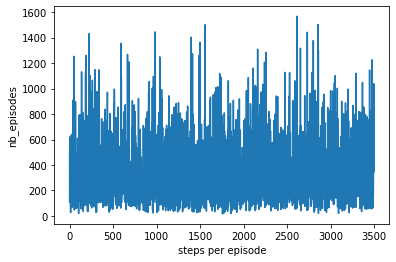

In [13]:
plt.plot(random_steps)
plt.xlabel('steps per episode')
plt.ylabel('nb_episodes')

In [15]:
min(random_steps)

16

In [16]:
np.mean(random_steps)

331.9077142857143